## Some pictures of posters


In [49]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


DATA_DIR = "data"


def get_poster(movie_id: str, show: bool = True) -> None:
    poster_path = os.path.join(DATA_DIR, os.path.join("posters", f"{movie_id}.jpg"))
    img = mpimg.imread(poster_path)
    return img


def plot_poster(movie_id: str) -> None:
    imgplot = plt.imshow(get_poster(movie_id))
    plt.show()

data/posters/1000015.jpg


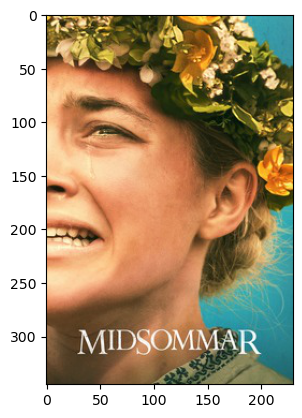

In [2]:
%matplotlib inline
plot_poster('1000015')

## Basic Data Descriptions


### movies.csv


In [3]:
import pandas as pd

movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
movies

id                                     name    date  \
0       1000001                                   Barbie  2023.0   
1       1000002                                 Parasite  2019.0   
2       1000003        Everything Everywhere All at Once  2022.0   
3       1000004                               Fight Club  1999.0   
4       1000005                             Interstellar  2014.0   
...         ...                                      ...     ...   
896395  1896389                               伝七捕物帖 銀蛇呪文     NaN   
896396  1896390                          太阳的子民 Sa'icelen     NaN   
896397  1896391  柴咲コウ CONCERT TOUR 2023 ACTOR'S THE BEST     NaN   
896398  1896392                              相知相守民歌45演唱会     NaN   
896399  1896393             絶対BLになる世界VS絶対BLになりたくない男 2024     NaN   

                                                  tagline  \
0                        She's everything. He's just Ken.   
1                             Act like you own the place.   
2        The universe is so much bigger than you realize.   
3                                 Mischief. Mayhem. Soap.   
4       Mankind was born on Earth. It was never meant ...   
...                                                   ...   
896395                                                NaN   
896396                                                NaN   
896397                                                NaN   
896398                                                NaN   
896399                                                NaN   

                                              description  minute  rating  
0       Barbie and Ken are having the time of their li...   114.0    3.91  
1       All unemployed, Ki-taek's family takes peculia...   133.0    4.57  
2       An aging Chinese immigrant is swept up in an i...   140.0    4.32  
3       A ticking-time-bomb insomniac and a slippery s...   139.0    4.27  
4       The adventures of a group of explorers who mak...   169.0    4.32  
...                                                   ...     ...     ...  
896395  Kofu duty guard Yamauchi Hinata-kami cultivate...    98.0     NaN  
896396  The government's discriminatory policies, wars...    38.0     NaN  
896397  KO SHIBASAKI CONCERT TOUR 2023 - ACTOR'S THE BEST     NaN     NaN  
896398                                                NaN   262.0     NaN  
896399  One day, the protagonist realizes that he live...     NaN     NaN  

[896400 rows x 7 columns]

### genres.csv


In [4]:
genres = pd.read_csv(os.path.join(DATA_DIR, "genres.csv"))
genres

id      genre
0       1000001     Comedy
1       1000001    Fantasy
2       1000001  Adventure
3       1000002     Comedy
4       1000002   Thriller
...         ...        ...
990765  1896380      Crime
990766  1896380      Drama
990767  1896382      Drama
990768  1896391      Music
990769  1896393   TV Movie

[990770 rows x 2 columns]

<Axes: xlabel='genre'>

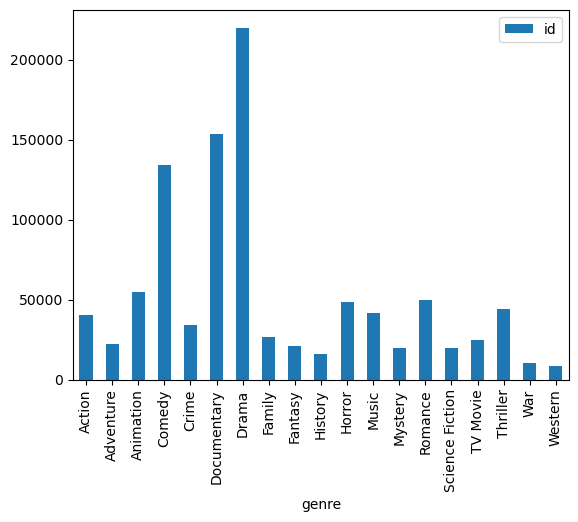

In [10]:
# seems like we need a bit of balancing here
genres.groupby("genre").count().plot(kind="bar")

One movie can have multiple genres.

Let's see the genre counts by movie:


Least number of genres for a movie: 1
Most number of genres for a movie: 16


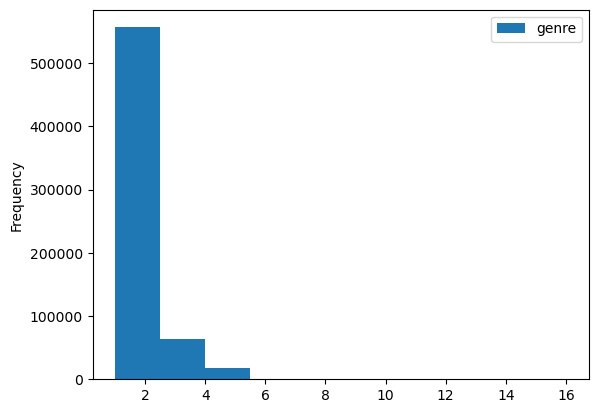

In [13]:
genre_counts = genres.groupby("id").count().sort_values("genre", ascending=False)
genre_counts.plot(kind="hist")
print(f"Least number of genres for a movie: {genre_counts['genre'].min()}")
print(f"Most number of genres for a movie: {genre_counts['genre'].max()}")

Let's find out the movie ids and number of movies


In [18]:
number_of_movies = genres.id.unique().shape[0]
number_of_movies

638632

In [29]:
pd.set_option("display.float_format", lambda x: "%10.f" % x)

genres.describe()

id
count     990770
mean     1355200
std       252010
min      1000001
25%      1131709
50%      1316492
75%      1557642
max      1896393

Convert an int to a movie id:


In [43]:
# read the genres.csv file again for the function closure
genres_df = pd.read_csv(os.path.join(DATA_DIR, "genres.csv"))
all_ids = genres_df.id.unique()
all_ids.sort()


def get_movie_id(id: int) -> str:
    return str(all_ids[id])

In [46]:
get_movie_id(200000)

'1216053'

## Some Picture Stats


In [60]:
from PIL import UnidentifiedImageError
from tqdm import tqdm

all_sizes = set()
not_found_movie = []
unidentified_movie = []
unknown_movie = {}
for movie in tqdm([get_movie_id(i) for i in range(number_of_movies)]):
    try:
        all_sizes.add(get_poster(movie).shape)
    except FileNotFoundError:
        not_found_movie.append(movie)
        print("File not found for movie id:", movie)
    except UnidentifiedImageError:
        unidentified_movie.append(movie)
        print("UnidentifiedImageError for movie id:", movie)
    except Exception as e:
        print("Unknown error for movie id:", movie)
        unknown_movie[movie] = e
all_sizes

  3%|▎         | 16036/638632 [00:20<13:10, 787.16it/s]

File not found for movie id: 1015930


  3%|▎         | 17162/638632 [00:22<12:56, 799.86it/s]

File not found for movie id: 1017081


  3%|▎         | 19090/638632 [00:24<11:37, 888.80it/s]

File not found for movie id: 1018998


  4%|▎         | 22837/638632 [00:29<12:42, 807.85it/s]

File not found for movie id: 1022787


  4%|▍         | 26430/638632 [00:33<11:40, 874.38it/s]

File not found for movie id: 1026346


  4%|▍         | 28477/638632 [00:35<11:04, 918.29it/s]

File not found for movie id: 1028411
File not found for movie id: 1028490


  5%|▍         | 30900/638632 [00:38<10:52, 931.88it/s]

File not found for movie id: 1030869


  5%|▍         | 31366/638632 [00:38<11:09, 907.68it/s]

File not found for movie id: 1031304


  5%|▌         | 34082/638632 [00:41<11:10, 901.05it/s]

File not found for movie id: 1034071


  5%|▌         | 34263/638632 [00:42<11:14, 895.63it/s]

File not found for movie id: 1034266


  6%|▌         | 35899/638632 [00:43<11:06, 903.84it/s]

File not found for movie id: 1035928


  6%|▌         | 36997/638632 [00:45<10:51, 923.61it/s]

File not found for movie id: 1036997


  7%|▋         | 41548/638632 [00:49<10:45, 924.79it/s]

File not found for movie id: 1041645


  7%|▋         | 42116/638632 [00:50<10:30, 946.14it/s]

File not found for movie id: 1042191


  7%|▋         | 43613/638632 [00:52<11:10, 887.49it/s]

File not found for movie id: 1043787


  7%|▋         | 45631/638632 [00:54<11:07, 888.84it/s]

File not found for movie id: 1045822


  7%|▋         | 45993/638632 [00:54<10:58, 900.54it/s]

File not found for movie id: 1046206


  7%|▋         | 46536/638632 [00:55<11:02, 893.64it/s]

File not found for movie id: 1046738
File not found for movie id: 1046807


  7%|▋         | 47174/638632 [00:56<10:59, 897.21it/s]

File not found for movie id: 1047421


  8%|▊         | 48481/638632 [00:57<10:21, 950.29it/s]

File not found for movie id: 1048755


  8%|▊         | 49722/638632 [00:58<10:43, 914.49it/s]

File not found for movie id: 1050016


  8%|▊         | 50403/638632 [00:59<10:01, 977.39it/s]

File not found for movie id: 1050730


  8%|▊         | 51401/638632 [01:00<09:57, 982.05it/s]

File not found for movie id: 1051748
File not found for movie id: 1051940


  8%|▊         | 52287/638632 [01:01<10:09, 962.08it/s]

File not found for movie id: 1052586


  8%|▊         | 52859/638632 [01:02<10:28, 932.66it/s]

File not found for movie id: 1053218


  9%|▊         | 54763/638632 [01:04<10:25, 932.85it/s]

File not found for movie id: 1055163


  9%|▊         | 55323/638632 [01:04<10:33, 921.13it/s]

File not found for movie id: 1055715


  9%|▊         | 55510/638632 [01:05<10:28, 927.21it/s]

File not found for movie id: 1055957


  9%|▉         | 55976/638632 [01:05<10:40, 909.67it/s]

File not found for movie id: 1056443


  9%|▉         | 56920/638632 [01:06<10:24, 931.22it/s]

File not found for movie id: 1057438


  9%|▉         | 57675/638632 [01:07<10:22, 932.79it/s]

File not found for movie id: 1058190
File not found for movie id: 1058335


  9%|▉         | 58334/638632 [01:08<10:24, 929.38it/s]

File not found for movie id: 1058850


  9%|▉         | 59365/638632 [01:09<10:43, 900.28it/s]

UnidentifiedImageError for movie id: 1059895
File not found for movie id: 1060066
File not found for movie id: 1060067


  9%|▉         | 59743/638632 [01:09<10:19, 934.91it/s]

File not found for movie id: 1060263


 10%|▉         | 61317/638632 [01:11<10:06, 952.16it/s]

File not found for movie id: 1061967


 10%|▉         | 61790/638632 [01:11<10:21, 927.46it/s]

File not found for movie id: 1062395


 10%|▉         | 63081/638632 [01:13<09:50, 974.86it/s]

File not found for movie id: 1063787


 10%|▉         | 63375/638632 [01:13<09:51, 972.76it/s]

File not found for movie id: 1064061
File not found for movie id: 1064201


 10%|█         | 63975/638632 [01:14<09:36, 996.92it/s]

File not found for movie id: 1064684
File not found for movie id: 1064714


 10%|█         | 64679/638632 [01:14<09:37, 994.49it/s]

File not found for movie id: 1065423


 10%|█         | 64979/638632 [01:15<09:49, 973.00it/s]

File not found for movie id: 1065746


 10%|█         | 65472/638632 [01:15<09:48, 973.26it/s]

File not found for movie id: 1066261
File not found for movie id: 1066313


 10%|█         | 65765/638632 [01:15<09:54, 964.07it/s]

File not found for movie id: 1066505
File not found for movie id: 1066539


 10%|█         | 66054/638632 [01:16<10:08, 940.74it/s]

File not found for movie id: 1066819
File not found for movie id: 1066854


 10%|█         | 66339/638632 [01:16<10:11, 935.36it/s]

File not found for movie id: 1067188
File not found for movie id: 1067198


 10%|█         | 66724/638632 [01:16<10:03, 947.23it/s]

File not found for movie id: 1067586
File not found for movie id: 1067689


 11%|█         | 67298/638632 [01:17<09:59, 952.43it/s]

File not found for movie id: 1068182
File not found for movie id: 1068193


 11%|█         | 67586/638632 [01:17<10:03, 945.55it/s]

File not found for movie id: 1068451
File not found for movie id: 1068495


 11%|█         | 67877/638632 [01:18<09:54, 959.29it/s]

File not found for movie id: 1068694
File not found for movie id: 1068894


 11%|█         | 68165/638632 [01:18<09:59, 952.04it/s]

File not found for movie id: 1068991


 11%|█         | 68546/638632 [01:18<10:04, 943.17it/s]

File not found for movie id: 1069481


 11%|█         | 69907/638632 [01:20<09:58, 949.91it/s]

File not found for movie id: 1070843
File not found for movie id: 1071033


 11%|█         | 70104/638632 [01:20<09:52, 960.12it/s]

File not found for movie id: 1071061
File not found for movie id: 1071079


 11%|█         | 70783/638632 [01:21<09:50, 962.04it/s]

File not found for movie id: 1071768


 11%|█         | 71498/638632 [01:21<09:24, 1004.20it/s]

File not found for movie id: 1072479
File not found for movie id: 1072541


 11%|█▏        | 71901/638632 [01:22<09:28, 996.18it/s] 

File not found for movie id: 1072898
File not found for movie id: 1072905


 11%|█▏        | 72100/638632 [01:22<09:54, 952.63it/s]

File not found for movie id: 1073119
File not found for movie id: 1073176


 11%|█▏        | 72291/638632 [01:22<10:10, 928.20it/s]

File not found for movie id: 1073358


 11%|█▏        | 72570/638632 [01:23<10:23, 907.41it/s]

File not found for movie id: 1073673


 11%|█▏        | 73324/638632 [01:23<10:08, 928.57it/s]

File not found for movie id: 1074441


 12%|█▏        | 73886/638632 [01:24<10:19, 911.76it/s]

File not found for movie id: 1075009
File not found for movie id: 1075010


 12%|█▏        | 74351/638632 [01:24<10:28, 898.13it/s]

File not found for movie id: 1075495


 12%|█▏        | 75383/638632 [01:26<09:57, 942.23it/s]

File not found for movie id: 1076548
File not found for movie id: 1076660
File not found for movie id: 1076712


 12%|█▏        | 75724/638632 [01:26<12:42, 738.07it/s]

File not found for movie id: 1076922


 12%|█▏        | 75985/638632 [01:26<11:27, 818.62it/s]

File not found for movie id: 1077260


 12%|█▏        | 76613/638632 [01:27<10:57, 854.64it/s]

File not found for movie id: 1077885


 12%|█▏        | 76792/638632 [01:27<10:46, 869.35it/s]

File not found for movie id: 1078097
File not found for movie id: 1078154


 12%|█▏        | 77061/638632 [01:28<10:40, 876.64it/s]

File not found for movie id: 1078366
File not found for movie id: 1078379


 12%|█▏        | 77743/638632 [01:29<12:07, 771.05it/s]

File not found for movie id: 1079064
File not found for movie id: 1079220


 12%|█▏        | 78084/638632 [01:29<11:13, 832.40it/s]

File not found for movie id: 1079410


 12%|█▏        | 78803/638632 [01:30<10:29, 888.89it/s]

File not found for movie id: 1080141


 12%|█▏        | 79354/638632 [01:30<10:19, 902.79it/s]

File not found for movie id: 1080771


 13%|█▎        | 80440/638632 [01:32<11:08, 835.07it/s]

File not found for movie id: 1081912


 13%|█▎        | 81376/638632 [01:33<10:18, 900.87it/s]

File not found for movie id: 1082913


 13%|█▎        | 81746/638632 [01:33<10:12, 908.83it/s]

File not found for movie id: 1083304
File not found for movie id: 1083318


 13%|█▎        | 82205/638632 [01:34<10:48, 858.64it/s]

File not found for movie id: 1083800
File not found for movie id: 1083973


 13%|█▎        | 82480/638632 [01:34<10:32, 879.38it/s]

File not found for movie id: 1084086
File not found for movie id: 1084191


 13%|█▎        | 83122/638632 [01:35<11:16, 820.87it/s]

File not found for movie id: 1084741
File not found for movie id: 1084868


 13%|█▎        | 83396/638632 [01:35<10:33, 876.07it/s]

File not found for movie id: 1085038


 13%|█▎        | 83580/638632 [01:35<10:22, 892.34it/s]

File not found for movie id: 1085235
File not found for movie id: 1085250


 13%|█▎        | 84406/638632 [01:36<10:11, 905.79it/s]

File not found for movie id: 1086115
File not found for movie id: 1086138


 13%|█▎        | 85024/638632 [01:37<10:55, 844.53it/s]

File not found for movie id: 1086745


 13%|█▎        | 85835/638632 [01:38<10:11, 903.53it/s]

File not found for movie id: 1087598


 14%|█▎        | 86283/638632 [01:38<10:38, 864.47it/s]

File not found for movie id: 1088045


 14%|█▎        | 86555/638632 [01:39<10:19, 891.42it/s]

File not found for movie id: 1088348
File not found for movie id: 1088498
File not found for movie id: 1088531


 14%|█▎        | 86730/638632 [01:39<11:20, 810.90it/s]

File not found for movie id: 1088546


 14%|█▎        | 86890/638632 [01:39<12:37, 728.07it/s]

File not found for movie id: 1088712


 14%|█▎        | 87455/638632 [01:40<11:26, 803.42it/s]

File not found for movie id: 1089306
File not found for movie id: 1089393


 14%|█▍        | 88366/638632 [01:41<10:15, 894.30it/s]

File not found for movie id: 1090285


 14%|█▍        | 88551/638632 [01:41<10:07, 905.45it/s]

File not found for movie id: 1090478
File not found for movie id: 1090497
File not found for movie id: 1090652


 14%|█▍        | 89480/638632 [01:42<09:57, 919.04it/s]

File not found for movie id: 1091435


 14%|█▍        | 89940/638632 [01:42<10:06, 904.44it/s]

File not found for movie id: 1091912


 14%|█▍        | 90219/638632 [01:43<09:57, 917.85it/s]

File not found for movie id: 1092254


 14%|█▍        | 90589/638632 [01:43<09:59, 914.69it/s]

File not found for movie id: 1092629


 14%|█▍        | 90867/638632 [01:43<10:01, 911.11it/s]

File not found for movie id: 1092872


 14%|█▍        | 91051/638632 [01:44<10:14, 891.07it/s]

File not found for movie id: 1093087
File not found for movie id: 1093248


 14%|█▍        | 91335/638632 [01:44<09:51, 925.82it/s]

File not found for movie id: 1093359
File not found for movie id: 1093513


 14%|█▍        | 91520/638632 [01:44<10:00, 911.05it/s]

File not found for movie id: 1093571


 14%|█▍        | 91702/638632 [01:44<10:25, 874.14it/s]

File not found for movie id: 1093851
File not found for movie id: 1093873
File not found for movie id: 1093996


 14%|█▍        | 91885/638632 [01:45<10:13, 891.39it/s]

File not found for movie id: 1094045
File not found for movie id: 1094210


 14%|█▍        | 92242/638632 [01:45<10:22, 877.47it/s]

File not found for movie id: 1094341
File not found for movie id: 1094342


 15%|█▍        | 92797/638632 [01:46<09:58, 912.59it/s]

File not found for movie id: 1094920
File not found for movie id: 1094995
File not found for movie id: 1095073


 15%|█▍        | 93075/638632 [01:46<10:08, 896.31it/s]

File not found for movie id: 1095254
File not found for movie id: 1095413


 15%|█▍        | 93444/638632 [01:46<10:03, 903.16it/s]

File not found for movie id: 1095695


 15%|█▍        | 94355/638632 [01:47<10:02, 903.26it/s]

File not found for movie id: 1096591
File not found for movie id: 1096623
File not found for movie id: 1096739


 15%|█▍        | 94727/638632 [01:48<10:04, 900.22it/s]

File not found for movie id: 1097083
File not found for movie id: 1097210


 15%|█▍        | 95373/638632 [01:49<10:10, 890.35it/s]

File not found for movie id: 1097725


 15%|█▍        | 95645/638632 [01:49<10:09, 891.47it/s]

File not found for movie id: 1098003


 15%|█▌        | 96282/638632 [01:50<10:01, 901.06it/s]

File not found for movie id: 1098735


 15%|█▌        | 96753/638632 [01:50<09:56, 907.73it/s]

File not found for movie id: 1099242
File not found for movie id: 1099268


 15%|█▌        | 97038/638632 [01:50<09:37, 937.54it/s]

File not found for movie id: 1099476
File not found for movie id: 1099656


 15%|█▌        | 97523/638632 [01:51<09:20, 964.69it/s]

File not found for movie id: 1100070


 15%|█▌        | 97913/638632 [01:51<09:22, 960.94it/s]

File not found for movie id: 1100438
File not found for movie id: 1100548
File not found for movie id: 1100560


 15%|█▌        | 98592/638632 [01:52<09:16, 969.86it/s]

File not found for movie id: 1101126
File not found for movie id: 1101278


 15%|█▌        | 98980/638632 [01:52<09:41, 928.02it/s]

File not found for movie id: 1101600
File not found for movie id: 1101628
File not found for movie id: 1101657
File not found for movie id: 1101759


 16%|█▌        | 99257/638632 [01:53<10:20, 869.50it/s]

File not found for movie id: 1101893


 16%|█▌        | 99443/638632 [01:53<10:01, 895.82it/s]

File not found for movie id: 1102100


 16%|█▌        | 99819/638632 [01:53<09:42, 924.76it/s]

File not found for movie id: 1102491
File not found for movie id: 1102635


 16%|█▌        | 100012/638632 [01:54<09:31, 943.26it/s]

File not found for movie id: 1102727
File not found for movie id: 1102887


 16%|█▌        | 100207/638632 [01:54<09:35, 935.20it/s]

File not found for movie id: 1102943
File not found for movie id: 1103104


 16%|█▌        | 100594/638632 [01:54<09:54, 905.17it/s]

File not found for movie id: 1103346
File not found for movie id: 1103427


 16%|█▌        | 101063/638632 [01:55<09:36, 931.80it/s]

File not found for movie id: 1103807
File not found for movie id: 1103873


 16%|█▌        | 101343/638632 [01:55<09:45, 917.72it/s]

File not found for movie id: 1104100
File not found for movie id: 1104197


 16%|█▌        | 101628/638632 [01:55<09:47, 913.82it/s]

File not found for movie id: 1104405


 16%|█▌        | 101907/638632 [01:56<09:54, 902.34it/s]

File not found for movie id: 1104711


 16%|█▌        | 102087/638632 [01:56<10:20, 865.21it/s]

File not found for movie id: 1104985
File not found for movie id: 1105156


 16%|█▌        | 102709/638632 [01:57<10:09, 879.07it/s]

File not found for movie id: 1105588
File not found for movie id: 1105725


 16%|█▌        | 103245/638632 [01:57<10:03, 887.86it/s]

File not found for movie id: 1106236
File not found for movie id: 1106287


 16%|█▋        | 103878/638632 [01:58<10:03, 885.62it/s]

File not found for movie id: 1106891
File not found for movie id: 1107021


 16%|█▋        | 104155/638632 [01:58<09:48, 908.71it/s]

File not found for movie id: 1107163


 16%|█▋        | 104431/638632 [01:58<09:53, 899.59it/s]

File not found for movie id: 1107466


 16%|█▋        | 104706/638632 [01:59<10:57, 811.75it/s]

File not found for movie id: 1107772


 16%|█▋        | 105250/638632 [01:59<09:53, 898.07it/s]

File not found for movie id: 1108324


 17%|█▋        | 105513/638632 [02:00<10:30, 846.14it/s]

File not found for movie id: 1108683
File not found for movie id: 1108791


 17%|█▋        | 105797/638632 [02:00<09:59, 888.61it/s]

File not found for movie id: 1108949
File not found for movie id: 1109126


 17%|█▋        | 106176/638632 [02:01<09:32, 930.10it/s]

File not found for movie id: 1109414
File not found for movie id: 1109539


 17%|█▋        | 106554/638632 [02:01<09:35, 923.82it/s]

File not found for movie id: 1109773


 17%|█▋        | 106740/638632 [02:01<10:02, 882.10it/s]

File not found for movie id: 1110030
File not found for movie id: 1110060


 17%|█▋        | 107004/638632 [02:01<10:20, 856.43it/s]

File not found for movie id: 1110297


 17%|█▋        | 107370/638632 [02:02<09:59, 886.34it/s]

File not found for movie id: 1110669


 17%|█▋        | 108097/638632 [02:03<09:40, 913.83it/s]

File not found for movie id: 1111389
File not found for movie id: 1111592


 17%|█▋        | 108279/638632 [02:03<09:58, 886.44it/s]

File not found for movie id: 1111681


 17%|█▋        | 108554/638632 [02:03<10:02, 879.35it/s]

File not found for movie id: 1111891
File not found for movie id: 1112054


 17%|█▋        | 108736/638632 [02:03<10:05, 874.88it/s]

File not found for movie id: 1112153
File not found for movie id: 1112305


 17%|█▋        | 109007/638632 [02:04<09:55, 888.96it/s]

File not found for movie id: 1112425


 17%|█▋        | 109282/638632 [02:04<09:57, 885.62it/s]

File not found for movie id: 1112696
File not found for movie id: 1112731


 17%|█▋        | 109551/638632 [02:04<09:59, 882.49it/s]

File not found for movie id: 1113029
File not found for movie id: 1113192
File not found for movie id: 1113193


 17%|█▋        | 109738/638632 [02:05<09:43, 906.67it/s]

File not found for movie id: 1113242
File not found for movie id: 1113329
File not found for movie id: 1113370


 17%|█▋        | 110674/638632 [02:06<09:56, 885.42it/s]

File not found for movie id: 1114285
File not found for movie id: 1114286


 17%|█▋        | 111032/638632 [02:06<10:15, 857.67it/s]

File not found for movie id: 1114652


 17%|█▋        | 111403/638632 [02:06<09:47, 897.22it/s]

File not found for movie id: 1114969


 18%|█▊        | 111864/638632 [02:07<09:50, 892.16it/s]

File not found for movie id: 1115539


 18%|█▊        | 112231/638632 [02:07<09:40, 907.45it/s]

File not found for movie id: 1115923
File not found for movie id: 1116030
File not found for movie id: 1116060
File not found for movie id: 1116122


 18%|█▊        | 112802/638632 [02:08<09:16, 945.57it/s]

File not found for movie id: 1116508


 18%|█▊        | 113659/638632 [02:09<09:15, 944.21it/s]

File not found for movie id: 1117410
File not found for movie id: 1117475


 18%|█▊        | 114032/638632 [02:09<09:52, 886.13it/s]

File not found for movie id: 1117879
File not found for movie id: 1118011


 18%|█▊        | 114297/638632 [02:10<10:13, 854.59it/s]

File not found for movie id: 1118179


 18%|█▊        | 114558/638632 [02:10<10:08, 860.80it/s]

File not found for movie id: 1118444


 18%|█▊        | 114835/638632 [02:10<09:41, 901.38it/s]

File not found for movie id: 1118687
File not found for movie id: 1118720
File not found for movie id: 1118804


 18%|█▊        | 115020/638632 [02:10<09:38, 904.97it/s]

File not found for movie id: 1118953
File not found for movie id: 1118989
File not found for movie id: 1118990
File not found for movie id: 1119091
File not found for movie id: 1119130


 18%|█▊        | 115302/638632 [02:11<09:30, 917.94it/s]

File not found for movie id: 1119241


 18%|█▊        | 115761/638632 [02:11<09:49, 886.67it/s]

File not found for movie id: 1119804


 18%|█▊        | 116218/638632 [02:12<09:33, 910.15it/s]

File not found for movie id: 1120259
File not found for movie id: 1120414


 18%|█▊        | 116873/638632 [02:12<09:25, 922.38it/s]

File not found for movie id: 1120948


 18%|█▊        | 117242/638632 [02:13<09:39, 899.87it/s]

File not found for movie id: 1121385
File not found for movie id: 1121462


 18%|█▊        | 117617/638632 [02:13<09:35, 905.91it/s]

File not found for movie id: 1121746


 19%|█▊        | 118172/638632 [02:14<09:32, 909.38it/s]

File not found for movie id: 1122348
File not found for movie id: 1122349


 19%|█▊        | 118457/638632 [02:14<09:30, 912.58it/s]

File not found for movie id: 1122695


 19%|█▊        | 118640/638632 [02:14<09:38, 898.38it/s]

File not found for movie id: 1122917


 19%|█▊        | 119193/638632 [02:15<09:29, 912.47it/s]

File not found for movie id: 1123501


 19%|█▊        | 119384/638632 [02:15<09:16, 933.85it/s]

File not found for movie id: 1123708
File not found for movie id: 1123767


 19%|█▉        | 119765/638632 [02:16<09:10, 942.50it/s]

File not found for movie id: 1124071


 19%|█▉        | 119958/638632 [02:16<09:12, 939.22it/s]

File not found for movie id: 1124308
File not found for movie id: 1124476


 19%|█▉        | 120148/638632 [02:16<09:15, 932.89it/s]

File not found for movie id: 1124552


 19%|█▉        | 120632/638632 [02:17<09:09, 942.20it/s]

File not found for movie id: 1125017
File not found for movie id: 1125018
File not found for movie id: 1125146
File not found for movie id: 1125186
File not found for movie id: 1125189
File not found for movie id: 1125190
File not found for movie id: 1125233


 19%|█▉        | 121019/638632 [02:17<09:23, 918.02it/s]

File not found for movie id: 1125504


 19%|█▉        | 121677/638632 [02:18<09:24, 915.71it/s]

File not found for movie id: 1126193


 19%|█▉        | 121964/638632 [02:18<09:19, 923.99it/s]

File not found for movie id: 1126504


 19%|█▉        | 122433/638632 [02:19<09:16, 927.24it/s]

File not found for movie id: 1126965


 19%|█▉        | 122708/638632 [02:19<09:35, 895.97it/s]

File not found for movie id: 1127323
File not found for movie id: 1127344
File not found for movie id: 1127435


 19%|█▉        | 123192/638632 [02:19<09:01, 951.81it/s]

File not found for movie id: 1127878
File not found for movie id: 1127997
File not found for movie id: 1128030


 19%|█▉        | 123476/638632 [02:20<09:12, 932.00it/s]

File not found for movie id: 1128142


 19%|█▉        | 123752/638632 [02:20<09:41, 885.83it/s]

File not found for movie id: 1128458
File not found for movie id: 1128610


 19%|█▉        | 124026/638632 [02:20<09:30, 902.48it/s]

File not found for movie id: 1128746
File not found for movie id: 1128765


 19%|█▉        | 124402/638632 [02:21<09:15, 926.08it/s]

File not found for movie id: 1129159


 20%|█▉        | 124783/638632 [02:21<09:08, 936.42it/s]

File not found for movie id: 1129616
File not found for movie id: 1129799


 20%|█▉        | 124974/638632 [02:21<09:12, 930.06it/s]

File not found for movie id: 1129842


 20%|█▉        | 125544/638632 [02:22<09:11, 930.87it/s]

File not found for movie id: 1130450
File not found for movie id: 1130451


 20%|█▉        | 125826/638632 [02:22<09:15, 923.91it/s]

File not found for movie id: 1130748
File not found for movie id: 1130770


 20%|█▉        | 126019/638632 [02:22<09:04, 942.15it/s]

File not found for movie id: 1130962
File not found for movie id: 1130963
File not found for movie id: 1131059
File not found for movie id: 1131142


 20%|█▉        | 126302/638632 [02:23<09:10, 930.27it/s]

File not found for movie id: 1131308


 20%|█▉        | 126494/638632 [02:23<09:02, 944.65it/s]

File not found for movie id: 1131535
File not found for movie id: 1131714


 20%|█▉        | 127057/638632 [02:24<09:16, 918.53it/s]

File not found for movie id: 1132143


 20%|█▉        | 127346/638632 [02:24<09:18, 916.19it/s]

File not found for movie id: 1132461


 20%|█▉        | 127625/638632 [02:24<09:14, 920.74it/s]

File not found for movie id: 1132700
File not found for movie id: 1132875


 20%|██        | 127816/638632 [02:24<09:17, 916.91it/s]

File not found for movie id: 1132921
File not found for movie id: 1132922
File not found for movie id: 1133076


 20%|██        | 128382/638632 [02:25<09:09, 928.28it/s]

File not found for movie id: 1133541
File not found for movie id: 1133585


 20%|██        | 128665/638632 [02:25<09:07, 931.16it/s]

File not found for movie id: 1133928


 20%|██        | 128950/638632 [02:26<09:04, 936.56it/s]

File not found for movie id: 1134209
File not found for movie id: 1134336
File not found for movie id: 1134348


 20%|██        | 129141/638632 [02:26<09:01, 941.36it/s]

File not found for movie id: 1134472
File not found for movie id: 1134483
File not found for movie id: 1134570
File not found for movie id: 1134583


 20%|██        | 129538/638632 [02:26<08:46, 967.75it/s]

File not found for movie id: 1134850
File not found for movie id: 1135036


 20%|██        | 129821/638632 [02:27<09:31, 890.21it/s]

File not found for movie id: 1135186
File not found for movie id: 1135349


 20%|██        | 130113/638632 [02:27<08:59, 943.33it/s]

File not found for movie id: 1135522
File not found for movie id: 1135558
File not found for movie id: 1135653
File not found for movie id: 1135705


 20%|██        | 130493/638632 [02:27<09:41, 873.58it/s]

File not found for movie id: 1136007
File not found for movie id: 1136087
File not found for movie id: 1136106


 20%|██        | 130759/638632 [02:28<09:40, 874.87it/s]

File not found for movie id: 1136236
File not found for movie id: 1136330
File not found for movie id: 1136331
File not found for movie id: 1136348


 21%|██        | 131320/638632 [02:28<09:07, 926.11it/s]

File not found for movie id: 1136865
File not found for movie id: 1136906


 21%|██        | 131603/638632 [02:28<09:02, 933.90it/s]

File not found for movie id: 1137154


 21%|██        | 131796/638632 [02:29<08:58, 941.97it/s]

File not found for movie id: 1137394
File not found for movie id: 1137523
File not found for movie id: 1137569


 21%|██        | 131993/638632 [02:29<08:55, 945.46it/s]

File not found for movie id: 1137626
File not found for movie id: 1137682
File not found for movie id: 1137786


 21%|██        | 132281/638632 [02:29<08:52, 951.24it/s]

File not found for movie id: 1137938
File not found for movie id: 1138028


 21%|██        | 132474/638632 [02:29<08:52, 950.78it/s]

File not found for movie id: 1138162
File not found for movie id: 1138327


 21%|██        | 132859/638632 [02:30<08:52, 950.24it/s]

File not found for movie id: 1138531


 21%|██        | 133425/638632 [02:30<09:09, 919.01it/s]

File not found for movie id: 1139238


 21%|██        | 133712/638632 [02:31<08:57, 940.00it/s]

File not found for movie id: 1139471
File not found for movie id: 1139628


 21%|██        | 133994/638632 [02:31<09:05, 924.48it/s]

File not found for movie id: 1139785


 21%|██        | 134371/638632 [02:31<08:59, 934.65it/s]

File not found for movie id: 1140257


 21%|██        | 134854/638632 [02:32<08:46, 957.27it/s]

File not found for movie id: 1140817
File not found for movie id: 1140859
File not found for movie id: 1140996


 21%|██        | 135150/638632 [02:32<08:36, 975.71it/s]

File not found for movie id: 1141061


 21%|██        | 135350/638632 [02:32<08:36, 974.16it/s]

File not found for movie id: 1141386
File not found for movie id: 1141497


 21%|██        | 135545/638632 [02:33<08:48, 951.13it/s]

File not found for movie id: 1141605
File not found for movie id: 1141711


 21%|██▏       | 135921/638632 [02:33<09:30, 881.17it/s]

File not found for movie id: 1142029


 21%|██▏       | 136485/638632 [02:34<08:56, 936.62it/s]

File not found for movie id: 1142572
File not found for movie id: 1142672


 21%|██▏       | 136780/638632 [02:34<08:39, 965.79it/s]

File not found for movie id: 1142968
File not found for movie id: 1142969
File not found for movie id: 1142992
File not found for movie id: 1143073


 21%|██▏       | 137081/638632 [02:34<08:27, 987.35it/s]

File not found for movie id: 1143265
File not found for movie id: 1143266
File not found for movie id: 1143273
File not found for movie id: 1143319


 21%|██▏       | 137286/638632 [02:34<08:19, 1003.83it/s]

File not found for movie id: 1143522
File not found for movie id: 1143523
File not found for movie id: 1143585
File not found for movie id: 1143631


 22%|██▏       | 137698/638632 [02:35<08:20, 1000.96it/s]

File not found for movie id: 1143901


 22%|██▏       | 138416/638632 [02:36<08:11, 1017.62it/s]

File not found for movie id: 1144712
File not found for movie id: 1144774


 22%|██▏       | 138717/638632 [02:36<09:16, 899.08it/s] 

File not found for movie id: 1145133
File not found for movie id: 1145134


 22%|██▏       | 138896/638632 [02:36<10:19, 806.20it/s]

File not found for movie id: 1145302


 22%|██▏       | 139060/638632 [02:36<10:33, 788.02it/s]

File not found for movie id: 1145473
File not found for movie id: 1145522
File not found for movie id: 1145639
File not found for movie id: 1145640


 22%|██▏       | 139218/638632 [02:37<11:02, 753.95it/s]

File not found for movie id: 1145713
File not found for movie id: 1145752
File not found for movie id: 1145874


 22%|██▏       | 139689/638632 [02:37<10:45, 773.28it/s]

File not found for movie id: 1146162
File not found for movie id: 1146203


 22%|██▏       | 140084/638632 [02:38<10:43, 775.25it/s]

File not found for movie id: 1146584
File not found for movie id: 1146585


 22%|██▏       | 140317/638632 [02:38<10:50, 766.47it/s]

File not found for movie id: 1146873
File not found for movie id: 1146874


 22%|██▏       | 140643/638632 [02:38<10:22, 799.71it/s]

File not found for movie id: 1147193


 22%|██▏       | 141129/638632 [02:39<10:37, 780.17it/s]

File not found for movie id: 1147796
File not found for movie id: 1147797
File not found for movie id: 1147842


 22%|██▏       | 141300/638632 [02:39<10:08, 816.71it/s]

File not found for movie id: 1147980
File not found for movie id: 1148088
File not found for movie id: 1148178


 22%|██▏       | 141571/638632 [02:40<09:29, 872.92it/s]

File not found for movie id: 1148282


 22%|██▏       | 141920/638632 [02:40<09:45, 847.94it/s]

File not found for movie id: 1148702
File not found for movie id: 1148813


 22%|██▏       | 142271/638632 [02:40<09:29, 871.18it/s]

File not found for movie id: 1149022
File not found for movie id: 1149107
File not found for movie id: 1149195
File not found for movie id: 1149196


 22%|██▏       | 142636/638632 [02:41<09:21, 883.62it/s]

File not found for movie id: 1149428


 22%|██▏       | 142901/638632 [02:41<09:49, 840.41it/s]

File not found for movie id: 1149763
File not found for movie id: 1149792


 22%|██▏       | 143076/638632 [02:41<09:40, 853.83it/s]

File not found for movie id: 1149967


 22%|██▏       | 143436/638632 [02:42<09:17, 889.01it/s]

File not found for movie id: 1150352


 23%|██▎       | 143711/638632 [02:42<09:05, 907.87it/s]

File not found for movie id: 1150625
File not found for movie id: 1150665


 23%|██▎       | 143893/638632 [02:42<09:15, 890.93it/s]

File not found for movie id: 1150846
File not found for movie id: 1150851
File not found for movie id: 1151003


 23%|██▎       | 144174/638632 [02:43<09:01, 913.48it/s]

File not found for movie id: 1151188


 23%|██▎       | 144457/638632 [02:43<08:54, 924.67it/s]

File not found for movie id: 1151500
File not found for movie id: 1151632
File not found for movie id: 1151633


 23%|██▎       | 145002/638632 [02:43<09:20, 880.55it/s]

File not found for movie id: 1152129
File not found for movie id: 1152276


 23%|██▎       | 145268/638632 [02:44<09:37, 854.11it/s]

File not found for movie id: 1152411


 23%|██▎       | 145800/638632 [02:44<09:17, 884.23it/s]

File not found for movie id: 1152977


 23%|██▎       | 145983/638632 [02:45<09:16, 885.08it/s]

File not found for movie id: 1153212
File not found for movie id: 1153213
File not found for movie id: 1153345
File not found for movie id: 1153398


 23%|██▎       | 146260/638632 [02:45<09:13, 890.17it/s]

File not found for movie id: 1153526


 23%|██▎       | 146618/638632 [02:45<09:15, 886.15it/s]

File not found for movie id: 1153922


 23%|██▎       | 146799/638632 [02:46<09:09, 895.49it/s]

File not found for movie id: 1154151
File not found for movie id: 1154313


 23%|██▎       | 147076/638632 [02:46<09:05, 901.45it/s]

File not found for movie id: 1154441


 23%|██▎       | 147449/638632 [02:46<09:04, 901.96it/s]

File not found for movie id: 1154887


 23%|██▎       | 147636/638632 [02:46<09:12, 888.67it/s]

File not found for movie id: 1155106
File not found for movie id: 1155284


 23%|██▎       | 147916/638632 [02:47<08:56, 913.94it/s]

File not found for movie id: 1155414
File not found for movie id: 1155554


 23%|██▎       | 148207/638632 [02:47<08:49, 926.88it/s]

File not found for movie id: 1155709


 23%|██▎       | 148495/638632 [02:47<08:37, 947.84it/s]

File not found for movie id: 1155981
File not found for movie id: 1156109


 23%|██▎       | 148793/638632 [02:48<08:24, 970.28it/s]

File not found for movie id: 1156314
File not found for movie id: 1156435
File not found for movie id: 1156452
File not found for movie id: 1156509
File not found for movie id: 1156510


 23%|██▎       | 148993/638632 [02:48<08:24, 969.92it/s]

File not found for movie id: 1156580


 23%|██▎       | 149188/638632 [02:48<08:27, 964.31it/s]

File not found for movie id: 1156813


 23%|██▎       | 149674/638632 [02:49<08:31, 956.55it/s]

File not found for movie id: 1157319
File not found for movie id: 1157520


 24%|██▎       | 150164/638632 [02:49<08:26, 963.50it/s]

File not found for movie id: 1157914


 24%|██▎       | 150658/638632 [02:50<08:21, 973.48it/s]

File not found for movie id: 1158516
File not found for movie id: 1158737


 24%|██▎       | 151058/638632 [02:50<08:18, 978.21it/s]

File not found for movie id: 1158892
File not found for movie id: 1159032


 24%|██▎       | 151352/638632 [02:50<08:28, 958.98it/s]

File not found for movie id: 1159267


 24%|██▍       | 151840/638632 [02:51<08:25, 962.14it/s]

File not found for movie id: 1159766
File not found for movie id: 1159913


 24%|██▍       | 152033/638632 [02:51<08:29, 955.53it/s]

File not found for movie id: 1160064


 24%|██▍       | 152230/638632 [02:51<08:44, 927.30it/s]

File not found for movie id: 1160295
File not found for movie id: 1160344


 24%|██▍       | 152519/638632 [02:52<08:34, 944.02it/s]

File not found for movie id: 1160566
File not found for movie id: 1160567
File not found for movie id: 1160599
File not found for movie id: 1160696
File not found for movie id: 1160697
File not found for movie id: 1160719


 24%|██▍       | 152715/638632 [02:52<08:26, 958.97it/s]

File not found for movie id: 1160811
File not found for movie id: 1160846
File not found for movie id: 1160851
File not found for movie id: 1160897
File not found for movie id: 1161024


 24%|██▍       | 153097/638632 [02:52<08:38, 936.17it/s]

File not found for movie id: 1161239
File not found for movie id: 1161316
File not found for movie id: 1161408


 24%|██▍       | 153295/638632 [02:52<08:27, 957.16it/s]

File not found for movie id: 1161461
File not found for movie id: 1161485
File not found for movie id: 1161585
File not found for movie id: 1161623
File not found for movie id: 1161668


 24%|██▍       | 153588/638632 [02:53<08:24, 961.02it/s]

File not found for movie id: 1161760
File not found for movie id: 1161908
File not found for movie id: 1161910


 24%|██▍       | 153781/638632 [02:53<08:50, 914.07it/s]

File not found for movie id: 1162059
File not found for movie id: 1162060


 24%|██▍       | 154153/638632 [02:53<08:53, 908.94it/s]

File not found for movie id: 1162453
File not found for movie id: 1162610


 24%|██▍       | 154536/638632 [02:54<08:31, 946.13it/s]

File not found for movie id: 1162894
File not found for movie id: 1162960
File not found for movie id: 1163059
File not found for movie id: 1163065


 24%|██▍       | 154727/638632 [02:54<08:42, 926.20it/s]

File not found for movie id: 1163163
File not found for movie id: 1163343


 24%|██▍       | 155479/638632 [02:55<08:35, 937.46it/s]

File not found for movie id: 1164020
File not found for movie id: 1164080
File not found for movie id: 1164126
File not found for movie id: 1164148


 24%|██▍       | 155771/638632 [02:55<08:25, 954.81it/s]

File not found for movie id: 1164347
File not found for movie id: 1164472


 24%|██▍       | 156076/638632 [02:55<08:06, 992.73it/s]

File not found for movie id: 1164716


 25%|██▍       | 156480/638632 [02:56<08:02, 998.59it/s]

File not found for movie id: 1165141
File not found for movie id: 1165213
File not found for movie id: 1165254
File not found for movie id: 1165300


 25%|██▍       | 156684/638632 [02:56<08:00, 1002.88it/s]

File not found for movie id: 1165400
File not found for movie id: 1165457


 25%|██▍       | 156887/638632 [02:56<08:01, 1001.12it/s]

File not found for movie id: 1165655
File not found for movie id: 1165656
File not found for movie id: 1165657
File not found for movie id: 1165830


 25%|██▍       | 157397/638632 [02:57<07:56, 1009.41it/s]

File not found for movie id: 1166227
File not found for movie id: 1166259


 25%|██▍       | 157821/638632 [02:57<07:40, 1043.78it/s]

File not found for movie id: 1166585
File not found for movie id: 1166594


 25%|██▍       | 158550/638632 [02:58<07:45, 1032.15it/s]

File not found for movie id: 1167461
File not found for movie id: 1167462
File not found for movie id: 1167542


 25%|██▍       | 158763/638632 [02:58<07:38, 1046.28it/s]

File not found for movie id: 1167761
File not found for movie id: 1167860
File not found for movie id: 1167861
File not found for movie id: 1167862
File not found for movie id: 1167863
File not found for movie id: 1167943


 25%|██▍       | 158976/638632 [02:58<07:45, 1031.45it/s]

File not found for movie id: 1168029
File not found for movie id: 1168203


 25%|██▍       | 159296/638632 [02:59<07:35, 1052.05it/s]

File not found for movie id: 1168285
File not found for movie id: 1168363
File not found for movie id: 1168482


 25%|██▌       | 159826/638632 [02:59<07:40, 1039.49it/s]

File not found for movie id: 1168926
File not found for movie id: 1168981


 25%|██▌       | 160138/638632 [02:59<07:43, 1033.08it/s]

File not found for movie id: 1169286
File not found for movie id: 1169288
File not found for movie id: 1169340
File not found for movie id: 1169381
File not found for movie id: 1169382


 25%|██▌       | 160451/638632 [03:00<07:53, 1009.74it/s]

File not found for movie id: 1169638
File not found for movie id: 1169639
File not found for movie id: 1169674
File not found for movie id: 1169687
File not found for movie id: 1169720
File not found for movie id: 1169804


 25%|██▌       | 160661/638632 [03:00<07:44, 1028.92it/s]

File not found for movie id: 1169906
File not found for movie id: 1169947
File not found for movie id: 1169977
File not found for movie id: 1169979
File not found for movie id: 1170073


 25%|██▌       | 160870/638632 [03:00<07:43, 1031.43it/s]

File not found for movie id: 1170159
File not found for movie id: 1170217
File not found for movie id: 1170322
File not found for movie id: 1170337


 25%|██▌       | 161191/638632 [03:00<07:37, 1043.97it/s]

File not found for movie id: 1170488
File not found for movie id: 1170489
File not found for movie id: 1170570
File not found for movie id: 1170571
File not found for movie id: 1170647


 25%|██▌       | 161507/638632 [03:01<07:36, 1044.22it/s]

File not found for movie id: 1170881


 25%|██▌       | 161716/638632 [03:01<07:40, 1036.56it/s]

File not found for movie id: 1171126
File not found for movie id: 1171127
File not found for movie id: 1171197


 25%|██▌       | 162030/638632 [03:01<07:38, 1039.99it/s]

File not found for movie id: 1171471
File not found for movie id: 1171591
File not found for movie id: 1171641


 25%|██▌       | 162346/638632 [03:01<07:38, 1039.41it/s]

File not found for movie id: 1171886
File not found for movie id: 1172083


 26%|██▌       | 163053/638632 [03:02<08:05, 980.31it/s] 

File not found for movie id: 1172666
File not found for movie id: 1172744
File not found for movie id: 1172745
File not found for movie id: 1172808
File not found for movie id: 1172835
File not found for movie id: 1172840


 26%|██▌       | 163250/638632 [03:02<08:20, 950.22it/s]

File not found for movie id: 1172911
File not found for movie id: 1172998
File not found for movie id: 1173004
File not found for movie id: 1173107


 26%|██▌       | 163448/638632 [03:03<08:09, 969.77it/s]

File not found for movie id: 1173177
File not found for movie id: 1173255
File not found for movie id: 1173264
File not found for movie id: 1173343


 26%|██▌       | 163745/638632 [03:03<08:22, 944.94it/s]

File not found for movie id: 1173434
File not found for movie id: 1173436
File not found for movie id: 1173508
File not found for movie id: 1173523


 26%|██▌       | 164146/638632 [03:03<08:01, 984.98it/s]

File not found for movie id: 1173866
File not found for movie id: 1173916
File not found for movie id: 1173919
File not found for movie id: 1173921
File not found for movie id: 1173938


 26%|██▌       | 164345/638632 [03:04<08:02, 982.01it/s]

File not found for movie id: 1174107
File not found for movie id: 1174192


 26%|██▌       | 164546/638632 [03:04<07:57, 992.20it/s]

File not found for movie id: 1174367
File not found for movie id: 1174462
File not found for movie id: 1174594


 26%|██▌       | 164746/638632 [03:04<07:57, 991.53it/s]

File not found for movie id: 1174653
File not found for movie id: 1174744


 26%|██▌       | 165150/638632 [03:04<07:52, 1003.12it/s]

File not found for movie id: 1175026
File not found for movie id: 1175102
File not found for movie id: 1175103
File not found for movie id: 1175237


 26%|██▌       | 165351/638632 [03:05<07:58, 988.14it/s] 

File not found for movie id: 1175281
File not found for movie id: 1175282
File not found for movie id: 1175386


 26%|██▌       | 165549/638632 [03:05<08:01, 982.62it/s]

File not found for movie id: 1175550
File not found for movie id: 1175551


 26%|██▌       | 165853/638632 [03:05<07:52, 999.66it/s] 

File not found for movie id: 1175841
File not found for movie id: 1175927
File not found for movie id: 1175928
File not found for movie id: 1176026
File not found for movie id: 1176027


 26%|██▌       | 166253/638632 [03:05<07:58, 987.09it/s]

File not found for movie id: 1176291
File not found for movie id: 1176355


 26%|██▌       | 166457/638632 [03:06<07:51, 1001.13it/s]

File not found for movie id: 1176581
File not found for movie id: 1176607
File not found for movie id: 1176681
File not found for movie id: 1176797


 26%|██▌       | 166759/638632 [03:06<07:54, 994.92it/s] 

File not found for movie id: 1176888
File not found for movie id: 1176890


 26%|██▌       | 167058/638632 [03:06<07:57, 988.00it/s]

File not found for movie id: 1177276


 26%|██▌       | 167258/638632 [03:06<07:58, 985.66it/s]

File not found for movie id: 1177535
File not found for movie id: 1177624


 26%|██▌       | 167566/638632 [03:07<07:45, 1011.55it/s]

File not found for movie id: 1177813
File not found for movie id: 1178007


 26%|██▋       | 167769/638632 [03:07<07:51, 998.20it/s] 

File not found for movie id: 1178095
File not found for movie id: 1178099
File not found for movie id: 1178308
File not found for movie id: 1178309
File not found for movie id: 1178311
File not found for movie id: 1178312


 26%|██▋       | 168281/638632 [03:07<07:56, 987.39it/s] 

File not found for movie id: 1178606
File not found for movie id: 1178646


 26%|██▋       | 168483/638632 [03:08<07:51, 998.12it/s]

File not found for movie id: 1178868


 26%|██▋       | 168789/638632 [03:08<07:47, 1004.05it/s]

File not found for movie id: 1179208
File not found for movie id: 1179209
File not found for movie id: 1179320
File not found for movie id: 1179321
File not found for movie id: 1179322
File not found for movie id: 1179439


 26%|██▋       | 169112/638632 [03:08<07:26, 1051.70it/s]

File not found for movie id: 1179524
File not found for movie id: 1179741


 27%|██▋       | 169427/638632 [03:09<07:35, 1029.24it/s]

File not found for movie id: 1179928
File not found for movie id: 1180031
File not found for movie id: 1180120
File not found for movie id: 1180121


 27%|██▋       | 170043/638632 [03:09<07:42, 1013.91it/s]

File not found for movie id: 1180713
File not found for movie id: 1180858


 27%|██▋       | 170365/638632 [03:10<07:24, 1053.70it/s]

File not found for movie id: 1181009


 27%|██▋       | 170575/638632 [03:10<07:45, 1005.32it/s]

File not found for movie id: 1181285
File not found for movie id: 1181393


 27%|██▋       | 170992/638632 [03:10<07:37, 1022.68it/s]

File not found for movie id: 1181724
File not found for movie id: 1181760
File not found for movie id: 1181762


 27%|██▋       | 171205/638632 [03:10<07:28, 1041.92it/s]

File not found for movie id: 1181979
File not found for movie id: 1181980
File not found for movie id: 1182168


 27%|██▋       | 171417/638632 [03:11<07:25, 1049.06it/s]

File not found for movie id: 1182282
File not found for movie id: 1182376
File not found for movie id: 1182406


 27%|██▋       | 171625/638632 [03:11<07:35, 1025.58it/s]

File not found for movie id: 1182564
File not found for movie id: 1182565
File not found for movie id: 1182566
File not found for movie id: 1182656
File not found for movie id: 1182669
File not found for movie id: 1182764


 27%|██▋       | 171939/638632 [03:11<07:29, 1037.84it/s]

File not found for movie id: 1182873


 27%|██▋       | 172253/638632 [03:11<07:33, 1029.15it/s]

File not found for movie id: 1183174
File not found for movie id: 1183267


 27%|██▋       | 172471/638632 [03:12<07:21, 1056.28it/s]

File not found for movie id: 1183475
File not found for movie id: 1183477
File not found for movie id: 1183569
File not found for movie id: 1183629
File not found for movie id: 1183678


 27%|██▋       | 172791/638632 [03:12<07:33, 1027.34it/s]

File not found for movie id: 1183827
File not found for movie id: 1183893
File not found for movie id: 1183997
File not found for movie id: 1183999


 27%|██▋       | 173103/638632 [03:12<07:32, 1029.33it/s]

File not found for movie id: 1184203
File not found for movie id: 1184323
File not found for movie id: 1184325


 27%|██▋       | 173623/638632 [03:13<07:36, 1018.65it/s]

File not found for movie id: 1184869
File not found for movie id: 1184956
File not found for movie id: 1184957
File not found for movie id: 1185027


 27%|██▋       | 173930/638632 [03:13<07:40, 1009.95it/s]

File not found for movie id: 1185122
File not found for movie id: 1185180
File not found for movie id: 1185183
File not found for movie id: 1185284
File not found for movie id: 1185345


 27%|██▋       | 174145/638632 [03:13<07:27, 1038.02it/s]

File not found for movie id: 1185393
File not found for movie id: 1185395
File not found for movie id: 1185396
File not found for movie id: 1185470
File not found for movie id: 1185503
File not found for movie id: 1185531


 27%|██▋       | 174454/638632 [03:14<07:39, 1010.65it/s]

File not found for movie id: 1185756
File not found for movie id: 1185867
File not found for movie id: 1185947


 27%|██▋       | 174759/638632 [03:14<07:40, 1006.47it/s]

File not found for movie id: 1186171
File not found for movie id: 1186303
File not found for movie id: 1186332
File not found for movie id: 1186359
File not found for movie id: 1186370


 27%|██▋       | 175062/638632 [03:14<07:43, 1000.13it/s]

File not found for movie id: 1186480
File not found for movie id: 1186482
File not found for movie id: 1186584
File not found for movie id: 1186585
File not found for movie id: 1186693
File not found for movie id: 1186695


 27%|██▋       | 175365/638632 [03:14<07:48, 988.37it/s] 

File not found for movie id: 1186807
File not found for movie id: 1186808
File not found for movie id: 1186860
File not found for movie id: 1187023


 27%|██▋       | 175569/638632 [03:15<07:42, 1000.45it/s]

File not found for movie id: 1187116
File not found for movie id: 1187118
File not found for movie id: 1187319
File not found for movie id: 1187336


 28%|██▊       | 175977/638632 [03:15<07:37, 1012.17it/s]

File not found for movie id: 1187521
File not found for movie id: 1187653
File not found for movie id: 1187758


 28%|██▊       | 176283/638632 [03:15<07:48, 986.67it/s] 

File not found for movie id: 1187878
File not found for movie id: 1187879


 28%|██▊       | 176485/638632 [03:16<07:45, 991.84it/s]

File not found for movie id: 1188126
File not found for movie id: 1188194
File not found for movie id: 1188204
File not found for movie id: 1188290


 28%|██▊       | 176684/638632 [03:16<08:04, 953.24it/s]

File not found for movie id: 1188383
File not found for movie id: 1188562
File not found for movie id: 1188592


 28%|██▊       | 176879/638632 [03:16<08:00, 960.32it/s]

File not found for movie id: 1188655
File not found for movie id: 1188698
File not found for movie id: 1188805
File not found for movie id: 1188850
File not found for movie id: 1188851


 28%|██▊       | 177180/638632 [03:16<07:48, 984.07it/s]

File not found for movie id: 1189032
File not found for movie id: 1189155


 28%|██▊       | 177476/638632 [03:17<07:52, 975.23it/s]

File not found for movie id: 1189284


 28%|██▊       | 177676/638632 [03:17<07:47, 985.87it/s]

File not found for movie id: 1189525
File not found for movie id: 1189610
File not found for movie id: 1189703
File not found for movie id: 1189705


 28%|██▊       | 177877/638632 [03:17<07:43, 993.87it/s]

File not found for movie id: 1189766
File not found for movie id: 1189821
File not found for movie id: 1189938


 28%|██▊       | 178184/638632 [03:17<07:43, 994.17it/s] 

File not found for movie id: 1190163


 28%|██▊       | 178586/638632 [03:18<07:44, 991.10it/s]

File not found for movie id: 1190615
File not found for movie id: 1190729


 28%|██▊       | 178884/638632 [03:18<07:50, 978.16it/s]

File not found for movie id: 1190944
File not found for movie id: 1190965
File not found for movie id: 1191078
File not found for movie id: 1191174
File not found for movie id: 1191175
File not found for movie id: 1191176


 28%|██▊       | 179088/638632 [03:18<07:44, 990.29it/s]

File not found for movie id: 1191274
File not found for movie id: 1191499


 28%|██▊       | 179389/638632 [03:19<07:45, 986.67it/s]

File not found for movie id: 1191607
File not found for movie id: 1191709


 28%|██▊       | 179685/638632 [03:19<07:52, 970.84it/s]

File not found for movie id: 1191930
File not found for movie id: 1192055
File not found for movie id: 1192056
File not found for movie id: 1192068
File not found for movie id: 1192104


 28%|██▊       | 179887/638632 [03:19<07:45, 986.51it/s]

File not found for movie id: 1192167
File not found for movie id: 1192286
File not found for movie id: 1192291
File not found for movie id: 1192364


 28%|██▊       | 180091/638632 [03:19<07:37, 1002.18it/s]

File not found for movie id: 1192413


 28%|██▊       | 180514/638632 [03:20<07:17, 1047.69it/s]

File not found for movie id: 1192877
File not found for movie id: 1192883
File not found for movie id: 1192983
File not found for movie id: 1193095
File not found for movie id: 1193106


 28%|██▊       | 180724/638632 [03:20<07:22, 1034.79it/s]

File not found for movie id: 1193207
File not found for movie id: 1193342


 28%|██▊       | 181143/638632 [03:20<07:21, 1035.67it/s]

File not found for movie id: 1193634
File not found for movie id: 1193812
File not found for movie id: 1193814


 28%|██▊       | 181356/638632 [03:20<07:15, 1050.39it/s]

File not found for movie id: 1193932
File not found for movie id: 1193934
File not found for movie id: 1194007
File not found for movie id: 1194044
File not found for movie id: 1194115


 28%|██▊       | 181670/638632 [03:21<07:31, 1013.11it/s]

File not found for movie id: 1194230
File not found for movie id: 1194283


 28%|██▊       | 181976/638632 [03:21<07:29, 1015.99it/s]

File not found for movie id: 1194612
File not found for movie id: 1194732


 29%|██▊       | 182178/638632 [03:21<07:47, 975.48it/s] 

File not found for movie id: 1194905


 29%|██▊       | 182578/638632 [03:22<07:39, 993.04it/s]

File not found for movie id: 1195298
File not found for movie id: 1195374


 29%|██▊       | 182785/638632 [03:22<07:28, 1015.27it/s]

File not found for movie id: 1195591
File not found for movie id: 1195709
File not found for movie id: 1195808


 29%|██▊       | 183098/638632 [03:22<07:22, 1028.76it/s]

File not found for movie id: 1195944
File not found for movie id: 1195945
File not found for movie id: 1195948
File not found for movie id: 1195987
File not found for movie id: 1196059
File not found for movie id: 1196064


 29%|██▊       | 183403/638632 [03:23<08:06, 934.87it/s] 

File not found for movie id: 1196254
File not found for movie id: 1196289
File not found for movie id: 1196320
File not found for movie id: 1196410


 29%|██▉       | 183692/638632 [03:23<08:09, 930.12it/s]

File not found for movie id: 1196639
File not found for movie id: 1196643
File not found for movie id: 1196760
File not found for movie id: 1196774


 29%|██▉       | 183998/638632 [03:23<07:40, 986.26it/s]

File not found for movie id: 1196908
File not found for movie id: 1196986
File not found for movie id: 1197031
File not found for movie id: 1197044
File not found for movie id: 1197124


 29%|██▉       | 184202/638632 [03:23<07:33, 1001.36it/s]

File not found for movie id: 1197165
File not found for movie id: 1197278
File not found for movie id: 1197308
File not found for movie id: 1197328
File not found for movie id: 1197396


 29%|██▉       | 184403/638632 [03:24<07:47, 972.48it/s] 

File not found for movie id: 1197454


 29%|██▉       | 184702/638632 [03:24<07:42, 980.88it/s]

File not found for movie id: 1197781
File not found for movie id: 1197816
File not found for movie id: 1197860
File not found for movie id: 1197888
File not found for movie id: 1197901
File not found for movie id: 1197903


 29%|██▉       | 184907/638632 [03:24<07:33, 1000.67it/s]

File not found for movie id: 1198022
File not found for movie id: 1198023
File not found for movie id: 1198121
File not found for movie id: 1198141
File not found for movie id: 1198197
File not found for movie id: 1198272


 29%|██▉       | 185223/638632 [03:24<07:19, 1031.86it/s]

File not found for movie id: 1198426
File not found for movie id: 1198428
File not found for movie id: 1198481
File not found for movie id: 1198532
File not found for movie id: 1198560


 29%|██▉       | 185534/638632 [03:25<07:22, 1024.15it/s]

File not found for movie id: 1198809
File not found for movie id: 1198838
File not found for movie id: 1198839
File not found for movie id: 1198841
File not found for movie id: 1198929
File not found for movie id: 1198943
File not found for movie id: 1199015


 29%|██▉       | 185840/638632 [03:25<07:38, 987.79it/s] 

File not found for movie id: 1199156
File not found for movie id: 1199190
File not found for movie id: 1199191
File not found for movie id: 1199207
File not found for movie id: 1199266
File not found for movie id: 1199325
File not found for movie id: 1199326


 29%|██▉       | 186138/638632 [03:25<07:37, 989.32it/s]

File not found for movie id: 1199434
File not found for movie id: 1199564
File not found for movie id: 1199565


 29%|██▉       | 186340/638632 [03:25<07:37, 989.37it/s]

File not found for movie id: 1199717
File not found for movie id: 1199834


 29%|██▉       | 186541/638632 [03:26<07:39, 983.41it/s]

File not found for movie id: 1199955
File not found for movie id: 1200081
File not found for movie id: 1200083
File not found for movie id: 1200084
File not found for movie id: 1200085


 29%|██▉       | 186742/638632 [03:26<07:37, 988.14it/s]

File not found for movie id: 1200192
File not found for movie id: 1200344
File not found for movie id: 1200348


 29%|██▉       | 186939/638632 [03:26<07:49, 962.24it/s]

File not found for movie id: 1200463
File not found for movie id: 1200464
File not found for movie id: 1200559


 29%|██▉       | 187240/638632 [03:26<07:39, 983.10it/s]

File not found for movie id: 1200709
File not found for movie id: 1200730
File not found for movie id: 1200860
File not found for movie id: 1200862


 29%|██▉       | 187537/638632 [03:27<07:39, 980.66it/s]

File not found for movie id: 1201099
File not found for movie id: 1201128
File not found for movie id: 1201252


 29%|██▉       | 187736/638632 [03:27<07:40, 979.28it/s]

File not found for movie id: 1201388
File not found for movie id: 1201389
File not found for movie id: 1201506
File not found for movie id: 1201509
File not found for movie id: 1201589


 29%|██▉       | 188028/638632 [03:27<07:54, 950.07it/s]

File not found for movie id: 1201660
File not found for movie id: 1201712
File not found for movie id: 1201720
File not found for movie id: 1201744
File not found for movie id: 1201765
File not found for movie id: 1201815


 29%|██▉       | 188323/638632 [03:28<07:46, 964.77it/s]

File not found for movie id: 1202037
File not found for movie id: 1202040
File not found for movie id: 1202096
File not found for movie id: 1202184
File not found for movie id: 1202187


 30%|██▉       | 188518/638632 [03:28<07:44, 968.27it/s]

File not found for movie id: 1202289
File not found for movie id: 1202400
File not found for movie id: 1202460


 30%|██▉       | 188809/638632 [03:28<07:51, 953.76it/s]

File not found for movie id: 1202621
File not found for movie id: 1202748
File not found for movie id: 1202803
File not found for movie id: 1202831


 30%|██▉       | 189001/638632 [03:28<07:57, 942.37it/s]

File not found for movie id: 1202875
File not found for movie id: 1202897
File not found for movie id: 1202899
File not found for movie id: 1202900
File not found for movie id: 1203028
File not found for movie id: 1203034


 30%|██▉       | 189197/638632 [03:28<07:55, 945.17it/s]

File not found for movie id: 1203103
File not found for movie id: 1203149
File not found for movie id: 1203150
File not found for movie id: 1203203
File not found for movie id: 1203306
File not found for movie id: 1203307
File not found for movie id: 1203308


 30%|██▉       | 189669/638632 [03:29<08:12, 911.64it/s]

File not found for movie id: 1203610
File not found for movie id: 1203654
File not found for movie id: 1203702


 30%|██▉       | 189853/638632 [03:29<08:20, 896.65it/s]

File not found for movie id: 1203869
File not found for movie id: 1203876
File not found for movie id: 1203952
File not found for movie id: 1204009


 30%|██▉       | 190133/638632 [03:29<08:10, 913.66it/s]

File not found for movie id: 1204159
File not found for movie id: 1204305
File not found for movie id: 1204374


 30%|██▉       | 190316/638632 [03:30<08:18, 899.31it/s]

File not found for movie id: 1204398
File not found for movie id: 1204429
File not found for movie id: 1204497


 30%|██▉       | 190592/638632 [03:30<08:16, 903.17it/s]

File not found for movie id: 1204703
File not found for movie id: 1204706
File not found for movie id: 1204719
File not found for movie id: 1204760


 30%|██▉       | 190779/638632 [03:30<08:08, 916.18it/s]

File not found for movie id: 1204988
File not found for movie id: 1205123
File not found for movie id: 1205143
File not found for movie id: 1205188


 30%|██▉       | 191069/638632 [03:30<07:52, 947.22it/s]

File not found for movie id: 1205262
File not found for movie id: 1205446
File not found for movie id: 1205480


 30%|██▉       | 191266/638632 [03:31<07:43, 965.62it/s]

File not found for movie id: 1205560
File not found for movie id: 1205573
File not found for movie id: 1205582
File not found for movie id: 1205595
File not found for movie id: 1205601
File not found for movie id: 1205609
File not found for movie id: 1205758
File not found for movie id: 1205759


 30%|██▉       | 191552/638632 [03:31<08:00, 930.24it/s]

File not found for movie id: 1205803
File not found for movie id: 1205899
File not found for movie id: 1205998
File not found for movie id: 1206018


 30%|███       | 191853/638632 [03:31<07:35, 979.97it/s]

File not found for movie id: 1206198
File not found for movie id: 1206199
File not found for movie id: 1206201
File not found for movie id: 1206202
File not found for movie id: 1206278
File not found for movie id: 1206320
File not found for movie id: 1206384


 30%|███       | 192058/638632 [03:32<07:26, 1001.22it/s]

File not found for movie id: 1206449
File not found for movie id: 1206489
File not found for movie id: 1206529
File not found for movie id: 1206667
File not found for movie id: 1206669


 30%|███       | 192476/638632 [03:32<07:16, 1021.89it/s]

File not found for movie id: 1206897
File not found for movie id: 1206975
File not found for movie id: 1207014


 30%|███       | 192682/638632 [03:32<07:35, 977.98it/s] 

File not found for movie id: 1207153
File not found for movie id: 1207246
File not found for movie id: 1207248
File not found for movie id: 1207329


 30%|███       | 192884/638632 [03:32<07:29, 991.85it/s]

File not found for movie id: 1207383
File not found for movie id: 1207405


 30%|███       | 193085/638632 [03:33<07:31, 986.76it/s]

File not found for movie id: 1207675
File not found for movie id: 1207785
File not found for movie id: 1207820
File not found for movie id: 1207821
File not found for movie id: 1207826
File not found for movie id: 1207880


 30%|███       | 193493/638632 [03:33<07:20, 1010.21it/s]

File not found for movie id: 1208113
File not found for movie id: 1208145
File not found for movie id: 1208170
File not found for movie id: 1208341


 30%|███       | 193700/638632 [03:33<07:17, 1016.59it/s]

File not found for movie id: 1208412
File not found for movie id: 1208413
File not found for movie id: 1208415
File not found for movie id: 1208416
File not found for movie id: 1208522
File not found for movie id: 1208558
File not found for movie id: 1208565
File not found for movie id: 1208569
File not found for movie id: 1208570


 30%|███       | 194006/638632 [03:33<07:23, 1002.81it/s]

File not found for movie id: 1208687
File not found for movie id: 1208714
File not found for movie id: 1208853


 30%|███       | 194212/638632 [03:34<07:20, 1007.80it/s]

File not found for movie id: 1208941
File not found for movie id: 1208986
File not found for movie id: 1209012


 30%|███       | 194419/638632 [03:34<07:34, 977.48it/s] 

File not found for movie id: 1209201
File not found for movie id: 1209302
File not found for movie id: 1209303
File not found for movie id: 1209322


 30%|███       | 194625/638632 [03:34<07:22, 1002.85it/s]

File not found for movie id: 1209453
File not found for movie id: 1209561
File not found for movie id: 1209593
File not found for movie id: 1209602


 31%|███       | 194830/638632 [03:34<07:18, 1011.05it/s]

File not found for movie id: 1209705
File not found for movie id: 1209737
File not found for movie id: 1209834
File not found for movie id: 1209890
File not found for movie id: 1209891
File not found for movie id: 1209894


 31%|███       | 195038/638632 [03:34<07:18, 1010.66it/s]

File not found for movie id: 1209955
File not found for movie id: 1209969
File not found for movie id: 1210002
File not found for movie id: 1210062


 31%|███       | 195456/638632 [03:35<07:19, 1007.36it/s]

File not found for movie id: 1210382
File not found for movie id: 1210386
File not found for movie id: 1210390
File not found for movie id: 1210440
File not found for movie id: 1210449
File not found for movie id: 1210459
File not found for movie id: 1210467
File not found for movie id: 1210476
File not found for movie id: 1210515
File not found for movie id: 1210532
File not found for movie id: 1210536


 31%|███       | 195655/638632 [03:35<07:54, 932.96it/s] 

File not found for movie id: 1210689
File not found for movie id: 1210690
File not found for movie id: 1210691
File not found for movie id: 1210692
File not found for movie id: 1210750


 31%|███       | 195858/638632 [03:35<07:34, 973.73it/s]

File not found for movie id: 1210919
File not found for movie id: 1210994
File not found for movie id: 1210995
File not found for movie id: 1211086
File not found for movie id: 1211105
File not found for movie id: 1211123


 31%|███       | 196058/638632 [03:36<07:30, 982.07it/s]

File not found for movie id: 1211223
File not found for movie id: 1211292
File not found for movie id: 1211297


 31%|███       | 196450/638632 [03:36<07:43, 954.84it/s]

File not found for movie id: 1211605
File not found for movie id: 1211606
File not found for movie id: 1211643
File not found for movie id: 1211755
File not found for movie id: 1211769
File not found for movie id: 1211771
File not found for movie id: 1211809


 31%|███       | 196736/638632 [03:36<08:03, 914.88it/s]

File not found for movie id: 1212032
File not found for movie id: 1212063
File not found for movie id: 1212074
File not found for movie id: 1212184
File not found for movie id: 1212187


 31%|███       | 197018/638632 [03:37<08:00, 919.82it/s]

File not found for movie id: 1212336
File not found for movie id: 1212381


 31%|███       | 197208/638632 [03:37<07:55, 928.05it/s]

File not found for movie id: 1212571
File not found for movie id: 1212654


 31%|███       | 197489/638632 [03:37<07:57, 923.53it/s]

File not found for movie id: 1212828
File not found for movie id: 1212829
File not found for movie id: 1213003
File not found for movie id: 1213004


 31%|███       | 197683/638632 [03:37<07:47, 943.72it/s]

File not found for movie id: 1213072
File not found for movie id: 1213103
File not found for movie id: 1213206
File not found for movie id: 1213299


 31%|███       | 197873/638632 [03:37<07:59, 919.01it/s]

File not found for movie id: 1213317
File not found for movie id: 1213366
File not found for movie id: 1213406


 31%|███       | 198067/638632 [03:38<07:46, 944.28it/s]

File not found for movie id: 1213598
File not found for movie id: 1213609
File not found for movie id: 1213722
File not found for movie id: 1213765


 31%|███       | 198257/638632 [03:38<07:52, 932.49it/s]

File not found for movie id: 1213857
File not found for movie id: 1214065


 31%|███       | 198547/638632 [03:38<07:41, 953.55it/s]

File not found for movie id: 1214119
File not found for movie id: 1214165
File not found for movie id: 1214248
File not found for movie id: 1214250
File not found for movie id: 1214267
File not found for movie id: 1214310
File not found for movie id: 1214314
File not found for movie id: 1214342


 31%|███       | 198743/638632 [03:38<07:36, 964.34it/s]

File not found for movie id: 1214400
File not found for movie id: 1214493
File not found for movie id: 1214502
File not found for movie id: 1214505
File not found for movie id: 1214508
File not found for movie id: 1214553
File not found for movie id: 1214570


 31%|███       | 199034/638632 [03:39<07:48, 939.24it/s]

File not found for movie id: 1214734
File not found for movie id: 1214754
File not found for movie id: 1214774
File not found for movie id: 1214817
File not found for movie id: 1214900


 31%|███       | 199225/638632 [03:39<07:44, 945.00it/s]

File not found for movie id: 1214992
File not found for movie id: 1215037
File not found for movie id: 1215039
File not found for movie id: 1215045
File not found for movie id: 1215047
File not found for movie id: 1215190


 31%|███       | 199423/638632 [03:39<07:38, 958.24it/s]

File not found for movie id: 1215215
File not found for movie id: 1215217
File not found for movie id: 1215222
File not found for movie id: 1215374


 31%|███▏      | 199718/638632 [03:39<07:37, 960.00it/s]

File not found for movie id: 1215532
File not found for movie id: 1215533
File not found for movie id: 1215687
File not found for movie id: 1215700


 31%|███▏      | 200006/638632 [03:40<07:51, 929.99it/s]

File not found for movie id: 1215871


 31%|███▏      | 200286/638632 [03:40<07:59, 914.33it/s]

File not found for movie id: 1216208
File not found for movie id: 1216327
File not found for movie id: 1216357
File not found for movie id: 1216415


 31%|███▏      | 200659/638632 [03:40<07:56, 919.71it/s]

File not found for movie id: 1216661
File not found for movie id: 1216842
File not found for movie id: 1216846


 31%|███▏      | 200846/638632 [03:41<07:55, 919.87it/s]

File not found for movie id: 1216909
File not found for movie id: 1217012
File not found for movie id: 1217033
File not found for movie id: 1217116


 31%|███▏      | 201035/638632 [03:41<08:06, 899.72it/s]

File not found for movie id: 1217152
File not found for movie id: 1217179
File not found for movie id: 1217197
File not found for movie id: 1217220


 32%|███▏      | 201226/638632 [03:41<07:56, 918.11it/s]

File not found for movie id: 1217385
File not found for movie id: 1217386
File not found for movie id: 1217432
File not found for movie id: 1217554
File not found for movie id: 1217556


 32%|███▏      | 201414/638632 [03:41<07:58, 913.22it/s]

File not found for movie id: 1217644
File not found for movie id: 1217676
File not found for movie id: 1217722
File not found for movie id: 1217772
File not found for movie id: 1217855


 32%|███▏      | 201596/638632 [03:41<08:10, 891.13it/s]

File not found for movie id: 1217866
File not found for movie id: 1218020
File not found for movie id: 1218029
File not found for movie id: 1218031
File not found for movie id: 1218033


 32%|███▏      | 201792/638632 [03:42<07:48, 931.94it/s]

File not found for movie id: 1218105
File not found for movie id: 1218184
File not found for movie id: 1218186
File not found for movie id: 1218187


 32%|███▏      | 202093/638632 [03:42<07:36, 957.05it/s]

File not found for movie id: 1218365
File not found for movie id: 1218367
File not found for movie id: 1218424
File not found for movie id: 1218510
File not found for movie id: 1218539


 32%|███▏      | 202385/638632 [03:42<07:42, 943.37it/s]

File not found for movie id: 1218713
File not found for movie id: 1218731
File not found for movie id: 1218784
File not found for movie id: 1218796
File not found for movie id: 1218871
File not found for movie id: 1218881
File not found for movie id: 1218883


 32%|███▏      | 202575/638632 [03:43<07:41, 945.01it/s]

File not found for movie id: 1218955
File not found for movie id: 1219156


 32%|███▏      | 202765/638632 [03:43<07:44, 937.49it/s]

File not found for movie id: 1219213


 32%|███▏      | 202957/638632 [03:43<07:44, 937.66it/s]

File not found for movie id: 1219502
File not found for movie id: 1219505
File not found for movie id: 1219580
File not found for movie id: 1219584
File not found for movie id: 1219598
File not found for movie id: 1219625


 32%|███▏      | 203242/638632 [03:43<07:44, 938.07it/s]

File not found for movie id: 1219759
File not found for movie id: 1219851
File not found for movie id: 1219869
File not found for movie id: 1219938
File not found for movie id: 1219939


 32%|███▏      | 203433/638632 [03:43<07:46, 933.57it/s]

File not found for movie id: 1220059
File not found for movie id: 1220120
File not found for movie id: 1220126


 32%|███▏      | 203814/638632 [03:44<07:43, 938.57it/s]

File not found for movie id: 1220472
File not found for movie id: 1220610
File not found for movie id: 1220615
File not found for movie id: 1220636
File not found for movie id: 1220641


 32%|███▏      | 204095/638632 [03:44<07:50, 924.45it/s]

File not found for movie id: 1220802
File not found for movie id: 1220910
File not found for movie id: 1220969
File not found for movie id: 1220986
File not found for movie id: 1220988
File not found for movie id: 1220999


 32%|███▏      | 204289/638632 [03:44<07:41, 940.61it/s]

File not found for movie id: 1221076
File not found for movie id: 1221157
File not found for movie id: 1221161


 32%|███▏      | 204580/638632 [03:45<07:33, 956.41it/s]

File not found for movie id: 1221357


 32%|███▏      | 204772/638632 [03:45<07:45, 932.97it/s]

File not found for movie id: 1221692
File not found for movie id: 1221700
File not found for movie id: 1221815
File not found for movie id: 1221851
File not found for movie id: 1221862
File not found for movie id: 1221865


 32%|███▏      | 205058/638632 [03:45<07:41, 939.02it/s]

File not found for movie id: 1221962
File not found for movie id: 1221983
File not found for movie id: 1222130
File not found for movie id: 1222131


 32%|███▏      | 205246/638632 [03:45<07:45, 931.17it/s]

File not found for movie id: 1222216
File not found for movie id: 1222241
File not found for movie id: 1222255
File not found for movie id: 1222385
File not found for movie id: 1222430


 32%|███▏      | 205441/638632 [03:46<07:36, 949.87it/s]

File not found for movie id: 1222464
File not found for movie id: 1222507
File not found for movie id: 1222541
File not found for movie id: 1222579
File not found for movie id: 1222599
File not found for movie id: 1222601
File not found for movie id: 1222629
File not found for movie id: 1222700


 32%|███▏      | 205639/638632 [03:46<07:27, 967.01it/s]

File not found for movie id: 1222739
File not found for movie id: 1222770
File not found for movie id: 1222871
File not found for movie id: 1222930
File not found for movie id: 1222943


 32%|███▏      | 205838/638632 [03:46<07:36, 947.65it/s]

File not found for movie id: 1222980
File not found for movie id: 1223055
File not found for movie id: 1223080
File not found for movie id: 1223108
File not found for movie id: 1223113
File not found for movie id: 1223115
File not found for movie id: 1223174


 32%|███▏      | 206137/638632 [03:46<07:23, 975.78it/s]

File not found for movie id: 1223237
File not found for movie id: 1223282
File not found for movie id: 1223454


 32%|███▏      | 206436/638632 [03:47<07:25, 970.11it/s]

File not found for movie id: 1223680
File not found for movie id: 1223791
File not found for movie id: 1223838
File not found for movie id: 1223859
File not found for movie id: 1223868
File not found for movie id: 1223872


 32%|███▏      | 206830/638632 [03:47<07:30, 957.72it/s]

File not found for movie id: 1224145
File not found for movie id: 1224235
File not found for movie id: 1224274


 32%|███▏      | 207024/638632 [03:47<07:42, 932.86it/s]

File not found for movie id: 1224383
File not found for movie id: 1224391
File not found for movie id: 1224408
File not found for movie id: 1224574
File not found for movie id: 1224579


 32%|███▏      | 207320/638632 [03:48<07:26, 965.14it/s]

File not found for movie id: 1224775
File not found for movie id: 1224778
File not found for movie id: 1224779
File not found for movie id: 1224836
File not found for movie id: 1224900
File not found for movie id: 1224909
File not found for movie id: 1224919


 33%|███▎      | 207614/638632 [03:48<07:24, 969.28it/s]

File not found for movie id: 1225056
File not found for movie id: 1225243


 33%|███▎      | 207812/638632 [03:48<07:20, 977.64it/s]

File not found for movie id: 1225302
File not found for movie id: 1225305
File not found for movie id: 1225505
File not found for movie id: 1225524
File not found for movie id: 1225526


 33%|███▎      | 208110/638632 [03:48<07:23, 971.25it/s]

File not found for movie id: 1225682
File not found for movie id: 1225689
File not found for movie id: 1225844
File not found for movie id: 1225896
File not found for movie id: 1225906


 33%|███▎      | 208408/638632 [03:49<07:19, 978.47it/s]

File not found for movie id: 1226084
File not found for movie id: 1226086
File not found for movie id: 1226164
File not found for movie id: 1226200


 33%|███▎      | 208707/638632 [03:49<07:23, 969.33it/s]

File not found for movie id: 1226415
File not found for movie id: 1226433
File not found for movie id: 1226434
File not found for movie id: 1226435
File not found for movie id: 1226442
File not found for movie id: 1226628
File not found for movie id: 1226630


 33%|███▎      | 208993/638632 [03:49<07:46, 921.48it/s]

File not found for movie id: 1226770


 33%|███▎      | 209184/638632 [03:49<07:38, 935.95it/s]

File not found for movie id: 1227027
File not found for movie id: 1227194


 33%|███▎      | 209482/638632 [03:50<07:21, 973.10it/s]

File not found for movie id: 1227327
File not found for movie id: 1227371
File not found for movie id: 1227385
File not found for movie id: 1227401
File not found for movie id: 1227404
File not found for movie id: 1227405
File not found for movie id: 1227421
File not found for movie id: 1227493
File not found for movie id: 1227503
File not found for movie id: 1227550
File not found for movie id: 1227552


 33%|███▎      | 209682/638632 [03:50<07:16, 983.65it/s]

File not found for movie id: 1227581
File not found for movie id: 1227752


 33%|███▎      | 209884/638632 [03:50<07:12, 991.12it/s]

File not found for movie id: 1227862
File not found for movie id: 1227916
File not found for movie id: 1227941
File not found for movie id: 1227961
File not found for movie id: 1227995
File not found for movie id: 1228051


 33%|███▎      | 210083/638632 [03:50<07:17, 978.65it/s]

File not found for movie id: 1228131
File not found for movie id: 1228141
File not found for movie id: 1228144
File not found for movie id: 1228145
File not found for movie id: 1228147
File not found for movie id: 1228287


 33%|███▎      | 210382/638632 [03:51<07:12, 990.33it/s]

File not found for movie id: 1228437
File not found for movie id: 1228512
File not found for movie id: 1228520
File not found for movie id: 1228561


 33%|███▎      | 210581/638632 [03:51<07:17, 979.28it/s]

File not found for movie id: 1228714
File not found for movie id: 1228791
File not found for movie id: 1228865
File not found for movie id: 1228866
File not found for movie id: 1228867


 33%|███▎      | 210882/638632 [03:51<07:11, 990.50it/s]

File not found for movie id: 1229023
File not found for movie id: 1229054
File not found for movie id: 1229102
File not found for movie id: 1229157
File not found for movie id: 1229170
File not found for movie id: 1229171
File not found for movie id: 1229190
File not found for movie id: 1229231
File not found for movie id: 1229234


 33%|███▎      | 211084/638632 [03:51<07:12, 988.99it/s]

File not found for movie id: 1229292
File not found for movie id: 1229322
File not found for movie id: 1229356
File not found for movie id: 1229371
File not found for movie id: 1229400
File not found for movie id: 1229451
File not found for movie id: 1229476


 33%|███▎      | 211286/638632 [03:52<07:07, 999.29it/s]

File not found for movie id: 1229596
File not found for movie id: 1229597
File not found for movie id: 1229708
File not found for movie id: 1229783
File not found for movie id: 1229792


 33%|███▎      | 211588/638632 [03:52<07:10, 991.00it/s]

File not found for movie id: 1229859
File not found for movie id: 1229998
File not found for movie id: 1229999


 33%|███▎      | 211790/638632 [03:52<07:11, 989.16it/s]

File not found for movie id: 1230199
File not found for movie id: 1230201
File not found for movie id: 1230203
File not found for movie id: 1230204
File not found for movie id: 1230259
File not found for movie id: 1230346
File not found for movie id: 1230394
File not found for movie id: 1230396
File not found for movie id: 1230429


 33%|███▎      | 211990/638632 [03:52<07:11, 989.35it/s]

File not found for movie id: 1230465
File not found for movie id: 1230511
File not found for movie id: 1230534
File not found for movie id: 1230555
File not found for movie id: 1230557
File not found for movie id: 1230558


 33%|███▎      | 212187/638632 [03:53<07:16, 976.44it/s]

File not found for movie id: 1230701
File not found for movie id: 1230742
File not found for movie id: 1230850


 33%|███▎      | 212477/638632 [03:53<07:27, 952.73it/s]

File not found for movie id: 1230968
File not found for movie id: 1231033
File not found for movie id: 1231048
File not found for movie id: 1231122
File not found for movie id: 1231124
File not found for movie id: 1231126


 33%|███▎      | 212676/638632 [03:53<07:17, 973.16it/s]

File not found for movie id: 1231200
File not found for movie id: 1231322
File not found for movie id: 1231330


 33%|███▎      | 212990/638632 [03:53<06:55, 1024.65it/s]

File not found for movie id: 1231679
File not found for movie id: 1231682
File not found for movie id: 1231695
File not found for movie id: 1231700
File not found for movie id: 1231706
File not found for movie id: 1231720
File not found for movie id: 1231889
File not found for movie id: 1231894


 33%|███▎      | 213300/638632 [03:54<06:58, 1017.35it/s]

File not found for movie id: 1231967
File not found for movie id: 1232075
File not found for movie id: 1232192


 33%|███▎      | 213509/638632 [03:54<07:02, 1007.24it/s]

File not found for movie id: 1232267
File not found for movie id: 1232270
File not found for movie id: 1232370
File not found for movie id: 1232371


 33%|███▎      | 213716/638632 [03:54<06:58, 1016.09it/s]

File not found for movie id: 1232558
File not found for movie id: 1232638
File not found for movie id: 1232639


 34%|███▎      | 214024/638632 [03:54<06:59, 1011.64it/s]

File not found for movie id: 1232867
File not found for movie id: 1232982
File not found for movie id: 1233084


 34%|███▎      | 214237/638632 [03:55<06:54, 1024.45it/s]

File not found for movie id: 1233146
File not found for movie id: 1233159
File not found for movie id: 1233165
File not found for movie id: 1233166
File not found for movie id: 1233248
File not found for movie id: 1233313
File not found for movie id: 1233316
File not found for movie id: 1233336
File not found for movie id: 1233369
File not found for movie id: 1233373


 34%|███▎      | 214546/638632 [03:55<07:01, 1005.66it/s]

File not found for movie id: 1233470
File not found for movie id: 1233557
File not found for movie id: 1233562
File not found for movie id: 1233564
File not found for movie id: 1233597
File not found for movie id: 1233687
File not found for movie id: 1233723


 34%|███▎      | 214757/638632 [03:55<07:02, 1002.54it/s]

File not found for movie id: 1233754
File not found for movie id: 1233765
File not found for movie id: 1233766
File not found for movie id: 1233767
File not found for movie id: 1233769
File not found for movie id: 1233948
File not found for movie id: 1233981
File not found for movie id: 1233988


 34%|███▎      | 215071/638632 [03:55<06:50, 1031.74it/s]

File not found for movie id: 1234157
File not found for movie id: 1234324
File not found for movie id: 1234360


 34%|███▎      | 215285/638632 [03:56<06:44, 1046.94it/s]

File not found for movie id: 1234438
File not found for movie id: 1234460
File not found for movie id: 1234524
File not found for movie id: 1234531
File not found for movie id: 1234546
File not found for movie id: 1234698


 34%|███▎      | 215502/638632 [03:56<06:37, 1064.32it/s]

File not found for movie id: 1234717
File not found for movie id: 1234758
File not found for movie id: 1234761
File not found for movie id: 1234762
File not found for movie id: 1234764
File not found for movie id: 1234781
File not found for movie id: 1234832
File not found for movie id: 1234952
File not found for movie id: 1234957


 34%|███▍      | 215815/638632 [03:56<06:54, 1021.03it/s]

File not found for movie id: 1235044
File not found for movie id: 1235247


 34%|███▍      | 216030/638632 [03:56<06:42, 1048.68it/s]

File not found for movie id: 1235322
File not found for movie id: 1235369
File not found for movie id: 1235372
File not found for movie id: 1235373
File not found for movie id: 1235473
File not found for movie id: 1235475
File not found for movie id: 1235481
File not found for movie id: 1235505
File not found for movie id: 1235562
File not found for movie id: 1235567


 34%|███▍      | 216243/638632 [03:57<06:42, 1048.73it/s]

File not found for movie id: 1235608
File not found for movie id: 1235699
File not found for movie id: 1235758


 34%|███▍      | 216556/638632 [03:57<06:52, 1023.36it/s]

File not found for movie id: 1235878
File not found for movie id: 1236007
File not found for movie id: 1236133
File not found for movie id: 1236139
File not found for movie id: 1236140


 34%|███▍      | 216769/638632 [03:57<06:45, 1039.67it/s]

File not found for movie id: 1236167
File not found for movie id: 1236233
File not found for movie id: 1236299
File not found for movie id: 1236349
File not found for movie id: 1236354
File not found for movie id: 1236366
File not found for movie id: 1236406
File not found for movie id: 1236418


 34%|███▍      | 216978/638632 [03:57<06:46, 1036.27it/s]

File not found for movie id: 1236473
File not found for movie id: 1236493
File not found for movie id: 1236554
File not found for movie id: 1236564


 34%|███▍      | 217185/638632 [03:57<06:54, 1016.68it/s]

File not found for movie id: 1236770
File not found for movie id: 1236773
File not found for movie id: 1236978


 34%|███▍      | 217499/638632 [03:58<06:45, 1037.36it/s]

File not found for movie id: 1237052
File not found for movie id: 1237085
File not found for movie id: 1237110
File not found for movie id: 1237139
File not found for movie id: 1237199
File not found for movie id: 1237201


 34%|███▍      | 217709/638632 [03:58<06:46, 1035.91it/s]

File not found for movie id: 1237353
File not found for movie id: 1237359
File not found for movie id: 1237408
File not found for movie id: 1237486
File not found for movie id: 1237521
File not found for movie id: 1237536


 34%|███▍      | 217927/638632 [03:58<06:36, 1061.18it/s]

File not found for movie id: 1237608
File not found for movie id: 1237609
File not found for movie id: 1237612
File not found for movie id: 1237651
File not found for movie id: 1237784
File not found for movie id: 1237787
File not found for movie id: 1237789
File not found for movie id: 1237822
File not found for movie id: 1237828


 34%|███▍      | 218140/638632 [03:58<06:46, 1033.42it/s]

File not found for movie id: 1237886
File not found for movie id: 1237887
File not found for movie id: 1237993
File not found for movie id: 1238032
File not found for movie id: 1238040


 34%|███▍      | 218347/638632 [03:59<06:58, 1003.28it/s]

File not found for movie id: 1238202
File not found for movie id: 1238219
File not found for movie id: 1238251
File not found for movie id: 1238252
File not found for movie id: 1238264
File not found for movie id: 1238363


 34%|███▍      | 218655/638632 [03:59<07:02, 994.11it/s] 

File not found for movie id: 1238492
File not found for movie id: 1238502
File not found for movie id: 1238695
File not found for movie id: 1238698
File not found for movie id: 1238700
File not found for movie id: 1238706


 34%|███▍      | 218863/638632 [03:59<06:59, 1000.29it/s]

File not found for movie id: 1238784
File not found for movie id: 1238888
File not found for movie id: 1238889


 34%|███▍      | 219168/638632 [03:59<06:56, 1007.01it/s]

File not found for movie id: 1239102
File not found for movie id: 1239109
File not found for movie id: 1239115
File not found for movie id: 1239224


 34%|███▍      | 219468/638632 [04:00<07:07, 980.45it/s] 

File not found for movie id: 1239456


 34%|███▍      | 219672/638632 [04:00<06:59, 998.44it/s]

File not found for movie id: 1239723
File not found for movie id: 1239724
File not found for movie id: 1239824
File not found for movie id: 1239873
File not found for movie id: 1239938
File not found for movie id: 1239951


 34%|███▍      | 219873/638632 [04:00<06:59, 997.69it/s]

File not found for movie id: 1239981
File not found for movie id: 1240087
File not found for movie id: 1240123
File not found for movie id: 1240156


 34%|███▍      | 220081/638632 [04:00<06:51, 1018.22it/s]

File not found for movie id: 1240241
File not found for movie id: 1240354
File not found for movie id: 1240358
File not found for movie id: 1240359
File not found for movie id: 1240364
File not found for movie id: 1240367
File not found for movie id: 1240369
File not found for movie id: 1240462


 34%|███▍      | 220286/638632 [04:00<06:49, 1020.70it/s]

File not found for movie id: 1240520
File not found for movie id: 1240559
File not found for movie id: 1240573
File not found for movie id: 1240590
File not found for movie id: 1240639
File not found for movie id: 1240677
File not found for movie id: 1240681
File not found for movie id: 1240721


 35%|███▍      | 220695/638632 [04:01<06:54, 1009.36it/s]

File not found for movie id: 1240950
File not found for movie id: 1240958


 35%|███▍      | 220901/638632 [04:01<06:51, 1015.43it/s]

File not found for movie id: 1241236
File not found for movie id: 1241372
File not found for movie id: 1241386
File not found for movie id: 1241414
File not found for movie id: 1241415


 35%|███▍      | 221105/638632 [04:01<06:58, 997.88it/s] 

File not found for movie id: 1241533
File not found for movie id: 1241643
File not found for movie id: 1241644
File not found for movie id: 1241733


 35%|███▍      | 221311/638632 [04:02<06:51, 1015.30it/s]

File not found for movie id: 1241808
File not found for movie id: 1241836
File not found for movie id: 1241851
File not found for movie id: 1241869
File not found for movie id: 1242012
File not found for movie id: 1242057


 35%|███▍      | 221616/638632 [04:02<07:01, 990.36it/s] 

File not found for movie id: 1242067
File not found for movie id: 1242073
File not found for movie id: 1242078
File not found for movie id: 1242142


 35%|███▍      | 221914/638632 [04:02<07:03, 984.77it/s]

File not found for movie id: 1242533
File not found for movie id: 1242537
File not found for movie id: 1242683
File not found for movie id: 1242692


 35%|███▍      | 222116/638632 [04:02<07:02, 986.60it/s]

File not found for movie id: 1242773
File not found for movie id: 1242775
File not found for movie id: 1242877
File not found for movie id: 1242989
File not found for movie id: 1242990


 35%|███▍      | 222515/638632 [04:03<07:02, 985.15it/s]

File not found for movie id: 1243205
File not found for movie id: 1243213
File not found for movie id: 1243215
File not found for movie id: 1243218
File not found for movie id: 1243323
File not found for movie id: 1243338
File not found for movie id: 1243447
File not found for movie id: 1243450


 35%|███▍      | 222821/638632 [04:03<06:56, 999.44it/s]

File not found for movie id: 1243610
File not found for movie id: 1243708
File not found for movie id: 1243717
File not found for movie id: 1243772
File not found for movie id: 1243775
File not found for movie id: 1243814
File not found for movie id: 1243815


 35%|███▍      | 223028/638632 [04:03<06:51, 1010.96it/s]

File not found for movie id: 1243882
File not found for movie id: 1243899
File not found for movie id: 1243900
File not found for movie id: 1243978
File not found for movie id: 1243979
File not found for movie id: 1244033


 35%|███▍      | 223332/638632 [04:04<06:56, 998.08it/s] 

File not found for movie id: 1244203
File not found for movie id: 1244296
File not found for movie id: 1244311
File not found for movie id: 1244333
File not found for movie id: 1244335
File not found for movie id: 1244337


 35%|███▌      | 223540/638632 [04:04<06:47, 1017.50it/s]

File not found for movie id: 1244471
File not found for movie id: 1244487
File not found for movie id: 1244535
File not found for movie id: 1244564
File not found for movie id: 1244566
File not found for movie id: 1244594
File not found for movie id: 1244695


 35%|███▌      | 223746/638632 [04:04<06:47, 1017.86it/s]

File not found for movie id: 1244764
File not found for movie id: 1244797
File not found for movie id: 1244799
File not found for movie id: 1244804
File not found for movie id: 1245009


 35%|███▌      | 224053/638632 [04:04<06:47, 1016.48it/s]

File not found for movie id: 1245125
File not found for movie id: 1245218
File not found for movie id: 1245221
File not found for movie id: 1245222


 35%|███▌      | 224357/638632 [04:05<06:51, 1005.77it/s]

File not found for movie id: 1245409
File not found for movie id: 1245457
File not found for movie id: 1245484
File not found for movie id: 1245662
File not found for movie id: 1245664
File not found for movie id: 1245665


 35%|███▌      | 224564/638632 [04:05<07:00, 985.01it/s] 

File not found for movie id: 1245770
File not found for movie id: 1245891


 35%|███▌      | 224864/638632 [04:05<06:58, 989.35it/s]

File not found for movie id: 1246152
File not found for movie id: 1246269
File not found for movie id: 1246348
File not found for movie id: 1246393


 35%|███▌      | 225175/638632 [04:05<06:47, 1015.70it/s]

File not found for movie id: 1246532
File not found for movie id: 1246535
File not found for movie id: 1246559
File not found for movie id: 1246565
File not found for movie id: 1246577
File not found for movie id: 1246684


 35%|███▌      | 225495/638632 [04:06<06:35, 1044.12it/s]

File not found for movie id: 1246799
File not found for movie id: 1246806
File not found for movie id: 1246816
File not found for movie id: 1246820
File not found for movie id: 1246874
File not found for movie id: 1246984
File not found for movie id: 1247050


 35%|███▌      | 225710/638632 [04:06<06:31, 1053.88it/s]

File not found for movie id: 1247055
File not found for movie id: 1247094
File not found for movie id: 1247284
File not found for movie id: 1247288


 35%|███▌      | 226031/638632 [04:06<06:41, 1028.26it/s]

File not found for movie id: 1247519
File not found for movie id: 1247521
File not found for movie id: 1247525
File not found for movie id: 1247526
File not found for movie id: 1247757
File not found for movie id: 1247764


 35%|███▌      | 226240/638632 [04:06<06:43, 1021.10it/s]

File not found for movie id: 1247770
File not found for movie id: 1247878
File not found for movie id: 1247968
File not found for movie id: 1247973
File not found for movie id: 1247974
File not found for movie id: 1247987


 35%|███▌      | 226454/638632 [04:07<06:37, 1036.27it/s]

File not found for movie id: 1248042


 36%|███▌      | 226770/638632 [04:07<06:36, 1037.44it/s]

File not found for movie id: 1248359
File not found for movie id: 1248397
File not found for movie id: 1248427
File not found for movie id: 1248590
File not found for movie id: 1248607


 36%|███▌      | 226979/638632 [04:07<06:38, 1032.17it/s]

File not found for movie id: 1248619
File not found for movie id: 1248711


 36%|███▌      | 227198/638632 [04:07<06:30, 1054.18it/s]

File not found for movie id: 1248883
File not found for movie id: 1248885
File not found for movie id: 1248890
File not found for movie id: 1248893
File not found for movie id: 1249014
File not found for movie id: 1249064
File not found for movie id: 1249073


 36%|███▌      | 227411/638632 [04:08<06:29, 1055.51it/s]

File not found for movie id: 1249161
File not found for movie id: 1249249
File not found for movie id: 1249344
File not found for movie id: 1249348
File not found for movie id: 1249349
File not found for movie id: 1249352
File not found for movie id: 1249354
File not found for movie id: 1249355
File not found for movie id: 1249394


 36%|███▌      | 227623/638632 [04:08<06:33, 1044.83it/s]

File not found for movie id: 1249470
File not found for movie id: 1249637


 36%|███▌      | 227940/638632 [04:08<06:35, 1038.09it/s]

File not found for movie id: 1249784
File not found for movie id: 1249807
File not found for movie id: 1249814
File not found for movie id: 1249861
File not found for movie id: 1249876
File not found for movie id: 1249963
File not found for movie id: 1250009


 36%|███▌      | 228154/638632 [04:08<06:30, 1049.96it/s]

File not found for movie id: 1250045
File not found for movie id: 1250070
File not found for movie id: 1250087
File not found for movie id: 1250201
File not found for movie id: 1250268
File not found for movie id: 1250312


 36%|███▌      | 228375/638632 [04:08<06:21, 1074.40it/s]

File not found for movie id: 1250346
File not found for movie id: 1250355
File not found for movie id: 1250462
File not found for movie id: 1250502
File not found for movie id: 1250555
File not found for movie id: 1250583
File not found for movie id: 1250584


 36%|███▌      | 228590/638632 [04:09<06:32, 1043.54it/s]

File not found for movie id: 1250621
File not found for movie id: 1250629
File not found for movie id: 1250757
File not found for movie id: 1250788
File not found for movie id: 1250824
File not found for movie id: 1250831
File not found for movie id: 1250857


 36%|███▌      | 228803/638632 [04:09<06:31, 1045.68it/s]

File not found for movie id: 1250891
File not found for movie id: 1251046
File not found for movie id: 1251107


 36%|███▌      | 229122/638632 [04:09<06:28, 1054.15it/s]

File not found for movie id: 1251291
File not found for movie id: 1251297
File not found for movie id: 1251419
File not found for movie id: 1251486
File not found for movie id: 1251490
File not found for movie id: 1251513
File not found for movie id: 1251528
File not found for movie id: 1251530


 36%|███▌      | 229444/638632 [04:09<06:29, 1049.71it/s]

File not found for movie id: 1251631
File not found for movie id: 1251680


 36%|███▌      | 229654/638632 [04:10<06:40, 1021.39it/s]

File not found for movie id: 1251899
File not found for movie id: 1251968
File not found for movie id: 1252040
File not found for movie id: 1252110


 36%|███▌      | 229865/638632 [04:10<06:35, 1033.52it/s]

File not found for movie id: 1252220
File not found for movie id: 1252256
File not found for movie id: 1252261
File not found for movie id: 1252381
File not found for movie id: 1252402


 36%|███▌      | 230075/638632 [04:10<06:32, 1041.12it/s]

File not found for movie id: 1252493
File not found for movie id: 1252563
File not found for movie id: 1252662


 36%|███▌      | 230284/638632 [04:10<06:36, 1028.65it/s]

File not found for movie id: 1252744
File not found for movie id: 1252749
File not found for movie id: 1252752
File not found for movie id: 1252970


 36%|███▌      | 230482/638632 [04:11<08:03, 843.79it/s] 

File not found for movie id: 1252987


 36%|███▌      | 230661/638632 [04:11<07:50, 866.46it/s]

File not found for movie id: 1253175
File not found for movie id: 1253274


 36%|███▌      | 230845/638632 [04:11<07:37, 891.79it/s]

File not found for movie id: 1253462
File not found for movie id: 1253663
File not found for movie id: 1253687


 36%|███▌      | 231146/638632 [04:11<07:04, 959.56it/s]

File not found for movie id: 1253797
File not found for movie id: 1253907
File not found for movie id: 1253926
File not found for movie id: 1253932


 36%|███▌      | 231448/638632 [04:12<06:54, 981.82it/s]

File not found for movie id: 1254129
File not found for movie id: 1254153
File not found for movie id: 1254178


 36%|███▋      | 231649/638632 [04:12<06:50, 991.73it/s]

File not found for movie id: 1254434
File not found for movie id: 1254440


 36%|███▋      | 231860/638632 [04:12<06:38, 1019.96it/s]

File not found for movie id: 1254693
File not found for movie id: 1254694
File not found for movie id: 1254695
File not found for movie id: 1254698
File not found for movie id: 1254701
File not found for movie id: 1254702
File not found for movie id: 1254840
File not found for movie id: 1254894
File not found for movie id: 1254952
File not found for movie id: 1254953
File not found for movie id: 1254955


 36%|███▋      | 232066/638632 [04:12<06:44, 1006.24it/s]

File not found for movie id: 1254994
File not found for movie id: 1255194


 36%|███▋      | 232372/638632 [04:12<06:42, 1008.55it/s]

File not found for movie id: 1255367
File not found for movie id: 1255370
File not found for movie id: 1255402
File not found for movie id: 1255409
File not found for movie id: 1255416
File not found for movie id: 1255551
File not found for movie id: 1255581


 36%|███▋      | 232578/638632 [04:13<06:40, 1013.87it/s]

File not found for movie id: 1255632
File not found for movie id: 1255707
File not found for movie id: 1255708
File not found for movie id: 1255709
File not found for movie id: 1255710
File not found for movie id: 1255876


 36%|███▋      | 232892/638632 [04:13<06:36, 1023.30it/s]

File not found for movie id: 1255980
File not found for movie id: 1255988
File not found for movie id: 1255989
File not found for movie id: 1256015
File not found for movie id: 1256055
File not found for movie id: 1256083
File not found for movie id: 1256149


 36%|███▋      | 233098/638632 [04:13<06:40, 1012.48it/s]

File not found for movie id: 1256256
File not found for movie id: 1256258
File not found for movie id: 1256325
File not found for movie id: 1256405
File not found for movie id: 1256495


 37%|███▋      | 233502/638632 [04:14<06:52, 982.94it/s] 

File not found for movie id: 1256715
File not found for movie id: 1256718
File not found for movie id: 1256720
File not found for movie id: 1256874
File not found for movie id: 1256943


 37%|███▋      | 233708/638632 [04:14<06:43, 1004.37it/s]

File not found for movie id: 1256984
File not found for movie id: 1256987
File not found for movie id: 1256994
File not found for movie id: 1257152
File not found for movie id: 1257161
File not found for movie id: 1257164


 37%|███▋      | 233914/638632 [04:14<06:47, 993.29it/s] 

File not found for movie id: 1257279
File not found for movie id: 1257317
File not found for movie id: 1257399
File not found for movie id: 1257424
File not found for movie id: 1257463
File not found for movie id: 1257528


 37%|███▋      | 234222/638632 [04:14<06:38, 1014.87it/s]

File not found for movie id: 1257558
File not found for movie id: 1257565
File not found for movie id: 1257634
File not found for movie id: 1257683
File not found for movie id: 1257696
File not found for movie id: 1257697
File not found for movie id: 1257713
File not found for movie id: 1257721
File not found for movie id: 1257740
File not found for movie id: 1257773


 37%|███▋      | 234426/638632 [04:15<06:41, 1007.61it/s]

File not found for movie id: 1257827
File not found for movie id: 1257851
File not found for movie id: 1257857
File not found for movie id: 1257899
File not found for movie id: 1257900
File not found for movie id: 1257959
File not found for movie id: 1257988
File not found for movie id: 1258033
File not found for movie id: 1258053
File not found for movie id: 1258060


 37%|███▋      | 234631/638632 [04:15<06:38, 1014.97it/s]

File not found for movie id: 1258096
File not found for movie id: 1258103
File not found for movie id: 1258335


 37%|███▋      | 234836/638632 [04:15<06:42, 1004.23it/s]

File not found for movie id: 1258371
File not found for movie id: 1258379
File not found for movie id: 1258430


 37%|███▋      | 235038/638632 [04:15<06:43, 999.27it/s] 

File not found for movie id: 1258641
File not found for movie id: 1258643
File not found for movie id: 1258647
File not found for movie id: 1258792
File not found for movie id: 1258868


 37%|███▋      | 235239/638632 [04:15<06:43, 998.63it/s]

File not found for movie id: 1258923
File not found for movie id: 1258934
File not found for movie id: 1259121
File not found for movie id: 1259154
File not found for movie id: 1259164


 37%|███▋      | 235543/638632 [04:16<06:52, 976.76it/s]

File not found for movie id: 1259231
File not found for movie id: 1259296
File not found for movie id: 1259305
File not found for movie id: 1259334
File not found for movie id: 1259395
File not found for movie id: 1259413
File not found for movie id: 1259424
File not found for movie id: 1259425
File not found for movie id: 1259427
File not found for movie id: 1259476


 37%|███▋      | 235746/638632 [04:16<06:44, 997.10it/s]

File not found for movie id: 1259507
File not found for movie id: 1259600
File not found for movie id: 1259603
File not found for movie id: 1259629
File not found for movie id: 1259630
File not found for movie id: 1259680
File not found for movie id: 1259693


 37%|███▋      | 236048/638632 [04:16<06:46, 991.09it/s]

File not found for movie id: 1259952
File not found for movie id: 1259961
File not found for movie id: 1259971
File not found for movie id: 1259972
File not found for movie id: 1260036
File not found for movie id: 1260050
File not found for movie id: 1260153
File not found for movie id: 1260167


 37%|███▋      | 236248/638632 [04:16<06:46, 990.18it/s]

File not found for movie id: 1260211
File not found for movie id: 1260247
File not found for movie id: 1260256
File not found for movie id: 1260259
File not found for movie id: 1260419
File not found for movie id: 1260422


 37%|███▋      | 236551/638632 [04:17<06:55, 968.19it/s]

File not found for movie id: 1260559
File not found for movie id: 1260568
File not found for movie id: 1260579
File not found for movie id: 1260633
File not found for movie id: 1260679
File not found for movie id: 1260706
File not found for movie id: 1260773
File not found for movie id: 1260775
File not found for movie id: 1260786
File not found for movie id: 1260797
File not found for movie id: 1260802


 37%|███▋      | 236947/638632 [04:17<06:53, 971.29it/s]

File not found for movie id: 1261030
File not found for movie id: 1261037
File not found for movie id: 1261047
File not found for movie id: 1261051


 37%|███▋      | 237147/638632 [04:17<06:47, 985.01it/s]

File not found for movie id: 1261314
File not found for movie id: 1261324
File not found for movie id: 1261333
File not found for movie id: 1261438
File not found for movie id: 1261503


 37%|███▋      | 237353/638632 [04:18<06:40, 1001.04it/s]

File not found for movie id: 1261598
File not found for movie id: 1261705
File not found for movie id: 1261757


 37%|███▋      | 237559/638632 [04:18<06:39, 1004.67it/s]

File not found for movie id: 1261886
File not found for movie id: 1261897
File not found for movie id: 1261898
File not found for movie id: 1261904
File not found for movie id: 1262004
File not found for movie id: 1262060
File not found for movie id: 1262106


 37%|███▋      | 237863/638632 [04:18<06:42, 996.41it/s] 

File not found for movie id: 1262191
File not found for movie id: 1262265
File not found for movie id: 1262288
File not found for movie id: 1262339
File not found for movie id: 1262441
File not found for movie id: 1262443


 37%|███▋      | 238071/638632 [04:18<06:35, 1011.65it/s]

File not found for movie id: 1262520
File not found for movie id: 1262697
File not found for movie id: 1262708
File not found for movie id: 1262712
File not found for movie id: 1262718
File not found for movie id: 1262733


 37%|███▋      | 238390/638632 [04:19<06:25, 1037.13it/s]

File not found for movie id: 1262851
File not found for movie id: 1262910
File not found for movie id: 1262930
File not found for movie id: 1262971
File not found for movie id: 1262972
File not found for movie id: 1262975
File not found for movie id: 1262990
File not found for movie id: 1263004
File not found for movie id: 1263062


 37%|███▋      | 238600/638632 [04:19<06:28, 1030.40it/s]

File not found for movie id: 1263136
File not found for movie id: 1263172
File not found for movie id: 1263224
File not found for movie id: 1263246
File not found for movie id: 1263247
File not found for movie id: 1263249
File not found for movie id: 1263251
File not found for movie id: 1263292
File not found for movie id: 1263325
File not found for movie id: 1263374


 37%|███▋      | 238813/638632 [04:19<06:22, 1044.74it/s]

File not found for movie id: 1263492
File not found for movie id: 1263501
File not found for movie id: 1263502
File not found for movie id: 1263503
File not found for movie id: 1263522
File not found for movie id: 1263528
File not found for movie id: 1263568
File not found for movie id: 1263602
File not found for movie id: 1263615
File not found for movie id: 1263646
File not found for movie id: 1263691


 37%|███▋      | 239124/638632 [04:19<06:38, 1001.75it/s]

File not found for movie id: 1263773
File not found for movie id: 1263785
File not found for movie id: 1263829
File not found for movie id: 1263862


 37%|███▋      | 239331/638632 [04:19<06:33, 1015.96it/s]

File not found for movie id: 1264057
File not found for movie id: 1264070
File not found for movie id: 1264071
File not found for movie id: 1264072
File not found for movie id: 1264079
File not found for movie id: 1264244


 38%|███▊      | 239538/638632 [04:20<06:31, 1020.00it/s]

File not found for movie id: 1264340
File not found for movie id: 1264353
File not found for movie id: 1264356
File not found for movie id: 1264361
File not found for movie id: 1264465
File not found for movie id: 1264544


 38%|███▊      | 239745/638632 [04:20<06:33, 1013.27it/s]

File not found for movie id: 1264626
File not found for movie id: 1264628
File not found for movie id: 1264634
File not found for movie id: 1264649
File not found for movie id: 1264651
File not found for movie id: 1264657
File not found for movie id: 1264775
File not found for movie id: 1264787
File not found for movie id: 1264823
File not found for movie id: 1264850
File not found for movie id: 1264859


 38%|███▊      | 240053/638632 [04:20<06:33, 1012.84it/s]

File not found for movie id: 1264935
File not found for movie id: 1264987
File not found for movie id: 1265018
File not found for movie id: 1265109


 38%|███▊      | 240262/638632 [04:20<06:46, 978.99it/s] 

File not found for movie id: 1265227
File not found for movie id: 1265231
File not found for movie id: 1265322
File not found for movie id: 1265331
File not found for movie id: 1265371
File not found for movie id: 1265456


 38%|███▊      | 240462/638632 [04:21<06:44, 985.24it/s]

File not found for movie id: 1265458
File not found for movie id: 1265531
File not found for movie id: 1265554
File not found for movie id: 1265560
File not found for movie id: 1265627


 38%|███▊      | 240662/638632 [04:21<06:42, 987.90it/s]

File not found for movie id: 1265722
File not found for movie id: 1265729
File not found for movie id: 1265738
File not found for movie id: 1265849
File not found for movie id: 1265872
File not found for movie id: 1265940


 38%|███▊      | 240865/638632 [04:21<06:37, 999.76it/s]

File not found for movie id: 1265979
File not found for movie id: 1265987
File not found for movie id: 1265990
File not found for movie id: 1266001
File not found for movie id: 1266069
File not found for movie id: 1266123
File not found for movie id: 1266156
File not found for movie id: 1266203


 38%|███▊      | 241076/638632 [04:21<06:27, 1025.18it/s]

File not found for movie id: 1266273
File not found for movie id: 1266339
File not found for movie id: 1266354
File not found for movie id: 1266386
File not found for movie id: 1266387
File not found for movie id: 1266393
File not found for movie id: 1266396
File not found for movie id: 1266517


 38%|███▊      | 241287/638632 [04:21<06:21, 1040.48it/s]

File not found for movie id: 1266535
File not found for movie id: 1266602
File not found for movie id: 1266612
File not found for movie id: 1266684
File not found for movie id: 1266690
File not found for movie id: 1266692
File not found for movie id: 1266780


 38%|███▊      | 241606/638632 [04:22<06:19, 1047.03it/s]

File not found for movie id: 1266966
File not found for movie id: 1266967
File not found for movie id: 1266978
File not found for movie id: 1267092
File not found for movie id: 1267094
File not found for movie id: 1267101
File not found for movie id: 1267110
File not found for movie id: 1267116


 38%|███▊      | 241815/638632 [04:22<06:23, 1035.21it/s]

File not found for movie id: 1267255
File not found for movie id: 1267256
File not found for movie id: 1267270
File not found for movie id: 1267351
File not found for movie id: 1267413
File not found for movie id: 1267460
File not found for movie id: 1267475
File not found for movie id: 1267478
File not found for movie id: 1267516


 38%|███▊      | 242131/638632 [04:22<06:22, 1035.43it/s]

File not found for movie id: 1267640
File not found for movie id: 1267655
File not found for movie id: 1267761
File not found for movie id: 1267768


 38%|███▊      | 242344/638632 [04:22<06:18, 1047.18it/s]

File not found for movie id: 1267952
File not found for movie id: 1267984
File not found for movie id: 1268032
File not found for movie id: 1268057
File not found for movie id: 1268075
File not found for movie id: 1268077
File not found for movie id: 1268116
File not found for movie id: 1268152


 38%|███▊      | 242550/638632 [04:23<06:47, 971.27it/s] 

File not found for movie id: 1268210
File not found for movie id: 1268241
File not found for movie id: 1268284
File not found for movie id: 1268332
File not found for movie id: 1268361
File not found for movie id: 1268378
File not found for movie id: 1268401


 38%|███▊      | 242854/638632 [04:23<06:41, 986.90it/s]

File not found for movie id: 1268490
File not found for movie id: 1268543
File not found for movie id: 1268545
File not found for movie id: 1268644
File not found for movie id: 1268666
File not found for movie id: 1268671
File not found for movie id: 1268686
File not found for movie id: 1268698
File not found for movie id: 1268713
File not found for movie id: 1268758


 38%|███▊      | 243056/638632 [04:23<06:37, 994.38it/s]

File not found for movie id: 1268845
File not found for movie id: 1268931
File not found for movie id: 1268976
File not found for movie id: 1269005
File not found for movie id: 1269028


 38%|███▊      | 243361/638632 [04:23<06:36, 998.15it/s] 

File not found for movie id: 1269116
File not found for movie id: 1269326
File not found for movie id: 1269340


 38%|███▊      | 243665/638632 [04:24<06:38, 992.06it/s] 

File not found for movie id: 1269569
File not found for movie id: 1269615
File not found for movie id: 1269634
File not found for movie id: 1269635
File not found for movie id: 1269657
File not found for movie id: 1269730
File not found for movie id: 1269768
File not found for movie id: 1269772
File not found for movie id: 1269796


 38%|███▊      | 243872/638632 [04:24<06:30, 1012.06it/s]

File not found for movie id: 1269856
File not found for movie id: 1269874
File not found for movie id: 1269931
File not found for movie id: 1269959
File not found for movie id: 1269960
File not found for movie id: 1269963
File not found for movie id: 1269987


 38%|███▊      | 244082/638632 [04:24<06:25, 1024.19it/s]

File not found for movie id: 1270116
File not found for movie id: 1270133
File not found for movie id: 1270156
File not found for movie id: 1270249
File not found for movie id: 1270273


 38%|███▊      | 244395/638632 [04:24<06:26, 1021.29it/s]

File not found for movie id: 1270467
File not found for movie id: 1270522
File not found for movie id: 1270530
File not found for movie id: 1270547
File not found for movie id: 1270557
File not found for movie id: 1270563
File not found for movie id: 1270617


 38%|███▊      | 244702/638632 [04:25<06:34, 999.00it/s] 

File not found for movie id: 1270863
File not found for movie id: 1270893
File not found for movie id: 1271018


 38%|███▊      | 244905/638632 [04:25<06:32, 1002.33it/s]

File not found for movie id: 1271119
File not found for movie id: 1271184
File not found for movie id: 1271193
File not found for movie id: 1271304
File not found for movie id: 1271376


 38%|███▊      | 245114/638632 [04:25<06:25, 1020.64it/s]

File not found for movie id: 1271452
File not found for movie id: 1271463
File not found for movie id: 1271467
File not found for movie id: 1271477
File not found for movie id: 1271485
File not found for movie id: 1271487
File not found for movie id: 1271494
File not found for movie id: 1271496
File not found for movie id: 1271505
File not found for movie id: 1271535
File not found for movie id: 1271663
File not found for movie id: 1271703


 38%|███▊      | 245323/638632 [04:25<06:21, 1030.74it/s]

File not found for movie id: 1271732
File not found for movie id: 1271741
File not found for movie id: 1271742
File not found for movie id: 1271785
File not found for movie id: 1271788
File not found for movie id: 1271793
File not found for movie id: 1271796
File not found for movie id: 1271897


 38%|███▊      | 245530/638632 [04:26<06:25, 1018.44it/s]

File not found for movie id: 1271993
File not found for movie id: 1271994
File not found for movie id: 1272024
File not found for movie id: 1272039
File not found for movie id: 1272091
File not found for movie id: 1272096
File not found for movie id: 1272100
File not found for movie id: 1272161
File not found for movie id: 1272258


 38%|███▊      | 245734/638632 [04:26<06:43, 974.42it/s] 

File not found for movie id: 1272261
File not found for movie id: 1272413
File not found for movie id: 1272430
File not found for movie id: 1272451


 39%|███▊      | 245930/638632 [04:26<06:42, 975.18it/s]

File not found for movie id: 1272508
File not found for movie id: 1272591
File not found for movie id: 1272601
File not found for movie id: 1272649
File not found for movie id: 1272714
File not found for movie id: 1272719
File not found for movie id: 1272727


 39%|███▊      | 246229/638632 [04:26<06:49, 958.73it/s]

File not found for movie id: 1272802
File not found for movie id: 1272854
File not found for movie id: 1272960


 39%|███▊      | 246425/638632 [04:27<06:48, 959.58it/s]

File not found for movie id: 1273050
File not found for movie id: 1273065
File not found for movie id: 1273110
File not found for movie id: 1273213
File not found for movie id: 1273223
File not found for movie id: 1273235
File not found for movie id: 1273252


 39%|███▊      | 246624/638632 [04:27<06:45, 965.57it/s]

File not found for movie id: 1273317
File not found for movie id: 1273347
File not found for movie id: 1273382
File not found for movie id: 1273390
File not found for movie id: 1273396
File not found for movie id: 1273398
File not found for movie id: 1273533
File not found for movie id: 1273560


 39%|███▊      | 246823/638632 [04:27<06:40, 979.32it/s]

File not found for movie id: 1273619
File not found for movie id: 1273698
File not found for movie id: 1273705
File not found for movie id: 1273707


 39%|███▊      | 247019/638632 [04:27<06:45, 966.64it/s]

File not found for movie id: 1273910
File not found for movie id: 1274016
File not found for movie id: 1274037
File not found for movie id: 1274054
File not found for movie id: 1274060
File not found for movie id: 1274063
File not found for movie id: 1274173


 39%|███▊      | 247324/638632 [04:27<06:37, 984.85it/s]

File not found for movie id: 1274193
File not found for movie id: 1274274
File not found for movie id: 1274310
File not found for movie id: 1274337
File not found for movie id: 1274357
File not found for movie id: 1274365
File not found for movie id: 1274372
File not found for movie id: 1274434


 39%|███▉      | 247522/638632 [04:28<06:39, 978.74it/s]

File not found for movie id: 1274515
File not found for movie id: 1274619
File not found for movie id: 1274633
File not found for movie id: 1274650
File not found for movie id: 1274662
File not found for movie id: 1274667
File not found for movie id: 1274703
File not found for movie id: 1274732


 39%|███▉      | 247726/638632 [04:28<06:42, 972.13it/s]

File not found for movie id: 1274789
File not found for movie id: 1274876
File not found for movie id: 1274901
File not found for movie id: 1274924
File not found for movie id: 1274944
File not found for movie id: 1274948
File not found for movie id: 1274956
File not found for movie id: 1274961
File not found for movie id: 1274969
File not found for movie id: 1275025
File not found for movie id: 1275034


 39%|███▉      | 247932/638632 [04:28<06:37, 983.24it/s]

File not found for movie id: 1275045


 39%|███▉      | 248129/638632 [04:28<06:39, 976.86it/s]

File not found for movie id: 1275314
File not found for movie id: 1275329
File not found for movie id: 1275332
File not found for movie id: 1275348


 39%|███▉      | 248424/638632 [04:29<06:42, 970.48it/s]

File not found for movie id: 1275585
File not found for movie id: 1275636
File not found for movie id: 1275687


 39%|███▉      | 248622/638632 [04:29<06:40, 973.94it/s]

File not found for movie id: 1275844
File not found for movie id: 1275883
File not found for movie id: 1275931
File not found for movie id: 1275949
File not found for movie id: 1276074


 39%|███▉      | 248823/638632 [04:29<06:33, 990.50it/s]

File not found for movie id: 1276137
File not found for movie id: 1276194
File not found for movie id: 1276275
File not found for movie id: 1276351
File not found for movie id: 1276366


 39%|███▉      | 249038/638632 [04:29<06:19, 1026.94it/s]

File not found for movie id: 1276432
File not found for movie id: 1276456
File not found for movie id: 1276466
File not found for movie id: 1276537
File not found for movie id: 1276554
File not found for movie id: 1276560
File not found for movie id: 1276563
File not found for movie id: 1276573
File not found for movie id: 1276576


 39%|███▉      | 249361/638632 [04:29<06:09, 1053.79it/s]

File not found for movie id: 1276774
File not found for movie id: 1276829
File not found for movie id: 1276883
File not found for movie id: 1276889
File not found for movie id: 1276905
File not found for movie id: 1277008
File not found for movie id: 1277040


 39%|███▉      | 249574/638632 [04:30<06:08, 1054.91it/s]

File not found for movie id: 1277082
File not found for movie id: 1277114
File not found for movie id: 1277177
File not found for movie id: 1277181
File not found for movie id: 1277214
File not found for movie id: 1277219
File not found for movie id: 1277226
File not found for movie id: 1277231
File not found for movie id: 1277233
File not found for movie id: 1277234
File not found for movie id: 1277237
File not found for movie id: 1277316


 39%|███▉      | 249786/638632 [04:30<06:10, 1049.02it/s]

File not found for movie id: 1277415
File not found for movie id: 1277451
File not found for movie id: 1277532
File not found for movie id: 1277533
File not found for movie id: 1277555
File not found for movie id: 1277560
File not found for movie id: 1277562
File not found for movie id: 1277570
File not found for movie id: 1277574
File not found for movie id: 1277575
File not found for movie id: 1277580


 39%|███▉      | 249996/638632 [04:30<06:15, 1034.73it/s]

File not found for movie id: 1277705
File not found for movie id: 1277738
File not found for movie id: 1277759
File not found for movie id: 1277806
File not found for movie id: 1277831
File not found for movie id: 1277850
File not found for movie id: 1277855
File not found for movie id: 1277861
File not found for movie id: 1277949


 39%|███▉      | 250206/638632 [04:30<06:14, 1038.34it/s]

File not found for movie id: 1277979
File not found for movie id: 1278003
File not found for movie id: 1278010
File not found for movie id: 1278041
File not found for movie id: 1278072
File not found for movie id: 1278111
File not found for movie id: 1278129
File not found for movie id: 1278160
File not found for movie id: 1278165
File not found for movie id: 1278226


 39%|███▉      | 250522/638632 [04:31<06:18, 1025.87it/s]

File not found for movie id: 1278273
File not found for movie id: 1278291
File not found for movie id: 1278458
File not found for movie id: 1278479
File not found for movie id: 1278486
File not found for movie id: 1278487
File not found for movie id: 1278490
File not found for movie id: 1278523


 39%|███▉      | 250731/638632 [04:31<06:15, 1032.32it/s]

File not found for movie id: 1278600
File not found for movie id: 1278719
File not found for movie id: 1278776
File not found for movie id: 1278777
File not found for movie id: 1278779
File not found for movie id: 1278785
File not found for movie id: 1278787


 39%|███▉      | 250945/638632 [04:31<06:09, 1050.55it/s]

File not found for movie id: 1278879
File not found for movie id: 1278975
File not found for movie id: 1279003
File not found for movie id: 1279036
File not found for movie id: 1279086
File not found for movie id: 1279092
File not found for movie id: 1279100
File not found for movie id: 1279104
File not found for movie id: 1279141


 39%|███▉      | 251160/638632 [04:31<06:06, 1055.79it/s]

File not found for movie id: 1279197
File not found for movie id: 1279239
File not found for movie id: 1279245
File not found for movie id: 1279294
File not found for movie id: 1279297
File not found for movie id: 1279308
File not found for movie id: 1279358
File not found for movie id: 1279372
File not found for movie id: 1279465
File not found for movie id: 1279468


 39%|███▉      | 251373/638632 [04:31<06:07, 1054.44it/s]

File not found for movie id: 1279474
File not found for movie id: 1279550
File not found for movie id: 1279651


 39%|███▉      | 251694/638632 [04:32<06:12, 1038.21it/s]

File not found for movie id: 1279795
File not found for movie id: 1279811
File not found for movie id: 1279813
File not found for movie id: 1279815
File not found for movie id: 1279816
File not found for movie id: 1279822
File not found for movie id: 1279871
File not found for movie id: 1280053


 39%|███▉      | 251903/638632 [04:32<06:14, 1031.33it/s]

File not found for movie id: 1280146
File not found for movie id: 1280174
File not found for movie id: 1280187
File not found for movie id: 1280290
File not found for movie id: 1280389
File not found for movie id: 1280393


 39%|███▉      | 252222/638632 [04:32<06:12, 1036.37it/s]

File not found for movie id: 1280474
File not found for movie id: 1280514
File not found for movie id: 1280517
File not found for movie id: 1280518
File not found for movie id: 1280519
File not found for movie id: 1280521
File not found for movie id: 1280599
File not found for movie id: 1280665
File not found for movie id: 1280725


 40%|███▉      | 252436/638632 [04:32<06:09, 1045.37it/s]

File not found for movie id: 1280803
File not found for movie id: 1280838
File not found for movie id: 1280841
File not found for movie id: 1280842
File not found for movie id: 1280853
File not found for movie id: 1280956
File not found for movie id: 1281021


 40%|███▉      | 252646/638632 [04:33<06:19, 1016.76it/s]

File not found for movie id: 1281070
File not found for movie id: 1281079
File not found for movie id: 1281124
File not found for movie id: 1281189
File not found for movie id: 1281196
File not found for movie id: 1281201
File not found for movie id: 1281236


 40%|███▉      | 252961/638632 [04:33<06:11, 1037.32it/s]

File not found for movie id: 1281409
File not found for movie id: 1281443
File not found for movie id: 1281519
File not found for movie id: 1281543
File not found for movie id: 1281555
File not found for movie id: 1281566
File not found for movie id: 1281575
File not found for movie id: 1281576


 40%|███▉      | 253170/638632 [04:33<06:12, 1035.95it/s]

File not found for movie id: 1281766
File not found for movie id: 1281815
File not found for movie id: 1281827
File not found for movie id: 1281830
File not found for movie id: 1281908
File not found for movie id: 1281912
File not found for movie id: 1281987


 40%|███▉      | 253489/638632 [04:33<06:05, 1053.86it/s]

File not found for movie id: 1282079
File not found for movie id: 1282178
File not found for movie id: 1282185
File not found for movie id: 1282248
File not found for movie id: 1282321
File not found for movie id: 1282324


 40%|███▉      | 253701/638632 [04:34<06:08, 1044.18it/s]

File not found for movie id: 1282390
File not found for movie id: 1282474
File not found for movie id: 1282574
File not found for movie id: 1282577
File not found for movie id: 1282614
File not found for movie id: 1282616
File not found for movie id: 1282634
File not found for movie id: 1282645


 40%|███▉      | 254009/638632 [04:34<06:29, 987.21it/s] 

File not found for movie id: 1282758
File not found for movie id: 1282766
File not found for movie id: 1282785
File not found for movie id: 1282827
File not found for movie id: 1282870
File not found for movie id: 1282897
File not found for movie id: 1282953
File not found for movie id: 1282968
File not found for movie id: 1282970
File not found for movie id: 1282979


 40%|███▉      | 254207/638632 [04:34<06:32, 979.86it/s]

File not found for movie id: 1283056
File not found for movie id: 1283138
File not found for movie id: 1283161
File not found for movie id: 1283166
File not found for movie id: 1283255
File not found for movie id: 1283261
File not found for movie id: 1283277
File not found for movie id: 1283306
File not found for movie id: 1283321


 40%|███▉      | 254414/638632 [04:34<06:21, 1006.84it/s]

File not found for movie id: 1283329
File not found for movie id: 1283414
File not found for movie id: 1283428
File not found for movie id: 1283527
File not found for movie id: 1283552
File not found for movie id: 1283564
File not found for movie id: 1283565


 40%|███▉      | 254726/638632 [04:35<06:15, 1022.74it/s]

File not found for movie id: 1283670
File not found for movie id: 1283680
File not found for movie id: 1283704
File not found for movie id: 1283711
File not found for movie id: 1283755
File not found for movie id: 1283806
File not found for movie id: 1283894
File not found for movie id: 1283911
File not found for movie id: 1283929


 40%|███▉      | 254936/638632 [04:35<06:12, 1029.80it/s]

File not found for movie id: 1284011
File not found for movie id: 1284016
File not found for movie id: 1284021
File not found for movie id: 1284129
File not found for movie id: 1284133
File not found for movie id: 1284235
File not found for movie id: 1284244
File not found for movie id: 1284266


 40%|███▉      | 255146/638632 [04:35<06:10, 1035.61it/s]

File not found for movie id: 1284310
File not found for movie id: 1284323
File not found for movie id: 1284356
File not found for movie id: 1284372
File not found for movie id: 1284374
File not found for movie id: 1284379
File not found for movie id: 1284514
File not found for movie id: 1284551
File not found for movie id: 1284559


 40%|████      | 255459/638632 [04:35<06:12, 1027.58it/s]

File not found for movie id: 1284588
File not found for movie id: 1284589
File not found for movie id: 1284603
File not found for movie id: 1284614
File not found for movie id: 1284684
File not found for movie id: 1284705
File not found for movie id: 1284707
File not found for movie id: 1284715
File not found for movie id: 1284716


 40%|████      | 255666/638632 [04:36<06:16, 1018.21it/s]

File not found for movie id: 1284909
File not found for movie id: 1284923
File not found for movie id: 1284930
File not found for movie id: 1284938
File not found for movie id: 1284946
File not found for movie id: 1284950
File not found for movie id: 1285029
File not found for movie id: 1285039
File not found for movie id: 1285040
File not found for movie id: 1285047
File not found for movie id: 1285114
File not found for movie id: 1285165


 40%|████      | 255873/638632 [04:36<06:14, 1021.87it/s]

File not found for movie id: 1285210
File not found for movie id: 1285294
File not found for movie id: 1285301
File not found for movie id: 1285355
File not found for movie id: 1285363
File not found for movie id: 1285404


 40%|████      | 256078/638632 [04:36<06:17, 1012.66it/s]

File not found for movie id: 1285485
File not found for movie id: 1285545
File not found for movie id: 1285577
File not found for movie id: 1285681
File not found for movie id: 1285701
File not found for movie id: 1285721
File not found for movie id: 1285727


 40%|████      | 256284/638632 [04:36<06:14, 1019.93it/s]

File not found for movie id: 1285747
File not found for movie id: 1285751
File not found for movie id: 1285752
File not found for movie id: 1285757
File not found for movie id: 1285804
File not found for movie id: 1285930


 40%|████      | 256590/638632 [04:36<06:25, 990.29it/s] 

File not found for movie id: 1286067
File not found for movie id: 1286090
File not found for movie id: 1286093
File not found for movie id: 1286118
File not found for movie id: 1286294


 40%|████      | 256792/638632 [04:37<06:25, 990.26it/s]

File not found for movie id: 1286315
File not found for movie id: 1286364
File not found for movie id: 1286375
File not found for movie id: 1286416
File not found for movie id: 1286417
File not found for movie id: 1286435
File not found for movie id: 1286436
File not found for movie id: 1286443
File not found for movie id: 1286490
File not found for movie id: 1286519
File not found for movie id: 1286524


 40%|████      | 256991/638632 [04:37<06:31, 975.12it/s]

File not found for movie id: 1286621
File not found for movie id: 1286634
File not found for movie id: 1286712
File not found for movie id: 1286723
File not found for movie id: 1286768
File not found for movie id: 1286852


 40%|████      | 257287/638632 [04:37<06:29, 978.84it/s]

File not found for movie id: 1286976
File not found for movie id: 1287022
File not found for movie id: 1287024
File not found for movie id: 1287118
File not found for movie id: 1287119
File not found for movie id: 1287120
File not found for movie id: 1287132
File not found for movie id: 1287134
File not found for movie id: 1287138


 40%|████      | 257598/638632 [04:38<06:18, 1008.03it/s]

File not found for movie id: 1287358
File not found for movie id: 1287472
File not found for movie id: 1287476
File not found for movie id: 1287478
File not found for movie id: 1287481
File not found for movie id: 1287489
File not found for movie id: 1287490
File not found for movie id: 1287491
File not found for movie id: 1287492
File not found for movie id: 1287499
File not found for movie id: 1287504
File not found for movie id: 1287506
File not found for movie id: 1287507
File not found for movie id: 1287508


 40%|████      | 257799/638632 [04:38<06:28, 980.57it/s] 

File not found for movie id: 1287627
File not found for movie id: 1287752
File not found for movie id: 1287844
File not found for movie id: 1287854
File not found for movie id: 1287863
File not found for movie id: 1287865
File not found for movie id: 1287868
File not found for movie id: 1287869
File not found for movie id: 1287877


 40%|████      | 258010/638632 [04:38<06:15, 1014.32it/s]

File not found for movie id: 1287934
File not found for movie id: 1287982
File not found for movie id: 1288025
File not found for movie id: 1288087
File not found for movie id: 1288088
File not found for movie id: 1288106
File not found for movie id: 1288116
File not found for movie id: 1288190
File not found for movie id: 1288203


 40%|████      | 258214/638632 [04:38<06:15, 1013.59it/s]

File not found for movie id: 1288212
File not found for movie id: 1288216
File not found for movie id: 1288219
File not found for movie id: 1288222
File not found for movie id: 1288228
File not found for movie id: 1288283
File not found for movie id: 1288360
File not found for movie id: 1288429
File not found for movie id: 1288439


 40%|████      | 258525/638632 [04:38<06:11, 1021.82it/s]

File not found for movie id: 1288515
File not found for movie id: 1288553
File not found for movie id: 1288554
File not found for movie id: 1288574
File not found for movie id: 1288575
File not found for movie id: 1288638
File not found for movie id: 1288722


 41%|████      | 258729/638632 [04:39<06:22, 992.62it/s] 

File not found for movie id: 1288818
File not found for movie id: 1288963
File not found for movie id: 1288966
File not found for movie id: 1288969


 41%|████      | 258932/638632 [04:39<06:18, 1002.70it/s]

File not found for movie id: 1289106
File not found for movie id: 1289153
File not found for movie id: 1289160
File not found for movie id: 1289188
File not found for movie id: 1289205
File not found for movie id: 1289208
File not found for movie id: 1289212
File not found for movie id: 1289265
File not found for movie id: 1289296
File not found for movie id: 1289309
File not found for movie id: 1289310
File not found for movie id: 1289311
File not found for movie id: 1289322
File not found for movie id: 1289329
File not found for movie id: 1289332


 41%|████      | 259242/638632 [04:39<06:14, 1012.67it/s]

File not found for movie id: 1289440
File not found for movie id: 1289484
File not found for movie id: 1289487
File not found for movie id: 1289508
File not found for movie id: 1289611
File not found for movie id: 1289612
File not found for movie id: 1289618
File not found for movie id: 1289619
File not found for movie id: 1289621
File not found for movie id: 1289658
File not found for movie id: 1289676


 41%|████      | 259544/638632 [04:39<06:28, 975.02it/s] 

File not found for movie id: 1289847
File not found for movie id: 1289857
File not found for movie id: 1289872
File not found for movie id: 1289910
File not found for movie id: 1289962
File not found for movie id: 1289967
File not found for movie id: 1289997


 41%|████      | 259745/638632 [04:40<06:24, 986.59it/s]

File not found for movie id: 1290116
File not found for movie id: 1290166
File not found for movie id: 1290304
File not found for movie id: 1290329
File not found for movie id: 1290357
File not found for movie id: 1290360
File not found for movie id: 1290371


 41%|████      | 259948/638632 [04:40<06:19, 998.87it/s]

File not found for movie id: 1290457
File not found for movie id: 1290467
File not found for movie id: 1290527
File not found for movie id: 1290603
File not found for movie id: 1290616
File not found for movie id: 1290625
File not found for movie id: 1290686
File not found for movie id: 1290694
File not found for movie id: 1290696
File not found for movie id: 1290704
File not found for movie id: 1290710
File not found for movie id: 1290717
File not found for movie id: 1290718
File not found for movie id: 1290725


 41%|████      | 260150/638632 [04:40<06:37, 953.07it/s] 

File not found for movie id: 1290742
File not found for movie id: 1290752
File not found for movie id: 1290773
File not found for movie id: 1290774
File not found for movie id: 1290901
File not found for movie id: 1290903


 41%|████      | 260354/638632 [04:40<06:22, 989.23it/s]

File not found for movie id: 1290981
File not found for movie id: 1291033
File not found for movie id: 1291064
File not found for movie id: 1291069
File not found for movie id: 1291071
File not found for movie id: 1291073
File not found for movie id: 1291092
File not found for movie id: 1291125
File not found for movie id: 1291199


 41%|████      | 260667/638632 [04:41<06:09, 1023.89it/s]

File not found for movie id: 1291296
File not found for movie id: 1291323
File not found for movie id: 1291326
File not found for movie id: 1291340
File not found for movie id: 1291359
File not found for movie id: 1291400
File not found for movie id: 1291409
File not found for movie id: 1291453
File not found for movie id: 1291455
File not found for movie id: 1291459
File not found for movie id: 1291461


 41%|████      | 260871/638632 [04:41<06:15, 1005.08it/s]

File not found for movie id: 1291646
File not found for movie id: 1291744
File not found for movie id: 1291810
File not found for movie id: 1291812
File not found for movie id: 1291819
File not found for movie id: 1291823
File not found for movie id: 1291826
File not found for movie id: 1291847


 41%|████      | 261187/638632 [04:41<06:06, 1028.74it/s]

File not found for movie id: 1292011
File not found for movie id: 1292042
File not found for movie id: 1292094
File not found for movie id: 1292109
File not found for movie id: 1292188
File not found for movie id: 1292195
File not found for movie id: 1292199
File not found for movie id: 1292204


 41%|████      | 261396/638632 [04:41<06:10, 1017.83it/s]

File not found for movie id: 1292301
File not found for movie id: 1292318
File not found for movie id: 1292350
File not found for movie id: 1292531
File not found for movie id: 1292560
File not found for movie id: 1292561


 41%|████      | 261703/638632 [04:42<06:13, 1007.91it/s]

File not found for movie id: 1292692
File not found for movie id: 1292715
File not found for movie id: 1292799
File not found for movie id: 1292803
File not found for movie id: 1292824
File not found for movie id: 1292843
File not found for movie id: 1292848
File not found for movie id: 1292855
File not found for movie id: 1292882
File not found for movie id: 1292904
File not found for movie id: 1292926
File not found for movie id: 1292931
File not found for movie id: 1292934
File not found for movie id: 1292936


 41%|████      | 262117/638632 [04:42<06:04, 1032.57it/s]

File not found for movie id: 1293241
File not found for movie id: 1293258
File not found for movie id: 1293263
File not found for movie id: 1293270
File not found for movie id: 1293311
File not found for movie id: 1293314
File not found for movie id: 1293337
File not found for movie id: 1293365
File not found for movie id: 1293372
File not found for movie id: 1293407
File not found for movie id: 1293451
File not found for movie id: 1293464


 41%|████      | 262326/638632 [04:42<06:06, 1026.22it/s]

File not found for movie id: 1293513
File not found for movie id: 1293521
File not found for movie id: 1293545
File not found for movie id: 1293553
File not found for movie id: 1293596
File not found for movie id: 1293688
File not found for movie id: 1293689
File not found for movie id: 1293693
File not found for movie id: 1293712
File not found for movie id: 1293713
File not found for movie id: 1293717
File not found for movie id: 1293731
File not found for movie id: 1293753
File not found for movie id: 1293783


 41%|████      | 262642/638632 [04:43<06:05, 1028.78it/s]

File not found for movie id: 1293891
File not found for movie id: 1294047
File not found for movie id: 1294079
File not found for movie id: 1294088
File not found for movie id: 1294093
File not found for movie id: 1294127


 41%|████      | 262854/638632 [04:43<06:00, 1042.83it/s]

File not found for movie id: 1294166
File not found for movie id: 1294295
File not found for movie id: 1294335
File not found for movie id: 1294368
File not found for movie id: 1294417
File not found for movie id: 1294422
File not found for movie id: 1294437


 41%|████      | 263062/638632 [04:43<06:06, 1024.77it/s]

File not found for movie id: 1294476
File not found for movie id: 1294496
File not found for movie id: 1294504
File not found for movie id: 1294516
File not found for movie id: 1294517


 41%|████      | 263369/638632 [04:43<06:10, 1014.05it/s]

File not found for movie id: 1294873
File not found for movie id: 1294881
File not found for movie id: 1294886
File not found for movie id: 1294887
File not found for movie id: 1294897
File not found for movie id: 1294899
File not found for movie id: 1294991
File not found for movie id: 1295027
File not found for movie id: 1295083
File not found for movie id: 1295099


 41%|████▏     | 263680/638632 [04:44<06:12, 1006.81it/s]

File not found for movie id: 1295219
File not found for movie id: 1295225
File not found for movie id: 1295275
File not found for movie id: 1295315
File not found for movie id: 1295335
File not found for movie id: 1295353


 41%|████▏     | 263887/638632 [04:44<06:11, 1009.84it/s]

File not found for movie id: 1295513
File not found for movie id: 1295527
File not found for movie id: 1295571
File not found for movie id: 1295593
File not found for movie id: 1295615
File not found for movie id: 1295619
File not found for movie id: 1295632
File not found for movie id: 1295656
File not found for movie id: 1295668
File not found for movie id: 1295712
File not found for movie id: 1295732
File not found for movie id: 1295768


 41%|████▏     | 264100/638632 [04:44<06:02, 1034.58it/s]

File not found for movie id: 1295790
File not found for movie id: 1295878
File not found for movie id: 1295882
File not found for movie id: 1295894
File not found for movie id: 1295895
File not found for movie id: 1295922
File not found for movie id: 1295946
File not found for movie id: 1295964
File not found for movie id: 1296009
File not found for movie id: 1296025
File not found for movie id: 1296040


 41%|████▏     | 264311/638632 [04:44<05:59, 1039.99it/s]

File not found for movie id: 1296096
File not found for movie id: 1296126
File not found for movie id: 1296168
File not found for movie id: 1296173
File not found for movie id: 1296246
File not found for movie id: 1296252
File not found for movie id: 1296260
File not found for movie id: 1296297
File not found for movie id: 1296327


 41%|████▏     | 264630/638632 [04:44<05:56, 1048.79it/s]

File not found for movie id: 1296381
File not found for movie id: 1296410
File not found for movie id: 1296413
File not found for movie id: 1296414
File not found for movie id: 1296466
File not found for movie id: 1296507


 41%|████▏     | 264853/638632 [04:45<05:44, 1083.72it/s]

File not found for movie id: 1296659
File not found for movie id: 1296718
File not found for movie id: 1296733
File not found for movie id: 1296773
File not found for movie id: 1296789
File not found for movie id: 1296797
File not found for movie id: 1296801
File not found for movie id: 1296803
File not found for movie id: 1296805
File not found for movie id: 1296806
File not found for movie id: 1296808
File not found for movie id: 1296813
File not found for movie id: 1296814
File not found for movie id: 1296816
File not found for movie id: 1296817
File not found for movie id: 1296852


 42%|████▏     | 265071/638632 [04:45<06:05, 1023.12it/s]

File not found for movie id: 1296976
File not found for movie id: 1296988
File not found for movie id: 1296995
File not found for movie id: 1297006
File not found for movie id: 1297037
File not found for movie id: 1297071
File not found for movie id: 1297148
File not found for movie id: 1297224
File not found for movie id: 1297225


 42%|████▏     | 265275/638632 [04:45<06:20, 980.58it/s] 

File not found for movie id: 1297237
File not found for movie id: 1297238
File not found for movie id: 1297262
File not found for movie id: 1297279
File not found for movie id: 1297486


 42%|████▏     | 265485/638632 [04:45<06:06, 1017.78it/s]

File not found for movie id: 1297555
File not found for movie id: 1297585
File not found for movie id: 1297594
File not found for movie id: 1297617
File not found for movie id: 1297618
File not found for movie id: 1297630
File not found for movie id: 1297635
File not found for movie id: 1297678
File not found for movie id: 1297692
File not found for movie id: 1297706
File not found for movie id: 1297729
File not found for movie id: 1297736
File not found for movie id: 1297797
File not found for movie id: 1297804


 42%|████▏     | 265702/638632 [04:46<05:53, 1054.25it/s]

File not found for movie id: 1297873
File not found for movie id: 1297887
File not found for movie id: 1297896
File not found for movie id: 1297954
File not found for movie id: 1297980
File not found for movie id: 1298002
File not found for movie id: 1298013
File not found for movie id: 1298018
File not found for movie id: 1298024
File not found for movie id: 1298025
File not found for movie id: 1298058
File not found for movie id: 1298118


 42%|████▏     | 266017/638632 [04:46<06:06, 1016.90it/s]

File not found for movie id: 1298218
File not found for movie id: 1298229
File not found for movie id: 1298249
File not found for movie id: 1298288
File not found for movie id: 1298302
File not found for movie id: 1298319
File not found for movie id: 1298401
File not found for movie id: 1298423
File not found for movie id: 1298450


 42%|████▏     | 266225/638632 [04:46<06:04, 1021.16it/s]

File not found for movie id: 1298481
File not found for movie id: 1298544
File not found for movie id: 1298609
File not found for movie id: 1298649


 42%|████▏     | 266429/638632 [04:46<06:16, 989.31it/s] 

File not found for movie id: 1298745
File not found for movie id: 1298789
File not found for movie id: 1298797
File not found for movie id: 1298815
File not found for movie id: 1298969


 42%|████▏     | 266638/638632 [04:46<06:06, 1015.59it/s]

File not found for movie id: 1299020
File not found for movie id: 1299033
File not found for movie id: 1299087
File not found for movie id: 1299124
File not found for movie id: 1299161
File not found for movie id: 1299176
File not found for movie id: 1299180
File not found for movie id: 1299184
File not found for movie id: 1299186
File not found for movie id: 1299187
File not found for movie id: 1299206
File not found for movie id: 1299227


 42%|████▏     | 266849/638632 [04:47<06:03, 1024.12it/s]

File not found for movie id: 1299320
File not found for movie id: 1299324
File not found for movie id: 1299342
File not found for movie id: 1299348
File not found for movie id: 1299382
File not found for movie id: 1299456
File not found for movie id: 1299471
File not found for movie id: 1299510
File not found for movie id: 1299542


 42%|████▏     | 267058/638632 [04:47<06:00, 1031.34it/s]

File not found for movie id: 1299604
File not found for movie id: 1299606
File not found for movie id: 1299622
File not found for movie id: 1299624
File not found for movie id: 1299627
File not found for movie id: 1299634
File not found for movie id: 1299635
File not found for movie id: 1299748
File not found for movie id: 1299766
File not found for movie id: 1299772
File not found for movie id: 1299847
File not found for movie id: 1299871


 42%|████▏     | 267268/638632 [04:47<06:02, 1025.62it/s]

File not found for movie id: 1299873
File not found for movie id: 1299887
File not found for movie id: 1299901
File not found for movie id: 1299916
File not found for movie id: 1299971
File not found for movie id: 1299993
File not found for movie id: 1299997
File not found for movie id: 1300017
File not found for movie id: 1300027
File not found for movie id: 1300028
File not found for movie id: 1300041
File not found for movie id: 1300062
File not found for movie id: 1300073


 42%|████▏     | 267593/638632 [04:47<05:49, 1062.36it/s]

File not found for movie id: 1300210
File not found for movie id: 1300216
File not found for movie id: 1300257
File not found for movie id: 1300290
File not found for movie id: 1300291
File not found for movie id: 1300320
File not found for movie id: 1300321
File not found for movie id: 1300411
File not found for movie id: 1300414
File not found for movie id: 1300422
File not found for movie id: 1300423
File not found for movie id: 1300425
File not found for movie id: 1300435
File not found for movie id: 1300441
File not found for movie id: 1300442
File not found for movie id: 1300446
File not found for movie id: 1300451
File not found for movie id: 1300452
File not found for movie id: 1300491
File not found for movie id: 1300501


 42%|████▏     | 267812/638632 [04:48<05:47, 1065.96it/s]

File not found for movie id: 1300518
File not found for movie id: 1300667
File not found for movie id: 1300712
File not found for movie id: 1300742


 42%|████▏     | 268024/638632 [04:48<05:56, 1039.92it/s]

File not found for movie id: 1300821
File not found for movie id: 1300845
File not found for movie id: 1300846
File not found for movie id: 1300857
File not found for movie id: 1300955
File not found for movie id: 1300974


 42%|████▏     | 268233/638632 [04:48<05:57, 1035.00it/s]

File not found for movie id: 1301090
File not found for movie id: 1301116
File not found for movie id: 1301125
File not found for movie id: 1301156
File not found for movie id: 1301240
File not found for movie id: 1301247
File not found for movie id: 1301319


 42%|████▏     | 268542/638632 [04:48<06:09, 1000.79it/s]

File not found for movie id: 1301447
File not found for movie id: 1301518
File not found for movie id: 1301540
File not found for movie id: 1301598
File not found for movie id: 1301615
File not found for movie id: 1301623
File not found for movie id: 1301625
File not found for movie id: 1301631
File not found for movie id: 1301637
File not found for movie id: 1301675
File not found for movie id: 1301704


 42%|████▏     | 268753/638632 [04:48<06:01, 1023.82it/s]

File not found for movie id: 1301779
File not found for movie id: 1301842
File not found for movie id: 1301886
File not found for movie id: 1301896
File not found for movie id: 1301902
File not found for movie id: 1301905
File not found for movie id: 1301938
File not found for movie id: 1302011
File not found for movie id: 1302014
File not found for movie id: 1302020
File not found for movie id: 1302030
File not found for movie id: 1302034
File not found for movie id: 1302050


 42%|████▏     | 268959/638632 [04:49<06:04, 1014.72it/s]

File not found for movie id: 1302055
File not found for movie id: 1302062
File not found for movie id: 1302109
File not found for movie id: 1302125
File not found for movie id: 1302134
File not found for movie id: 1302212
File not found for movie id: 1302292


 42%|████▏     | 269161/638632 [04:49<06:12, 992.24it/s] 

File not found for movie id: 1302325
File not found for movie id: 1302407
File not found for movie id: 1302420
File not found for movie id: 1302445
File not found for movie id: 1302446
File not found for movie id: 1302448
File not found for movie id: 1302449
File not found for movie id: 1302455
File not found for movie id: 1302484
File not found for movie id: 1302565


 42%|████▏     | 269470/638632 [04:49<06:04, 1012.26it/s]

File not found for movie id: 1302637
File not found for movie id: 1302670
File not found for movie id: 1302690
File not found for movie id: 1302737
File not found for movie id: 1302753
File not found for movie id: 1302821
File not found for movie id: 1302846
File not found for movie id: 1302848
File not found for movie id: 1302856
File not found for movie id: 1302857
File not found for movie id: 1302858
File not found for movie id: 1302860
File not found for movie id: 1302865
File not found for movie id: 1302877


 42%|████▏     | 269780/638632 [04:49<06:01, 1020.13it/s]

File not found for movie id: 1303059
File not found for movie id: 1303074
File not found for movie id: 1303098
File not found for movie id: 1303135
File not found for movie id: 1303239
File not found for movie id: 1303242
File not found for movie id: 1303250
File not found for movie id: 1303251
File not found for movie id: 1303253
File not found for movie id: 1303257
File not found for movie id: 1303262
File not found for movie id: 1303270
File not found for movie id: 1303280


 42%|████▏     | 269985/638632 [04:50<06:03, 1013.58it/s]

File not found for movie id: 1303318
File not found for movie id: 1303492
File not found for movie id: 1303535
File not found for movie id: 1303548
File not found for movie id: 1303557
File not found for movie id: 1303558


 42%|████▏     | 270198/638632 [04:50<05:55, 1036.08it/s]

File not found for movie id: 1303591
File not found for movie id: 1303628
File not found for movie id: 1303634
File not found for movie id: 1303652
File not found for movie id: 1303664
File not found for movie id: 1303679
File not found for movie id: 1303680
File not found for movie id: 1303681
File not found for movie id: 1303686
File not found for movie id: 1303695
File not found for movie id: 1303733
File not found for movie id: 1303797
File not found for movie id: 1303833


 42%|████▏     | 270406/638632 [04:50<05:59, 1024.37it/s]

File not found for movie id: 1303874
File not found for movie id: 1303893
File not found for movie id: 1303896
File not found for movie id: 1303944
File not found for movie id: 1304008
File not found for movie id: 1304044
File not found for movie id: 1304049
File not found for movie id: 1304051
File not found for movie id: 1304052
File not found for movie id: 1304061
File not found for movie id: 1304073
File not found for movie id: 1304107


 42%|████▏     | 270609/638632 [04:50<06:22, 961.17it/s] 

File not found for movie id: 1304150
File not found for movie id: 1304169
File not found for movie id: 1304254
File not found for movie id: 1304305
File not found for movie id: 1304316
File not found for movie id: 1304363


 42%|████▏     | 270806/638632 [04:51<06:21, 964.38it/s]

File not found for movie id: 1304439
File not found for movie id: 1304490
File not found for movie id: 1304491
File not found for movie id: 1304492
File not found for movie id: 1304494
File not found for movie id: 1304499
File not found for movie id: 1304504
File not found for movie id: 1304533
File not found for movie id: 1304588
File not found for movie id: 1304606
File not found for movie id: 1304634
File not found for movie id: 1304635


 42%|████▏     | 271004/638632 [04:51<06:20, 966.89it/s]

File not found for movie id: 1304738
File not found for movie id: 1304788
File not found for movie id: 1304807
File not found for movie id: 1304826
File not found for movie id: 1304857
File not found for movie id: 1304859
File not found for movie id: 1304862
File not found for movie id: 1304863
File not found for movie id: 1304866
File not found for movie id: 1304868
File not found for movie id: 1304900
File not found for movie id: 1304942
File not found for movie id: 1304974


 42%|████▏     | 271313/638632 [04:51<06:03, 1011.77it/s]

File not found for movie id: 1305064
File not found for movie id: 1305128
File not found for movie id: 1305138
File not found for movie id: 1305142
File not found for movie id: 1305162
File not found for movie id: 1305171
File not found for movie id: 1305201
File not found for movie id: 1305259
File not found for movie id: 1305260
File not found for movie id: 1305277
File not found for movie id: 1305288


 43%|████▎     | 271621/638632 [04:51<06:07, 999.73it/s] 

File not found for movie id: 1305398
File not found for movie id: 1305445
File not found for movie id: 1305502
File not found for movie id: 1305621
File not found for movie id: 1305661


 43%|████▎     | 271725/638632 [04:51<06:03, 1010.38it/s]

File not found for movie id: 1305666
File not found for movie id: 1305680
File not found for movie id: 1305687
File not found for movie id: 1305690
File not found for movie id: 1305698
File not found for movie id: 1305710
File not found for movie id: 1305867


 43%|████▎     | 272039/638632 [04:52<05:55, 1032.08it/s]

File not found for movie id: 1306035
File not found for movie id: 1306066
File not found for movie id: 1306080
File not found for movie id: 1306088
File not found for movie id: 1306093
File not found for movie id: 1306097
File not found for movie id: 1306104
File not found for movie id: 1306113
File not found for movie id: 1306169
File not found for movie id: 1306283


 43%|████▎     | 272363/638632 [04:52<05:43, 1065.49it/s]

File not found for movie id: 1306357
File not found for movie id: 1306444
File not found for movie id: 1306491
File not found for movie id: 1306516
File not found for movie id: 1306537
File not found for movie id: 1306539
File not found for movie id: 1306554
File not found for movie id: 1306556
File not found for movie id: 1306563
File not found for movie id: 1306565
File not found for movie id: 1306566
File not found for movie id: 1306567
File not found for movie id: 1306576


 43%|████▎     | 272686/638632 [04:52<05:41, 1071.07it/s]

File not found for movie id: 1306780
File not found for movie id: 1306782
File not found for movie id: 1306878
File not found for movie id: 1306901
File not found for movie id: 1306910
File not found for movie id: 1306944
File not found for movie id: 1306950
File not found for movie id: 1306951
File not found for movie id: 1306954
File not found for movie id: 1306957
File not found for movie id: 1306959
File not found for movie id: 1306963
File not found for movie id: 1306967
File not found for movie id: 1306971
File not found for movie id: 1306974


 43%|████▎     | 272903/638632 [04:53<05:45, 1058.45it/s]

File not found for movie id: 1307102
File not found for movie id: 1307131
File not found for movie id: 1307224
File not found for movie id: 1307246
File not found for movie id: 1307313
File not found for movie id: 1307328
File not found for movie id: 1307360
File not found for movie id: 1307361


 43%|████▎     | 273121/638632 [04:53<05:41, 1069.38it/s]

File not found for movie id: 1307394
File not found for movie id: 1307511
File not found for movie id: 1307559
File not found for movie id: 1307609
File not found for movie id: 1307644
File not found for movie id: 1307646


 43%|████▎     | 273341/638632 [04:53<05:37, 1083.22it/s]

File not found for movie id: 1307681
File not found for movie id: 1307714
File not found for movie id: 1307739
File not found for movie id: 1307747
File not found for movie id: 1307772
File not found for movie id: 1307801
File not found for movie id: 1307806
File not found for movie id: 1307812
File not found for movie id: 1307817
File not found for movie id: 1307821
File not found for movie id: 1307826
File not found for movie id: 1307830
File not found for movie id: 1307832
File not found for movie id: 1307914


 43%|████▎     | 273559/638632 [04:53<05:39, 1076.72it/s]

File not found for movie id: 1308009
File not found for movie id: 1308015
File not found for movie id: 1308116
File not found for movie id: 1308194
File not found for movie id: 1308230
File not found for movie id: 1308234
File not found for movie id: 1308242
File not found for movie id: 1308246
File not found for movie id: 1308255
File not found for movie id: 1308257


 43%|████▎     | 273890/638632 [04:53<05:34, 1090.99it/s]

File not found for movie id: 1308397
File not found for movie id: 1308552
File not found for movie id: 1308578
File not found for movie id: 1308587
File not found for movie id: 1308611
File not found for movie id: 1308639
File not found for movie id: 1308667
File not found for movie id: 1308669
File not found for movie id: 1308676
File not found for movie id: 1308677
File not found for movie id: 1308681


 43%|████▎     | 274111/638632 [04:54<05:33, 1093.11it/s]

File not found for movie id: 1308688
File not found for movie id: 1308692
File not found for movie id: 1308694
File not found for movie id: 1308695
File not found for movie id: 1308739
File not found for movie id: 1308842
File not found for movie id: 1308894
File not found for movie id: 1308916
File not found for movie id: 1308918
File not found for movie id: 1308919


 43%|████▎     | 274331/638632 [04:54<05:34, 1088.61it/s]

File not found for movie id: 1308984
File not found for movie id: 1309046
File not found for movie id: 1309100
File not found for movie id: 1309101
File not found for movie id: 1309114
File not found for movie id: 1309128
File not found for movie id: 1309163
File not found for movie id: 1309201
File not found for movie id: 1309241


 43%|████▎     | 274555/638632 [04:54<05:30, 1102.12it/s]

File not found for movie id: 1309254
File not found for movie id: 1309272
File not found for movie id: 1309300
File not found for movie id: 1309303
File not found for movie id: 1309332
File not found for movie id: 1309395
File not found for movie id: 1309425
File not found for movie id: 1309498
File not found for movie id: 1309525
File not found for movie id: 1309528
File not found for movie id: 1309533
File not found for movie id: 1309537
File not found for movie id: 1309539
File not found for movie id: 1309540
File not found for movie id: 1309547


 43%|████▎     | 274888/638632 [04:54<05:39, 1071.19it/s]

File not found for movie id: 1309643
File not found for movie id: 1309682
File not found for movie id: 1309695
File not found for movie id: 1309705
File not found for movie id: 1309800


 43%|████▎     | 275104/638632 [04:55<05:41, 1065.02it/s]

File not found for movie id: 1309917
File not found for movie id: 1309931
File not found for movie id: 1309933
File not found for movie id: 1309963
File not found for movie id: 1309966
File not found for movie id: 1309988
File not found for movie id: 1310027
File not found for movie id: 1310033
File not found for movie id: 1310069


 43%|████▎     | 275329/638632 [04:55<05:32, 1094.15it/s]

File not found for movie id: 1310203
File not found for movie id: 1310210
File not found for movie id: 1310230
File not found for movie id: 1310238
File not found for movie id: 1310261
File not found for movie id: 1310268
File not found for movie id: 1310309
File not found for movie id: 1310311
File not found for movie id: 1310358
File not found for movie id: 1310371
File not found for movie id: 1310375
File not found for movie id: 1310381
File not found for movie id: 1310382
File not found for movie id: 1310386
File not found for movie id: 1310417
File not found for movie id: 1310468
File not found for movie id: 1310485


 43%|████▎     | 275552/638632 [04:55<05:33, 1089.59it/s]

File not found for movie id: 1310500
File not found for movie id: 1310560
File not found for movie id: 1310562
File not found for movie id: 1310573
File not found for movie id: 1310613
File not found for movie id: 1310620
File not found for movie id: 1310699
File not found for movie id: 1310725
File not found for movie id: 1310769


 43%|████▎     | 275773/638632 [04:55<05:33, 1087.10it/s]

File not found for movie id: 1310785
File not found for movie id: 1310794
File not found for movie id: 1310797
File not found for movie id: 1310888
File not found for movie id: 1310922
File not found for movie id: 1310923
File not found for movie id: 1310956
File not found for movie id: 1310957
File not found for movie id: 1311036


 43%|████▎     | 275992/638632 [04:55<05:35, 1081.11it/s]

File not found for movie id: 1311101
File not found for movie id: 1311123
File not found for movie id: 1311139
File not found for movie id: 1311141
File not found for movie id: 1311162
File not found for movie id: 1311165
File not found for movie id: 1311200
File not found for movie id: 1311201
File not found for movie id: 1311211
File not found for movie id: 1311219
File not found for movie id: 1311225
File not found for movie id: 1311228
File not found for movie id: 1311365
File not found for movie id: 1311367


 43%|████▎     | 276212/638632 [04:56<05:33, 1087.81it/s]

File not found for movie id: 1311405
File not found for movie id: 1311424
File not found for movie id: 1311426
File not found for movie id: 1311438
File not found for movie id: 1311457
File not found for movie id: 1311500
File not found for movie id: 1311503
File not found for movie id: 1311530
File not found for movie id: 1311559
File not found for movie id: 1311596
File not found for movie id: 1311614
File not found for movie id: 1311618
File not found for movie id: 1311632
File not found for movie id: 1311635
File not found for movie id: 1311640
File not found for movie id: 1311641
File not found for movie id: 1311643
File not found for movie id: 1311679


 43%|████▎     | 276529/638632 [04:56<05:59, 1006.72it/s]

File not found for movie id: 1311791
File not found for movie id: 1311847
File not found for movie id: 1311869
File not found for movie id: 1311893
File not found for movie id: 1311899
File not found for movie id: 1311952
File not found for movie id: 1311965
File not found for movie id: 1311999
File not found for movie id: 1312013
File not found for movie id: 1312016
File not found for movie id: 1312018
File not found for movie id: 1312029
File not found for movie id: 1312035
File not found for movie id: 1312041
File not found for movie id: 1312047
File not found for movie id: 1312051


 43%|████▎     | 276739/638632 [04:56<05:55, 1017.35it/s]

File not found for movie id: 1312063
File not found for movie id: 1312070
File not found for movie id: 1312182
File not found for movie id: 1312193
File not found for movie id: 1312214
File not found for movie id: 1312275


 43%|████▎     | 276949/638632 [04:56<05:51, 1028.96it/s]

File not found for movie id: 1312381
File not found for movie id: 1312496
File not found for movie id: 1312497
File not found for movie id: 1312498
File not found for movie id: 1312501
File not found for movie id: 1312505
File not found for movie id: 1312507
File not found for movie id: 1312513
File not found for movie id: 1312518
File not found for movie id: 1312524
File not found for movie id: 1312533
File not found for movie id: 1312538
File not found for movie id: 1312558


 43%|████▎     | 277157/638632 [04:57<05:52, 1025.17it/s]

File not found for movie id: 1312666
File not found for movie id: 1312751
File not found for movie id: 1312784
File not found for movie id: 1312790
File not found for movie id: 1312836
File not found for movie id: 1312847
File not found for movie id: 1312860
File not found for movie id: 1312886
File not found for movie id: 1312896
File not found for movie id: 1312923
File not found for movie id: 1312942


 43%|████▎     | 277362/638632 [04:57<05:58, 1008.44it/s]

File not found for movie id: 1312953
File not found for movie id: 1312965
File not found for movie id: 1313145
File not found for movie id: 1313194


 43%|████▎     | 277566/638632 [04:57<06:06, 983.91it/s] 

File not found for movie id: 1313239
File not found for movie id: 1313303
File not found for movie id: 1313318
File not found for movie id: 1313344
File not found for movie id: 1313374
File not found for movie id: 1313382
File not found for movie id: 1313391
File not found for movie id: 1313392
File not found for movie id: 1313396
File not found for movie id: 1313400
File not found for movie id: 1313405
File not found for movie id: 1313422
File not found for movie id: 1313489


 43%|████▎     | 277778/638632 [04:57<05:54, 1017.39it/s]

File not found for movie id: 1313498
File not found for movie id: 1313572
File not found for movie id: 1313598
File not found for movie id: 1313599
File not found for movie id: 1313654
File not found for movie id: 1313667
File not found for movie id: 1313673
File not found for movie id: 1313742


 44%|████▎     | 278087/638632 [04:57<05:52, 1021.99it/s]

File not found for movie id: 1313819
File not found for movie id: 1313826
File not found for movie id: 1313884
File not found for movie id: 1313895
File not found for movie id: 1313899
File not found for movie id: 1313911
File not found for movie id: 1313913
File not found for movie id: 1313921
File not found for movie id: 1313924
File not found for movie id: 1313925
File not found for movie id: 1313938
File not found for movie id: 1313939
File not found for movie id: 1313993
File not found for movie id: 1313994
File not found for movie id: 1314044
File not found for movie id: 1314071
File not found for movie id: 1314084
File not found for movie id: 1314085


 44%|████▎     | 278293/638632 [04:58<05:54, 1017.65it/s]

File not found for movie id: 1314092
File not found for movie id: 1314134
File not found for movie id: 1314169
File not found for movie id: 1314221
File not found for movie id: 1314291
File not found for movie id: 1314326
File not found for movie id: 1314341
File not found for movie id: 1314360


 44%|████▎     | 278499/638632 [04:58<05:52, 1021.28it/s]

File not found for movie id: 1314369
File not found for movie id: 1314413
File not found for movie id: 1314424
File not found for movie id: 1314520
File not found for movie id: 1314596


 44%|████▎     | 278710/638632 [04:58<05:55, 1011.16it/s]

File not found for movie id: 1314639
File not found for movie id: 1314648
File not found for movie id: 1314664
File not found for movie id: 1314671
File not found for movie id: 1314695
File not found for movie id: 1314700
File not found for movie id: 1314707
File not found for movie id: 1314726
File not found for movie id: 1314849
File not found for movie id: 1314851
File not found for movie id: 1314880
File not found for movie id: 1314883


 44%|████▎     | 278916/638632 [04:58<06:00, 998.13it/s] 

File not found for movie id: 1314921
File not found for movie id: 1315055
File not found for movie id: 1315162
File not found for movie id: 1315167


 44%|████▎     | 279126/638632 [04:58<05:51, 1024.20it/s]

File not found for movie id: 1315199
File not found for movie id: 1315204
File not found for movie id: 1315221
File not found for movie id: 1315278
File not found for movie id: 1315328
File not found for movie id: 1315332
File not found for movie id: 1315337
File not found for movie id: 1315340
File not found for movie id: 1315345
File not found for movie id: 1315347
File not found for movie id: 1315352
File not found for movie id: 1315360
File not found for movie id: 1315405
File not found for movie id: 1315407
File not found for movie id: 1315461


 44%|████▎     | 279337/638632 [04:59<05:49, 1029.36it/s]

File not found for movie id: 1315473
File not found for movie id: 1315535
File not found for movie id: 1315556
File not found for movie id: 1315624
File not found for movie id: 1315638
File not found for movie id: 1315666
File not found for movie id: 1315685
File not found for movie id: 1315745


 44%|████▍     | 279544/638632 [04:59<05:53, 1015.49it/s]

File not found for movie id: 1315771
File not found for movie id: 1315785
File not found for movie id: 1315789
File not found for movie id: 1315842
File not found for movie id: 1315954
File not found for movie id: 1315955
File not found for movie id: 1315998
File not found for movie id: 1316027
File not found for movie id: 1316040
File not found for movie id: 1316044


 44%|████▍     | 279757/638632 [04:59<05:46, 1036.39it/s]

File not found for movie id: 1316085
File not found for movie id: 1316117
File not found for movie id: 1316158
File not found for movie id: 1316208
File not found for movie id: 1316245
File not found for movie id: 1316248
File not found for movie id: 1316255
File not found for movie id: 1316257
File not found for movie id: 1316308
File not found for movie id: 1316336


 44%|████▍     | 279965/638632 [04:59<05:48, 1030.45it/s]

File not found for movie id: 1316369
File not found for movie id: 1316389
File not found for movie id: 1316401
File not found for movie id: 1316414
File not found for movie id: 1316424
File not found for movie id: 1316528
File not found for movie id: 1316581
File not found for movie id: 1316616


 44%|████▍     | 280172/638632 [05:00<05:50, 1022.11it/s]

File not found for movie id: 1316694
File not found for movie id: 1316714
File not found for movie id: 1316716
File not found for movie id: 1316723
File not found for movie id: 1316743
File not found for movie id: 1316755
File not found for movie id: 1316781
File not found for movie id: 1316877
File not found for movie id: 1316883
File not found for movie id: 1316889
File not found for movie id: 1316903


 44%|████▍     | 280484/638632 [05:00<05:47, 1029.30it/s]

File not found for movie id: 1316984
File not found for movie id: 1316992
File not found for movie id: 1317008
File not found for movie id: 1317024
File not found for movie id: 1317098
File not found for movie id: 1317106
File not found for movie id: 1317110
File not found for movie id: 1317115
File not found for movie id: 1317147
File not found for movie id: 1317149
File not found for movie id: 1317167
File not found for movie id: 1317176
File not found for movie id: 1317191
File not found for movie id: 1317194
File not found for movie id: 1317207
File not found for movie id: 1317208
File not found for movie id: 1317225
File not found for movie id: 1317237


 44%|████▍     | 280793/638632 [05:00<05:49, 1023.37it/s]

File not found for movie id: 1317480
File not found for movie id: 1317494
File not found for movie id: 1317522
File not found for movie id: 1317578
File not found for movie id: 1317587
File not found for movie id: 1317595
File not found for movie id: 1317633
File not found for movie id: 1317635
File not found for movie id: 1317646
File not found for movie id: 1317676
File not found for movie id: 1317679
File not found for movie id: 1317680
File not found for movie id: 1317685
File not found for movie id: 1317692
File not found for movie id: 1317693
File not found for movie id: 1317697
File not found for movie id: 1317698


 44%|████▍     | 281005/638632 [05:00<05:49, 1022.98it/s]

File not found for movie id: 1317794
File not found for movie id: 1317889
File not found for movie id: 1317895
File not found for movie id: 1317949
File not found for movie id: 1317977
File not found for movie id: 1317987
File not found for movie id: 1318003


 44%|████▍     | 281215/638632 [05:01<05:45, 1033.88it/s]

File not found for movie id: 1318056
File not found for movie id: 1318134
File not found for movie id: 1318141
File not found for movie id: 1318144
File not found for movie id: 1318148
File not found for movie id: 1318152
File not found for movie id: 1318155
File not found for movie id: 1318159
File not found for movie id: 1318160
File not found for movie id: 1318171
File not found for movie id: 1318175
File not found for movie id: 1318232
File not found for movie id: 1318249
File not found for movie id: 1318253
File not found for movie id: 1318298
File not found for movie id: 1318303


 44%|████▍     | 281428/638632 [05:01<05:47, 1029.15it/s]

File not found for movie id: 1318348
File not found for movie id: 1318418
File not found for movie id: 1318420
File not found for movie id: 1318436
File not found for movie id: 1318443
File not found for movie id: 1318454
File not found for movie id: 1318458
File not found for movie id: 1318468
File not found for movie id: 1318558
File not found for movie id: 1318580
File not found for movie id: 1318591


 44%|████▍     | 281632/638632 [05:01<05:55, 1004.90it/s]

File not found for movie id: 1318613
File not found for movie id: 1318644
File not found for movie id: 1318669
File not found for movie id: 1318781
File not found for movie id: 1318795
File not found for movie id: 1318861


 44%|████▍     | 281841/638632 [05:01<05:55, 1002.46it/s]

File not found for movie id: 1318887
File not found for movie id: 1318906
File not found for movie id: 1318976
File not found for movie id: 1319030
File not found for movie id: 1319073
File not found for movie id: 1319095
File not found for movie id: 1319105
File not found for movie id: 1319106
File not found for movie id: 1319122
File not found for movie id: 1319126
File not found for movie id: 1319127
File not found for movie id: 1319163
File not found for movie id: 1319164


 44%|████▍     | 282161/638632 [05:01<05:44, 1035.24it/s]

File not found for movie id: 1319201
File not found for movie id: 1319202
File not found for movie id: 1319214
File not found for movie id: 1319356
File not found for movie id: 1319391
File not found for movie id: 1319402
File not found for movie id: 1319444


 44%|████▍     | 282372/638632 [05:02<05:42, 1038.96it/s]

File not found for movie id: 1319489
File not found for movie id: 1319530
File not found for movie id: 1319557
File not found for movie id: 1319566
File not found for movie id: 1319575
File not found for movie id: 1319588
File not found for movie id: 1319590
File not found for movie id: 1319592


 44%|████▍     | 282580/638632 [05:02<05:44, 1032.18it/s]

File not found for movie id: 1319781
File not found for movie id: 1319847
File not found for movie id: 1319872
File not found for movie id: 1319903
File not found for movie id: 1319936
File not found for movie id: 1319940
File not found for movie id: 1319950
File not found for movie id: 1319957
File not found for movie id: 1320029
File not found for movie id: 1320032
File not found for movie id: 1320038
File not found for movie id: 1320045
File not found for movie id: 1320049


 44%|████▍     | 282801/638632 [05:02<05:33, 1065.62it/s]

File not found for movie id: 1320094
File not found for movie id: 1320102
File not found for movie id: 1320190
File not found for movie id: 1320195
File not found for movie id: 1320211
File not found for movie id: 1320245
File not found for movie id: 1320247
File not found for movie id: 1320283
File not found for movie id: 1320291
File not found for movie id: 1320326
File not found for movie id: 1320377
File not found for movie id: 1320380


 44%|████▍     | 283015/638632 [05:02<05:34, 1064.47it/s]

File not found for movie id: 1320413
File not found for movie id: 1320418
File not found for movie id: 1320464
File not found for movie id: 1320484
File not found for movie id: 1320487
File not found for movie id: 1320497
File not found for movie id: 1320506
File not found for movie id: 1320520
File not found for movie id: 1320522
File not found for movie id: 1320541
File not found for movie id: 1320559
File not found for movie id: 1320573
File not found for movie id: 1320617
File not found for movie id: 1320640
File not found for movie id: 1320681


 44%|████▍     | 283228/638632 [05:02<05:38, 1048.40it/s]

File not found for movie id: 1320694
File not found for movie id: 1320721
File not found for movie id: 1320728
File not found for movie id: 1320819
File not found for movie id: 1320833
File not found for movie id: 1320948
File not found for movie id: 1320968


 44%|████▍     | 283447/638632 [05:03<05:34, 1061.53it/s]

File not found for movie id: 1320989
File not found for movie id: 1320994
File not found for movie id: 1320995
File not found for movie id: 1321001
File not found for movie id: 1321003
File not found for movie id: 1321004
File not found for movie id: 1321007
File not found for movie id: 1321008
File not found for movie id: 1321016
File not found for movie id: 1321045
File not found for movie id: 1321072
File not found for movie id: 1321113
File not found for movie id: 1321222
File not found for movie id: 1321239
File not found for movie id: 1321273
File not found for movie id: 1321288


 44%|████▍     | 283660/638632 [05:03<05:38, 1048.70it/s]

File not found for movie id: 1321321
File not found for movie id: 1321383
File not found for movie id: 1321425
File not found for movie id: 1321439
File not found for movie id: 1321442
File not found for movie id: 1321446
File not found for movie id: 1321447
File not found for movie id: 1321462
File not found for movie id: 1321465
File not found for movie id: 1321547
File not found for movie id: 1321550


 44%|████▍     | 283980/638632 [05:03<05:38, 1047.50it/s]

File not found for movie id: 1321670
File not found for movie id: 1321735
File not found for movie id: 1321763
File not found for movie id: 1321768
File not found for movie id: 1321804
File not found for movie id: 1321924
File not found for movie id: 1321925
File not found for movie id: 1321930


 45%|████▍     | 284197/638632 [05:03<05:33, 1063.21it/s]

File not found for movie id: 1321940
File not found for movie id: 1321944
File not found for movie id: 1321960
File not found for movie id: 1321964
File not found for movie id: 1321979
File not found for movie id: 1321985
File not found for movie id: 1321998
File not found for movie id: 1322087
File not found for movie id: 1322115
File not found for movie id: 1322212


 45%|████▍     | 284413/638632 [05:04<05:35, 1054.66it/s]

File not found for movie id: 1322245
File not found for movie id: 1322262
File not found for movie id: 1322355
File not found for movie id: 1322358
File not found for movie id: 1322359
File not found for movie id: 1322407
File not found for movie id: 1322414
File not found for movie id: 1322422
File not found for movie id: 1322425
File not found for movie id: 1322426
File not found for movie id: 1322429
File not found for movie id: 1322437
File not found for movie id: 1322439
File not found for movie id: 1322486


 45%|████▍     | 284634/638632 [05:04<05:27, 1079.33it/s]

File not found for movie id: 1322542
File not found for movie id: 1322547
File not found for movie id: 1322569
File not found for movie id: 1322586
File not found for movie id: 1322606
File not found for movie id: 1322696
File not found for movie id: 1322705
File not found for movie id: 1322726
File not found for movie id: 1322730
File not found for movie id: 1322745
File not found for movie id: 1322762
File not found for movie id: 1322821
File not found for movie id: 1322822
File not found for movie id: 1322827


 45%|████▍     | 284861/638632 [05:04<05:19, 1105.67it/s]

File not found for movie id: 1322872
File not found for movie id: 1322873
File not found for movie id: 1322884
File not found for movie id: 1322886
File not found for movie id: 1322901
File not found for movie id: 1322904
File not found for movie id: 1322906
File not found for movie id: 1322912
File not found for movie id: 1322924
File not found for movie id: 1322928
File not found for movie id: 1322932
File not found for movie id: 1322942
File not found for movie id: 1322944
File not found for movie id: 1322952
File not found for movie id: 1322953
File not found for movie id: 1322965
File not found for movie id: 1322983
File not found for movie id: 1322988
File not found for movie id: 1323020
File not found for movie id: 1323054
File not found for movie id: 1323079
File not found for movie id: 1323121
File not found for movie id: 1323150
File not found for movie id: 1323158


 45%|████▍     | 285083/638632 [05:04<05:27, 1078.94it/s]

File not found for movie id: 1323178
File not found for movie id: 1323191
File not found for movie id: 1323193
File not found for movie id: 1323246
File not found for movie id: 1323278
File not found for movie id: 1323294
File not found for movie id: 1323301
File not found for movie id: 1323339
File not found for movie id: 1323367
File not found for movie id: 1323379
File not found for movie id: 1323388
File not found for movie id: 1323417
File not found for movie id: 1323440


 45%|████▍     | 285302/638632 [05:04<05:29, 1071.15it/s]

File not found for movie id: 1323460
File not found for movie id: 1323462
File not found for movie id: 1323552
File not found for movie id: 1323623
File not found for movie id: 1323658
File not found for movie id: 1323686
File not found for movie id: 1323725


 45%|████▍     | 285633/638632 [05:05<05:24, 1086.46it/s]

File not found for movie id: 1323769
File not found for movie id: 1323780
File not found for movie id: 1323807
File not found for movie id: 1323835
File not found for movie id: 1323845
File not found for movie id: 1323868
File not found for movie id: 1323877
File not found for movie id: 1323878
File not found for movie id: 1323882
File not found for movie id: 1323891
File not found for movie id: 1323892
File not found for movie id: 1323893
File not found for movie id: 1323894
File not found for movie id: 1323901
File not found for movie id: 1323902
File not found for movie id: 1323909
File not found for movie id: 1323910
File not found for movie id: 1323916
File not found for movie id: 1323936
File not found for movie id: 1324008


 45%|████▍     | 285849/638632 [05:05<05:34, 1055.93it/s]

File not found for movie id: 1324142
File not found for movie id: 1324207
File not found for movie id: 1324283
File not found for movie id: 1324325
File not found for movie id: 1324340
File not found for movie id: 1324349
File not found for movie id: 1324420
File not found for movie id: 1324421


 45%|████▍     | 286068/638632 [05:05<05:31, 1064.82it/s]

File not found for movie id: 1324428
File not found for movie id: 1324429
File not found for movie id: 1324442
File not found for movie id: 1324445
File not found for movie id: 1324447
File not found for movie id: 1324649


 45%|████▍     | 286396/638632 [05:05<05:28, 1072.23it/s]

File not found for movie id: 1324789
File not found for movie id: 1324809
File not found for movie id: 1324879
File not found for movie id: 1324896
File not found for movie id: 1324910
File not found for movie id: 1324934
File not found for movie id: 1324940
File not found for movie id: 1324943
File not found for movie id: 1324956
File not found for movie id: 1324957
File not found for movie id: 1324959
File not found for movie id: 1324964
File not found for movie id: 1324966
File not found for movie id: 1325066


 45%|████▍     | 286612/638632 [05:06<05:30, 1064.30it/s]

File not found for movie id: 1325167
File not found for movie id: 1325180
File not found for movie id: 1325219
File not found for movie id: 1325236
File not found for movie id: 1325253
File not found for movie id: 1325320
File not found for movie id: 1325326
File not found for movie id: 1325328
File not found for movie id: 1325384
File not found for movie id: 1325388
File not found for movie id: 1325418
File not found for movie id: 1325434


 45%|████▍     | 286936/638632 [05:06<05:29, 1065.86it/s]

File not found for movie id: 1325447
File not found for movie id: 1325470
File not found for movie id: 1325525
File not found for movie id: 1325563
File not found for movie id: 1325601
File not found for movie id: 1325625
File not found for movie id: 1325660
File not found for movie id: 1325680


 45%|████▍     | 287153/638632 [05:06<05:39, 1036.39it/s]

File not found for movie id: 1325739
File not found for movie id: 1325765
File not found for movie id: 1325794
File not found for movie id: 1325795
File not found for movie id: 1325814
File not found for movie id: 1325869
File not found for movie id: 1325870
File not found for movie id: 1325900
File not found for movie id: 1325903
File not found for movie id: 1325905
File not found for movie id: 1325913
File not found for movie id: 1325922
File not found for movie id: 1325942


 45%|████▍     | 287359/638632 [05:06<05:48, 1008.05it/s]

File not found for movie id: 1326035
File not found for movie id: 1326083
File not found for movie id: 1326112
File not found for movie id: 1326217
File not found for movie id: 1326233
File not found for movie id: 1326267
File not found for movie id: 1326270
File not found for movie id: 1326284


 45%|████▌     | 287572/638632 [05:07<05:39, 1034.79it/s]

File not found for movie id: 1326374
File not found for movie id: 1326378
File not found for movie id: 1326403
File not found for movie id: 1326404
File not found for movie id: 1326414
File not found for movie id: 1326415
File not found for movie id: 1326424
File not found for movie id: 1326428
File not found for movie id: 1326436
File not found for movie id: 1326438
File not found for movie id: 1326473
File not found for movie id: 1326523
File not found for movie id: 1326642


 45%|████▌     | 287782/638632 [05:07<05:37, 1040.82it/s]

File not found for movie id: 1326698
File not found for movie id: 1326710
File not found for movie id: 1326715
File not found for movie id: 1326771
File not found for movie id: 1326772
File not found for movie id: 1326798
File not found for movie id: 1326821
File not found for movie id: 1326851
File not found for movie id: 1326870
File not found for movie id: 1326877
File not found for movie id: 1326880
File not found for movie id: 1326884
File not found for movie id: 1326891
File not found for movie id: 1326893
File not found for movie id: 1326904
File not found for movie id: 1326911
File not found for movie id: 1326914
File not found for movie id: 1326915
File not found for movie id: 1326917
File not found for movie id: 1326921
File not found for movie id: 1326929
File not found for movie id: 1326933


 45%|████▌     | 288112/638632 [05:07<05:29, 1063.40it/s]

File not found for movie id: 1327004
File not found for movie id: 1327011
File not found for movie id: 1327053
File not found for movie id: 1327073
File not found for movie id: 1327112
File not found for movie id: 1327119
File not found for movie id: 1327177
File not found for movie id: 1327214
File not found for movie id: 1327258
File not found for movie id: 1327259
File not found for movie id: 1327267


 45%|████▌     | 288326/638632 [05:07<05:31, 1055.27it/s]

File not found for movie id: 1327296
File not found for movie id: 1327316
File not found for movie id: 1327329
File not found for movie id: 1327347
File not found for movie id: 1327356
File not found for movie id: 1327361
File not found for movie id: 1327386
File not found for movie id: 1327393
File not found for movie id: 1327397
File not found for movie id: 1327404
File not found for movie id: 1327423
File not found for movie id: 1327427
File not found for movie id: 1327439
File not found for movie id: 1327483
File not found for movie id: 1327517
File not found for movie id: 1327520
File not found for movie id: 1327523


 45%|████▌     | 288538/638632 [05:07<05:35, 1043.02it/s]

File not found for movie id: 1327631
File not found for movie id: 1327664
File not found for movie id: 1327692
File not found for movie id: 1327711
File not found for movie id: 1327737
File not found for movie id: 1327740
File not found for movie id: 1327752
File not found for movie id: 1327758
File not found for movie id: 1327760
File not found for movie id: 1327767
File not found for movie id: 1327825
File not found for movie id: 1327844
File not found for movie id: 1327876
File not found for movie id: 1327885
File not found for movie id: 1327893
File not found for movie id: 1327894
File not found for movie id: 1327898
File not found for movie id: 1327899
File not found for movie id: 1327900
File not found for movie id: 1327904
File not found for movie id: 1327913
File not found for movie id: 1327918
File not found for movie id: 1327923
File not found for movie id: 1327936


 45%|████▌     | 288757/638632 [05:08<05:32, 1053.17it/s]

File not found for movie id: 1327953
File not found for movie id: 1328047
File not found for movie id: 1328049
File not found for movie id: 1328125


 45%|████▌     | 288967/638632 [05:08<05:42, 1019.54it/s]

File not found for movie id: 1328231
File not found for movie id: 1328233
File not found for movie id: 1328282
File not found for movie id: 1328297
File not found for movie id: 1328387
File not found for movie id: 1328408
File not found for movie id: 1328413
File not found for movie id: 1328414
File not found for movie id: 1328419
File not found for movie id: 1328420
File not found for movie id: 1328428
File not found for movie id: 1328431
File not found for movie id: 1328435
File not found for movie id: 1328446
File not found for movie id: 1328462
File not found for movie id: 1328464


 45%|████▌     | 289187/638632 [05:08<05:34, 1044.90it/s]

File not found for movie id: 1328502
File not found for movie id: 1328512
File not found for movie id: 1328577
File not found for movie id: 1328608
File not found for movie id: 1328650
File not found for movie id: 1328691
File not found for movie id: 1328693
File not found for movie id: 1328702


 45%|████▌     | 289397/638632 [05:08<05:36, 1037.98it/s]

File not found for movie id: 1328771
File not found for movie id: 1328831
File not found for movie id: 1328848
File not found for movie id: 1328893
File not found for movie id: 1328899
File not found for movie id: 1328903
File not found for movie id: 1328908
File not found for movie id: 1328919
File not found for movie id: 1328921
File not found for movie id: 1328928
File not found for movie id: 1328937
File not found for movie id: 1328938
File not found for movie id: 1328942
File not found for movie id: 1328946
File not found for movie id: 1328953
File not found for movie id: 1328959
File not found for movie id: 1328960
File not found for movie id: 1328962
File not found for movie id: 1328971
File not found for movie id: 1328992
File not found for movie id: 1329020


 45%|████▌     | 289724/638632 [05:09<05:26, 1067.83it/s]

File not found for movie id: 1329049
File not found for movie id: 1329096
File not found for movie id: 1329124
File not found for movie id: 1329126
File not found for movie id: 1329134
File not found for movie id: 1329145
File not found for movie id: 1329186
File not found for movie id: 1329210
File not found for movie id: 1329228
File not found for movie id: 1329234
File not found for movie id: 1329235
File not found for movie id: 1329237
File not found for movie id: 1329243
File not found for movie id: 1329269
File not found for movie id: 1329274
File not found for movie id: 1329293
File not found for movie id: 1329318
File not found for movie id: 1329328


 45%|████▌     | 289937/638632 [05:09<05:30, 1053.95it/s]

File not found for movie id: 1329353
File not found for movie id: 1329364
File not found for movie id: 1329391
File not found for movie id: 1329405
File not found for movie id: 1329454
File not found for movie id: 1329457
File not found for movie id: 1329479
File not found for movie id: 1329483
File not found for movie id: 1329487
File not found for movie id: 1329489
File not found for movie id: 1329500
File not found for movie id: 1329608
File not found for movie id: 1329620


 45%|████▌     | 290149/638632 [05:09<05:37, 1032.77it/s]

File not found for movie id: 1329651
File not found for movie id: 1329687
File not found for movie id: 1329702
File not found for movie id: 1329730
File not found for movie id: 1329772
File not found for movie id: 1329891
File not found for movie id: 1329925
File not found for movie id: 1329934


 45%|████▌     | 290361/638632 [05:09<05:34, 1042.35it/s]

File not found for movie id: 1329955
File not found for movie id: 1329969
File not found for movie id: 1329975
File not found for movie id: 1329986
File not found for movie id: 1330018
File not found for movie id: 1330032
File not found for movie id: 1330062
File not found for movie id: 1330184
File not found for movie id: 1330204


 45%|████▌     | 290573/638632 [05:09<05:34, 1041.90it/s]

File not found for movie id: 1330251
File not found for movie id: 1330269
File not found for movie id: 1330278
File not found for movie id: 1330304
File not found for movie id: 1330317
File not found for movie id: 1330350
File not found for movie id: 1330353
File not found for movie id: 1330367
File not found for movie id: 1330371
File not found for movie id: 1330427
File not found for movie id: 1330438
File not found for movie id: 1330455
File not found for movie id: 1330477
File not found for movie id: 1330484
File not found for movie id: 1330488


 46%|████▌     | 290784/638632 [05:10<05:33, 1044.33it/s]

File not found for movie id: 1330565
File not found for movie id: 1330649
File not found for movie id: 1330660
File not found for movie id: 1330688
File not found for movie id: 1330690
File not found for movie id: 1330726
File not found for movie id: 1330772
File not found for movie id: 1330809
File not found for movie id: 1330819
File not found for movie id: 1330836


 46%|████▌     | 290994/638632 [05:10<05:33, 1041.94it/s]

File not found for movie id: 1330874
File not found for movie id: 1330920
File not found for movie id: 1330950
File not found for movie id: 1330978
File not found for movie id: 1330990
File not found for movie id: 1331001
File not found for movie id: 1331007
File not found for movie id: 1331011
File not found for movie id: 1331027
File not found for movie id: 1331045
File not found for movie id: 1331120


 46%|████▌     | 291304/638632 [05:10<05:41, 1016.56it/s]

File not found for movie id: 1331187
File not found for movie id: 1331305
File not found for movie id: 1331309
File not found for movie id: 1331335
File not found for movie id: 1331338
File not found for movie id: 1331398
File not found for movie id: 1331408
File not found for movie id: 1331451
File not found for movie id: 1331458


 46%|████▌     | 291517/638632 [05:10<05:35, 1034.51it/s]

File not found for movie id: 1331462
File not found for movie id: 1331466
File not found for movie id: 1331481
File not found for movie id: 1331487
File not found for movie id: 1331497
File not found for movie id: 1331500
File not found for movie id: 1331501
File not found for movie id: 1331502
File not found for movie id: 1331510
File not found for movie id: 1331512
File not found for movie id: 1331535
File not found for movie id: 1331571
File not found for movie id: 1331573
File not found for movie id: 1331616
File not found for movie id: 1331704


 46%|████▌     | 291728/638632 [05:11<05:33, 1040.19it/s]

File not found for movie id: 1331752
File not found for movie id: 1331758
File not found for movie id: 1331785
File not found for movie id: 1331835
File not found for movie id: 1331854
File not found for movie id: 1331862
File not found for movie id: 1331864
File not found for movie id: 1331884
File not found for movie id: 1331903
File not found for movie id: 1331946
File not found for movie id: 1331974
File not found for movie id: 1331981
File not found for movie id: 1331989
File not found for movie id: 1331996
File not found for movie id: 1331997
File not found for movie id: 1332000
File not found for movie id: 1332017
File not found for movie id: 1332023


 46%|████▌     | 291937/638632 [05:11<05:36, 1029.30it/s]

File not found for movie id: 1332047
File not found for movie id: 1332086
File not found for movie id: 1332154
File not found for movie id: 1332229


 46%|████▌     | 292143/638632 [05:11<05:42, 1010.50it/s]

File not found for movie id: 1332312
File not found for movie id: 1332381
File not found for movie id: 1332385
File not found for movie id: 1332449
File not found for movie id: 1332524
File not found for movie id: 1332525
File not found for movie id: 1332530
File not found for movie id: 1332547
File not found for movie id: 1332552
File not found for movie id: 1332564
File not found for movie id: 1332569
File not found for movie id: 1332570


 46%|████▌     | 292362/638632 [05:11<05:31, 1045.86it/s]

File not found for movie id: 1332574
File not found for movie id: 1332589
File not found for movie id: 1332590
File not found for movie id: 1332643
File not found for movie id: 1332667
File not found for movie id: 1332738
File not found for movie id: 1332751
File not found for movie id: 1332804


 46%|████▌     | 292571/638632 [05:11<05:44, 1005.59it/s]

File not found for movie id: 1332849
File not found for movie id: 1332885
File not found for movie id: 1332926
File not found for movie id: 1332936
File not found for movie id: 1333001
File not found for movie id: 1333047
File not found for movie id: 1333060
File not found for movie id: 1333073
File not found for movie id: 1333083
File not found for movie id: 1333090
File not found for movie id: 1333095
File not found for movie id: 1333109
File not found for movie id: 1333118
File not found for movie id: 1333127


 46%|████▌     | 292773/638632 [05:12<05:45, 1002.11it/s]

File not found for movie id: 1333157
File not found for movie id: 1333170
File not found for movie id: 1333238
File not found for movie id: 1333289
File not found for movie id: 1333296
File not found for movie id: 1333307
File not found for movie id: 1333339
File not found for movie id: 1333365


 46%|████▌     | 292983/638632 [05:12<05:43, 1007.26it/s]

File not found for movie id: 1333432
File not found for movie id: 1333440
File not found for movie id: 1333459
File not found for movie id: 1333470
File not found for movie id: 1333480
File not found for movie id: 1333482
File not found for movie id: 1333507
File not found for movie id: 1333538
File not found for movie id: 1333549
File not found for movie id: 1333591
File not found for movie id: 1333636
File not found for movie id: 1333656
File not found for movie id: 1333658
File not found for movie id: 1333660
File not found for movie id: 1333671
File not found for movie id: 1333675
File not found for movie id: 1333680


 46%|████▌     | 293199/638632 [05:12<05:32, 1039.17it/s]

File not found for movie id: 1333718
File not found for movie id: 1333734
File not found for movie id: 1333802
File not found for movie id: 1333835
File not found for movie id: 1333853
File not found for movie id: 1333885
File not found for movie id: 1333894
File not found for movie id: 1333930
File not found for movie id: 1333940
File not found for movie id: 1333945
File not found for movie id: 1333958


 46%|████▌     | 293413/638632 [05:12<05:28, 1051.66it/s]

File not found for movie id: 1334027
File not found for movie id: 1334050
File not found for movie id: 1334053
File not found for movie id: 1334093
File not found for movie id: 1334115
File not found for movie id: 1334132
File not found for movie id: 1334136
File not found for movie id: 1334143
File not found for movie id: 1334144
File not found for movie id: 1334148
File not found for movie id: 1334151
File not found for movie id: 1334156
File not found for movie id: 1334159
File not found for movie id: 1334174
File not found for movie id: 1334195
File not found for movie id: 1334240
File not found for movie id: 1334275
File not found for movie id: 1334281
File not found for movie id: 1334296
File not found for movie id: 1334303


 46%|████▌     | 293743/638632 [05:12<05:21, 1072.21it/s]

File not found for movie id: 1334353
File not found for movie id: 1334369
File not found for movie id: 1334397
File not found for movie id: 1334467
File not found for movie id: 1334474
File not found for movie id: 1334484
File not found for movie id: 1334485
File not found for movie id: 1334513
File not found for movie id: 1334522
File not found for movie id: 1334544
File not found for movie id: 1334547
File not found for movie id: 1334552
File not found for movie id: 1334560
File not found for movie id: 1334567
File not found for movie id: 1334633
File not found for movie id: 1334639


 46%|████▌     | 293959/638632 [05:13<05:25, 1059.92it/s]

File not found for movie id: 1334661
File not found for movie id: 1334674
File not found for movie id: 1334679
File not found for movie id: 1334681
File not found for movie id: 1334690
File not found for movie id: 1334692
File not found for movie id: 1334712
File not found for movie id: 1334715
File not found for movie id: 1334769
File not found for movie id: 1334862


 46%|████▌     | 294173/638632 [05:13<05:26, 1056.47it/s]

File not found for movie id: 1334959
File not found for movie id: 1334972
File not found for movie id: 1335003
File not found for movie id: 1335006
File not found for movie id: 1335013
File not found for movie id: 1335015
File not found for movie id: 1335085
File not found for movie id: 1335088
File not found for movie id: 1335107
File not found for movie id: 1335160
File not found for movie id: 1335163
File not found for movie id: 1335174
File not found for movie id: 1335186
File not found for movie id: 1335194
File not found for movie id: 1335195
File not found for movie id: 1335197
File not found for movie id: 1335199
File not found for movie id: 1335200
File not found for movie id: 1335203
File not found for movie id: 1335217


 46%|████▌     | 294501/638632 [05:13<05:19, 1076.86it/s]

File not found for movie id: 1335341
File not found for movie id: 1335414
File not found for movie id: 1335425
File not found for movie id: 1335437
File not found for movie id: 1335488
File not found for movie id: 1335491
File not found for movie id: 1335495
File not found for movie id: 1335532
File not found for movie id: 1335537
File not found for movie id: 1335556
File not found for movie id: 1335599
File not found for movie id: 1335626


 46%|████▌     | 294716/638632 [05:13<05:27, 1048.96it/s]

File not found for movie id: 1335639
File not found for movie id: 1335657
File not found for movie id: 1335670
File not found for movie id: 1335722
File not found for movie id: 1335723
File not found for movie id: 1335728
File not found for movie id: 1335743
File not found for movie id: 1335810
File not found for movie id: 1335909
File not found for movie id: 1335918


 46%|████▌     | 294931/638632 [05:14<05:24, 1058.44it/s]

File not found for movie id: 1335946
File not found for movie id: 1335987
File not found for movie id: 1336001
File not found for movie id: 1336017
File not found for movie id: 1336028
File not found for movie id: 1336039
File not found for movie id: 1336049
File not found for movie id: 1336052
File not found for movie id: 1336078
File not found for movie id: 1336124
File not found for movie id: 1336143
File not found for movie id: 1336198


 46%|████▌     | 295148/638632 [05:14<05:21, 1068.10it/s]

File not found for movie id: 1336224
File not found for movie id: 1336232
File not found for movie id: 1336257
File not found for movie id: 1336261
File not found for movie id: 1336265
File not found for movie id: 1336278
File not found for movie id: 1336279
File not found for movie id: 1336280
File not found for movie id: 1336284
File not found for movie id: 1336287
File not found for movie id: 1336288
File not found for movie id: 1336296
File not found for movie id: 1336313
File not found for movie id: 1336331
File not found for movie id: 1336337
File not found for movie id: 1336360
File not found for movie id: 1336494


 46%|████▋     | 295480/638632 [05:14<05:13, 1093.20it/s]

File not found for movie id: 1336659
File not found for movie id: 1336665
File not found for movie id: 1336677
File not found for movie id: 1336696
File not found for movie id: 1336719
File not found for movie id: 1336720
File not found for movie id: 1336730
File not found for movie id: 1336735
File not found for movie id: 1336746
File not found for movie id: 1336749
File not found for movie id: 1336760
File not found for movie id: 1336766
File not found for movie id: 1336769
File not found for movie id: 1336777
File not found for movie id: 1336790
File not found for movie id: 1336800
File not found for movie id: 1336804
File not found for movie id: 1336805
File not found for movie id: 1336819
File not found for movie id: 1336830
File not found for movie id: 1336834


 46%|████▋     | 295699/638632 [05:14<05:21, 1067.28it/s]

File not found for movie id: 1336963
File not found for movie id: 1336965
File not found for movie id: 1337042
File not found for movie id: 1337044
File not found for movie id: 1337081
File not found for movie id: 1337084
File not found for movie id: 1337162
File not found for movie id: 1337172
File not found for movie id: 1337207
File not found for movie id: 1337217


 46%|████▋     | 295913/638632 [05:15<05:23, 1060.91it/s]

File not found for movie id: 1337290
File not found for movie id: 1337325
File not found for movie id: 1337326
File not found for movie id: 1337328
File not found for movie id: 1337334
File not found for movie id: 1337346
File not found for movie id: 1337384
File not found for movie id: 1337469
File not found for movie id: 1337477
File not found for movie id: 1337489
File not found for movie id: 1337490
File not found for movie id: 1337532
File not found for movie id: 1337560


 46%|████▋     | 296127/638632 [05:15<05:25, 1053.33it/s]

File not found for movie id: 1337589
File not found for movie id: 1337622
File not found for movie id: 1337649
File not found for movie id: 1337692
File not found for movie id: 1337721
File not found for movie id: 1337808
File not found for movie id: 1337825
File not found for movie id: 1337850
File not found for movie id: 1337856
File not found for movie id: 1337865


 46%|████▋     | 296352/638632 [05:15<05:16, 1080.34it/s]

File not found for movie id: 1337871
File not found for movie id: 1337878
File not found for movie id: 1337880
File not found for movie id: 1337890
File not found for movie id: 1337896
File not found for movie id: 1337897
File not found for movie id: 1337899
File not found for movie id: 1337901
File not found for movie id: 1337902
File not found for movie id: 1337908
File not found for movie id: 1337918
File not found for movie id: 1337920
File not found for movie id: 1337955
File not found for movie id: 1337989
File not found for movie id: 1338011
File not found for movie id: 1338020
File not found for movie id: 1338073
File not found for movie id: 1338138
File not found for movie id: 1338152


 46%|████▋     | 296688/638632 [05:15<05:11, 1098.98it/s]

File not found for movie id: 1338285
File not found for movie id: 1338302
File not found for movie id: 1338344
File not found for movie id: 1338403
File not found for movie id: 1338408
File not found for movie id: 1338410
File not found for movie id: 1338418
File not found for movie id: 1338434
File not found for movie id: 1338435
File not found for movie id: 1338436
File not found for movie id: 1338437
File not found for movie id: 1338438
File not found for movie id: 1338443
File not found for movie id: 1338444
File not found for movie id: 1338449
File not found for movie id: 1338454
File not found for movie id: 1338459
File not found for movie id: 1338462
File not found for movie id: 1338493
File not found for movie id: 1338546
File not found for movie id: 1338548
File not found for movie id: 1338565


 46%|████▋     | 296907/638632 [05:15<05:18, 1073.02it/s]

File not found for movie id: 1338622
File not found for movie id: 1338672
File not found for movie id: 1338680
File not found for movie id: 1338706
File not found for movie id: 1338732
File not found for movie id: 1338733
File not found for movie id: 1338757
File not found for movie id: 1338760
File not found for movie id: 1338783
File not found for movie id: 1338802
File not found for movie id: 1338820
File not found for movie id: 1338829
File not found for movie id: 1338830


 47%|████▋     | 297124/638632 [05:16<05:19, 1069.89it/s]

File not found for movie id: 1338926
File not found for movie id: 1338933
File not found for movie id: 1338937
File not found for movie id: 1338945
File not found for movie id: 1338950
File not found for movie id: 1338963
File not found for movie id: 1338968
File not found for movie id: 1338974
File not found for movie id: 1338975
File not found for movie id: 1338981
File not found for movie id: 1338991
File not found for movie id: 1339041
File not found for movie id: 1339066
File not found for movie id: 1339174
File not found for movie id: 1339192


 47%|████▋     | 297444/638632 [05:16<05:59, 948.58it/s] 

File not found for movie id: 1339256
File not found for movie id: 1339275
File not found for movie id: 1339289
File not found for movie id: 1339302
File not found for movie id: 1339317
File not found for movie id: 1339324
File not found for movie id: 1339339
File not found for movie id: 1339368
File not found for movie id: 1339373
File not found for movie id: 1339425
File not found for movie id: 1339454


 47%|████▋     | 297541/638632 [05:16<06:36, 860.57it/s]

File not found for movie id: 1339474
File not found for movie id: 1339500
File not found for movie id: 1339541
File not found for movie id: 1339555
File not found for movie id: 1339587
File not found for movie id: 1339611
File not found for movie id: 1339640
File not found for movie id: 1339645
File not found for movie id: 1339646
File not found for movie id: 1339660


 47%|████▋     | 297739/638632 [05:16<06:09, 922.44it/s]

File not found for movie id: 1339671
File not found for movie id: 1339675
File not found for movie id: 1339687
File not found for movie id: 1339774
File not found for movie id: 1339779
File not found for movie id: 1339785
File not found for movie id: 1339788
File not found for movie id: 1339793
File not found for movie id: 1339794
File not found for movie id: 1339795
File not found for movie id: 1339797
File not found for movie id: 1339821
File not found for movie id: 1339870
File not found for movie id: 1339871
File not found for movie id: 1339915
File not found for movie id: 1339920


 47%|████▋     | 297951/638632 [05:17<05:47, 980.95it/s]

File not found for movie id: 1339957
File not found for movie id: 1340005
File not found for movie id: 1340039
File not found for movie id: 1340042
File not found for movie id: 1340062
File not found for movie id: 1340067
File not found for movie id: 1340122
File not found for movie id: 1340147


 47%|████▋     | 298150/638632 [05:17<05:50, 971.85it/s]

File not found for movie id: 1340218
File not found for movie id: 1340264
File not found for movie id: 1340268
File not found for movie id: 1340281
File not found for movie id: 1340312
File not found for movie id: 1340328
File not found for movie id: 1340329
File not found for movie id: 1340336
File not found for movie id: 1340360
File not found for movie id: 1340362
File not found for movie id: 1340363
File not found for movie id: 1340365
File not found for movie id: 1340392
File not found for movie id: 1340471
File not found for movie id: 1340480


 47%|████▋     | 298455/638632 [05:17<05:42, 993.60it/s]

File not found for movie id: 1340605
File not found for movie id: 1340667
File not found for movie id: 1340681
File not found for movie id: 1340694
File not found for movie id: 1340750
File not found for movie id: 1340807
File not found for movie id: 1340827
File not found for movie id: 1340852


 47%|████▋     | 298665/638632 [05:17<05:32, 1022.10it/s]

File not found for movie id: 1340873
File not found for movie id: 1340887
File not found for movie id: 1340898
File not found for movie id: 1340903
File not found for movie id: 1340920
File not found for movie id: 1340927
File not found for movie id: 1340935
File not found for movie id: 1340942
File not found for movie id: 1340947
File not found for movie id: 1340949
File not found for movie id: 1341011
File not found for movie id: 1341063


 47%|████▋     | 298872/638632 [05:17<05:30, 1026.80it/s]

File not found for movie id: 1341144
File not found for movie id: 1341158
File not found for movie id: 1341161
File not found for movie id: 1341201
File not found for movie id: 1341339
File not found for movie id: 1341347
File not found for movie id: 1341354
File not found for movie id: 1341386
File not found for movie id: 1341392
File not found for movie id: 1341423
File not found for movie id: 1341426


 47%|████▋     | 299189/638632 [05:18<05:30, 1027.16it/s]

File not found for movie id: 1341451
File not found for movie id: 1341459
File not found for movie id: 1341471
File not found for movie id: 1341476
File not found for movie id: 1341484
File not found for movie id: 1341489
File not found for movie id: 1341536
File not found for movie id: 1341541
File not found for movie id: 1341559
File not found for movie id: 1341578
File not found for movie id: 1341714


 47%|████▋     | 299395/638632 [05:18<05:32, 1021.22it/s]

File not found for movie id: 1341851
File not found for movie id: 1341963
File not found for movie id: 1341977
File not found for movie id: 1341990
File not found for movie id: 1341993
File not found for movie id: 1342003
File not found for movie id: 1342012
File not found for movie id: 1342013
File not found for movie id: 1342025
File not found for movie id: 1342026
File not found for movie id: 1342027
File not found for movie id: 1342028
File not found for movie id: 1342029
File not found for movie id: 1342031
File not found for movie id: 1342041
File not found for movie id: 1342045
File not found for movie id: 1342071
File not found for movie id: 1342101


 47%|████▋     | 299714/638632 [05:18<05:28, 1031.67it/s]

File not found for movie id: 1342142
File not found for movie id: 1342184
File not found for movie id: 1342191
File not found for movie id: 1342198
File not found for movie id: 1342226
File not found for movie id: 1342278
File not found for movie id: 1342401
File not found for movie id: 1342406
File not found for movie id: 1342419


 47%|████▋     | 299924/638632 [05:18<05:29, 1028.56it/s]

File not found for movie id: 1342453
File not found for movie id: 1342476
File not found for movie id: 1342496
File not found for movie id: 1342519
File not found for movie id: 1342540
File not found for movie id: 1342550
File not found for movie id: 1342557
File not found for movie id: 1342569
File not found for movie id: 1342574
File not found for movie id: 1342576
File not found for movie id: 1342619
File not found for movie id: 1342641
File not found for movie id: 1342648
File not found for movie id: 1342651
File not found for movie id: 1342653
File not found for movie id: 1342692


 47%|████▋     | 300132/638632 [05:19<05:28, 1028.96it/s]

File not found for movie id: 1342790
File not found for movie id: 1342794
File not found for movie id: 1342818
File not found for movie id: 1342850
File not found for movie id: 1342864
File not found for movie id: 1342903
File not found for movie id: 1342914
File not found for movie id: 1342936
File not found for movie id: 1342943
File not found for movie id: 1342948
File not found for movie id: 1343012
File not found for movie id: 1343029
File not found for movie id: 1343058


 47%|████▋     | 300448/638632 [05:19<05:26, 1036.15it/s]

File not found for movie id: 1343102
File not found for movie id: 1343119
File not found for movie id: 1343123
File not found for movie id: 1343139
File not found for movie id: 1343140
File not found for movie id: 1343161
File not found for movie id: 1343163
File not found for movie id: 1343173
File not found for movie id: 1343174
File not found for movie id: 1343271
File not found for movie id: 1343356


 47%|████▋     | 300657/638632 [05:19<05:28, 1027.81it/s]

File not found for movie id: 1343412
File not found for movie id: 1343421
File not found for movie id: 1343488
File not found for movie id: 1343534
File not found for movie id: 1343536
File not found for movie id: 1343556
File not found for movie id: 1343563
File not found for movie id: 1343577
File not found for movie id: 1343613
File not found for movie id: 1343636
File not found for movie id: 1343643
File not found for movie id: 1343664


 47%|████▋     | 300867/638632 [05:19<05:30, 1021.77it/s]

File not found for movie id: 1343680
File not found for movie id: 1343694
File not found for movie id: 1343700
File not found for movie id: 1343707
File not found for movie id: 1343717
File not found for movie id: 1343730
File not found for movie id: 1343734
File not found for movie id: 1343738
File not found for movie id: 1343760
File not found for movie id: 1343764
File not found for movie id: 1343789
File not found for movie id: 1343791
File not found for movie id: 1343833
File not found for movie id: 1343846
File not found for movie id: 1343850
File not found for movie id: 1343861
File not found for movie id: 1343902
File not found for movie id: 1343908
File not found for movie id: 1343934


 47%|████▋     | 301072/638632 [05:20<05:33, 1011.20it/s]

File not found for movie id: 1343971
File not found for movie id: 1344001
File not found for movie id: 1344020
File not found for movie id: 1344054
File not found for movie id: 1344061
File not found for movie id: 1344096
File not found for movie id: 1344106
File not found for movie id: 1344145
File not found for movie id: 1344183


 47%|████▋     | 301284/638632 [05:20<05:33, 1011.50it/s]

File not found for movie id: 1344238
File not found for movie id: 1344251
File not found for movie id: 1344258
File not found for movie id: 1344282
File not found for movie id: 1344286
File not found for movie id: 1344287
File not found for movie id: 1344288
File not found for movie id: 1344297
File not found for movie id: 1344308
File not found for movie id: 1344310
File not found for movie id: 1344365
File not found for movie id: 1344370
File not found for movie id: 1344372
File not found for movie id: 1344384
File not found for movie id: 1344463
File not found for movie id: 1344465
File not found for movie id: 1344479


 47%|████▋     | 301492/638632 [05:20<05:34, 1008.85it/s]

File not found for movie id: 1344512
File not found for movie id: 1344516
File not found for movie id: 1344584
File not found for movie id: 1344610
File not found for movie id: 1344655
File not found for movie id: 1344687
File not found for movie id: 1344713
File not found for movie id: 1344719
File not found for movie id: 1344742
File not found for movie id: 1344747
File not found for movie id: 1344765


 47%|████▋     | 301708/638632 [05:20<05:22, 1043.65it/s]

File not found for movie id: 1344838
File not found for movie id: 1344840
File not found for movie id: 1344852
File not found for movie id: 1344861
File not found for movie id: 1344872
File not found for movie id: 1344876
File not found for movie id: 1344888
File not found for movie id: 1344894
File not found for movie id: 1344895
File not found for movie id: 1344897
File not found for movie id: 1344907
File not found for movie id: 1344918
File not found for movie id: 1344919
File not found for movie id: 1344940
File not found for movie id: 1344944
File not found for movie id: 1344966
File not found for movie id: 1345000
File not found for movie id: 1345032
File not found for movie id: 1345035
File not found for movie id: 1345049
File not found for movie id: 1345116


 47%|████▋     | 302022/638632 [05:21<05:30, 1018.20it/s]

File not found for movie id: 1345156
File not found for movie id: 1345158
File not found for movie id: 1345159
File not found for movie id: 1345221
File not found for movie id: 1345244
File not found for movie id: 1345255
File not found for movie id: 1345275


 47%|████▋     | 302237/638632 [05:21<05:22, 1041.71it/s]

File not found for movie id: 1345425
File not found for movie id: 1345433
File not found for movie id: 1345458
File not found for movie id: 1345459
File not found for movie id: 1345467
File not found for movie id: 1345471
File not found for movie id: 1345480
File not found for movie id: 1345492
File not found for movie id: 1345507
File not found for movie id: 1345520
File not found for movie id: 1345524
File not found for movie id: 1345526
File not found for movie id: 1345528
File not found for movie id: 1345541
File not found for movie id: 1345542
File not found for movie id: 1345575
File not found for movie id: 1345599
File not found for movie id: 1345670
File not found for movie id: 1345699


 47%|████▋     | 302448/638632 [05:21<05:24, 1034.62it/s]

File not found for movie id: 1345714
File not found for movie id: 1345716
File not found for movie id: 1345781
File not found for movie id: 1345800
File not found for movie id: 1345834
File not found for movie id: 1345848
File not found for movie id: 1345869
File not found for movie id: 1345912
File not found for movie id: 1345981
File not found for movie id: 1345987
File not found for movie id: 1345990


 47%|████▋     | 302669/638632 [05:21<05:15, 1065.60it/s]

File not found for movie id: 1345996
File not found for movie id: 1345997
File not found for movie id: 1346006
File not found for movie id: 1346010
File not found for movie id: 1346029
File not found for movie id: 1346036
File not found for movie id: 1346039
File not found for movie id: 1346041
File not found for movie id: 1346044
File not found for movie id: 1346049
File not found for movie id: 1346050
File not found for movie id: 1346056
File not found for movie id: 1346070
File not found for movie id: 1346079
File not found for movie id: 1346170
File not found for movie id: 1346212
File not found for movie id: 1346238
File not found for movie id: 1346265
File not found for movie id: 1346270


 47%|████▋     | 302884/638632 [05:21<05:21, 1045.60it/s]

File not found for movie id: 1346282
File not found for movie id: 1346328
File not found for movie id: 1346337
File not found for movie id: 1346354
File not found for movie id: 1346377
File not found for movie id: 1346387
File not found for movie id: 1346396
File not found for movie id: 1346398
File not found for movie id: 1346404
File not found for movie id: 1346461
File not found for movie id: 1346548
File not found for movie id: 1346566


 47%|████▋     | 303105/638632 [05:22<05:14, 1066.05it/s]

File not found for movie id: 1346582
File not found for movie id: 1346586
File not found for movie id: 1346592
File not found for movie id: 1346601
File not found for movie id: 1346606
File not found for movie id: 1346608
File not found for movie id: 1346609
File not found for movie id: 1346611
File not found for movie id: 1346622
File not found for movie id: 1346629
File not found for movie id: 1346631
File not found for movie id: 1346635
File not found for movie id: 1346652
File not found for movie id: 1346676
File not found for movie id: 1346693
File not found for movie id: 1346819
File not found for movie id: 1346828


 47%|████▋     | 303318/638632 [05:22<05:25, 1030.32it/s]

File not found for movie id: 1346876
File not found for movie id: 1346898
File not found for movie id: 1346910
File not found for movie id: 1346965
File not found for movie id: 1347044
File not found for movie id: 1347059
File not found for movie id: 1347107
File not found for movie id: 1347118
File not found for movie id: 1347129
File not found for movie id: 1347133
File not found for movie id: 1347137
File not found for movie id: 1347138
File not found for movie id: 1347143


 48%|████▊     | 303532/638632 [05:22<05:22, 1038.94it/s]

File not found for movie id: 1347154
File not found for movie id: 1347159
File not found for movie id: 1347164
File not found for movie id: 1347175
File not found for movie id: 1347197
File not found for movie id: 1347221
File not found for movie id: 1347229
File not found for movie id: 1347295
File not found for movie id: 1347313
File not found for movie id: 1347341
File not found for movie id: 1347383
File not found for movie id: 1347398
File not found for movie id: 1347404
File not found for movie id: 1347414


 48%|████▊     | 303741/638632 [05:22<05:23, 1036.34it/s]

File not found for movie id: 1347430
File not found for movie id: 1347446
File not found for movie id: 1347491
File not found for movie id: 1347499
File not found for movie id: 1347501
File not found for movie id: 1347507
File not found for movie id: 1347564
File not found for movie id: 1347573
File not found for movie id: 1347582
File not found for movie id: 1347606
File not found for movie id: 1347608
File not found for movie id: 1347621
File not found for movie id: 1347632
File not found for movie id: 1347666
File not found for movie id: 1347709


 48%|████▊     | 303953/638632 [05:22<05:20, 1044.80it/s]

File not found for movie id: 1347728
File not found for movie id: 1347742
File not found for movie id: 1347745
File not found for movie id: 1347750
File not found for movie id: 1347751
File not found for movie id: 1347753
File not found for movie id: 1347760
File not found for movie id: 1347761
File not found for movie id: 1347808
File not found for movie id: 1347826
File not found for movie id: 1347890
File not found for movie id: 1347963
File not found for movie id: 1347987


 48%|████▊     | 304173/638632 [05:23<05:12, 1069.37it/s]

File not found for movie id: 1348022
File not found for movie id: 1348038
File not found for movie id: 1348061
File not found for movie id: 1348062
File not found for movie id: 1348069
File not found for movie id: 1348074
File not found for movie id: 1348084
File not found for movie id: 1348097
File not found for movie id: 1348117
File not found for movie id: 1348119
File not found for movie id: 1348125
File not found for movie id: 1348138
File not found for movie id: 1348155
File not found for movie id: 1348163
File not found for movie id: 1348198
File not found for movie id: 1348204
File not found for movie id: 1348208
File not found for movie id: 1348240
File not found for movie id: 1348246
File not found for movie id: 1348269


 48%|████▊     | 304393/638632 [05:23<05:09, 1079.90it/s]

File not found for movie id: 1348294
File not found for movie id: 1348313
File not found for movie id: 1348314
File not found for movie id: 1348320
File not found for movie id: 1348328
File not found for movie id: 1348341
File not found for movie id: 1348344
File not found for movie id: 1348353
File not found for movie id: 1348455
File not found for movie id: 1348464
File not found for movie id: 1348469
File not found for movie id: 1348491
File not found for movie id: 1348498
File not found for movie id: 1348502
File not found for movie id: 1348575


 48%|████▊     | 304609/638632 [05:23<05:12, 1067.81it/s]

File not found for movie id: 1348624
File not found for movie id: 1348664
File not found for movie id: 1348695
File not found for movie id: 1348733
File not found for movie id: 1348739
File not found for movie id: 1348762
File not found for movie id: 1348832
File not found for movie id: 1348870
File not found for movie id: 1348883


 48%|████▊     | 304939/638632 [05:23<05:05, 1090.66it/s]

File not found for movie id: 1348902
File not found for movie id: 1348903
File not found for movie id: 1348904
File not found for movie id: 1348922
File not found for movie id: 1348942
File not found for movie id: 1348946
File not found for movie id: 1348954
File not found for movie id: 1348956
File not found for movie id: 1348962
File not found for movie id: 1348979
File not found for movie id: 1349027
File not found for movie id: 1349080
File not found for movie id: 1349095
File not found for movie id: 1349136
File not found for movie id: 1349183


 48%|████▊     | 305159/638632 [05:23<05:06, 1087.44it/s]

File not found for movie id: 1349212
File not found for movie id: 1349218
File not found for movie id: 1349253
File not found for movie id: 1349266
File not found for movie id: 1349304
File not found for movie id: 1349343
File not found for movie id: 1349426
File not found for movie id: 1349456
File not found for movie id: 1349464
File not found for movie id: 1349468
File not found for movie id: 1349491
File not found for movie id: 1349495


 48%|████▊     | 305389/638632 [05:24<05:00, 1110.36it/s]

File not found for movie id: 1349524
File not found for movie id: 1349538
File not found for movie id: 1349541
File not found for movie id: 1349561
File not found for movie id: 1349562
File not found for movie id: 1349563
File not found for movie id: 1349571
File not found for movie id: 1349572
File not found for movie id: 1349573
File not found for movie id: 1349578
File not found for movie id: 1349581
File not found for movie id: 1349597
File not found for movie id: 1349622
File not found for movie id: 1349624
File not found for movie id: 1349707
File not found for movie id: 1349758
File not found for movie id: 1349762
File not found for movie id: 1349824
File not found for movie id: 1349825


 48%|████▊     | 305613/638632 [05:24<04:58, 1114.06it/s]

File not found for movie id: 1349885
File not found for movie id: 1349898
File not found for movie id: 1349901
File not found for movie id: 1349906
File not found for movie id: 1349931
File not found for movie id: 1349944
File not found for movie id: 1349959
File not found for movie id: 1349985
File not found for movie id: 1349988
File not found for movie id: 1349996
File not found for movie id: 1350014
File not found for movie id: 1350022
File not found for movie id: 1350051
File not found for movie id: 1350061
File not found for movie id: 1350083
File not found for movie id: 1350149
File not found for movie id: 1350154
File not found for movie id: 1350175
File not found for movie id: 1350180
File not found for movie id: 1350188
File not found for movie id: 1350197


 48%|████▊     | 305839/638632 [05:24<04:57, 1117.79it/s]

File not found for movie id: 1350202
File not found for movie id: 1350207
File not found for movie id: 1350211
File not found for movie id: 1350248
File not found for movie id: 1350326
File not found for movie id: 1350329


 48%|████▊     | 306062/638632 [05:24<05:03, 1096.86it/s]

File not found for movie id: 1350499
File not found for movie id: 1350505
File not found for movie id: 1350508
File not found for movie id: 1350519
File not found for movie id: 1350542
File not found for movie id: 1350568
File not found for movie id: 1350598
File not found for movie id: 1350647
File not found for movie id: 1350649
File not found for movie id: 1350666
File not found for movie id: 1350672
File not found for movie id: 1350722
File not found for movie id: 1350733
File not found for movie id: 1350745
File not found for movie id: 1350754
File not found for movie id: 1350768


 48%|████▊     | 306295/638632 [05:24<04:54, 1129.30it/s]

File not found for movie id: 1350778
File not found for movie id: 1350796
File not found for movie id: 1350797
File not found for movie id: 1350799
File not found for movie id: 1350804
File not found for movie id: 1350811
File not found for movie id: 1350826
File not found for movie id: 1350846
File not found for movie id: 1350848
File not found for movie id: 1350851
File not found for movie id: 1350865
File not found for movie id: 1350916
File not found for movie id: 1351009
File not found for movie id: 1351063


 48%|████▊     | 306632/638632 [05:25<04:59, 1107.51it/s]

File not found for movie id: 1351138
File not found for movie id: 1351148
File not found for movie id: 1351151
File not found for movie id: 1351170
File not found for movie id: 1351197
File not found for movie id: 1351220
File not found for movie id: 1351231
File not found for movie id: 1351283
File not found for movie id: 1351321
File not found for movie id: 1351325
File not found for movie id: 1351326
File not found for movie id: 1351359
File not found for movie id: 1351362
File not found for movie id: 1351373
File not found for movie id: 1351378
File not found for movie id: 1351385
File not found for movie id: 1351386
File not found for movie id: 1351392
File not found for movie id: 1351393
File not found for movie id: 1351395
File not found for movie id: 1351401
File not found for movie id: 1351405
File not found for movie id: 1351406
File not found for movie id: 1351407
File not found for movie id: 1351408
File not found for movie id: 1351413
File not found for movie id: 1351424


 48%|████▊     | 306863/638632 [05:25<04:58, 1110.66it/s]

File not found for movie id: 1351467
File not found for movie id: 1351475
File not found for movie id: 1351491
File not found for movie id: 1351529
File not found for movie id: 1351565
File not found for movie id: 1351582
File not found for movie id: 1351625
File not found for movie id: 1351672
File not found for movie id: 1351693
File not found for movie id: 1351695
File not found for movie id: 1351707


 48%|████▊     | 307099/638632 [05:25<04:49, 1146.87it/s]

File not found for movie id: 1351776
File not found for movie id: 1351778
File not found for movie id: 1351795
File not found for movie id: 1351796
File not found for movie id: 1351803
File not found for movie id: 1351849
File not found for movie id: 1351880
File not found for movie id: 1351887
File not found for movie id: 1351898
File not found for movie id: 1351910
File not found for movie id: 1351911
File not found for movie id: 1351922
File not found for movie id: 1351933
File not found for movie id: 1351941
File not found for movie id: 1351958
File not found for movie id: 1351960
File not found for movie id: 1351961
File not found for movie id: 1351964
File not found for movie id: 1351965
File not found for movie id: 1351966
File not found for movie id: 1351967
File not found for movie id: 1351968
File not found for movie id: 1351970
File not found for movie id: 1351972
File not found for movie id: 1351973
File not found for movie id: 1351975
File not found for movie id: 1351977
F

 48%|████▊     | 307329/638632 [05:25<04:57, 1113.57it/s]

File not found for movie id: 1352155
File not found for movie id: 1352248
File not found for movie id: 1352256
File not found for movie id: 1352273
File not found for movie id: 1352311
File not found for movie id: 1352315
File not found for movie id: 1352316
File not found for movie id: 1352336
File not found for movie id: 1352337
File not found for movie id: 1352361
File not found for movie id: 1352370
File not found for movie id: 1352393
File not found for movie id: 1352412
File not found for movie id: 1352428


 48%|████▊     | 307675/638632 [05:26<04:50, 1138.61it/s]

File not found for movie id: 1352482
File not found for movie id: 1352490
File not found for movie id: 1352509
File not found for movie id: 1352513
File not found for movie id: 1352531
File not found for movie id: 1352537
File not found for movie id: 1352563
File not found for movie id: 1352569
File not found for movie id: 1352570
File not found for movie id: 1352581
File not found for movie id: 1352583
File not found for movie id: 1352584
File not found for movie id: 1352585
File not found for movie id: 1352589
File not found for movie id: 1352594
File not found for movie id: 1352603
File not found for movie id: 1352604
File not found for movie id: 1352613
File not found for movie id: 1352618
File not found for movie id: 1352619
File not found for movie id: 1352620
File not found for movie id: 1352625
File not found for movie id: 1352626
File not found for movie id: 1352627
File not found for movie id: 1352628
File not found for movie id: 1352629
File not found for movie id: 1352631
F

 48%|████▊     | 307902/638632 [05:26<04:56, 1116.48it/s]

File not found for movie id: 1352845
File not found for movie id: 1352878
File not found for movie id: 1352903
File not found for movie id: 1352916
File not found for movie id: 1352935
File not found for movie id: 1352964
File not found for movie id: 1352977
File not found for movie id: 1352989
File not found for movie id: 1353006
File not found for movie id: 1353013
File not found for movie id: 1353014


 48%|████▊     | 308128/638632 [05:26<04:56, 1113.98it/s]

File not found for movie id: 1353125
File not found for movie id: 1353150
File not found for movie id: 1353162
File not found for movie id: 1353175
File not found for movie id: 1353177
File not found for movie id: 1353180
File not found for movie id: 1353184
File not found for movie id: 1353205
File not found for movie id: 1353215
File not found for movie id: 1353230
File not found for movie id: 1353231
File not found for movie id: 1353234
File not found for movie id: 1353246
File not found for movie id: 1353247
File not found for movie id: 1353250
File not found for movie id: 1353263
File not found for movie id: 1353279
File not found for movie id: 1353303
File not found for movie id: 1353335
File not found for movie id: 1353385


 48%|████▊     | 308351/638632 [05:26<05:01, 1096.72it/s]

File not found for movie id: 1353419
File not found for movie id: 1353464
File not found for movie id: 1353508
File not found for movie id: 1353511
File not found for movie id: 1353550
File not found for movie id: 1353597
File not found for movie id: 1353604
File not found for movie id: 1353610
File not found for movie id: 1353618
File not found for movie id: 1353690
File not found for movie id: 1353696


 48%|████▊     | 308584/638632 [05:27<04:51, 1130.57it/s]

File not found for movie id: 1353710
File not found for movie id: 1353750
File not found for movie id: 1353760
File not found for movie id: 1353764
File not found for movie id: 1353781
File not found for movie id: 1353791
File not found for movie id: 1353794
File not found for movie id: 1353795
File not found for movie id: 1353801
File not found for movie id: 1353809
File not found for movie id: 1353816
File not found for movie id: 1353817
File not found for movie id: 1353818
File not found for movie id: 1353822
File not found for movie id: 1353825
File not found for movie id: 1353829
File not found for movie id: 1353833
File not found for movie id: 1353841
File not found for movie id: 1353846
File not found for movie id: 1353849
File not found for movie id: 1353850
File not found for movie id: 1353861
File not found for movie id: 1353871
File not found for movie id: 1353873
File not found for movie id: 1353976


 48%|████▊     | 308810/638632 [05:27<04:57, 1109.25it/s]

File not found for movie id: 1354029
File not found for movie id: 1354049
File not found for movie id: 1354050
File not found for movie id: 1354086
File not found for movie id: 1354100
File not found for movie id: 1354105
File not found for movie id: 1354145
File not found for movie id: 1354156
File not found for movie id: 1354266
File not found for movie id: 1354272
File not found for movie id: 1354297


 48%|████▊     | 309031/638632 [05:27<05:07, 1072.12it/s]

File not found for movie id: 1354323
File not found for movie id: 1354336
File not found for movie id: 1354380
File not found for movie id: 1354385
File not found for movie id: 1354403
File not found for movie id: 1354422
File not found for movie id: 1354423
File not found for movie id: 1354433
File not found for movie id: 1354435
File not found for movie id: 1354436
File not found for movie id: 1354457
File not found for movie id: 1354464
File not found for movie id: 1354469
File not found for movie id: 1354477
File not found for movie id: 1354484
File not found for movie id: 1354489
File not found for movie id: 1354494
File not found for movie id: 1354504
File not found for movie id: 1354509
File not found for movie id: 1354513
File not found for movie id: 1354515
File not found for movie id: 1354521
File not found for movie id: 1354527
File not found for movie id: 1354548
File not found for movie id: 1354555


 48%|████▊     | 309249/638632 [05:27<05:09, 1065.50it/s]

File not found for movie id: 1354606
File not found for movie id: 1354628
File not found for movie id: 1354637
File not found for movie id: 1354649
File not found for movie id: 1354681
File not found for movie id: 1354717
File not found for movie id: 1354812
File not found for movie id: 1354824
File not found for movie id: 1354829
File not found for movie id: 1354838
File not found for movie id: 1354881
File not found for movie id: 1354882
File not found for movie id: 1354883
File not found for movie id: 1354891


 48%|████▊     | 309468/638632 [05:27<05:07, 1071.12it/s]

File not found for movie id: 1354924
File not found for movie id: 1354999
File not found for movie id: 1355023
File not found for movie id: 1355059
File not found for movie id: 1355076
File not found for movie id: 1355079
File not found for movie id: 1355086
File not found for movie id: 1355095
File not found for movie id: 1355105
File not found for movie id: 1355107
File not found for movie id: 1355137
File not found for movie id: 1355146
File not found for movie id: 1355147
File not found for movie id: 1355153


 49%|████▊     | 309803/638632 [05:28<05:02, 1086.54it/s]

File not found for movie id: 1355254
File not found for movie id: 1355255
File not found for movie id: 1355269
File not found for movie id: 1355275
File not found for movie id: 1355334
File not found for movie id: 1355407
File not found for movie id: 1355412
File not found for movie id: 1355429


 49%|████▊     | 310022/638632 [05:28<05:07, 1068.00it/s]

File not found for movie id: 1355582
File not found for movie id: 1355638
File not found for movie id: 1355645
File not found for movie id: 1355660
File not found for movie id: 1355662
File not found for movie id: 1355664
File not found for movie id: 1355666
File not found for movie id: 1355667
File not found for movie id: 1355689
File not found for movie id: 1355703
File not found for movie id: 1355704
File not found for movie id: 1355705
File not found for movie id: 1355708
File not found for movie id: 1355713
File not found for movie id: 1355728
File not found for movie id: 1355851


 49%|████▊     | 310239/638632 [05:28<05:06, 1073.14it/s]

File not found for movie id: 1355879
File not found for movie id: 1355913
File not found for movie id: 1355946
File not found for movie id: 1355969
File not found for movie id: 1356011
File not found for movie id: 1356030
File not found for movie id: 1356037
File not found for movie id: 1356046
File not found for movie id: 1356062
File not found for movie id: 1356076
File not found for movie id: 1356098


 49%|████▊     | 310461/638632 [05:28<05:05, 1075.71it/s]

File not found for movie id: 1356174
File not found for movie id: 1356181
File not found for movie id: 1356192
File not found for movie id: 1356201
File not found for movie id: 1356212
File not found for movie id: 1356224
File not found for movie id: 1356229
File not found for movie id: 1356255
File not found for movie id: 1356269
File not found for movie id: 1356272
File not found for movie id: 1356275
File not found for movie id: 1356277
File not found for movie id: 1356284
File not found for movie id: 1356287
File not found for movie id: 1356288
File not found for movie id: 1356289
File not found for movie id: 1356290
File not found for movie id: 1356307
File not found for movie id: 1356308
File not found for movie id: 1356356
File not found for movie id: 1356381
File not found for movie id: 1356395
File not found for movie id: 1356431


 49%|████▊     | 310784/638632 [05:29<05:09, 1058.01it/s]

File not found for movie id: 1356533
File not found for movie id: 1356592
File not found for movie id: 1356656
File not found for movie id: 1356694
File not found for movie id: 1356701
File not found for movie id: 1356710
File not found for movie id: 1356764


 49%|████▊     | 310999/638632 [05:29<05:08, 1061.23it/s]

File not found for movie id: 1356880
File not found for movie id: 1356882
File not found for movie id: 1356885
File not found for movie id: 1356894
File not found for movie id: 1356910
File not found for movie id: 1356912
File not found for movie id: 1356917
File not found for movie id: 1356923
File not found for movie id: 1356939
File not found for movie id: 1356949
File not found for movie id: 1356983
File not found for movie id: 1356997
File not found for movie id: 1357081
File not found for movie id: 1357089
File not found for movie id: 1357100
File not found for movie id: 1357110
File not found for movie id: 1357186


 49%|████▊     | 311322/638632 [05:29<05:09, 1058.14it/s]

File not found for movie id: 1357232
File not found for movie id: 1357233
File not found for movie id: 1357269
File not found for movie id: 1357306
File not found for movie id: 1357356
File not found for movie id: 1357357
File not found for movie id: 1357372
File not found for movie id: 1357377
File not found for movie id: 1357391
File not found for movie id: 1357431
File not found for movie id: 1357444
File not found for movie id: 1357449
File not found for movie id: 1357454
File not found for movie id: 1357475
File not found for movie id: 1357476
File not found for movie id: 1357479


 49%|████▉     | 311543/638632 [05:29<05:04, 1073.58it/s]

File not found for movie id: 1357513
File not found for movie id: 1357516
File not found for movie id: 1357517
File not found for movie id: 1357521
File not found for movie id: 1357531
File not found for movie id: 1357532
File not found for movie id: 1357539
File not found for movie id: 1357557
File not found for movie id: 1357558
File not found for movie id: 1357561
File not found for movie id: 1357563
File not found for movie id: 1357573
File not found for movie id: 1357580
File not found for movie id: 1357594
File not found for movie id: 1357652
File not found for movie id: 1357733


 49%|████▉     | 311757/638632 [05:30<05:13, 1042.40it/s]

File not found for movie id: 1357836
File not found for movie id: 1357847
File not found for movie id: 1357912
File not found for movie id: 1357919
File not found for movie id: 1358051
File not found for movie id: 1358057
File not found for movie id: 1358095


 49%|████▉     | 311971/638632 [05:30<05:09, 1054.11it/s]

File not found for movie id: 1358123
File not found for movie id: 1358132
File not found for movie id: 1358138
File not found for movie id: 1358154
File not found for movie id: 1358176
File not found for movie id: 1358178
File not found for movie id: 1358200
File not found for movie id: 1358215
File not found for movie id: 1358218
File not found for movie id: 1358220
File not found for movie id: 1358221
File not found for movie id: 1358222
File not found for movie id: 1358226
File not found for movie id: 1358227
File not found for movie id: 1358232
File not found for movie id: 1358235
File not found for movie id: 1358246


 49%|████▉     | 312183/638632 [05:30<05:12, 1045.89it/s]

File not found for movie id: 1358427
File not found for movie id: 1358458
File not found for movie id: 1358467
File not found for movie id: 1358469
File not found for movie id: 1358474
File not found for movie id: 1358495
File not found for movie id: 1358562
File not found for movie id: 1358577
File not found for movie id: 1358605
File not found for movie id: 1358621
File not found for movie id: 1358631
File not found for movie id: 1358660
File not found for movie id: 1358676


 49%|████▉     | 312395/638632 [05:30<05:10, 1049.81it/s]

File not found for movie id: 1358727
File not found for movie id: 1358811
File not found for movie id: 1358812
File not found for movie id: 1358817
File not found for movie id: 1358834
File not found for movie id: 1358835
File not found for movie id: 1358836
File not found for movie id: 1358846
File not found for movie id: 1358858
File not found for movie id: 1358861
File not found for movie id: 1358866
File not found for movie id: 1358871
File not found for movie id: 1358877
File not found for movie id: 1358895
File not found for movie id: 1358913


 49%|████▉     | 312609/638632 [05:30<05:12, 1044.73it/s]

File not found for movie id: 1359010
File not found for movie id: 1359049
File not found for movie id: 1359053
File not found for movie id: 1359093
File not found for movie id: 1359139
File not found for movie id: 1359175
File not found for movie id: 1359240
File not found for movie id: 1359255


 49%|████▉     | 312817/638632 [05:31<05:18, 1022.22it/s]

File not found for movie id: 1359295
File not found for movie id: 1359302
File not found for movie id: 1359405
File not found for movie id: 1359423
File not found for movie id: 1359469
File not found for movie id: 1359476
File not found for movie id: 1359481
File not found for movie id: 1359484
File not found for movie id: 1359485
File not found for movie id: 1359522
File not found for movie id: 1359524
File not found for movie id: 1359525
File not found for movie id: 1359542
File not found for movie id: 1359543
File not found for movie id: 1359544
File not found for movie id: 1359548
File not found for movie id: 1359558
File not found for movie id: 1359570


 49%|████▉     | 313035/638632 [05:31<05:10, 1048.61it/s]

File not found for movie id: 1359595
File not found for movie id: 1359626
File not found for movie id: 1359689
File not found for movie id: 1359694
File not found for movie id: 1359760
File not found for movie id: 1359800
File not found for movie id: 1359815
File not found for movie id: 1359823
File not found for movie id: 1359833
File not found for movie id: 1359843
File not found for movie id: 1359847


 49%|████▉     | 313253/638632 [05:31<05:09, 1051.93it/s]

File not found for movie id: 1359868
File not found for movie id: 1359881
File not found for movie id: 1359899
File not found for movie id: 1359906
File not found for movie id: 1359922
File not found for movie id: 1360052
File not found for movie id: 1360056
File not found for movie id: 1360067
File not found for movie id: 1360084
File not found for movie id: 1360132
File not found for movie id: 1360144
File not found for movie id: 1360145
File not found for movie id: 1360146
File not found for movie id: 1360147


 49%|████▉     | 313578/638632 [05:31<05:05, 1065.52it/s]

File not found for movie id: 1360156
File not found for movie id: 1360161
File not found for movie id: 1360164
File not found for movie id: 1360172
File not found for movie id: 1360175
File not found for movie id: 1360197
File not found for movie id: 1360198
File not found for movie id: 1360207
File not found for movie id: 1360210
File not found for movie id: 1360273
File not found for movie id: 1360306
File not found for movie id: 1360430


 49%|████▉     | 313796/638632 [05:31<05:02, 1073.81it/s]

File not found for movie id: 1360451
File not found for movie id: 1360457
File not found for movie id: 1360460
File not found for movie id: 1360465
File not found for movie id: 1360482
File not found for movie id: 1360494
File not found for movie id: 1360502
File not found for movie id: 1360594
File not found for movie id: 1360601
File not found for movie id: 1360606
File not found for movie id: 1360617
File not found for movie id: 1360620
File not found for movie id: 1360699
File not found for movie id: 1360711
File not found for movie id: 1360731
File not found for movie id: 1360738


 49%|████▉     | 314021/638632 [05:32<05:08, 1052.40it/s]

File not found for movie id: 1360785
File not found for movie id: 1360798
File not found for movie id: 1360799
File not found for movie id: 1360802
File not found for movie id: 1360803
File not found for movie id: 1360806
File not found for movie id: 1360807
File not found for movie id: 1360813
File not found for movie id: 1360816
File not found for movie id: 1360829
File not found for movie id: 1360834
File not found for movie id: 1360848
File not found for movie id: 1360850
File not found for movie id: 1360853
File not found for movie id: 1360858
File not found for movie id: 1360859
File not found for movie id: 1360862
File not found for movie id: 1360864
File not found for movie id: 1360879
File not found for movie id: 1360886
File not found for movie id: 1360898
File not found for movie id: 1360979
File not found for movie id: 1361047
File not found for movie id: 1361052


 49%|████▉     | 314235/638632 [05:32<05:07, 1055.80it/s]

File not found for movie id: 1361061
File not found for movie id: 1361110
File not found for movie id: 1361135
File not found for movie id: 1361171
File not found for movie id: 1361193
File not found for movie id: 1361205
File not found for movie id: 1361234
File not found for movie id: 1361245
File not found for movie id: 1361271
File not found for movie id: 1361277
File not found for movie id: 1361287
File not found for movie id: 1361322


 49%|████▉     | 314454/638632 [05:32<05:08, 1051.81it/s]

File not found for movie id: 1361372
File not found for movie id: 1361390
File not found for movie id: 1361430
File not found for movie id: 1361433
File not found for movie id: 1361437
File not found for movie id: 1361441
File not found for movie id: 1361443
File not found for movie id: 1361475
File not found for movie id: 1361477
File not found for movie id: 1361483
File not found for movie id: 1361486
File not found for movie id: 1361492
File not found for movie id: 1361500
File not found for movie id: 1361502
File not found for movie id: 1361505
File not found for movie id: 1361506
File not found for movie id: 1361518
File not found for movie id: 1361524
File not found for movie id: 1361526
File not found for movie id: 1361533
File not found for movie id: 1361534
File not found for movie id: 1361558
File not found for movie id: 1361559
File not found for movie id: 1361563
File not found for movie id: 1361588
File not found for movie id: 1361633
File not found for movie id: 1361636


 49%|████▉     | 314667/638632 [05:32<05:08, 1050.42it/s]

File not found for movie id: 1361676
File not found for movie id: 1361795
File not found for movie id: 1361814
File not found for movie id: 1361826
File not found for movie id: 1361860
File not found for movie id: 1361894


 49%|████▉     | 314879/638632 [05:32<05:12, 1034.99it/s]

File not found for movie id: 1361957
File not found for movie id: 1361958
File not found for movie id: 1361967
File not found for movie id: 1362002
File not found for movie id: 1362048
File not found for movie id: 1362071
File not found for movie id: 1362077
File not found for movie id: 1362102
File not found for movie id: 1362118
File not found for movie id: 1362121
File not found for movie id: 1362162
File not found for movie id: 1362168
File not found for movie id: 1362173
File not found for movie id: 1362182
File not found for movie id: 1362213


 49%|████▉     | 315092/638632 [05:33<05:08, 1048.06it/s]

File not found for movie id: 1362217
File not found for movie id: 1362219
File not found for movie id: 1362220
File not found for movie id: 1362222
File not found for movie id: 1362223
File not found for movie id: 1362224
File not found for movie id: 1362230
File not found for movie id: 1362304
File not found for movie id: 1362354
File not found for movie id: 1362434
File not found for movie id: 1362458
File not found for movie id: 1362485


 49%|████▉     | 315311/638632 [05:33<05:02, 1069.04it/s]

File not found for movie id: 1362506
File not found for movie id: 1362516
File not found for movie id: 1362553
File not found for movie id: 1362617
File not found for movie id: 1362662
File not found for movie id: 1362717
File not found for movie id: 1362732
File not found for movie id: 1362743
File not found for movie id: 1362747
File not found for movie id: 1362772
File not found for movie id: 1362777


 49%|████▉     | 315525/638632 [05:33<05:03, 1065.54it/s]

File not found for movie id: 1362797
File not found for movie id: 1362818
File not found for movie id: 1362822
File not found for movie id: 1362836
File not found for movie id: 1362840
File not found for movie id: 1362876
File not found for movie id: 1362881
File not found for movie id: 1362883
File not found for movie id: 1362884
File not found for movie id: 1362890
File not found for movie id: 1362909
File not found for movie id: 1362913
File not found for movie id: 1362918
File not found for movie id: 1362947
File not found for movie id: 1363074


 49%|████▉     | 315744/638632 [05:33<04:59, 1076.65it/s]

File not found for movie id: 1363089
File not found for movie id: 1363146
File not found for movie id: 1363151
File not found for movie id: 1363174
File not found for movie id: 1363179
File not found for movie id: 1363216
File not found for movie id: 1363238
File not found for movie id: 1363290
File not found for movie id: 1363300
File not found for movie id: 1363311
File not found for movie id: 1363314
File not found for movie id: 1363342
File not found for movie id: 1363352


 49%|████▉     | 316083/638632 [05:34<04:48, 1116.16it/s]

File not found for movie id: 1363419
File not found for movie id: 1363474
File not found for movie id: 1363477
File not found for movie id: 1363481
File not found for movie id: 1363523
File not found for movie id: 1363532
File not found for movie id: 1363540
File not found for movie id: 1363544
File not found for movie id: 1363546
File not found for movie id: 1363552
File not found for movie id: 1363564
File not found for movie id: 1363571
File not found for movie id: 1363572
File not found for movie id: 1363578
File not found for movie id: 1363581
File not found for movie id: 1363585
File not found for movie id: 1363588
File not found for movie id: 1363598
File not found for movie id: 1363602
File not found for movie id: 1363603
File not found for movie id: 1363653
File not found for movie id: 1363659
File not found for movie id: 1363663
File not found for movie id: 1363701
File not found for movie id: 1363704
File not found for movie id: 1363721


 50%|████▉     | 316310/638632 [05:34<04:51, 1106.88it/s]

File not found for movie id: 1363758
File not found for movie id: 1363832
File not found for movie id: 1363837
File not found for movie id: 1363839
File not found for movie id: 1363875
File not found for movie id: 1363908
File not found for movie id: 1363935
File not found for movie id: 1363953
File not found for movie id: 1363954
File not found for movie id: 1363970
File not found for movie id: 1364018


 50%|████▉     | 316540/638632 [05:34<04:48, 1117.88it/s]

File not found for movie id: 1364061
File not found for movie id: 1364151
File not found for movie id: 1364198
File not found for movie id: 1364205
File not found for movie id: 1364209
File not found for movie id: 1364218
File not found for movie id: 1364221
File not found for movie id: 1364239
File not found for movie id: 1364243
File not found for movie id: 1364244
File not found for movie id: 1364260
File not found for movie id: 1364272
File not found for movie id: 1364281
File not found for movie id: 1364282
File not found for movie id: 1364283
File not found for movie id: 1364284
File not found for movie id: 1364285
File not found for movie id: 1364286
File not found for movie id: 1364292
File not found for movie id: 1364294
File not found for movie id: 1364295
File not found for movie id: 1364296
File not found for movie id: 1364297
File not found for movie id: 1364308
File not found for movie id: 1364310
File not found for movie id: 1364327
File not found for movie id: 1364330


 50%|████▉     | 316766/638632 [05:34<04:49, 1110.22it/s]

File not found for movie id: 1364373
File not found for movie id: 1364377
File not found for movie id: 1364396
File not found for movie id: 1364422
File not found for movie id: 1364424
File not found for movie id: 1364468
File not found for movie id: 1364487
File not found for movie id: 1364505
File not found for movie id: 1364549
File not found for movie id: 1364552
File not found for movie id: 1364572
File not found for movie id: 1364622
File not found for movie id: 1364635
File not found for movie id: 1364644


 50%|████▉     | 316988/638632 [05:34<04:54, 1093.97it/s]

File not found for movie id: 1364674
File not found for movie id: 1364680
File not found for movie id: 1364713
File not found for movie id: 1364742
File not found for movie id: 1364745
File not found for movie id: 1364746
File not found for movie id: 1364777
File not found for movie id: 1364794
File not found for movie id: 1364882
File not found for movie id: 1364912
File not found for movie id: 1364913
File not found for movie id: 1364929


 50%|████▉     | 317208/638632 [05:35<04:54, 1089.71it/s]

File not found for movie id: 1364959
File not found for movie id: 1364968
File not found for movie id: 1364972
File not found for movie id: 1364978
File not found for movie id: 1364986
File not found for movie id: 1364987
File not found for movie id: 1364997
File not found for movie id: 1365001
File not found for movie id: 1365010
File not found for movie id: 1365018
File not found for movie id: 1365057
File not found for movie id: 1365063
File not found for movie id: 1365107
File not found for movie id: 1365156
File not found for movie id: 1365207
File not found for movie id: 1365238
File not found for movie id: 1365247


 50%|████▉     | 317432/638632 [05:35<04:51, 1103.09it/s]

File not found for movie id: 1365280
File not found for movie id: 1365299
File not found for movie id: 1365307
File not found for movie id: 1365323
File not found for movie id: 1365337
File not found for movie id: 1365341
File not found for movie id: 1365349
File not found for movie id: 1365384
File not found for movie id: 1365390
File not found for movie id: 1365399
File not found for movie id: 1365404
File not found for movie id: 1365454
File not found for movie id: 1365455
File not found for movie id: 1365466
File not found for movie id: 1365512
File not found for movie id: 1365516
File not found for movie id: 1365538
File not found for movie id: 1365543
File not found for movie id: 1365557
File not found for movie id: 1365571


 50%|████▉     | 317778/638632 [05:35<04:45, 1124.01it/s]

File not found for movie id: 1365594
File not found for movie id: 1365599
File not found for movie id: 1365603
File not found for movie id: 1365604
File not found for movie id: 1365620
File not found for movie id: 1365633
File not found for movie id: 1365642
File not found for movie id: 1365644
File not found for movie id: 1365648
File not found for movie id: 1365649
File not found for movie id: 1365651
File not found for movie id: 1365653
File not found for movie id: 1365656
File not found for movie id: 1365667
File not found for movie id: 1365691
File not found for movie id: 1365704
File not found for movie id: 1365726
File not found for movie id: 1365731
File not found for movie id: 1365773
File not found for movie id: 1365784
File not found for movie id: 1365814
File not found for movie id: 1365838
File not found for movie id: 1365892


 50%|████▉     | 318002/638632 [05:35<04:54, 1090.17it/s]

File not found for movie id: 1365916
File not found for movie id: 1365917
File not found for movie id: 1365934
File not found for movie id: 1365947
File not found for movie id: 1366051
File not found for movie id: 1366060
File not found for movie id: 1366069
File not found for movie id: 1366126
File not found for movie id: 1366155


 50%|████▉     | 318225/638632 [05:36<04:51, 1100.76it/s]

File not found for movie id: 1366232
File not found for movie id: 1366233
File not found for movie id: 1366237
File not found for movie id: 1366243
File not found for movie id: 1366285
File not found for movie id: 1366293
File not found for movie id: 1366297
File not found for movie id: 1366308
File not found for movie id: 1366309
File not found for movie id: 1366314
File not found for movie id: 1366315
File not found for movie id: 1366316
File not found for movie id: 1366324
File not found for movie id: 1366334
File not found for movie id: 1366342
File not found for movie id: 1366352
File not found for movie id: 1366356
File not found for movie id: 1366369
File not found for movie id: 1366374
File not found for movie id: 1366383
File not found for movie id: 1366384
File not found for movie id: 1366389
File not found for movie id: 1366394
File not found for movie id: 1366455
File not found for movie id: 1366510
File not found for movie id: 1366515


 50%|████▉     | 318445/638632 [05:36<05:02, 1058.99it/s]

File not found for movie id: 1366592
File not found for movie id: 1366617
File not found for movie id: 1366622
File not found for movie id: 1366647
File not found for movie id: 1366672
File not found for movie id: 1366681
File not found for movie id: 1366696
File not found for movie id: 1366727
File not found for movie id: 1366728
File not found for movie id: 1366739
File not found for movie id: 1366820
File not found for movie id: 1366847


 50%|████▉     | 318662/638632 [05:36<05:05, 1048.02it/s]

File not found for movie id: 1366897
File not found for movie id: 1366909
File not found for movie id: 1366920
File not found for movie id: 1366955
File not found for movie id: 1367000
File not found for movie id: 1367006
File not found for movie id: 1367030
File not found for movie id: 1367035
File not found for movie id: 1367040
File not found for movie id: 1367043
File not found for movie id: 1367045
File not found for movie id: 1367051
File not found for movie id: 1367082
File not found for movie id: 1367083
File not found for movie id: 1367090
File not found for movie id: 1367091
File not found for movie id: 1367093
File not found for movie id: 1367095
File not found for movie id: 1367136
File not found for movie id: 1367178
File not found for movie id: 1367183
File not found for movie id: 1367207


 50%|████▉     | 318893/638632 [05:36<04:51, 1096.10it/s]

File not found for movie id: 1367221
File not found for movie id: 1367247
File not found for movie id: 1367280
File not found for movie id: 1367283
File not found for movie id: 1367303
File not found for movie id: 1367343
File not found for movie id: 1367426
File not found for movie id: 1367431
File not found for movie id: 1367439
File not found for movie id: 1367485
File not found for movie id: 1367500


 50%|████▉     | 319243/638632 [05:36<04:38, 1147.63it/s]

File not found for movie id: 1367517
File not found for movie id: 1367540
File not found for movie id: 1367541
File not found for movie id: 1367579
File not found for movie id: 1367597
File not found for movie id: 1367611
File not found for movie id: 1367622
File not found for movie id: 1367626
File not found for movie id: 1367641
File not found for movie id: 1367674
File not found for movie id: 1367708
File not found for movie id: 1367733
File not found for movie id: 1367748
File not found for movie id: 1367757
File not found for movie id: 1367765
File not found for movie id: 1367767
File not found for movie id: 1367771
File not found for movie id: 1367778
File not found for movie id: 1367782
File not found for movie id: 1367784
File not found for movie id: 1367786
File not found for movie id: 1367789
File not found for movie id: 1367790
File not found for movie id: 1367791
File not found for movie id: 1367798
File not found for movie id: 1367806
File not found for movie id: 1367811
F

 50%|█████     | 319358/638632 [05:37<04:43, 1126.75it/s]

File not found for movie id: 1367850
File not found for movie id: 1367897
File not found for movie id: 1367899
File not found for movie id: 1367913
File not found for movie id: 1367931
File not found for movie id: 1368048
File not found for movie id: 1368057


 50%|█████     | 319695/638632 [05:37<04:47, 1108.47it/s]

File not found for movie id: 1368162
File not found for movie id: 1368178
File not found for movie id: 1368234
File not found for movie id: 1368256
File not found for movie id: 1368265
File not found for movie id: 1368275
File not found for movie id: 1368283
File not found for movie id: 1368287
File not found for movie id: 1368288
File not found for movie id: 1368332
File not found for movie id: 1368356
File not found for movie id: 1368373
File not found for movie id: 1368384
File not found for movie id: 1368398
File not found for movie id: 1368402
File not found for movie id: 1368427
File not found for movie id: 1368428
File not found for movie id: 1368439


 50%|█████     | 319931/638632 [05:37<04:44, 1119.73it/s]

File not found for movie id: 1368461
File not found for movie id: 1368462
File not found for movie id: 1368464
File not found for movie id: 1368481
File not found for movie id: 1368487
File not found for movie id: 1368490
File not found for movie id: 1368501
File not found for movie id: 1368510
File not found for movie id: 1368511
File not found for movie id: 1368512
File not found for movie id: 1368514
File not found for movie id: 1368518
File not found for movie id: 1368519
File not found for movie id: 1368523
File not found for movie id: 1368531
File not found for movie id: 1368533
File not found for movie id: 1368545
File not found for movie id: 1368551
File not found for movie id: 1368559
File not found for movie id: 1368572
File not found for movie id: 1368584
File not found for movie id: 1368601
File not found for movie id: 1368619
File not found for movie id: 1368674
File not found for movie id: 1368708
File not found for movie id: 1368728
File not found for movie id: 1368757


 50%|█████     | 320156/638632 [05:37<04:46, 1113.36it/s]

File not found for movie id: 1368776
File not found for movie id: 1368782
File not found for movie id: 1368830
File not found for movie id: 1368839
File not found for movie id: 1368862
File not found for movie id: 1368872
File not found for movie id: 1368955
File not found for movie id: 1368962
File not found for movie id: 1368964
File not found for movie id: 1368983
File not found for movie id: 1368989
File not found for movie id: 1368991
File not found for movie id: 1369008
File not found for movie id: 1369014
File not found for movie id: 1369030
File not found for movie id: 1369032
File not found for movie id: 1369064


 50%|█████     | 320387/638632 [05:37<04:40, 1133.94it/s]

File not found for movie id: 1369071
File not found for movie id: 1369087
File not found for movie id: 1369102
File not found for movie id: 1369133
File not found for movie id: 1369141
File not found for movie id: 1369158
File not found for movie id: 1369165
File not found for movie id: 1369167
File not found for movie id: 1369177
File not found for movie id: 1369183
File not found for movie id: 1369195
File not found for movie id: 1369199
File not found for movie id: 1369209
File not found for movie id: 1369221
File not found for movie id: 1369231
File not found for movie id: 1369232
File not found for movie id: 1369233
File not found for movie id: 1369234
File not found for movie id: 1369235
File not found for movie id: 1369237
File not found for movie id: 1369238
File not found for movie id: 1369239
File not found for movie id: 1369248
File not found for movie id: 1369253
File not found for movie id: 1369254
File not found for movie id: 1369258
File not found for movie id: 1369259
F

 50%|█████     | 320617/638632 [05:38<04:44, 1119.09it/s]

File not found for movie id: 1369502
File not found for movie id: 1369517
File not found for movie id: 1369528
File not found for movie id: 1369541
File not found for movie id: 1369550
File not found for movie id: 1369554
File not found for movie id: 1369570
File not found for movie id: 1369572
File not found for movie id: 1369601
File not found for movie id: 1369616
File not found for movie id: 1369628
File not found for movie id: 1369641
File not found for movie id: 1369644
File not found for movie id: 1369647
File not found for movie id: 1369657
File not found for movie id: 1369706
File not found for movie id: 1369749
File not found for movie id: 1369770
File not found for movie id: 1369775


 50%|█████     | 320959/638632 [05:38<04:52, 1087.90it/s]

File not found for movie id: 1369825
File not found for movie id: 1369873
File not found for movie id: 1369874
File not found for movie id: 1369878
File not found for movie id: 1369881
File not found for movie id: 1369897
File not found for movie id: 1369900
File not found for movie id: 1369907
File not found for movie id: 1369910
File not found for movie id: 1369915
File not found for movie id: 1369916
File not found for movie id: 1369917
File not found for movie id: 1369945
File not found for movie id: 1369948
File not found for movie id: 1369949
File not found for movie id: 1369953
File not found for movie id: 1369991
File not found for movie id: 1370058
File not found for movie id: 1370076
File not found for movie id: 1370124


 50%|█████     | 321177/638632 [05:38<04:54, 1076.22it/s]

File not found for movie id: 1370163
File not found for movie id: 1370196
File not found for movie id: 1370235
File not found for movie id: 1370282
File not found for movie id: 1370296
File not found for movie id: 1370306
File not found for movie id: 1370329
File not found for movie id: 1370334
File not found for movie id: 1370346
File not found for movie id: 1370358
File not found for movie id: 1370416


 50%|█████     | 321394/638632 [05:38<04:55, 1071.81it/s]

File not found for movie id: 1370468
File not found for movie id: 1370478
File not found for movie id: 1370500
File not found for movie id: 1370502
File not found for movie id: 1370511
File not found for movie id: 1370526
File not found for movie id: 1370539
File not found for movie id: 1370567
File not found for movie id: 1370572
File not found for movie id: 1370585
File not found for movie id: 1370596
File not found for movie id: 1370606
File not found for movie id: 1370625
File not found for movie id: 1370638
File not found for movie id: 1370643
File not found for movie id: 1370647
File not found for movie id: 1370653
File not found for movie id: 1370658
File not found for movie id: 1370659
File not found for movie id: 1370666
File not found for movie id: 1370667
File not found for movie id: 1370689
File not found for movie id: 1370690
File not found for movie id: 1370691
File not found for movie id: 1370693
File not found for movie id: 1370711
File not found for movie id: 1370714
F

 50%|█████     | 321728/638632 [05:39<04:51, 1087.20it/s]

File not found for movie id: 1370839
File not found for movie id: 1370843
File not found for movie id: 1370856
File not found for movie id: 1370860
File not found for movie id: 1370864
File not found for movie id: 1370867
File not found for movie id: 1370870
File not found for movie id: 1370900
File not found for movie id: 1370924
File not found for movie id: 1370952
File not found for movie id: 1370976
File not found for movie id: 1371017
File not found for movie id: 1371027
File not found for movie id: 1371030
File not found for movie id: 1371035
File not found for movie id: 1371036
File not found for movie id: 1371085
File not found for movie id: 1371100


 50%|█████     | 321947/638632 [05:39<04:52, 1082.49it/s]

File not found for movie id: 1371133
File not found for movie id: 1371155
File not found for movie id: 1371212
File not found for movie id: 1371227
File not found for movie id: 1371247
File not found for movie id: 1371272
File not found for movie id: 1371280
File not found for movie id: 1371282
File not found for movie id: 1371301
File not found for movie id: 1371323
File not found for movie id: 1371334
File not found for movie id: 1371345
File not found for movie id: 1371349
File not found for movie id: 1371353
File not found for movie id: 1371361
File not found for movie id: 1371370
File not found for movie id: 1371372
File not found for movie id: 1371375
File not found for movie id: 1371383
File not found for movie id: 1371384
File not found for movie id: 1371390
File not found for movie id: 1371391
File not found for movie id: 1371392
File not found for movie id: 1371393
File not found for movie id: 1371397
File not found for movie id: 1371405
File not found for movie id: 1371412
F

 50%|█████     | 322174/638632 [05:39<04:47, 1098.94it/s]

File not found for movie id: 1371441
File not found for movie id: 1371447
File not found for movie id: 1371480
File not found for movie id: 1371505
File not found for movie id: 1371523
File not found for movie id: 1371551
File not found for movie id: 1371577
File not found for movie id: 1371584
File not found for movie id: 1371587
File not found for movie id: 1371682
File not found for movie id: 1371690


 50%|█████     | 322394/638632 [05:39<05:01, 1047.24it/s]

File not found for movie id: 1371728
File not found for movie id: 1371729
File not found for movie id: 1371730
File not found for movie id: 1371796
File not found for movie id: 1371800
File not found for movie id: 1371825
File not found for movie id: 1371830
File not found for movie id: 1371993
File not found for movie id: 1371997


 51%|█████     | 322618/638632 [05:40<04:51, 1085.28it/s]

File not found for movie id: 1372038
File not found for movie id: 1372097
File not found for movie id: 1372100
File not found for movie id: 1372107
File not found for movie id: 1372121
File not found for movie id: 1372127
File not found for movie id: 1372130
File not found for movie id: 1372131
File not found for movie id: 1372132
File not found for movie id: 1372137
File not found for movie id: 1372138
File not found for movie id: 1372139
File not found for movie id: 1372141
File not found for movie id: 1372150
File not found for movie id: 1372152
File not found for movie id: 1372157
File not found for movie id: 1372159
File not found for movie id: 1372162
File not found for movie id: 1372172
File not found for movie id: 1372193
File not found for movie id: 1372208
File not found for movie id: 1372221
File not found for movie id: 1372230
File not found for movie id: 1372257
File not found for movie id: 1372309


 51%|█████     | 322835/638632 [05:40<04:56, 1064.19it/s]

File not found for movie id: 1372342
File not found for movie id: 1372383
File not found for movie id: 1372425
File not found for movie id: 1372426
File not found for movie id: 1372445
File not found for movie id: 1372448
File not found for movie id: 1372489
File not found for movie id: 1372525
File not found for movie id: 1372553
File not found for movie id: 1372587
File not found for movie id: 1372589
File not found for movie id: 1372591
File not found for movie id: 1372592
File not found for movie id: 1372593
File not found for movie id: 1372604
File not found for movie id: 1372617


 51%|█████     | 323054/638632 [05:40<04:53, 1074.48it/s]

File not found for movie id: 1372699
File not found for movie id: 1372710
File not found for movie id: 1372728
File not found for movie id: 1372743
File not found for movie id: 1372755
File not found for movie id: 1372779
File not found for movie id: 1372782
File not found for movie id: 1372813
File not found for movie id: 1372828
File not found for movie id: 1372830
File not found for movie id: 1372833
File not found for movie id: 1372851
File not found for movie id: 1372855
File not found for movie id: 1372856
File not found for movie id: 1372857
File not found for movie id: 1372859
File not found for movie id: 1372876
File not found for movie id: 1372895
File not found for movie id: 1372901


 51%|█████     | 323376/638632 [05:40<04:59, 1051.01it/s]

File not found for movie id: 1373032
File not found for movie id: 1373075
File not found for movie id: 1373106
File not found for movie id: 1373133
File not found for movie id: 1373141
File not found for movie id: 1373194
File not found for movie id: 1373197
File not found for movie id: 1373277
File not found for movie id: 1373312
File not found for movie id: 1373314
File not found for movie id: 1373320


 51%|█████     | 323604/638632 [05:40<04:46, 1099.91it/s]

File not found for movie id: 1373341
File not found for movie id: 1373354
File not found for movie id: 1373363
File not found for movie id: 1373378
File not found for movie id: 1373383
File not found for movie id: 1373389
File not found for movie id: 1373405
File not found for movie id: 1373424
File not found for movie id: 1373456
File not found for movie id: 1373460
File not found for movie id: 1373487
File not found for movie id: 1373488
File not found for movie id: 1373493
File not found for movie id: 1373496
File not found for movie id: 1373498
File not found for movie id: 1373501
File not found for movie id: 1373513
File not found for movie id: 1373515
File not found for movie id: 1373524
File not found for movie id: 1373526
File not found for movie id: 1373539
File not found for movie id: 1373540
File not found for movie id: 1373542
File not found for movie id: 1373545
File not found for movie id: 1373546
File not found for movie id: 1373549
File not found for movie id: 1373552
F

 51%|█████     | 323824/638632 [05:41<04:59, 1052.58it/s]

File not found for movie id: 1373638
File not found for movie id: 1373650
File not found for movie id: 1373657
File not found for movie id: 1373682
File not found for movie id: 1373689
File not found for movie id: 1373731
File not found for movie id: 1373829
File not found for movie id: 1373837


 51%|█████     | 324034/638632 [05:41<05:10, 1014.35it/s]

File not found for movie id: 1373905
File not found for movie id: 1373909
File not found for movie id: 1373913
File not found for movie id: 1373920
File not found for movie id: 1373926
File not found for movie id: 1373949
File not found for movie id: 1373951
File not found for movie id: 1373990
File not found for movie id: 1374007
File not found for movie id: 1374023
File not found for movie id: 1374034
File not found for movie id: 1374062
File not found for movie id: 1374085
File not found for movie id: 1374090
File not found for movie id: 1374133
File not found for movie id: 1374141
File not found for movie id: 1374163


 51%|█████     | 324255/638632 [05:41<04:57, 1058.07it/s]

File not found for movie id: 1374185
File not found for movie id: 1374188
File not found for movie id: 1374219
File not found for movie id: 1374225
File not found for movie id: 1374226
File not found for movie id: 1374229
File not found for movie id: 1374231
File not found for movie id: 1374247
File not found for movie id: 1374252
File not found for movie id: 1374277
File not found for movie id: 1374290
File not found for movie id: 1374293
File not found for movie id: 1374298
File not found for movie id: 1374299
File not found for movie id: 1374302
File not found for movie id: 1374313
File not found for movie id: 1374315
File not found for movie id: 1374327
File not found for movie id: 1374335
File not found for movie id: 1374337
File not found for movie id: 1374342
File not found for movie id: 1374363
File not found for movie id: 1374367
File not found for movie id: 1374370
File not found for movie id: 1374372
File not found for movie id: 1374386
File not found for movie id: 1374388
F

 51%|█████     | 324473/638632 [05:41<04:53, 1069.09it/s]

File not found for movie id: 1374502
File not found for movie id: 1374503
File not found for movie id: 1374524
File not found for movie id: 1374581
File not found for movie id: 1374583
File not found for movie id: 1374586
File not found for movie id: 1374598
File not found for movie id: 1374608
File not found for movie id: 1374629
File not found for movie id: 1374639
File not found for movie id: 1374660
File not found for movie id: 1374741
File not found for movie id: 1374749
File not found for movie id: 1374758
File not found for movie id: 1374761
File not found for movie id: 1374767
File not found for movie id: 1374778


 51%|█████     | 324689/638632 [05:42<04:54, 1067.74it/s]

File not found for movie id: 1374794
File not found for movie id: 1374806
File not found for movie id: 1374826
File not found for movie id: 1374882
File not found for movie id: 1374901
File not found for movie id: 1374902
File not found for movie id: 1374929
File not found for movie id: 1374952
File not found for movie id: 1374956
File not found for movie id: 1374965
File not found for movie id: 1374966
File not found for movie id: 1374980
File not found for movie id: 1375000
File not found for movie id: 1375006
File not found for movie id: 1375015
File not found for movie id: 1375016
File not found for movie id: 1375029
File not found for movie id: 1375031
File not found for movie id: 1375040
File not found for movie id: 1375045
File not found for movie id: 1375059
File not found for movie id: 1375068
File not found for movie id: 1375069


 51%|█████     | 324906/638632 [05:42<04:53, 1068.67it/s]

File not found for movie id: 1375089
File not found for movie id: 1375147
File not found for movie id: 1375153
File not found for movie id: 1375202
File not found for movie id: 1375235
File not found for movie id: 1375239
File not found for movie id: 1375255
File not found for movie id: 1375282
File not found for movie id: 1375328
File not found for movie id: 1375339
File not found for movie id: 1375343


 51%|█████     | 325123/638632 [05:42<04:52, 1072.28it/s]

File not found for movie id: 1375353
File not found for movie id: 1375370
File not found for movie id: 1375434
File not found for movie id: 1375448
File not found for movie id: 1375450
File not found for movie id: 1375466
File not found for movie id: 1375475
File not found for movie id: 1375477
File not found for movie id: 1375507
File not found for movie id: 1375508
File not found for movie id: 1375530
File not found for movie id: 1375565
File not found for movie id: 1375592
File not found for movie id: 1375614
File not found for movie id: 1375637


 51%|█████     | 325352/638632 [05:42<04:42, 1107.91it/s]

File not found for movie id: 1375652
File not found for movie id: 1375659
File not found for movie id: 1375677
File not found for movie id: 1375740
File not found for movie id: 1375755
File not found for movie id: 1375759
File not found for movie id: 1375761
File not found for movie id: 1375764
File not found for movie id: 1375771
File not found for movie id: 1375772
File not found for movie id: 1375773
File not found for movie id: 1375786
File not found for movie id: 1375793
File not found for movie id: 1375800
File not found for movie id: 1375801
File not found for movie id: 1375803
File not found for movie id: 1375809
File not found for movie id: 1375810
File not found for movie id: 1375811
File not found for movie id: 1375814
File not found for movie id: 1375817
File not found for movie id: 1375827
File not found for movie id: 1375837
File not found for movie id: 1375839
File not found for movie id: 1375844
File not found for movie id: 1375848
File not found for movie id: 1375857
F

 51%|█████     | 325573/638632 [05:42<04:53, 1066.83it/s]

File not found for movie id: 1376023
File not found for movie id: 1376051
File not found for movie id: 1376059
File not found for movie id: 1376085
File not found for movie id: 1376087
File not found for movie id: 1376157
File not found for movie id: 1376225
File not found for movie id: 1376231
File not found for movie id: 1376267
File not found for movie id: 1376309


 51%|█████     | 325786/638632 [05:43<05:00, 1041.74it/s]

File not found for movie id: 1376319
File not found for movie id: 1376376
File not found for movie id: 1376388
File not found for movie id: 1376392
File not found for movie id: 1376393
File not found for movie id: 1376398
File not found for movie id: 1376444
File not found for movie id: 1376457
File not found for movie id: 1376467
File not found for movie id: 1376492
File not found for movie id: 1376502
File not found for movie id: 1376513
File not found for movie id: 1376516
File not found for movie id: 1376522
File not found for movie id: 1376538
File not found for movie id: 1376540
File not found for movie id: 1376545
File not found for movie id: 1376546
File not found for movie id: 1376562
File not found for movie id: 1376565
File not found for movie id: 1376570
File not found for movie id: 1376573
File not found for movie id: 1376590


 51%|█████     | 326118/638632 [05:43<04:49, 1078.99it/s]

File not found for movie id: 1376659
File not found for movie id: 1376661
File not found for movie id: 1376673
File not found for movie id: 1376674
File not found for movie id: 1376684
File not found for movie id: 1376694
File not found for movie id: 1376763
File not found for movie id: 1376778
File not found for movie id: 1376801
File not found for movie id: 1376859
File not found for movie id: 1376891
File not found for movie id: 1376896
File not found for movie id: 1376934
File not found for movie id: 1376936


 51%|█████     | 326336/638632 [05:43<04:51, 1069.52it/s]

File not found for movie id: 1376965
File not found for movie id: 1376972
File not found for movie id: 1377020
File not found for movie id: 1377039
File not found for movie id: 1377119
File not found for movie id: 1377129
File not found for movie id: 1377150
File not found for movie id: 1377152
File not found for movie id: 1377154
File not found for movie id: 1377158
File not found for movie id: 1377160
File not found for movie id: 1377162
File not found for movie id: 1377166
File not found for movie id: 1377191
File not found for movie id: 1377196
File not found for movie id: 1377209
File not found for movie id: 1377213
File not found for movie id: 1377224
File not found for movie id: 1377226
File not found for movie id: 1377228


 51%|█████     | 326566/638632 [05:43<04:43, 1100.08it/s]

File not found for movie id: 1377235
File not found for movie id: 1377236
File not found for movie id: 1377242
File not found for movie id: 1377250
File not found for movie id: 1377253
File not found for movie id: 1377259
File not found for movie id: 1377260
File not found for movie id: 1377271
File not found for movie id: 1377272
File not found for movie id: 1377279
File not found for movie id: 1377283
File not found for movie id: 1377284
File not found for movie id: 1377302
File not found for movie id: 1377303
File not found for movie id: 1377316
File not found for movie id: 1377320
File not found for movie id: 1377343
File not found for movie id: 1377367
File not found for movie id: 1377375
File not found for movie id: 1377381
File not found for movie id: 1377444
File not found for movie id: 1377450
File not found for movie id: 1377465
File not found for movie id: 1377494
File not found for movie id: 1377529


 51%|█████     | 326795/638632 [05:43<04:41, 1108.13it/s]

File not found for movie id: 1377546
File not found for movie id: 1377619
File not found for movie id: 1377620
File not found for movie id: 1377661
File not found for movie id: 1377676
File not found for movie id: 1377721
File not found for movie id: 1377725
File not found for movie id: 1377727
File not found for movie id: 1377741
File not found for movie id: 1377743
File not found for movie id: 1377749
File not found for movie id: 1377758
File not found for movie id: 1377762
File not found for movie id: 1377764
File not found for movie id: 1377765
File not found for movie id: 1377767
File not found for movie id: 1377782
File not found for movie id: 1377784
File not found for movie id: 1377799
File not found for movie id: 1377800
File not found for movie id: 1377811
File not found for movie id: 1377832
File not found for movie id: 1377836


 51%|█████     | 327024/638632 [05:44<04:38, 1120.37it/s]

File not found for movie id: 1377885
File not found for movie id: 1377893
File not found for movie id: 1377907
File not found for movie id: 1377936
File not found for movie id: 1377940
File not found for movie id: 1377961
File not found for movie id: 1377980
File not found for movie id: 1377985
File not found for movie id: 1378003
File not found for movie id: 1378009
File not found for movie id: 1378010
File not found for movie id: 1378014
File not found for movie id: 1378015
File not found for movie id: 1378021
File not found for movie id: 1378022
File not found for movie id: 1378036
File not found for movie id: 1378039
File not found for movie id: 1378042
File not found for movie id: 1378049
File not found for movie id: 1378056
File not found for movie id: 1378060
File not found for movie id: 1378062
File not found for movie id: 1378063
File not found for movie id: 1378073
File not found for movie id: 1378096
File not found for movie id: 1378137
File not found for movie id: 1378146


 51%|█████     | 327252/638632 [05:44<04:37, 1123.66it/s]

File not found for movie id: 1378234
File not found for movie id: 1378237
File not found for movie id: 1378276
File not found for movie id: 1378294
File not found for movie id: 1378335
File not found for movie id: 1378359
File not found for movie id: 1378370
File not found for movie id: 1378377
File not found for movie id: 1378380
File not found for movie id: 1378400
File not found for movie id: 1378402
File not found for movie id: 1378404
File not found for movie id: 1378406
File not found for movie id: 1378432
File not found for movie id: 1378451
File not found for movie id: 1378452
File not found for movie id: 1378463
File not found for movie id: 1378468
File not found for movie id: 1378477
File not found for movie id: 1378488
File not found for movie id: 1378492
File not found for movie id: 1378493
File not found for movie id: 1378495
File not found for movie id: 1378497
File not found for movie id: 1378502
File not found for movie id: 1378531


 51%|█████▏    | 327601/638632 [05:44<04:31, 1144.10it/s]

File not found for movie id: 1378604
File not found for movie id: 1378612
File not found for movie id: 1378633
File not found for movie id: 1378649
File not found for movie id: 1378657
File not found for movie id: 1378695
File not found for movie id: 1378698
File not found for movie id: 1378708
File not found for movie id: 1378710
File not found for movie id: 1378712
File not found for movie id: 1378721
File not found for movie id: 1378722
File not found for movie id: 1378744
File not found for movie id: 1378745
File not found for movie id: 1378746
File not found for movie id: 1378749
File not found for movie id: 1378750
File not found for movie id: 1378760
File not found for movie id: 1378781
File not found for movie id: 1378796
File not found for movie id: 1378797
File not found for movie id: 1378823
File not found for movie id: 1378829
File not found for movie id: 1378858
File not found for movie id: 1378859
File not found for movie id: 1378877
File not found for movie id: 1378888


 51%|█████▏    | 327829/638632 [05:44<04:40, 1107.61it/s]

File not found for movie id: 1378988
File not found for movie id: 1378997
File not found for movie id: 1379025
File not found for movie id: 1379079
File not found for movie id: 1379091
File not found for movie id: 1379102
File not found for movie id: 1379148
File not found for movie id: 1379188
File not found for movie id: 1379196
File not found for movie id: 1379232
File not found for movie id: 1379244
File not found for movie id: 1379263


 51%|█████▏    | 328051/638632 [05:45<04:42, 1100.20it/s]

File not found for movie id: 1379280
File not found for movie id: 1379290
File not found for movie id: 1379292
File not found for movie id: 1379319
File not found for movie id: 1379334
File not found for movie id: 1379402
File not found for movie id: 1379403
File not found for movie id: 1379440
File not found for movie id: 1379464
File not found for movie id: 1379472
File not found for movie id: 1379486
File not found for movie id: 1379509
File not found for movie id: 1379517
File not found for movie id: 1379519
File not found for movie id: 1379529
File not found for movie id: 1379546
File not found for movie id: 1379548
File not found for movie id: 1379554
File not found for movie id: 1379556
File not found for movie id: 1379568
File not found for movie id: 1379570


 51%|█████▏    | 328288/638632 [05:45<04:35, 1125.39it/s]

File not found for movie id: 1379577
File not found for movie id: 1379578
File not found for movie id: 1379582
File not found for movie id: 1379585
File not found for movie id: 1379588
File not found for movie id: 1379593
File not found for movie id: 1379604
File not found for movie id: 1379606
File not found for movie id: 1379611
File not found for movie id: 1379619
File not found for movie id: 1379625
File not found for movie id: 1379669
File not found for movie id: 1379694
File not found for movie id: 1379696
File not found for movie id: 1379733
File not found for movie id: 1379771
File not found for movie id: 1379840
File not found for movie id: 1379841
File not found for movie id: 1379854


 51%|█████▏    | 328512/638632 [05:45<04:41, 1102.71it/s]

File not found for movie id: 1379956
File not found for movie id: 1379959
File not found for movie id: 1379984
File not found for movie id: 1379988
File not found for movie id: 1380042
File not found for movie id: 1380043
File not found for movie id: 1380051
File not found for movie id: 1380072
File not found for movie id: 1380079
File not found for movie id: 1380093
File not found for movie id: 1380102
File not found for movie id: 1380130
File not found for movie id: 1380174
File not found for movie id: 1380226
File not found for movie id: 1380258


 51%|█████▏    | 328744/638632 [05:45<04:35, 1125.64it/s]

File not found for movie id: 1380265
File not found for movie id: 1380269
File not found for movie id: 1380291
File not found for movie id: 1380304
File not found for movie id: 1380305
File not found for movie id: 1380306
File not found for movie id: 1380307
File not found for movie id: 1380310
File not found for movie id: 1380320
File not found for movie id: 1380321
File not found for movie id: 1380322
File not found for movie id: 1380323
File not found for movie id: 1380324
File not found for movie id: 1380328
File not found for movie id: 1380330
File not found for movie id: 1380331
File not found for movie id: 1380332
File not found for movie id: 1380341
File not found for movie id: 1380351
File not found for movie id: 1380354
File not found for movie id: 1380356
File not found for movie id: 1380377
File not found for movie id: 1380404
File not found for movie id: 1380411
File not found for movie id: 1380450
File not found for movie id: 1380518
File not found for movie id: 1380537
F

 52%|█████▏    | 328968/638632 [05:45<04:46, 1081.13it/s]

File not found for movie id: 1380601
File not found for movie id: 1380611
File not found for movie id: 1380642
File not found for movie id: 1380673
File not found for movie id: 1380677
File not found for movie id: 1380684
File not found for movie id: 1380685
File not found for movie id: 1380692
File not found for movie id: 1380698
File not found for movie id: 1380708
File not found for movie id: 1380733
File not found for movie id: 1380736
File not found for movie id: 1380737
File not found for movie id: 1380743
File not found for movie id: 1380749
File not found for movie id: 1380754
File not found for movie id: 1380762
File not found for movie id: 1380788
File not found for movie id: 1380831
File not found for movie id: 1380843


 52%|█████▏    | 329185/638632 [05:46<04:50, 1066.05it/s]

File not found for movie id: 1380880
File not found for movie id: 1380881
File not found for movie id: 1380916
File not found for movie id: 1380926
File not found for movie id: 1380928
File not found for movie id: 1380933
File not found for movie id: 1380950
File not found for movie id: 1380965
File not found for movie id: 1380979
File not found for movie id: 1380984
File not found for movie id: 1380999
File not found for movie id: 1381000
File not found for movie id: 1381011
File not found for movie id: 1381023
File not found for movie id: 1381028
File not found for movie id: 1381041
File not found for movie id: 1381048
File not found for movie id: 1381050
File not found for movie id: 1381052
File not found for movie id: 1381053
File not found for movie id: 1381054
File not found for movie id: 1381061
File not found for movie id: 1381065
File not found for movie id: 1381071
File not found for movie id: 1381072
File not found for movie id: 1381082
File not found for movie id: 1381103
F

 52%|█████▏    | 329521/638632 [05:46<04:46, 1080.56it/s]

File not found for movie id: 1381210
File not found for movie id: 1381248
File not found for movie id: 1381257
File not found for movie id: 1381298
File not found for movie id: 1381300
File not found for movie id: 1381447
File not found for movie id: 1381474
File not found for movie id: 1381487


 52%|█████▏    | 329738/638632 [05:46<04:46, 1078.18it/s]

File not found for movie id: 1381489
File not found for movie id: 1381500
File not found for movie id: 1381511
File not found for movie id: 1381535
File not found for movie id: 1381543
File not found for movie id: 1381647
File not found for movie id: 1381648
File not found for movie id: 1381652
File not found for movie id: 1381674
File not found for movie id: 1381676
File not found for movie id: 1381739
File not found for movie id: 1381752
File not found for movie id: 1381763
File not found for movie id: 1381778
File not found for movie id: 1381780
File not found for movie id: 1381784


 52%|█████▏    | 329971/638632 [05:46<04:41, 1095.23it/s]

File not found for movie id: 1381800
File not found for movie id: 1381803
File not found for movie id: 1381807
File not found for movie id: 1381829
File not found for movie id: 1381832
File not found for movie id: 1381835
File not found for movie id: 1381843
File not found for movie id: 1381848
File not found for movie id: 1381849
File not found for movie id: 1381851
File not found for movie id: 1381852
File not found for movie id: 1381856
File not found for movie id: 1381860
File not found for movie id: 1381868
File not found for movie id: 1381869
File not found for movie id: 1381872
File not found for movie id: 1381878
File not found for movie id: 1381978


 52%|█████▏    | 330194/638632 [05:47<04:40, 1098.30it/s]

File not found for movie id: 1382108
File not found for movie id: 1382117
File not found for movie id: 1382133
File not found for movie id: 1382295
File not found for movie id: 1382313
File not found for movie id: 1382323
File not found for movie id: 1382326
File not found for movie id: 1382363
File not found for movie id: 1382369
File not found for movie id: 1382384
File not found for movie id: 1382391
File not found for movie id: 1382392
File not found for movie id: 1382398


 52%|█████▏    | 330424/638632 [05:47<04:33, 1127.20it/s]

File not found for movie id: 1382468
File not found for movie id: 1382478
File not found for movie id: 1382489
File not found for movie id: 1382492
File not found for movie id: 1382498
File not found for movie id: 1382523
File not found for movie id: 1382563
File not found for movie id: 1382565
File not found for movie id: 1382573
File not found for movie id: 1382582
File not found for movie id: 1382589
File not found for movie id: 1382592
File not found for movie id: 1382595
File not found for movie id: 1382597
File not found for movie id: 1382599
File not found for movie id: 1382605
File not found for movie id: 1382609
File not found for movie id: 1382611
File not found for movie id: 1382617
File not found for movie id: 1382625
File not found for movie id: 1382628
File not found for movie id: 1382637
File not found for movie id: 1382642
File not found for movie id: 1382645
File not found for movie id: 1382647
File not found for movie id: 1382649
File not found for movie id: 1382673
F

 52%|█████▏    | 330651/638632 [05:47<04:34, 1120.78it/s]

File not found for movie id: 1382800
File not found for movie id: 1382844
File not found for movie id: 1382888
File not found for movie id: 1382891
File not found for movie id: 1382940
File not found for movie id: 1382949
File not found for movie id: 1382978
File not found for movie id: 1383036
File not found for movie id: 1383072
File not found for movie id: 1383073
File not found for movie id: 1383077
File not found for movie id: 1383089


 52%|█████▏    | 330876/638632 [05:47<04:39, 1099.29it/s]

File not found for movie id: 1383111
File not found for movie id: 1383117
File not found for movie id: 1383121
File not found for movie id: 1383221
File not found for movie id: 1383224
File not found for movie id: 1383275
File not found for movie id: 1383278
File not found for movie id: 1383287
File not found for movie id: 1383340
File not found for movie id: 1383344
File not found for movie id: 1383347
File not found for movie id: 1383379
File not found for movie id: 1383391
File not found for movie id: 1383400
File not found for movie id: 1383414
File not found for movie id: 1383417
File not found for movie id: 1383418
File not found for movie id: 1383422
File not found for movie id: 1383426


 52%|█████▏    | 331113/638632 [05:47<04:33, 1124.78it/s]

File not found for movie id: 1383440
File not found for movie id: 1383443
File not found for movie id: 1383455
File not found for movie id: 1383457
File not found for movie id: 1383463
File not found for movie id: 1383464
File not found for movie id: 1383465
File not found for movie id: 1383466
File not found for movie id: 1383471
File not found for movie id: 1383483
File not found for movie id: 1383503
File not found for movie id: 1383507
File not found for movie id: 1383511
File not found for movie id: 1383513
File not found for movie id: 1383536
File not found for movie id: 1383549
File not found for movie id: 1383561
File not found for movie id: 1383588
File not found for movie id: 1383607
File not found for movie id: 1383653
File not found for movie id: 1383654
File not found for movie id: 1383704
File not found for movie id: 1383707
File not found for movie id: 1383764


 52%|█████▏    | 331338/638632 [05:48<04:36, 1110.32it/s]

File not found for movie id: 1383774
File not found for movie id: 1383831
File not found for movie id: 1383891
File not found for movie id: 1383893
File not found for movie id: 1383938
File not found for movie id: 1383941
File not found for movie id: 1383946
File not found for movie id: 1383947
File not found for movie id: 1383992
File not found for movie id: 1384002
File not found for movie id: 1384010
File not found for movie id: 1384021
File not found for movie id: 1384027
File not found for movie id: 1384033
File not found for movie id: 1384038
File not found for movie id: 1384039
File not found for movie id: 1384058


 52%|█████▏    | 331561/638632 [05:48<04:37, 1105.64it/s]

File not found for movie id: 1384091
File not found for movie id: 1384117
File not found for movie id: 1384134
File not found for movie id: 1384187
File not found for movie id: 1384199
File not found for movie id: 1384207
File not found for movie id: 1384220
File not found for movie id: 1384246
File not found for movie id: 1384258
File not found for movie id: 1384275
File not found for movie id: 1384283
File not found for movie id: 1384288
File not found for movie id: 1384291
File not found for movie id: 1384307
File not found for movie id: 1384308
File not found for movie id: 1384321
File not found for movie id: 1384324
File not found for movie id: 1384328
File not found for movie id: 1384348
File not found for movie id: 1384378
File not found for movie id: 1384401


 52%|█████▏    | 331783/638632 [05:48<04:43, 1080.89it/s]

File not found for movie id: 1384421
File not found for movie id: 1384460
File not found for movie id: 1384484
File not found for movie id: 1384504
File not found for movie id: 1384538
File not found for movie id: 1384593
File not found for movie id: 1384642
File not found for movie id: 1384693


 52%|█████▏    | 332107/638632 [05:48<04:49, 1058.36it/s]

File not found for movie id: 1384725
File not found for movie id: 1384771
File not found for movie id: 1384803
File not found for movie id: 1384820
File not found for movie id: 1384822
File not found for movie id: 1384844
File not found for movie id: 1384875
File not found for movie id: 1384917
File not found for movie id: 1384940
File not found for movie id: 1384947
File not found for movie id: 1384952
File not found for movie id: 1384959
File not found for movie id: 1384964
File not found for movie id: 1385000
File not found for movie id: 1385008


 52%|█████▏    | 332335/638632 [05:48<04:43, 1082.19it/s]

File not found for movie id: 1385024
File not found for movie id: 1385027
File not found for movie id: 1385028
File not found for movie id: 1385055
File not found for movie id: 1385059
File not found for movie id: 1385084
File not found for movie id: 1385088
File not found for movie id: 1385095
File not found for movie id: 1385105
File not found for movie id: 1385107
File not found for movie id: 1385110
File not found for movie id: 1385117
File not found for movie id: 1385126
File not found for movie id: 1385128
File not found for movie id: 1385130
File not found for movie id: 1385134
File not found for movie id: 1385137
File not found for movie id: 1385140
File not found for movie id: 1385142
File not found for movie id: 1385147
File not found for movie id: 1385160
File not found for movie id: 1385167
File not found for movie id: 1385168
File not found for movie id: 1385177
File not found for movie id: 1385187
File not found for movie id: 1385215
File not found for movie id: 1385216
F

 52%|█████▏    | 332552/638632 [05:49<04:45, 1073.26it/s]

File not found for movie id: 1385358
File not found for movie id: 1385366
File not found for movie id: 1385399
File not found for movie id: 1385419
File not found for movie id: 1385429
File not found for movie id: 1385456
File not found for movie id: 1385457
File not found for movie id: 1385527
File not found for movie id: 1385532
File not found for movie id: 1385545
File not found for movie id: 1385573
File not found for movie id: 1385581
File not found for movie id: 1385584


 52%|█████▏    | 332771/638632 [05:49<04:45, 1070.61it/s]

File not found for movie id: 1385649
File not found for movie id: 1385651
File not found for movie id: 1385657
File not found for movie id: 1385685
File not found for movie id: 1385713
File not found for movie id: 1385718
File not found for movie id: 1385774
File not found for movie id: 1385779
File not found for movie id: 1385789
File not found for movie id: 1385800
File not found for movie id: 1385818
File not found for movie id: 1385825
File not found for movie id: 1385844
File not found for movie id: 1385848
File not found for movie id: 1385852
File not found for movie id: 1385864
File not found for movie id: 1385865
File not found for movie id: 1385868
File not found for movie id: 1385870
File not found for movie id: 1385875
File not found for movie id: 1385878
File not found for movie id: 1385888
File not found for movie id: 1385899
File not found for movie id: 1385900
File not found for movie id: 1385924


 52%|█████▏    | 332992/638632 [05:49<04:44, 1073.63it/s]

File not found for movie id: 1385926
File not found for movie id: 1385932
File not found for movie id: 1385933
File not found for movie id: 1385935
File not found for movie id: 1385937
File not found for movie id: 1385938
File not found for movie id: 1385941
File not found for movie id: 1385942
File not found for movie id: 1385957
File not found for movie id: 1385962
File not found for movie id: 1385963
File not found for movie id: 1385968
File not found for movie id: 1385989
File not found for movie id: 1385991
File not found for movie id: 1385993
File not found for movie id: 1386005
File not found for movie id: 1386025
File not found for movie id: 1386064
File not found for movie id: 1386074
File not found for movie id: 1386076
File not found for movie id: 1386082
File not found for movie id: 1386087
File not found for movie id: 1386098
File not found for movie id: 1386125


 52%|█████▏    | 333208/638632 [05:49<04:44, 1074.65it/s]

File not found for movie id: 1386234
File not found for movie id: 1386238
File not found for movie id: 1386241
File not found for movie id: 1386264
File not found for movie id: 1386269
File not found for movie id: 1386278
File not found for movie id: 1386279
File not found for movie id: 1386287
File not found for movie id: 1386292
File not found for movie id: 1386304
File not found for movie id: 1386341
File not found for movie id: 1386347
File not found for movie id: 1386351
File not found for movie id: 1386380
File not found for movie id: 1386381
File not found for movie id: 1386383
File not found for movie id: 1386408
File not found for movie id: 1386435
File not found for movie id: 1386448
File not found for movie id: 1386459
File not found for movie id: 1386460
File not found for movie id: 1386489


 52%|█████▏    | 333428/638632 [05:50<04:43, 1075.52it/s]

File not found for movie id: 1386515
File not found for movie id: 1386525
File not found for movie id: 1386596
File not found for movie id: 1386598
File not found for movie id: 1386599
File not found for movie id: 1386620
File not found for movie id: 1386635
File not found for movie id: 1386664
File not found for movie id: 1386673
File not found for movie id: 1386674
File not found for movie id: 1386679
File not found for movie id: 1386687
File not found for movie id: 1386688
File not found for movie id: 1386694
File not found for movie id: 1386719
File not found for movie id: 1386726
File not found for movie id: 1386728
File not found for movie id: 1386732
File not found for movie id: 1386745
File not found for movie id: 1386747
File not found for movie id: 1386748
File not found for movie id: 1386762
File not found for movie id: 1386777
File not found for movie id: 1386784
File not found for movie id: 1386786
File not found for movie id: 1386788
File not found for movie id: 1386796
F

 52%|█████▏    | 333643/638632 [05:50<04:48, 1058.86it/s]

File not found for movie id: 1386807
File not found for movie id: 1386810
File not found for movie id: 1386833
File not found for movie id: 1386834
File not found for movie id: 1386841
File not found for movie id: 1386859
File not found for movie id: 1386956
File not found for movie id: 1387069
File not found for movie id: 1387071


 52%|█████▏    | 333855/638632 [05:50<04:50, 1048.53it/s]

File not found for movie id: 1387089
File not found for movie id: 1387155
File not found for movie id: 1387197
File not found for movie id: 1387222
File not found for movie id: 1387243
File not found for movie id: 1387279
File not found for movie id: 1387282
File not found for movie id: 1387316
File not found for movie id: 1387323
File not found for movie id: 1387355
File not found for movie id: 1387362
File not found for movie id: 1387372


 52%|█████▏    | 334064/638632 [05:50<04:59, 1017.80it/s]

File not found for movie id: 1387441
File not found for movie id: 1387447
File not found for movie id: 1387450
File not found for movie id: 1387534
File not found for movie id: 1387542
File not found for movie id: 1387561
File not found for movie id: 1387570
File not found for movie id: 1387574
File not found for movie id: 1387578
File not found for movie id: 1387585
File not found for movie id: 1387613
File not found for movie id: 1387622
File not found for movie id: 1387623
File not found for movie id: 1387624
File not found for movie id: 1387626
File not found for movie id: 1387628
File not found for movie id: 1387632
File not found for movie id: 1387638
File not found for movie id: 1387643
File not found for movie id: 1387644
File not found for movie id: 1387647
File not found for movie id: 1387672
File not found for movie id: 1387700


 52%|█████▏    | 334376/638632 [05:50<04:56, 1025.15it/s]

File not found for movie id: 1387774
File not found for movie id: 1387807
File not found for movie id: 1387834
File not found for movie id: 1387967
File not found for movie id: 1387976
File not found for movie id: 1387979
File not found for movie id: 1388004
File not found for movie id: 1388027


 52%|█████▏    | 334591/638632 [05:51<04:50, 1046.74it/s]

File not found for movie id: 1388065
File not found for movie id: 1388067
File not found for movie id: 1388116
File not found for movie id: 1388127
File not found for movie id: 1388141
File not found for movie id: 1388144
File not found for movie id: 1388146
File not found for movie id: 1388173
File not found for movie id: 1388184
File not found for movie id: 1388190
File not found for movie id: 1388214
File not found for movie id: 1388217
File not found for movie id: 1388229
File not found for movie id: 1388305
File not found for movie id: 1388308
File not found for movie id: 1388322
File not found for movie id: 1388333
File not found for movie id: 1388337
File not found for movie id: 1388342
File not found for movie id: 1388346


 52%|█████▏    | 334811/638632 [05:51<04:43, 1072.43it/s]

File not found for movie id: 1388356
File not found for movie id: 1388365
File not found for movie id: 1388375
File not found for movie id: 1388377
File not found for movie id: 1388381
File not found for movie id: 1388391
File not found for movie id: 1388413
File not found for movie id: 1388431
File not found for movie id: 1388440
File not found for movie id: 1388442
File not found for movie id: 1388447
File not found for movie id: 1388475
File not found for movie id: 1388479
File not found for movie id: 1388483
File not found for movie id: 1388485
File not found for movie id: 1388496
File not found for movie id: 1388499
File not found for movie id: 1388507
File not found for movie id: 1388517
File not found for movie id: 1388524
File not found for movie id: 1388533
File not found for movie id: 1388535
File not found for movie id: 1388543
File not found for movie id: 1388548
File not found for movie id: 1388635


 52%|█████▏    | 335029/638632 [05:51<04:42, 1074.71it/s]

File not found for movie id: 1388668
File not found for movie id: 1388705
File not found for movie id: 1388746
File not found for movie id: 1388764
File not found for movie id: 1388771
File not found for movie id: 1388776
File not found for movie id: 1388823
File not found for movie id: 1388834
File not found for movie id: 1388862
File not found for movie id: 1388891
File not found for movie id: 1388901
File not found for movie id: 1388941


 52%|█████▏    | 335251/638632 [05:51<04:43, 1069.17it/s]

File not found for movie id: 1388960
File not found for movie id: 1388979
File not found for movie id: 1388980
File not found for movie id: 1388984
File not found for movie id: 1389000
File not found for movie id: 1389003
File not found for movie id: 1389011
File not found for movie id: 1389015
File not found for movie id: 1389047
File not found for movie id: 1389055
File not found for movie id: 1389067
File not found for movie id: 1389093
File not found for movie id: 1389150
File not found for movie id: 1389155
File not found for movie id: 1389197
File not found for movie id: 1389240
File not found for movie id: 1389243


 53%|█████▎    | 335472/638632 [05:51<04:39, 1082.85it/s]

File not found for movie id: 1389261
File not found for movie id: 1389265
File not found for movie id: 1389267
File not found for movie id: 1389276
File not found for movie id: 1389277
File not found for movie id: 1389282
File not found for movie id: 1389289
File not found for movie id: 1389293
File not found for movie id: 1389300
File not found for movie id: 1389302
File not found for movie id: 1389307
File not found for movie id: 1389309
File not found for movie id: 1389335
File not found for movie id: 1389342
File not found for movie id: 1389361
File not found for movie id: 1389365
File not found for movie id: 1389380
File not found for movie id: 1389383
File not found for movie id: 1389387
File not found for movie id: 1389403
File not found for movie id: 1389408
File not found for movie id: 1389409
File not found for movie id: 1389411
File not found for movie id: 1389414
File not found for movie id: 1389420
File not found for movie id: 1389488
File not found for movie id: 1389492
F

 53%|█████▎    | 335691/638632 [05:52<04:41, 1077.29it/s]

File not found for movie id: 1389565
File not found for movie id: 1389602
File not found for movie id: 1389666
File not found for movie id: 1389669
File not found for movie id: 1389694
File not found for movie id: 1389765
File not found for movie id: 1389776
File not found for movie id: 1389789
File not found for movie id: 1389815
File not found for movie id: 1389839
File not found for movie id: 1389846
File not found for movie id: 1389849


 53%|█████▎    | 336016/638632 [05:52<04:45, 1061.64it/s]

File not found for movie id: 1389899
File not found for movie id: 1389901
File not found for movie id: 1389906
File not found for movie id: 1389910
File not found for movie id: 1389913
File not found for movie id: 1389923
File not found for movie id: 1389927
File not found for movie id: 1389930
File not found for movie id: 1389957
File not found for movie id: 1389984
File not found for movie id: 1390002
File not found for movie id: 1390062
File not found for movie id: 1390085
File not found for movie id: 1390108
File not found for movie id: 1390117
File not found for movie id: 1390132
File not found for movie id: 1390162
File not found for movie id: 1390164
File not found for movie id: 1390183


 53%|█████▎    | 336239/638632 [05:52<04:40, 1076.91it/s]

File not found for movie id: 1390219
File not found for movie id: 1390221
File not found for movie id: 1390222
File not found for movie id: 1390223
File not found for movie id: 1390228
File not found for movie id: 1390233
File not found for movie id: 1390237
File not found for movie id: 1390244
File not found for movie id: 1390263
File not found for movie id: 1390268
File not found for movie id: 1390270
File not found for movie id: 1390278
File not found for movie id: 1390286
File not found for movie id: 1390288
File not found for movie id: 1390307
File not found for movie id: 1390338
File not found for movie id: 1390396
File not found for movie id: 1390405
File not found for movie id: 1390433


 53%|█████▎    | 336454/638632 [05:52<04:46, 1054.85it/s]

File not found for movie id: 1390606
File not found for movie id: 1390611
File not found for movie id: 1390623
File not found for movie id: 1390633
File not found for movie id: 1390661
File not found for movie id: 1390688
File not found for movie id: 1390690
File not found for movie id: 1390691
File not found for movie id: 1390753
File not found for movie id: 1390765
File not found for movie id: 1390781
File not found for movie id: 1390787
File not found for movie id: 1390802
File not found for movie id: 1390814
File not found for movie id: 1390817
File not found for movie id: 1390835
File not found for movie id: 1390873


 53%|█████▎    | 336673/638632 [05:53<04:41, 1072.14it/s]

File not found for movie id: 1390897
File not found for movie id: 1390899
File not found for movie id: 1390926
File not found for movie id: 1390938
File not found for movie id: 1390967
File not found for movie id: 1391003
File not found for movie id: 1391009
File not found for movie id: 1391012
File not found for movie id: 1391028
File not found for movie id: 1391031
File not found for movie id: 1391037
File not found for movie id: 1391039
File not found for movie id: 1391049
File not found for movie id: 1391051
File not found for movie id: 1391056
File not found for movie id: 1391057
File not found for movie id: 1391060
File not found for movie id: 1391061
File not found for movie id: 1391078
File not found for movie id: 1391083
File not found for movie id: 1391086
File not found for movie id: 1391094
File not found for movie id: 1391103
File not found for movie id: 1391104
File not found for movie id: 1391108
File not found for movie id: 1391110
File not found for movie id: 1391116
F

 53%|█████▎    | 337007/638632 [05:53<04:39, 1079.54it/s]

File not found for movie id: 1391275
File not found for movie id: 1391310
File not found for movie id: 1391359
File not found for movie id: 1391361
File not found for movie id: 1391385
File not found for movie id: 1391446
File not found for movie id: 1391472
File not found for movie id: 1391489
File not found for movie id: 1391495
File not found for movie id: 1391514
File not found for movie id: 1391528


 53%|█████▎    | 337222/638632 [05:53<04:45, 1057.01it/s]

File not found for movie id: 1391560
File not found for movie id: 1391583
File not found for movie id: 1391620
File not found for movie id: 1391686
File not found for movie id: 1391727
File not found for movie id: 1391729
File not found for movie id: 1391747
File not found for movie id: 1391763
File not found for movie id: 1391769
File not found for movie id: 1391771
File not found for movie id: 1391790
File not found for movie id: 1391842


 53%|█████▎    | 337454/638632 [05:53<04:31, 1107.49it/s]

File not found for movie id: 1391858
File not found for movie id: 1391859
File not found for movie id: 1391871
File not found for movie id: 1391890
File not found for movie id: 1391892
File not found for movie id: 1391902
File not found for movie id: 1391905
File not found for movie id: 1391908
File not found for movie id: 1391913
File not found for movie id: 1391915
File not found for movie id: 1391923
File not found for movie id: 1391927
File not found for movie id: 1391933
File not found for movie id: 1391937
File not found for movie id: 1391940
File not found for movie id: 1391945
File not found for movie id: 1391950
File not found for movie id: 1391951
File not found for movie id: 1391953
File not found for movie id: 1391962
File not found for movie id: 1391966
File not found for movie id: 1391971
File not found for movie id: 1391984
File not found for movie id: 1392000
File not found for movie id: 1392002
File not found for movie id: 1392006
File not found for movie id: 1392008
F

 53%|█████▎    | 337677/638632 [05:54<04:32, 1102.67it/s]

File not found for movie id: 1392181
File not found for movie id: 1392196
File not found for movie id: 1392235
File not found for movie id: 1392310
File not found for movie id: 1392337
File not found for movie id: 1392345
File not found for movie id: 1392379
File not found for movie id: 1392392
File not found for movie id: 1392440
File not found for movie id: 1392445
File not found for movie id: 1392457


 53%|█████▎    | 337900/638632 [05:54<04:32, 1105.22it/s]

File not found for movie id: 1392542
File not found for movie id: 1392557
File not found for movie id: 1392564
File not found for movie id: 1392565
File not found for movie id: 1392568
File not found for movie id: 1392590
File not found for movie id: 1392606
File not found for movie id: 1392653
File not found for movie id: 1392661
File not found for movie id: 1392667
File not found for movie id: 1392669
File not found for movie id: 1392680
File not found for movie id: 1392687
File not found for movie id: 1392708
File not found for movie id: 1392738
File not found for movie id: 1392750
File not found for movie id: 1392765
File not found for movie id: 1392770
File not found for movie id: 1392803
File not found for movie id: 1392816
File not found for movie id: 1392819
File not found for movie id: 1392820


 53%|█████▎    | 338234/638632 [05:54<04:31, 1106.82it/s]

File not found for movie id: 1392851
File not found for movie id: 1392861
File not found for movie id: 1392863
File not found for movie id: 1392867
File not found for movie id: 1392881
File not found for movie id: 1392889
File not found for movie id: 1392902
File not found for movie id: 1392903
File not found for movie id: 1392917
File not found for movie id: 1392929
File not found for movie id: 1392931
File not found for movie id: 1392940
File not found for movie id: 1392944
File not found for movie id: 1392965
File not found for movie id: 1392974
File not found for movie id: 1392979
File not found for movie id: 1393021
File not found for movie id: 1393063


 53%|█████▎    | 338459/638632 [05:54<04:30, 1109.45it/s]

File not found for movie id: 1393206
File not found for movie id: 1393211
File not found for movie id: 1393227
File not found for movie id: 1393246
File not found for movie id: 1393339
File not found for movie id: 1393343
File not found for movie id: 1393378
File not found for movie id: 1393393
File not found for movie id: 1393396
File not found for movie id: 1393397
File not found for movie id: 1393404
File not found for movie id: 1393429
File not found for movie id: 1393457
File not found for movie id: 1393465
File not found for movie id: 1393473
File not found for movie id: 1393493


 53%|█████▎    | 338705/638632 [05:54<04:15, 1173.93it/s]

File not found for movie id: 1393538
File not found for movie id: 1393552
File not found for movie id: 1393560
File not found for movie id: 1393572
File not found for movie id: 1393585
File not found for movie id: 1393647
File not found for movie id: 1393648
File not found for movie id: 1393652
File not found for movie id: 1393655
File not found for movie id: 1393659
File not found for movie id: 1393661
File not found for movie id: 1393663
File not found for movie id: 1393664
File not found for movie id: 1393665
File not found for movie id: 1393666
File not found for movie id: 1393691
File not found for movie id: 1393693
File not found for movie id: 1393695
File not found for movie id: 1393697
File not found for movie id: 1393700
File not found for movie id: 1393705
File not found for movie id: 1393706
File not found for movie id: 1393714
File not found for movie id: 1393726
File not found for movie id: 1393727
File not found for movie id: 1393732
File not found for movie id: 1393734
F

 53%|█████▎    | 338940/638632 [05:55<04:24, 1131.93it/s]

File not found for movie id: 1393878
File not found for movie id: 1393899
File not found for movie id: 1393914
File not found for movie id: 1393917
File not found for movie id: 1393972
File not found for movie id: 1393978
File not found for movie id: 1394089
File not found for movie id: 1394106
File not found for movie id: 1394112
File not found for movie id: 1394148
File not found for movie id: 1394155


 53%|█████▎    | 339166/638632 [05:55<04:35, 1088.41it/s]

File not found for movie id: 1394195
File not found for movie id: 1394205
File not found for movie id: 1394242
File not found for movie id: 1394247
File not found for movie id: 1394248
File not found for movie id: 1394254
File not found for movie id: 1394262
File not found for movie id: 1394285
File not found for movie id: 1394308
File not found for movie id: 1394317
File not found for movie id: 1394319
File not found for movie id: 1394328
File not found for movie id: 1394331
File not found for movie id: 1394349
File not found for movie id: 1394385
File not found for movie id: 1394404
File not found for movie id: 1394411
File not found for movie id: 1394424
File not found for movie id: 1394443
File not found for movie id: 1394459
File not found for movie id: 1394464


 53%|█████▎    | 339400/638632 [05:55<04:27, 1118.52it/s]

File not found for movie id: 1394475
File not found for movie id: 1394487
File not found for movie id: 1394494
File not found for movie id: 1394501
File not found for movie id: 1394510
File not found for movie id: 1394525
File not found for movie id: 1394531
File not found for movie id: 1394535
File not found for movie id: 1394543
File not found for movie id: 1394549
File not found for movie id: 1394554
File not found for movie id: 1394556
File not found for movie id: 1394589
File not found for movie id: 1394592
File not found for movie id: 1394603
File not found for movie id: 1394605
File not found for movie id: 1394608
File not found for movie id: 1394609
File not found for movie id: 1394610
File not found for movie id: 1394611
File not found for movie id: 1394613
File not found for movie id: 1394619
File not found for movie id: 1394630
File not found for movie id: 1394631
File not found for movie id: 1394637
File not found for movie id: 1394644
File not found for movie id: 1394653
F

 53%|█████▎    | 339624/638632 [05:55<04:36, 1080.12it/s]

File not found for movie id: 1394828
File not found for movie id: 1394938
File not found for movie id: 1394966
File not found for movie id: 1394974
File not found for movie id: 1395006
File not found for movie id: 1395011
File not found for movie id: 1395090
File not found for movie id: 1395097


 53%|█████▎    | 339843/638632 [05:55<04:36, 1081.63it/s]

File not found for movie id: 1395130
File not found for movie id: 1395135
File not found for movie id: 1395173
File not found for movie id: 1395174
File not found for movie id: 1395176
File not found for movie id: 1395194
File not found for movie id: 1395196
File not found for movie id: 1395220
File not found for movie id: 1395235
File not found for movie id: 1395280
File not found for movie id: 1395285
File not found for movie id: 1395316
File not found for movie id: 1395323
File not found for movie id: 1395331
File not found for movie id: 1395367
File not found for movie id: 1395385
File not found for movie id: 1395404
File not found for movie id: 1395411
File not found for movie id: 1395423


 53%|█████▎    | 340069/638632 [05:56<04:30, 1105.14it/s]

File not found for movie id: 1395443
File not found for movie id: 1395446
File not found for movie id: 1395448
File not found for movie id: 1395455
File not found for movie id: 1395472
File not found for movie id: 1395473
File not found for movie id: 1395476
File not found for movie id: 1395489
File not found for movie id: 1395490
File not found for movie id: 1395495
File not found for movie id: 1395496
File not found for movie id: 1395497
File not found for movie id: 1395505
File not found for movie id: 1395517
File not found for movie id: 1395518
File not found for movie id: 1395522
File not found for movie id: 1395530
File not found for movie id: 1395533
File not found for movie id: 1395535
File not found for movie id: 1395538
File not found for movie id: 1395570
File not found for movie id: 1395577
File not found for movie id: 1395590
File not found for movie id: 1395617
File not found for movie id: 1395646
File not found for movie id: 1395662
File not found for movie id: 1395715


 53%|█████▎    | 340411/638632 [05:56<04:25, 1124.01it/s]

File not found for movie id: 1395827
File not found for movie id: 1395845
File not found for movie id: 1395865
File not found for movie id: 1395866
File not found for movie id: 1395869
File not found for movie id: 1395879
File not found for movie id: 1395880
File not found for movie id: 1395899
File not found for movie id: 1395921
File not found for movie id: 1395941
File not found for movie id: 1395949
File not found for movie id: 1395978
File not found for movie id: 1396034
File not found for movie id: 1396049
File not found for movie id: 1396065
File not found for movie id: 1396075
File not found for movie id: 1396090
File not found for movie id: 1396105
File not found for movie id: 1396122
File not found for movie id: 1396125
File not found for movie id: 1396127
File not found for movie id: 1396129
File not found for movie id: 1396131


 53%|█████▎    | 340647/638632 [05:56<04:19, 1149.89it/s]

File not found for movie id: 1396158
File not found for movie id: 1396159
File not found for movie id: 1396165
File not found for movie id: 1396168
File not found for movie id: 1396179
File not found for movie id: 1396202
File not found for movie id: 1396223
File not found for movie id: 1396232
File not found for movie id: 1396264
File not found for movie id: 1396270
File not found for movie id: 1396287
File not found for movie id: 1396294
File not found for movie id: 1396295
File not found for movie id: 1396314
File not found for movie id: 1396355
File not found for movie id: 1396356
File not found for movie id: 1396360
File not found for movie id: 1396362
File not found for movie id: 1396364
File not found for movie id: 1396371
File not found for movie id: 1396377
File not found for movie id: 1396382
File not found for movie id: 1396385
File not found for movie id: 1396390
File not found for movie id: 1396392
File not found for movie id: 1396397
File not found for movie id: 1396402
F

 53%|█████▎    | 340897/638632 [05:56<04:15, 1163.76it/s]

File not found for movie id: 1396484
File not found for movie id: 1396495
File not found for movie id: 1396503
File not found for movie id: 1396520
File not found for movie id: 1396534
File not found for movie id: 1396536
File not found for movie id: 1396548
File not found for movie id: 1396577
File not found for movie id: 1396585
File not found for movie id: 1396596
File not found for movie id: 1396631
File not found for movie id: 1396655
File not found for movie id: 1396734
File not found for movie id: 1396760


 53%|█████▎    | 341129/638632 [05:57<04:20, 1141.40it/s]

File not found for movie id: 1396788
File not found for movie id: 1396810
File not found for movie id: 1396820
File not found for movie id: 1396823
File not found for movie id: 1396830
File not found for movie id: 1396935
File not found for movie id: 1396948
File not found for movie id: 1396975
File not found for movie id: 1396980
File not found for movie id: 1396983
File not found for movie id: 1396987
File not found for movie id: 1396994
File not found for movie id: 1397007
File not found for movie id: 1397021
File not found for movie id: 1397035
File not found for movie id: 1397060
File not found for movie id: 1397073
File not found for movie id: 1397097


 53%|█████▎    | 341359/638632 [05:57<04:23, 1128.43it/s]

File not found for movie id: 1397109
File not found for movie id: 1397118
File not found for movie id: 1397151
File not found for movie id: 1397174
File not found for movie id: 1397185
File not found for movie id: 1397195
File not found for movie id: 1397206
File not found for movie id: 1397216
File not found for movie id: 1397230
File not found for movie id: 1397266
File not found for movie id: 1397271
File not found for movie id: 1397274
File not found for movie id: 1397285
File not found for movie id: 1397286
File not found for movie id: 1397291
File not found for movie id: 1397293
File not found for movie id: 1397312
File not found for movie id: 1397316
File not found for movie id: 1397318
File not found for movie id: 1397319
File not found for movie id: 1397320
File not found for movie id: 1397330
File not found for movie id: 1397331
File not found for movie id: 1397341
File not found for movie id: 1397360
File not found for movie id: 1397370
File not found for movie id: 1397371
F

 53%|█████▎    | 341590/638632 [05:57<04:25, 1119.99it/s]

File not found for movie id: 1397462
File not found for movie id: 1397477
File not found for movie id: 1397478
File not found for movie id: 1397487
File not found for movie id: 1397515
File not found for movie id: 1397520
File not found for movie id: 1397551
File not found for movie id: 1397665
File not found for movie id: 1397681
File not found for movie id: 1397692


 54%|█████▎    | 341816/638632 [05:57<04:25, 1116.94it/s]

File not found for movie id: 1397752
File not found for movie id: 1397768
File not found for movie id: 1397790
File not found for movie id: 1397813
File not found for movie id: 1397836
File not found for movie id: 1397847
File not found for movie id: 1397892
File not found for movie id: 1397902
File not found for movie id: 1397907
File not found for movie id: 1397921
File not found for movie id: 1397924
File not found for movie id: 1397930
File not found for movie id: 1397938
File not found for movie id: 1397947
File not found for movie id: 1397953
File not found for movie id: 1397954
File not found for movie id: 1397988
File not found for movie id: 1397995
File not found for movie id: 1398030
File not found for movie id: 1398040
File not found for movie id: 1398068


 54%|█████▎    | 342048/638632 [05:57<04:22, 1131.17it/s]

File not found for movie id: 1398100
File not found for movie id: 1398110
File not found for movie id: 1398114
File not found for movie id: 1398127
File not found for movie id: 1398160
File not found for movie id: 1398167
File not found for movie id: 1398172
File not found for movie id: 1398179
File not found for movie id: 1398196
File not found for movie id: 1398211
File not found for movie id: 1398214
File not found for movie id: 1398218
File not found for movie id: 1398231
File not found for movie id: 1398232
File not found for movie id: 1398242
File not found for movie id: 1398246
File not found for movie id: 1398252
File not found for movie id: 1398253
File not found for movie id: 1398257
File not found for movie id: 1398264
File not found for movie id: 1398267
File not found for movie id: 1398271
File not found for movie id: 1398273
File not found for movie id: 1398276
File not found for movie id: 1398279
File not found for movie id: 1398280
File not found for movie id: 1398282
F

 54%|█████▎    | 342375/638632 [05:58<04:52, 1012.21it/s]

File not found for movie id: 1398573
File not found for movie id: 1398626
File not found for movie id: 1398634
File not found for movie id: 1398690
File not found for movie id: 1398750
File not found for movie id: 1398778
File not found for movie id: 1398795
File not found for movie id: 1398816


 54%|█████▎    | 342586/638632 [05:58<04:47, 1030.70it/s]

File not found for movie id: 1398852
File not found for movie id: 1398856
File not found for movie id: 1398890
File not found for movie id: 1398893
File not found for movie id: 1398913
File not found for movie id: 1398940
File not found for movie id: 1398948
File not found for movie id: 1398954
File not found for movie id: 1398972
File not found for movie id: 1398974
File not found for movie id: 1398987
File not found for movie id: 1399006
File not found for movie id: 1399007
File not found for movie id: 1399073
File not found for movie id: 1399076
File not found for movie id: 1399079
File not found for movie id: 1399082
File not found for movie id: 1399097
File not found for movie id: 1399114
File not found for movie id: 1399121
File not found for movie id: 1399125
File not found for movie id: 1399127
File not found for movie id: 1399129
File not found for movie id: 1399135
File not found for movie id: 1399136
File not found for movie id: 1399152
File not found for movie id: 1399154
F

 54%|█████▎    | 342821/638632 [05:58<04:34, 1078.48it/s]

File not found for movie id: 1399162
File not found for movie id: 1399163
File not found for movie id: 1399168
File not found for movie id: 1399169
File not found for movie id: 1399170
File not found for movie id: 1399173
File not found for movie id: 1399174
File not found for movie id: 1399180
File not found for movie id: 1399181
File not found for movie id: 1399182
File not found for movie id: 1399187
File not found for movie id: 1399188
File not found for movie id: 1399192
File not found for movie id: 1399207
File not found for movie id: 1399213
File not found for movie id: 1399214
File not found for movie id: 1399225
File not found for movie id: 1399235
File not found for movie id: 1399250
File not found for movie id: 1399295
File not found for movie id: 1399316
File not found for movie id: 1399343
File not found for movie id: 1399352
File not found for movie id: 1399419
File not found for movie id: 1399454


 54%|█████▎    | 343038/638632 [05:58<04:35, 1074.30it/s]

File not found for movie id: 1399491
File not found for movie id: 1399498
File not found for movie id: 1399508
File not found for movie id: 1399524
File not found for movie id: 1399572
File not found for movie id: 1399629
File not found for movie id: 1399630
File not found for movie id: 1399651
File not found for movie id: 1399652
File not found for movie id: 1399665
File not found for movie id: 1399667
File not found for movie id: 1399708
File not found for movie id: 1399715
File not found for movie id: 1399721
File not found for movie id: 1399727
File not found for movie id: 1399737
File not found for movie id: 1399749
File not found for movie id: 1399770
File not found for movie id: 1399779
File not found for movie id: 1399787
File not found for movie id: 1399793
File not found for movie id: 1399794


 54%|█████▎    | 343253/638632 [05:59<04:42, 1044.23it/s]

File not found for movie id: 1399822
File not found for movie id: 1399829
File not found for movie id: 1399841
File not found for movie id: 1399847
File not found for movie id: 1399905
File not found for movie id: 1399920
File not found for movie id: 1399941
File not found for movie id: 1399947
File not found for movie id: 1399961
File not found for movie id: 1399983
File not found for movie id: 1399986
File not found for movie id: 1399991
File not found for movie id: 1399995
File not found for movie id: 1399996
File not found for movie id: 1400002
File not found for movie id: 1400005
File not found for movie id: 1400010
File not found for movie id: 1400016
File not found for movie id: 1400026
File not found for movie id: 1400027
File not found for movie id: 1400033
File not found for movie id: 1400042
File not found for movie id: 1400058
File not found for movie id: 1400066
File not found for movie id: 1400071
File not found for movie id: 1400087
File not found for movie id: 1400089
F

 54%|█████▍    | 343592/638632 [05:59<04:35, 1069.55it/s]

File not found for movie id: 1400156
File not found for movie id: 1400159
File not found for movie id: 1400161
File not found for movie id: 1400181
File not found for movie id: 1400193
File not found for movie id: 1400224
File not found for movie id: 1400258
File not found for movie id: 1400280
File not found for movie id: 1400291
File not found for movie id: 1400300
File not found for movie id: 1400341
File not found for movie id: 1400410


 54%|█████▍    | 343806/638632 [05:59<04:41, 1047.82it/s]

File not found for movie id: 1400473
File not found for movie id: 1400502
File not found for movie id: 1400510
File not found for movie id: 1400558
File not found for movie id: 1400566
File not found for movie id: 1400576
File not found for movie id: 1400600
File not found for movie id: 1400626
File not found for movie id: 1400627
File not found for movie id: 1400644
File not found for movie id: 1400680
File not found for movie id: 1400687
File not found for movie id: 1400700
File not found for movie id: 1400722
File not found for movie id: 1400759


 54%|█████▍    | 344043/638632 [05:59<04:23, 1118.15it/s]

File not found for movie id: 1400775
File not found for movie id: 1400776
File not found for movie id: 1400793
File not found for movie id: 1400798
File not found for movie id: 1400815
File not found for movie id: 1400825
File not found for movie id: 1400835
File not found for movie id: 1400842
File not found for movie id: 1400848
File not found for movie id: 1400859
File not found for movie id: 1400860
File not found for movie id: 1400868
File not found for movie id: 1400869
File not found for movie id: 1400875
File not found for movie id: 1400885
File not found for movie id: 1400886
File not found for movie id: 1400892
File not found for movie id: 1400894
File not found for movie id: 1400898
File not found for movie id: 1400901
File not found for movie id: 1400902
File not found for movie id: 1400904
File not found for movie id: 1400912
File not found for movie id: 1400916
File not found for movie id: 1400919
File not found for movie id: 1400936
File not found for movie id: 1400938
F

 54%|█████▍    | 344264/638632 [06:00<04:44, 1036.25it/s]

File not found for movie id: 1401141
File not found for movie id: 1401160
File not found for movie id: 1401171
File not found for movie id: 1401191
File not found for movie id: 1401234
File not found for movie id: 1401246
File not found for movie id: 1401276
File not found for movie id: 1401331
File not found for movie id: 1401347
File not found for movie id: 1401353


 54%|█████▍    | 344473/638632 [06:00<04:46, 1025.92it/s]

File not found for movie id: 1401403
File not found for movie id: 1401411
File not found for movie id: 1401431
File not found for movie id: 1401479
File not found for movie id: 1401539
File not found for movie id: 1401543
File not found for movie id: 1401549
File not found for movie id: 1401628
File not found for movie id: 1401696


 54%|█████▍    | 344716/638632 [06:00<04:20, 1128.19it/s]

File not found for movie id: 1401726
File not found for movie id: 1401734
File not found for movie id: 1401737
File not found for movie id: 1401755
File not found for movie id: 1401760
File not found for movie id: 1401767
File not found for movie id: 1401768
File not found for movie id: 1401773
File not found for movie id: 1401776
File not found for movie id: 1401782
File not found for movie id: 1401788
File not found for movie id: 1401791
File not found for movie id: 1401793
File not found for movie id: 1401794
File not found for movie id: 1401797
File not found for movie id: 1401799
File not found for movie id: 1401800
File not found for movie id: 1401801
File not found for movie id: 1401802
File not found for movie id: 1401805
File not found for movie id: 1401807
File not found for movie id: 1401816
File not found for movie id: 1401818
File not found for movie id: 1401822
File not found for movie id: 1401823
File not found for movie id: 1401828
File not found for movie id: 1401831
F

 54%|█████▍    | 344942/638632 [06:00<04:28, 1095.70it/s]

File not found for movie id: 1402064
File not found for movie id: 1402081
File not found for movie id: 1402125
File not found for movie id: 1402143
File not found for movie id: 1402201
File not found for movie id: 1402209
File not found for movie id: 1402244
File not found for movie id: 1402279
File not found for movie id: 1402285
File not found for movie id: 1402299


 54%|█████▍    | 345162/638632 [06:00<04:34, 1070.10it/s]

File not found for movie id: 1402349
File not found for movie id: 1402353
File not found for movie id: 1402357
File not found for movie id: 1402362
File not found for movie id: 1402380
File not found for movie id: 1402395
File not found for movie id: 1402397
File not found for movie id: 1402428
File not found for movie id: 1402437
File not found for movie id: 1402461
File not found for movie id: 1402486
File not found for movie id: 1402505
File not found for movie id: 1402507
File not found for movie id: 1402540
File not found for movie id: 1402565
File not found for movie id: 1402576
File not found for movie id: 1402615
File not found for movie id: 1402622
File not found for movie id: 1402644


 54%|█████▍    | 345387/638632 [06:01<04:28, 1093.14it/s]

File not found for movie id: 1402666
File not found for movie id: 1402674
File not found for movie id: 1402679
File not found for movie id: 1402681
File not found for movie id: 1402685
File not found for movie id: 1402686
File not found for movie id: 1402688
File not found for movie id: 1402690
File not found for movie id: 1402692
File not found for movie id: 1402696
File not found for movie id: 1402700
File not found for movie id: 1402705
File not found for movie id: 1402712
File not found for movie id: 1402720
File not found for movie id: 1402752
File not found for movie id: 1402754
File not found for movie id: 1402756
File not found for movie id: 1402761
File not found for movie id: 1402762
File not found for movie id: 1402764
File not found for movie id: 1402765
File not found for movie id: 1402767
File not found for movie id: 1402775
File not found for movie id: 1402777
File not found for movie id: 1402796
File not found for movie id: 1402804
File not found for movie id: 1402811
F

 54%|█████▍    | 345716/638632 [06:01<04:33, 1072.45it/s]

File not found for movie id: 1403102
File not found for movie id: 1403104
File not found for movie id: 1403108
File not found for movie id: 1403147
File not found for movie id: 1403185
File not found for movie id: 1403187
File not found for movie id: 1403220
File not found for movie id: 1403280
File not found for movie id: 1403283
File not found for movie id: 1403287
File not found for movie id: 1403326
File not found for movie id: 1403334
File not found for movie id: 1403336
File not found for movie id: 1403339
File not found for movie id: 1403345
File not found for movie id: 1403348
File not found for movie id: 1403360
File not found for movie id: 1403381
File not found for movie id: 1403385
File not found for movie id: 1403392


 54%|█████▍    | 345937/638632 [06:01<04:34, 1067.50it/s]

File not found for movie id: 1403405
File not found for movie id: 1403423
File not found for movie id: 1403442
File not found for movie id: 1403463
File not found for movie id: 1403473
File not found for movie id: 1403483
File not found for movie id: 1403497
File not found for movie id: 1403499
File not found for movie id: 1403514
File not found for movie id: 1403543
File not found for movie id: 1403570
File not found for movie id: 1403571
File not found for movie id: 1403600
File not found for movie id: 1403604
File not found for movie id: 1403609
File not found for movie id: 1403612
File not found for movie id: 1403630
File not found for movie id: 1403640
File not found for movie id: 1403656
File not found for movie id: 1403658
File not found for movie id: 1403668
File not found for movie id: 1403674
File not found for movie id: 1403678
File not found for movie id: 1403683
File not found for movie id: 1403689
File not found for movie id: 1403694


 54%|█████▍    | 346168/638632 [06:01<04:23, 1110.76it/s]

File not found for movie id: 1403699
File not found for movie id: 1403711
File not found for movie id: 1403714
File not found for movie id: 1403718
File not found for movie id: 1403728
File not found for movie id: 1403735
File not found for movie id: 1403744
File not found for movie id: 1403749
File not found for movie id: 1403754
File not found for movie id: 1403760
File not found for movie id: 1403762
File not found for movie id: 1403763
File not found for movie id: 1403781
File not found for movie id: 1403789
File not found for movie id: 1403799
File not found for movie id: 1403835
File not found for movie id: 1403836
File not found for movie id: 1403843
File not found for movie id: 1403847
File not found for movie id: 1403851
File not found for movie id: 1403866
File not found for movie id: 1403871
File not found for movie id: 1403874
File not found for movie id: 1403896
File not found for movie id: 1403914
File not found for movie id: 1403993
File not found for movie id: 1404000


 54%|█████▍    | 346390/638632 [06:01<04:30, 1079.20it/s]

File not found for movie id: 1404049
File not found for movie id: 1404125
File not found for movie id: 1404152
File not found for movie id: 1404154
File not found for movie id: 1404174
File not found for movie id: 1404185
File not found for movie id: 1404198
File not found for movie id: 1404236
File not found for movie id: 1404244
File not found for movie id: 1404245
File not found for movie id: 1404332
File not found for movie id: 1404343
File not found for movie id: 1404346
File not found for movie id: 1404348


 54%|█████▍    | 346723/638632 [06:02<04:26, 1095.88it/s]

File not found for movie id: 1404375
File not found for movie id: 1404376
File not found for movie id: 1404389
File not found for movie id: 1404398
File not found for movie id: 1404399
File not found for movie id: 1404413
File not found for movie id: 1404430
File not found for movie id: 1404478
File not found for movie id: 1404491
File not found for movie id: 1404498
File not found for movie id: 1404501
File not found for movie id: 1404502
File not found for movie id: 1404503
File not found for movie id: 1404505
File not found for movie id: 1404507
File not found for movie id: 1404518
File not found for movie id: 1404521
File not found for movie id: 1404528
File not found for movie id: 1404548
File not found for movie id: 1404556
File not found for movie id: 1404571
File not found for movie id: 1404585
File not found for movie id: 1404587
File not found for movie id: 1404593
File not found for movie id: 1404605
File not found for movie id: 1404606
File not found for movie id: 1404607
F

 54%|█████▍    | 346838/638632 [06:02<04:22, 1109.61it/s]

File not found for movie id: 1404660
File not found for movie id: 1404661
File not found for movie id: 1404662
File not found for movie id: 1404663
File not found for movie id: 1404678
File not found for movie id: 1404682
File not found for movie id: 1404683
File not found for movie id: 1404685
File not found for movie id: 1404686
File not found for movie id: 1404689
File not found for movie id: 1404700
File not found for movie id: 1404702
File not found for movie id: 1404704
File not found for movie id: 1404706
File not found for movie id: 1404736
File not found for movie id: 1404749
File not found for movie id: 1404754
File not found for movie id: 1404761
File not found for movie id: 1404779
File not found for movie id: 1404801
File not found for movie id: 1404848
File not found for movie id: 1404849
File not found for movie id: 1404862
File not found for movie id: 1404880
File not found for movie id: 1404883
File not found for movie id: 1404901
File not found for movie id: 1404904
F

 54%|█████▍    | 347172/638632 [06:02<04:23, 1104.31it/s]

File not found for movie id: 1405043
File not found for movie id: 1405062
File not found for movie id: 1405068
File not found for movie id: 1405076
File not found for movie id: 1405086
File not found for movie id: 1405136
File not found for movie id: 1405139
File not found for movie id: 1405175
File not found for movie id: 1405211
File not found for movie id: 1405217
File not found for movie id: 1405225
File not found for movie id: 1405228
File not found for movie id: 1405229
File not found for movie id: 1405233
File not found for movie id: 1405235
File not found for movie id: 1405270
File not found for movie id: 1405279
File not found for movie id: 1405304
File not found for movie id: 1405312
File not found for movie id: 1405328
File not found for movie id: 1405333


 54%|█████▍    | 347393/638632 [06:02<04:30, 1077.71it/s]

File not found for movie id: 1405349
File not found for movie id: 1405353
File not found for movie id: 1405361
File not found for movie id: 1405424
File not found for movie id: 1405443
File not found for movie id: 1405446
File not found for movie id: 1405448
File not found for movie id: 1405475
File not found for movie id: 1405499
File not found for movie id: 1405514
File not found for movie id: 1405517
File not found for movie id: 1405532
File not found for movie id: 1405533
File not found for movie id: 1405545
File not found for movie id: 1405572
File not found for movie id: 1405577
File not found for movie id: 1405580
File not found for movie id: 1405587
File not found for movie id: 1405606
File not found for movie id: 1405619
File not found for movie id: 1405655
File not found for movie id: 1405658


 54%|█████▍    | 347609/638632 [06:03<04:31, 1072.17it/s]

File not found for movie id: 1405665
File not found for movie id: 1405696
File not found for movie id: 1405705
File not found for movie id: 1405714
File not found for movie id: 1405723
File not found for movie id: 1405753
File not found for movie id: 1405772
File not found for movie id: 1405783
File not found for movie id: 1405784
File not found for movie id: 1405788
File not found for movie id: 1405811
File not found for movie id: 1405853
File not found for movie id: 1405871
File not found for movie id: 1405875
File not found for movie id: 1405919
File not found for movie id: 1405931


 54%|█████▍    | 347825/638632 [06:03<04:37, 1048.13it/s]

File not found for movie id: 1405973
File not found for movie id: 1405992
File not found for movie id: 1405997
File not found for movie id: 1406017
File not found for movie id: 1406025
File not found for movie id: 1406032
File not found for movie id: 1406148
File not found for movie id: 1406182
File not found for movie id: 1406209
File not found for movie id: 1406211
File not found for movie id: 1406216
File not found for movie id: 1406237
File not found for movie id: 1406252


 54%|█████▍    | 348053/638632 [06:03<04:25, 1093.84it/s]

File not found for movie id: 1406254
File not found for movie id: 1406269
File not found for movie id: 1406276
File not found for movie id: 1406288
File not found for movie id: 1406299
File not found for movie id: 1406301
File not found for movie id: 1406308
File not found for movie id: 1406318
File not found for movie id: 1406323
File not found for movie id: 1406343
File not found for movie id: 1406375
File not found for movie id: 1406383
File not found for movie id: 1406392
File not found for movie id: 1406397
File not found for movie id: 1406398
File not found for movie id: 1406403
File not found for movie id: 1406415
File not found for movie id: 1406423
File not found for movie id: 1406448
File not found for movie id: 1406461
File not found for movie id: 1406477
File not found for movie id: 1406479
File not found for movie id: 1406507
File not found for movie id: 1406511
File not found for movie id: 1406522
File not found for movie id: 1406529
File not found for movie id: 1406530
F

 55%|█████▍    | 348304/638632 [06:03<04:14, 1140.45it/s]

File not found for movie id: 1406575
File not found for movie id: 1406576
File not found for movie id: 1406581
File not found for movie id: 1406583
File not found for movie id: 1406588
File not found for movie id: 1406590
File not found for movie id: 1406595
File not found for movie id: 1406599
File not found for movie id: 1406601
File not found for movie id: 1406603
File not found for movie id: 1406608
File not found for movie id: 1406614
File not found for movie id: 1406616
File not found for movie id: 1406619
File not found for movie id: 1406620
File not found for movie id: 1406629
File not found for movie id: 1406637
File not found for movie id: 1406638
File not found for movie id: 1406640
File not found for movie id: 1406642
File not found for movie id: 1406649
File not found for movie id: 1406659
File not found for movie id: 1406681
File not found for movie id: 1406684
File not found for movie id: 1406703
File not found for movie id: 1406714
File not found for movie id: 1406724
F

 55%|█████▍    | 348534/638632 [06:03<04:15, 1134.19it/s]

File not found for movie id: 1406940
File not found for movie id: 1406945
File not found for movie id: 1406947
File not found for movie id: 1406992
File not found for movie id: 1407014
File not found for movie id: 1407015
File not found for movie id: 1407018
File not found for movie id: 1407036
File not found for movie id: 1407093
File not found for movie id: 1407112
File not found for movie id: 1407126
File not found for movie id: 1407133
File not found for movie id: 1407143
File not found for movie id: 1407162
File not found for movie id: 1407177
File not found for movie id: 1407180
File not found for movie id: 1407181
File not found for movie id: 1407193
File not found for movie id: 1407197
File not found for movie id: 1407212
File not found for movie id: 1407215
File not found for movie id: 1407216
File not found for movie id: 1407224
File not found for movie id: 1407256


 55%|█████▍    | 348762/638632 [06:04<04:16, 1129.16it/s]

File not found for movie id: 1407274
File not found for movie id: 1407292
File not found for movie id: 1407332
File not found for movie id: 1407339
File not found for movie id: 1407354
File not found for movie id: 1407369
File not found for movie id: 1407382
File not found for movie id: 1407396
File not found for movie id: 1407422
File not found for movie id: 1407431
File not found for movie id: 1407438
File not found for movie id: 1407455
File not found for movie id: 1407459
File not found for movie id: 1407460
File not found for movie id: 1407462
File not found for movie id: 1407472
File not found for movie id: 1407474
File not found for movie id: 1407475
File not found for movie id: 1407498
File not found for movie id: 1407499
File not found for movie id: 1407504
File not found for movie id: 1407506
File not found for movie id: 1407508
File not found for movie id: 1407511
File not found for movie id: 1407515
File not found for movie id: 1407516
File not found for movie id: 1407524
F

 55%|█████▍    | 349021/638632 [06:04<04:17, 1125.16it/s]

File not found for movie id: 1407585
File not found for movie id: 1407586
File not found for movie id: 1407593
File not found for movie id: 1407597
File not found for movie id: 1407599
File not found for movie id: 1407603
File not found for movie id: 1407607
File not found for movie id: 1407608
File not found for movie id: 1407611
File not found for movie id: 1407612
File not found for movie id: 1407616
File not found for movie id: 1407624
File not found for movie id: 1407625
File not found for movie id: 1407631
File not found for movie id: 1407634
File not found for movie id: 1407637
File not found for movie id: 1407638
File not found for movie id: 1407656
File not found for movie id: 1407658
File not found for movie id: 1407663
File not found for movie id: 1407690
File not found for movie id: 1407691
File not found for movie id: 1407693
File not found for movie id: 1407706
File not found for movie id: 1407718
File not found for movie id: 1407740
File not found for movie id: 1407763
F

 55%|█████▍    | 349246/638632 [06:04<04:29, 1072.55it/s]

File not found for movie id: 1407911
File not found for movie id: 1407931
File not found for movie id: 1407977
File not found for movie id: 1408059
File not found for movie id: 1408071
File not found for movie id: 1408077
File not found for movie id: 1408109
File not found for movie id: 1408179
File not found for movie id: 1408180
File not found for movie id: 1408185
File not found for movie id: 1408191


 55%|█████▍    | 349470/638632 [06:04<04:24, 1092.12it/s]

File not found for movie id: 1408234
File not found for movie id: 1408237
File not found for movie id: 1408238
File not found for movie id: 1408248
File not found for movie id: 1408252
File not found for movie id: 1408258
File not found for movie id: 1408259
File not found for movie id: 1408273
File not found for movie id: 1408299
File not found for movie id: 1408312
File not found for movie id: 1408319
File not found for movie id: 1408323
File not found for movie id: 1408345
File not found for movie id: 1408353
File not found for movie id: 1408364
File not found for movie id: 1408365
File not found for movie id: 1408377
File not found for movie id: 1408378
File not found for movie id: 1408413
File not found for movie id: 1408461
File not found for movie id: 1408470
File not found for movie id: 1408476
File not found for movie id: 1408486
File not found for movie id: 1408492
File not found for movie id: 1408525
File not found for movie id: 1408526
File not found for movie id: 1408527
F

 55%|█████▍    | 349715/638632 [06:04<04:08, 1160.33it/s]

File not found for movie id: 1408550
File not found for movie id: 1408552
File not found for movie id: 1408553
File not found for movie id: 1408557
File not found for movie id: 1408559
File not found for movie id: 1408566
File not found for movie id: 1408589
File not found for movie id: 1408591
File not found for movie id: 1408598
File not found for movie id: 1408616
File not found for movie id: 1408618
File not found for movie id: 1408621
File not found for movie id: 1408623
File not found for movie id: 1408624
File not found for movie id: 1408630
File not found for movie id: 1408631
File not found for movie id: 1408637
File not found for movie id: 1408640
File not found for movie id: 1408641
File not found for movie id: 1408645
File not found for movie id: 1408646
File not found for movie id: 1408650
File not found for movie id: 1408651
File not found for movie id: 1408656
File not found for movie id: 1408661
File not found for movie id: 1408669
File not found for movie id: 1408674
F

 55%|█████▍    | 349947/638632 [06:05<04:14, 1133.14it/s]

File not found for movie id: 1408927
File not found for movie id: 1408954
File not found for movie id: 1409008
File not found for movie id: 1409054
File not found for movie id: 1409094
File not found for movie id: 1409100
File not found for movie id: 1409115
File not found for movie id: 1409146
File not found for movie id: 1409153
File not found for movie id: 1409174
File not found for movie id: 1409186
File not found for movie id: 1409188
File not found for movie id: 1409191
File not found for movie id: 1409202
File not found for movie id: 1409206
File not found for movie id: 1409216


 55%|█████▍    | 350182/638632 [06:05<04:15, 1129.48it/s]

File not found for movie id: 1409247
File not found for movie id: 1409257
File not found for movie id: 1409288
File not found for movie id: 1409324
File not found for movie id: 1409325
File not found for movie id: 1409339
File not found for movie id: 1409363
File not found for movie id: 1409388
File not found for movie id: 1409402
File not found for movie id: 1409415
File not found for movie id: 1409446
File not found for movie id: 1409448
File not found for movie id: 1409473
File not found for movie id: 1409485
File not found for movie id: 1409486
File not found for movie id: 1409496
File not found for movie id: 1409498
File not found for movie id: 1409506
File not found for movie id: 1409525
File not found for movie id: 1409527
File not found for movie id: 1409536
File not found for movie id: 1409544
File not found for movie id: 1409550
File not found for movie id: 1409551


 55%|█████▍    | 350424/638632 [06:05<04:06, 1168.27it/s]

File not found for movie id: 1409554
File not found for movie id: 1409572
File not found for movie id: 1409575
File not found for movie id: 1409596
File not found for movie id: 1409606
File not found for movie id: 1409607
File not found for movie id: 1409609
File not found for movie id: 1409611
File not found for movie id: 1409613
File not found for movie id: 1409629
File not found for movie id: 1409631
File not found for movie id: 1409633
File not found for movie id: 1409638
File not found for movie id: 1409639
File not found for movie id: 1409641
File not found for movie id: 1409643
File not found for movie id: 1409644
File not found for movie id: 1409645
File not found for movie id: 1409670
File not found for movie id: 1409672
File not found for movie id: 1409684
File not found for movie id: 1409686
File not found for movie id: 1409703
File not found for movie id: 1409705
File not found for movie id: 1409734
File not found for movie id: 1409754
File not found for movie id: 1409759
F

 55%|█████▍    | 350656/638632 [06:05<04:15, 1125.63it/s]

File not found for movie id: 1409880
File not found for movie id: 1409919
File not found for movie id: 1409924
File not found for movie id: 1409926
File not found for movie id: 1409945
File not found for movie id: 1409964
File not found for movie id: 1410039
File not found for movie id: 1410059
File not found for movie id: 1410077
File not found for movie id: 1410079
File not found for movie id: 1410085
File not found for movie id: 1410100
File not found for movie id: 1410111
File not found for movie id: 1410145
File not found for movie id: 1410163
File not found for movie id: 1410178


 55%|█████▍    | 350884/638632 [06:05<04:15, 1124.97it/s]

File not found for movie id: 1410186
File not found for movie id: 1410236
File not found for movie id: 1410241
File not found for movie id: 1410257
File not found for movie id: 1410285
File not found for movie id: 1410290
File not found for movie id: 1410302
File not found for movie id: 1410305
File not found for movie id: 1410309
File not found for movie id: 1410313
File not found for movie id: 1410324
File not found for movie id: 1410352
File not found for movie id: 1410365
File not found for movie id: 1410369
File not found for movie id: 1410407
File not found for movie id: 1410418
File not found for movie id: 1410435
File not found for movie id: 1410479
File not found for movie id: 1410481
File not found for movie id: 1410486
File not found for movie id: 1410487


 55%|█████▍    | 351122/638632 [06:06<04:11, 1141.94it/s]

File not found for movie id: 1410510
File not found for movie id: 1410537
File not found for movie id: 1410589
File not found for movie id: 1410608
File not found for movie id: 1410615
File not found for movie id: 1410625
File not found for movie id: 1410631
File not found for movie id: 1410650
File not found for movie id: 1410651
File not found for movie id: 1410653
File not found for movie id: 1410656
File not found for movie id: 1410658
File not found for movie id: 1410659
File not found for movie id: 1410665
File not found for movie id: 1410671
File not found for movie id: 1410673
File not found for movie id: 1410675
File not found for movie id: 1410676
File not found for movie id: 1410678
File not found for movie id: 1410687
File not found for movie id: 1410689
File not found for movie id: 1410693
File not found for movie id: 1410694
File not found for movie id: 1410698
File not found for movie id: 1410704
File not found for movie id: 1410720
File not found for movie id: 1410727
F

 55%|█████▌    | 351349/638632 [06:06<04:19, 1106.34it/s]

File not found for movie id: 1410823
File not found for movie id: 1410884
File not found for movie id: 1410893
File not found for movie id: 1410904
File not found for movie id: 1410915
File not found for movie id: 1410925
File not found for movie id: 1410928
File not found for movie id: 1410950
File not found for movie id: 1410953
File not found for movie id: 1411002
File not found for movie id: 1411003
File not found for movie id: 1411020
File not found for movie id: 1411030
File not found for movie id: 1411044
File not found for movie id: 1411057
File not found for movie id: 1411058
File not found for movie id: 1411071
File not found for movie id: 1411072


 55%|█████▌    | 351575/638632 [06:06<04:20, 1100.47it/s]

File not found for movie id: 1411136
File not found for movie id: 1411210
File not found for movie id: 1411223
File not found for movie id: 1411242
File not found for movie id: 1411259
File not found for movie id: 1411269
File not found for movie id: 1411280
File not found for movie id: 1411299
File not found for movie id: 1411314
File not found for movie id: 1411345
File not found for movie id: 1411351
File not found for movie id: 1411358
File not found for movie id: 1411364
File not found for movie id: 1411415
File not found for movie id: 1411452
File not found for movie id: 1411456


 55%|█████▌    | 351922/638632 [06:06<04:13, 1130.65it/s]

File not found for movie id: 1411473
File not found for movie id: 1411488
File not found for movie id: 1411493
File not found for movie id: 1411494
File not found for movie id: 1411512
File not found for movie id: 1411535
File not found for movie id: 1411568
File not found for movie id: 1411575
File not found for movie id: 1411577
File not found for movie id: 1411579
File not found for movie id: 1411581
File not found for movie id: 1411583
File not found for movie id: 1411585
File not found for movie id: 1411591
File not found for movie id: 1411606
File not found for movie id: 1411608
File not found for movie id: 1411612
File not found for movie id: 1411614
File not found for movie id: 1411616
File not found for movie id: 1411618
File not found for movie id: 1411620
File not found for movie id: 1411632
File not found for movie id: 1411636
File not found for movie id: 1411639
File not found for movie id: 1411645
File not found for movie id: 1411646
File not found for movie id: 1411651
F

 55%|█████▌    | 352037/638632 [06:07<04:12, 1133.26it/s]

File not found for movie id: 1411792
File not found for movie id: 1411795
File not found for movie id: 1411797
File not found for movie id: 1411829
File not found for movie id: 1411873
File not found for movie id: 1411881
File not found for movie id: 1411922
File not found for movie id: 1411947
File not found for movie id: 1411949
File not found for movie id: 1411965
File not found for movie id: 1411990
File not found for movie id: 1411991
File not found for movie id: 1412057


 55%|█████▌    | 352377/638632 [06:07<04:14, 1123.11it/s]

File not found for movie id: 1412120
File not found for movie id: 1412179
File not found for movie id: 1412194
File not found for movie id: 1412210
File not found for movie id: 1412221
File not found for movie id: 1412230
File not found for movie id: 1412249
File not found for movie id: 1412250
File not found for movie id: 1412255
File not found for movie id: 1412257
File not found for movie id: 1412269
File not found for movie id: 1412270
File not found for movie id: 1412280
File not found for movie id: 1412283
File not found for movie id: 1412284
File not found for movie id: 1412298
File not found for movie id: 1412299
File not found for movie id: 1412306
File not found for movie id: 1412315
File not found for movie id: 1412322
File not found for movie id: 1412337
File not found for movie id: 1412389
File not found for movie id: 1412401
File not found for movie id: 1412409
File not found for movie id: 1412426


 55%|█████▌    | 352621/638632 [06:07<04:03, 1176.45it/s]

File not found for movie id: 1412461
File not found for movie id: 1412462
File not found for movie id: 1412464
File not found for movie id: 1412481
File not found for movie id: 1412482
File not found for movie id: 1412505
File not found for movie id: 1412523
File not found for movie id: 1412538
File not found for movie id: 1412553
File not found for movie id: 1412574
File not found for movie id: 1412577
File not found for movie id: 1412579
File not found for movie id: 1412581
File not found for movie id: 1412583
File not found for movie id: 1412584
File not found for movie id: 1412585
File not found for movie id: 1412586
File not found for movie id: 1412600
File not found for movie id: 1412604
File not found for movie id: 1412608
File not found for movie id: 1412610
File not found for movie id: 1412611
File not found for movie id: 1412616
File not found for movie id: 1412630
File not found for movie id: 1412639
File not found for movie id: 1412651
File not found for movie id: 1412652
F

 55%|█████▌    | 352854/638632 [06:07<04:12, 1130.69it/s]

File not found for movie id: 1412804
File not found for movie id: 1412819
File not found for movie id: 1412865
File not found for movie id: 1412897
File not found for movie id: 1412907
File not found for movie id: 1412926
File not found for movie id: 1412937
File not found for movie id: 1413012
File not found for movie id: 1413024
File not found for movie id: 1413052
File not found for movie id: 1413059
File not found for movie id: 1413084


 55%|█████▌    | 353085/638632 [06:07<04:13, 1127.52it/s]

File not found for movie id: 1413116
File not found for movie id: 1413126
File not found for movie id: 1413154
File not found for movie id: 1413160
File not found for movie id: 1413264
File not found for movie id: 1413265
File not found for movie id: 1413266
File not found for movie id: 1413273
File not found for movie id: 1413297
File not found for movie id: 1413305
File not found for movie id: 1413325
File not found for movie id: 1413361
File not found for movie id: 1413389
File not found for movie id: 1413408
File not found for movie id: 1413424
File not found for movie id: 1413426


 55%|█████▌    | 353333/638632 [06:08<04:02, 1177.78it/s]

File not found for movie id: 1413460
File not found for movie id: 1413502
File not found for movie id: 1413508
File not found for movie id: 1413522
File not found for movie id: 1413525
File not found for movie id: 1413537
File not found for movie id: 1413540
File not found for movie id: 1413548
File not found for movie id: 1413549
File not found for movie id: 1413563
File not found for movie id: 1413568
File not found for movie id: 1413579
File not found for movie id: 1413582
File not found for movie id: 1413587
File not found for movie id: 1413589
File not found for movie id: 1413593
File not found for movie id: 1413596
File not found for movie id: 1413597
File not found for movie id: 1413603
File not found for movie id: 1413621
File not found for movie id: 1413626
File not found for movie id: 1413629
File not found for movie id: 1413631
File not found for movie id: 1413633
File not found for movie id: 1413635
File not found for movie id: 1413638
File not found for movie id: 1413641
F

 55%|█████▌    | 353566/638632 [06:08<04:11, 1132.39it/s]

File not found for movie id: 1413791
File not found for movie id: 1413817
File not found for movie id: 1413822
File not found for movie id: 1413823
File not found for movie id: 1413826
File not found for movie id: 1413892
File not found for movie id: 1413898
File not found for movie id: 1413912
File not found for movie id: 1413921
File not found for movie id: 1413922
File not found for movie id: 1413948
File not found for movie id: 1413964
File not found for movie id: 1414010
File not found for movie id: 1414029
File not found for movie id: 1414074


 55%|█████▌    | 353794/638632 [06:08<04:12, 1128.89it/s]

File not found for movie id: 1414118
File not found for movie id: 1414166
File not found for movie id: 1414183
File not found for movie id: 1414191
File not found for movie id: 1414196
File not found for movie id: 1414217
File not found for movie id: 1414218
File not found for movie id: 1414231
File not found for movie id: 1414251
File not found for movie id: 1414264
File not found for movie id: 1414269
File not found for movie id: 1414288
File not found for movie id: 1414291
File not found for movie id: 1414294
File not found for movie id: 1414331
File not found for movie id: 1414335
File not found for movie id: 1414340
File not found for movie id: 1414344
File not found for movie id: 1414352
File not found for movie id: 1414357
File not found for movie id: 1414359
File not found for movie id: 1414388
File not found for movie id: 1414416


 55%|█████▌    | 354021/638632 [06:08<04:22, 1085.60it/s]

File not found for movie id: 1414442
File not found for movie id: 1414462
File not found for movie id: 1414465
File not found for movie id: 1414503
File not found for movie id: 1414541
File not found for movie id: 1414553
File not found for movie id: 1414567
File not found for movie id: 1414568
File not found for movie id: 1414582
File not found for movie id: 1414584
File not found for movie id: 1414598
File not found for movie id: 1414605
File not found for movie id: 1414631
File not found for movie id: 1414636
File not found for movie id: 1414640
File not found for movie id: 1414647
File not found for movie id: 1414650
File not found for movie id: 1414657
File not found for movie id: 1414668
File not found for movie id: 1414674
File not found for movie id: 1414683
File not found for movie id: 1414684
File not found for movie id: 1414685
File not found for movie id: 1414702
File not found for movie id: 1414706
File not found for movie id: 1414712
File not found for movie id: 1414714
F

 55%|█████▌    | 354242/638632 [06:08<04:21, 1088.02it/s]

File not found for movie id: 1414741
File not found for movie id: 1414743
File not found for movie id: 1414790
File not found for movie id: 1414794
File not found for movie id: 1414804
File not found for movie id: 1414807
File not found for movie id: 1414812
File not found for movie id: 1414820
File not found for movie id: 1414837
File not found for movie id: 1414859
File not found for movie id: 1414864
File not found for movie id: 1414867
File not found for movie id: 1414880
File not found for movie id: 1414892
File not found for movie id: 1414919
File not found for movie id: 1414950
File not found for movie id: 1414973
File not found for movie id: 1414999


 56%|█████▌    | 354462/638632 [06:09<04:22, 1083.68it/s]

File not found for movie id: 1415062
File not found for movie id: 1415150
File not found for movie id: 1415154
File not found for movie id: 1415171
File not found for movie id: 1415183
File not found for movie id: 1415206
File not found for movie id: 1415214
File not found for movie id: 1415222
File not found for movie id: 1415229
File not found for movie id: 1415235
File not found for movie id: 1415240
File not found for movie id: 1415249
File not found for movie id: 1415261
File not found for movie id: 1415296
File not found for movie id: 1415322
File not found for movie id: 1415325
File not found for movie id: 1415333


 56%|█████▌    | 354679/638632 [06:09<04:27, 1062.97it/s]

File not found for movie id: 1415407
File not found for movie id: 1415418
File not found for movie id: 1415445
File not found for movie id: 1415507
File not found for movie id: 1415548
File not found for movie id: 1415571
File not found for movie id: 1415601
File not found for movie id: 1415609
File not found for movie id: 1415613
File not found for movie id: 1415622
File not found for movie id: 1415634
File not found for movie id: 1415644
File not found for movie id: 1415648
File not found for movie id: 1415652
File not found for movie id: 1415681


 56%|█████▌    | 355021/638632 [06:09<04:20, 1087.95it/s]

File not found for movie id: 1415696
File not found for movie id: 1415700
File not found for movie id: 1415706
File not found for movie id: 1415710
File not found for movie id: 1415712
File not found for movie id: 1415713
File not found for movie id: 1415724
File not found for movie id: 1415726
File not found for movie id: 1415730
File not found for movie id: 1415731
File not found for movie id: 1415733
File not found for movie id: 1415738
File not found for movie id: 1415739
File not found for movie id: 1415759
File not found for movie id: 1415762
File not found for movie id: 1415763
File not found for movie id: 1415767
File not found for movie id: 1415770
File not found for movie id: 1415772
File not found for movie id: 1415779
File not found for movie id: 1415794
File not found for movie id: 1415795
File not found for movie id: 1415799
File not found for movie id: 1415819
File not found for movie id: 1415844
File not found for movie id: 1415865
File not found for movie id: 1415880
F

 56%|█████▌    | 355239/638632 [06:09<04:23, 1077.30it/s]

File not found for movie id: 1416014
File not found for movie id: 1416022
File not found for movie id: 1416028
File not found for movie id: 1416051
File not found for movie id: 1416054
File not found for movie id: 1416074
File not found for movie id: 1416119
File not found for movie id: 1416128
File not found for movie id: 1416141
File not found for movie id: 1416155
File not found for movie id: 1416175
File not found for movie id: 1416193
File not found for movie id: 1416225
File not found for movie id: 1416263


 56%|█████▌    | 355458/638632 [06:10<04:23, 1075.65it/s]

File not found for movie id: 1416300
File not found for movie id: 1416347
File not found for movie id: 1416362
File not found for movie id: 1416377
File not found for movie id: 1416466
File not found for movie id: 1416467
File not found for movie id: 1416480
File not found for movie id: 1416489
File not found for movie id: 1416490
File not found for movie id: 1416492
File not found for movie id: 1416497
File not found for movie id: 1416519
File not found for movie id: 1416532
File not found for movie id: 1416534
File not found for movie id: 1416539
File not found for movie id: 1416566


 56%|█████▌    | 355682/638632 [06:10<04:20, 1087.50it/s]

File not found for movie id: 1416606
File not found for movie id: 1416610
File not found for movie id: 1416655
File not found for movie id: 1416658
File not found for movie id: 1416724
File not found for movie id: 1416732
File not found for movie id: 1416740
File not found for movie id: 1416748
File not found for movie id: 1416752
File not found for movie id: 1416768
File not found for movie id: 1416769
File not found for movie id: 1416770
File not found for movie id: 1416772
File not found for movie id: 1416786
File not found for movie id: 1416812
File not found for movie id: 1416831
File not found for movie id: 1416832
File not found for movie id: 1416836
File not found for movie id: 1416840
File not found for movie id: 1416850
File not found for movie id: 1416859
File not found for movie id: 1416860
File not found for movie id: 1416861
File not found for movie id: 1416862
File not found for movie id: 1416864
File not found for movie id: 1416865
File not found for movie id: 1416866
F

 56%|█████▌    | 355791/638632 [06:10<04:19, 1088.11it/s]

File not found for movie id: 1416896
File not found for movie id: 1416931
File not found for movie id: 1416943
File not found for movie id: 1416962
File not found for movie id: 1416990
File not found for movie id: 1417007
File not found for movie id: 1417010
File not found for movie id: 1417033
File not found for movie id: 1417098
File not found for movie id: 1417102
File not found for movie id: 1417119
File not found for movie id: 1417126
File not found for movie id: 1417146


 56%|█████▌    | 356008/638632 [06:10<04:25, 1065.19it/s]

File not found for movie id: 1417171
File not found for movie id: 1417238
File not found for movie id: 1417252
File not found for movie id: 1417312
File not found for movie id: 1417338
File not found for movie id: 1417386


 56%|█████▌    | 356222/638632 [06:10<04:26, 1060.35it/s]

File not found for movie id: 1417445
File not found for movie id: 1417448
File not found for movie id: 1417454
File not found for movie id: 1417483
File not found for movie id: 1417489
File not found for movie id: 1417506
File not found for movie id: 1417531
File not found for movie id: 1417538
File not found for movie id: 1417571
File not found for movie id: 1417682
File not found for movie id: 1417714


 56%|█████▌    | 356434/638632 [06:11<04:31, 1039.28it/s]

File not found for movie id: 1417732
File not found for movie id: 1417734
File not found for movie id: 1417738
File not found for movie id: 1417742
File not found for movie id: 1417755
File not found for movie id: 1417761
File not found for movie id: 1417807
File not found for movie id: 1417816
File not found for movie id: 1417820
File not found for movie id: 1417834
File not found for movie id: 1417837
File not found for movie id: 1417843
File not found for movie id: 1417848
File not found for movie id: 1417860
File not found for movie id: 1417863
File not found for movie id: 1417867
File not found for movie id: 1417878
File not found for movie id: 1417879
File not found for movie id: 1417889
File not found for movie id: 1417894
File not found for movie id: 1417903
File not found for movie id: 1417904
File not found for movie id: 1417911
File not found for movie id: 1417914
File not found for movie id: 1417915
File not found for movie id: 1417916
File not found for movie id: 1417931
F

 56%|█████▌    | 356661/638632 [06:11<04:20, 1081.95it/s]

File not found for movie id: 1418065
File not found for movie id: 1418068
File not found for movie id: 1418073
File not found for movie id: 1418080
File not found for movie id: 1418100
File not found for movie id: 1418112
File not found for movie id: 1418113
File not found for movie id: 1418124
File not found for movie id: 1418135
File not found for movie id: 1418137
File not found for movie id: 1418168
File not found for movie id: 1418226
File not found for movie id: 1418264
File not found for movie id: 1418320


 56%|█████▌    | 356987/638632 [06:11<04:24, 1065.87it/s]

File not found for movie id: 1418362
File not found for movie id: 1418367
File not found for movie id: 1418368
File not found for movie id: 1418384
File not found for movie id: 1418425
File not found for movie id: 1418520
File not found for movie id: 1418530
File not found for movie id: 1418531
File not found for movie id: 1418560
File not found for movie id: 1418604
File not found for movie id: 1418608
File not found for movie id: 1418627
File not found for movie id: 1418630
File not found for movie id: 1418634
File not found for movie id: 1418655


 56%|█████▌    | 357217/638632 [06:11<04:13, 1108.51it/s]

File not found for movie id: 1418685
File not found for movie id: 1418691
File not found for movie id: 1418698
File not found for movie id: 1418713
File not found for movie id: 1418718
File not found for movie id: 1418720
File not found for movie id: 1418730
File not found for movie id: 1418732
File not found for movie id: 1418746
File not found for movie id: 1418759
File not found for movie id: 1418767
File not found for movie id: 1418771
File not found for movie id: 1418787
File not found for movie id: 1418827
File not found for movie id: 1418830
File not found for movie id: 1418838
File not found for movie id: 1418844
File not found for movie id: 1418845
File not found for movie id: 1418856
File not found for movie id: 1418867
File not found for movie id: 1418870
File not found for movie id: 1418891
File not found for movie id: 1418896
File not found for movie id: 1418899
File not found for movie id: 1418904
File not found for movie id: 1418925
File not found for movie id: 1418932
F

 56%|█████▌    | 357459/638632 [06:11<04:11, 1115.86it/s]

File not found for movie id: 1419019
File not found for movie id: 1419036
File not found for movie id: 1419037
File not found for movie id: 1419043
File not found for movie id: 1419044
File not found for movie id: 1419053
File not found for movie id: 1419055
File not found for movie id: 1419066
File not found for movie id: 1419069
File not found for movie id: 1419071
File not found for movie id: 1419073
File not found for movie id: 1419075
File not found for movie id: 1419078
File not found for movie id: 1419080
File not found for movie id: 1419087
File not found for movie id: 1419095
File not found for movie id: 1419100
File not found for movie id: 1419102
File not found for movie id: 1419105
File not found for movie id: 1419119
File not found for movie id: 1419138
File not found for movie id: 1419144
File not found for movie id: 1419147
File not found for movie id: 1419188
File not found for movie id: 1419250
File not found for movie id: 1419267
File not found for movie id: 1419275
F

 56%|█████▌    | 357682/638632 [06:12<04:17, 1090.25it/s]

File not found for movie id: 1419400
File not found for movie id: 1419402
File not found for movie id: 1419458
File not found for movie id: 1419465
File not found for movie id: 1419493
File not found for movie id: 1419512
File not found for movie id: 1419570
File not found for movie id: 1419575
File not found for movie id: 1419609
File not found for movie id: 1419631
File not found for movie id: 1419632
File not found for movie id: 1419660
File not found for movie id: 1419672


 56%|█████▌    | 357906/638632 [06:12<04:14, 1102.15it/s]

File not found for movie id: 1419684
File not found for movie id: 1419723
File not found for movie id: 1419738
File not found for movie id: 1419745
File not found for movie id: 1419752
File not found for movie id: 1419755
File not found for movie id: 1419756
File not found for movie id: 1419770
File not found for movie id: 1419771
File not found for movie id: 1419788
File not found for movie id: 1419802
File not found for movie id: 1419805
File not found for movie id: 1419812
File not found for movie id: 1419820
File not found for movie id: 1419822
File not found for movie id: 1419826
File not found for movie id: 1419829
File not found for movie id: 1419847
File not found for movie id: 1419869
File not found for movie id: 1419891
File not found for movie id: 1419893
File not found for movie id: 1419912
File not found for movie id: 1419928
File not found for movie id: 1419929
File not found for movie id: 1419948
File not found for movie id: 1419951
File not found for movie id: 1419975


 56%|█████▌    | 358141/638632 [06:12<04:07, 1134.83it/s]

File not found for movie id: 1420004
File not found for movie id: 1420006
File not found for movie id: 1420010
File not found for movie id: 1420017
File not found for movie id: 1420035
File not found for movie id: 1420061
File not found for movie id: 1420074
File not found for movie id: 1420077
File not found for movie id: 1420088
File not found for movie id: 1420095
File not found for movie id: 1420096
File not found for movie id: 1420099
File not found for movie id: 1420112
File not found for movie id: 1420114
File not found for movie id: 1420116
File not found for movie id: 1420123
File not found for movie id: 1420124
File not found for movie id: 1420127
File not found for movie id: 1420128
File not found for movie id: 1420130
File not found for movie id: 1420131
File not found for movie id: 1420137
File not found for movie id: 1420138
File not found for movie id: 1420140
File not found for movie id: 1420141
File not found for movie id: 1420166
File not found for movie id: 1420175
F

 56%|█████▌    | 358367/638632 [06:12<04:14, 1101.24it/s]

File not found for movie id: 1420378
File not found for movie id: 1420383
File not found for movie id: 1420426
File not found for movie id: 1420430
File not found for movie id: 1420433
File not found for movie id: 1420441
File not found for movie id: 1420446
File not found for movie id: 1420513
File not found for movie id: 1420515
File not found for movie id: 1420578
File not found for movie id: 1420605
File not found for movie id: 1420610
File not found for movie id: 1420626
File not found for movie id: 1420662
File not found for movie id: 1420672
File not found for movie id: 1420675
File not found for movie id: 1420676


 56%|█████▌    | 358695/638632 [06:13<04:21, 1070.08it/s]

File not found for movie id: 1420713
File not found for movie id: 1420749
File not found for movie id: 1420773
File not found for movie id: 1420788
File not found for movie id: 1420801
File not found for movie id: 1420837
File not found for movie id: 1420892
File not found for movie id: 1420894
File not found for movie id: 1420895
File not found for movie id: 1420916
File not found for movie id: 1420939
File not found for movie id: 1420960
File not found for movie id: 1421008


 56%|█████▌    | 358917/638632 [06:13<04:16, 1090.68it/s]

File not found for movie id: 1421019
File not found for movie id: 1421034
File not found for movie id: 1421037
File not found for movie id: 1421059
File not found for movie id: 1421072
File not found for movie id: 1421096
File not found for movie id: 1421108
File not found for movie id: 1421116
File not found for movie id: 1421139
File not found for movie id: 1421194
File not found for movie id: 1421197
File not found for movie id: 1421198
File not found for movie id: 1421214
File not found for movie id: 1421225
File not found for movie id: 1421232
File not found for movie id: 1421234
File not found for movie id: 1421238
File not found for movie id: 1421239
File not found for movie id: 1421246
File not found for movie id: 1421257
File not found for movie id: 1421261
File not found for movie id: 1421273
File not found for movie id: 1421281
File not found for movie id: 1421284
File not found for movie id: 1421288
File not found for movie id: 1421289
File not found for movie id: 1421291
F

 56%|█████▌    | 359136/638632 [06:13<04:20, 1074.64it/s]

File not found for movie id: 1421388
File not found for movie id: 1421458
File not found for movie id: 1421475
File not found for movie id: 1421501
File not found for movie id: 1421597
File not found for movie id: 1421602
File not found for movie id: 1421610
File not found for movie id: 1421613


 56%|█████▋    | 359349/638632 [06:13<04:28, 1040.75it/s]

File not found for movie id: 1421668
File not found for movie id: 1421708
File not found for movie id: 1421735
File not found for movie id: 1421774
File not found for movie id: 1421778
File not found for movie id: 1421779
File not found for movie id: 1421806
File not found for movie id: 1421845
File not found for movie id: 1421846
File not found for movie id: 1421886
File not found for movie id: 1421910
File not found for movie id: 1421944
File not found for movie id: 1421955


 56%|█████▋    | 359569/638632 [06:13<04:20, 1071.61it/s]

File not found for movie id: 1421968
File not found for movie id: 1422024
File not found for movie id: 1422028
File not found for movie id: 1422041
File not found for movie id: 1422044
File not found for movie id: 1422050
File not found for movie id: 1422071
File not found for movie id: 1422097
File not found for movie id: 1422112
File not found for movie id: 1422121
File not found for movie id: 1422122
File not found for movie id: 1422144
File not found for movie id: 1422169
File not found for movie id: 1422173
File not found for movie id: 1422209
File not found for movie id: 1422220
File not found for movie id: 1422227
File not found for movie id: 1422233
File not found for movie id: 1422240
File not found for movie id: 1422263


 56%|█████▋    | 359802/638632 [06:14<04:09, 1116.54it/s]

File not found for movie id: 1422313
File not found for movie id: 1422328
File not found for movie id: 1422329
File not found for movie id: 1422330
File not found for movie id: 1422331
File not found for movie id: 1422334
File not found for movie id: 1422342
File not found for movie id: 1422344
File not found for movie id: 1422346
File not found for movie id: 1422348
File not found for movie id: 1422359
File not found for movie id: 1422361
File not found for movie id: 1422366
File not found for movie id: 1422367
File not found for movie id: 1422371
File not found for movie id: 1422383
File not found for movie id: 1422384
File not found for movie id: 1422389
File not found for movie id: 1422400
File not found for movie id: 1422402
File not found for movie id: 1422406
File not found for movie id: 1422408
File not found for movie id: 1422427
File not found for movie id: 1422428
File not found for movie id: 1422473
File not found for movie id: 1422474
File not found for movie id: 1422496
F

 56%|█████▋    | 360025/638632 [06:14<04:13, 1100.72it/s]

File not found for movie id: 1422672
File not found for movie id: 1422704
File not found for movie id: 1422773
File not found for movie id: 1422784
File not found for movie id: 1422795
File not found for movie id: 1422873
File not found for movie id: 1422937
File not found for movie id: 1422944


 56%|█████▋    | 360246/638632 [06:14<04:15, 1090.93it/s]

File not found for movie id: 1422986
File not found for movie id: 1423000
File not found for movie id: 1423031
File not found for movie id: 1423035
File not found for movie id: 1423080
File not found for movie id: 1423084
File not found for movie id: 1423118
File not found for movie id: 1423155
File not found for movie id: 1423183
File not found for movie id: 1423188
File not found for movie id: 1423224
File not found for movie id: 1423252
File not found for movie id: 1423292


 56%|█████▋    | 360469/638632 [06:14<04:16, 1084.75it/s]

File not found for movie id: 1423340
File not found for movie id: 1423351
File not found for movie id: 1423380
File not found for movie id: 1423383
File not found for movie id: 1423384
File not found for movie id: 1423389
File not found for movie id: 1423399
File not found for movie id: 1423417
File not found for movie id: 1423425
File not found for movie id: 1423429
File not found for movie id: 1423433
File not found for movie id: 1423436
File not found for movie id: 1423453
File not found for movie id: 1423456
File not found for movie id: 1423459
File not found for movie id: 1423466
File not found for movie id: 1423468
File not found for movie id: 1423483
File not found for movie id: 1423490
File not found for movie id: 1423502
File not found for movie id: 1423503
File not found for movie id: 1423509
File not found for movie id: 1423520
File not found for movie id: 1423524
File not found for movie id: 1423525
File not found for movie id: 1423527
File not found for movie id: 1423536
F

 56%|█████▋    | 360823/638632 [06:15<04:05, 1130.08it/s]

File not found for movie id: 1423723
File not found for movie id: 1423724
File not found for movie id: 1423732
File not found for movie id: 1423771
File not found for movie id: 1423783
File not found for movie id: 1423800
File not found for movie id: 1423814
File not found for movie id: 1423842
File not found for movie id: 1423843
File not found for movie id: 1423869
File not found for movie id: 1423902
File not found for movie id: 1423937
File not found for movie id: 1423960
File not found for movie id: 1423991
File not found for movie id: 1424009


 57%|█████▋    | 361049/638632 [06:15<04:08, 1115.65it/s]

File not found for movie id: 1424092
File not found for movie id: 1424099
File not found for movie id: 1424134
File not found for movie id: 1424135
File not found for movie id: 1424141
File not found for movie id: 1424157
File not found for movie id: 1424176
File not found for movie id: 1424180
File not found for movie id: 1424203
File not found for movie id: 1424217
File not found for movie id: 1424220
File not found for movie id: 1424223
File not found for movie id: 1424266
File not found for movie id: 1424281
File not found for movie id: 1424308
File not found for movie id: 1424322
File not found for movie id: 1424338
File not found for movie id: 1424349
File not found for movie id: 1424384
File not found for movie id: 1424386
File not found for movie id: 1424396
File not found for movie id: 1424400
File not found for movie id: 1424408


 57%|█████▋    | 361288/638632 [06:15<04:00, 1154.56it/s]

File not found for movie id: 1424435
File not found for movie id: 1424439
File not found for movie id: 1424452
File not found for movie id: 1424455
File not found for movie id: 1424461
File not found for movie id: 1424484
File not found for movie id: 1424501
File not found for movie id: 1424517
File not found for movie id: 1424522
File not found for movie id: 1424523
File not found for movie id: 1424524
File not found for movie id: 1424547
File not found for movie id: 1424548
File not found for movie id: 1424550
File not found for movie id: 1424553
File not found for movie id: 1424563
File not found for movie id: 1424581
File not found for movie id: 1424584
File not found for movie id: 1424587
File not found for movie id: 1424596
File not found for movie id: 1424597
File not found for movie id: 1424602
File not found for movie id: 1424617
File not found for movie id: 1424618
File not found for movie id: 1424619
File not found for movie id: 1424622
File not found for movie id: 1424623
F

 57%|█████▋    | 361522/638632 [06:15<04:02, 1144.92it/s]

File not found for movie id: 1424781
File not found for movie id: 1424785
File not found for movie id: 1424799
File not found for movie id: 1424834
File not found for movie id: 1424848
File not found for movie id: 1424852
File not found for movie id: 1424882
File not found for movie id: 1424896
File not found for movie id: 1424898
File not found for movie id: 1424903
File not found for movie id: 1424932
File not found for movie id: 1424940
File not found for movie id: 1424957
File not found for movie id: 1424961
File not found for movie id: 1424968
File not found for movie id: 1424983
File not found for movie id: 1424994
File not found for movie id: 1425067
File not found for movie id: 1425068


 57%|█████▋    | 361751/638632 [06:15<04:08, 1115.02it/s]

File not found for movie id: 1425096
File not found for movie id: 1425098
File not found for movie id: 1425176
File not found for movie id: 1425192
File not found for movie id: 1425209
File not found for movie id: 1425212
File not found for movie id: 1425227
File not found for movie id: 1425287
File not found for movie id: 1425296
File not found for movie id: 1425322
File not found for movie id: 1425340
File not found for movie id: 1425365
File not found for movie id: 1425367
File not found for movie id: 1425368
File not found for movie id: 1425385
File not found for movie id: 1425387


 57%|█████▋    | 361978/638632 [06:16<04:05, 1125.02it/s]

File not found for movie id: 1425417
File not found for movie id: 1425420
File not found for movie id: 1425449
File not found for movie id: 1425478
File not found for movie id: 1425504
File not found for movie id: 1425505
File not found for movie id: 1425517
File not found for movie id: 1425554
File not found for movie id: 1425558
File not found for movie id: 1425574
File not found for movie id: 1425575
File not found for movie id: 1425583
File not found for movie id: 1425584
File not found for movie id: 1425593
File not found for movie id: 1425595
File not found for movie id: 1425597
File not found for movie id: 1425599
File not found for movie id: 1425602
File not found for movie id: 1425649
File not found for movie id: 1425672
File not found for movie id: 1425674
File not found for movie id: 1425676
File not found for movie id: 1425677
File not found for movie id: 1425678
File not found for movie id: 1425679
File not found for movie id: 1425686
File not found for movie id: 1425710
F

 57%|█████▋    | 362223/638632 [06:16<03:56, 1169.66it/s]

File not found for movie id: 1425750
File not found for movie id: 1425751
File not found for movie id: 1425759
File not found for movie id: 1425761
File not found for movie id: 1425766
File not found for movie id: 1425771
File not found for movie id: 1425778
File not found for movie id: 1425789
File not found for movie id: 1425791
File not found for movie id: 1425796
File not found for movie id: 1425799
File not found for movie id: 1425801
File not found for movie id: 1425803
File not found for movie id: 1425804
File not found for movie id: 1425806
File not found for movie id: 1425810
File not found for movie id: 1425811
File not found for movie id: 1425840
File not found for movie id: 1425850
File not found for movie id: 1425852
File not found for movie id: 1425859
File not found for movie id: 1425867
File not found for movie id: 1425870
File not found for movie id: 1425883
File not found for movie id: 1425902
File not found for movie id: 1425907
File not found for movie id: 1425910
F

 57%|█████▋    | 362459/638632 [06:16<04:01, 1145.69it/s]

File not found for movie id: 1426098
File not found for movie id: 1426138
File not found for movie id: 1426178
File not found for movie id: 1426240
File not found for movie id: 1426269
File not found for movie id: 1426277
File not found for movie id: 1426280
File not found for movie id: 1426298
File not found for movie id: 1426303
File not found for movie id: 1426337
File not found for movie id: 1426363


 57%|█████▋    | 362694/638632 [06:16<03:59, 1153.67it/s]

File not found for movie id: 1426396
File not found for movie id: 1426443
File not found for movie id: 1426450
File not found for movie id: 1426452
File not found for movie id: 1426454
File not found for movie id: 1426458
File not found for movie id: 1426470
File not found for movie id: 1426491
File not found for movie id: 1426502
File not found for movie id: 1426503
File not found for movie id: 1426504
File not found for movie id: 1426509
File not found for movie id: 1426520
File not found for movie id: 1426537
File not found for movie id: 1426545
File not found for movie id: 1426554
File not found for movie id: 1426561
File not found for movie id: 1426576
File not found for movie id: 1426593
File not found for movie id: 1426594
File not found for movie id: 1426617
File not found for movie id: 1426674
File not found for movie id: 1426687
File not found for movie id: 1426691
File not found for movie id: 1426699
File not found for movie id: 1426710
File not found for movie id: 1426712


 57%|█████▋    | 362925/638632 [06:16<04:00, 1144.96it/s]

File not found for movie id: 1426733
File not found for movie id: 1426736
File not found for movie id: 1426739
File not found for movie id: 1426758
File not found for movie id: 1426771
File not found for movie id: 1426776
File not found for movie id: 1426785
File not found for movie id: 1426793
File not found for movie id: 1426797
File not found for movie id: 1426821
File not found for movie id: 1426825
File not found for movie id: 1426834
File not found for movie id: 1426844
File not found for movie id: 1426847
File not found for movie id: 1426851
File not found for movie id: 1426861
File not found for movie id: 1426866
File not found for movie id: 1426880
File not found for movie id: 1426884
File not found for movie id: 1426886
File not found for movie id: 1426887
File not found for movie id: 1426889
File not found for movie id: 1426904
File not found for movie id: 1426907
File not found for movie id: 1426909
File not found for movie id: 1426917
File not found for movie id: 1426921
F

 57%|█████▋    | 363282/638632 [06:17<04:02, 1135.32it/s]

File not found for movie id: 1427202
File not found for movie id: 1427213
File not found for movie id: 1427226
File not found for movie id: 1427248
File not found for movie id: 1427260
File not found for movie id: 1427271
File not found for movie id: 1427311
File not found for movie id: 1427316
File not found for movie id: 1427330
File not found for movie id: 1427429
File not found for movie id: 1427444
File not found for movie id: 1427464
File not found for movie id: 1427473
File not found for movie id: 1427477
File not found for movie id: 1427486
File not found for movie id: 1427497
File not found for movie id: 1427505


 57%|█████▋    | 363513/638632 [06:17<04:01, 1139.77it/s]

File not found for movie id: 1427521
File not found for movie id: 1427531
File not found for movie id: 1427557
File not found for movie id: 1427585
File not found for movie id: 1427607
File not found for movie id: 1427627
File not found for movie id: 1427631
File not found for movie id: 1427638
File not found for movie id: 1427648
File not found for movie id: 1427696
File not found for movie id: 1427697
File not found for movie id: 1427713
File not found for movie id: 1427716
File not found for movie id: 1427733
File not found for movie id: 1427741
File not found for movie id: 1427746
File not found for movie id: 1427756
File not found for movie id: 1427758
File not found for movie id: 1427769
File not found for movie id: 1427770
File not found for movie id: 1427773
File not found for movie id: 1427778
File not found for movie id: 1427780
File not found for movie id: 1427789
File not found for movie id: 1427803
File not found for movie id: 1427808
File not found for movie id: 1427814
F

 57%|█████▋    | 363884/638632 [06:17<03:48, 1203.41it/s]

File not found for movie id: 1427883
File not found for movie id: 1427889
File not found for movie id: 1427904
File not found for movie id: 1427907
File not found for movie id: 1427923
File not found for movie id: 1427935
File not found for movie id: 1427983
File not found for movie id: 1427985
File not found for movie id: 1427992
File not found for movie id: 1427997
File not found for movie id: 1428012
File not found for movie id: 1428013
File not found for movie id: 1428020
File not found for movie id: 1428025
File not found for movie id: 1428027
File not found for movie id: 1428029
File not found for movie id: 1428048
File not found for movie id: 1428050
File not found for movie id: 1428051
File not found for movie id: 1428064
File not found for movie id: 1428076
File not found for movie id: 1428077
File not found for movie id: 1428080
File not found for movie id: 1428087
File not found for movie id: 1428088
File not found for movie id: 1428090
File not found for movie id: 1428097
F

 57%|█████▋    | 364123/638632 [06:17<03:56, 1162.54it/s]

File not found for movie id: 1428291
File not found for movie id: 1428310
File not found for movie id: 1428336
File not found for movie id: 1428356
File not found for movie id: 1428404
File not found for movie id: 1428410
File not found for movie id: 1428424
File not found for movie id: 1428442
File not found for movie id: 1428502
File not found for movie id: 1428505
File not found for movie id: 1428538
File not found for movie id: 1428544
File not found for movie id: 1428558
File not found for movie id: 1428575
File not found for movie id: 1428576


 57%|█████▋    | 364355/638632 [06:18<04:09, 1099.53it/s]

File not found for movie id: 1428605
File not found for movie id: 1428655
File not found for movie id: 1428687
File not found for movie id: 1428698
File not found for movie id: 1428728
File not found for movie id: 1428730
File not found for movie id: 1428743
File not found for movie id: 1428765
File not found for movie id: 1428770
File not found for movie id: 1428773
File not found for movie id: 1428804
File not found for movie id: 1428836
File not found for movie id: 1428879
File not found for movie id: 1428883
File not found for movie id: 1428886


 57%|█████▋    | 364577/638632 [06:18<04:14, 1076.83it/s]

File not found for movie id: 1428905
File not found for movie id: 1428933
File not found for movie id: 1428941
File not found for movie id: 1428949
File not found for movie id: 1428971
File not found for movie id: 1428998
File not found for movie id: 1429011
File not found for movie id: 1429038
File not found for movie id: 1429046
File not found for movie id: 1429059
File not found for movie id: 1429073
File not found for movie id: 1429078
File not found for movie id: 1429095
File not found for movie id: 1429100
File not found for movie id: 1429104
File not found for movie id: 1429105
File not found for movie id: 1429110
File not found for movie id: 1429112
File not found for movie id: 1429118
File not found for movie id: 1429142
File not found for movie id: 1429161
File not found for movie id: 1429171
File not found for movie id: 1429175
File not found for movie id: 1429188
File not found for movie id: 1429189
File not found for movie id: 1429190
File not found for movie id: 1429191
F

 57%|█████▋    | 364838/638632 [06:18<03:57, 1153.04it/s]

File not found for movie id: 1429224
File not found for movie id: 1429234
File not found for movie id: 1429268
File not found for movie id: 1429270
File not found for movie id: 1429272
File not found for movie id: 1429273
File not found for movie id: 1429274
File not found for movie id: 1429276
File not found for movie id: 1429279
File not found for movie id: 1429281
File not found for movie id: 1429292
File not found for movie id: 1429293
File not found for movie id: 1429302
File not found for movie id: 1429304
File not found for movie id: 1429306
File not found for movie id: 1429310
File not found for movie id: 1429313
File not found for movie id: 1429341
File not found for movie id: 1429350
File not found for movie id: 1429359
File not found for movie id: 1429360
File not found for movie id: 1429365
File not found for movie id: 1429371
File not found for movie id: 1429373
File not found for movie id: 1429453
File not found for movie id: 1429473
File not found for movie id: 1429501
F

 57%|█████▋    | 365069/638632 [06:18<04:03, 1121.16it/s]

File not found for movie id: 1429579
File not found for movie id: 1429591
File not found for movie id: 1429652
File not found for movie id: 1429673
File not found for movie id: 1429680
File not found for movie id: 1429704
File not found for movie id: 1429741
File not found for movie id: 1429766
File not found for movie id: 1429778
File not found for movie id: 1429782
File not found for movie id: 1429862
File not found for movie id: 1429868


 57%|█████▋    | 365297/638632 [06:18<04:02, 1125.31it/s]

File not found for movie id: 1429893
File not found for movie id: 1429903
File not found for movie id: 1429921
File not found for movie id: 1429928
File not found for movie id: 1429941
File not found for movie id: 1429944
File not found for movie id: 1429971
File not found for movie id: 1429987
File not found for movie id: 1430050
File not found for movie id: 1430072
File not found for movie id: 1430086
File not found for movie id: 1430098
File not found for movie id: 1430103
File not found for movie id: 1430107
File not found for movie id: 1430113
File not found for movie id: 1430138
File not found for movie id: 1430141
File not found for movie id: 1430142
File not found for movie id: 1430160
File not found for movie id: 1430162
File not found for movie id: 1430165
File not found for movie id: 1430168
File not found for movie id: 1430176
File not found for movie id: 1430178
File not found for movie id: 1430195
File not found for movie id: 1430198
File not found for movie id: 1430205


 57%|█████▋    | 365536/638632 [06:19<03:57, 1147.58it/s]

File not found for movie id: 1430261
File not found for movie id: 1430262
File not found for movie id: 1430265
File not found for movie id: 1430272
File not found for movie id: 1430274
File not found for movie id: 1430276
File not found for movie id: 1430285
File not found for movie id: 1430309
File not found for movie id: 1430316
File not found for movie id: 1430333
File not found for movie id: 1430335
File not found for movie id: 1430354
File not found for movie id: 1430357
File not found for movie id: 1430361
File not found for movie id: 1430363
File not found for movie id: 1430371
File not found for movie id: 1430378
File not found for movie id: 1430398
File not found for movie id: 1430401
File not found for movie id: 1430404
File not found for movie id: 1430415
File not found for movie id: 1430418
File not found for movie id: 1430419
File not found for movie id: 1430424
File not found for movie id: 1430437
File not found for movie id: 1430445
File not found for movie id: 1430452
F

 57%|█████▋    | 365765/638632 [06:19<04:01, 1127.90it/s]

File not found for movie id: 1430609
File not found for movie id: 1430623
File not found for movie id: 1430626
File not found for movie id: 1430640
File not found for movie id: 1430654
File not found for movie id: 1430663
File not found for movie id: 1430717
File not found for movie id: 1430725
File not found for movie id: 1430743
File not found for movie id: 1430768
File not found for movie id: 1430777
File not found for movie id: 1430780
File not found for movie id: 1430800
File not found for movie id: 1430804
File not found for movie id: 1430808
File not found for movie id: 1430819
File not found for movie id: 1430825
File not found for movie id: 1430827
File not found for movie id: 1430864


 57%|█████▋    | 365989/638632 [06:19<04:10, 1086.52it/s]

File not found for movie id: 1430908
File not found for movie id: 1430938
File not found for movie id: 1430956
File not found for movie id: 1430983
File not found for movie id: 1431010
File not found for movie id: 1431062
File not found for movie id: 1431101
File not found for movie id: 1431125
File not found for movie id: 1431150
File not found for movie id: 1431155
File not found for movie id: 1431156
File not found for movie id: 1431174


 57%|█████▋    | 366213/638632 [06:19<04:06, 1103.01it/s]

File not found for movie id: 1431214
File not found for movie id: 1431235
File not found for movie id: 1431237
File not found for movie id: 1431254
File not found for movie id: 1431279
File not found for movie id: 1431283
File not found for movie id: 1431301
File not found for movie id: 1431315
File not found for movie id: 1431332
File not found for movie id: 1431341
File not found for movie id: 1431343
File not found for movie id: 1431347
File not found for movie id: 1431348
File not found for movie id: 1431358
File not found for movie id: 1431398
File not found for movie id: 1431402
File not found for movie id: 1431419
File not found for movie id: 1431433
File not found for movie id: 1431436
File not found for movie id: 1431441
File not found for movie id: 1431442
File not found for movie id: 1431445
File not found for movie id: 1431465
File not found for movie id: 1431466
File not found for movie id: 1431514
File not found for movie id: 1431520


 57%|█████▋    | 366446/638632 [06:20<04:00, 1133.21it/s]

File not found for movie id: 1431531
File not found for movie id: 1431537
File not found for movie id: 1431539
File not found for movie id: 1431546
File not found for movie id: 1431555
File not found for movie id: 1431590
File not found for movie id: 1431604
File not found for movie id: 1431614
File not found for movie id: 1431615
File not found for movie id: 1431621
File not found for movie id: 1431626
File not found for movie id: 1431627
File not found for movie id: 1431628
File not found for movie id: 1431629
File not found for movie id: 1431630
File not found for movie id: 1431631
File not found for movie id: 1431632
File not found for movie id: 1431637
File not found for movie id: 1431641
File not found for movie id: 1431660
File not found for movie id: 1431661
File not found for movie id: 1431669
File not found for movie id: 1431682
File not found for movie id: 1431686
File not found for movie id: 1431695
File not found for movie id: 1431702
File not found for movie id: 1431705
F

 57%|█████▋    | 366673/638632 [06:20<04:07, 1100.11it/s]

File not found for movie id: 1431885
File not found for movie id: 1431939
File not found for movie id: 1431953
File not found for movie id: 1431986
File not found for movie id: 1432009
File not found for movie id: 1432036
File not found for movie id: 1432092
File not found for movie id: 1432138
File not found for movie id: 1432144
File not found for movie id: 1432150


 57%|█████▋    | 366893/638632 [06:20<04:10, 1085.76it/s]

File not found for movie id: 1432170
File not found for movie id: 1432233
File not found for movie id: 1432244
File not found for movie id: 1432248
File not found for movie id: 1432270
File not found for movie id: 1432287
File not found for movie id: 1432296
File not found for movie id: 1432331
File not found for movie id: 1432341
File not found for movie id: 1432348
File not found for movie id: 1432370
File not found for movie id: 1432375
File not found for movie id: 1432390
File not found for movie id: 1432393
File not found for movie id: 1432396
File not found for movie id: 1432408
File not found for movie id: 1432422
File not found for movie id: 1432434
File not found for movie id: 1432438
File not found for movie id: 1432447
File not found for movie id: 1432467
File not found for movie id: 1432482


 57%|█████▋    | 367111/638632 [06:20<04:11, 1078.69it/s]

File not found for movie id: 1432504
File not found for movie id: 1432512
File not found for movie id: 1432534
File not found for movie id: 1432607
File not found for movie id: 1432645
File not found for movie id: 1432654
File not found for movie id: 1432663
File not found for movie id: 1432673
File not found for movie id: 1432676
File not found for movie id: 1432697
File not found for movie id: 1432706
File not found for movie id: 1432708
File not found for movie id: 1432726
File not found for movie id: 1432728
File not found for movie id: 1432739
File not found for movie id: 1432742
File not found for movie id: 1432743
File not found for movie id: 1432750
File not found for movie id: 1432752
File not found for movie id: 1432756
File not found for movie id: 1432769
File not found for movie id: 1432773
File not found for movie id: 1432774
File not found for movie id: 1432784
File not found for movie id: 1432788
File not found for movie id: 1432797
File not found for movie id: 1432801
F

 58%|█████▊    | 367357/638632 [06:20<04:00, 1129.23it/s]

File not found for movie id: 1432813
File not found for movie id: 1432816
File not found for movie id: 1432820
File not found for movie id: 1432823
File not found for movie id: 1432825
File not found for movie id: 1432826
File not found for movie id: 1432827
File not found for movie id: 1432831
File not found for movie id: 1432833
File not found for movie id: 1432837
File not found for movie id: 1432840
File not found for movie id: 1432841
File not found for movie id: 1432852
File not found for movie id: 1432886
File not found for movie id: 1432887
File not found for movie id: 1432895
File not found for movie id: 1432900
File not found for movie id: 1432904
File not found for movie id: 1432914
File not found for movie id: 1432918
File not found for movie id: 1432919
File not found for movie id: 1432929
File not found for movie id: 1432934
File not found for movie id: 1432938
File not found for movie id: 1432953
File not found for movie id: 1432955
File not found for movie id: 1432975
F

 58%|█████▊    | 367585/638632 [06:21<04:07, 1093.82it/s]

File not found for movie id: 1433163
File not found for movie id: 1433173
File not found for movie id: 1433174
File not found for movie id: 1433192
File not found for movie id: 1433278
File not found for movie id: 1433281
File not found for movie id: 1433302
File not found for movie id: 1433320
File not found for movie id: 1433359
File not found for movie id: 1433364
File not found for movie id: 1433424
File not found for movie id: 1433439


 58%|█████▊    | 367810/638632 [06:21<04:05, 1101.58it/s]

File not found for movie id: 1433448
File not found for movie id: 1433484
File not found for movie id: 1433494
File not found for movie id: 1433511
File not found for movie id: 1433522
File not found for movie id: 1433556
File not found for movie id: 1433557
File not found for movie id: 1433566
File not found for movie id: 1433574
File not found for movie id: 1433576
File not found for movie id: 1433583
File not found for movie id: 1433591
File not found for movie id: 1433600
File not found for movie id: 1433605
File not found for movie id: 1433609
File not found for movie id: 1433617
File not found for movie id: 1433622
File not found for movie id: 1433630
File not found for movie id: 1433655
File not found for movie id: 1433669
File not found for movie id: 1433672
File not found for movie id: 1433680
File not found for movie id: 1433685
File not found for movie id: 1433716
File not found for movie id: 1433727
File not found for movie id: 1433741
File not found for movie id: 1433764
F

 58%|█████▊    | 368052/638632 [06:21<03:54, 1152.80it/s]

File not found for movie id: 1433786
File not found for movie id: 1433811
File not found for movie id: 1433819
File not found for movie id: 1433821
File not found for movie id: 1433826
File not found for movie id: 1433852
File not found for movie id: 1433856
File not found for movie id: 1433878
File not found for movie id: 1433892
File not found for movie id: 1433900
File not found for movie id: 1433905
File not found for movie id: 1433913
File not found for movie id: 1433916
File not found for movie id: 1433920
File not found for movie id: 1433922
File not found for movie id: 1433929
File not found for movie id: 1433933
File not found for movie id: 1433934
File not found for movie id: 1433954
File not found for movie id: 1433959
File not found for movie id: 1433966
File not found for movie id: 1433967
File not found for movie id: 1433971
File not found for movie id: 1433975
File not found for movie id: 1433996
File not found for movie id: 1434000
File not found for movie id: 1434001
F

 58%|█████▊    | 368280/638632 [06:21<04:04, 1106.32it/s]

File not found for movie id: 1434138
File not found for movie id: 1434141
File not found for movie id: 1434153
File not found for movie id: 1434155
File not found for movie id: 1434174
File not found for movie id: 1434198
File not found for movie id: 1434236
File not found for movie id: 1434265
File not found for movie id: 1434266
File not found for movie id: 1434284
File not found for movie id: 1434318
File not found for movie id: 1434339
File not found for movie id: 1434346
File not found for movie id: 1434394
File not found for movie id: 1434402
File not found for movie id: 1434411


 58%|█████▊    | 368511/638632 [06:21<03:59, 1125.84it/s]

File not found for movie id: 1434458
File not found for movie id: 1434517
File not found for movie id: 1434524
File not found for movie id: 1434527
File not found for movie id: 1434547
File not found for movie id: 1434567
File not found for movie id: 1434570
File not found for movie id: 1434571
File not found for movie id: 1434572
File not found for movie id: 1434577
File not found for movie id: 1434581
File not found for movie id: 1434594
File not found for movie id: 1434599
File not found for movie id: 1434639
File not found for movie id: 1434647
File not found for movie id: 1434654
File not found for movie id: 1434656
File not found for movie id: 1434659
File not found for movie id: 1434660
File not found for movie id: 1434667
File not found for movie id: 1434677
File not found for movie id: 1434706
File not found for movie id: 1434713
File not found for movie id: 1434714
File not found for movie id: 1434728
File not found for movie id: 1434740


 58%|█████▊    | 368735/638632 [06:22<04:05, 1099.25it/s]

File not found for movie id: 1434787
File not found for movie id: 1434806
File not found for movie id: 1434814
File not found for movie id: 1434829
File not found for movie id: 1434846
File not found for movie id: 1434861
File not found for movie id: 1434867
File not found for movie id: 1434896
File not found for movie id: 1434899
File not found for movie id: 1434907
File not found for movie id: 1434909
File not found for movie id: 1434939
File not found for movie id: 1434949
File not found for movie id: 1434986
File not found for movie id: 1434990
File not found for movie id: 1435013
File not found for movie id: 1435033
File not found for movie id: 1435064
File not found for movie id: 1435080


 58%|█████▊    | 368963/638632 [06:22<04:01, 1118.18it/s]

File not found for movie id: 1435085
File not found for movie id: 1435090
File not found for movie id: 1435094
File not found for movie id: 1435106
File not found for movie id: 1435118
File not found for movie id: 1435121
File not found for movie id: 1435131
File not found for movie id: 1435134
File not found for movie id: 1435138
File not found for movie id: 1435143
File not found for movie id: 1435148
File not found for movie id: 1435149
File not found for movie id: 1435153
File not found for movie id: 1435158
File not found for movie id: 1435162
File not found for movie id: 1435172
File not found for movie id: 1435173
File not found for movie id: 1435175
File not found for movie id: 1435176
File not found for movie id: 1435179
File not found for movie id: 1435185
File not found for movie id: 1435187
File not found for movie id: 1435188
File not found for movie id: 1435189
File not found for movie id: 1435190
File not found for movie id: 1435196
File not found for movie id: 1435210
F

 58%|█████▊    | 369185/638632 [06:22<04:11, 1071.70it/s]

File not found for movie id: 1435422
File not found for movie id: 1435426
File not found for movie id: 1435518
File not found for movie id: 1435534
File not found for movie id: 1435535
File not found for movie id: 1435547
File not found for movie id: 1435604
File not found for movie id: 1435611
File not found for movie id: 1435644
File not found for movie id: 1435685


 58%|█████▊    | 369404/638632 [06:22<04:11, 1070.19it/s]

File not found for movie id: 1435726
File not found for movie id: 1435736
File not found for movie id: 1435749
File not found for movie id: 1435762
File not found for movie id: 1435764
File not found for movie id: 1435766
File not found for movie id: 1435767
File not found for movie id: 1435790
File not found for movie id: 1435847
File not found for movie id: 1435849
File not found for movie id: 1435865
File not found for movie id: 1435870
File not found for movie id: 1435886
File not found for movie id: 1435897
File not found for movie id: 1435910
File not found for movie id: 1435920
File not found for movie id: 1435960
File not found for movie id: 1435999


 58%|█████▊    | 369624/638632 [06:22<04:10, 1074.90it/s]

File not found for movie id: 1436034
File not found for movie id: 1436036
File not found for movie id: 1436055
File not found for movie id: 1436067
File not found for movie id: 1436079
File not found for movie id: 1436120
File not found for movie id: 1436124
File not found for movie id: 1436140
File not found for movie id: 1436141
File not found for movie id: 1436166
File not found for movie id: 1436168
File not found for movie id: 1436180
File not found for movie id: 1436194
File not found for movie id: 1436200
File not found for movie id: 1436201
File not found for movie id: 1436203
File not found for movie id: 1436204
File not found for movie id: 1436205
File not found for movie id: 1436215
File not found for movie id: 1436218
File not found for movie id: 1436222
File not found for movie id: 1436224
File not found for movie id: 1436239
File not found for movie id: 1436285
File not found for movie id: 1436286
File not found for movie id: 1436287
File not found for movie id: 1436288
F

 58%|█████▊    | 369890/638632 [06:23<03:46, 1188.12it/s]

File not found for movie id: 1436400
File not found for movie id: 1436405
File not found for movie id: 1436410
File not found for movie id: 1436413
File not found for movie id: 1436415
File not found for movie id: 1436419
File not found for movie id: 1436420
File not found for movie id: 1436422
File not found for movie id: 1436424
File not found for movie id: 1436427
File not found for movie id: 1436431
File not found for movie id: 1436435
File not found for movie id: 1436442
File not found for movie id: 1436444
File not found for movie id: 1436453
File not found for movie id: 1436459
File not found for movie id: 1436471
File not found for movie id: 1436476
File not found for movie id: 1436480
File not found for movie id: 1436487
File not found for movie id: 1436490
File not found for movie id: 1436494
File not found for movie id: 1436514
File not found for movie id: 1436516
File not found for movie id: 1436525
File not found for movie id: 1436572
File not found for movie id: 1436573
F

 58%|█████▊    | 370124/638632 [06:23<03:58, 1127.33it/s]

File not found for movie id: 1436793
File not found for movie id: 1436853
File not found for movie id: 1436858
File not found for movie id: 1436860
File not found for movie id: 1436896
File not found for movie id: 1436904
File not found for movie id: 1436913
File not found for movie id: 1436926
File not found for movie id: 1436970
File not found for movie id: 1437017
File not found for movie id: 1437049
File not found for movie id: 1437055
File not found for movie id: 1437063
File not found for movie id: 1437085
File not found for movie id: 1437086


 58%|█████▊    | 370464/638632 [06:23<04:02, 1107.15it/s]

File not found for movie id: 1437108
File not found for movie id: 1437140
File not found for movie id: 1437144
File not found for movie id: 1437168
File not found for movie id: 1437179
File not found for movie id: 1437208
File not found for movie id: 1437212
File not found for movie id: 1437232
File not found for movie id: 1437236
File not found for movie id: 1437248
File not found for movie id: 1437250
File not found for movie id: 1437264
File not found for movie id: 1437269
File not found for movie id: 1437279
File not found for movie id: 1437290
File not found for movie id: 1437309
File not found for movie id: 1437316
File not found for movie id: 1437322
File not found for movie id: 1437326
File not found for movie id: 1437334
File not found for movie id: 1437335
File not found for movie id: 1437339
File not found for movie id: 1437372
File not found for movie id: 1437380
File not found for movie id: 1437381
File not found for movie id: 1437384
File not found for movie id: 1437400
F

 58%|█████▊    | 370696/638632 [06:23<03:59, 1120.68it/s]

File not found for movie id: 1437463
File not found for movie id: 1437469
File not found for movie id: 1437480
File not found for movie id: 1437481
File not found for movie id: 1437485
File not found for movie id: 1437500
File not found for movie id: 1437539
File not found for movie id: 1437565
File not found for movie id: 1437577
File not found for movie id: 1437600
File not found for movie id: 1437607
File not found for movie id: 1437625
File not found for movie id: 1437629
File not found for movie id: 1437634
File not found for movie id: 1437647
File not found for movie id: 1437662
File not found for movie id: 1437666
File not found for movie id: 1437672
File not found for movie id: 1437673
File not found for movie id: 1437680
File not found for movie id: 1437688
File not found for movie id: 1437695
File not found for movie id: 1437696
File not found for movie id: 1437701
File not found for movie id: 1437703
File not found for movie id: 1437707
File not found for movie id: 1437708
F

 58%|█████▊    | 371036/638632 [06:24<04:02, 1102.61it/s]

File not found for movie id: 1437909
File not found for movie id: 1437920
File not found for movie id: 1437933
File not found for movie id: 1437938
File not found for movie id: 1437939
File not found for movie id: 1437944
File not found for movie id: 1437973
File not found for movie id: 1437977
File not found for movie id: 1437994
File not found for movie id: 1438003
File not found for movie id: 1438019
File not found for movie id: 1438033
File not found for movie id: 1438039
File not found for movie id: 1438041
File not found for movie id: 1438076
File not found for movie id: 1438080
File not found for movie id: 1438088
File not found for movie id: 1438091
File not found for movie id: 1438133
File not found for movie id: 1438153
File not found for movie id: 1438192


 58%|█████▊    | 371257/638632 [06:24<04:05, 1087.87it/s]

File not found for movie id: 1438241
File not found for movie id: 1438301
File not found for movie id: 1438313
File not found for movie id: 1438319
File not found for movie id: 1438331
File not found for movie id: 1438338
File not found for movie id: 1438342
File not found for movie id: 1438379
File not found for movie id: 1438412
File not found for movie id: 1438428
File not found for movie id: 1438457
File not found for movie id: 1438461
File not found for movie id: 1438464
File not found for movie id: 1438472
File not found for movie id: 1438515


 58%|█████▊    | 371475/638632 [06:24<04:07, 1078.20it/s]

File not found for movie id: 1438564
File not found for movie id: 1438571
File not found for movie id: 1438586
File not found for movie id: 1438629
File not found for movie id: 1438633
File not found for movie id: 1438639
File not found for movie id: 1438640
File not found for movie id: 1438651
File not found for movie id: 1438687
File not found for movie id: 1438726
File not found for movie id: 1438749
File not found for movie id: 1438770
File not found for movie id: 1438776
File not found for movie id: 1438780
File not found for movie id: 1438792
File not found for movie id: 1438796
File not found for movie id: 1438815
File not found for movie id: 1438834
File not found for movie id: 1438841
File not found for movie id: 1438847
File not found for movie id: 1438856
File not found for movie id: 1438862
File not found for movie id: 1438864
File not found for movie id: 1438868
File not found for movie id: 1438869


 58%|█████▊    | 371723/638632 [06:24<03:56, 1129.21it/s]

File not found for movie id: 1438881
File not found for movie id: 1438882
File not found for movie id: 1438902
File not found for movie id: 1438903
File not found for movie id: 1438904
File not found for movie id: 1438917
File not found for movie id: 1438919
File not found for movie id: 1438925
File not found for movie id: 1438935
File not found for movie id: 1438945
File not found for movie id: 1438950
File not found for movie id: 1438957
File not found for movie id: 1438958
File not found for movie id: 1438959
File not found for movie id: 1438960
File not found for movie id: 1438963
File not found for movie id: 1438964
File not found for movie id: 1438966
File not found for movie id: 1438967
File not found for movie id: 1438975
File not found for movie id: 1438986
File not found for movie id: 1439006
File not found for movie id: 1439010
File not found for movie id: 1439023
File not found for movie id: 1439029
File not found for movie id: 1439034
File not found for movie id: 1439041
F

 58%|█████▊    | 371949/638632 [06:25<04:02, 1101.37it/s]

File not found for movie id: 1439247
File not found for movie id: 1439287
File not found for movie id: 1439424
File not found for movie id: 1439441
File not found for movie id: 1439453
File not found for movie id: 1439507
File not found for movie id: 1439511
File not found for movie id: 1439528


 58%|█████▊    | 372175/638632 [06:25<03:58, 1115.55it/s]

File not found for movie id: 1439552
File not found for movie id: 1439557
File not found for movie id: 1439577
File not found for movie id: 1439587
File not found for movie id: 1439592
File not found for movie id: 1439618
File not found for movie id: 1439625
File not found for movie id: 1439668
File not found for movie id: 1439695
File not found for movie id: 1439702
File not found for movie id: 1439715
File not found for movie id: 1439719
File not found for movie id: 1439728
File not found for movie id: 1439752
File not found for movie id: 1439765
File not found for movie id: 1439770
File not found for movie id: 1439784
File not found for movie id: 1439816
File not found for movie id: 1439817
File not found for movie id: 1439829
File not found for movie id: 1439837
File not found for movie id: 1439845
File not found for movie id: 1439856
File not found for movie id: 1439874
File not found for movie id: 1439876


 58%|█████▊    | 372405/638632 [06:25<03:56, 1123.37it/s]

File not found for movie id: 1439898
File not found for movie id: 1439904
File not found for movie id: 1439925
File not found for movie id: 1439926
File not found for movie id: 1439968
File not found for movie id: 1439982
File not found for movie id: 1439989
File not found for movie id: 1440005
File not found for movie id: 1440013
File not found for movie id: 1440029
File not found for movie id: 1440035
File not found for movie id: 1440036
File not found for movie id: 1440067
File not found for movie id: 1440087
File not found for movie id: 1440088
File not found for movie id: 1440098
File not found for movie id: 1440103
File not found for movie id: 1440107
File not found for movie id: 1440111
File not found for movie id: 1440120
File not found for movie id: 1440122
File not found for movie id: 1440128
File not found for movie id: 1440132
File not found for movie id: 1440134
File not found for movie id: 1440135
File not found for movie id: 1440138
File not found for movie id: 1440153
F

 58%|█████▊    | 372638/638632 [06:25<03:55, 1130.08it/s]

File not found for movie id: 1440241
File not found for movie id: 1440246
File not found for movie id: 1440252
File not found for movie id: 1440257
File not found for movie id: 1440263
File not found for movie id: 1440278
File not found for movie id: 1440284
File not found for movie id: 1440291
File not found for movie id: 1440294
File not found for movie id: 1440295
File not found for movie id: 1440311
File not found for movie id: 1440347
File not found for movie id: 1440353
File not found for movie id: 1440379
File not found for movie id: 1440381
File not found for movie id: 1440382
File not found for movie id: 1440402
File not found for movie id: 1440409
File not found for movie id: 1440411
File not found for movie id: 1440412
File not found for movie id: 1440423
File not found for movie id: 1440428
File not found for movie id: 1440458
File not found for movie id: 1440505
File not found for movie id: 1440511
File not found for movie id: 1440528


 58%|█████▊    | 372869/638632 [06:25<03:53, 1139.62it/s]

File not found for movie id: 1440552
File not found for movie id: 1440605
File not found for movie id: 1440609
File not found for movie id: 1440610
File not found for movie id: 1440624
File not found for movie id: 1440629
File not found for movie id: 1440643
File not found for movie id: 1440652
File not found for movie id: 1440653
File not found for movie id: 1440677
File not found for movie id: 1440679
File not found for movie id: 1440693
File not found for movie id: 1440704
File not found for movie id: 1440736
File not found for movie id: 1440757
File not found for movie id: 1440790
File not found for movie id: 1440809


 58%|█████▊    | 373102/638632 [06:26<03:53, 1138.08it/s]

File not found for movie id: 1440870
File not found for movie id: 1440928
File not found for movie id: 1440931
File not found for movie id: 1440943
File not found for movie id: 1440949
File not found for movie id: 1440963
File not found for movie id: 1440989
File not found for movie id: 1441004
File not found for movie id: 1441027
File not found for movie id: 1441046
File not found for movie id: 1441048
File not found for movie id: 1441051
File not found for movie id: 1441063
File not found for movie id: 1441073
File not found for movie id: 1441074
File not found for movie id: 1441107
File not found for movie id: 1441112
File not found for movie id: 1441114
File not found for movie id: 1441117
File not found for movie id: 1441125
File not found for movie id: 1441167
File not found for movie id: 1441186
File not found for movie id: 1441189


 58%|█████▊    | 373330/638632 [06:26<03:54, 1129.90it/s]

File not found for movie id: 1441207
File not found for movie id: 1441227
File not found for movie id: 1441228
File not found for movie id: 1441239
File not found for movie id: 1441260
File not found for movie id: 1441262
File not found for movie id: 1441266
File not found for movie id: 1441272
File not found for movie id: 1441275
File not found for movie id: 1441286
File not found for movie id: 1441287
File not found for movie id: 1441295
File not found for movie id: 1441297
File not found for movie id: 1441299
File not found for movie id: 1441308
File not found for movie id: 1441316
File not found for movie id: 1441319
File not found for movie id: 1441323
File not found for movie id: 1441346
File not found for movie id: 1441376
File not found for movie id: 1441379
File not found for movie id: 1441385
File not found for movie id: 1441395
File not found for movie id: 1441427
File not found for movie id: 1441439
File not found for movie id: 1441456
File not found for movie id: 1441457
F

 58%|█████▊    | 373586/638632 [06:26<03:45, 1175.36it/s]

File not found for movie id: 1441575
File not found for movie id: 1441587
File not found for movie id: 1441592
File not found for movie id: 1441596
File not found for movie id: 1441598
File not found for movie id: 1441602
File not found for movie id: 1441608
File not found for movie id: 1441609
File not found for movie id: 1441614
File not found for movie id: 1441631
File not found for movie id: 1441632
File not found for movie id: 1441639
File not found for movie id: 1441679
File not found for movie id: 1441694
File not found for movie id: 1441723
File not found for movie id: 1441738
File not found for movie id: 1441744
File not found for movie id: 1441745
File not found for movie id: 1441770
File not found for movie id: 1441780
File not found for movie id: 1441783
File not found for movie id: 1441794
File not found for movie id: 1441841
File not found for movie id: 1441863


 59%|█████▊    | 373817/638632 [06:26<04:01, 1098.23it/s]

File not found for movie id: 1441899
File not found for movie id: 1441908
File not found for movie id: 1441937
File not found for movie id: 1441948
File not found for movie id: 1442026
File not found for movie id: 1442029
File not found for movie id: 1442033
File not found for movie id: 1442051
File not found for movie id: 1442070
File not found for movie id: 1442089
File not found for movie id: 1442090
File not found for movie id: 1442122
File not found for movie id: 1442125
File not found for movie id: 1442140
File not found for movie id: 1442150
File not found for movie id: 1442156
File not found for movie id: 1442185


 59%|█████▊    | 374037/638632 [06:26<04:07, 1067.26it/s]

File not found for movie id: 1442239
File not found for movie id: 1442243
File not found for movie id: 1442267
File not found for movie id: 1442272
File not found for movie id: 1442280
File not found for movie id: 1442308
File not found for movie id: 1442345
File not found for movie id: 1442351
File not found for movie id: 1442356
File not found for movie id: 1442364
File not found for movie id: 1442408
File not found for movie id: 1442440
File not found for movie id: 1442453
File not found for movie id: 1442459
File not found for movie id: 1442517
File not found for movie id: 1442537
File not found for movie id: 1442539


 59%|█████▊    | 374267/638632 [06:27<03:57, 1112.95it/s]

File not found for movie id: 1442550
File not found for movie id: 1442573
File not found for movie id: 1442578
File not found for movie id: 1442585
File not found for movie id: 1442594
File not found for movie id: 1442604
File not found for movie id: 1442610
File not found for movie id: 1442611
File not found for movie id: 1442612
File not found for movie id: 1442615
File not found for movie id: 1442618
File not found for movie id: 1442644
File not found for movie id: 1442662
File not found for movie id: 1442675
File not found for movie id: 1442683
File not found for movie id: 1442692
File not found for movie id: 1442695
File not found for movie id: 1442707
File not found for movie id: 1442717
File not found for movie id: 1442720
File not found for movie id: 1442741
File not found for movie id: 1442744
File not found for movie id: 1442746
File not found for movie id: 1442749
File not found for movie id: 1442750
File not found for movie id: 1442751
File not found for movie id: 1442752
F

 59%|█████▊    | 374500/638632 [06:27<03:55, 1120.58it/s]

File not found for movie id: 1442928
File not found for movie id: 1442930
File not found for movie id: 1442931
File not found for movie id: 1442938
File not found for movie id: 1442942
File not found for movie id: 1442958
File not found for movie id: 1442964
File not found for movie id: 1442993
File not found for movie id: 1443003
File not found for movie id: 1443004
File not found for movie id: 1443007
File not found for movie id: 1443021
File not found for movie id: 1443034
File not found for movie id: 1443043
File not found for movie id: 1443080
File not found for movie id: 1443148
File not found for movie id: 1443161
File not found for movie id: 1443212
File not found for movie id: 1443213
File not found for movie id: 1443219


 59%|█████▊    | 374725/638632 [06:27<03:59, 1099.93it/s]

File not found for movie id: 1443240
File not found for movie id: 1443245
File not found for movie id: 1443259
File not found for movie id: 1443269
File not found for movie id: 1443288
File not found for movie id: 1443407
File not found for movie id: 1443431
File not found for movie id: 1443448
File not found for movie id: 1443492
File not found for movie id: 1443501
File not found for movie id: 1443515
File not found for movie id: 1443528
File not found for movie id: 1443538


 59%|█████▊    | 374957/638632 [06:27<03:53, 1130.14it/s]

File not found for movie id: 1443560
File not found for movie id: 1443616
File not found for movie id: 1443625
File not found for movie id: 1443651
File not found for movie id: 1443653
File not found for movie id: 1443655
File not found for movie id: 1443658
File not found for movie id: 1443673
File not found for movie id: 1443685
File not found for movie id: 1443690
File not found for movie id: 1443713
File not found for movie id: 1443720
File not found for movie id: 1443723
File not found for movie id: 1443726
File not found for movie id: 1443731
File not found for movie id: 1443732
File not found for movie id: 1443738
File not found for movie id: 1443758
File not found for movie id: 1443769
File not found for movie id: 1443772
File not found for movie id: 1443775
File not found for movie id: 1443780
File not found for movie id: 1443817
File not found for movie id: 1443822
File not found for movie id: 1443857
File not found for movie id: 1443869


 59%|█████▉    | 375198/638632 [06:27<03:47, 1159.58it/s]

File not found for movie id: 1443883
File not found for movie id: 1443894
File not found for movie id: 1443901
File not found for movie id: 1443902
File not found for movie id: 1443908
File not found for movie id: 1443909
File not found for movie id: 1443915
File not found for movie id: 1443925
File not found for movie id: 1443930
File not found for movie id: 1443943
File not found for movie id: 1443956
File not found for movie id: 1443965
File not found for movie id: 1443975
File not found for movie id: 1443985
File not found for movie id: 1443988
File not found for movie id: 1443992
File not found for movie id: 1443993
File not found for movie id: 1443996
File not found for movie id: 1443998
File not found for movie id: 1444009
File not found for movie id: 1444030
File not found for movie id: 1444032
File not found for movie id: 1444043
File not found for movie id: 1444045
File not found for movie id: 1444046
File not found for movie id: 1444047
File not found for movie id: 1444049
F

 59%|█████▉    | 375540/638632 [06:28<03:58, 1103.35it/s]

File not found for movie id: 1444328
File not found for movie id: 1444346
File not found for movie id: 1444347
File not found for movie id: 1444368
File not found for movie id: 1444383
File not found for movie id: 1444401
File not found for movie id: 1444423
File not found for movie id: 1444424
File not found for movie id: 1444427
File not found for movie id: 1444433
File not found for movie id: 1444444
File not found for movie id: 1444448
File not found for movie id: 1444482
File not found for movie id: 1444498
File not found for movie id: 1444515
File not found for movie id: 1444533
File not found for movie id: 1444549
File not found for movie id: 1444585
File not found for movie id: 1444597


 59%|█████▉    | 375762/638632 [06:28<04:00, 1092.71it/s]

File not found for movie id: 1444654
File not found for movie id: 1444662
File not found for movie id: 1444667
File not found for movie id: 1444702
File not found for movie id: 1444707
File not found for movie id: 1444711
File not found for movie id: 1444761
File not found for movie id: 1444769
File not found for movie id: 1444863
File not found for movie id: 1444880
File not found for movie id: 1444912
File not found for movie id: 1444923
File not found for movie id: 1444934
File not found for movie id: 1444937
File not found for movie id: 1444941
File not found for movie id: 1444942
File not found for movie id: 1444943
File not found for movie id: 1444948


 59%|█████▉    | 375989/638632 [06:28<03:56, 1111.58it/s]

File not found for movie id: 1444969
File not found for movie id: 1444979
File not found for movie id: 1444980
File not found for movie id: 1444990
File not found for movie id: 1445012
File not found for movie id: 1445017
File not found for movie id: 1445025
File not found for movie id: 1445066
File not found for movie id: 1445072
File not found for movie id: 1445075
File not found for movie id: 1445077
File not found for movie id: 1445083
File not found for movie id: 1445115
File not found for movie id: 1445124
File not found for movie id: 1445129
File not found for movie id: 1445134
File not found for movie id: 1445178
File not found for movie id: 1445200
File not found for movie id: 1445204
File not found for movie id: 1445220
File not found for movie id: 1445261


 59%|█████▉    | 376237/638632 [06:28<03:51, 1132.99it/s]

File not found for movie id: 1445283
File not found for movie id: 1445287
File not found for movie id: 1445289
File not found for movie id: 1445299
File not found for movie id: 1445303
File not found for movie id: 1445306
File not found for movie id: 1445310
File not found for movie id: 1445316
File not found for movie id: 1445317
File not found for movie id: 1445327
File not found for movie id: 1445328
File not found for movie id: 1445333
File not found for movie id: 1445346
File not found for movie id: 1445352
File not found for movie id: 1445353
File not found for movie id: 1445355
File not found for movie id: 1445363
File not found for movie id: 1445364
File not found for movie id: 1445372
File not found for movie id: 1445374
File not found for movie id: 1445385
File not found for movie id: 1445387
File not found for movie id: 1445391
File not found for movie id: 1445400
File not found for movie id: 1445401
File not found for movie id: 1445404
File not found for movie id: 1445408
F

 59%|█████▉    | 376463/638632 [06:29<04:00, 1092.11it/s]

File not found for movie id: 1445739
File not found for movie id: 1445751
File not found for movie id: 1445791
File not found for movie id: 1445793
File not found for movie id: 1445798
File not found for movie id: 1445876
File not found for movie id: 1445923
File not found for movie id: 1446001
File not found for movie id: 1446020
File not found for movie id: 1446023
File not found for movie id: 1446032


 59%|█████▉    | 376681/638632 [06:29<04:04, 1069.70it/s]

File not found for movie id: 1446041
File not found for movie id: 1446049
File not found for movie id: 1446114
File not found for movie id: 1446120
File not found for movie id: 1446126
File not found for movie id: 1446188
File not found for movie id: 1446189
File not found for movie id: 1446205
File not found for movie id: 1446213
File not found for movie id: 1446214
File not found for movie id: 1446223
File not found for movie id: 1446248
File not found for movie id: 1446269
File not found for movie id: 1446278
File not found for movie id: 1446304
File not found for movie id: 1446305
File not found for movie id: 1446327
File not found for movie id: 1446344


 59%|█████▉    | 376896/638632 [06:29<04:06, 1063.38it/s]

File not found for movie id: 1446353
File not found for movie id: 1446360
File not found for movie id: 1446367
File not found for movie id: 1446401
File not found for movie id: 1446409
File not found for movie id: 1446420
File not found for movie id: 1446447
File not found for movie id: 1446451
File not found for movie id: 1446452
File not found for movie id: 1446469
File not found for movie id: 1446510
File not found for movie id: 1446514
File not found for movie id: 1446520
File not found for movie id: 1446531
File not found for movie id: 1446535
File not found for movie id: 1446542
File not found for movie id: 1446555
File not found for movie id: 1446556
File not found for movie id: 1446561
File not found for movie id: 1446564
File not found for movie id: 1446566
File not found for movie id: 1446575
File not found for movie id: 1446586
File not found for movie id: 1446589
File not found for movie id: 1446592
File not found for movie id: 1446596
File not found for movie id: 1446601
F

 59%|█████▉    | 377137/638632 [06:29<03:54, 1115.67it/s]

File not found for movie id: 1446714
File not found for movie id: 1446726
File not found for movie id: 1446752
File not found for movie id: 1446762
File not found for movie id: 1446763
File not found for movie id: 1446765
File not found for movie id: 1446766
File not found for movie id: 1446767
File not found for movie id: 1446793
File not found for movie id: 1446814
File not found for movie id: 1446826
File not found for movie id: 1446851
File not found for movie id: 1446865
File not found for movie id: 1446867
File not found for movie id: 1446874
File not found for movie id: 1446882
File not found for movie id: 1446900
File not found for movie id: 1446902
File not found for movie id: 1446926
File not found for movie id: 1446968
File not found for movie id: 1446971
File not found for movie id: 1446987
File not found for movie id: 1446994


 59%|█████▉    | 377360/638632 [06:29<04:01, 1080.08it/s]

File not found for movie id: 1447006
File not found for movie id: 1447014
File not found for movie id: 1447031
File not found for movie id: 1447060
File not found for movie id: 1447076
File not found for movie id: 1447146
File not found for movie id: 1447162
File not found for movie id: 1447194
File not found for movie id: 1447272


 59%|█████▉    | 377580/638632 [06:30<04:02, 1074.48it/s]

File not found for movie id: 1447296
File not found for movie id: 1447304
File not found for movie id: 1447328
File not found for movie id: 1447331
File not found for movie id: 1447350
File not found for movie id: 1447386
File not found for movie id: 1447413
File not found for movie id: 1447418
File not found for movie id: 1447427
File not found for movie id: 1447430
File not found for movie id: 1447438
File not found for movie id: 1447439
File not found for movie id: 1447451
File not found for movie id: 1447452
File not found for movie id: 1447472
File not found for movie id: 1447477
File not found for movie id: 1447486
File not found for movie id: 1447488
File not found for movie id: 1447493
File not found for movie id: 1447517
File not found for movie id: 1447519
File not found for movie id: 1447520
File not found for movie id: 1447524
File not found for movie id: 1447526
File not found for movie id: 1447552
File not found for movie id: 1447562
File not found for movie id: 1447572
F

 59%|█████▉    | 377797/638632 [06:30<04:02, 1075.26it/s]

File not found for movie id: 1447623
File not found for movie id: 1447642
File not found for movie id: 1447669
File not found for movie id: 1447686
File not found for movie id: 1447707
File not found for movie id: 1447709
File not found for movie id: 1447730
File not found for movie id: 1447734
File not found for movie id: 1447744
File not found for movie id: 1447760
File not found for movie id: 1447767
File not found for movie id: 1447769
File not found for movie id: 1447771
File not found for movie id: 1447789
File not found for movie id: 1447797
File not found for movie id: 1447798
File not found for movie id: 1447800
File not found for movie id: 1447826
File not found for movie id: 1447855
File not found for movie id: 1447864
File not found for movie id: 1447868
File not found for movie id: 1447869
File not found for movie id: 1447870
File not found for movie id: 1447872
File not found for movie id: 1447889
File not found for movie id: 1447900
File not found for movie id: 1447901
F

 59%|█████▉    | 378051/638632 [06:30<03:46, 1148.19it/s]

File not found for movie id: 1447994
File not found for movie id: 1448006
File not found for movie id: 1448007
File not found for movie id: 1448015
File not found for movie id: 1448020
File not found for movie id: 1448029
File not found for movie id: 1448033
File not found for movie id: 1448059
File not found for movie id: 1448065
File not found for movie id: 1448080
File not found for movie id: 1448089
File not found for movie id: 1448107
File not found for movie id: 1448117
File not found for movie id: 1448126
File not found for movie id: 1448150
File not found for movie id: 1448153
File not found for movie id: 1448172
File not found for movie id: 1448176
File not found for movie id: 1448197
File not found for movie id: 1448202
File not found for movie id: 1448203
File not found for movie id: 1448210
File not found for movie id: 1448229
File not found for movie id: 1448236
File not found for movie id: 1448276


 59%|█████▉    | 378280/638632 [06:30<03:58, 1090.99it/s]

File not found for movie id: 1448299
File not found for movie id: 1448341
File not found for movie id: 1448342
File not found for movie id: 1448344
File not found for movie id: 1448352
File not found for movie id: 1448366
File not found for movie id: 1448374
File not found for movie id: 1448379
File not found for movie id: 1448395
File not found for movie id: 1448399
File not found for movie id: 1448465
File not found for movie id: 1448479


 59%|█████▉    | 378495/638632 [06:30<04:13, 1024.95it/s]

File not found for movie id: 1448591
File not found for movie id: 1448616
File not found for movie id: 1448626
File not found for movie id: 1448634
File not found for movie id: 1448647
File not found for movie id: 1448690
File not found for movie id: 1448707
File not found for movie id: 1448719
File not found for movie id: 1448728
File not found for movie id: 1448743
File not found for movie id: 1448753
File not found for movie id: 1448764
File not found for movie id: 1448786
File not found for movie id: 1448793
File not found for movie id: 1448801
File not found for movie id: 1448824
File not found for movie id: 1448837
File not found for movie id: 1448854
File not found for movie id: 1448864
File not found for movie id: 1448870
File not found for movie id: 1448899


 59%|█████▉    | 378708/638632 [06:31<04:11, 1033.12it/s]

File not found for movie id: 1448941
File not found for movie id: 1448943
File not found for movie id: 1448945
File not found for movie id: 1448970
File not found for movie id: 1449001
File not found for movie id: 1449002
File not found for movie id: 1449008
File not found for movie id: 1449012
File not found for movie id: 1449017
File not found for movie id: 1449025
File not found for movie id: 1449038
File not found for movie id: 1449042
File not found for movie id: 1449058
File not found for movie id: 1449060
File not found for movie id: 1449072
File not found for movie id: 1449112
File not found for movie id: 1449113
File not found for movie id: 1449118
File not found for movie id: 1449126
File not found for movie id: 1449134
File not found for movie id: 1449138
File not found for movie id: 1449156
File not found for movie id: 1449178
File not found for movie id: 1449187
File not found for movie id: 1449189
File not found for movie id: 1449199
File not found for movie id: 1449201
F

 59%|█████▉    | 378934/638632 [06:31<04:06, 1053.95it/s]

File not found for movie id: 1449256
File not found for movie id: 1449258
File not found for movie id: 1449260
File not found for movie id: 1449266
File not found for movie id: 1449281
File not found for movie id: 1449295
File not found for movie id: 1449301
File not found for movie id: 1449302
File not found for movie id: 1449306
File not found for movie id: 1449319
File not found for movie id: 1449321
File not found for movie id: 1449332
File not found for movie id: 1449340
File not found for movie id: 1449361
File not found for movie id: 1449365
File not found for movie id: 1449367
File not found for movie id: 1449378
File not found for movie id: 1449403
File not found for movie id: 1449432
File not found for movie id: 1449446
File not found for movie id: 1449459
File not found for movie id: 1449463
File not found for movie id: 1449469
File not found for movie id: 1449506
File not found for movie id: 1449551


 59%|█████▉    | 379150/638632 [06:31<04:10, 1033.98it/s]

File not found for movie id: 1449564
File not found for movie id: 1449631
File not found for movie id: 1449634
File not found for movie id: 1449636
File not found for movie id: 1449647
File not found for movie id: 1449649
File not found for movie id: 1449668
File not found for movie id: 1449723
File not found for movie id: 1449725
File not found for movie id: 1449777
File not found for movie id: 1449823


 59%|█████▉    | 379358/638632 [06:31<04:11, 1030.81it/s]

File not found for movie id: 1449834
File not found for movie id: 1449855
File not found for movie id: 1449870
File not found for movie id: 1449873
File not found for movie id: 1449893
File not found for movie id: 1449898
File not found for movie id: 1449935
File not found for movie id: 1449957
File not found for movie id: 1449979
File not found for movie id: 1450014
File not found for movie id: 1450032
File not found for movie id: 1450043
File not found for movie id: 1450069
File not found for movie id: 1450083
File not found for movie id: 1450099
File not found for movie id: 1450102
File not found for movie id: 1450121


 59%|█████▉    | 379569/638632 [06:31<04:08, 1040.78it/s]

File not found for movie id: 1450153
File not found for movie id: 1450166
File not found for movie id: 1450174
File not found for movie id: 1450204
File not found for movie id: 1450245
File not found for movie id: 1450253
File not found for movie id: 1450261
File not found for movie id: 1450263
File not found for movie id: 1450271
File not found for movie id: 1450280
File not found for movie id: 1450288
File not found for movie id: 1450314
File not found for movie id: 1450347
File not found for movie id: 1450355
File not found for movie id: 1450363
File not found for movie id: 1450385
File not found for movie id: 1450399
File not found for movie id: 1450401
File not found for movie id: 1450402
File not found for movie id: 1450404
File not found for movie id: 1450406


 59%|█████▉    | 379786/638632 [06:32<04:04, 1060.39it/s]

File not found for movie id: 1450450
File not found for movie id: 1450463
File not found for movie id: 1450500
File not found for movie id: 1450509
File not found for movie id: 1450522
File not found for movie id: 1450533
File not found for movie id: 1450558
File not found for movie id: 1450564
File not found for movie id: 1450569
File not found for movie id: 1450578
File not found for movie id: 1450579
File not found for movie id: 1450587
File not found for movie id: 1450591
File not found for movie id: 1450593
File not found for movie id: 1450596
File not found for movie id: 1450605
File not found for movie id: 1450610
File not found for movie id: 1450612
File not found for movie id: 1450617
File not found for movie id: 1450621
File not found for movie id: 1450629
File not found for movie id: 1450633
File not found for movie id: 1450643
File not found for movie id: 1450646
File not found for movie id: 1450649
File not found for movie id: 1450669
File not found for movie id: 1450690
F

 60%|█████▉    | 379999/638632 [06:32<04:06, 1050.18it/s]

File not found for movie id: 1450768
File not found for movie id: 1450780
File not found for movie id: 1450813
File not found for movie id: 1450829
File not found for movie id: 1450878
File not found for movie id: 1450895
File not found for movie id: 1450899
File not found for movie id: 1450903
File not found for movie id: 1450970
File not found for movie id: 1450993
File not found for movie id: 1451000
File not found for movie id: 1451014
File not found for movie id: 1451038


 60%|█████▉    | 380210/638632 [06:32<04:13, 1020.95it/s]

File not found for movie id: 1451056
File not found for movie id: 1451058
File not found for movie id: 1451100
File not found for movie id: 1451158
File not found for movie id: 1451199
File not found for movie id: 1451200
File not found for movie id: 1451206
File not found for movie id: 1451222
File not found for movie id: 1451225
File not found for movie id: 1451228
File not found for movie id: 1451322


 60%|█████▉    | 380426/638632 [06:32<04:05, 1051.68it/s]

File not found for movie id: 1451339
File not found for movie id: 1451347
File not found for movie id: 1451355
File not found for movie id: 1451362
File not found for movie id: 1451364
File not found for movie id: 1451374
File not found for movie id: 1451375
File not found for movie id: 1451396
File not found for movie id: 1451405
File not found for movie id: 1451410
File not found for movie id: 1451415
File not found for movie id: 1451428
File not found for movie id: 1451437
File not found for movie id: 1451439
File not found for movie id: 1451487
File not found for movie id: 1451491
File not found for movie id: 1451502
File not found for movie id: 1451518
File not found for movie id: 1451542
File not found for movie id: 1451545
File not found for movie id: 1451553
File not found for movie id: 1451556
File not found for movie id: 1451571
File not found for movie id: 1451574
File not found for movie id: 1451599
File not found for movie id: 1451603
File not found for movie id: 1451608
F

 60%|█████▉    | 380629/638632 [06:33<04:55, 874.25it/s] 

File not found for movie id: 1451645
File not found for movie id: 1451653
File not found for movie id: 1451655
File not found for movie id: 1451676
File not found for movie id: 1451699
File not found for movie id: 1451701
File not found for movie id: 1451709
File not found for movie id: 1451730
File not found for movie id: 1451741
File not found for movie id: 1451746
File not found for movie id: 1451760
File not found for movie id: 1451768
File not found for movie id: 1451770
File not found for movie id: 1451821
File not found for movie id: 1451826
File not found for movie id: 1451830
File not found for movie id: 1451850
File not found for movie id: 1451869


 60%|█████▉    | 380833/638632 [06:33<04:32, 946.52it/s]

File not found for movie id: 1451872
File not found for movie id: 1451917
File not found for movie id: 1451929
File not found for movie id: 1451941
File not found for movie id: 1451948
File not found for movie id: 1451962
File not found for movie id: 1451971
File not found for movie id: 1451983
File not found for movie id: 1451993
File not found for movie id: 1451994
File not found for movie id: 1451999
File not found for movie id: 1452003
File not found for movie id: 1452024
File not found for movie id: 1452043
File not found for movie id: 1452050
File not found for movie id: 1452055
File not found for movie id: 1452069
File not found for movie id: 1452077
File not found for movie id: 1452101
File not found for movie id: 1452109
File not found for movie id: 1452123
File not found for movie id: 1452131


 60%|█████▉    | 381052/638632 [06:33<04:11, 1023.36it/s]

File not found for movie id: 1452171
File not found for movie id: 1452201
File not found for movie id: 1452211
File not found for movie id: 1452227
File not found for movie id: 1452232
File not found for movie id: 1452234
File not found for movie id: 1452240
File not found for movie id: 1452247
File not found for movie id: 1452264
File not found for movie id: 1452279
File not found for movie id: 1452280
File not found for movie id: 1452281
File not found for movie id: 1452286
File not found for movie id: 1452301
File not found for movie id: 1452311
File not found for movie id: 1452312
File not found for movie id: 1452314
File not found for movie id: 1452317
File not found for movie id: 1452319
File not found for movie id: 1452329
File not found for movie id: 1452330
File not found for movie id: 1452331
File not found for movie id: 1452332
File not found for movie id: 1452333
File not found for movie id: 1452349
File not found for movie id: 1452358
File not found for movie id: 1452359
F

 60%|█████▉    | 381264/638632 [06:33<04:08, 1036.87it/s]

File not found for movie id: 1452572
File not found for movie id: 1452573
File not found for movie id: 1452576
File not found for movie id: 1452630
File not found for movie id: 1452643
File not found for movie id: 1452663
File not found for movie id: 1452705
File not found for movie id: 1452715
File not found for movie id: 1452774
File not found for movie id: 1452777
File not found for movie id: 1452789
File not found for movie id: 1452796
File not found for movie id: 1452817
File not found for movie id: 1452835


 60%|█████▉    | 381595/638632 [06:33<03:56, 1087.48it/s]

File not found for movie id: 1452949
File not found for movie id: 1452961
File not found for movie id: 1452983
File not found for movie id: 1452998
File not found for movie id: 1452999
File not found for movie id: 1453027
File not found for movie id: 1453033
File not found for movie id: 1453040
File not found for movie id: 1453041
File not found for movie id: 1453056
File not found for movie id: 1453072
File not found for movie id: 1453093
File not found for movie id: 1453094
File not found for movie id: 1453095
File not found for movie id: 1453104
File not found for movie id: 1453118
File not found for movie id: 1453123
File not found for movie id: 1453148
File not found for movie id: 1453168
File not found for movie id: 1453169
File not found for movie id: 1453170
File not found for movie id: 1453187
File not found for movie id: 1453194
File not found for movie id: 1453199
File not found for movie id: 1453203
File not found for movie id: 1453218
File not found for movie id: 1453221
F

 60%|█████▉    | 381817/638632 [06:34<04:04, 1052.05it/s]

File not found for movie id: 1453348
File not found for movie id: 1453350
File not found for movie id: 1453357
File not found for movie id: 1453377
File not found for movie id: 1453403
File not found for movie id: 1453410
File not found for movie id: 1453418
File not found for movie id: 1453429
File not found for movie id: 1453435
File not found for movie id: 1453466
File not found for movie id: 1453469
File not found for movie id: 1453491
File not found for movie id: 1453503
File not found for movie id: 1453545
File not found for movie id: 1453570
File not found for movie id: 1453589
File not found for movie id: 1453619
File not found for movie id: 1453631


 60%|█████▉    | 382043/638632 [06:34<03:54, 1091.96it/s]

File not found for movie id: 1453663
File not found for movie id: 1453664
File not found for movie id: 1453676
File not found for movie id: 1453683
File not found for movie id: 1453684
File not found for movie id: 1453694
File not found for movie id: 1453702
File not found for movie id: 1453707
File not found for movie id: 1453708
File not found for movie id: 1453722
File not found for movie id: 1453724
File not found for movie id: 1453727
File not found for movie id: 1453728
File not found for movie id: 1453735
File not found for movie id: 1453738
File not found for movie id: 1453739
File not found for movie id: 1453740
File not found for movie id: 1453741
File not found for movie id: 1453750
File not found for movie id: 1453753
File not found for movie id: 1453756
File not found for movie id: 1453757
File not found for movie id: 1453760
File not found for movie id: 1453766
File not found for movie id: 1453778
File not found for movie id: 1453791
File not found for movie id: 1453814
F

 60%|█████▉    | 382262/638632 [06:34<03:59, 1069.27it/s]

File not found for movie id: 1454009
File not found for movie id: 1454026
File not found for movie id: 1454142
File not found for movie id: 1454178
File not found for movie id: 1454191
File not found for movie id: 1454296


 60%|█████▉    | 382477/638632 [06:34<04:09, 1028.27it/s]

File not found for movie id: 1454315
File not found for movie id: 1454321
File not found for movie id: 1454346
File not found for movie id: 1454363
File not found for movie id: 1454371
File not found for movie id: 1454373
File not found for movie id: 1454397
File not found for movie id: 1454419
File not found for movie id: 1454424
File not found for movie id: 1454425
File not found for movie id: 1454433
File not found for movie id: 1454455
File not found for movie id: 1454461
File not found for movie id: 1454472
File not found for movie id: 1454475
File not found for movie id: 1454478
File not found for movie id: 1454497
File not found for movie id: 1454511
File not found for movie id: 1454531
File not found for movie id: 1454535
File not found for movie id: 1454538
File not found for movie id: 1454556
File not found for movie id: 1454565
File not found for movie id: 1454578
File not found for movie id: 1454589
File not found for movie id: 1454594
File not found for movie id: 1454605
F

 60%|█████▉    | 382683/638632 [06:34<04:16, 996.00it/s] 

File not found for movie id: 1454638
File not found for movie id: 1454642
File not found for movie id: 1454682
File not found for movie id: 1454716
File not found for movie id: 1454721
File not found for movie id: 1454724
File not found for movie id: 1454732
File not found for movie id: 1454749
File not found for movie id: 1454753
File not found for movie id: 1454756
File not found for movie id: 1454759
File not found for movie id: 1454786
File not found for movie id: 1454806
File not found for movie id: 1454821
File not found for movie id: 1454839
File not found for movie id: 1454873
File not found for movie id: 1454879
File not found for movie id: 1454896
File not found for movie id: 1454897


 60%|█████▉    | 382910/638632 [06:35<03:58, 1071.58it/s]

File not found for movie id: 1454930
File not found for movie id: 1454933
File not found for movie id: 1454945
File not found for movie id: 1454972
File not found for movie id: 1454983
File not found for movie id: 1455011
File not found for movie id: 1455014
File not found for movie id: 1455016
File not found for movie id: 1455026
File not found for movie id: 1455032
File not found for movie id: 1455033
File not found for movie id: 1455042
File not found for movie id: 1455045
File not found for movie id: 1455054
File not found for movie id: 1455059
File not found for movie id: 1455060
File not found for movie id: 1455063
File not found for movie id: 1455071
File not found for movie id: 1455074
File not found for movie id: 1455087
File not found for movie id: 1455088
File not found for movie id: 1455090
File not found for movie id: 1455091
File not found for movie id: 1455095
File not found for movie id: 1455103
File not found for movie id: 1455108
File not found for movie id: 1455109
F

 60%|█████▉    | 383131/638632 [06:35<03:55, 1085.23it/s]

File not found for movie id: 1455311
File not found for movie id: 1455341
File not found for movie id: 1455355
File not found for movie id: 1455362
File not found for movie id: 1455370
File not found for movie id: 1455381
File not found for movie id: 1455386
File not found for movie id: 1455401
File not found for movie id: 1455404
File not found for movie id: 1455418
File not found for movie id: 1455437
File not found for movie id: 1455466
File not found for movie id: 1455507
File not found for movie id: 1455510
File not found for movie id: 1455511
File not found for movie id: 1455525
File not found for movie id: 1455531
File not found for movie id: 1455566
File not found for movie id: 1455586
File not found for movie id: 1455593
File not found for movie id: 1455604
File not found for movie id: 1455606


 60%|██████    | 383354/638632 [06:35<04:04, 1044.39it/s]

File not found for movie id: 1455632
File not found for movie id: 1455647
File not found for movie id: 1455667
File not found for movie id: 1455669
File not found for movie id: 1455734
File not found for movie id: 1455753
File not found for movie id: 1455764
File not found for movie id: 1455770
File not found for movie id: 1455813
File not found for movie id: 1455816
File not found for movie id: 1455827
File not found for movie id: 1455896
File not found for movie id: 1455897
File not found for movie id: 1455902


 60%|██████    | 383572/638632 [06:35<03:58, 1067.21it/s]

File not found for movie id: 1455916
File not found for movie id: 1455922
File not found for movie id: 1455924
File not found for movie id: 1455944
File not found for movie id: 1455948
File not found for movie id: 1455975
File not found for movie id: 1456005
File not found for movie id: 1456018
File not found for movie id: 1456023
File not found for movie id: 1456040
File not found for movie id: 1456041
File not found for movie id: 1456058
File not found for movie id: 1456060
File not found for movie id: 1456063
File not found for movie id: 1456064
File not found for movie id: 1456083
File not found for movie id: 1456102
File not found for movie id: 1456115
File not found for movie id: 1456121
File not found for movie id: 1456126
File not found for movie id: 1456134
File not found for movie id: 1456143
File not found for movie id: 1456149
File not found for movie id: 1456162
File not found for movie id: 1456188
File not found for movie id: 1456197
File not found for movie id: 1456203
F

 60%|██████    | 383791/638632 [06:36<04:02, 1049.49it/s]

File not found for movie id: 1456270
File not found for movie id: 1456279
File not found for movie id: 1456294
File not found for movie id: 1456299
File not found for movie id: 1456316
File not found for movie id: 1456318
File not found for movie id: 1456325
File not found for movie id: 1456328
File not found for movie id: 1456330
File not found for movie id: 1456341
File not found for movie id: 1456372
File not found for movie id: 1456385
File not found for movie id: 1456396
File not found for movie id: 1456410
File not found for movie id: 1456413
File not found for movie id: 1456444
File not found for movie id: 1456449
File not found for movie id: 1456457
File not found for movie id: 1456458
File not found for movie id: 1456460
File not found for movie id: 1456462
File not found for movie id: 1456466
File not found for movie id: 1456467
File not found for movie id: 1456479
File not found for movie id: 1456483
File not found for movie id: 1456491
File not found for movie id: 1456495
F

 60%|██████    | 384036/638632 [06:36<03:53, 1088.70it/s]

File not found for movie id: 1456654
File not found for movie id: 1456659
File not found for movie id: 1456683
File not found for movie id: 1456696
File not found for movie id: 1456700
File not found for movie id: 1456716
File not found for movie id: 1456748
File not found for movie id: 1456751
File not found for movie id: 1456770
File not found for movie id: 1456800
File not found for movie id: 1456801
File not found for movie id: 1456806
File not found for movie id: 1456838
File not found for movie id: 1456840
File not found for movie id: 1456846
File not found for movie id: 1456849
File not found for movie id: 1456850
File not found for movie id: 1456882
File not found for movie id: 1456884
File not found for movie id: 1456899


 60%|██████    | 384265/638632 [06:36<03:55, 1082.09it/s]

File not found for movie id: 1456960
File not found for movie id: 1456968
File not found for movie id: 1457003
File not found for movie id: 1457044
File not found for movie id: 1457089
File not found for movie id: 1457157
File not found for movie id: 1457160
File not found for movie id: 1457173
File not found for movie id: 1457177
File not found for movie id: 1457207


 60%|██████    | 384593/638632 [06:36<03:57, 1071.18it/s]

File not found for movie id: 1457290
File not found for movie id: 1457292
File not found for movie id: 1457314
File not found for movie id: 1457326
File not found for movie id: 1457335
File not found for movie id: 1457340
File not found for movie id: 1457363
File not found for movie id: 1457372
File not found for movie id: 1457374
File not found for movie id: 1457378
File not found for movie id: 1457381
File not found for movie id: 1457384
File not found for movie id: 1457387
File not found for movie id: 1457399
File not found for movie id: 1457407
File not found for movie id: 1457429
File not found for movie id: 1457442
File not found for movie id: 1457473
File not found for movie id: 1457478
File not found for movie id: 1457480
File not found for movie id: 1457490
File not found for movie id: 1457497
File not found for movie id: 1457510
File not found for movie id: 1457522
File not found for movie id: 1457548
File not found for movie id: 1457560
File not found for movie id: 1457566


 60%|██████    | 384810/638632 [06:36<03:58, 1065.81it/s]

File not found for movie id: 1457668
File not found for movie id: 1457672
File not found for movie id: 1457679
File not found for movie id: 1457691
File not found for movie id: 1457711
File not found for movie id: 1457728
File not found for movie id: 1457738
File not found for movie id: 1457753
File not found for movie id: 1457757
File not found for movie id: 1457771
File not found for movie id: 1457805
File not found for movie id: 1457813
File not found for movie id: 1457818
File not found for movie id: 1457825
File not found for movie id: 1457830
File not found for movie id: 1457858
File not found for movie id: 1457866
File not found for movie id: 1457867
File not found for movie id: 1457868
File not found for movie id: 1457870
File not found for movie id: 1457879
File not found for movie id: 1457895
File not found for movie id: 1457903
File not found for movie id: 1457904
File not found for movie id: 1457914
File not found for movie id: 1457930
File not found for movie id: 1457933
F

 60%|██████    | 385044/638632 [06:37<03:48, 1110.05it/s]

File not found for movie id: 1458059
File not found for movie id: 1458060
File not found for movie id: 1458073
File not found for movie id: 1458096
File not found for movie id: 1458106
File not found for movie id: 1458116
File not found for movie id: 1458125
File not found for movie id: 1458142
File not found for movie id: 1458168
File not found for movie id: 1458169
File not found for movie id: 1458178
File not found for movie id: 1458186
File not found for movie id: 1458232
File not found for movie id: 1458274
File not found for movie id: 1458290
File not found for movie id: 1458338
File not found for movie id: 1458342


 60%|██████    | 385266/638632 [06:37<03:53, 1085.28it/s]

File not found for movie id: 1458346
File not found for movie id: 1458391
File not found for movie id: 1458422
File not found for movie id: 1458443
File not found for movie id: 1458470
File not found for movie id: 1458520
File not found for movie id: 1458525
File not found for movie id: 1458543
File not found for movie id: 1458579
File not found for movie id: 1458581
File not found for movie id: 1458607
File not found for movie id: 1458628
File not found for movie id: 1458631
File not found for movie id: 1458645
File not found for movie id: 1458647


 60%|██████    | 385484/638632 [06:37<03:58, 1061.43it/s]

File not found for movie id: 1458655
File not found for movie id: 1458674
File not found for movie id: 1458687
File not found for movie id: 1458705
File not found for movie id: 1458720
File not found for movie id: 1458723
File not found for movie id: 1458724
File not found for movie id: 1458758
File not found for movie id: 1458776
File not found for movie id: 1458786
File not found for movie id: 1458800
File not found for movie id: 1458816
File not found for movie id: 1458819
File not found for movie id: 1458877
File not found for movie id: 1458887
File not found for movie id: 1458914
File not found for movie id: 1458928
File not found for movie id: 1458930
File not found for movie id: 1458938
File not found for movie id: 1458954
File not found for movie id: 1458965
File not found for movie id: 1458969


 60%|██████    | 385707/638632 [06:37<03:53, 1083.42it/s]

File not found for movie id: 1458984
File not found for movie id: 1458990
File not found for movie id: 1458995
File not found for movie id: 1459009
File not found for movie id: 1459021
File not found for movie id: 1459030
File not found for movie id: 1459064
File not found for movie id: 1459080
File not found for movie id: 1459092
File not found for movie id: 1459096
File not found for movie id: 1459097
File not found for movie id: 1459112
File not found for movie id: 1459129
File not found for movie id: 1459133
File not found for movie id: 1459155
File not found for movie id: 1459156
File not found for movie id: 1459182
File not found for movie id: 1459187
File not found for movie id: 1459198
File not found for movie id: 1459207
File not found for movie id: 1459229
File not found for movie id: 1459254
File not found for movie id: 1459255
File not found for movie id: 1459256
File not found for movie id: 1459258
File not found for movie id: 1459269
File not found for movie id: 1459275


 60%|██████    | 385938/638632 [06:37<03:46, 1116.92it/s]

File not found for movie id: 1459294
File not found for movie id: 1459322
File not found for movie id: 1459327
File not found for movie id: 1459348
File not found for movie id: 1459352
File not found for movie id: 1459353
File not found for movie id: 1459356
File not found for movie id: 1459357
File not found for movie id: 1459358
File not found for movie id: 1459387
File not found for movie id: 1459388
File not found for movie id: 1459398
File not found for movie id: 1459407
File not found for movie id: 1459409
File not found for movie id: 1459410
File not found for movie id: 1459412
File not found for movie id: 1459416
File not found for movie id: 1459419
File not found for movie id: 1459420
File not found for movie id: 1459428
File not found for movie id: 1459430
File not found for movie id: 1459456
File not found for movie id: 1459460
File not found for movie id: 1459469
File not found for movie id: 1459473
File not found for movie id: 1459474
File not found for movie id: 1459484
F

 60%|██████    | 386161/638632 [06:38<03:54, 1078.13it/s]

File not found for movie id: 1459652
File not found for movie id: 1459666
File not found for movie id: 1459671
File not found for movie id: 1459679
File not found for movie id: 1459687
File not found for movie id: 1459730
File not found for movie id: 1459762
File not found for movie id: 1459809
File not found for movie id: 1459940


 61%|██████    | 386376/638632 [06:38<03:59, 1052.33it/s]

File not found for movie id: 1459989
File not found for movie id: 1460013
File not found for movie id: 1460021
File not found for movie id: 1460086
File not found for movie id: 1460118
File not found for movie id: 1460130
File not found for movie id: 1460145
File not found for movie id: 1460162
File not found for movie id: 1460172
File not found for movie id: 1460178
File not found for movie id: 1460218
File not found for movie id: 1460223
File not found for movie id: 1460238
File not found for movie id: 1460244
File not found for movie id: 1460259
File not found for movie id: 1460271
File not found for movie id: 1460285
File not found for movie id: 1460296


 61%|██████    | 386601/638632 [06:38<03:51, 1089.41it/s]

File not found for movie id: 1460315
File not found for movie id: 1460323
File not found for movie id: 1460327
File not found for movie id: 1460333
File not found for movie id: 1460339
File not found for movie id: 1460345
File not found for movie id: 1460348
File not found for movie id: 1460371
File not found for movie id: 1460389
File not found for movie id: 1460391
File not found for movie id: 1460397
File not found for movie id: 1460399
File not found for movie id: 1460404
File not found for movie id: 1460405
File not found for movie id: 1460418
File not found for movie id: 1460422
File not found for movie id: 1460425
File not found for movie id: 1460434
File not found for movie id: 1460456
File not found for movie id: 1460487
File not found for movie id: 1460490
File not found for movie id: 1460495
File not found for movie id: 1460497
File not found for movie id: 1460507
File not found for movie id: 1460517
File not found for movie id: 1460519
File not found for movie id: 1460520
F

 61%|██████    | 386819/638632 [06:38<03:59, 1051.62it/s]

File not found for movie id: 1460654
File not found for movie id: 1460665
File not found for movie id: 1460674
File not found for movie id: 1460676
File not found for movie id: 1460685
File not found for movie id: 1460700
File not found for movie id: 1460702
File not found for movie id: 1460707
File not found for movie id: 1460723
File not found for movie id: 1460746
File not found for movie id: 1460748
File not found for movie id: 1460779
File not found for movie id: 1460784
File not found for movie id: 1460790
File not found for movie id: 1460791
File not found for movie id: 1460809
File not found for movie id: 1460832
File not found for movie id: 1460833
File not found for movie id: 1460844
File not found for movie id: 1460848
File not found for movie id: 1460867
File not found for movie id: 1460877
File not found for movie id: 1460878
File not found for movie id: 1460879
File not found for movie id: 1460881
File not found for movie id: 1460883
File not found for movie id: 1460884
F

 61%|██████    | 387041/638632 [06:39<04:01, 1042.27it/s]

File not found for movie id: 1461015
File not found for movie id: 1461033
File not found for movie id: 1461057
File not found for movie id: 1461078
File not found for movie id: 1461113
File not found for movie id: 1461154
File not found for movie id: 1461160
File not found for movie id: 1461173
File not found for movie id: 1461182
File not found for movie id: 1461187
File not found for movie id: 1461203
File not found for movie id: 1461222
File not found for movie id: 1461233
File not found for movie id: 1461234
File not found for movie id: 1461268
File not found for movie id: 1461283
File not found for movie id: 1461288


 61%|██████    | 387264/638632 [06:39<03:58, 1052.41it/s]

File not found for movie id: 1461328
File not found for movie id: 1461411
File not found for movie id: 1461495
File not found for movie id: 1461501
File not found for movie id: 1461553
File not found for movie id: 1461554
File not found for movie id: 1461563


 61%|██████    | 387594/638632 [06:39<03:52, 1081.85it/s]

File not found for movie id: 1461621
File not found for movie id: 1461622
File not found for movie id: 1461649
File not found for movie id: 1461650
File not found for movie id: 1461653
File not found for movie id: 1461663
File not found for movie id: 1461664
File not found for movie id: 1461673
File not found for movie id: 1461679
File not found for movie id: 1461689
File not found for movie id: 1461692
File not found for movie id: 1461706
File not found for movie id: 1461719
File not found for movie id: 1461742
File not found for movie id: 1461746
File not found for movie id: 1461783
File not found for movie id: 1461786
File not found for movie id: 1461811
File not found for movie id: 1461818
File not found for movie id: 1461823
File not found for movie id: 1461829
File not found for movie id: 1461830
File not found for movie id: 1461837
File not found for movie id: 1461846
File not found for movie id: 1461854
File not found for movie id: 1461861
File not found for movie id: 1461863
F

 61%|██████    | 387703/638632 [06:39<03:57, 1057.46it/s]

File not found for movie id: 1461933
File not found for movie id: 1461935
File not found for movie id: 1461966
File not found for movie id: 1461967
File not found for movie id: 1462010
File not found for movie id: 1462024
File not found for movie id: 1462028
File not found for movie id: 1462033
File not found for movie id: 1462048
File not found for movie id: 1462054
File not found for movie id: 1462055
File not found for movie id: 1462080
File not found for movie id: 1462100
File not found for movie id: 1462104
File not found for movie id: 1462118
File not found for movie id: 1462132
File not found for movie id: 1462134
File not found for movie id: 1462143
File not found for movie id: 1462145
File not found for movie id: 1462152
File not found for movie id: 1462165
File not found for movie id: 1462179
File not found for movie id: 1462181
File not found for movie id: 1462193
File not found for movie id: 1462208
File not found for movie id: 1462216
File not found for movie id: 1462219
F

 61%|██████    | 387932/638632 [06:39<03:47, 1101.22it/s]

File not found for movie id: 1462233
File not found for movie id: 1462234
File not found for movie id: 1462255
File not found for movie id: 1462261
File not found for movie id: 1462271
File not found for movie id: 1462274
File not found for movie id: 1462278
File not found for movie id: 1462280
File not found for movie id: 1462281
File not found for movie id: 1462282
File not found for movie id: 1462295
File not found for movie id: 1462296
File not found for movie id: 1462297
File not found for movie id: 1462304
File not found for movie id: 1462310
File not found for movie id: 1462315
File not found for movie id: 1462318
File not found for movie id: 1462340
File not found for movie id: 1462342
File not found for movie id: 1462354
File not found for movie id: 1462357
File not found for movie id: 1462362
File not found for movie id: 1462364
File not found for movie id: 1462372
File not found for movie id: 1462382
File not found for movie id: 1462403
File not found for movie id: 1462417
F

 61%|██████    | 388152/638632 [06:40<03:58, 1052.29it/s]

File not found for movie id: 1462611
File not found for movie id: 1462617
File not found for movie id: 1462623
File not found for movie id: 1462626
File not found for movie id: 1462646
File not found for movie id: 1462710
File not found for movie id: 1462719
File not found for movie id: 1462725
File not found for movie id: 1462726
File not found for movie id: 1462749
File not found for movie id: 1462752
File not found for movie id: 1462792
File not found for movie id: 1462835
File not found for movie id: 1462861
File not found for movie id: 1462876


 61%|██████    | 388468/638632 [06:40<03:59, 1043.13it/s]

File not found for movie id: 1462906
File not found for movie id: 1462908
File not found for movie id: 1462922
File not found for movie id: 1462973
File not found for movie id: 1462982
File not found for movie id: 1463021
File not found for movie id: 1463031
File not found for movie id: 1463034
File not found for movie id: 1463041
File not found for movie id: 1463062
File not found for movie id: 1463074
File not found for movie id: 1463081
File not found for movie id: 1463085
File not found for movie id: 1463092
File not found for movie id: 1463101
File not found for movie id: 1463110
File not found for movie id: 1463121
File not found for movie id: 1463136
File not found for movie id: 1463156
File not found for movie id: 1463176
File not found for movie id: 1463186
File not found for movie id: 1463187
File not found for movie id: 1463202
File not found for movie id: 1463207


 61%|██████    | 388681/638632 [06:40<03:58, 1048.24it/s]

File not found for movie id: 1463240
File not found for movie id: 1463244
File not found for movie id: 1463255
File not found for movie id: 1463262
File not found for movie id: 1463269
File not found for movie id: 1463280
File not found for movie id: 1463300
File not found for movie id: 1463326
File not found for movie id: 1463348
File not found for movie id: 1463350
File not found for movie id: 1463375
File not found for movie id: 1463383
File not found for movie id: 1463394
File not found for movie id: 1463397
File not found for movie id: 1463399
File not found for movie id: 1463416
File not found for movie id: 1463427
File not found for movie id: 1463428
File not found for movie id: 1463436
File not found for movie id: 1463449
File not found for movie id: 1463463
File not found for movie id: 1463465
File not found for movie id: 1463478
File not found for movie id: 1463489
File not found for movie id: 1463514
File not found for movie id: 1463516
File not found for movie id: 1463548
F

 61%|██████    | 388897/638632 [06:40<03:54, 1063.04it/s]

File not found for movie id: 1463565
File not found for movie id: 1463569
File not found for movie id: 1463571
File not found for movie id: 1463597
File not found for movie id: 1463602
File not found for movie id: 1463608
File not found for movie id: 1463619
File not found for movie id: 1463620
File not found for movie id: 1463649
File not found for movie id: 1463661
File not found for movie id: 1463676
File not found for movie id: 1463681
File not found for movie id: 1463684
File not found for movie id: 1463690
File not found for movie id: 1463692
File not found for movie id: 1463711
File not found for movie id: 1463713
File not found for movie id: 1463714
File not found for movie id: 1463717
File not found for movie id: 1463725
File not found for movie id: 1463732
File not found for movie id: 1463738
File not found for movie id: 1463742
File not found for movie id: 1463753
File not found for movie id: 1463776
File not found for movie id: 1463783
File not found for movie id: 1463788
F

 61%|██████    | 389111/638632 [06:40<03:56, 1052.91it/s]

File not found for movie id: 1463938
File not found for movie id: 1463944
File not found for movie id: 1463977
File not found for movie id: 1463983
File not found for movie id: 1464020
File not found for movie id: 1464022
File not found for movie id: 1464052
File not found for movie id: 1464058
File not found for movie id: 1464067
File not found for movie id: 1464105
File not found for movie id: 1464117
File not found for movie id: 1464118
File not found for movie id: 1464119
File not found for movie id: 1464120
File not found for movie id: 1464124
File not found for movie id: 1464136
File not found for movie id: 1464137
File not found for movie id: 1464152
File not found for movie id: 1464172
File not found for movie id: 1464180
File not found for movie id: 1464186
File not found for movie id: 1464192
File not found for movie id: 1464205
File not found for movie id: 1464214
File not found for movie id: 1464220


 61%|██████    | 389324/638632 [06:41<04:03, 1025.77it/s]

File not found for movie id: 1464259
File not found for movie id: 1464272
File not found for movie id: 1464297
File not found for movie id: 1464355
File not found for movie id: 1464370
File not found for movie id: 1464376
File not found for movie id: 1464390
File not found for movie id: 1464395
File not found for movie id: 1464428
File not found for movie id: 1464433
File not found for movie id: 1464474
File not found for movie id: 1464480
File not found for movie id: 1464507


 61%|██████    | 389529/638632 [06:41<04:04, 1018.37it/s]

File not found for movie id: 1464544
File not found for movie id: 1464576
File not found for movie id: 1464579
File not found for movie id: 1464585
File not found for movie id: 1464604
File not found for movie id: 1464645
File not found for movie id: 1464647
File not found for movie id: 1464687
File not found for movie id: 1464696
File not found for movie id: 1464724
File not found for movie id: 1464733
File not found for movie id: 1464740
File not found for movie id: 1464742
File not found for movie id: 1464758
File not found for movie id: 1464827
File not found for movie id: 1464828
File not found for movie id: 1464830
File not found for movie id: 1464831
File not found for movie id: 1464839


 61%|██████    | 389741/638632 [06:41<04:02, 1026.86it/s]

File not found for movie id: 1464866
File not found for movie id: 1464879
File not found for movie id: 1464902
File not found for movie id: 1464909
File not found for movie id: 1464919
File not found for movie id: 1464927
File not found for movie id: 1464933
File not found for movie id: 1464950
File not found for movie id: 1464955
File not found for movie id: 1464968
File not found for movie id: 1464978
File not found for movie id: 1464986
File not found for movie id: 1464987
File not found for movie id: 1465015
File not found for movie id: 1465025
File not found for movie id: 1465034
File not found for movie id: 1465043
File not found for movie id: 1465048
File not found for movie id: 1465073
File not found for movie id: 1465074
File not found for movie id: 1465075
File not found for movie id: 1465107
File not found for movie id: 1465110
File not found for movie id: 1465111
File not found for movie id: 1465132
File not found for movie id: 1465146
File not found for movie id: 1465147
F

 61%|██████    | 389966/638632 [06:41<03:51, 1075.73it/s]

File not found for movie id: 1465173
File not found for movie id: 1465185
File not found for movie id: 1465191
File not found for movie id: 1465192
File not found for movie id: 1465232
File not found for movie id: 1465233
File not found for movie id: 1465234
File not found for movie id: 1465249
File not found for movie id: 1465252
File not found for movie id: 1465256
File not found for movie id: 1465272
File not found for movie id: 1465274
File not found for movie id: 1465280
File not found for movie id: 1465294
File not found for movie id: 1465300
File not found for movie id: 1465328
File not found for movie id: 1465336
File not found for movie id: 1465337
File not found for movie id: 1465340
File not found for movie id: 1465365
File not found for movie id: 1465367
File not found for movie id: 1465370
File not found for movie id: 1465375
File not found for movie id: 1465376
File not found for movie id: 1465378
File not found for movie id: 1465381
File not found for movie id: 1465382
F

 61%|██████    | 390178/638632 [06:42<04:02, 1022.80it/s]

File not found for movie id: 1465536
File not found for movie id: 1465552
File not found for movie id: 1465583
File not found for movie id: 1465668
File not found for movie id: 1465680
File not found for movie id: 1465699
File not found for movie id: 1465700
File not found for movie id: 1465734
File not found for movie id: 1465786
File not found for movie id: 1465795


 61%|██████    | 390385/638632 [06:42<04:02, 1023.21it/s]

File not found for movie id: 1465820
File not found for movie id: 1465829
File not found for movie id: 1465873
File not found for movie id: 1465881
File not found for movie id: 1465897
File not found for movie id: 1465906
File not found for movie id: 1465916
File not found for movie id: 1465928
File not found for movie id: 1465934
File not found for movie id: 1465959
File not found for movie id: 1465974
File not found for movie id: 1465988
File not found for movie id: 1466003
File not found for movie id: 1466015
File not found for movie id: 1466029
File not found for movie id: 1466067
File not found for movie id: 1466075
File not found for movie id: 1466088
File not found for movie id: 1466127


 61%|██████    | 390595/638632 [06:42<04:00, 1032.61it/s]

File not found for movie id: 1466148
File not found for movie id: 1466151
File not found for movie id: 1466168
File not found for movie id: 1466172
File not found for movie id: 1466198
File not found for movie id: 1466208
File not found for movie id: 1466231
File not found for movie id: 1466249
File not found for movie id: 1466256
File not found for movie id: 1466289
File not found for movie id: 1466290
File not found for movie id: 1466293
File not found for movie id: 1466320
File not found for movie id: 1466361
File not found for movie id: 1466368
File not found for movie id: 1466382
File not found for movie id: 1466386
File not found for movie id: 1466394
File not found for movie id: 1466409
File not found for movie id: 1466414
File not found for movie id: 1466423
File not found for movie id: 1466428
File not found for movie id: 1466429
File not found for movie id: 1466431


 61%|██████    | 390814/638632 [06:42<03:58, 1038.56it/s]

File not found for movie id: 1466451
File not found for movie id: 1466472
File not found for movie id: 1466475
File not found for movie id: 1466483
File not found for movie id: 1466484
File not found for movie id: 1466487
File not found for movie id: 1466491
File not found for movie id: 1466518
File not found for movie id: 1466541
File not found for movie id: 1466588
File not found for movie id: 1466590
File not found for movie id: 1466593
File not found for movie id: 1466614
File not found for movie id: 1466635
File not found for movie id: 1466642
File not found for movie id: 1466668
File not found for movie id: 1466679
File not found for movie id: 1466692
File not found for movie id: 1466718
File not found for movie id: 1466737
File not found for movie id: 1466743


 61%|██████    | 391040/638632 [06:42<03:50, 1074.01it/s]

File not found for movie id: 1466767
File not found for movie id: 1466783
File not found for movie id: 1466784
File not found for movie id: 1466806
File not found for movie id: 1466815
File not found for movie id: 1466821
File not found for movie id: 1466824
File not found for movie id: 1466830
File not found for movie id: 1466833
File not found for movie id: 1466836
File not found for movie id: 1466841
File not found for movie id: 1466846
File not found for movie id: 1466851
File not found for movie id: 1466853
File not found for movie id: 1466862
File not found for movie id: 1466863
File not found for movie id: 1466880
File not found for movie id: 1466882
File not found for movie id: 1466883
File not found for movie id: 1466895
File not found for movie id: 1466904
File not found for movie id: 1466905
File not found for movie id: 1466915
File not found for movie id: 1466916
File not found for movie id: 1466921
File not found for movie id: 1466933
File not found for movie id: 1466941
F

 61%|██████▏   | 391252/638632 [06:43<04:01, 1025.26it/s]

File not found for movie id: 1467145
File not found for movie id: 1467146
File not found for movie id: 1467176
File not found for movie id: 1467194
File not found for movie id: 1467209
File not found for movie id: 1467213
File not found for movie id: 1467218
File not found for movie id: 1467220
File not found for movie id: 1467230
File not found for movie id: 1467232
File not found for movie id: 1467251
File not found for movie id: 1467253
File not found for movie id: 1467256
File not found for movie id: 1467322
File not found for movie id: 1467338
File not found for movie id: 1467364


 61%|██████▏   | 391457/638632 [06:43<04:04, 1012.58it/s]

File not found for movie id: 1467436
File not found for movie id: 1467512
File not found for movie id: 1467527
File not found for movie id: 1467536
File not found for movie id: 1467538
File not found for movie id: 1467542
File not found for movie id: 1467545
File not found for movie id: 1467556
File not found for movie id: 1467571
File not found for movie id: 1467590
File not found for movie id: 1467603
File not found for movie id: 1467604
File not found for movie id: 1467613
File not found for movie id: 1467647
File not found for movie id: 1467652
File not found for movie id: 1467657
File not found for movie id: 1467693


 61%|██████▏   | 391777/638632 [06:43<03:57, 1037.21it/s]

File not found for movie id: 1467724
File not found for movie id: 1467767
File not found for movie id: 1467773
File not found for movie id: 1467782
File not found for movie id: 1467787
File not found for movie id: 1467795
File not found for movie id: 1467825
File not found for movie id: 1467837
File not found for movie id: 1467841
File not found for movie id: 1467846
File not found for movie id: 1467852
File not found for movie id: 1467871
File not found for movie id: 1467878
File not found for movie id: 1467886
File not found for movie id: 1467892
File not found for movie id: 1467911
File not found for movie id: 1467918
File not found for movie id: 1467934
File not found for movie id: 1467936
File not found for movie id: 1467944
File not found for movie id: 1467955
File not found for movie id: 1467957
File not found for movie id: 1467962
File not found for movie id: 1467975
File not found for movie id: 1467982
File not found for movie id: 1467985
File not found for movie id: 1468020
F

 61%|██████▏   | 391996/638632 [06:43<03:51, 1065.85it/s]

File not found for movie id: 1468051
File not found for movie id: 1468071
File not found for movie id: 1468079
File not found for movie id: 1468091
File not found for movie id: 1468096
File not found for movie id: 1468099
File not found for movie id: 1468133
File not found for movie id: 1468148
File not found for movie id: 1468156
File not found for movie id: 1468165
File not found for movie id: 1468168
File not found for movie id: 1468169
File not found for movie id: 1468177
File not found for movie id: 1468186
File not found for movie id: 1468197
File not found for movie id: 1468198
File not found for movie id: 1468214
File not found for movie id: 1468246
File not found for movie id: 1468247
File not found for movie id: 1468265
File not found for movie id: 1468282
File not found for movie id: 1468283
File not found for movie id: 1468286
File not found for movie id: 1468300
File not found for movie id: 1468306
File not found for movie id: 1468313
File not found for movie id: 1468325
F

 61%|██████▏   | 392236/638632 [06:43<03:39, 1124.55it/s]

File not found for movie id: 1468407
File not found for movie id: 1468408
File not found for movie id: 1468418
File not found for movie id: 1468420
File not found for movie id: 1468421
File not found for movie id: 1468422
File not found for movie id: 1468426
File not found for movie id: 1468428
File not found for movie id: 1468433
File not found for movie id: 1468436
File not found for movie id: 1468444
File not found for movie id: 1468450
File not found for movie id: 1468469
File not found for movie id: 1468472
File not found for movie id: 1468484
File not found for movie id: 1468499
File not found for movie id: 1468500
File not found for movie id: 1468502
File not found for movie id: 1468505
File not found for movie id: 1468508
File not found for movie id: 1468514
File not found for movie id: 1468520
File not found for movie id: 1468524
File not found for movie id: 1468526
File not found for movie id: 1468536
File not found for movie id: 1468543
File not found for movie id: 1468547
F

 61%|██████▏   | 392349/638632 [06:44<03:49, 1073.95it/s]

File not found for movie id: 1468759
File not found for movie id: 1468770
File not found for movie id: 1468798
File not found for movie id: 1468815
File not found for movie id: 1468817
File not found for movie id: 1468874
File not found for movie id: 1468897
File not found for movie id: 1468903
File not found for movie id: 1468916
File not found for movie id: 1468957
File not found for movie id: 1468966
File not found for movie id: 1468971
File not found for movie id: 1468982
File not found for movie id: 1469017
File not found for movie id: 1469020


 61%|██████▏   | 392681/638632 [06:44<03:46, 1086.96it/s]

File not found for movie id: 1469060
File not found for movie id: 1469080
File not found for movie id: 1469083
File not found for movie id: 1469088
File not found for movie id: 1469107
File not found for movie id: 1469117
File not found for movie id: 1469150
File not found for movie id: 1469152
File not found for movie id: 1469157
File not found for movie id: 1469179
File not found for movie id: 1469180
File not found for movie id: 1469190
File not found for movie id: 1469199
File not found for movie id: 1469223
File not found for movie id: 1469224
File not found for movie id: 1469239
File not found for movie id: 1469241
File not found for movie id: 1469254
File not found for movie id: 1469261
File not found for movie id: 1469262
File not found for movie id: 1469269
File not found for movie id: 1469303
File not found for movie id: 1469321
File not found for movie id: 1469325
File not found for movie id: 1469329
File not found for movie id: 1469341
File not found for movie id: 1469346
F

 62%|██████▏   | 392906/638632 [06:44<03:43, 1100.21it/s]

File not found for movie id: 1469380
File not found for movie id: 1469399
File not found for movie id: 1469403
File not found for movie id: 1469415
File not found for movie id: 1469416
File not found for movie id: 1469421
File not found for movie id: 1469429
File not found for movie id: 1469430
File not found for movie id: 1469434
File not found for movie id: 1469439
File not found for movie id: 1469463
File not found for movie id: 1469465
File not found for movie id: 1469469
File not found for movie id: 1469487
File not found for movie id: 1469490
File not found for movie id: 1469509
File not found for movie id: 1469526
File not found for movie id: 1469560
File not found for movie id: 1469577
File not found for movie id: 1469578
File not found for movie id: 1469592
File not found for movie id: 1469597
File not found for movie id: 1469601
File not found for movie id: 1469609
File not found for movie id: 1469643
File not found for movie id: 1469654
File not found for movie id: 1469672
F

 62%|██████▏   | 393017/638632 [06:44<03:50, 1066.30it/s]

File not found for movie id: 1469717
File not found for movie id: 1469722
File not found for movie id: 1469738
File not found for movie id: 1469744
File not found for movie id: 1469785
File not found for movie id: 1469793
File not found for movie id: 1469796
File not found for movie id: 1469803
File not found for movie id: 1469804
File not found for movie id: 1469811
File not found for movie id: 1469832
File not found for movie id: 1469843
File not found for movie id: 1469844
File not found for movie id: 1469855
File not found for movie id: 1469860
File not found for movie id: 1469865
File not found for movie id: 1469867
File not found for movie id: 1469870
File not found for movie id: 1469873
File not found for movie id: 1469881
File not found for movie id: 1469891
File not found for movie id: 1469903
File not found for movie id: 1469910
File not found for movie id: 1469937
File not found for movie id: 1469938
File not found for movie id: 1469940
File not found for movie id: 1469942
F

 62%|██████▏   | 393340/638632 [06:45<03:50, 1063.34it/s]

File not found for movie id: 1470049
File not found for movie id: 1470060
File not found for movie id: 1470061
File not found for movie id: 1470071
File not found for movie id: 1470088
File not found for movie id: 1470124
File not found for movie id: 1470138
File not found for movie id: 1470154
File not found for movie id: 1470157
File not found for movie id: 1470160
File not found for movie id: 1470161
File not found for movie id: 1470162
File not found for movie id: 1470163
File not found for movie id: 1470181
File not found for movie id: 1470191
File not found for movie id: 1470200
File not found for movie id: 1470205
File not found for movie id: 1470249
File not found for movie id: 1470258
File not found for movie id: 1470282
File not found for movie id: 1470287


 62%|██████▏   | 393553/638632 [06:45<03:54, 1045.99it/s]

File not found for movie id: 1470377
File not found for movie id: 1470385
File not found for movie id: 1470396
File not found for movie id: 1470406
File not found for movie id: 1470411
File not found for movie id: 1470419
File not found for movie id: 1470452
File not found for movie id: 1470465
File not found for movie id: 1470476
File not found for movie id: 1470492
File not found for movie id: 1470502
File not found for movie id: 1470522
File not found for movie id: 1470524
File not found for movie id: 1470562
File not found for movie id: 1470598
File not found for movie id: 1470609
File not found for movie id: 1470628
File not found for movie id: 1470665


 62%|██████▏   | 393770/638632 [06:45<03:50, 1061.58it/s]

File not found for movie id: 1470683
File not found for movie id: 1470721
File not found for movie id: 1470722
File not found for movie id: 1470735
File not found for movie id: 1470749
File not found for movie id: 1470760
File not found for movie id: 1470787
File not found for movie id: 1470801
File not found for movie id: 1470838
File not found for movie id: 1470846
File not found for movie id: 1470857
File not found for movie id: 1470860
File not found for movie id: 1470889
File not found for movie id: 1470911
File not found for movie id: 1470917
File not found for movie id: 1470931
File not found for movie id: 1470933
File not found for movie id: 1470935
File not found for movie id: 1470972
File not found for movie id: 1470975
File not found for movie id: 1470976
File not found for movie id: 1470977
File not found for movie id: 1470985
File not found for movie id: 1470990
File not found for movie id: 1470993
File not found for movie id: 1470995
File not found for movie id: 1470999
F

 62%|██████▏   | 393988/638632 [06:45<03:51, 1058.36it/s]

File not found for movie id: 1471031
File not found for movie id: 1471054
File not found for movie id: 1471110
File not found for movie id: 1471118
File not found for movie id: 1471131
File not found for movie id: 1471134
File not found for movie id: 1471148
File not found for movie id: 1471156
File not found for movie id: 1471167
File not found for movie id: 1471171
File not found for movie id: 1471177
File not found for movie id: 1471221
File not found for movie id: 1471236
File not found for movie id: 1471261
File not found for movie id: 1471287
File not found for movie id: 1471302


 62%|██████▏   | 394228/638632 [06:45<03:35, 1132.84it/s]

File not found for movie id: 1471337
File not found for movie id: 1471339
File not found for movie id: 1471358
File not found for movie id: 1471374
File not found for movie id: 1471387
File not found for movie id: 1471392
File not found for movie id: 1471395
File not found for movie id: 1471440
File not found for movie id: 1471444
File not found for movie id: 1471451
File not found for movie id: 1471452
File not found for movie id: 1471460
File not found for movie id: 1471485
File not found for movie id: 1471487
File not found for movie id: 1471488
File not found for movie id: 1471490
File not found for movie id: 1471491
File not found for movie id: 1471505
File not found for movie id: 1471506
File not found for movie id: 1471507
File not found for movie id: 1471509
File not found for movie id: 1471511
File not found for movie id: 1471515
File not found for movie id: 1471517
File not found for movie id: 1471519
File not found for movie id: 1471520
File not found for movie id: 1471530
F

 62%|██████▏   | 394453/638632 [06:46<03:43, 1091.36it/s]

File not found for movie id: 1471722
File not found for movie id: 1471742
File not found for movie id: 1471764
File not found for movie id: 1471788
File not found for movie id: 1471818
File not found for movie id: 1471826
File not found for movie id: 1471829
File not found for movie id: 1471863
File not found for movie id: 1471872
File not found for movie id: 1471882
File not found for movie id: 1471886
File not found for movie id: 1471890
File not found for movie id: 1471938
File not found for movie id: 1471960
File not found for movie id: 1471961
File not found for movie id: 1471967
File not found for movie id: 1471986
File not found for movie id: 1472027
File not found for movie id: 1472035


 62%|██████▏   | 394668/638632 [06:46<03:58, 1024.13it/s]

File not found for movie id: 1472051
File not found for movie id: 1472053
File not found for movie id: 1472089
File not found for movie id: 1472098
File not found for movie id: 1472118
File not found for movie id: 1472163
File not found for movie id: 1472248
File not found for movie id: 1472249
File not found for movie id: 1472265
File not found for movie id: 1472276


 62%|██████▏   | 394881/638632 [06:46<03:54, 1038.83it/s]

File not found for movie id: 1472324
File not found for movie id: 1472325
File not found for movie id: 1472328
File not found for movie id: 1472329
File not found for movie id: 1472353
File not found for movie id: 1472370
File not found for movie id: 1472388
File not found for movie id: 1472425
File not found for movie id: 1472460
File not found for movie id: 1472468
File not found for movie id: 1472474
File not found for movie id: 1472492
File not found for movie id: 1472497
File not found for movie id: 1472502
File not found for movie id: 1472520
File not found for movie id: 1472521
File not found for movie id: 1472523
File not found for movie id: 1472545
File not found for movie id: 1472554
File not found for movie id: 1472568
File not found for movie id: 1472593
File not found for movie id: 1472613
File not found for movie id: 1472618
File not found for movie id: 1472620
File not found for movie id: 1472626
File not found for movie id: 1472628
File not found for movie id: 1472629
F

 62%|██████▏   | 395097/638632 [06:46<03:53, 1044.79it/s]

File not found for movie id: 1472650
File not found for movie id: 1472652
File not found for movie id: 1472660
File not found for movie id: 1472676
File not found for movie id: 1472690
File not found for movie id: 1472706
File not found for movie id: 1472708
File not found for movie id: 1472713
File not found for movie id: 1472718
File not found for movie id: 1472724
File not found for movie id: 1472734
File not found for movie id: 1472758
File not found for movie id: 1472771
File not found for movie id: 1472814
File not found for movie id: 1472831
File not found for movie id: 1472845
File not found for movie id: 1472883
File not found for movie id: 1472890
File not found for movie id: 1472900
File not found for movie id: 1472931


 62%|██████▏   | 395319/638632 [06:46<03:48, 1065.16it/s]

File not found for movie id: 1472981
File not found for movie id: 1472986
File not found for movie id: 1472988
File not found for movie id: 1472989
File not found for movie id: 1472991
File not found for movie id: 1472999
File not found for movie id: 1473012
File not found for movie id: 1473017
File not found for movie id: 1473029
File not found for movie id: 1473043
File not found for movie id: 1473060
File not found for movie id: 1473082
File not found for movie id: 1473093
File not found for movie id: 1473094
File not found for movie id: 1473097
File not found for movie id: 1473098
File not found for movie id: 1473104
File not found for movie id: 1473107
File not found for movie id: 1473121
File not found for movie id: 1473126
File not found for movie id: 1473127
File not found for movie id: 1473142
File not found for movie id: 1473147
File not found for movie id: 1473148
File not found for movie id: 1473149
File not found for movie id: 1473150
File not found for movie id: 1473154
F

 62%|██████▏   | 395540/638632 [06:47<03:46, 1075.10it/s]

File not found for movie id: 1473328
File not found for movie id: 1473331
File not found for movie id: 1473346
File not found for movie id: 1473351
File not found for movie id: 1473354
File not found for movie id: 1473357
File not found for movie id: 1473369
File not found for movie id: 1473391
File not found for movie id: 1473395
File not found for movie id: 1473406
File not found for movie id: 1473429
File not found for movie id: 1473430
File not found for movie id: 1473433
File not found for movie id: 1473436
File not found for movie id: 1473444
File not found for movie id: 1473447
File not found for movie id: 1473461
File not found for movie id: 1473481
File not found for movie id: 1473484
File not found for movie id: 1473498
File not found for movie id: 1473501
File not found for movie id: 1473502
File not found for movie id: 1473532
File not found for movie id: 1473543
File not found for movie id: 1473548
File not found for movie id: 1473579
File not found for movie id: 1473584
F

 62%|██████▏   | 395751/638632 [06:47<04:01, 1006.12it/s]

File not found for movie id: 1473670
File not found for movie id: 1473676
File not found for movie id: 1473703
File not found for movie id: 1473708
File not found for movie id: 1473714
File not found for movie id: 1473738
File not found for movie id: 1473750
File not found for movie id: 1473784
File not found for movie id: 1473821
File not found for movie id: 1473869
File not found for movie id: 1473876
File not found for movie id: 1473904
File not found for movie id: 1473911
File not found for movie id: 1473941
File not found for movie id: 1473942


 62%|██████▏   | 395958/638632 [06:47<03:59, 1015.22it/s]

File not found for movie id: 1473962
File not found for movie id: 1473964
File not found for movie id: 1473970
File not found for movie id: 1473982
File not found for movie id: 1474031
File not found for movie id: 1474048
File not found for movie id: 1474050
File not found for movie id: 1474062
File not found for movie id: 1474063
File not found for movie id: 1474071
File not found for movie id: 1474098
File not found for movie id: 1474118
File not found for movie id: 1474136
File not found for movie id: 1474142
File not found for movie id: 1474161
File not found for movie id: 1474165
File not found for movie id: 1474175
File not found for movie id: 1474181
File not found for movie id: 1474194
File not found for movie id: 1474202
File not found for movie id: 1474209
File not found for movie id: 1474216
File not found for movie id: 1474217
File not found for movie id: 1474242
File not found for movie id: 1474243
File not found for movie id: 1474251
File not found for movie id: 1474253


 62%|██████▏   | 396165/638632 [06:47<03:59, 1012.41it/s]

File not found for movie id: 1474274
File not found for movie id: 1474288
File not found for movie id: 1474289
File not found for movie id: 1474308
File not found for movie id: 1474329
File not found for movie id: 1474335
File not found for movie id: 1474344
File not found for movie id: 1474359
File not found for movie id: 1474372
File not found for movie id: 1474375
File not found for movie id: 1474377
File not found for movie id: 1474386
File not found for movie id: 1474390
File not found for movie id: 1474410
File not found for movie id: 1474420
File not found for movie id: 1474447
File not found for movie id: 1474463
File not found for movie id: 1474492
File not found for movie id: 1474509
File not found for movie id: 1474560


 62%|██████▏   | 396383/638632 [06:47<03:52, 1041.36it/s]

File not found for movie id: 1474570
File not found for movie id: 1474571
File not found for movie id: 1474589
File not found for movie id: 1474605
File not found for movie id: 1474612
File not found for movie id: 1474620
File not found for movie id: 1474638
File not found for movie id: 1474646
File not found for movie id: 1474652
File not found for movie id: 1474663
File not found for movie id: 1474670
File not found for movie id: 1474693
File not found for movie id: 1474699
File not found for movie id: 1474711
File not found for movie id: 1474722
File not found for movie id: 1474724
File not found for movie id: 1474725
File not found for movie id: 1474731
File not found for movie id: 1474733
File not found for movie id: 1474735
File not found for movie id: 1474740
File not found for movie id: 1474747
File not found for movie id: 1474749
File not found for movie id: 1474768
File not found for movie id: 1474796
File not found for movie id: 1474799
File not found for movie id: 1474817
F

 62%|██████▏   | 396591/638632 [06:48<03:56, 1022.53it/s]

File not found for movie id: 1474945
File not found for movie id: 1474946
File not found for movie id: 1474951
File not found for movie id: 1475032
File not found for movie id: 1475083
File not found for movie id: 1475114
File not found for movie id: 1475117
File not found for movie id: 1475141
File not found for movie id: 1475151
File not found for movie id: 1475174
File not found for movie id: 1475179
File not found for movie id: 1475183
File not found for movie id: 1475197
File not found for movie id: 1475205


 62%|██████▏   | 396801/638632 [06:48<03:53, 1034.31it/s]

File not found for movie id: 1475258
File not found for movie id: 1475283
File not found for movie id: 1475287
File not found for movie id: 1475289
File not found for movie id: 1475299
File not found for movie id: 1475345
File not found for movie id: 1475368
File not found for movie id: 1475383
File not found for movie id: 1475386
File not found for movie id: 1475419
File not found for movie id: 1475437
File not found for movie id: 1475455
File not found for movie id: 1475464
File not found for movie id: 1475475
File not found for movie id: 1475489
File not found for movie id: 1475504
File not found for movie id: 1475526
File not found for movie id: 1475534
File not found for movie id: 1475539
File not found for movie id: 1475541
File not found for movie id: 1475554


 62%|██████▏   | 397017/638632 [06:48<03:54, 1031.67it/s]

File not found for movie id: 1475573
File not found for movie id: 1475577
File not found for movie id: 1475586
File not found for movie id: 1475624
File not found for movie id: 1475671
File not found for movie id: 1475684
File not found for movie id: 1475700
File not found for movie id: 1475701
File not found for movie id: 1475711
File not found for movie id: 1475718
File not found for movie id: 1475740
File not found for movie id: 1475745
File not found for movie id: 1475760
File not found for movie id: 1475764
File not found for movie id: 1475766
File not found for movie id: 1475774
File not found for movie id: 1475785
File not found for movie id: 1475814
File not found for movie id: 1475830
File not found for movie id: 1475849
File not found for movie id: 1475861
File not found for movie id: 1475872


 62%|██████▏   | 397227/638632 [06:48<03:54, 1030.12it/s]

File not found for movie id: 1475889
File not found for movie id: 1475891
File not found for movie id: 1475896
File not found for movie id: 1475900
File not found for movie id: 1475908
File not found for movie id: 1475918
File not found for movie id: 1475920
File not found for movie id: 1475922
File not found for movie id: 1475923
File not found for movie id: 1475924
File not found for movie id: 1475939
File not found for movie id: 1475940
File not found for movie id: 1475955
File not found for movie id: 1475994
File not found for movie id: 1476034
File not found for movie id: 1476061
File not found for movie id: 1476068
File not found for movie id: 1476074
File not found for movie id: 1476089
File not found for movie id: 1476091
File not found for movie id: 1476094
File not found for movie id: 1476143
File not found for movie id: 1476159
File not found for movie id: 1476169
File not found for movie id: 1476192
File not found for movie id: 1476198
File not found for movie id: 1476206


 62%|██████▏   | 397458/638632 [06:48<03:39, 1099.89it/s]

File not found for movie id: 1476216
File not found for movie id: 1476261
File not found for movie id: 1476269
File not found for movie id: 1476272
File not found for movie id: 1476273
File not found for movie id: 1476279
File not found for movie id: 1476283
File not found for movie id: 1476286
File not found for movie id: 1476290
File not found for movie id: 1476294
File not found for movie id: 1476298
File not found for movie id: 1476300
File not found for movie id: 1476308
File not found for movie id: 1476314
File not found for movie id: 1476315
File not found for movie id: 1476334
File not found for movie id: 1476339
File not found for movie id: 1476345
File not found for movie id: 1476346
File not found for movie id: 1476349
File not found for movie id: 1476352
File not found for movie id: 1476354
File not found for movie id: 1476355
File not found for movie id: 1476356
File not found for movie id: 1476358
File not found for movie id: 1476364
File not found for movie id: 1476379
F

 62%|██████▏   | 397678/638632 [06:49<03:41, 1087.99it/s]

File not found for movie id: 1476577
File not found for movie id: 1476605
File not found for movie id: 1476619
File not found for movie id: 1476625
File not found for movie id: 1476672
File not found for movie id: 1476687
File not found for movie id: 1476690
File not found for movie id: 1476704
File not found for movie id: 1476723
File not found for movie id: 1476726
File not found for movie id: 1476730
File not found for movie id: 1476734
File not found for movie id: 1476766
File not found for movie id: 1476773
File not found for movie id: 1476786
File not found for movie id: 1476791
File not found for movie id: 1476807
File not found for movie id: 1476828
File not found for movie id: 1476844
File not found for movie id: 1476865
File not found for movie id: 1476867
File not found for movie id: 1476873


 62%|██████▏   | 398007/638632 [06:49<03:45, 1068.29it/s]

File not found for movie id: 1476930
File not found for movie id: 1476933
File not found for movie id: 1476936
File not found for movie id: 1476948
File not found for movie id: 1476967
File not found for movie id: 1477003
File not found for movie id: 1477021
File not found for movie id: 1477088
File not found for movie id: 1477102
File not found for movie id: 1477114
File not found for movie id: 1477121
File not found for movie id: 1477125
File not found for movie id: 1477133
File not found for movie id: 1477142
File not found for movie id: 1477177
File not found for movie id: 1477179
File not found for movie id: 1477180
File not found for movie id: 1477222


 62%|██████▏   | 398230/638632 [06:49<03:40, 1088.88it/s]

File not found for movie id: 1477241
File not found for movie id: 1477254
File not found for movie id: 1477277
File not found for movie id: 1477293
File not found for movie id: 1477294
File not found for movie id: 1477296
File not found for movie id: 1477297
File not found for movie id: 1477305
File not found for movie id: 1477309
File not found for movie id: 1477313
File not found for movie id: 1477335
File not found for movie id: 1477338
File not found for movie id: 1477345
File not found for movie id: 1477349
File not found for movie id: 1477359
File not found for movie id: 1477361
File not found for movie id: 1477364
File not found for movie id: 1477365
File not found for movie id: 1477385
File not found for movie id: 1477392
File not found for movie id: 1477401
File not found for movie id: 1477416
File not found for movie id: 1477418
File not found for movie id: 1477430
File not found for movie id: 1477445
File not found for movie id: 1477455
File not found for movie id: 1477466
F

 62%|██████▏   | 398448/638632 [06:49<03:48, 1052.12it/s]

File not found for movie id: 1477581
File not found for movie id: 1477587
File not found for movie id: 1477590
File not found for movie id: 1477598
File not found for movie id: 1477601
File not found for movie id: 1477625
File not found for movie id: 1477658
File not found for movie id: 1477671
File not found for movie id: 1477693
File not found for movie id: 1477705
File not found for movie id: 1477716
File not found for movie id: 1477727
File not found for movie id: 1477730
File not found for movie id: 1477753
File not found for movie id: 1477776
File not found for movie id: 1477779
File not found for movie id: 1477786
File not found for movie id: 1477787
File not found for movie id: 1477791
File not found for movie id: 1477806
File not found for movie id: 1477818
File not found for movie id: 1477820
File not found for movie id: 1477831
File not found for movie id: 1477837
File not found for movie id: 1477844
File not found for movie id: 1477845
File not found for movie id: 1477853
F

 62%|██████▏   | 398686/638632 [06:50<03:35, 1115.65it/s]

File not found for movie id: 1477905
File not found for movie id: 1477910
File not found for movie id: 1477912
File not found for movie id: 1477914
File not found for movie id: 1477915
File not found for movie id: 1477918
File not found for movie id: 1477919
File not found for movie id: 1477920
File not found for movie id: 1477927
File not found for movie id: 1477929
File not found for movie id: 1477930
File not found for movie id: 1477932
File not found for movie id: 1477952
File not found for movie id: 1477959
File not found for movie id: 1477967
File not found for movie id: 1477978
File not found for movie id: 1478007
File not found for movie id: 1478028
File not found for movie id: 1478030
File not found for movie id: 1478034
File not found for movie id: 1478064
File not found for movie id: 1478066
File not found for movie id: 1478067
File not found for movie id: 1478069
File not found for movie id: 1478083
File not found for movie id: 1478093
File not found for movie id: 1478098
F

 62%|██████▏   | 398914/638632 [06:50<03:37, 1099.92it/s]

File not found for movie id: 1478274
File not found for movie id: 1478277
File not found for movie id: 1478321
File not found for movie id: 1478333
File not found for movie id: 1478349
File not found for movie id: 1478365
File not found for movie id: 1478389
File not found for movie id: 1478393
File not found for movie id: 1478397
File not found for movie id: 1478406
File not found for movie id: 1478412
File not found for movie id: 1478423
File not found for movie id: 1478432
File not found for movie id: 1478437
File not found for movie id: 1478438
File not found for movie id: 1478452
File not found for movie id: 1478470
File not found for movie id: 1478479
File not found for movie id: 1478563
File not found for movie id: 1478572
File not found for movie id: 1478582
File not found for movie id: 1478583


 62%|██████▏   | 399134/638632 [06:50<03:47, 1050.95it/s]

File not found for movie id: 1478609
File not found for movie id: 1478666
File not found for movie id: 1478710
File not found for movie id: 1478714
File not found for movie id: 1478716
File not found for movie id: 1478771
File not found for movie id: 1478811
File not found for movie id: 1478813
File not found for movie id: 1478823
File not found for movie id: 1478901
File not found for movie id: 1478908
File not found for movie id: 1478914


 63%|██████▎   | 399365/638632 [06:50<03:37, 1100.91it/s]

File not found for movie id: 1478931
File not found for movie id: 1478948
File not found for movie id: 1478949
File not found for movie id: 1478951
File not found for movie id: 1478956
File not found for movie id: 1478963
File not found for movie id: 1478967
File not found for movie id: 1478968
File not found for movie id: 1478991
File not found for movie id: 1479002
File not found for movie id: 1479007
File not found for movie id: 1479010
File not found for movie id: 1479016
File not found for movie id: 1479030
File not found for movie id: 1479065
File not found for movie id: 1479073
File not found for movie id: 1479080
File not found for movie id: 1479084
File not found for movie id: 1479090
File not found for movie id: 1479105
File not found for movie id: 1479109
File not found for movie id: 1479115
File not found for movie id: 1479117
File not found for movie id: 1479120
File not found for movie id: 1479134
File not found for movie id: 1479141
File not found for movie id: 1479146
F

 63%|██████▎   | 399587/638632 [06:50<03:38, 1095.63it/s]

File not found for movie id: 1479289
File not found for movie id: 1479291
File not found for movie id: 1479293
File not found for movie id: 1479317
File not found for movie id: 1479323
File not found for movie id: 1479328
File not found for movie id: 1479364
File not found for movie id: 1479369
File not found for movie id: 1479390
File not found for movie id: 1479396
File not found for movie id: 1479414
File not found for movie id: 1479425
File not found for movie id: 1479428
File not found for movie id: 1479430
File not found for movie id: 1479433
File not found for movie id: 1479450
File not found for movie id: 1479452
File not found for movie id: 1479472
File not found for movie id: 1479476
File not found for movie id: 1479479
File not found for movie id: 1479482
File not found for movie id: 1479484
File not found for movie id: 1479489
File not found for movie id: 1479498
File not found for movie id: 1479503
File not found for movie id: 1479512
File not found for movie id: 1479518
F

 63%|██████▎   | 399825/638632 [06:51<03:33, 1120.21it/s]

File not found for movie id: 1479640
File not found for movie id: 1479650
File not found for movie id: 1479654
File not found for movie id: 1479659
File not found for movie id: 1479661
File not found for movie id: 1479668
File not found for movie id: 1479671
File not found for movie id: 1479672
File not found for movie id: 1479680
File not found for movie id: 1479694
File not found for movie id: 1479695
File not found for movie id: 1479696
File not found for movie id: 1479701
File not found for movie id: 1479703
File not found for movie id: 1479712
File not found for movie id: 1479715
File not found for movie id: 1479724
File not found for movie id: 1479749
File not found for movie id: 1479777
File not found for movie id: 1479779
File not found for movie id: 1479806
File not found for movie id: 1479833
File not found for movie id: 1479835
File not found for movie id: 1479855
File not found for movie id: 1479863
File not found for movie id: 1479868
File not found for movie id: 1479874
F

 63%|██████▎   | 399938/638632 [06:51<03:37, 1095.67it/s]

File not found for movie id: 1479980
File not found for movie id: 1479990
File not found for movie id: 1480042
File not found for movie id: 1480048
File not found for movie id: 1480068
File not found for movie id: 1480070
File not found for movie id: 1480081
File not found for movie id: 1480088
File not found for movie id: 1480122
File not found for movie id: 1480133
File not found for movie id: 1480167
File not found for movie id: 1480168
File not found for movie id: 1480169
File not found for movie id: 1480178
File not found for movie id: 1480210
File not found for movie id: 1480252


 63%|██████▎   | 400154/638632 [06:51<03:53, 1020.31it/s]

File not found for movie id: 1480277
File not found for movie id: 1480296
File not found for movie id: 1480304
File not found for movie id: 1480310
File not found for movie id: 1480313
File not found for movie id: 1480357
File not found for movie id: 1480374
File not found for movie id: 1480383
File not found for movie id: 1480401
File not found for movie id: 1480417
File not found for movie id: 1480418
File not found for movie id: 1480430
File not found for movie id: 1480433
File not found for movie id: 1480455
File not found for movie id: 1480459
File not found for movie id: 1480460
File not found for movie id: 1480464
File not found for movie id: 1480470
File not found for movie id: 1480472
File not found for movie id: 1480476
File not found for movie id: 1480477
File not found for movie id: 1480485
File not found for movie id: 1480528
File not found for movie id: 1480558
File not found for movie id: 1480566


 63%|██████▎   | 400472/638632 [06:51<03:47, 1047.17it/s]

File not found for movie id: 1480581
File not found for movie id: 1480582
File not found for movie id: 1480585
File not found for movie id: 1480602
File not found for movie id: 1480626
File not found for movie id: 1480684
File not found for movie id: 1480692
File not found for movie id: 1480703
File not found for movie id: 1480716
File not found for movie id: 1480720
File not found for movie id: 1480725
File not found for movie id: 1480726
File not found for movie id: 1480727
File not found for movie id: 1480758
File not found for movie id: 1480759
File not found for movie id: 1480763
File not found for movie id: 1480773
File not found for movie id: 1480781
File not found for movie id: 1480787
File not found for movie id: 1480788
File not found for movie id: 1480801
File not found for movie id: 1480842
File not found for movie id: 1480856
File not found for movie id: 1480867
File not found for movie id: 1480870
File not found for movie id: 1480874


 63%|██████▎   | 400681/638632 [06:51<03:53, 1017.45it/s]

File not found for movie id: 1480912
File not found for movie id: 1480927
File not found for movie id: 1480929
File not found for movie id: 1480930
File not found for movie id: 1480935
File not found for movie id: 1480938
File not found for movie id: 1480949
File not found for movie id: 1480995
File not found for movie id: 1481010
File not found for movie id: 1481011
File not found for movie id: 1481025
File not found for movie id: 1481036
File not found for movie id: 1481038
File not found for movie id: 1481052
File not found for movie id: 1481059
File not found for movie id: 1481064
File not found for movie id: 1481069
File not found for movie id: 1481087
File not found for movie id: 1481127
File not found for movie id: 1481144
File not found for movie id: 1481147
File not found for movie id: 1481150
File not found for movie id: 1481154
File not found for movie id: 1481158
File not found for movie id: 1481159
File not found for movie id: 1481170
File not found for movie id: 1481192
F

 63%|██████▎   | 400918/638632 [06:52<03:43, 1065.36it/s]

File not found for movie id: 1481212
File not found for movie id: 1481214
File not found for movie id: 1481219
File not found for movie id: 1481225
File not found for movie id: 1481227
File not found for movie id: 1481231
File not found for movie id: 1481233
File not found for movie id: 1481235
File not found for movie id: 1481239
File not found for movie id: 1481240
File not found for movie id: 1481241
File not found for movie id: 1481246
File not found for movie id: 1481248
File not found for movie id: 1481249
File not found for movie id: 1481250
File not found for movie id: 1481254
File not found for movie id: 1481258
File not found for movie id: 1481259
File not found for movie id: 1481260
File not found for movie id: 1481261
File not found for movie id: 1481264
File not found for movie id: 1481265
File not found for movie id: 1481266
File not found for movie id: 1481280
File not found for movie id: 1481285
File not found for movie id: 1481288
File not found for movie id: 1481291
F

 63%|██████▎   | 401135/638632 [06:52<03:44, 1056.31it/s]

File not found for movie id: 1481576
File not found for movie id: 1481578
File not found for movie id: 1481581
File not found for movie id: 1481598
File not found for movie id: 1481606
File not found for movie id: 1481661
File not found for movie id: 1481676
File not found for movie id: 1481700
File not found for movie id: 1481702
File not found for movie id: 1481708
File not found for movie id: 1481747
File not found for movie id: 1481761
File not found for movie id: 1481769
File not found for movie id: 1481785
File not found for movie id: 1481794
File not found for movie id: 1481806
File not found for movie id: 1481809
File not found for movie id: 1481844


 63%|██████▎   | 401354/638632 [06:52<03:41, 1070.93it/s]

File not found for movie id: 1481879
File not found for movie id: 1481905
File not found for movie id: 1481935
File not found for movie id: 1481942
File not found for movie id: 1481964
File not found for movie id: 1481968
File not found for movie id: 1482007
File not found for movie id: 1482063
File not found for movie id: 1482073
File not found for movie id: 1482087
File not found for movie id: 1482092
File not found for movie id: 1482096
File not found for movie id: 1482102
File not found for movie id: 1482103
File not found for movie id: 1482124
File not found for movie id: 1482129
File not found for movie id: 1482166


 63%|██████▎   | 401577/638632 [06:52<03:37, 1088.58it/s]

File not found for movie id: 1482203
File not found for movie id: 1482214
File not found for movie id: 1482218
File not found for movie id: 1482263
File not found for movie id: 1482269
File not found for movie id: 1482272
File not found for movie id: 1482283
File not found for movie id: 1482298
File not found for movie id: 1482302
File not found for movie id: 1482303
File not found for movie id: 1482319
File not found for movie id: 1482324
File not found for movie id: 1482329
File not found for movie id: 1482336
File not found for movie id: 1482350
File not found for movie id: 1482364
File not found for movie id: 1482378
File not found for movie id: 1482390
File not found for movie id: 1482392
File not found for movie id: 1482398
File not found for movie id: 1482401
File not found for movie id: 1482409
File not found for movie id: 1482416
File not found for movie id: 1482421
File not found for movie id: 1482424
File not found for movie id: 1482426
File not found for movie id: 1482480
F

 63%|██████▎   | 401796/638632 [06:53<03:42, 1063.40it/s]

File not found for movie id: 1482538
File not found for movie id: 1482539
File not found for movie id: 1482545
File not found for movie id: 1482555
File not found for movie id: 1482570
File not found for movie id: 1482592
File not found for movie id: 1482597
File not found for movie id: 1482612
File not found for movie id: 1482652
File not found for movie id: 1482654
File not found for movie id: 1482659
File not found for movie id: 1482662
File not found for movie id: 1482671
File not found for movie id: 1482703
File not found for movie id: 1482723
File not found for movie id: 1482728
File not found for movie id: 1482737
File not found for movie id: 1482751
File not found for movie id: 1482776
File not found for movie id: 1482777
File not found for movie id: 1482784
File not found for movie id: 1482806


 63%|██████▎   | 402029/638632 [06:53<03:31, 1118.02it/s]

File not found for movie id: 1482847
File not found for movie id: 1482852
File not found for movie id: 1482870
File not found for movie id: 1482887
File not found for movie id: 1482888
File not found for movie id: 1482890
File not found for movie id: 1482894
File not found for movie id: 1482900
File not found for movie id: 1482904
File not found for movie id: 1482907
File not found for movie id: 1482920
File not found for movie id: 1482926
File not found for movie id: 1482930
File not found for movie id: 1482933
File not found for movie id: 1482944
File not found for movie id: 1482947
File not found for movie id: 1482949
File not found for movie id: 1482957
File not found for movie id: 1482959
File not found for movie id: 1482960
File not found for movie id: 1482965
File not found for movie id: 1482970
File not found for movie id: 1482975
File not found for movie id: 1482989
File not found for movie id: 1482992
File not found for movie id: 1482993
File not found for movie id: 1482999
F

 63%|██████▎   | 402253/638632 [06:53<03:32, 1112.39it/s]

File not found for movie id: 1483241
File not found for movie id: 1483254
File not found for movie id: 1483261
File not found for movie id: 1483270
File not found for movie id: 1483278
File not found for movie id: 1483280
File not found for movie id: 1483288
File not found for movie id: 1483299
File not found for movie id: 1483312
File not found for movie id: 1483335
File not found for movie id: 1483341
File not found for movie id: 1483365
File not found for movie id: 1483384
File not found for movie id: 1483407
File not found for movie id: 1483436
File not found for movie id: 1483453
File not found for movie id: 1483466
File not found for movie id: 1483479
File not found for movie id: 1483491
File not found for movie id: 1483492
File not found for movie id: 1483503
File not found for movie id: 1483522


 63%|██████▎   | 402481/638632 [06:53<03:32, 1112.37it/s]

File not found for movie id: 1483551
File not found for movie id: 1483562
File not found for movie id: 1483600
File not found for movie id: 1483635
File not found for movie id: 1483711
File not found for movie id: 1483732
File not found for movie id: 1483735
File not found for movie id: 1483736
File not found for movie id: 1483753
File not found for movie id: 1483754
File not found for movie id: 1483784
File not found for movie id: 1483793
File not found for movie id: 1483798
File not found for movie id: 1483799
File not found for movie id: 1483809
File not found for movie id: 1483812
File not found for movie id: 1483822
File not found for movie id: 1483823


 63%|██████▎   | 402709/638632 [06:53<03:30, 1118.60it/s]

File not found for movie id: 1483873
File not found for movie id: 1483877
File not found for movie id: 1483896
File not found for movie id: 1483902
File not found for movie id: 1483916
File not found for movie id: 1483922
File not found for movie id: 1483935
File not found for movie id: 1483940
File not found for movie id: 1483949
File not found for movie id: 1483952
File not found for movie id: 1483954
File not found for movie id: 1483980
File not found for movie id: 1483981
File not found for movie id: 1483983
File not found for movie id: 1484009
File not found for movie id: 1484018
File not found for movie id: 1484032
File not found for movie id: 1484067
File not found for movie id: 1484074
File not found for movie id: 1484088
File not found for movie id: 1484093
File not found for movie id: 1484098
File not found for movie id: 1484109
File not found for movie id: 1484114
File not found for movie id: 1484117
File not found for movie id: 1484141
File not found for movie id: 1484156
F

 63%|██████▎   | 402936/638632 [06:54<03:30, 1120.84it/s]

File not found for movie id: 1484226
File not found for movie id: 1484242
File not found for movie id: 1484247
File not found for movie id: 1484265
File not found for movie id: 1484267
File not found for movie id: 1484276
File not found for movie id: 1484281
File not found for movie id: 1484309
File not found for movie id: 1484313
File not found for movie id: 1484351
File not found for movie id: 1484358
File not found for movie id: 1484379
File not found for movie id: 1484397
File not found for movie id: 1484399
File not found for movie id: 1484411
File not found for movie id: 1484432
File not found for movie id: 1484459
File not found for movie id: 1484471
File not found for movie id: 1484477
File not found for movie id: 1484482
File not found for movie id: 1484490
File not found for movie id: 1484492
File not found for movie id: 1484503
File not found for movie id: 1484508


 63%|██████▎   | 403192/638632 [06:54<03:24, 1153.22it/s]

File not found for movie id: 1484536
File not found for movie id: 1484584
File not found for movie id: 1484589
File not found for movie id: 1484622
File not found for movie id: 1484653
File not found for movie id: 1484654
File not found for movie id: 1484659
File not found for movie id: 1484663
File not found for movie id: 1484671
File not found for movie id: 1484678
File not found for movie id: 1484682
File not found for movie id: 1484686
File not found for movie id: 1484689
File not found for movie id: 1484695
File not found for movie id: 1484697
File not found for movie id: 1484698
File not found for movie id: 1484704
File not found for movie id: 1484705
File not found for movie id: 1484709
File not found for movie id: 1484711
File not found for movie id: 1484714
File not found for movie id: 1484717
File not found for movie id: 1484724
File not found for movie id: 1484727
File not found for movie id: 1484729
File not found for movie id: 1484733
File not found for movie id: 1484735
F

 63%|██████▎   | 403423/638632 [06:54<03:29, 1120.56it/s]

File not found for movie id: 1484928
File not found for movie id: 1484951
File not found for movie id: 1484953
File not found for movie id: 1484981
File not found for movie id: 1484990
File not found for movie id: 1484992
File not found for movie id: 1484999
File not found for movie id: 1485020
File not found for movie id: 1485030
File not found for movie id: 1485031
File not found for movie id: 1485045
File not found for movie id: 1485067
File not found for movie id: 1485123
File not found for movie id: 1485127
File not found for movie id: 1485128
File not found for movie id: 1485130
File not found for movie id: 1485148
File not found for movie id: 1485156
File not found for movie id: 1485164
File not found for movie id: 1485192


 63%|██████▎   | 403648/638632 [06:54<03:35, 1092.58it/s]

File not found for movie id: 1485260
File not found for movie id: 1485279
File not found for movie id: 1485282
File not found for movie id: 1485304
File not found for movie id: 1485305
File not found for movie id: 1485322
File not found for movie id: 1485395
File not found for movie id: 1485397
File not found for movie id: 1485431
File not found for movie id: 1485452
File not found for movie id: 1485484
File not found for movie id: 1485569
File not found for movie id: 1485571


 63%|██████▎   | 403871/638632 [06:54<03:34, 1095.57it/s]

File not found for movie id: 1485631
File not found for movie id: 1485633
File not found for movie id: 1485651
File not found for movie id: 1485677
File not found for movie id: 1485713
File not found for movie id: 1485731
File not found for movie id: 1485746
File not found for movie id: 1485753
File not found for movie id: 1485764
File not found for movie id: 1485767
File not found for movie id: 1485776
File not found for movie id: 1485799
File not found for movie id: 1485825
File not found for movie id: 1485834
File not found for movie id: 1485859
File not found for movie id: 1485886
File not found for movie id: 1485888
File not found for movie id: 1485898
File not found for movie id: 1485906
File not found for movie id: 1485912
File not found for movie id: 1485926
File not found for movie id: 1485928
File not found for movie id: 1485940
File not found for movie id: 1485945
File not found for movie id: 1485957


 63%|██████▎   | 404111/638632 [06:55<03:44, 1043.22it/s]

File not found for movie id: 1485985
File not found for movie id: 1485998
File not found for movie id: 1485999
File not found for movie id: 1486004
File not found for movie id: 1486005
File not found for movie id: 1486007
File not found for movie id: 1486012
File not found for movie id: 1486016
File not found for movie id: 1486018
File not found for movie id: 1486024
File not found for movie id: 1486027
File not found for movie id: 1486028
File not found for movie id: 1486040
File not found for movie id: 1486051
File not found for movie id: 1486068
File not found for movie id: 1486089
File not found for movie id: 1486099
File not found for movie id: 1486112
File not found for movie id: 1486150
File not found for movie id: 1486163
File not found for movie id: 1486192
File not found for movie id: 1486197
File not found for movie id: 1486237
File not found for movie id: 1486239
File not found for movie id: 1486243
File not found for movie id: 1486249
File not found for movie id: 1486267
F

 63%|██████▎   | 404342/638632 [06:55<03:33, 1096.23it/s]

File not found for movie id: 1486294
File not found for movie id: 1486306
File not found for movie id: 1486307
File not found for movie id: 1486310
File not found for movie id: 1486318
File not found for movie id: 1486340
File not found for movie id: 1486352
File not found for movie id: 1486353
File not found for movie id: 1486358
File not found for movie id: 1486377
File not found for movie id: 1486381
File not found for movie id: 1486384
File not found for movie id: 1486395
File not found for movie id: 1486398
File not found for movie id: 1486404
File not found for movie id: 1486417
File not found for movie id: 1486432
File not found for movie id: 1486433
File not found for movie id: 1486438
File not found for movie id: 1486445
File not found for movie id: 1486446
File not found for movie id: 1486464
File not found for movie id: 1486465
File not found for movie id: 1486469
File not found for movie id: 1486470
File not found for movie id: 1486472
File not found for movie id: 1486473
F

 63%|██████▎   | 404570/638632 [06:55<03:35, 1088.35it/s]

File not found for movie id: 1486717
File not found for movie id: 1486780
File not found for movie id: 1486783
File not found for movie id: 1486787
File not found for movie id: 1486788
File not found for movie id: 1486791
File not found for movie id: 1486807
File not found for movie id: 1486840
File not found for movie id: 1486848
File not found for movie id: 1486862
File not found for movie id: 1486865
File not found for movie id: 1486890
File not found for movie id: 1486897
File not found for movie id: 1486953
File not found for movie id: 1486958
File not found for movie id: 1486976
File not found for movie id: 1486985


 63%|██████▎   | 404789/638632 [06:55<03:38, 1068.81it/s]

File not found for movie id: 1487064
File not found for movie id: 1487072
File not found for movie id: 1487077
File not found for movie id: 1487083
File not found for movie id: 1487084
File not found for movie id: 1487112
File not found for movie id: 1487161
File not found for movie id: 1487162
File not found for movie id: 1487174
File not found for movie id: 1487183
File not found for movie id: 1487193
File not found for movie id: 1487225
File not found for movie id: 1487233
File not found for movie id: 1487258
File not found for movie id: 1487276
File not found for movie id: 1487284
File not found for movie id: 1487289
File not found for movie id: 1487318
File not found for movie id: 1487331
File not found for movie id: 1487339
File not found for movie id: 1487369


 63%|██████▎   | 405119/638632 [06:56<03:38, 1068.99it/s]

File not found for movie id: 1487396
File not found for movie id: 1487430
File not found for movie id: 1487444
File not found for movie id: 1487452
File not found for movie id: 1487495
File not found for movie id: 1487498
File not found for movie id: 1487518
File not found for movie id: 1487529
File not found for movie id: 1487540
File not found for movie id: 1487546
File not found for movie id: 1487554
File not found for movie id: 1487559
File not found for movie id: 1487560
File not found for movie id: 1487574
File not found for movie id: 1487579
File not found for movie id: 1487590
File not found for movie id: 1487599
File not found for movie id: 1487606
File not found for movie id: 1487625
File not found for movie id: 1487627
File not found for movie id: 1487631
File not found for movie id: 1487638
File not found for movie id: 1487660
File not found for movie id: 1487665
File not found for movie id: 1487680
File not found for movie id: 1487685
File not found for movie id: 1487686
F

 63%|██████▎   | 405338/638632 [06:56<03:37, 1070.91it/s]

File not found for movie id: 1487720
File not found for movie id: 1487726
File not found for movie id: 1487739
File not found for movie id: 1487742
File not found for movie id: 1487749
File not found for movie id: 1487753
File not found for movie id: 1487757
File not found for movie id: 1487766
File not found for movie id: 1487795
File not found for movie id: 1487801
File not found for movie id: 1487822
File not found for movie id: 1487848
File not found for movie id: 1487886
File not found for movie id: 1487888
File not found for movie id: 1487889
File not found for movie id: 1487900
File not found for movie id: 1487903
File not found for movie id: 1487915
File not found for movie id: 1487921
File not found for movie id: 1487929
File not found for movie id: 1487930
File not found for movie id: 1487938
File not found for movie id: 1487946
File not found for movie id: 1487966
File not found for movie id: 1487977
File not found for movie id: 1487992
File not found for movie id: 1488032


 64%|██████▎   | 405575/638632 [06:56<03:27, 1124.63it/s]

File not found for movie id: 1488045
File not found for movie id: 1488080
File not found for movie id: 1488088
File not found for movie id: 1488093
File not found for movie id: 1488098
File not found for movie id: 1488120
File not found for movie id: 1488124
File not found for movie id: 1488126
File not found for movie id: 1488127
File not found for movie id: 1488131
File not found for movie id: 1488134
File not found for movie id: 1488140
File not found for movie id: 1488154
File not found for movie id: 1488158
File not found for movie id: 1488167
File not found for movie id: 1488178
File not found for movie id: 1488197
File not found for movie id: 1488202
File not found for movie id: 1488207
File not found for movie id: 1488210
File not found for movie id: 1488215
File not found for movie id: 1488249
File not found for movie id: 1488274
File not found for movie id: 1488286
File not found for movie id: 1488287
File not found for movie id: 1488291
File not found for movie id: 1488295
F

 64%|██████▎   | 405798/638632 [06:56<03:34, 1086.56it/s]

File not found for movie id: 1488483
File not found for movie id: 1488485
File not found for movie id: 1488515
File not found for movie id: 1488527
File not found for movie id: 1488532
File not found for movie id: 1488534
File not found for movie id: 1488552
File not found for movie id: 1488562
File not found for movie id: 1488563
File not found for movie id: 1488583
File not found for movie id: 1488598
File not found for movie id: 1488614
File not found for movie id: 1488653
File not found for movie id: 1488657
File not found for movie id: 1488661
File not found for movie id: 1488688
File not found for movie id: 1488763
File not found for movie id: 1488768
File not found for movie id: 1488788


 64%|██████▎   | 406016/638632 [06:56<03:38, 1063.27it/s]

File not found for movie id: 1488803
File not found for movie id: 1488854
File not found for movie id: 1488858
File not found for movie id: 1488870
File not found for movie id: 1488874
File not found for movie id: 1488876
File not found for movie id: 1488879
File not found for movie id: 1488893
File not found for movie id: 1488900
File not found for movie id: 1488920
File not found for movie id: 1488976
File not found for movie id: 1488982
File not found for movie id: 1488989
File not found for movie id: 1488993
File not found for movie id: 1489016
File not found for movie id: 1489017
File not found for movie id: 1489066


 64%|██████▎   | 406231/638632 [06:57<03:38, 1063.84it/s]

File not found for movie id: 1489104
File not found for movie id: 1489113
File not found for movie id: 1489169
File not found for movie id: 1489174
File not found for movie id: 1489177
File not found for movie id: 1489183
File not found for movie id: 1489184
File not found for movie id: 1489202
File not found for movie id: 1489221
File not found for movie id: 1489232
File not found for movie id: 1489239
File not found for movie id: 1489253
File not found for movie id: 1489262
File not found for movie id: 1489263
File not found for movie id: 1489267
File not found for movie id: 1489268
File not found for movie id: 1489276
File not found for movie id: 1489278
File not found for movie id: 1489279
File not found for movie id: 1489280
File not found for movie id: 1489283
File not found for movie id: 1489298
File not found for movie id: 1489334
File not found for movie id: 1489335
File not found for movie id: 1489346
File not found for movie id: 1489348
File not found for movie id: 1489364
F

 64%|██████▎   | 406454/638632 [06:57<03:42, 1041.47it/s]

File not found for movie id: 1489442
File not found for movie id: 1489444
File not found for movie id: 1489467
File not found for movie id: 1489469
File not found for movie id: 1489476
File not found for movie id: 1489489
File not found for movie id: 1489498
File not found for movie id: 1489512
File not found for movie id: 1489519
File not found for movie id: 1489522
File not found for movie id: 1489531
File not found for movie id: 1489566
File not found for movie id: 1489571
File not found for movie id: 1489606
File not found for movie id: 1489635
File not found for movie id: 1489637
File not found for movie id: 1489645
File not found for movie id: 1489654
File not found for movie id: 1489655
File not found for movie id: 1489662
File not found for movie id: 1489670
File not found for movie id: 1489678
File not found for movie id: 1489691
File not found for movie id: 1489693
File not found for movie id: 1489704
File not found for movie id: 1489718
File not found for movie id: 1489726
F

 64%|██████▎   | 406680/638632 [06:57<03:35, 1077.63it/s]

File not found for movie id: 1489763
File not found for movie id: 1489781
File not found for movie id: 1489789
File not found for movie id: 1489813
File not found for movie id: 1489815
File not found for movie id: 1489826
File not found for movie id: 1489834
File not found for movie id: 1489837
File not found for movie id: 1489859
File not found for movie id: 1489890
File not found for movie id: 1489891
File not found for movie id: 1489908
File not found for movie id: 1489916
File not found for movie id: 1489919
File not found for movie id: 1489923
File not found for movie id: 1489927
File not found for movie id: 1489931
File not found for movie id: 1489932
File not found for movie id: 1489939
File not found for movie id: 1489967
File not found for movie id: 1489969
File not found for movie id: 1489970
File not found for movie id: 1489971
File not found for movie id: 1489972
File not found for movie id: 1489974
File not found for movie id: 1489975
File not found for movie id: 1489983
F

 64%|██████▎   | 406895/638632 [06:57<03:43, 1036.74it/s]

File not found for movie id: 1490175
File not found for movie id: 1490198
File not found for movie id: 1490202
File not found for movie id: 1490228
File not found for movie id: 1490234
File not found for movie id: 1490243
File not found for movie id: 1490259
File not found for movie id: 1490263
File not found for movie id: 1490306
File not found for movie id: 1490328
File not found for movie id: 1490346
File not found for movie id: 1490363
File not found for movie id: 1490404
File not found for movie id: 1490408
File not found for movie id: 1490413
File not found for movie id: 1490420
File not found for movie id: 1490435
File not found for movie id: 1490457


 64%|██████▎   | 407110/638632 [06:57<03:42, 1040.46it/s]

File not found for movie id: 1490479
File not found for movie id: 1490509
File not found for movie id: 1490572
File not found for movie id: 1490606
File not found for movie id: 1490693
File not found for movie id: 1490697
File not found for movie id: 1490725
File not found for movie id: 1490751
File not found for movie id: 1490754
File not found for movie id: 1490770
File not found for movie id: 1490772


 64%|██████▍   | 407323/638632 [06:58<03:46, 1023.03it/s]

File not found for movie id: 1490781
File not found for movie id: 1490783
File not found for movie id: 1490784
File not found for movie id: 1490818
File not found for movie id: 1490829
File not found for movie id: 1490877
File not found for movie id: 1490944
File not found for movie id: 1490982
File not found for movie id: 1490991
File not found for movie id: 1491008
File not found for movie id: 1491026
File not found for movie id: 1491036
File not found for movie id: 1491044
File not found for movie id: 1491054
File not found for movie id: 1491060
File not found for movie id: 1491080


 64%|██████▍   | 407553/638632 [06:58<03:34, 1078.44it/s]

File not found for movie id: 1491097
File not found for movie id: 1491098
File not found for movie id: 1491118
File not found for movie id: 1491119
File not found for movie id: 1491122
File not found for movie id: 1491123
File not found for movie id: 1491133
File not found for movie id: 1491138
File not found for movie id: 1491139
File not found for movie id: 1491181
File not found for movie id: 1491195
File not found for movie id: 1491203
File not found for movie id: 1491207
File not found for movie id: 1491209
File not found for movie id: 1491210
File not found for movie id: 1491230
File not found for movie id: 1491234
File not found for movie id: 1491235
File not found for movie id: 1491273
File not found for movie id: 1491297
File not found for movie id: 1491300
File not found for movie id: 1491307
File not found for movie id: 1491324
File not found for movie id: 1491325
File not found for movie id: 1491326
File not found for movie id: 1491334
File not found for movie id: 1491345
F

 64%|██████▍   | 407770/638632 [06:58<03:34, 1077.28it/s]

File not found for movie id: 1491443
File not found for movie id: 1491468
File not found for movie id: 1491482
File not found for movie id: 1491486
File not found for movie id: 1491490
File not found for movie id: 1491507
File not found for movie id: 1491521
File not found for movie id: 1491539
File not found for movie id: 1491551
File not found for movie id: 1491553
File not found for movie id: 1491555
File not found for movie id: 1491577
File not found for movie id: 1491579
File not found for movie id: 1491584
File not found for movie id: 1491589
File not found for movie id: 1491595
File not found for movie id: 1491636
File not found for movie id: 1491639
File not found for movie id: 1491643
File not found for movie id: 1491654
File not found for movie id: 1491666
File not found for movie id: 1491670
File not found for movie id: 1491671
File not found for movie id: 1491687
File not found for movie id: 1491689
File not found for movie id: 1491695
File not found for movie id: 1491699
F

 64%|██████▍   | 408018/638632 [06:58<03:27, 1111.25it/s]

File not found for movie id: 1491776
File not found for movie id: 1491777
File not found for movie id: 1491782
File not found for movie id: 1491783
File not found for movie id: 1491785
File not found for movie id: 1491788
File not found for movie id: 1491790
File not found for movie id: 1491792
File not found for movie id: 1491793
File not found for movie id: 1491801
File not found for movie id: 1491806
File not found for movie id: 1491814
File not found for movie id: 1491831
File not found for movie id: 1491833
File not found for movie id: 1491844
File not found for movie id: 1491852
File not found for movie id: 1491862
File not found for movie id: 1491865
File not found for movie id: 1491868
File not found for movie id: 1491870
File not found for movie id: 1491875
File not found for movie id: 1491886
File not found for movie id: 1491907
File not found for movie id: 1491908
File not found for movie id: 1491923
File not found for movie id: 1491924
File not found for movie id: 1491926
F

 64%|██████▍   | 408249/638632 [06:58<03:25, 1120.36it/s]

File not found for movie id: 1492127
File not found for movie id: 1492152
File not found for movie id: 1492153
File not found for movie id: 1492191
File not found for movie id: 1492203
File not found for movie id: 1492214
File not found for movie id: 1492229
File not found for movie id: 1492231
File not found for movie id: 1492242
File not found for movie id: 1492255
File not found for movie id: 1492262
File not found for movie id: 1492263
File not found for movie id: 1492274
File not found for movie id: 1492277
File not found for movie id: 1492287
File not found for movie id: 1492309
File not found for movie id: 1492320
File not found for movie id: 1492345
File not found for movie id: 1492351
File not found for movie id: 1492357
File not found for movie id: 1492359
File not found for movie id: 1492364
File not found for movie id: 1492420
File not found for movie id: 1492423
File not found for movie id: 1492441


 64%|██████▍   | 408473/638632 [06:59<03:32, 1083.12it/s]

File not found for movie id: 1492494
File not found for movie id: 1492511
File not found for movie id: 1492513
File not found for movie id: 1492528
File not found for movie id: 1492529
File not found for movie id: 1492550
File not found for movie id: 1492562
File not found for movie id: 1492571
File not found for movie id: 1492581
File not found for movie id: 1492584
File not found for movie id: 1492593
File not found for movie id: 1492628
File not found for movie id: 1492637
File not found for movie id: 1492639
File not found for movie id: 1492670
File not found for movie id: 1492711
File not found for movie id: 1492726
File not found for movie id: 1492732
File not found for movie id: 1492745
File not found for movie id: 1492746
File not found for movie id: 1492752
File not found for movie id: 1492778


 64%|██████▍   | 408691/638632 [06:59<03:33, 1077.03it/s]

File not found for movie id: 1492789
File not found for movie id: 1492790
File not found for movie id: 1492824
File not found for movie id: 1492828
File not found for movie id: 1492830
File not found for movie id: 1492842
File not found for movie id: 1492882
File not found for movie id: 1492896
File not found for movie id: 1492914
File not found for movie id: 1492917
File not found for movie id: 1492924
File not found for movie id: 1492925
File not found for movie id: 1492952
File not found for movie id: 1492953
File not found for movie id: 1492955
File not found for movie id: 1492956
File not found for movie id: 1492957
File not found for movie id: 1492960
File not found for movie id: 1492964
File not found for movie id: 1492989
File not found for movie id: 1493007
File not found for movie id: 1493022
File not found for movie id: 1493043
File not found for movie id: 1493067
File not found for movie id: 1493070
File not found for movie id: 1493074
File not found for movie id: 1493077
F

 64%|██████▍   | 408926/638632 [06:59<03:24, 1120.78it/s]

File not found for movie id: 1493144
File not found for movie id: 1493150
File not found for movie id: 1493153
File not found for movie id: 1493157
File not found for movie id: 1493175
File not found for movie id: 1493180
File not found for movie id: 1493181
File not found for movie id: 1493182
File not found for movie id: 1493187
File not found for movie id: 1493214
File not found for movie id: 1493217
File not found for movie id: 1493218
File not found for movie id: 1493226
File not found for movie id: 1493243
File not found for movie id: 1493246
File not found for movie id: 1493257
File not found for movie id: 1493285
File not found for movie id: 1493287
File not found for movie id: 1493306
File not found for movie id: 1493308
File not found for movie id: 1493314
File not found for movie id: 1493325
File not found for movie id: 1493346
File not found for movie id: 1493352
File not found for movie id: 1493361
File not found for movie id: 1493391
File not found for movie id: 1493392
F

 64%|██████▍   | 409182/638632 [06:59<03:09, 1209.48it/s]

File not found for movie id: 1493488
File not found for movie id: 1493490
File not found for movie id: 1493504
File not found for movie id: 1493507
File not found for movie id: 1493511
File not found for movie id: 1493518
File not found for movie id: 1493521
File not found for movie id: 1493522
File not found for movie id: 1493524
File not found for movie id: 1493537
File not found for movie id: 1493543
File not found for movie id: 1493544
File not found for movie id: 1493550
File not found for movie id: 1493555
File not found for movie id: 1493556
File not found for movie id: 1493571
File not found for movie id: 1493577
File not found for movie id: 1493579
File not found for movie id: 1493580
File not found for movie id: 1493581
File not found for movie id: 1493591
File not found for movie id: 1493596
File not found for movie id: 1493604
File not found for movie id: 1493605
File not found for movie id: 1493606
File not found for movie id: 1493607
File not found for movie id: 1493608
F

 64%|██████▍   | 409421/638632 [07:00<03:22, 1131.18it/s]

File not found for movie id: 1493912
File not found for movie id: 1493928
File not found for movie id: 1493935
File not found for movie id: 1493947
File not found for movie id: 1493955
File not found for movie id: 1493970
File not found for movie id: 1493972
File not found for movie id: 1493980
File not found for movie id: 1494015
File not found for movie id: 1494023
File not found for movie id: 1494039
File not found for movie id: 1494058
File not found for movie id: 1494077
File not found for movie id: 1494082
File not found for movie id: 1494089
File not found for movie id: 1494097
File not found for movie id: 1494115
File not found for movie id: 1494137


 64%|██████▍   | 409648/638632 [07:00<03:25, 1116.01it/s]

File not found for movie id: 1494212
File not found for movie id: 1494213
File not found for movie id: 1494214
File not found for movie id: 1494223
File not found for movie id: 1494242
File not found for movie id: 1494275
File not found for movie id: 1494278
File not found for movie id: 1494280
File not found for movie id: 1494324
File not found for movie id: 1494329
File not found for movie id: 1494349
File not found for movie id: 1494356
File not found for movie id: 1494359
File not found for movie id: 1494376
File not found for movie id: 1494378
File not found for movie id: 1494388
File not found for movie id: 1494395
File not found for movie id: 1494417
File not found for movie id: 1494421
File not found for movie id: 1494425
File not found for movie id: 1494430
File not found for movie id: 1494459
File not found for movie id: 1494463
File not found for movie id: 1494466
File not found for movie id: 1494485
File not found for movie id: 1494499
File not found for movie id: 1494503
F

 64%|██████▍   | 409874/638632 [07:00<03:24, 1120.76it/s]

File not found for movie id: 1494588
File not found for movie id: 1494609
File not found for movie id: 1494610
File not found for movie id: 1494625
File not found for movie id: 1494631
File not found for movie id: 1494638
File not found for movie id: 1494666
File not found for movie id: 1494669
File not found for movie id: 1494674
File not found for movie id: 1494675
File not found for movie id: 1494688
File not found for movie id: 1494698
File not found for movie id: 1494710
File not found for movie id: 1494746
File not found for movie id: 1494751
File not found for movie id: 1494752
File not found for movie id: 1494759
File not found for movie id: 1494778
File not found for movie id: 1494782
File not found for movie id: 1494785
File not found for movie id: 1494798
File not found for movie id: 1494805
File not found for movie id: 1494808
File not found for movie id: 1494826
File not found for movie id: 1494828
File not found for movie id: 1494833
File not found for movie id: 1494844
F

 64%|██████▍   | 410103/638632 [07:00<03:24, 1117.59it/s]

File not found for movie id: 1494923
File not found for movie id: 1494947
File not found for movie id: 1494962
File not found for movie id: 1494976
File not found for movie id: 1494985
File not found for movie id: 1494989
File not found for movie id: 1494995
File not found for movie id: 1494996
File not found for movie id: 1495003
File not found for movie id: 1495007
File not found for movie id: 1495014
File not found for movie id: 1495016
File not found for movie id: 1495021
File not found for movie id: 1495022
File not found for movie id: 1495045
File not found for movie id: 1495056
File not found for movie id: 1495057
File not found for movie id: 1495065
File not found for movie id: 1495075
File not found for movie id: 1495088
File not found for movie id: 1495093
File not found for movie id: 1495113
File not found for movie id: 1495121
File not found for movie id: 1495146
File not found for movie id: 1495159
File not found for movie id: 1495186
File not found for movie id: 1495207
F

 64%|██████▍   | 410350/638632 [07:00<03:13, 1180.30it/s]

File not found for movie id: 1495255
File not found for movie id: 1495262
File not found for movie id: 1495266
File not found for movie id: 1495269
File not found for movie id: 1495272
File not found for movie id: 1495274
File not found for movie id: 1495277
File not found for movie id: 1495285
File not found for movie id: 1495287
File not found for movie id: 1495295
File not found for movie id: 1495298
File not found for movie id: 1495299
File not found for movie id: 1495309
File not found for movie id: 1495315
File not found for movie id: 1495318
File not found for movie id: 1495334
File not found for movie id: 1495344
File not found for movie id: 1495345
File not found for movie id: 1495351
File not found for movie id: 1495352
File not found for movie id: 1495354
File not found for movie id: 1495375
File not found for movie id: 1495380
File not found for movie id: 1495382
File not found for movie id: 1495387
File not found for movie id: 1495390
File not found for movie id: 1495405
F

 64%|██████▍   | 410584/638632 [07:01<03:20, 1138.07it/s]

File not found for movie id: 1495708
File not found for movie id: 1495711
File not found for movie id: 1495717
File not found for movie id: 1495728
File not found for movie id: 1495745
File not found for movie id: 1495754
File not found for movie id: 1495769
File not found for movie id: 1495788
File not found for movie id: 1495794
File not found for movie id: 1495797
File not found for movie id: 1495839
File not found for movie id: 1495845
File not found for movie id: 1495853
File not found for movie id: 1495864
File not found for movie id: 1495880
File not found for movie id: 1495883
File not found for movie id: 1495893
File not found for movie id: 1495908
File not found for movie id: 1495951
File not found for movie id: 1495976
File not found for movie id: 1495982
File not found for movie id: 1495988
File not found for movie id: 1495998
File not found for movie id: 1496013


 64%|██████▍   | 410815/638632 [07:01<03:24, 1112.28it/s]

File not found for movie id: 1496048
File not found for movie id: 1496052
File not found for movie id: 1496062
File not found for movie id: 1496090
File not found for movie id: 1496165
File not found for movie id: 1496170
File not found for movie id: 1496185
File not found for movie id: 1496214
File not found for movie id: 1496221
File not found for movie id: 1496250
File not found for movie id: 1496271
File not found for movie id: 1496349


 64%|██████▍   | 411043/638632 [07:01<03:24, 1114.21it/s]

File not found for movie id: 1496369
File not found for movie id: 1496379
File not found for movie id: 1496397
File not found for movie id: 1496400
File not found for movie id: 1496402
File not found for movie id: 1496416
File not found for movie id: 1496422
File not found for movie id: 1496436
File not found for movie id: 1496438
File not found for movie id: 1496444
File not found for movie id: 1496477
File not found for movie id: 1496525
File not found for movie id: 1496528
File not found for movie id: 1496529
File not found for movie id: 1496543
File not found for movie id: 1496566
File not found for movie id: 1496576
File not found for movie id: 1496582
File not found for movie id: 1496585
File not found for movie id: 1496604
File not found for movie id: 1496611
File not found for movie id: 1496615
File not found for movie id: 1496625
File not found for movie id: 1496631
File not found for movie id: 1496635
File not found for movie id: 1496669
File not found for movie id: 1496685
F

 64%|██████▍   | 411279/638632 [07:01<03:22, 1123.03it/s]

File not found for movie id: 1496767
File not found for movie id: 1496768
File not found for movie id: 1496789
File not found for movie id: 1496812
File not found for movie id: 1496814
File not found for movie id: 1496818
File not found for movie id: 1496857
File not found for movie id: 1496863
File not found for movie id: 1496865
File not found for movie id: 1496885
File not found for movie id: 1496898
File not found for movie id: 1496933
File not found for movie id: 1496939
File not found for movie id: 1496955
File not found for movie id: 1496956
File not found for movie id: 1496961
File not found for movie id: 1496965
File not found for movie id: 1496975
File not found for movie id: 1496979


 64%|██████▍   | 411639/638632 [07:01<03:13, 1172.31it/s]

File not found for movie id: 1497096
File not found for movie id: 1497098
File not found for movie id: 1497125
File not found for movie id: 1497127
File not found for movie id: 1497133
File not found for movie id: 1497145
File not found for movie id: 1497167
File not found for movie id: 1497175
File not found for movie id: 1497190
File not found for movie id: 1497198
File not found for movie id: 1497199
File not found for movie id: 1497201
File not found for movie id: 1497202
File not found for movie id: 1497209
File not found for movie id: 1497218
File not found for movie id: 1497225
File not found for movie id: 1497229
File not found for movie id: 1497246
File not found for movie id: 1497270
File not found for movie id: 1497271
File not found for movie id: 1497277
File not found for movie id: 1497279
File not found for movie id: 1497280
File not found for movie id: 1497281
File not found for movie id: 1497282
File not found for movie id: 1497285
File not found for movie id: 1497286
F

 64%|██████▍   | 411885/638632 [07:02<03:10, 1191.88it/s]

File not found for movie id: 1497507
File not found for movie id: 1497509
File not found for movie id: 1497511
File not found for movie id: 1497535
File not found for movie id: 1497590
File not found for movie id: 1497592
File not found for movie id: 1497629
File not found for movie id: 1497657
File not found for movie id: 1497658
File not found for movie id: 1497661
File not found for movie id: 1497667
File not found for movie id: 1497678
File not found for movie id: 1497680
File not found for movie id: 1497688
File not found for movie id: 1497691
File not found for movie id: 1497700
File not found for movie id: 1497704
File not found for movie id: 1497726
File not found for movie id: 1497732
File not found for movie id: 1497746
File not found for movie id: 1497764
File not found for movie id: 1497766
File not found for movie id: 1497778
File not found for movie id: 1497785
File not found for movie id: 1497792
File not found for movie id: 1497809
File not found for movie id: 1497817


 65%|██████▍   | 412005/638632 [07:02<03:16, 1152.27it/s]

File not found for movie id: 1497845
File not found for movie id: 1497855
File not found for movie id: 1497864
File not found for movie id: 1497883
File not found for movie id: 1497963
File not found for movie id: 1497968
File not found for movie id: 1497977
File not found for movie id: 1498039
File not found for movie id: 1498061
File not found for movie id: 1498096
File not found for movie id: 1498119
File not found for movie id: 1498131
File not found for movie id: 1498132


 65%|██████▍   | 412231/638632 [07:02<03:29, 1081.37it/s]

File not found for movie id: 1498143
File not found for movie id: 1498150
File not found for movie id: 1498197
File not found for movie id: 1498203
File not found for movie id: 1498206
File not found for movie id: 1498207
File not found for movie id: 1498208
File not found for movie id: 1498248
File not found for movie id: 1498252
File not found for movie id: 1498292
File not found for movie id: 1498342
File not found for movie id: 1498350
File not found for movie id: 1498372
File not found for movie id: 1498384
File not found for movie id: 1498426
File not found for movie id: 1498433
File not found for movie id: 1498448
File not found for movie id: 1498461
File not found for movie id: 1498464


 65%|██████▍   | 412467/638632 [07:02<03:19, 1132.46it/s]

File not found for movie id: 1498488
File not found for movie id: 1498497
File not found for movie id: 1498521
File not found for movie id: 1498526
File not found for movie id: 1498550
File not found for movie id: 1498568
File not found for movie id: 1498572
File not found for movie id: 1498573
File not found for movie id: 1498586
File not found for movie id: 1498594
File not found for movie id: 1498596
File not found for movie id: 1498597
File not found for movie id: 1498600
File not found for movie id: 1498603
File not found for movie id: 1498611
File not found for movie id: 1498623
File not found for movie id: 1498626
File not found for movie id: 1498632
File not found for movie id: 1498643
File not found for movie id: 1498644
File not found for movie id: 1498662
File not found for movie id: 1498684
File not found for movie id: 1498690
File not found for movie id: 1498694
File not found for movie id: 1498700
File not found for movie id: 1498705
File not found for movie id: 1498713
F

 65%|██████▍   | 412710/638632 [07:02<03:20, 1126.87it/s]

File not found for movie id: 1498844
File not found for movie id: 1498850
File not found for movie id: 1498854
File not found for movie id: 1498862
File not found for movie id: 1498875
File not found for movie id: 1498876
File not found for movie id: 1498887
File not found for movie id: 1498896
File not found for movie id: 1498897
File not found for movie id: 1498898
File not found for movie id: 1498921
File not found for movie id: 1498960
File not found for movie id: 1498987
File not found for movie id: 1498993
File not found for movie id: 1499005
File not found for movie id: 1499014
File not found for movie id: 1499024
File not found for movie id: 1499031
File not found for movie id: 1499038
File not found for movie id: 1499048
File not found for movie id: 1499056
File not found for movie id: 1499070
File not found for movie id: 1499074
File not found for movie id: 1499084
File not found for movie id: 1499085
File not found for movie id: 1499099
File not found for movie id: 1499111
F

 65%|██████▍   | 412964/638632 [07:03<03:14, 1163.06it/s]

File not found for movie id: 1499183
File not found for movie id: 1499184
File not found for movie id: 1499188
File not found for movie id: 1499189
File not found for movie id: 1499193
File not found for movie id: 1499201
File not found for movie id: 1499224
File not found for movie id: 1499225
File not found for movie id: 1499226
File not found for movie id: 1499232
File not found for movie id: 1499241
File not found for movie id: 1499253
File not found for movie id: 1499259
File not found for movie id: 1499266
File not found for movie id: 1499267
File not found for movie id: 1499274
File not found for movie id: 1499277
File not found for movie id: 1499284
File not found for movie id: 1499289
File not found for movie id: 1499291
File not found for movie id: 1499309
File not found for movie id: 1499313
File not found for movie id: 1499318
File not found for movie id: 1499326
File not found for movie id: 1499381
File not found for movie id: 1499393
File not found for movie id: 1499417
F

 65%|██████▍   | 413198/638632 [07:03<03:14, 1156.73it/s]

File not found for movie id: 1499549
File not found for movie id: 1499555
File not found for movie id: 1499579
File not found for movie id: 1499581
File not found for movie id: 1499590
File not found for movie id: 1499591
File not found for movie id: 1499606
File not found for movie id: 1499636
File not found for movie id: 1499639
File not found for movie id: 1499671
File not found for movie id: 1499674
File not found for movie id: 1499694
File not found for movie id: 1499704
File not found for movie id: 1499727
File not found for movie id: 1499728
File not found for movie id: 1499745
File not found for movie id: 1499746
File not found for movie id: 1499813
File not found for movie id: 1499835
File not found for movie id: 1499853
File not found for movie id: 1499863


 65%|██████▍   | 413426/638632 [07:03<03:22, 1110.94it/s]

File not found for movie id: 1499896
File not found for movie id: 1499945
File not found for movie id: 1499951
File not found for movie id: 1499969
File not found for movie id: 1499972
File not found for movie id: 1499976
File not found for movie id: 1500018
File not found for movie id: 1500040
File not found for movie id: 1500048
File not found for movie id: 1500060
File not found for movie id: 1500117
File not found for movie id: 1500119
File not found for movie id: 1500124
File not found for movie id: 1500159
File not found for movie id: 1500185
File not found for movie id: 1500190
File not found for movie id: 1500194
File not found for movie id: 1500195
File not found for movie id: 1500196
File not found for movie id: 1500197


 65%|██████▍   | 413668/638632 [07:03<03:13, 1162.42it/s]

File not found for movie id: 1500226
File not found for movie id: 1500227
File not found for movie id: 1500235
File not found for movie id: 1500241
File not found for movie id: 1500243
File not found for movie id: 1500284
File not found for movie id: 1500292
File not found for movie id: 1500296
File not found for movie id: 1500303
File not found for movie id: 1500305
File not found for movie id: 1500310
File not found for movie id: 1500319
File not found for movie id: 1500323
File not found for movie id: 1500330
File not found for movie id: 1500333
File not found for movie id: 1500335
File not found for movie id: 1500350
File not found for movie id: 1500377
File not found for movie id: 1500388
File not found for movie id: 1500398
File not found for movie id: 1500411
File not found for movie id: 1500417
File not found for movie id: 1500422
File not found for movie id: 1500433
File not found for movie id: 1500438
File not found for movie id: 1500443
File not found for movie id: 1500451
F

 65%|██████▍   | 413912/638632 [07:03<03:09, 1185.56it/s]

File not found for movie id: 1500618
File not found for movie id: 1500651
File not found for movie id: 1500653
File not found for movie id: 1500663
File not found for movie id: 1500665
File not found for movie id: 1500671
File not found for movie id: 1500702
File not found for movie id: 1500704
File not found for movie id: 1500705
File not found for movie id: 1500718
File not found for movie id: 1500727
File not found for movie id: 1500757
File not found for movie id: 1500760
File not found for movie id: 1500763
File not found for movie id: 1500775
File not found for movie id: 1500783
File not found for movie id: 1500788
File not found for movie id: 1500792
File not found for movie id: 1500801
File not found for movie id: 1500804
File not found for movie id: 1500814
File not found for movie id: 1500815
File not found for movie id: 1500907
File not found for movie id: 1500913
File not found for movie id: 1500918
File not found for movie id: 1500922
File not found for movie id: 1500930
F

 65%|██████▍   | 414167/638632 [07:04<03:04, 1218.00it/s]

File not found for movie id: 1500980
File not found for movie id: 1500986
File not found for movie id: 1500988
File not found for movie id: 1500990
File not found for movie id: 1501012
File not found for movie id: 1501019
File not found for movie id: 1501022
File not found for movie id: 1501032
File not found for movie id: 1501035
File not found for movie id: 1501043
File not found for movie id: 1501052
File not found for movie id: 1501057
File not found for movie id: 1501070
File not found for movie id: 1501092
File not found for movie id: 1501093
File not found for movie id: 1501094
File not found for movie id: 1501096
File not found for movie id: 1501097
File not found for movie id: 1501098
File not found for movie id: 1501099
File not found for movie id: 1501101
File not found for movie id: 1501104
File not found for movie id: 1501106
File not found for movie id: 1501107
File not found for movie id: 1501110
File not found for movie id: 1501111
File not found for movie id: 1501123
F

 65%|██████▍   | 414412/638632 [07:04<03:07, 1198.14it/s]

File not found for movie id: 1501416
File not found for movie id: 1501427
File not found for movie id: 1501444
File not found for movie id: 1501465
File not found for movie id: 1501474
File not found for movie id: 1501495
File not found for movie id: 1501499
File not found for movie id: 1501511
File not found for movie id: 1501558
File not found for movie id: 1501561
File not found for movie id: 1501567
File not found for movie id: 1501576
File not found for movie id: 1501582
File not found for movie id: 1501585
File not found for movie id: 1501590
File not found for movie id: 1501682
File not found for movie id: 1501697


 65%|██████▍   | 414651/638632 [07:04<03:13, 1157.99it/s]

File not found for movie id: 1501737
File not found for movie id: 1501754
File not found for movie id: 1501761
File not found for movie id: 1501789
File not found for movie id: 1501807
File not found for movie id: 1501810
File not found for movie id: 1501833
File not found for movie id: 1501879
File not found for movie id: 1501927
File not found for movie id: 1501930
File not found for movie id: 1501941
File not found for movie id: 1501958
File not found for movie id: 1501994
File not found for movie id: 1501996
File not found for movie id: 1502038
File not found for movie id: 1502040
File not found for movie id: 1502043
File not found for movie id: 1502054
File not found for movie id: 1502065
File not found for movie id: 1502077


 65%|██████▍   | 414883/638632 [07:04<03:17, 1133.39it/s]

File not found for movie id: 1502086
File not found for movie id: 1502087
File not found for movie id: 1502118
File not found for movie id: 1502123
File not found for movie id: 1502129
File not found for movie id: 1502180
File not found for movie id: 1502181
File not found for movie id: 1502221
File not found for movie id: 1502226
File not found for movie id: 1502261
File not found for movie id: 1502268
File not found for movie id: 1502278
File not found for movie id: 1502290
File not found for movie id: 1502306
File not found for movie id: 1502307
File not found for movie id: 1502313
File not found for movie id: 1502318
File not found for movie id: 1502324
File not found for movie id: 1502332
File not found for movie id: 1502335
File not found for movie id: 1502339
File not found for movie id: 1502348
File not found for movie id: 1502350
File not found for movie id: 1502355
File not found for movie id: 1502358
File not found for movie id: 1502362
File not found for movie id: 1502367
F

 65%|██████▌   | 415123/638632 [07:04<03:14, 1147.54it/s]

File not found for movie id: 1502453
File not found for movie id: 1502485
File not found for movie id: 1502499
File not found for movie id: 1502517
File not found for movie id: 1502522
File not found for movie id: 1502525
File not found for movie id: 1502541
File not found for movie id: 1502565
File not found for movie id: 1502580
File not found for movie id: 1502586
File not found for movie id: 1502627
File not found for movie id: 1502637
File not found for movie id: 1502642
File not found for movie id: 1502656
File not found for movie id: 1502659
File not found for movie id: 1502672
File not found for movie id: 1502751
File not found for movie id: 1502764
File not found for movie id: 1502767
File not found for movie id: 1502770
File not found for movie id: 1502776
File not found for movie id: 1502780
File not found for movie id: 1502782


 65%|██████▌   | 415372/638632 [07:05<03:06, 1196.95it/s]

File not found for movie id: 1502795
File not found for movie id: 1502805
File not found for movie id: 1502808
File not found for movie id: 1502810
File not found for movie id: 1502828
File not found for movie id: 1502840
File not found for movie id: 1502842
File not found for movie id: 1502852
File not found for movie id: 1502853
File not found for movie id: 1502855
File not found for movie id: 1502859
File not found for movie id: 1502867
File not found for movie id: 1502872
File not found for movie id: 1502883
File not found for movie id: 1502885
File not found for movie id: 1502890
File not found for movie id: 1502892
File not found for movie id: 1502894
File not found for movie id: 1502900
File not found for movie id: 1502919
File not found for movie id: 1502923
File not found for movie id: 1502929
File not found for movie id: 1502934
File not found for movie id: 1502941
File not found for movie id: 1502944
File not found for movie id: 1502945
File not found for movie id: 1502952
F

 65%|██████▌   | 415613/638632 [07:05<03:13, 1150.62it/s]

File not found for movie id: 1503220
File not found for movie id: 1503233
File not found for movie id: 1503236
File not found for movie id: 1503240
File not found for movie id: 1503259
File not found for movie id: 1503295
File not found for movie id: 1503300
File not found for movie id: 1503309
File not found for movie id: 1503314
File not found for movie id: 1503318
File not found for movie id: 1503338
File not found for movie id: 1503355
File not found for movie id: 1503358
File not found for movie id: 1503361
File not found for movie id: 1503374
File not found for movie id: 1503376
File not found for movie id: 1503380
File not found for movie id: 1503389
File not found for movie id: 1503398
File not found for movie id: 1503401
File not found for movie id: 1503408
File not found for movie id: 1503423
File not found for movie id: 1503428
File not found for movie id: 1503439
File not found for movie id: 1503466
File not found for movie id: 1503472
File not found for movie id: 1503479
F

 65%|██████▌   | 415850/638632 [07:05<03:14, 1147.08it/s]

File not found for movie id: 1503556
File not found for movie id: 1503584
File not found for movie id: 1503589
File not found for movie id: 1503596
File not found for movie id: 1503606
File not found for movie id: 1503617
File not found for movie id: 1503641
File not found for movie id: 1503644
File not found for movie id: 1503665
File not found for movie id: 1503682
File not found for movie id: 1503686
File not found for movie id: 1503720
File not found for movie id: 1503732
File not found for movie id: 1503733
File not found for movie id: 1503767
File not found for movie id: 1503778
File not found for movie id: 1503796
File not found for movie id: 1503807
File not found for movie id: 1503817
File not found for movie id: 1503835
File not found for movie id: 1503842
File not found for movie id: 1503852
File not found for movie id: 1503864


 65%|██████▌   | 416080/638632 [07:05<03:16, 1134.98it/s]

File not found for movie id: 1503885
File not found for movie id: 1503889
File not found for movie id: 1503892
File not found for movie id: 1503927
File not found for movie id: 1503943
File not found for movie id: 1503967
File not found for movie id: 1503978
File not found for movie id: 1503991
File not found for movie id: 1503997
File not found for movie id: 1504023
File not found for movie id: 1504027
File not found for movie id: 1504028
File not found for movie id: 1504039
File not found for movie id: 1504059
File not found for movie id: 1504060
File not found for movie id: 1504073
File not found for movie id: 1504081
File not found for movie id: 1504086
File not found for movie id: 1504100
File not found for movie id: 1504118
File not found for movie id: 1504130
File not found for movie id: 1504136
File not found for movie id: 1504139
File not found for movie id: 1504143
File not found for movie id: 1504146
File not found for movie id: 1504151
File not found for movie id: 1504167
F

 65%|██████▌   | 416319/638632 [07:06<03:13, 1148.18it/s]

File not found for movie id: 1504240
File not found for movie id: 1504245
File not found for movie id: 1504250
File not found for movie id: 1504258
File not found for movie id: 1504277
File not found for movie id: 1504285
File not found for movie id: 1504289
File not found for movie id: 1504308
File not found for movie id: 1504310
File not found for movie id: 1504316
File not found for movie id: 1504323
File not found for movie id: 1504369
File not found for movie id: 1504376
File not found for movie id: 1504382
File not found for movie id: 1504385
File not found for movie id: 1504387
File not found for movie id: 1504395
File not found for movie id: 1504398
File not found for movie id: 1504417
File not found for movie id: 1504419
File not found for movie id: 1504421
File not found for movie id: 1504440
File not found for movie id: 1504442
File not found for movie id: 1504451
File not found for movie id: 1504468
File not found for movie id: 1504469
File not found for movie id: 1504513
F

 65%|██████▌   | 416550/638632 [07:06<03:16, 1132.42it/s]

File not found for movie id: 1504587
File not found for movie id: 1504619
File not found for movie id: 1504625
File not found for movie id: 1504631
File not found for movie id: 1504637
File not found for movie id: 1504643
File not found for movie id: 1504682
File not found for movie id: 1504696
File not found for movie id: 1504703
File not found for movie id: 1504706
File not found for movie id: 1504718
File not found for movie id: 1504743
File not found for movie id: 1504754
File not found for movie id: 1504770
File not found for movie id: 1504774
File not found for movie id: 1504785
File not found for movie id: 1504787
File not found for movie id: 1504789
File not found for movie id: 1504802
File not found for movie id: 1504806
File not found for movie id: 1504810
File not found for movie id: 1504817
File not found for movie id: 1504825
File not found for movie id: 1504826
File not found for movie id: 1504833
File not found for movie id: 1504839
File not found for movie id: 1504843
F

 65%|██████▌   | 416787/638632 [07:06<03:18, 1118.47it/s]

File not found for movie id: 1504971
File not found for movie id: 1504978
File not found for movie id: 1504981
File not found for movie id: 1504982
File not found for movie id: 1504984
File not found for movie id: 1504990
File not found for movie id: 1504993
File not found for movie id: 1505009
File not found for movie id: 1505017
File not found for movie id: 1505021
File not found for movie id: 1505029
File not found for movie id: 1505030
File not found for movie id: 1505038
File not found for movie id: 1505069
File not found for movie id: 1505096
File not found for movie id: 1505124
File not found for movie id: 1505131
File not found for movie id: 1505152
File not found for movie id: 1505204
File not found for movie id: 1505207
File not found for movie id: 1505251


 65%|██████▌   | 417012/638632 [07:06<03:23, 1088.99it/s]

File not found for movie id: 1505258
File not found for movie id: 1505267
File not found for movie id: 1505272
File not found for movie id: 1505275
File not found for movie id: 1505277
File not found for movie id: 1505293
File not found for movie id: 1505298
File not found for movie id: 1505378
File not found for movie id: 1505381
File not found for movie id: 1505403
File not found for movie id: 1505425
File not found for movie id: 1505448
File not found for movie id: 1505466
File not found for movie id: 1505477
File not found for movie id: 1505495
File not found for movie id: 1505498
File not found for movie id: 1505520
File not found for movie id: 1505524
File not found for movie id: 1505550
File not found for movie id: 1505585


 65%|██████▌   | 417232/638632 [07:06<03:25, 1075.80it/s]

File not found for movie id: 1505592
File not found for movie id: 1505614
File not found for movie id: 1505633
File not found for movie id: 1505641
File not found for movie id: 1505645
File not found for movie id: 1505686
File not found for movie id: 1505693
File not found for movie id: 1505742
File not found for movie id: 1505751
File not found for movie id: 1505752
File not found for movie id: 1505753
File not found for movie id: 1505759
File not found for movie id: 1505765
File not found for movie id: 1505785
File not found for movie id: 1505792
File not found for movie id: 1505801
File not found for movie id: 1505815
File not found for movie id: 1505840
File not found for movie id: 1505843
File not found for movie id: 1505890


 65%|██████▌   | 417456/638632 [07:07<03:21, 1095.43it/s]

File not found for movie id: 1505909
File not found for movie id: 1505912
File not found for movie id: 1505932
File not found for movie id: 1505934
File not found for movie id: 1505942
File not found for movie id: 1505952
File not found for movie id: 1505962
File not found for movie id: 1505990
File not found for movie id: 1505999
File not found for movie id: 1506004
File not found for movie id: 1506011
File not found for movie id: 1506022
File not found for movie id: 1506036
File not found for movie id: 1506044
File not found for movie id: 1506068
File not found for movie id: 1506073
File not found for movie id: 1506088
File not found for movie id: 1506097
File not found for movie id: 1506111
File not found for movie id: 1506112
File not found for movie id: 1506130
File not found for movie id: 1506137
File not found for movie id: 1506162
File not found for movie id: 1506166
File not found for movie id: 1506168
File not found for movie id: 1506184
File not found for movie id: 1506192
F

 65%|██████▌   | 417688/638632 [07:07<03:18, 1110.86it/s]

File not found for movie id: 1506249
File not found for movie id: 1506272
File not found for movie id: 1506274
File not found for movie id: 1506277
File not found for movie id: 1506297
File not found for movie id: 1506298
File not found for movie id: 1506319
File not found for movie id: 1506326
File not found for movie id: 1506336
File not found for movie id: 1506339
File not found for movie id: 1506346
File not found for movie id: 1506357
File not found for movie id: 1506359
File not found for movie id: 1506372
File not found for movie id: 1506386
File not found for movie id: 1506388
File not found for movie id: 1506391
File not found for movie id: 1506392
File not found for movie id: 1506395
File not found for movie id: 1506403
File not found for movie id: 1506406
File not found for movie id: 1506438
File not found for movie id: 1506440
File not found for movie id: 1506447
File not found for movie id: 1506463
File not found for movie id: 1506465
File not found for movie id: 1506471
F

 65%|██████▌   | 417934/638632 [07:07<03:10, 1161.26it/s]

File not found for movie id: 1506559
File not found for movie id: 1506598
File not found for movie id: 1506607
File not found for movie id: 1506617
File not found for movie id: 1506620
File not found for movie id: 1506624
File not found for movie id: 1506625
File not found for movie id: 1506685
File not found for movie id: 1506687
File not found for movie id: 1506688
File not found for movie id: 1506690
File not found for movie id: 1506696
File not found for movie id: 1506702
File not found for movie id: 1506704
File not found for movie id: 1506705
File not found for movie id: 1506709
File not found for movie id: 1506710
File not found for movie id: 1506711
File not found for movie id: 1506725
File not found for movie id: 1506758
File not found for movie id: 1506771
File not found for movie id: 1506773
File not found for movie id: 1506774
File not found for movie id: 1506775
File not found for movie id: 1506776
File not found for movie id: 1506780
File not found for movie id: 1506785
F

 65%|██████▌   | 418166/638632 [07:07<03:12, 1147.33it/s]

File not found for movie id: 1507009
File not found for movie id: 1507011
File not found for movie id: 1507025
File not found for movie id: 1507028
File not found for movie id: 1507033
File not found for movie id: 1507034
File not found for movie id: 1507040
File not found for movie id: 1507052
File not found for movie id: 1507057
File not found for movie id: 1507068
File not found for movie id: 1507073
File not found for movie id: 1507074
File not found for movie id: 1507076
File not found for movie id: 1507098
File not found for movie id: 1507104
File not found for movie id: 1507108
File not found for movie id: 1507123
File not found for movie id: 1507133
File not found for movie id: 1507142
File not found for movie id: 1507151
File not found for movie id: 1507187
File not found for movie id: 1507197
File not found for movie id: 1507226
File not found for movie id: 1507230
File not found for movie id: 1507231
File not found for movie id: 1507238
File not found for movie id: 1507245
F

 66%|██████▌   | 418396/638632 [07:07<03:15, 1128.51it/s]

File not found for movie id: 1507329
File not found for movie id: 1507352
File not found for movie id: 1507396
File not found for movie id: 1507401
File not found for movie id: 1507405
File not found for movie id: 1507421
File not found for movie id: 1507434
File not found for movie id: 1507497
File not found for movie id: 1507503
File not found for movie id: 1507513
File not found for movie id: 1507540
File not found for movie id: 1507550
File not found for movie id: 1507553
File not found for movie id: 1507572
File not found for movie id: 1507579
File not found for movie id: 1507584
File not found for movie id: 1507599


 66%|██████▌   | 418621/638632 [07:08<03:17, 1114.26it/s]

File not found for movie id: 1507638
File not found for movie id: 1507654
File not found for movie id: 1507699
File not found for movie id: 1507728
File not found for movie id: 1507765
File not found for movie id: 1507786
File not found for movie id: 1507789
File not found for movie id: 1507801
File not found for movie id: 1507815
File not found for movie id: 1507816
File not found for movie id: 1507834
File not found for movie id: 1507835
File not found for movie id: 1507889
File not found for movie id: 1507898
File not found for movie id: 1507907
File not found for movie id: 1507910
File not found for movie id: 1507911
File not found for movie id: 1507912
File not found for movie id: 1507926
File not found for movie id: 1507936
File not found for movie id: 1507943
File not found for movie id: 1507948
File not found for movie id: 1507979
File not found for movie id: 1507984


 66%|██████▌   | 418850/638632 [07:08<03:16, 1117.50it/s]

File not found for movie id: 1507991
File not found for movie id: 1508005
File not found for movie id: 1508020
File not found for movie id: 1508061
File not found for movie id: 1508090
File not found for movie id: 1508092
File not found for movie id: 1508098
File not found for movie id: 1508099
File not found for movie id: 1508102
File not found for movie id: 1508113
File not found for movie id: 1508117
File not found for movie id: 1508118
File not found for movie id: 1508129
File not found for movie id: 1508143
File not found for movie id: 1508150
File not found for movie id: 1508173
File not found for movie id: 1508183
File not found for movie id: 1508193
File not found for movie id: 1508198
File not found for movie id: 1508208
File not found for movie id: 1508222
File not found for movie id: 1508233
File not found for movie id: 1508251
File not found for movie id: 1508260
File not found for movie id: 1508276
File not found for movie id: 1508293
File not found for movie id: 1508305
F

 66%|██████▌   | 419075/638632 [07:08<03:16, 1114.99it/s]

File not found for movie id: 1508325
File not found for movie id: 1508327
File not found for movie id: 1508347
File not found for movie id: 1508348
File not found for movie id: 1508354
File not found for movie id: 1508383
File not found for movie id: 1508388
File not found for movie id: 1508403
File not found for movie id: 1508414
File not found for movie id: 1508423
File not found for movie id: 1508427
File not found for movie id: 1508428
File not found for movie id: 1508431
File not found for movie id: 1508434
File not found for movie id: 1508440
File not found for movie id: 1508453
File not found for movie id: 1508456
File not found for movie id: 1508466
File not found for movie id: 1508471
File not found for movie id: 1508472
File not found for movie id: 1508492
File not found for movie id: 1508495
File not found for movie id: 1508540
File not found for movie id: 1508545
File not found for movie id: 1508559
File not found for movie id: 1508560
File not found for movie id: 1508595
F

 66%|██████▌   | 419335/638632 [07:08<03:08, 1165.97it/s]

File not found for movie id: 1508707
File not found for movie id: 1508709
File not found for movie id: 1508710
File not found for movie id: 1508711
File not found for movie id: 1508713
File not found for movie id: 1508715
File not found for movie id: 1508718
File not found for movie id: 1508723
File not found for movie id: 1508724
File not found for movie id: 1508725
File not found for movie id: 1508732
File not found for movie id: 1508733
File not found for movie id: 1508736
File not found for movie id: 1508779
File not found for movie id: 1508780
File not found for movie id: 1508793
File not found for movie id: 1508813
File not found for movie id: 1508820
File not found for movie id: 1508852
File not found for movie id: 1508858
File not found for movie id: 1508872
File not found for movie id: 1508873
File not found for movie id: 1508874
File not found for movie id: 1508875
File not found for movie id: 1508878
File not found for movie id: 1508880
File not found for movie id: 1508881
F

 66%|██████▌   | 419568/638632 [07:08<03:10, 1149.55it/s]

File not found for movie id: 1509098
File not found for movie id: 1509101
File not found for movie id: 1509114
File not found for movie id: 1509119
File not found for movie id: 1509165
File not found for movie id: 1509172
File not found for movie id: 1509208
File not found for movie id: 1509211
File not found for movie id: 1509216
File not found for movie id: 1509235
File not found for movie id: 1509246
File not found for movie id: 1509249
File not found for movie id: 1509252
File not found for movie id: 1509284
File not found for movie id: 1509287
File not found for movie id: 1509340
File not found for movie id: 1509384


 66%|██████▌   | 419798/638632 [07:09<03:14, 1126.45it/s]

File not found for movie id: 1509422
File not found for movie id: 1509461
File not found for movie id: 1509489
File not found for movie id: 1509511
File not found for movie id: 1509524
File not found for movie id: 1509541
File not found for movie id: 1509547
File not found for movie id: 1509571
File not found for movie id: 1509576
File not found for movie id: 1509595
File not found for movie id: 1509617
File not found for movie id: 1509621
File not found for movie id: 1509665
File not found for movie id: 1509694
File not found for movie id: 1509708
File not found for movie id: 1509731


 66%|██████▌   | 420024/638632 [07:09<03:17, 1108.12it/s]

File not found for movie id: 1509767
File not found for movie id: 1509770
File not found for movie id: 1509772
File not found for movie id: 1509787
File not found for movie id: 1509791
File not found for movie id: 1509813
File not found for movie id: 1509820
File not found for movie id: 1509827
File not found for movie id: 1509838
File not found for movie id: 1509844
File not found for movie id: 1509849
File not found for movie id: 1509863
File not found for movie id: 1509865
File not found for movie id: 1509883
File not found for movie id: 1509886
File not found for movie id: 1509912
File not found for movie id: 1509933
File not found for movie id: 1509934
File not found for movie id: 1509935
File not found for movie id: 1509944
File not found for movie id: 1509949
File not found for movie id: 1510005
File not found for movie id: 1510017
File not found for movie id: 1510040
File not found for movie id: 1510049
File not found for movie id: 1510057
File not found for movie id: 1510062
F

 66%|██████▌   | 420256/638632 [07:09<03:13, 1131.06it/s]

File not found for movie id: 1510131
File not found for movie id: 1510132
File not found for movie id: 1510136
File not found for movie id: 1510145
File not found for movie id: 1510146
File not found for movie id: 1510150
File not found for movie id: 1510152
File not found for movie id: 1510171
File not found for movie id: 1510185
File not found for movie id: 1510188
File not found for movie id: 1510215
File not found for movie id: 1510227
File not found for movie id: 1510234
File not found for movie id: 1510251
File not found for movie id: 1510252
File not found for movie id: 1510254
File not found for movie id: 1510270
File not found for movie id: 1510279
File not found for movie id: 1510283
File not found for movie id: 1510293
File not found for movie id: 1510298
File not found for movie id: 1510305
File not found for movie id: 1510314
File not found for movie id: 1510340
File not found for movie id: 1510374
File not found for movie id: 1510378
File not found for movie id: 1510379
F

 66%|██████▌   | 420501/638632 [07:09<03:05, 1174.07it/s]

File not found for movie id: 1510471
File not found for movie id: 1510519
File not found for movie id: 1510535
File not found for movie id: 1510537
File not found for movie id: 1510565
File not found for movie id: 1510569
File not found for movie id: 1510575
File not found for movie id: 1510579
File not found for movie id: 1510582
File not found for movie id: 1510583
File not found for movie id: 1510587
File not found for movie id: 1510588
File not found for movie id: 1510592
File not found for movie id: 1510596
File not found for movie id: 1510605
File not found for movie id: 1510610
File not found for movie id: 1510611
File not found for movie id: 1510620
File not found for movie id: 1510626
File not found for movie id: 1510634
File not found for movie id: 1510637
File not found for movie id: 1510642
File not found for movie id: 1510647
File not found for movie id: 1510658
File not found for movie id: 1510661
File not found for movie id: 1510662
File not found for movie id: 1510663
F

 66%|██████▌   | 420737/638632 [07:09<03:06, 1165.65it/s]

File not found for movie id: 1510932
File not found for movie id: 1510947
File not found for movie id: 1510951
File not found for movie id: 1510956
File not found for movie id: 1510960
File not found for movie id: 1510976
File not found for movie id: 1510994
File not found for movie id: 1511016
File not found for movie id: 1511032
File not found for movie id: 1511042
File not found for movie id: 1511063
File not found for movie id: 1511089
File not found for movie id: 1511096
File not found for movie id: 1511101
File not found for movie id: 1511107
File not found for movie id: 1511136
File not found for movie id: 1511141
File not found for movie id: 1511143
File not found for movie id: 1511161
File not found for movie id: 1511173
File not found for movie id: 1511181
File not found for movie id: 1511182
File not found for movie id: 1511184
File not found for movie id: 1511190
File not found for movie id: 1511193
File not found for movie id: 1511228
File not found for movie id: 1511234


 66%|██████▌   | 420978/638632 [07:10<03:04, 1176.91it/s]

File not found for movie id: 1511276
File not found for movie id: 1511294
File not found for movie id: 1511326
File not found for movie id: 1511349
File not found for movie id: 1511356
File not found for movie id: 1511411
File not found for movie id: 1511428
File not found for movie id: 1511451
File not found for movie id: 1511498
File not found for movie id: 1511504
File not found for movie id: 1511531
File not found for movie id: 1511562
File not found for movie id: 1511574
File not found for movie id: 1511576
File not found for movie id: 1511593
File not found for movie id: 1511612
File not found for movie id: 1511614


 66%|██████▌   | 421217/638632 [07:10<03:05, 1170.76it/s]

File not found for movie id: 1511643
File not found for movie id: 1511664
File not found for movie id: 1511666
File not found for movie id: 1511667
File not found for movie id: 1511668
File not found for movie id: 1511674
File not found for movie id: 1511695
File not found for movie id: 1511711
File not found for movie id: 1511726
File not found for movie id: 1511736
File not found for movie id: 1511772
File not found for movie id: 1511813
File not found for movie id: 1511817
File not found for movie id: 1511825
File not found for movie id: 1511837
File not found for movie id: 1511860
File not found for movie id: 1511873
File not found for movie id: 1511875
File not found for movie id: 1511884
File not found for movie id: 1511891
File not found for movie id: 1511908
File not found for movie id: 1511917
File not found for movie id: 1511925
File not found for movie id: 1511932
File not found for movie id: 1511939
File not found for movie id: 1511950
File not found for movie id: 1511965
F

 66%|██████▌   | 421463/638632 [07:10<03:11, 1134.74it/s]

File not found for movie id: 1512028
File not found for movie id: 1512030
File not found for movie id: 1512032
File not found for movie id: 1512034
File not found for movie id: 1512037
File not found for movie id: 1512039
File not found for movie id: 1512043
File not found for movie id: 1512046
File not found for movie id: 1512052
File not found for movie id: 1512057
File not found for movie id: 1512059
File not found for movie id: 1512068
File not found for movie id: 1512075
File not found for movie id: 1512093
File not found for movie id: 1512099
File not found for movie id: 1512105
File not found for movie id: 1512106
File not found for movie id: 1512113
File not found for movie id: 1512127
File not found for movie id: 1512128
File not found for movie id: 1512138
File not found for movie id: 1512142
File not found for movie id: 1512143
File not found for movie id: 1512145
File not found for movie id: 1512152
File not found for movie id: 1512156
File not found for movie id: 1512162
F

 66%|██████▌   | 421694/638632 [07:10<03:14, 1118.22it/s]

File not found for movie id: 1512363
File not found for movie id: 1512387
File not found for movie id: 1512395
File not found for movie id: 1512435
File not found for movie id: 1512437
File not found for movie id: 1512441
File not found for movie id: 1512468
File not found for movie id: 1512470
File not found for movie id: 1512474
File not found for movie id: 1512479
File not found for movie id: 1512480
File not found for movie id: 1512484
File not found for movie id: 1512488
File not found for movie id: 1512503
File not found for movie id: 1512506
File not found for movie id: 1512513
File not found for movie id: 1512543
File not found for movie id: 1512567
File not found for movie id: 1512583
File not found for movie id: 1512619
File not found for movie id: 1512631
File not found for movie id: 1512641
File not found for movie id: 1512642
File not found for movie id: 1512644
File not found for movie id: 1512652
File not found for movie id: 1512665
File not found for movie id: 1512666
F

 66%|██████▌   | 421952/638632 [07:10<03:02, 1190.21it/s]

File not found for movie id: 1512726
File not found for movie id: 1512731
File not found for movie id: 1512733
File not found for movie id: 1512734
File not found for movie id: 1512737
File not found for movie id: 1512744
File not found for movie id: 1512745
File not found for movie id: 1512746
File not found for movie id: 1512747
File not found for movie id: 1512748
File not found for movie id: 1512800
File not found for movie id: 1512805
File not found for movie id: 1512806
File not found for movie id: 1512812
File not found for movie id: 1512813
File not found for movie id: 1512825
File not found for movie id: 1512826
File not found for movie id: 1512830
File not found for movie id: 1512847
File not found for movie id: 1512849
File not found for movie id: 1512853
File not found for movie id: 1512854
File not found for movie id: 1512860
File not found for movie id: 1512862
File not found for movie id: 1512863
File not found for movie id: 1512866
File not found for movie id: 1512868
F

 66%|██████▌   | 422193/638632 [07:11<03:04, 1174.67it/s]

File not found for movie id: 1513147
File not found for movie id: 1513164
File not found for movie id: 1513198
File not found for movie id: 1513199
File not found for movie id: 1513214
File not found for movie id: 1513225
File not found for movie id: 1513230
File not found for movie id: 1513234
File not found for movie id: 1513236
File not found for movie id: 1513243
File not found for movie id: 1513246
File not found for movie id: 1513247
File not found for movie id: 1513278
File not found for movie id: 1513280
File not found for movie id: 1513286
File not found for movie id: 1513302
File not found for movie id: 1513327
File not found for movie id: 1513331
File not found for movie id: 1513332
File not found for movie id: 1513362
File not found for movie id: 1513370
File not found for movie id: 1513406
File not found for movie id: 1513415
File not found for movie id: 1513416
File not found for movie id: 1513419
File not found for movie id: 1513446
File not found for movie id: 1513463
F

 66%|██████▌   | 422437/638632 [07:11<03:03, 1177.69it/s]

File not found for movie id: 1513494
File not found for movie id: 1513507
File not found for movie id: 1513517
File not found for movie id: 1513527
File not found for movie id: 1513531
File not found for movie id: 1513538
File not found for movie id: 1513561
File not found for movie id: 1513577
File not found for movie id: 1513588
File not found for movie id: 1513602
File not found for movie id: 1513605
File not found for movie id: 1513617
File not found for movie id: 1513619
File not found for movie id: 1513621
File not found for movie id: 1513623
File not found for movie id: 1513637
File not found for movie id: 1513656
File not found for movie id: 1513667
File not found for movie id: 1513687
File not found for movie id: 1513713
File not found for movie id: 1513719
File not found for movie id: 1513732
File not found for movie id: 1513751
File not found for movie id: 1513757
File not found for movie id: 1513794
File not found for movie id: 1513802
File not found for movie id: 1513833
F

 66%|██████▌   | 422673/638632 [07:11<03:09, 1140.10it/s]

File not found for movie id: 1513862
File not found for movie id: 1513878
File not found for movie id: 1513883
File not found for movie id: 1513907
File not found for movie id: 1513932
File not found for movie id: 1513958
File not found for movie id: 1513969
File not found for movie id: 1513974
File not found for movie id: 1513980
File not found for movie id: 1514026
File not found for movie id: 1514034
File not found for movie id: 1514037
File not found for movie id: 1514066
File not found for movie id: 1514072
File not found for movie id: 1514125
File not found for movie id: 1514126
File not found for movie id: 1514131
File not found for movie id: 1514147
File not found for movie id: 1514165
File not found for movie id: 1514166
File not found for movie id: 1514177
File not found for movie id: 1514179
File not found for movie id: 1514184
File not found for movie id: 1514193
File not found for movie id: 1514202


 66%|██████▌   | 422912/638632 [07:11<03:07, 1152.43it/s]

File not found for movie id: 1514220
File not found for movie id: 1514223
File not found for movie id: 1514224
File not found for movie id: 1514226
File not found for movie id: 1514228
File not found for movie id: 1514232
File not found for movie id: 1514240
File not found for movie id: 1514246
File not found for movie id: 1514249
File not found for movie id: 1514278
File not found for movie id: 1514280
File not found for movie id: 1514300
File not found for movie id: 1514325
File not found for movie id: 1514334
File not found for movie id: 1514340
File not found for movie id: 1514342
File not found for movie id: 1514356
File not found for movie id: 1514360
File not found for movie id: 1514391
File not found for movie id: 1514393
File not found for movie id: 1514412
File not found for movie id: 1514435
File not found for movie id: 1514440
File not found for movie id: 1514459
File not found for movie id: 1514464
File not found for movie id: 1514490
File not found for movie id: 1514502
F

 66%|██████▋   | 423166/638632 [07:12<02:56, 1220.81it/s]

File not found for movie id: 1514611
File not found for movie id: 1514617
File not found for movie id: 1514633
File not found for movie id: 1514647
File not found for movie id: 1514671
File not found for movie id: 1514687
File not found for movie id: 1514695
File not found for movie id: 1514700
File not found for movie id: 1514702
File not found for movie id: 1514708
File not found for movie id: 1514711
File not found for movie id: 1514715
File not found for movie id: 1514718
File not found for movie id: 1514725
File not found for movie id: 1514728
File not found for movie id: 1514732
File not found for movie id: 1514736
File not found for movie id: 1514739
File not found for movie id: 1514740
File not found for movie id: 1514744
File not found for movie id: 1514755
File not found for movie id: 1514759
File not found for movie id: 1514760
File not found for movie id: 1514762
File not found for movie id: 1514771
File not found for movie id: 1514778
File not found for movie id: 1514792
F

 66%|██████▋   | 423409/638632 [07:12<03:01, 1183.48it/s]

File not found for movie id: 1515056
File not found for movie id: 1515058
File not found for movie id: 1515076
File not found for movie id: 1515098
File not found for movie id: 1515136
File not found for movie id: 1515147
File not found for movie id: 1515149
File not found for movie id: 1515156
File not found for movie id: 1515158
File not found for movie id: 1515191
File not found for movie id: 1515200
File not found for movie id: 1515217
File not found for movie id: 1515220
File not found for movie id: 1515240
File not found for movie id: 1515241
File not found for movie id: 1515250
File not found for movie id: 1515252
File not found for movie id: 1515266
File not found for movie id: 1515275
File not found for movie id: 1515278
File not found for movie id: 1515294
File not found for movie id: 1515311
File not found for movie id: 1515312
File not found for movie id: 1515324
File not found for movie id: 1515329
File not found for movie id: 1515336
File not found for movie id: 1515337
F

 66%|██████▋   | 423655/638632 [07:12<02:58, 1202.17it/s]

File not found for movie id: 1515387
File not found for movie id: 1515402
File not found for movie id: 1515423
File not found for movie id: 1515433
File not found for movie id: 1515437
File not found for movie id: 1515445
File not found for movie id: 1515454
File not found for movie id: 1515470
File not found for movie id: 1515476
File not found for movie id: 1515498
File not found for movie id: 1515499
File not found for movie id: 1515501
File not found for movie id: 1515502
File not found for movie id: 1515536
File not found for movie id: 1515558
File not found for movie id: 1515563
File not found for movie id: 1515567
File not found for movie id: 1515579
File not found for movie id: 1515615
File not found for movie id: 1515619
File not found for movie id: 1515621
File not found for movie id: 1515627
File not found for movie id: 1515638
File not found for movie id: 1515673
File not found for movie id: 1515694
File not found for movie id: 1515720
File not found for movie id: 1515724
F

 66%|██████▋   | 423896/638632 [07:12<03:09, 1130.85it/s]

File not found for movie id: 1515755
File not found for movie id: 1515757
File not found for movie id: 1515783
File not found for movie id: 1515790
File not found for movie id: 1515828
File not found for movie id: 1515867
File not found for movie id: 1515878
File not found for movie id: 1515925
File not found for movie id: 1515928
File not found for movie id: 1515932
File not found for movie id: 1515954
File not found for movie id: 1515958
File not found for movie id: 1515976
File not found for movie id: 1515979
File not found for movie id: 1515988
File not found for movie id: 1515998
File not found for movie id: 1516022
File not found for movie id: 1516026


 66%|██████▋   | 424152/638632 [07:12<02:57, 1210.87it/s]

File not found for movie id: 1516085
File not found for movie id: 1516086
File not found for movie id: 1516099
File not found for movie id: 1516105
File not found for movie id: 1516122
File not found for movie id: 1516133
File not found for movie id: 1516136
File not found for movie id: 1516138
File not found for movie id: 1516139
File not found for movie id: 1516141
File not found for movie id: 1516145
File not found for movie id: 1516148
File not found for movie id: 1516158
File not found for movie id: 1516163
File not found for movie id: 1516173
File not found for movie id: 1516175
File not found for movie id: 1516180
File not found for movie id: 1516188
File not found for movie id: 1516189
File not found for movie id: 1516190
File not found for movie id: 1516191
File not found for movie id: 1516195
File not found for movie id: 1516203
File not found for movie id: 1516210
File not found for movie id: 1516212
File not found for movie id: 1516213
File not found for movie id: 1516233
F

 66%|██████▋   | 424430/638632 [07:13<02:44, 1304.18it/s]

File not found for movie id: 1516501
File not found for movie id: 1516507
File not found for movie id: 1516516
File not found for movie id: 1516517
File not found for movie id: 1516522
File not found for movie id: 1516529
File not found for movie id: 1516530
File not found for movie id: 1516536
File not found for movie id: 1516538
File not found for movie id: 1516542
File not found for movie id: 1516551
File not found for movie id: 1516553
File not found for movie id: 1516569
File not found for movie id: 1516577
File not found for movie id: 1516579
File not found for movie id: 1516584
File not found for movie id: 1516592
File not found for movie id: 1516597
File not found for movie id: 1516604
File not found for movie id: 1516618
File not found for movie id: 1516625
File not found for movie id: 1516628
File not found for movie id: 1516630
File not found for movie id: 1516632
File not found for movie id: 1516633
File not found for movie id: 1516634
File not found for movie id: 1516637
F

 66%|██████▋   | 424685/638632 [07:13<02:56, 1214.00it/s]

File not found for movie id: 1516968
File not found for movie id: 1516972
File not found for movie id: 1517033
File not found for movie id: 1517052
File not found for movie id: 1517063
File not found for movie id: 1517066
File not found for movie id: 1517067
File not found for movie id: 1517070
File not found for movie id: 1517076
File not found for movie id: 1517102
File not found for movie id: 1517127
File not found for movie id: 1517133
File not found for movie id: 1517141
File not found for movie id: 1517145
File not found for movie id: 1517165
File not found for movie id: 1517166
File not found for movie id: 1517184
File not found for movie id: 1517213
File not found for movie id: 1517226
File not found for movie id: 1517232
File not found for movie id: 1517241
File not found for movie id: 1517251
File not found for movie id: 1517253
File not found for movie id: 1517258
File not found for movie id: 1517261
File not found for movie id: 1517278
File not found for movie id: 1517285
F

 67%|██████▋   | 424935/638632 [07:13<02:56, 1210.70it/s]

File not found for movie id: 1517317
File not found for movie id: 1517329
File not found for movie id: 1517338
File not found for movie id: 1517346
File not found for movie id: 1517367
File not found for movie id: 1517371
File not found for movie id: 1517382
File not found for movie id: 1517384
File not found for movie id: 1517393
File not found for movie id: 1517428
File not found for movie id: 1517486
File not found for movie id: 1517493
File not found for movie id: 1517502
File not found for movie id: 1517549
File not found for movie id: 1517551
File not found for movie id: 1517573
File not found for movie id: 1517581
File not found for movie id: 1517629
File not found for movie id: 1517637
File not found for movie id: 1517647
File not found for movie id: 1517672
File not found for movie id: 1517676
File not found for movie id: 1517677
File not found for movie id: 1517680
File not found for movie id: 1517690


 67%|██████▋   | 425179/638632 [07:13<02:56, 1207.46it/s]

File not found for movie id: 1517700
File not found for movie id: 1517705
File not found for movie id: 1517707
File not found for movie id: 1517710
File not found for movie id: 1517724
File not found for movie id: 1517729
File not found for movie id: 1517731
File not found for movie id: 1517741
File not found for movie id: 1517761
File not found for movie id: 1517767
File not found for movie id: 1517769
File not found for movie id: 1517777
File not found for movie id: 1517782
File not found for movie id: 1517790
File not found for movie id: 1517798
File not found for movie id: 1517819
File not found for movie id: 1517843
File not found for movie id: 1517856
File not found for movie id: 1517861
File not found for movie id: 1517876
File not found for movie id: 1517882
File not found for movie id: 1517886
File not found for movie id: 1517903
File not found for movie id: 1517912
File not found for movie id: 1517914
File not found for movie id: 1517920
File not found for movie id: 1517931
F

 67%|██████▋   | 425421/638632 [07:13<03:00, 1182.22it/s]

File not found for movie id: 1518045
File not found for movie id: 1518048
File not found for movie id: 1518070
File not found for movie id: 1518075
File not found for movie id: 1518077
File not found for movie id: 1518121
File not found for movie id: 1518124
File not found for movie id: 1518127
File not found for movie id: 1518133
File not found for movie id: 1518148
File not found for movie id: 1518160
File not found for movie id: 1518176
File not found for movie id: 1518182
File not found for movie id: 1518185
File not found for movie id: 1518197
File not found for movie id: 1518202
File not found for movie id: 1518206
File not found for movie id: 1518218
File not found for movie id: 1518228
File not found for movie id: 1518236
File not found for movie id: 1518247
File not found for movie id: 1518257
File not found for movie id: 1518264
File not found for movie id: 1518268
File not found for movie id: 1518273
File not found for movie id: 1518277
File not found for movie id: 1518287
F

 67%|██████▋   | 425693/638632 [07:14<02:46, 1278.30it/s]

File not found for movie id: 1518400
File not found for movie id: 1518404
File not found for movie id: 1518411
File not found for movie id: 1518412
File not found for movie id: 1518418
File not found for movie id: 1518420
File not found for movie id: 1518427
File not found for movie id: 1518428
File not found for movie id: 1518436
File not found for movie id: 1518441
File not found for movie id: 1518451
File not found for movie id: 1518468
File not found for movie id: 1518471
File not found for movie id: 1518477
File not found for movie id: 1518486
File not found for movie id: 1518501
File not found for movie id: 1518503
File not found for movie id: 1518512
File not found for movie id: 1518517
File not found for movie id: 1518518
File not found for movie id: 1518523
File not found for movie id: 1518530
File not found for movie id: 1518531
File not found for movie id: 1518535
File not found for movie id: 1518553
File not found for movie id: 1518557
File not found for movie id: 1518561
F

 67%|██████▋   | 425946/638632 [07:14<02:59, 1181.92it/s]

File not found for movie id: 1518913
File not found for movie id: 1518935
File not found for movie id: 1518948
File not found for movie id: 1518971
File not found for movie id: 1518975
File not found for movie id: 1518979
File not found for movie id: 1518983
File not found for movie id: 1519013
File not found for movie id: 1519054
File not found for movie id: 1519070
File not found for movie id: 1519071
File not found for movie id: 1519086
File not found for movie id: 1519099
File not found for movie id: 1519125
File not found for movie id: 1519130
File not found for movie id: 1519136
File not found for movie id: 1519144
File not found for movie id: 1519170
File not found for movie id: 1519183
File not found for movie id: 1519191
File not found for movie id: 1519192


 67%|██████▋   | 426182/638632 [07:14<03:08, 1129.16it/s]

File not found for movie id: 1519206
File not found for movie id: 1519223
File not found for movie id: 1519260
File not found for movie id: 1519268
File not found for movie id: 1519269
File not found for movie id: 1519292
File not found for movie id: 1519296
File not found for movie id: 1519299
File not found for movie id: 1519342
File not found for movie id: 1519364
File not found for movie id: 1519371
File not found for movie id: 1519390
File not found for movie id: 1519418
File not found for movie id: 1519423
File not found for movie id: 1519427
File not found for movie id: 1519433
File not found for movie id: 1519479
File not found for movie id: 1519490
File not found for movie id: 1519500
File not found for movie id: 1519517


 67%|██████▋   | 426407/638632 [07:14<03:14, 1090.78it/s]

File not found for movie id: 1519609
File not found for movie id: 1519610
File not found for movie id: 1519613
File not found for movie id: 1519685
File not found for movie id: 1519779
File not found for movie id: 1519789
File not found for movie id: 1519797
File not found for movie id: 1519798
File not found for movie id: 1519801
File not found for movie id: 1519804
File not found for movie id: 1519815
File not found for movie id: 1519817
File not found for movie id: 1519866
File not found for movie id: 1519872
File not found for movie id: 1519875
File not found for movie id: 1519903
File not found for movie id: 1519931


 67%|██████▋   | 426637/638632 [07:14<03:10, 1112.72it/s]

File not found for movie id: 1519986
File not found for movie id: 1519995
File not found for movie id: 1520001
File not found for movie id: 1520003
File not found for movie id: 1520011
File not found for movie id: 1520023
File not found for movie id: 1520024
File not found for movie id: 1520025
File not found for movie id: 1520048
File not found for movie id: 1520051
File not found for movie id: 1520063
File not found for movie id: 1520064
File not found for movie id: 1520071
File not found for movie id: 1520074
File not found for movie id: 1520088
File not found for movie id: 1520098
File not found for movie id: 1520103
File not found for movie id: 1520105
File not found for movie id: 1520107
File not found for movie id: 1520116
File not found for movie id: 1520131
File not found for movie id: 1520134
File not found for movie id: 1520146
File not found for movie id: 1520153
File not found for movie id: 1520155
File not found for movie id: 1520157
File not found for movie id: 1520160
F

 67%|██████▋   | 427003/638632 [07:15<02:59, 1179.86it/s]

File not found for movie id: 1520373
File not found for movie id: 1520378
File not found for movie id: 1520379
File not found for movie id: 1520403
File not found for movie id: 1520409
File not found for movie id: 1520415
File not found for movie id: 1520440
File not found for movie id: 1520462
File not found for movie id: 1520463
File not found for movie id: 1520464
File not found for movie id: 1520472
File not found for movie id: 1520496
File not found for movie id: 1520506
File not found for movie id: 1520510
File not found for movie id: 1520532
File not found for movie id: 1520534
File not found for movie id: 1520539
File not found for movie id: 1520543
File not found for movie id: 1520575
File not found for movie id: 1520577
File not found for movie id: 1520580
File not found for movie id: 1520584
File not found for movie id: 1520587
File not found for movie id: 1520588
File not found for movie id: 1520597
File not found for movie id: 1520635
File not found for movie id: 1520637
F

 67%|██████▋   | 427133/638632 [07:15<02:54, 1210.86it/s]

File not found for movie id: 1520793
File not found for movie id: 1520795
File not found for movie id: 1520804
File not found for movie id: 1520809
File not found for movie id: 1520812
File not found for movie id: 1520831
File not found for movie id: 1520838
File not found for movie id: 1520850
File not found for movie id: 1520853
File not found for movie id: 1520862
File not found for movie id: 1520876
File not found for movie id: 1520881
File not found for movie id: 1520894
File not found for movie id: 1520899
File not found for movie id: 1520911
File not found for movie id: 1520912
File not found for movie id: 1520917
File not found for movie id: 1520919
File not found for movie id: 1520921
File not found for movie id: 1520923
File not found for movie id: 1520934
File not found for movie id: 1520939
File not found for movie id: 1520947
File not found for movie id: 1520958
File not found for movie id: 1520969
File not found for movie id: 1520989
File not found for movie id: 1520991
F

 67%|██████▋   | 427372/638632 [07:15<03:02, 1158.18it/s]

File not found for movie id: 1521169
File not found for movie id: 1521172
File not found for movie id: 1521183
File not found for movie id: 1521184
File not found for movie id: 1521199
File not found for movie id: 1521207
File not found for movie id: 1521215
File not found for movie id: 1521246
File not found for movie id: 1521251
File not found for movie id: 1521310
File not found for movie id: 1521314
File not found for movie id: 1521322
File not found for movie id: 1521332
File not found for movie id: 1521340
File not found for movie id: 1521345
File not found for movie id: 1521352
File not found for movie id: 1521358
File not found for movie id: 1521377
File not found for movie id: 1521383
File not found for movie id: 1521397
File not found for movie id: 1521399
File not found for movie id: 1521404
File not found for movie id: 1521424
File not found for movie id: 1521437
File not found for movie id: 1521439
File not found for movie id: 1521446


 67%|██████▋   | 427603/638632 [07:15<03:06, 1130.42it/s]

File not found for movie id: 1521520
File not found for movie id: 1521537
File not found for movie id: 1521558
File not found for movie id: 1521559
File not found for movie id: 1521561
File not found for movie id: 1521591
File not found for movie id: 1521608
File not found for movie id: 1521620
File not found for movie id: 1521626
File not found for movie id: 1521630
File not found for movie id: 1521634
File not found for movie id: 1521644
File not found for movie id: 1521661
File not found for movie id: 1521680
File not found for movie id: 1521693
File not found for movie id: 1521752
File not found for movie id: 1521760
File not found for movie id: 1521775
File not found for movie id: 1521796
File not found for movie id: 1521838
File not found for movie id: 1521843
File not found for movie id: 1521844
File not found for movie id: 1521855
File not found for movie id: 1521865


 67%|██████▋   | 427945/638632 [07:16<03:07, 1124.47it/s]

File not found for movie id: 1521887
File not found for movie id: 1521897
File not found for movie id: 1521905
File not found for movie id: 1521911
File not found for movie id: 1521929
File not found for movie id: 1521930
File not found for movie id: 1521945
File not found for movie id: 1521946
File not found for movie id: 1521981
File not found for movie id: 1521998
File not found for movie id: 1522015
File not found for movie id: 1522024
File not found for movie id: 1522030
File not found for movie id: 1522034
File not found for movie id: 1522047
File not found for movie id: 1522052
File not found for movie id: 1522078
File not found for movie id: 1522081
File not found for movie id: 1522096
File not found for movie id: 1522122
File not found for movie id: 1522126
File not found for movie id: 1522132
File not found for movie id: 1522138
File not found for movie id: 1522148
File not found for movie id: 1522157
File not found for movie id: 1522166
File not found for movie id: 1522176
F

 67%|██████▋   | 428184/638632 [07:16<03:04, 1141.11it/s]

File not found for movie id: 1522251
File not found for movie id: 1522253
File not found for movie id: 1522256
File not found for movie id: 1522267
File not found for movie id: 1522268
File not found for movie id: 1522293
File not found for movie id: 1522295
File not found for movie id: 1522299
File not found for movie id: 1522306
File not found for movie id: 1522309
File not found for movie id: 1522311
File not found for movie id: 1522314
File not found for movie id: 1522319
File not found for movie id: 1522322
File not found for movie id: 1522323
File not found for movie id: 1522330
File not found for movie id: 1522333
File not found for movie id: 1522335
File not found for movie id: 1522336
File not found for movie id: 1522342
File not found for movie id: 1522373
File not found for movie id: 1522376
File not found for movie id: 1522384
File not found for movie id: 1522385
File not found for movie id: 1522394
File not found for movie id: 1522409
File not found for movie id: 1522410
F

 67%|██████▋   | 428452/638632 [07:16<02:50, 1234.67it/s]

File not found for movie id: 1522606
File not found for movie id: 1522607
File not found for movie id: 1522609
File not found for movie id: 1522614
File not found for movie id: 1522626
File not found for movie id: 1522666
File not found for movie id: 1522680
File not found for movie id: 1522687
File not found for movie id: 1522724
File not found for movie id: 1522730
File not found for movie id: 1522739
File not found for movie id: 1522761
File not found for movie id: 1522762
File not found for movie id: 1522783
File not found for movie id: 1522790
File not found for movie id: 1522809
File not found for movie id: 1522813
File not found for movie id: 1522817
File not found for movie id: 1522821
File not found for movie id: 1522824
File not found for movie id: 1522829
File not found for movie id: 1522830
File not found for movie id: 1522832
File not found for movie id: 1522837
File not found for movie id: 1522840
File not found for movie id: 1522843
File not found for movie id: 1522845
F

 67%|██████▋   | 428576/638632 [07:16<02:56, 1188.64it/s]

File not found for movie id: 1523105
File not found for movie id: 1523130
File not found for movie id: 1523136
File not found for movie id: 1523142
File not found for movie id: 1523145
File not found for movie id: 1523153
File not found for movie id: 1523165
File not found for movie id: 1523190
File not found for movie id: 1523218
File not found for movie id: 1523229
File not found for movie id: 1523235
File not found for movie id: 1523252
File not found for movie id: 1523272
File not found for movie id: 1523275
File not found for movie id: 1523282
File not found for movie id: 1523291
File not found for movie id: 1523301
File not found for movie id: 1523304
File not found for movie id: 1523326
File not found for movie id: 1523348
File not found for movie id: 1523349
File not found for movie id: 1523354
File not found for movie id: 1523367
File not found for movie id: 1523376
File not found for movie id: 1523383
File not found for movie id: 1523391


 67%|██████▋   | 428817/638632 [07:16<02:57, 1184.48it/s]

File not found for movie id: 1523400
File not found for movie id: 1523407
File not found for movie id: 1523413
File not found for movie id: 1523434
File not found for movie id: 1523449
File not found for movie id: 1523461
File not found for movie id: 1523466
File not found for movie id: 1523467
File not found for movie id: 1523468
File not found for movie id: 1523471
File not found for movie id: 1523473
File not found for movie id: 1523476
File not found for movie id: 1523516
File not found for movie id: 1523545
File not found for movie id: 1523547
File not found for movie id: 1523548
File not found for movie id: 1523574
File not found for movie id: 1523579
File not found for movie id: 1523580
File not found for movie id: 1523581
File not found for movie id: 1523584
File not found for movie id: 1523607
File not found for movie id: 1523628
File not found for movie id: 1523630
File not found for movie id: 1523670
File not found for movie id: 1523686
File not found for movie id: 1523702
F

 67%|██████▋   | 429053/638632 [07:17<03:04, 1138.85it/s]

File not found for movie id: 1523760
File not found for movie id: 1523761
File not found for movie id: 1523781
File not found for movie id: 1523813
File not found for movie id: 1523815
File not found for movie id: 1523859
File not found for movie id: 1523862
File not found for movie id: 1523869
File not found for movie id: 1523889
File not found for movie id: 1523918
File not found for movie id: 1523940
File not found for movie id: 1523950
File not found for movie id: 1523964
File not found for movie id: 1523966
File not found for movie id: 1523971
File not found for movie id: 1523980
File not found for movie id: 1524027
File not found for movie id: 1524067
File not found for movie id: 1524072
File not found for movie id: 1524075
File not found for movie id: 1524080


 67%|██████▋   | 429282/638632 [07:17<03:07, 1116.15it/s]

File not found for movie id: 1524098
File not found for movie id: 1524104
File not found for movie id: 1524108
File not found for movie id: 1524140
File not found for movie id: 1524154
File not found for movie id: 1524162
File not found for movie id: 1524191
File not found for movie id: 1524198
File not found for movie id: 1524199
File not found for movie id: 1524211
File not found for movie id: 1524219
File not found for movie id: 1524232
File not found for movie id: 1524251
File not found for movie id: 1524271
File not found for movie id: 1524280
File not found for movie id: 1524288
File not found for movie id: 1524295
File not found for movie id: 1524299
File not found for movie id: 1524300
File not found for movie id: 1524304
File not found for movie id: 1524311
File not found for movie id: 1524314
File not found for movie id: 1524321
File not found for movie id: 1524327
File not found for movie id: 1524339
File not found for movie id: 1524341
File not found for movie id: 1524366
F

 67%|██████▋   | 429515/638632 [07:17<03:05, 1129.17it/s]

File not found for movie id: 1524456
File not found for movie id: 1524462
File not found for movie id: 1524465
File not found for movie id: 1524467
File not found for movie id: 1524468
File not found for movie id: 1524473
File not found for movie id: 1524490
File not found for movie id: 1524495
File not found for movie id: 1524516
File not found for movie id: 1524565
File not found for movie id: 1524572
File not found for movie id: 1524575
File not found for movie id: 1524585
File not found for movie id: 1524592
File not found for movie id: 1524602
File not found for movie id: 1524604
File not found for movie id: 1524613
File not found for movie id: 1524615
File not found for movie id: 1524617
File not found for movie id: 1524621
File not found for movie id: 1524623
File not found for movie id: 1524625
File not found for movie id: 1524628
File not found for movie id: 1524632
File not found for movie id: 1524636
File not found for movie id: 1524637
File not found for movie id: 1524640
F

 67%|██████▋   | 429899/638632 [07:17<02:47, 1245.57it/s]

File not found for movie id: 1524811
File not found for movie id: 1524813
File not found for movie id: 1524817
File not found for movie id: 1524823
File not found for movie id: 1524830
File not found for movie id: 1524833
File not found for movie id: 1524893
File not found for movie id: 1524896
File not found for movie id: 1524921
File not found for movie id: 1524947
File not found for movie id: 1524952
File not found for movie id: 1524962
File not found for movie id: 1524964
File not found for movie id: 1524965
File not found for movie id: 1524968
File not found for movie id: 1524970
File not found for movie id: 1524971
File not found for movie id: 1524973
File not found for movie id: 1524977
File not found for movie id: 1524990
File not found for movie id: 1524994
File not found for movie id: 1524996
File not found for movie id: 1524998
File not found for movie id: 1525009
File not found for movie id: 1525013
File not found for movie id: 1525020
File not found for movie id: 1525021
F

 67%|██████▋   | 430024/638632 [07:17<02:55, 1191.95it/s]

File not found for movie id: 1525278
File not found for movie id: 1525302
File not found for movie id: 1525309
File not found for movie id: 1525311
File not found for movie id: 1525318
File not found for movie id: 1525319
File not found for movie id: 1525324
File not found for movie id: 1525338
File not found for movie id: 1525344
File not found for movie id: 1525366
File not found for movie id: 1525368
File not found for movie id: 1525373
File not found for movie id: 1525376
File not found for movie id: 1525380
File not found for movie id: 1525387
File not found for movie id: 1525389
File not found for movie id: 1525401
File not found for movie id: 1525414
File not found for movie id: 1525425
File not found for movie id: 1525427
File not found for movie id: 1525434
File not found for movie id: 1525438
File not found for movie id: 1525450
File not found for movie id: 1525462
File not found for movie id: 1525496
File not found for movie id: 1525516


 67%|██████▋   | 430260/638632 [07:18<03:02, 1144.40it/s]

File not found for movie id: 1525552
File not found for movie id: 1525561
File not found for movie id: 1525579
File not found for movie id: 1525599
File not found for movie id: 1525608
File not found for movie id: 1525611
File not found for movie id: 1525619
File not found for movie id: 1525638
File not found for movie id: 1525640
File not found for movie id: 1525645
File not found for movie id: 1525652
File not found for movie id: 1525661
File not found for movie id: 1525687
File not found for movie id: 1525696
File not found for movie id: 1525712
File not found for movie id: 1525714
File not found for movie id: 1525760
File not found for movie id: 1525766
File not found for movie id: 1525772
File not found for movie id: 1525804
File not found for movie id: 1525811
File not found for movie id: 1525874


 67%|██████▋   | 430488/638632 [07:18<03:09, 1095.88it/s]

File not found for movie id: 1525910
File not found for movie id: 1525925
File not found for movie id: 1525934
File not found for movie id: 1525945
File not found for movie id: 1525952
File not found for movie id: 1526021
File not found for movie id: 1526027
File not found for movie id: 1526058
File not found for movie id: 1526064
File not found for movie id: 1526088
File not found for movie id: 1526128
File not found for movie id: 1526134
File not found for movie id: 1526212
File not found for movie id: 1526215
File not found for movie id: 1526222
File not found for movie id: 1526223
File not found for movie id: 1526225
File not found for movie id: 1526226


 67%|██████▋   | 430716/638632 [07:18<03:06, 1117.58it/s]

File not found for movie id: 1526242
File not found for movie id: 1526243
File not found for movie id: 1526246
File not found for movie id: 1526259
File not found for movie id: 1526261
File not found for movie id: 1526278
File not found for movie id: 1526309
File not found for movie id: 1526314
File not found for movie id: 1526328
File not found for movie id: 1526335
File not found for movie id: 1526358
File not found for movie id: 1526373
File not found for movie id: 1526374
File not found for movie id: 1526385
File not found for movie id: 1526404
File not found for movie id: 1526405
File not found for movie id: 1526410
File not found for movie id: 1526440
File not found for movie id: 1526447
File not found for movie id: 1526456
File not found for movie id: 1526457
File not found for movie id: 1526461
File not found for movie id: 1526482
File not found for movie id: 1526492
File not found for movie id: 1526522
File not found for movie id: 1526543
File not found for movie id: 1526549
F

 67%|██████▋   | 430956/638632 [07:18<02:59, 1156.50it/s]

File not found for movie id: 1526591
File not found for movie id: 1526595
File not found for movie id: 1526600
File not found for movie id: 1526601
File not found for movie id: 1526602
File not found for movie id: 1526620
File not found for movie id: 1526624
File not found for movie id: 1526626
File not found for movie id: 1526629
File not found for movie id: 1526637
File not found for movie id: 1526639
File not found for movie id: 1526647
File not found for movie id: 1526659
File not found for movie id: 1526663
File not found for movie id: 1526668
File not found for movie id: 1526675
File not found for movie id: 1526686
File not found for movie id: 1526693
File not found for movie id: 1526696
File not found for movie id: 1526732
File not found for movie id: 1526737
File not found for movie id: 1526750
File not found for movie id: 1526757
File not found for movie id: 1526762
File not found for movie id: 1526771
File not found for movie id: 1526792
File not found for movie id: 1526817
F

 68%|██████▊   | 431347/638632 [07:19<02:43, 1264.93it/s]

File not found for movie id: 1526978
File not found for movie id: 1526984
File not found for movie id: 1526985
File not found for movie id: 1526987
File not found for movie id: 1526992
File not found for movie id: 1526995
File not found for movie id: 1527015
File not found for movie id: 1527018
File not found for movie id: 1527020
File not found for movie id: 1527028
File not found for movie id: 1527042
File not found for movie id: 1527068
File not found for movie id: 1527078
File not found for movie id: 1527082
File not found for movie id: 1527087
File not found for movie id: 1527106
File not found for movie id: 1527109
File not found for movie id: 1527115
File not found for movie id: 1527123
File not found for movie id: 1527124
File not found for movie id: 1527131
File not found for movie id: 1527139
File not found for movie id: 1527142
File not found for movie id: 1527147
File not found for movie id: 1527149
File not found for movie id: 1527158
File not found for movie id: 1527160
F

 68%|██████▊   | 431474/638632 [07:19<02:52, 1199.74it/s]

File not found for movie id: 1527491
File not found for movie id: 1527496
File not found for movie id: 1527513
File not found for movie id: 1527519
File not found for movie id: 1527526
File not found for movie id: 1527549
File not found for movie id: 1527557
File not found for movie id: 1527559
File not found for movie id: 1527568
File not found for movie id: 1527581
File not found for movie id: 1527587
File not found for movie id: 1527608
File not found for movie id: 1527625
File not found for movie id: 1527627
File not found for movie id: 1527630
File not found for movie id: 1527635
File not found for movie id: 1527642
File not found for movie id: 1527670
File not found for movie id: 1527671
File not found for movie id: 1527675
File not found for movie id: 1527682
File not found for movie id: 1527685
File not found for movie id: 1527686
File not found for movie id: 1527715
File not found for movie id: 1527728
File not found for movie id: 1527731
File not found for movie id: 1527743
F

 68%|██████▊   | 431715/638632 [07:19<02:59, 1151.17it/s]

File not found for movie id: 1527805
File not found for movie id: 1527814
File not found for movie id: 1527817
File not found for movie id: 1527826
File not found for movie id: 1527876
File not found for movie id: 1527903
File not found for movie id: 1527934
File not found for movie id: 1527977
File not found for movie id: 1527982
File not found for movie id: 1527990
File not found for movie id: 1527999
File not found for movie id: 1528005
File not found for movie id: 1528014
File not found for movie id: 1528020
File not found for movie id: 1528030
File not found for movie id: 1528036
File not found for movie id: 1528062
File not found for movie id: 1528063
File not found for movie id: 1528132


 68%|██████▊   | 431950/638632 [07:19<03:03, 1129.40it/s]

File not found for movie id: 1528145
File not found for movie id: 1528158
File not found for movie id: 1528178
File not found for movie id: 1528192
File not found for movie id: 1528209
File not found for movie id: 1528232
File not found for movie id: 1528235
File not found for movie id: 1528238
File not found for movie id: 1528282
File not found for movie id: 1528302
File not found for movie id: 1528334
File not found for movie id: 1528357
File not found for movie id: 1528373
File not found for movie id: 1528395
File not found for movie id: 1528400
File not found for movie id: 1528427
File not found for movie id: 1528429
File not found for movie id: 1528472


 68%|██████▊   | 432295/638632 [07:19<03:00, 1141.33it/s]

File not found for movie id: 1528509
File not found for movie id: 1528515
File not found for movie id: 1528524
File not found for movie id: 1528526
File not found for movie id: 1528530
File not found for movie id: 1528532
File not found for movie id: 1528561
File not found for movie id: 1528564
File not found for movie id: 1528571
File not found for movie id: 1528578
File not found for movie id: 1528580
File not found for movie id: 1528584
File not found for movie id: 1528592
File not found for movie id: 1528617
File not found for movie id: 1528630
File not found for movie id: 1528633
File not found for movie id: 1528673
File not found for movie id: 1528681
File not found for movie id: 1528684
File not found for movie id: 1528732
File not found for movie id: 1528739
File not found for movie id: 1528748
File not found for movie id: 1528753
File not found for movie id: 1528799
File not found for movie id: 1528822
File not found for movie id: 1528829
File not found for movie id: 1528832
F

 68%|██████▊   | 432551/638632 [07:20<02:51, 1198.61it/s]

File not found for movie id: 1528873
File not found for movie id: 1528874
File not found for movie id: 1528877
File not found for movie id: 1528882
File not found for movie id: 1528889
File not found for movie id: 1528893
File not found for movie id: 1528894
File not found for movie id: 1528898
File not found for movie id: 1528901
File not found for movie id: 1528905
File not found for movie id: 1528912
File not found for movie id: 1528914
File not found for movie id: 1528915
File not found for movie id: 1528926
File not found for movie id: 1528939
File not found for movie id: 1528942
File not found for movie id: 1528978
File not found for movie id: 1528985
File not found for movie id: 1528991
File not found for movie id: 1528992
File not found for movie id: 1528994
File not found for movie id: 1529003
File not found for movie id: 1529012
File not found for movie id: 1529020
File not found for movie id: 1529023
File not found for movie id: 1529028
File not found for movie id: 1529034
F

 68%|██████▊   | 432672/638632 [07:20<02:54, 1183.03it/s]

File not found for movie id: 1529266
File not found for movie id: 1529283
File not found for movie id: 1529315
File not found for movie id: 1529327
File not found for movie id: 1529349
File not found for movie id: 1529350
File not found for movie id: 1529357
File not found for movie id: 1529361
File not found for movie id: 1529370
File not found for movie id: 1529374
File not found for movie id: 1529376
File not found for movie id: 1529385
File not found for movie id: 1529386
File not found for movie id: 1529388
File not found for movie id: 1529402
File not found for movie id: 1529408
File not found for movie id: 1529410
File not found for movie id: 1529427
File not found for movie id: 1529442
File not found for movie id: 1529443
File not found for movie id: 1529446
File not found for movie id: 1529455
File not found for movie id: 1529456
File not found for movie id: 1529457
File not found for movie id: 1529460
File not found for movie id: 1529462
File not found for movie id: 1529468
F

 68%|██████▊   | 432968/638632 [07:20<02:43, 1254.83it/s]

File not found for movie id: 1529756
File not found for movie id: 1529775
File not found for movie id: 1529784
File not found for movie id: 1529786
File not found for movie id: 1529794
File not found for movie id: 1529797
File not found for movie id: 1529802
File not found for movie id: 1529804
File not found for movie id: 1529805
File not found for movie id: 1529808
File not found for movie id: 1529809
File not found for movie id: 1529812
File not found for movie id: 1529827
File not found for movie id: 1529833
File not found for movie id: 1529855
File not found for movie id: 1529889
File not found for movie id: 1529910
File not found for movie id: 1529915
File not found for movie id: 1529924
File not found for movie id: 1529932
File not found for movie id: 1529943
File not found for movie id: 1529947
File not found for movie id: 1529953
File not found for movie id: 1529966
File not found for movie id: 1529976
File not found for movie id: 1529987
File not found for movie id: 1529992
F

 68%|██████▊   | 433220/638632 [07:20<02:46, 1233.41it/s]

File not found for movie id: 1530070
File not found for movie id: 1530074
File not found for movie id: 1530081
File not found for movie id: 1530088
File not found for movie id: 1530094
File not found for movie id: 1530116
File not found for movie id: 1530120
File not found for movie id: 1530121
File not found for movie id: 1530130
File not found for movie id: 1530168
File not found for movie id: 1530173
File not found for movie id: 1530178
File not found for movie id: 1530203
File not found for movie id: 1530205
File not found for movie id: 1530219
File not found for movie id: 1530228
File not found for movie id: 1530232
File not found for movie id: 1530249
File not found for movie id: 1530253
File not found for movie id: 1530268
File not found for movie id: 1530282
File not found for movie id: 1530294
File not found for movie id: 1530304
File not found for movie id: 1530305
File not found for movie id: 1530311
File not found for movie id: 1530321
File not found for movie id: 1530324
F

 68%|██████▊   | 433472/638632 [07:20<02:47, 1223.63it/s]

File not found for movie id: 1530441
File not found for movie id: 1530451
File not found for movie id: 1530470
File not found for movie id: 1530471
File not found for movie id: 1530484
File not found for movie id: 1530491
File not found for movie id: 1530573
File not found for movie id: 1530579
File not found for movie id: 1530607
File not found for movie id: 1530626
File not found for movie id: 1530631
File not found for movie id: 1530633
File not found for movie id: 1530652
File not found for movie id: 1530656
File not found for movie id: 1530663
File not found for movie id: 1530672
File not found for movie id: 1530713
File not found for movie id: 1530785
File not found for movie id: 1530787
File not found for movie id: 1530793
File not found for movie id: 1530798
File not found for movie id: 1530809


 68%|██████▊   | 433722/638632 [07:21<02:46, 1228.30it/s]

File not found for movie id: 1530820
File not found for movie id: 1530836
File not found for movie id: 1530841
File not found for movie id: 1530844
File not found for movie id: 1530845
File not found for movie id: 1530848
File not found for movie id: 1530852
File not found for movie id: 1530857
File not found for movie id: 1530867
File not found for movie id: 1530869
File not found for movie id: 1530874
File not found for movie id: 1530880
File not found for movie id: 1530885
File not found for movie id: 1530904
File not found for movie id: 1530908
File not found for movie id: 1530925
File not found for movie id: 1530929
File not found for movie id: 1530933
File not found for movie id: 1530935
File not found for movie id: 1530953
File not found for movie id: 1530959
File not found for movie id: 1530980
File not found for movie id: 1530983
File not found for movie id: 1530986
File not found for movie id: 1531005
File not found for movie id: 1531019
File not found for movie id: 1531022
F

 68%|██████▊   | 433973/638632 [07:21<02:46, 1229.67it/s]

File not found for movie id: 1531219
File not found for movie id: 1531227
File not found for movie id: 1531237
File not found for movie id: 1531243
File not found for movie id: 1531248
File not found for movie id: 1531250
File not found for movie id: 1531259
File not found for movie id: 1531264
File not found for movie id: 1531265
File not found for movie id: 1531277
File not found for movie id: 1531278
File not found for movie id: 1531295
File not found for movie id: 1531317
File not found for movie id: 1531334
File not found for movie id: 1531352
File not found for movie id: 1531368
File not found for movie id: 1531372
File not found for movie id: 1531381
File not found for movie id: 1531385
File not found for movie id: 1531408
File not found for movie id: 1531412
File not found for movie id: 1531416
File not found for movie id: 1531418
File not found for movie id: 1531421
File not found for movie id: 1531431
File not found for movie id: 1531444
File not found for movie id: 1531448
F

 68%|██████▊   | 434259/638632 [07:21<02:32, 1343.20it/s]

File not found for movie id: 1531563
File not found for movie id: 1531565
File not found for movie id: 1531576
File not found for movie id: 1531584
File not found for movie id: 1531589
File not found for movie id: 1531594
File not found for movie id: 1531597
File not found for movie id: 1531628
File not found for movie id: 1531634
File not found for movie id: 1531639
File not found for movie id: 1531640
File not found for movie id: 1531641
File not found for movie id: 1531642
File not found for movie id: 1531650
File not found for movie id: 1531653
File not found for movie id: 1531655
File not found for movie id: 1531659
File not found for movie id: 1531667
File not found for movie id: 1531671
File not found for movie id: 1531685
File not found for movie id: 1531686
File not found for movie id: 1531687
File not found for movie id: 1531688
File not found for movie id: 1531690
File not found for movie id: 1531693
File not found for movie id: 1531699
File not found for movie id: 1531703
F

 68%|██████▊   | 434527/638632 [07:21<02:42, 1257.04it/s]

File not found for movie id: 1532108
File not found for movie id: 1532131
File not found for movie id: 1532140
File not found for movie id: 1532141
File not found for movie id: 1532155
File not found for movie id: 1532172
File not found for movie id: 1532174
File not found for movie id: 1532197
File not found for movie id: 1532243
File not found for movie id: 1532244
File not found for movie id: 1532275
File not found for movie id: 1532280
File not found for movie id: 1532285
File not found for movie id: 1532289
File not found for movie id: 1532320
File not found for movie id: 1532324
File not found for movie id: 1532355
File not found for movie id: 1532358
File not found for movie id: 1532369
File not found for movie id: 1532378
File not found for movie id: 1532382
File not found for movie id: 1532421
File not found for movie id: 1532428
File not found for movie id: 1532435
File not found for movie id: 1532437


 68%|██████▊   | 434778/638632 [07:21<02:48, 1213.19it/s]

File not found for movie id: 1532453
File not found for movie id: 1532472
File not found for movie id: 1532488
File not found for movie id: 1532503
File not found for movie id: 1532505
File not found for movie id: 1532541
File not found for movie id: 1532550
File not found for movie id: 1532566
File not found for movie id: 1532571
File not found for movie id: 1532576
File not found for movie id: 1532577
File not found for movie id: 1532582
File not found for movie id: 1532592
File not found for movie id: 1532606
File not found for movie id: 1532620
File not found for movie id: 1532650
File not found for movie id: 1532659
File not found for movie id: 1532668
File not found for movie id: 1532708
File not found for movie id: 1532709
File not found for movie id: 1532722
File not found for movie id: 1532734
File not found for movie id: 1532748
File not found for movie id: 1532753
File not found for movie id: 1532774
File not found for movie id: 1532789
File not found for movie id: 1532790


 68%|██████▊   | 435020/638632 [07:22<02:54, 1169.65it/s]

File not found for movie id: 1532813
File not found for movie id: 1532829
File not found for movie id: 1532862
File not found for movie id: 1532874
File not found for movie id: 1532913
File not found for movie id: 1532944
File not found for movie id: 1532982
File not found for movie id: 1532999
File not found for movie id: 1533009
File not found for movie id: 1533017
File not found for movie id: 1533027
File not found for movie id: 1533058
File not found for movie id: 1533063
File not found for movie id: 1533076
File not found for movie id: 1533082
File not found for movie id: 1533100
File not found for movie id: 1533104
File not found for movie id: 1533141
File not found for movie id: 1533142
File not found for movie id: 1533144
File not found for movie id: 1533150
File not found for movie id: 1533151
File not found for movie id: 1533158
File not found for movie id: 1533174
File not found for movie id: 1533187
File not found for movie id: 1533188


 68%|██████▊   | 435266/638632 [07:22<02:49, 1198.12it/s]

File not found for movie id: 1533198
File not found for movie id: 1533199
File not found for movie id: 1533227
File not found for movie id: 1533231
File not found for movie id: 1533232
File not found for movie id: 1533239
File not found for movie id: 1533242
File not found for movie id: 1533258
File not found for movie id: 1533268
File not found for movie id: 1533289
File not found for movie id: 1533293
File not found for movie id: 1533294
File not found for movie id: 1533299
File not found for movie id: 1533315
File not found for movie id: 1533334
File not found for movie id: 1533339
File not found for movie id: 1533347
File not found for movie id: 1533348
File not found for movie id: 1533363
File not found for movie id: 1533367
File not found for movie id: 1533371
File not found for movie id: 1533374
File not found for movie id: 1533377
File not found for movie id: 1533381
File not found for movie id: 1533392
File not found for movie id: 1533407
File not found for movie id: 1533414
F

 68%|██████▊   | 435521/638632 [07:22<02:47, 1213.75it/s]

File not found for movie id: 1533592
File not found for movie id: 1533611
File not found for movie id: 1533614
File not found for movie id: 1533616
File not found for movie id: 1533625
File not found for movie id: 1533626
File not found for movie id: 1533659
File not found for movie id: 1533664
File not found for movie id: 1533674
File not found for movie id: 1533678
File not found for movie id: 1533684
File not found for movie id: 1533688
File not found for movie id: 1533689
File not found for movie id: 1533692
File not found for movie id: 1533700
File not found for movie id: 1533709
File not found for movie id: 1533719
File not found for movie id: 1533720
File not found for movie id: 1533736
File not found for movie id: 1533753
File not found for movie id: 1533760
File not found for movie id: 1533789
File not found for movie id: 1533793
File not found for movie id: 1533806
File not found for movie id: 1533821
File not found for movie id: 1533824
File not found for movie id: 1533825
F

 68%|██████▊   | 435786/638632 [07:22<02:42, 1251.14it/s]

File not found for movie id: 1533941
File not found for movie id: 1533942
File not found for movie id: 1533963
File not found for movie id: 1533965
File not found for movie id: 1533973
File not found for movie id: 1533986
File not found for movie id: 1534002
File not found for movie id: 1534005
File not found for movie id: 1534007
File not found for movie id: 1534022
File not found for movie id: 1534024
File not found for movie id: 1534026
File not found for movie id: 1534032
File not found for movie id: 1534039
File not found for movie id: 1534047
File not found for movie id: 1534049
File not found for movie id: 1534053
File not found for movie id: 1534058
File not found for movie id: 1534067
File not found for movie id: 1534070
File not found for movie id: 1534072
File not found for movie id: 1534075
File not found for movie id: 1534076
File not found for movie id: 1534082
File not found for movie id: 1534092
File not found for movie id: 1534093
File not found for movie id: 1534095
F

 68%|██████▊   | 436036/638632 [07:22<02:46, 1213.80it/s]

File not found for movie id: 1534426
File not found for movie id: 1534427
File not found for movie id: 1534429
File not found for movie id: 1534440
File not found for movie id: 1534444
File not found for movie id: 1534465
File not found for movie id: 1534490
File not found for movie id: 1534494
File not found for movie id: 1534495
File not found for movie id: 1534500
File not found for movie id: 1534510
File not found for movie id: 1534516
File not found for movie id: 1534519
File not found for movie id: 1534524
File not found for movie id: 1534547
File not found for movie id: 1534548
File not found for movie id: 1534558
File not found for movie id: 1534569
File not found for movie id: 1534581
File not found for movie id: 1534590
File not found for movie id: 1534591
File not found for movie id: 1534597
File not found for movie id: 1534599
File not found for movie id: 1534601
File not found for movie id: 1534605
File not found for movie id: 1534614
File not found for movie id: 1534619
F

 68%|██████▊   | 436278/638632 [07:23<02:52, 1170.36it/s]

File not found for movie id: 1534754
File not found for movie id: 1534785
File not found for movie id: 1534802
File not found for movie id: 1534815
File not found for movie id: 1534825
File not found for movie id: 1534837
File not found for movie id: 1534908
File not found for movie id: 1534922
File not found for movie id: 1534925
File not found for movie id: 1534935
File not found for movie id: 1534953
File not found for movie id: 1534962
File not found for movie id: 1534980
File not found for movie id: 1534992
File not found for movie id: 1535014
File not found for movie id: 1535024
File not found for movie id: 1535031
File not found for movie id: 1535062
File not found for movie id: 1535069


 68%|██████▊   | 436508/638632 [07:23<03:03, 1100.64it/s]

File not found for movie id: 1535127
File not found for movie id: 1535169
File not found for movie id: 1535205
File not found for movie id: 1535210
File not found for movie id: 1535217
File not found for movie id: 1535248
File not found for movie id: 1535266
File not found for movie id: 1535278
File not found for movie id: 1535290
File not found for movie id: 1535298
File not found for movie id: 1535300
File not found for movie id: 1535310
File not found for movie id: 1535312
File not found for movie id: 1535316
File not found for movie id: 1535319
File not found for movie id: 1535331
File not found for movie id: 1535333
File not found for movie id: 1535344
File not found for movie id: 1535396
File not found for movie id: 1535426
File not found for movie id: 1535430
File not found for movie id: 1535435
File not found for movie id: 1535436
File not found for movie id: 1535479
File not found for movie id: 1535488
File not found for movie id: 1535489


 68%|██████▊   | 436748/638632 [07:23<02:55, 1150.29it/s]

File not found for movie id: 1535508
File not found for movie id: 1535514
File not found for movie id: 1535521
File not found for movie id: 1535550
File not found for movie id: 1535561
File not found for movie id: 1535566
File not found for movie id: 1535569
File not found for movie id: 1535577
File not found for movie id: 1535585
File not found for movie id: 1535588
File not found for movie id: 1535591
File not found for movie id: 1535594
File not found for movie id: 1535596
File not found for movie id: 1535597
File not found for movie id: 1535617
File not found for movie id: 1535631
File not found for movie id: 1535638
File not found for movie id: 1535641
File not found for movie id: 1535645
File not found for movie id: 1535646
File not found for movie id: 1535663
File not found for movie id: 1535667
File not found for movie id: 1535668
File not found for movie id: 1535669
File not found for movie id: 1535676
File not found for movie id: 1535679
File not found for movie id: 1535691
F

 68%|██████▊   | 436978/638632 [07:23<02:59, 1122.91it/s]

File not found for movie id: 1535888
File not found for movie id: 1535892
File not found for movie id: 1535907
File not found for movie id: 1535919
File not found for movie id: 1535927
File not found for movie id: 1535946
File not found for movie id: 1535954
File not found for movie id: 1535961
File not found for movie id: 1535975
File not found for movie id: 1535982
File not found for movie id: 1535983
File not found for movie id: 1535986
File not found for movie id: 1536053
File not found for movie id: 1536057
File not found for movie id: 1536078
File not found for movie id: 1536089
File not found for movie id: 1536100
File not found for movie id: 1536103
File not found for movie id: 1536107
File not found for movie id: 1536114
File not found for movie id: 1536119
File not found for movie id: 1536121
File not found for movie id: 1536129
File not found for movie id: 1536136
File not found for movie id: 1536143
File not found for movie id: 1536146
File not found for movie id: 1536164
F

 68%|██████▊   | 437257/638632 [07:23<02:38, 1267.09it/s]

File not found for movie id: 1536242
File not found for movie id: 1536253
File not found for movie id: 1536257
File not found for movie id: 1536262
File not found for movie id: 1536265
File not found for movie id: 1536267
File not found for movie id: 1536277
File not found for movie id: 1536287
File not found for movie id: 1536294
File not found for movie id: 1536297
File not found for movie id: 1536298
File not found for movie id: 1536302
File not found for movie id: 1536309
File not found for movie id: 1536319
File not found for movie id: 1536323
File not found for movie id: 1536326
File not found for movie id: 1536329
File not found for movie id: 1536331
File not found for movie id: 1536337
File not found for movie id: 1536343
File not found for movie id: 1536347
File not found for movie id: 1536348
File not found for movie id: 1536350
File not found for movie id: 1536352
File not found for movie id: 1536356
File not found for movie id: 1536358
File not found for movie id: 1536360
F

 69%|██████▊   | 437506/638632 [07:24<02:53, 1155.99it/s]

File not found for movie id: 1536751
File not found for movie id: 1536782
File not found for movie id: 1536799
File not found for movie id: 1536800
File not found for movie id: 1536804
File not found for movie id: 1536824
File not found for movie id: 1536831
File not found for movie id: 1536865
File not found for movie id: 1536877
File not found for movie id: 1536889
File not found for movie id: 1536910
File not found for movie id: 1536919
File not found for movie id: 1536941
File not found for movie id: 1536954
File not found for movie id: 1536955
File not found for movie id: 1536966
File not found for movie id: 1536973
File not found for movie id: 1536982
File not found for movie id: 1536984
File not found for movie id: 1536989
File not found for movie id: 1536992
File not found for movie id: 1537001
File not found for movie id: 1537003
File not found for movie id: 1537013
File not found for movie id: 1537015
File not found for movie id: 1537033
File not found for movie id: 1537036
F

 69%|██████▊   | 437748/638632 [07:24<02:54, 1152.52it/s]

File not found for movie id: 1537090
File not found for movie id: 1537093
File not found for movie id: 1537097
File not found for movie id: 1537109
File not found for movie id: 1537112
File not found for movie id: 1537134
File not found for movie id: 1537138
File not found for movie id: 1537145
File not found for movie id: 1537161
File not found for movie id: 1537224
File not found for movie id: 1537225
File not found for movie id: 1537227
File not found for movie id: 1537239
File not found for movie id: 1537254
File not found for movie id: 1537258
File not found for movie id: 1537268
File not found for movie id: 1537280
File not found for movie id: 1537294
File not found for movie id: 1537305
File not found for movie id: 1537321
File not found for movie id: 1537329
File not found for movie id: 1537398
File not found for movie id: 1537409
File not found for movie id: 1537410
File not found for movie id: 1537431


 69%|██████▊   | 437979/638632 [07:24<02:57, 1128.82it/s]

File not found for movie id: 1537450
File not found for movie id: 1537468
File not found for movie id: 1537478
File not found for movie id: 1537480
File not found for movie id: 1537481
File not found for movie id: 1537546
File not found for movie id: 1537570
File not found for movie id: 1537573
File not found for movie id: 1537583
File not found for movie id: 1537588
File not found for movie id: 1537613
File not found for movie id: 1537620
File not found for movie id: 1537632
File not found for movie id: 1537660
File not found for movie id: 1537681
File not found for movie id: 1537687
File not found for movie id: 1537697
File not found for movie id: 1537709
File not found for movie id: 1537716
File not found for movie id: 1537771


 69%|██████▊   | 438211/638632 [07:24<02:58, 1123.44it/s]

File not found for movie id: 1537806
File not found for movie id: 1537838
File not found for movie id: 1537847
File not found for movie id: 1537867
File not found for movie id: 1537870
File not found for movie id: 1537875
File not found for movie id: 1537878
File not found for movie id: 1537883
File not found for movie id: 1537888
File not found for movie id: 1537896
File not found for movie id: 1537908
File not found for movie id: 1537924
File not found for movie id: 1537926
File not found for movie id: 1537934
File not found for movie id: 1537940
File not found for movie id: 1537944
File not found for movie id: 1537951
File not found for movie id: 1537956
File not found for movie id: 1537965
File not found for movie id: 1537982
File not found for movie id: 1538005
File not found for movie id: 1538026
File not found for movie id: 1538034
File not found for movie id: 1538047
File not found for movie id: 1538051
File not found for movie id: 1538055
File not found for movie id: 1538068
F

 69%|██████▊   | 438454/638632 [07:25<02:54, 1147.75it/s]

File not found for movie id: 1538190
File not found for movie id: 1538200
File not found for movie id: 1538204
File not found for movie id: 1538209
File not found for movie id: 1538219
File not found for movie id: 1538225
File not found for movie id: 1538244
File not found for movie id: 1538248
File not found for movie id: 1538258
File not found for movie id: 1538272
File not found for movie id: 1538300
File not found for movie id: 1538307
File not found for movie id: 1538312
File not found for movie id: 1538330
File not found for movie id: 1538361
File not found for movie id: 1538370
File not found for movie id: 1538373
File not found for movie id: 1538382
File not found for movie id: 1538387
File not found for movie id: 1538399
File not found for movie id: 1538401
File not found for movie id: 1538402
File not found for movie id: 1538443
File not found for movie id: 1538465
File not found for movie id: 1538466
File not found for movie id: 1538470
File not found for movie id: 1538481
F

 69%|██████▊   | 438708/638632 [07:25<02:46, 1203.57it/s]

File not found for movie id: 1538554
File not found for movie id: 1538559
File not found for movie id: 1538578
File not found for movie id: 1538580
File not found for movie id: 1538584
File not found for movie id: 1538596
File not found for movie id: 1538638
File not found for movie id: 1538649
File not found for movie id: 1538654
File not found for movie id: 1538655
File not found for movie id: 1538659
File not found for movie id: 1538661
File not found for movie id: 1538672
File not found for movie id: 1538678
File not found for movie id: 1538681
File not found for movie id: 1538684
File not found for movie id: 1538685
File not found for movie id: 1538698
File not found for movie id: 1538700
File not found for movie id: 1538704
File not found for movie id: 1538705
File not found for movie id: 1538710
File not found for movie id: 1538712
File not found for movie id: 1538714
File not found for movie id: 1538716
File not found for movie id: 1538717
File not found for movie id: 1538718
F

 69%|██████▊   | 438972/638632 [07:25<02:44, 1213.66it/s]

File not found for movie id: 1539022
File not found for movie id: 1539024
File not found for movie id: 1539029
File not found for movie id: 1539036
File not found for movie id: 1539037
File not found for movie id: 1539040
File not found for movie id: 1539067
File not found for movie id: 1539076
File not found for movie id: 1539079
File not found for movie id: 1539080
File not found for movie id: 1539081
File not found for movie id: 1539085
File not found for movie id: 1539090
File not found for movie id: 1539112
File not found for movie id: 1539126
File not found for movie id: 1539138
File not found for movie id: 1539151
File not found for movie id: 1539152
File not found for movie id: 1539158
File not found for movie id: 1539180
File not found for movie id: 1539184
File not found for movie id: 1539186
File not found for movie id: 1539199
File not found for movie id: 1539205
File not found for movie id: 1539207
File not found for movie id: 1539208
File not found for movie id: 1539210
F

 69%|██████▉   | 439215/638632 [07:25<02:46, 1199.18it/s]

File not found for movie id: 1539334
File not found for movie id: 1539347
File not found for movie id: 1539352
File not found for movie id: 1539354
File not found for movie id: 1539357
File not found for movie id: 1539366
File not found for movie id: 1539382
File not found for movie id: 1539393
File not found for movie id: 1539397
File not found for movie id: 1539400
File not found for movie id: 1539420
File not found for movie id: 1539425
File not found for movie id: 1539431
File not found for movie id: 1539444
File not found for movie id: 1539465
File not found for movie id: 1539474
File not found for movie id: 1539490
File not found for movie id: 1539498
File not found for movie id: 1539524
File not found for movie id: 1539537
File not found for movie id: 1539562
File not found for movie id: 1539564
File not found for movie id: 1539565
File not found for movie id: 1539569
File not found for movie id: 1539570
File not found for movie id: 1539573
File not found for movie id: 1539582
F

 69%|██████▉   | 439454/638632 [07:25<02:54, 1138.21it/s]

File not found for movie id: 1539698
File not found for movie id: 1539738
File not found for movie id: 1539741
File not found for movie id: 1539747
File not found for movie id: 1539763
File not found for movie id: 1539766
File not found for movie id: 1539797
File not found for movie id: 1539819
File not found for movie id: 1539832
File not found for movie id: 1539838
File not found for movie id: 1539851
File not found for movie id: 1539859
File not found for movie id: 1539889
File not found for movie id: 1539908
File not found for movie id: 1539927
File not found for movie id: 1539951
File not found for movie id: 1539976
File not found for movie id: 1539985
File not found for movie id: 1539986
File not found for movie id: 1540034
File not found for movie id: 1540042
File not found for movie id: 1540057
File not found for movie id: 1540059


 69%|██████▉   | 439691/638632 [07:26<02:51, 1159.27it/s]

File not found for movie id: 1540076
File not found for movie id: 1540086
File not found for movie id: 1540092
File not found for movie id: 1540110
File not found for movie id: 1540114
File not found for movie id: 1540118
File not found for movie id: 1540119
File not found for movie id: 1540128
File not found for movie id: 1540146
File not found for movie id: 1540156
File not found for movie id: 1540190
File not found for movie id: 1540192
File not found for movie id: 1540194
File not found for movie id: 1540214
File not found for movie id: 1540215
File not found for movie id: 1540221
File not found for movie id: 1540225
File not found for movie id: 1540235
File not found for movie id: 1540244
File not found for movie id: 1540245
File not found for movie id: 1540246
File not found for movie id: 1540247
File not found for movie id: 1540259
File not found for movie id: 1540260
File not found for movie id: 1540269
File not found for movie id: 1540273
File not found for movie id: 1540283
F

 69%|██████▉   | 439926/638632 [07:26<02:50, 1163.52it/s]

File not found for movie id: 1540428
File not found for movie id: 1540435
File not found for movie id: 1540438
File not found for movie id: 1540451
File not found for movie id: 1540455
File not found for movie id: 1540459
File not found for movie id: 1540465
File not found for movie id: 1540480
File not found for movie id: 1540499
File not found for movie id: 1540501
File not found for movie id: 1540503
File not found for movie id: 1540511
File not found for movie id: 1540512
File not found for movie id: 1540513
File not found for movie id: 1540515
File not found for movie id: 1540520
File not found for movie id: 1540533
File not found for movie id: 1540555
File not found for movie id: 1540571
File not found for movie id: 1540573
File not found for movie id: 1540580
File not found for movie id: 1540586
File not found for movie id: 1540587
File not found for movie id: 1540594
File not found for movie id: 1540597
File not found for movie id: 1540644
File not found for movie id: 1540648
F

 69%|██████▉   | 440164/638632 [07:26<02:49, 1173.55it/s]

File not found for movie id: 1540782
File not found for movie id: 1540787
File not found for movie id: 1540793
File not found for movie id: 1540805
File not found for movie id: 1540806
File not found for movie id: 1540815
File not found for movie id: 1540831
File not found for movie id: 1540864
File not found for movie id: 1540866
File not found for movie id: 1540879
File not found for movie id: 1540883
File not found for movie id: 1540886
File not found for movie id: 1540892
File not found for movie id: 1540903
File not found for movie id: 1540908
File not found for movie id: 1540914
File not found for movie id: 1540921
File not found for movie id: 1540933
File not found for movie id: 1540946
File not found for movie id: 1540952
File not found for movie id: 1540959
File not found for movie id: 1540960
File not found for movie id: 1540962
File not found for movie id: 1540964
File not found for movie id: 1540967
File not found for movie id: 1540970
File not found for movie id: 1540973
F

 69%|██████▉   | 440453/638632 [07:26<02:45, 1199.64it/s]

File not found for movie id: 1541226
File not found for movie id: 1541228
File not found for movie id: 1541229
File not found for movie id: 1541233
File not found for movie id: 1541242
File not found for movie id: 1541249
File not found for movie id: 1541267
File not found for movie id: 1541278
File not found for movie id: 1541293
File not found for movie id: 1541298
File not found for movie id: 1541317
File not found for movie id: 1541321
File not found for movie id: 1541328
File not found for movie id: 1541333
File not found for movie id: 1541356
File not found for movie id: 1541361
File not found for movie id: 1541362
File not found for movie id: 1541363
File not found for movie id: 1541366
File not found for movie id: 1541380
File not found for movie id: 1541387
File not found for movie id: 1541429
File not found for movie id: 1541430
File not found for movie id: 1541453
File not found for movie id: 1541474
File not found for movie id: 1541491
File not found for movie id: 1541532
F

 69%|██████▉   | 440696/638632 [07:26<02:51, 1152.24it/s]

File not found for movie id: 1541607
File not found for movie id: 1541625
File not found for movie id: 1541631
File not found for movie id: 1541632
File not found for movie id: 1541635
File not found for movie id: 1541638
File not found for movie id: 1541644
File not found for movie id: 1541648
File not found for movie id: 1541649
File not found for movie id: 1541654
File not found for movie id: 1541658
File not found for movie id: 1541663
File not found for movie id: 1541673
File not found for movie id: 1541691
File not found for movie id: 1541694
File not found for movie id: 1541697
File not found for movie id: 1541709
File not found for movie id: 1541721
File not found for movie id: 1541737
File not found for movie id: 1541747
File not found for movie id: 1541751
File not found for movie id: 1541834
File not found for movie id: 1541857
File not found for movie id: 1541859
File not found for movie id: 1541867
File not found for movie id: 1541925


 69%|██████▉   | 440929/638632 [07:27<02:55, 1128.05it/s]

File not found for movie id: 1541960
File not found for movie id: 1541993
File not found for movie id: 1542005
File not found for movie id: 1542026
File not found for movie id: 1542037
File not found for movie id: 1542045
File not found for movie id: 1542047
File not found for movie id: 1542048
File not found for movie id: 1542057
File not found for movie id: 1542072
File not found for movie id: 1542078
File not found for movie id: 1542091
File not found for movie id: 1542145
File not found for movie id: 1542148
File not found for movie id: 1542153
File not found for movie id: 1542159
File not found for movie id: 1542177
File not found for movie id: 1542178
File not found for movie id: 1542186
File not found for movie id: 1542203
File not found for movie id: 1542217
File not found for movie id: 1542227
File not found for movie id: 1542228
File not found for movie id: 1542242
File not found for movie id: 1542249
File not found for movie id: 1542264
File not found for movie id: 1542282
F

 69%|██████▉   | 441155/638632 [07:27<02:58, 1108.36it/s]

File not found for movie id: 1542360
File not found for movie id: 1542361
File not found for movie id: 1542386
File not found for movie id: 1542395
File not found for movie id: 1542415
File not found for movie id: 1542431
File not found for movie id: 1542452
File not found for movie id: 1542465
File not found for movie id: 1542470
File not found for movie id: 1542475
File not found for movie id: 1542489
File not found for movie id: 1542523
File not found for movie id: 1542545
File not found for movie id: 1542547
File not found for movie id: 1542551
File not found for movie id: 1542584
File not found for movie id: 1542618
File not found for movie id: 1542621
File not found for movie id: 1542624
File not found for movie id: 1542638
File not found for movie id: 1542649
File not found for movie id: 1542673
File not found for movie id: 1542675
File not found for movie id: 1542683
File not found for movie id: 1542696
File not found for movie id: 1542731


 69%|██████▉   | 441386/638632 [07:27<02:55, 1126.95it/s]

File not found for movie id: 1542745
File not found for movie id: 1542747
File not found for movie id: 1542753
File not found for movie id: 1542754
File not found for movie id: 1542757
File not found for movie id: 1542767
File not found for movie id: 1542768
File not found for movie id: 1542805
File not found for movie id: 1542806
File not found for movie id: 1542808
File not found for movie id: 1542811
File not found for movie id: 1542816
File not found for movie id: 1542818
File not found for movie id: 1542838
File not found for movie id: 1542839
File not found for movie id: 1542860
File not found for movie id: 1542879
File not found for movie id: 1542881
File not found for movie id: 1542893
File not found for movie id: 1542908
File not found for movie id: 1542910
File not found for movie id: 1542911
File not found for movie id: 1542919
File not found for movie id: 1542922
File not found for movie id: 1542933
File not found for movie id: 1542960
File not found for movie id: 1542961
F

 69%|██████▉   | 441613/638632 [07:27<02:54, 1128.66it/s]

File not found for movie id: 1543122
File not found for movie id: 1543124
File not found for movie id: 1543132
File not found for movie id: 1543147
File not found for movie id: 1543150
File not found for movie id: 1543154
File not found for movie id: 1543175
File not found for movie id: 1543186
File not found for movie id: 1543206
File not found for movie id: 1543219
File not found for movie id: 1543223
File not found for movie id: 1543225
File not found for movie id: 1543238
File not found for movie id: 1543256
File not found for movie id: 1543261
File not found for movie id: 1543262
File not found for movie id: 1543279
File not found for movie id: 1543286
File not found for movie id: 1543325
File not found for movie id: 1543330
File not found for movie id: 1543352
File not found for movie id: 1543364
File not found for movie id: 1543371
File not found for movie id: 1543372
File not found for movie id: 1543374
File not found for movie id: 1543375
File not found for movie id: 1543378
F

 69%|██████▉   | 441890/638632 [07:27<02:35, 1263.15it/s]

File not found for movie id: 1543458
File not found for movie id: 1543462
File not found for movie id: 1543465
File not found for movie id: 1543468
File not found for movie id: 1543472
File not found for movie id: 1543473
File not found for movie id: 1543476
File not found for movie id: 1543477
File not found for movie id: 1543482
File not found for movie id: 1543484
File not found for movie id: 1543488
File not found for movie id: 1543491
File not found for movie id: 1543496
File not found for movie id: 1543507
File not found for movie id: 1543508
File not found for movie id: 1543516
File not found for movie id: 1543521
File not found for movie id: 1543528
File not found for movie id: 1543530
File not found for movie id: 1543533
File not found for movie id: 1543534
File not found for movie id: 1543535
File not found for movie id: 1543542
File not found for movie id: 1543544
File not found for movie id: 1543548
File not found for movie id: 1543551
File not found for movie id: 1543552
F

 69%|██████▉   | 442140/638632 [07:28<02:43, 1204.52it/s]

File not found for movie id: 1543929
File not found for movie id: 1543935
File not found for movie id: 1543944
File not found for movie id: 1543946
File not found for movie id: 1543960
File not found for movie id: 1543975
File not found for movie id: 1543976
File not found for movie id: 1543977
File not found for movie id: 1543981
File not found for movie id: 1543995
File not found for movie id: 1543997
File not found for movie id: 1544000
File not found for movie id: 1544017
File not found for movie id: 1544042
File not found for movie id: 1544051
File not found for movie id: 1544052
File not found for movie id: 1544057
File not found for movie id: 1544058
File not found for movie id: 1544059
File not found for movie id: 1544074
File not found for movie id: 1544091
File not found for movie id: 1544095
File not found for movie id: 1544101
File not found for movie id: 1544128
File not found for movie id: 1544138
File not found for movie id: 1544143
File not found for movie id: 1544169
F

 69%|██████▉   | 442386/638632 [07:28<02:42, 1205.36it/s]

File not found for movie id: 1544262
File not found for movie id: 1544275
File not found for movie id: 1544279
File not found for movie id: 1544301
File not found for movie id: 1544302
File not found for movie id: 1544325
File not found for movie id: 1544340
File not found for movie id: 1544342
File not found for movie id: 1544344
File not found for movie id: 1544352
File not found for movie id: 1544368
File not found for movie id: 1544371
File not found for movie id: 1544386
File not found for movie id: 1544417
File not found for movie id: 1544438
File not found for movie id: 1544446
File not found for movie id: 1544451
File not found for movie id: 1544452
File not found for movie id: 1544458
File not found for movie id: 1544467
File not found for movie id: 1544476
File not found for movie id: 1544514
File not found for movie id: 1544556
File not found for movie id: 1544584


 69%|██████▉   | 442626/638632 [07:28<02:46, 1176.00it/s]

File not found for movie id: 1544615
File not found for movie id: 1544621
File not found for movie id: 1544661
File not found for movie id: 1544674
File not found for movie id: 1544704
File not found for movie id: 1544706
File not found for movie id: 1544707
File not found for movie id: 1544710
File not found for movie id: 1544736
File not found for movie id: 1544766
File not found for movie id: 1544785
File not found for movie id: 1544786
File not found for movie id: 1544806
File not found for movie id: 1544828
File not found for movie id: 1544829
File not found for movie id: 1544836
File not found for movie id: 1544849
File not found for movie id: 1544867
File not found for movie id: 1544893
File not found for movie id: 1544909
File not found for movie id: 1544914
File not found for movie id: 1544954
File not found for movie id: 1544959
File not found for movie id: 1544991


 69%|██████▉   | 442869/638632 [07:28<02:43, 1194.65it/s]

File not found for movie id: 1545011
File not found for movie id: 1545024
File not found for movie id: 1545043
File not found for movie id: 1545063
File not found for movie id: 1545064
File not found for movie id: 1545068
File not found for movie id: 1545097
File not found for movie id: 1545123
File not found for movie id: 1545128
File not found for movie id: 1545132
File not found for movie id: 1545143
File not found for movie id: 1545150
File not found for movie id: 1545153
File not found for movie id: 1545154
File not found for movie id: 1545160
File not found for movie id: 1545161
File not found for movie id: 1545170
File not found for movie id: 1545172
File not found for movie id: 1545179
File not found for movie id: 1545183
File not found for movie id: 1545188
File not found for movie id: 1545205
File not found for movie id: 1545208
File not found for movie id: 1545217
File not found for movie id: 1545218
File not found for movie id: 1545222
File not found for movie id: 1545232
F

 69%|██████▉   | 443127/638632 [07:28<02:37, 1237.86it/s]

File not found for movie id: 1545434
File not found for movie id: 1545439
File not found for movie id: 1545471
File not found for movie id: 1545476
File not found for movie id: 1545483
File not found for movie id: 1545489
File not found for movie id: 1545503
File not found for movie id: 1545505
File not found for movie id: 1545506
File not found for movie id: 1545507
File not found for movie id: 1545514
File not found for movie id: 1545519
File not found for movie id: 1545533
File not found for movie id: 1545544
File not found for movie id: 1545547
File not found for movie id: 1545555
File not found for movie id: 1545565
File not found for movie id: 1545567
File not found for movie id: 1545569
File not found for movie id: 1545577
File not found for movie id: 1545586
File not found for movie id: 1545599
File not found for movie id: 1545600
File not found for movie id: 1545602
File not found for movie id: 1545604
File not found for movie id: 1545606
File not found for movie id: 1545610
F

 69%|██████▉   | 443425/638632 [07:29<02:24, 1350.11it/s]

File not found for movie id: 1545784
File not found for movie id: 1545800
File not found for movie id: 1545801
File not found for movie id: 1545802
File not found for movie id: 1545817
File not found for movie id: 1545828
File not found for movie id: 1545836
File not found for movie id: 1545846
File not found for movie id: 1545847
File not found for movie id: 1545858
File not found for movie id: 1545865
File not found for movie id: 1545868
File not found for movie id: 1545872
File not found for movie id: 1545876
File not found for movie id: 1545881
File not found for movie id: 1545882
File not found for movie id: 1545885
File not found for movie id: 1545888
File not found for movie id: 1545889
File not found for movie id: 1545891
File not found for movie id: 1545893
File not found for movie id: 1545894
File not found for movie id: 1545895
File not found for movie id: 1545900
File not found for movie id: 1545901
File not found for movie id: 1545905
File not found for movie id: 1545911
F

 69%|██████▉   | 443691/638632 [07:29<02:35, 1250.20it/s]

File not found for movie id: 1546291
File not found for movie id: 1546293
File not found for movie id: 1546298
File not found for movie id: 1546299
File not found for movie id: 1546304
File not found for movie id: 1546306
File not found for movie id: 1546312
File not found for movie id: 1546321
File not found for movie id: 1546322
File not found for movie id: 1546336
File not found for movie id: 1546372
File not found for movie id: 1546388
File not found for movie id: 1546390
File not found for movie id: 1546391
File not found for movie id: 1546392
File not found for movie id: 1546393
File not found for movie id: 1546408
File not found for movie id: 1546418
File not found for movie id: 1546419
File not found for movie id: 1546469
File not found for movie id: 1546470
File not found for movie id: 1546497
File not found for movie id: 1546512
File not found for movie id: 1546516
File not found for movie id: 1546518
File not found for movie id: 1546525
File not found for movie id: 1546526
F

 70%|██████▉   | 443940/638632 [07:29<02:39, 1219.39it/s]

File not found for movie id: 1546597
File not found for movie id: 1546599
File not found for movie id: 1546620
File not found for movie id: 1546628
File not found for movie id: 1546648
File not found for movie id: 1546657
File not found for movie id: 1546668
File not found for movie id: 1546678
File not found for movie id: 1546686
File not found for movie id: 1546699
File not found for movie id: 1546700
File not found for movie id: 1546720
File not found for movie id: 1546723
File not found for movie id: 1546736
File not found for movie id: 1546751
File not found for movie id: 1546773
File not found for movie id: 1546774
File not found for movie id: 1546779
File not found for movie id: 1546799
File not found for movie id: 1546811
File not found for movie id: 1546819
File not found for movie id: 1546821
File not found for movie id: 1546834
File not found for movie id: 1546850
File not found for movie id: 1546851
File not found for movie id: 1546856
File not found for movie id: 1546857
F

 70%|██████▉   | 444185/638632 [07:29<02:43, 1191.86it/s]

File not found for movie id: 1546999
File not found for movie id: 1547013
File not found for movie id: 1547026
File not found for movie id: 1547042
File not found for movie id: 1547047
File not found for movie id: 1547058
File not found for movie id: 1547070
File not found for movie id: 1547091
File not found for movie id: 1547099
File not found for movie id: 1547128
File not found for movie id: 1547140
File not found for movie id: 1547149
File not found for movie id: 1547152
File not found for movie id: 1547196
File not found for movie id: 1547203
File not found for movie id: 1547215
File not found for movie id: 1547239
File not found for movie id: 1547241
File not found for movie id: 1547258
File not found for movie id: 1547269
File not found for movie id: 1547280
File not found for movie id: 1547294
File not found for movie id: 1547327
File not found for movie id: 1547338
File not found for movie id: 1547353
File not found for movie id: 1547369
File not found for movie id: 1547370
F

 70%|██████▉   | 444423/638632 [07:30<02:45, 1175.27it/s]

File not found for movie id: 1547408
File not found for movie id: 1547417
File not found for movie id: 1547489
File not found for movie id: 1547491
File not found for movie id: 1547504
File not found for movie id: 1547508
File not found for movie id: 1547525
File not found for movie id: 1547529
File not found for movie id: 1547545
File not found for movie id: 1547565
File not found for movie id: 1547566
File not found for movie id: 1547588
File not found for movie id: 1547606
File not found for movie id: 1547608
File not found for movie id: 1547618
File not found for movie id: 1547634
File not found for movie id: 1547635
File not found for movie id: 1547640
File not found for movie id: 1547662
File not found for movie id: 1547674
File not found for movie id: 1547688
File not found for movie id: 1547692
File not found for movie id: 1547693
File not found for movie id: 1547694
File not found for movie id: 1547728
File not found for movie id: 1547733
File not found for movie id: 1547735
F

 70%|██████▉   | 444693/638632 [07:30<02:34, 1251.60it/s]

File not found for movie id: 1547806
File not found for movie id: 1547809
File not found for movie id: 1547810
File not found for movie id: 1547816
File not found for movie id: 1547819
File not found for movie id: 1547831
File not found for movie id: 1547839
File not found for movie id: 1547840
File not found for movie id: 1547843
File not found for movie id: 1547844
File not found for movie id: 1547848
File not found for movie id: 1547854
File not found for movie id: 1547856
File not found for movie id: 1547863
File not found for movie id: 1547871
File not found for movie id: 1547876
File not found for movie id: 1547879
File not found for movie id: 1547882
File not found for movie id: 1547884
File not found for movie id: 1547885
File not found for movie id: 1547886
File not found for movie id: 1547892
File not found for movie id: 1547893
File not found for movie id: 1547900
File not found for movie id: 1547905
File not found for movie id: 1547933
File not found for movie id: 1547934
F

 70%|██████▉   | 444819/638632 [07:30<02:47, 1158.87it/s]

File not found for movie id: 1548182
File not found for movie id: 1548186
File not found for movie id: 1548198
File not found for movie id: 1548204
File not found for movie id: 1548231
File not found for movie id: 1548239
File not found for movie id: 1548242
File not found for movie id: 1548247
File not found for movie id: 1548255
File not found for movie id: 1548258
File not found for movie id: 1548265
File not found for movie id: 1548273
File not found for movie id: 1548276
File not found for movie id: 1548293
File not found for movie id: 1548300
File not found for movie id: 1548309
File not found for movie id: 1548315
File not found for movie id: 1548338
File not found for movie id: 1548384


 70%|██████▉   | 445042/638632 [07:30<03:17, 982.49it/s] 

File not found for movie id: 1548416
File not found for movie id: 1548420
File not found for movie id: 1548429
File not found for movie id: 1548435
File not found for movie id: 1548452
File not found for movie id: 1548460
File not found for movie id: 1548463
File not found for movie id: 1548479
File not found for movie id: 1548495
File not found for movie id: 1548506
File not found for movie id: 1548510
File not found for movie id: 1548522
File not found for movie id: 1548542
File not found for movie id: 1548543
File not found for movie id: 1548547
File not found for movie id: 1548557
File not found for movie id: 1548562
File not found for movie id: 1548564
File not found for movie id: 1548565
File not found for movie id: 1548566
File not found for movie id: 1548571
File not found for movie id: 1548572
File not found for movie id: 1548577
File not found for movie id: 1548579
File not found for movie id: 1548585
File not found for movie id: 1548593
File not found for movie id: 1548607
F

 70%|██████▉   | 445331/638632 [07:30<02:42, 1188.23it/s]

File not found for movie id: 1548709
File not found for movie id: 1548714
File not found for movie id: 1548715
File not found for movie id: 1548719
File not found for movie id: 1548720
File not found for movie id: 1548724
File not found for movie id: 1548725
File not found for movie id: 1548726
File not found for movie id: 1548730
File not found for movie id: 1548731
File not found for movie id: 1548735
File not found for movie id: 1548741
File not found for movie id: 1548743
File not found for movie id: 1548744
File not found for movie id: 1548745
File not found for movie id: 1548746
File not found for movie id: 1548748
File not found for movie id: 1548749
File not found for movie id: 1548751
File not found for movie id: 1548752
File not found for movie id: 1548753
File not found for movie id: 1548754
File not found for movie id: 1548757
File not found for movie id: 1548758
File not found for movie id: 1548759
File not found for movie id: 1548760
File not found for movie id: 1548761
F

 70%|██████▉   | 445572/638632 [07:31<02:47, 1155.19it/s]

File not found for movie id: 1549207
File not found for movie id: 1549215
File not found for movie id: 1549216
File not found for movie id: 1549222
File not found for movie id: 1549241
File not found for movie id: 1549251
File not found for movie id: 1549261
File not found for movie id: 1549280
File not found for movie id: 1549287
File not found for movie id: 1549306
File not found for movie id: 1549324
File not found for movie id: 1549340
File not found for movie id: 1549349
File not found for movie id: 1549351
File not found for movie id: 1549358
File not found for movie id: 1549359
File not found for movie id: 1549372
File not found for movie id: 1549373
File not found for movie id: 1549376
File not found for movie id: 1549384
File not found for movie id: 1549392
File not found for movie id: 1549405
File not found for movie id: 1549412
File not found for movie id: 1549413
File not found for movie id: 1549422
File not found for movie id: 1549425
File not found for movie id: 1549429
F

 70%|██████▉   | 445806/638632 [07:31<02:55, 1096.35it/s]

File not found for movie id: 1549526
File not found for movie id: 1549529
File not found for movie id: 1549538
File not found for movie id: 1549540
File not found for movie id: 1549541
File not found for movie id: 1549548
File not found for movie id: 1549555
File not found for movie id: 1549557
File not found for movie id: 1549567
File not found for movie id: 1549605
File not found for movie id: 1549623
File not found for movie id: 1549647
File not found for movie id: 1549654
File not found for movie id: 1549668
File not found for movie id: 1549709
File not found for movie id: 1549731
File not found for movie id: 1549732
File not found for movie id: 1549742
File not found for movie id: 1549750
File not found for movie id: 1549772
File not found for movie id: 1549782
File not found for movie id: 1549800
File not found for movie id: 1549821
File not found for movie id: 1549823
File not found for movie id: 1549827
File not found for movie id: 1549832


 70%|██████▉   | 446025/638632 [07:31<03:04, 1042.30it/s]

File not found for movie id: 1549857
File not found for movie id: 1549860
File not found for movie id: 1549871
File not found for movie id: 1549872
File not found for movie id: 1549890
File not found for movie id: 1549904
File not found for movie id: 1549920
File not found for movie id: 1549954
File not found for movie id: 1549957
File not found for movie id: 1549976
File not found for movie id: 1549978
File not found for movie id: 1549983
File not found for movie id: 1549988
File not found for movie id: 1550013
File not found for movie id: 1550023
File not found for movie id: 1550027
File not found for movie id: 1550033
File not found for movie id: 1550035
File not found for movie id: 1550040
File not found for movie id: 1550050
File not found for movie id: 1550066
File not found for movie id: 1550130


 70%|██████▉   | 446239/638632 [07:31<03:04, 1041.05it/s]

File not found for movie id: 1550174
File not found for movie id: 1550177
File not found for movie id: 1550197
File not found for movie id: 1550204
File not found for movie id: 1550208
File not found for movie id: 1550210
File not found for movie id: 1550216
File not found for movie id: 1550246
File not found for movie id: 1550249
File not found for movie id: 1550251
File not found for movie id: 1550253
File not found for movie id: 1550257
File not found for movie id: 1550259
File not found for movie id: 1550270
File not found for movie id: 1550275
File not found for movie id: 1550308
File not found for movie id: 1550335
File not found for movie id: 1550343
File not found for movie id: 1550345
File not found for movie id: 1550357
File not found for movie id: 1550358
File not found for movie id: 1550359
File not found for movie id: 1550360
File not found for movie id: 1550372
File not found for movie id: 1550376
File not found for movie id: 1550389
File not found for movie id: 1550395
F

 70%|██████▉   | 446481/638632 [07:31<02:50, 1124.31it/s]

File not found for movie id: 1550520
File not found for movie id: 1550533
File not found for movie id: 1550541
File not found for movie id: 1550544
File not found for movie id: 1550548
File not found for movie id: 1550557
File not found for movie id: 1550561
File not found for movie id: 1550565
File not found for movie id: 1550568
File not found for movie id: 1550575
File not found for movie id: 1550580
File not found for movie id: 1550585
File not found for movie id: 1550592
File not found for movie id: 1550598
File not found for movie id: 1550603
File not found for movie id: 1550613
File not found for movie id: 1550614
File not found for movie id: 1550628
File not found for movie id: 1550640
File not found for movie id: 1550645
File not found for movie id: 1550646
File not found for movie id: 1550647
File not found for movie id: 1550649
File not found for movie id: 1550652
File not found for movie id: 1550662
File not found for movie id: 1550665
File not found for movie id: 1550670
F

 70%|██████▉   | 446707/638632 [07:32<02:52, 1111.81it/s]

File not found for movie id: 1550916
File not found for movie id: 1550918
File not found for movie id: 1550926
File not found for movie id: 1550931
File not found for movie id: 1550970
File not found for movie id: 1550974
File not found for movie id: 1550980
File not found for movie id: 1550981
File not found for movie id: 1550984
File not found for movie id: 1551001
File not found for movie id: 1551007
File not found for movie id: 1551024
File not found for movie id: 1551028
File not found for movie id: 1551035
File not found for movie id: 1551042
File not found for movie id: 1551049
File not found for movie id: 1551055
File not found for movie id: 1551065
File not found for movie id: 1551076
File not found for movie id: 1551094
File not found for movie id: 1551096
File not found for movie id: 1551152
File not found for movie id: 1551153
File not found for movie id: 1551154
File not found for movie id: 1551156
File not found for movie id: 1551163
File not found for movie id: 1551164
F

 70%|██████▉   | 446993/638632 [07:32<02:31, 1265.22it/s]

File not found for movie id: 1551239
File not found for movie id: 1551244
File not found for movie id: 1551246
File not found for movie id: 1551248
File not found for movie id: 1551250
File not found for movie id: 1551251
File not found for movie id: 1551252
File not found for movie id: 1551254
File not found for movie id: 1551255
File not found for movie id: 1551257
File not found for movie id: 1551260
File not found for movie id: 1551262
File not found for movie id: 1551264
File not found for movie id: 1551265
File not found for movie id: 1551268
File not found for movie id: 1551270
File not found for movie id: 1551278
File not found for movie id: 1551279
File not found for movie id: 1551281
File not found for movie id: 1551287
File not found for movie id: 1551289
File not found for movie id: 1551292
File not found for movie id: 1551293
File not found for movie id: 1551296
File not found for movie id: 1551303
File not found for movie id: 1551307
File not found for movie id: 1551312
F

 70%|███████   | 447241/638632 [07:32<02:40, 1193.95it/s]

File not found for movie id: 1551744
File not found for movie id: 1551754
File not found for movie id: 1551772
File not found for movie id: 1551776
File not found for movie id: 1551790
File not found for movie id: 1551796
File not found for movie id: 1551812
File not found for movie id: 1551819
File not found for movie id: 1551828
File not found for movie id: 1551851
File not found for movie id: 1551867
File not found for movie id: 1551888
File not found for movie id: 1551895
File not found for movie id: 1551910
File not found for movie id: 1551913
File not found for movie id: 1551915
File not found for movie id: 1551927
File not found for movie id: 1551929
File not found for movie id: 1551930
File not found for movie id: 1551934
File not found for movie id: 1551941
File not found for movie id: 1551942
File not found for movie id: 1551953
File not found for movie id: 1551955
File not found for movie id: 1551956
File not found for movie id: 1551978
File not found for movie id: 1551996
F

 70%|███████   | 447482/638632 [07:32<02:44, 1159.14it/s]

File not found for movie id: 1552099
File not found for movie id: 1552101
File not found for movie id: 1552102
File not found for movie id: 1552104
File not found for movie id: 1552119
File not found for movie id: 1552123
File not found for movie id: 1552130
File not found for movie id: 1552132
File not found for movie id: 1552152
File not found for movie id: 1552158
File not found for movie id: 1552163
File not found for movie id: 1552171
File not found for movie id: 1552197
File not found for movie id: 1552204
File not found for movie id: 1552206
File not found for movie id: 1552207
File not found for movie id: 1552253
File not found for movie id: 1552257
File not found for movie id: 1552270
File not found for movie id: 1552288
File not found for movie id: 1552312
File not found for movie id: 1552317
File not found for movie id: 1552321
File not found for movie id: 1552331
File not found for movie id: 1552341
File not found for movie id: 1552349
File not found for movie id: 1552350
F

 70%|███████   | 447711/638632 [07:32<02:52, 1108.20it/s]

File not found for movie id: 1552465
File not found for movie id: 1552491
File not found for movie id: 1552494
File not found for movie id: 1552500
File not found for movie id: 1552554
File not found for movie id: 1552570
File not found for movie id: 1552584
File not found for movie id: 1552596
File not found for movie id: 1552612
File not found for movie id: 1552613
File not found for movie id: 1552670
File not found for movie id: 1552674
File not found for movie id: 1552682
File not found for movie id: 1552689
File not found for movie id: 1552699
File not found for movie id: 1552706
File not found for movie id: 1552716
File not found for movie id: 1552736
File not found for movie id: 1552748
File not found for movie id: 1552751
File not found for movie id: 1552774
File not found for movie id: 1552809


 70%|███████   | 447935/638632 [07:33<02:53, 1097.54it/s]

File not found for movie id: 1552821
File not found for movie id: 1552824
File not found for movie id: 1552840
File not found for movie id: 1552855
File not found for movie id: 1552863
File not found for movie id: 1552865
File not found for movie id: 1552872
File not found for movie id: 1552878
File not found for movie id: 1552885
File not found for movie id: 1552899
File not found for movie id: 1552943
File not found for movie id: 1552955
File not found for movie id: 1552959
File not found for movie id: 1552961
File not found for movie id: 1552968
File not found for movie id: 1552969
File not found for movie id: 1552980
File not found for movie id: 1552996
File not found for movie id: 1553002
File not found for movie id: 1553017
File not found for movie id: 1553050
File not found for movie id: 1553051
File not found for movie id: 1553058
File not found for movie id: 1553065
File not found for movie id: 1553085
File not found for movie id: 1553100
File not found for movie id: 1553101
F

 70%|███████   | 448177/638632 [07:33<02:49, 1123.75it/s]

File not found for movie id: 1553188
File not found for movie id: 1553189
File not found for movie id: 1553191
File not found for movie id: 1553195
File not found for movie id: 1553198
File not found for movie id: 1553204
File not found for movie id: 1553217
File not found for movie id: 1553223
File not found for movie id: 1553224
File not found for movie id: 1553225
File not found for movie id: 1553231
File not found for movie id: 1553235
File not found for movie id: 1553237
File not found for movie id: 1553240
File not found for movie id: 1553247
File not found for movie id: 1553248
File not found for movie id: 1553258
File not found for movie id: 1553268
File not found for movie id: 1553276
File not found for movie id: 1553290
File not found for movie id: 1553326
File not found for movie id: 1553351
File not found for movie id: 1553356
File not found for movie id: 1553368
File not found for movie id: 1553376
File not found for movie id: 1553381
File not found for movie id: 1553402
F

 70%|███████   | 448421/638632 [07:33<02:44, 1155.48it/s]

File not found for movie id: 1553540
File not found for movie id: 1553545
File not found for movie id: 1553558
File not found for movie id: 1553585
File not found for movie id: 1553599
File not found for movie id: 1553601
File not found for movie id: 1553613
File not found for movie id: 1553614
File not found for movie id: 1553619
File not found for movie id: 1553635
File not found for movie id: 1553643
File not found for movie id: 1553648
File not found for movie id: 1553662
File not found for movie id: 1553685
File not found for movie id: 1553695
File not found for movie id: 1553697
File not found for movie id: 1553699
File not found for movie id: 1553702
File not found for movie id: 1553713
File not found for movie id: 1553720
File not found for movie id: 1553735
File not found for movie id: 1553746
File not found for movie id: 1553748
File not found for movie id: 1553753
File not found for movie id: 1553755
File not found for movie id: 1553756
File not found for movie id: 1553765
F

 70%|███████   | 448710/638632 [07:33<02:36, 1214.36it/s]

File not found for movie id: 1553945
File not found for movie id: 1553948
File not found for movie id: 1553953
File not found for movie id: 1553956
File not found for movie id: 1553977
File not found for movie id: 1553983
File not found for movie id: 1553986
File not found for movie id: 1554005
File not found for movie id: 1554008
File not found for movie id: 1554016
File not found for movie id: 1554019
File not found for movie id: 1554024
File not found for movie id: 1554042
File not found for movie id: 1554051
File not found for movie id: 1554052
File not found for movie id: 1554073
File not found for movie id: 1554080
File not found for movie id: 1554081
File not found for movie id: 1554087
File not found for movie id: 1554092
File not found for movie id: 1554109
File not found for movie id: 1554120
File not found for movie id: 1554126
File not found for movie id: 1554133
File not found for movie id: 1554137
File not found for movie id: 1554139
File not found for movie id: 1554143
F

 70%|███████   | 448953/638632 [07:34<02:41, 1174.80it/s]

File not found for movie id: 1554345
File not found for movie id: 1554349
File not found for movie id: 1554381
File not found for movie id: 1554385
File not found for movie id: 1554400
File not found for movie id: 1554418
File not found for movie id: 1554421
File not found for movie id: 1554423
File not found for movie id: 1554433
File not found for movie id: 1554444
File not found for movie id: 1554466
File not found for movie id: 1554474
File not found for movie id: 1554479
File not found for movie id: 1554526
File not found for movie id: 1554528
File not found for movie id: 1554542
File not found for movie id: 1554543
File not found for movie id: 1554547
File not found for movie id: 1554563
File not found for movie id: 1554569
File not found for movie id: 1554588
File not found for movie id: 1554592
File not found for movie id: 1554600
File not found for movie id: 1554619
File not found for movie id: 1554633
File not found for movie id: 1554641
File not found for movie id: 1554650
F

 70%|███████   | 449188/638632 [07:34<02:50, 1108.94it/s]

File not found for movie id: 1554745
File not found for movie id: 1554749
File not found for movie id: 1554750
File not found for movie id: 1554757
File not found for movie id: 1554769
File not found for movie id: 1554775
File not found for movie id: 1554807
File not found for movie id: 1554844
File not found for movie id: 1554861
File not found for movie id: 1554871
File not found for movie id: 1554909
File not found for movie id: 1554924
File not found for movie id: 1554926
File not found for movie id: 1554931
File not found for movie id: 1554971
File not found for movie id: 1554977
File not found for movie id: 1555013
File not found for movie id: 1555024
File not found for movie id: 1555026
File not found for movie id: 1555046
File not found for movie id: 1555054
File not found for movie id: 1555081


 70%|███████   | 449408/638632 [07:34<02:59, 1053.90it/s]

File not found for movie id: 1555108
File not found for movie id: 1555114
File not found for movie id: 1555124
File not found for movie id: 1555133
File not found for movie id: 1555136
File not found for movie id: 1555150
File not found for movie id: 1555194
File not found for movie id: 1555198
File not found for movie id: 1555206
File not found for movie id: 1555209
File not found for movie id: 1555234
File not found for movie id: 1555237
File not found for movie id: 1555252
File not found for movie id: 1555267
File not found for movie id: 1555275
File not found for movie id: 1555307
File not found for movie id: 1555315
File not found for movie id: 1555343
File not found for movie id: 1555353
File not found for movie id: 1555365
File not found for movie id: 1555388
File not found for movie id: 1555390
File not found for movie id: 1555398
File not found for movie id: 1555423
File not found for movie id: 1555431
File not found for movie id: 1555440


 70%|███████   | 449634/638632 [07:34<02:53, 1091.24it/s]

File not found for movie id: 1555447
File not found for movie id: 1555484
File not found for movie id: 1555497
File not found for movie id: 1555516
File not found for movie id: 1555542
File not found for movie id: 1555545
File not found for movie id: 1555557
File not found for movie id: 1555578
File not found for movie id: 1555590
File not found for movie id: 1555593
File not found for movie id: 1555594
File not found for movie id: 1555600
File not found for movie id: 1555617
File not found for movie id: 1555655
File not found for movie id: 1555658
File not found for movie id: 1555698
File not found for movie id: 1555708
File not found for movie id: 1555712
File not found for movie id: 1555716
File not found for movie id: 1555725
File not found for movie id: 1555727
File not found for movie id: 1555729
File not found for movie id: 1555740
File not found for movie id: 1555742
File not found for movie id: 1555745
File not found for movie id: 1555761
File not found for movie id: 1555767
F

 70%|███████   | 449894/638632 [07:34<02:38, 1188.50it/s]

File not found for movie id: 1555810
File not found for movie id: 1555811
File not found for movie id: 1555818
File not found for movie id: 1555836
File not found for movie id: 1555841
File not found for movie id: 1555849
File not found for movie id: 1555852
File not found for movie id: 1555858
File not found for movie id: 1555860
File not found for movie id: 1555861
File not found for movie id: 1555885
File not found for movie id: 1555894
File not found for movie id: 1555901
File not found for movie id: 1555916
File not found for movie id: 1555921
File not found for movie id: 1555929
File not found for movie id: 1555934
File not found for movie id: 1555940
File not found for movie id: 1555945
File not found for movie id: 1555948
File not found for movie id: 1555956
File not found for movie id: 1555957
File not found for movie id: 1555960
File not found for movie id: 1555966
File not found for movie id: 1555978
File not found for movie id: 1555984
File not found for movie id: 1555989
F

 70%|███████   | 450210/638632 [07:35<02:13, 1407.22it/s]

File not found for movie id: 1556196
File not found for movie id: 1556200
File not found for movie id: 1556207
File not found for movie id: 1556214
File not found for movie id: 1556222
File not found for movie id: 1556225
File not found for movie id: 1556226
File not found for movie id: 1556227
File not found for movie id: 1556240
File not found for movie id: 1556255
File not found for movie id: 1556257
File not found for movie id: 1556285
File not found for movie id: 1556289
File not found for movie id: 1556292
File not found for movie id: 1556297
File not found for movie id: 1556304
File not found for movie id: 1556320
File not found for movie id: 1556332
File not found for movie id: 1556333
File not found for movie id: 1556334
File not found for movie id: 1556340
File not found for movie id: 1556343
File not found for movie id: 1556344
File not found for movie id: 1556349
File not found for movie id: 1556351
File not found for movie id: 1556352
File not found for movie id: 1556355
F

 71%|███████   | 450352/638632 [07:35<02:22, 1321.17it/s]

File not found for movie id: 1556713
File not found for movie id: 1556724
File not found for movie id: 1556745
File not found for movie id: 1556746
File not found for movie id: 1556759
File not found for movie id: 1556769
File not found for movie id: 1556776
File not found for movie id: 1556777
File not found for movie id: 1556785
File not found for movie id: 1556789
File not found for movie id: 1556795
File not found for movie id: 1556799
File not found for movie id: 1556804
File not found for movie id: 1556805
File not found for movie id: 1556818
File not found for movie id: 1556830
File not found for movie id: 1556835
File not found for movie id: 1556842
File not found for movie id: 1556887
File not found for movie id: 1556890
File not found for movie id: 1556919
File not found for movie id: 1556927
File not found for movie id: 1556960
File not found for movie id: 1556988
File not found for movie id: 1556993
File not found for movie id: 1556997
File not found for movie id: 1557002
F

 71%|███████   | 450613/638632 [07:35<02:30, 1248.63it/s]

File not found for movie id: 1557077
File not found for movie id: 1557124
File not found for movie id: 1557126
File not found for movie id: 1557128
File not found for movie id: 1557140
File not found for movie id: 1557141
File not found for movie id: 1557147
File not found for movie id: 1557151
File not found for movie id: 1557152
File not found for movie id: 1557167
File not found for movie id: 1557183
File not found for movie id: 1557193
File not found for movie id: 1557210
File not found for movie id: 1557216
File not found for movie id: 1557226
File not found for movie id: 1557241
File not found for movie id: 1557258
File not found for movie id: 1557267
File not found for movie id: 1557271
File not found for movie id: 1557283
File not found for movie id: 1557288
File not found for movie id: 1557298
File not found for movie id: 1557315
File not found for movie id: 1557327
File not found for movie id: 1557366
File not found for movie id: 1557378
File not found for movie id: 1557399
F

 71%|███████   | 450865/638632 [07:35<02:32, 1234.26it/s]

File not found for movie id: 1557428
File not found for movie id: 1557475
File not found for movie id: 1557478
File not found for movie id: 1557482
File not found for movie id: 1557505
File not found for movie id: 1557518
File not found for movie id: 1557522
File not found for movie id: 1557533
File not found for movie id: 1557561
File not found for movie id: 1557570
File not found for movie id: 1557598
File not found for movie id: 1557616
File not found for movie id: 1557619
File not found for movie id: 1557637
File not found for movie id: 1557640
File not found for movie id: 1557643
File not found for movie id: 1557650
File not found for movie id: 1557660
File not found for movie id: 1557718
File not found for movie id: 1557738
File not found for movie id: 1557740
File not found for movie id: 1557757
File not found for movie id: 1557759
File not found for movie id: 1557790
File not found for movie id: 1557798
File not found for movie id: 1557809


 71%|███████   | 451113/638632 [07:35<02:34, 1212.12it/s]

File not found for movie id: 1557818
File not found for movie id: 1557823
File not found for movie id: 1557834
File not found for movie id: 1557836
File not found for movie id: 1557842
File not found for movie id: 1557857
File not found for movie id: 1557863
File not found for movie id: 1557866
File not found for movie id: 1557883
File not found for movie id: 1557896
File not found for movie id: 1557904
File not found for movie id: 1557910
File not found for movie id: 1557921
File not found for movie id: 1557933
File not found for movie id: 1557937
File not found for movie id: 1557941
File not found for movie id: 1557986
File not found for movie id: 1558020
File not found for movie id: 1558021
File not found for movie id: 1558032
File not found for movie id: 1558052
File not found for movie id: 1558069
File not found for movie id: 1558070
File not found for movie id: 1558085
File not found for movie id: 1558123
File not found for movie id: 1558129
File not found for movie id: 1558136
F

 71%|███████   | 451373/638632 [07:36<02:29, 1255.52it/s]

File not found for movie id: 1558188
File not found for movie id: 1558190
File not found for movie id: 1558192
File not found for movie id: 1558193
File not found for movie id: 1558205
File not found for movie id: 1558210
File not found for movie id: 1558214
File not found for movie id: 1558220
File not found for movie id: 1558221
File not found for movie id: 1558249
File not found for movie id: 1558251
File not found for movie id: 1558258
File not found for movie id: 1558259
File not found for movie id: 1558279
File not found for movie id: 1558285
File not found for movie id: 1558290
File not found for movie id: 1558291
File not found for movie id: 1558318
File not found for movie id: 1558322
File not found for movie id: 1558329
File not found for movie id: 1558338
File not found for movie id: 1558342
File not found for movie id: 1558345
File not found for movie id: 1558349
File not found for movie id: 1558359
File not found for movie id: 1558363
File not found for movie id: 1558381
F

 71%|███████   | 451638/638632 [07:36<02:25, 1287.38it/s]

File not found for movie id: 1558604
File not found for movie id: 1558605
File not found for movie id: 1558614
File not found for movie id: 1558619
File not found for movie id: 1558621
File not found for movie id: 1558641
File not found for movie id: 1558648
File not found for movie id: 1558676
File not found for movie id: 1558679
File not found for movie id: 1558681
File not found for movie id: 1558683
File not found for movie id: 1558686
File not found for movie id: 1558721
File not found for movie id: 1558731
File not found for movie id: 1558732
File not found for movie id: 1558734
File not found for movie id: 1558748
File not found for movie id: 1558751
File not found for movie id: 1558753
File not found for movie id: 1558758
File not found for movie id: 1558759
File not found for movie id: 1558760
File not found for movie id: 1558789
File not found for movie id: 1558790
File not found for movie id: 1558798
File not found for movie id: 1558805
File not found for movie id: 1558808
F

 71%|███████   | 451943/638632 [07:36<02:11, 1416.03it/s]

File not found for movie id: 1558999
File not found for movie id: 1559012
File not found for movie id: 1559016
File not found for movie id: 1559023
File not found for movie id: 1559026
File not found for movie id: 1559028
File not found for movie id: 1559029
File not found for movie id: 1559033
File not found for movie id: 1559037
File not found for movie id: 1559038
File not found for movie id: 1559047
File not found for movie id: 1559052
File not found for movie id: 1559053
File not found for movie id: 1559054
File not found for movie id: 1559055
File not found for movie id: 1559058
File not found for movie id: 1559059
File not found for movie id: 1559062
File not found for movie id: 1559068
File not found for movie id: 1559077
File not found for movie id: 1559079
File not found for movie id: 1559082
File not found for movie id: 1559083
File not found for movie id: 1559085
File not found for movie id: 1559086
File not found for movie id: 1559087
File not found for movie id: 1559088
F

 71%|███████   | 452222/638632 [07:36<02:22, 1311.15it/s]

File not found for movie id: 1559549
File not found for movie id: 1559561
File not found for movie id: 1559574
File not found for movie id: 1559592
File not found for movie id: 1559602
File not found for movie id: 1559607
File not found for movie id: 1559628
File not found for movie id: 1559646
File not found for movie id: 1559656
File not found for movie id: 1559665
File not found for movie id: 1559669
File not found for movie id: 1559672
File not found for movie id: 1559673
File not found for movie id: 1559675
File not found for movie id: 1559689
File not found for movie id: 1559690
File not found for movie id: 1559701
File not found for movie id: 1559713
File not found for movie id: 1559720
File not found for movie id: 1559739
File not found for movie id: 1559747
File not found for movie id: 1559757
File not found for movie id: 1559761
File not found for movie id: 1559795
File not found for movie id: 1559801
File not found for movie id: 1559803
File not found for movie id: 1559807
F

 71%|███████   | 452482/638632 [07:36<02:27, 1260.21it/s]

File not found for movie id: 1559873
File not found for movie id: 1559875
File not found for movie id: 1559883
File not found for movie id: 1559902
File not found for movie id: 1559914
File not found for movie id: 1559935
File not found for movie id: 1559944
File not found for movie id: 1559978
File not found for movie id: 1559984
File not found for movie id: 1559994
File not found for movie id: 1559999
File not found for movie id: 1560018
File not found for movie id: 1560025
File not found for movie id: 1560042
File not found for movie id: 1560052
File not found for movie id: 1560053
File not found for movie id: 1560054
File not found for movie id: 1560066
File not found for movie id: 1560103
File not found for movie id: 1560109
File not found for movie id: 1560118
File not found for movie id: 1560124
File not found for movie id: 1560131
File not found for movie id: 1560142
File not found for movie id: 1560165
File not found for movie id: 1560168
File not found for movie id: 1560173
F

 71%|███████   | 452736/638632 [07:37<02:29, 1247.02it/s]

File not found for movie id: 1560259
File not found for movie id: 1560260
File not found for movie id: 1560270
File not found for movie id: 1560275
File not found for movie id: 1560276
File not found for movie id: 1560311
File not found for movie id: 1560314
File not found for movie id: 1560335
File not found for movie id: 1560345
File not found for movie id: 1560347
File not found for movie id: 1560355
File not found for movie id: 1560356
File not found for movie id: 1560363
File not found for movie id: 1560369
File not found for movie id: 1560372
File not found for movie id: 1560378
File not found for movie id: 1560401
File not found for movie id: 1560431
File not found for movie id: 1560457
File not found for movie id: 1560463
File not found for movie id: 1560466
File not found for movie id: 1560496
File not found for movie id: 1560497
File not found for movie id: 1560524
File not found for movie id: 1560525
File not found for movie id: 1560528
File not found for movie id: 1560540
F

 71%|███████   | 452984/638632 [07:37<02:32, 1214.85it/s]

File not found for movie id: 1560674
File not found for movie id: 1560682
File not found for movie id: 1560696
File not found for movie id: 1560700
File not found for movie id: 1560710
File not found for movie id: 1560746
File not found for movie id: 1560770
File not found for movie id: 1560779
File not found for movie id: 1560781
File not found for movie id: 1560803
File not found for movie id: 1560809
File not found for movie id: 1560819
File not found for movie id: 1560830
File not found for movie id: 1560836
File not found for movie id: 1560846
File not found for movie id: 1560864
File not found for movie id: 1560866
File not found for movie id: 1560867
File not found for movie id: 1560873
File not found for movie id: 1560880
File not found for movie id: 1560910
File not found for movie id: 1560922
File not found for movie id: 1560929
File not found for movie id: 1560931
File not found for movie id: 1560936
File not found for movie id: 1560948
File not found for movie id: 1560969
F

 71%|███████   | 453231/638632 [07:37<02:32, 1216.43it/s]

File not found for movie id: 1561072
File not found for movie id: 1561073
File not found for movie id: 1561087
File not found for movie id: 1561096
File not found for movie id: 1561098
File not found for movie id: 1561118
File not found for movie id: 1561123
File not found for movie id: 1561134
File not found for movie id: 1561135
File not found for movie id: 1561142
File not found for movie id: 1561153
File not found for movie id: 1561162
File not found for movie id: 1561169
File not found for movie id: 1561172
File not found for movie id: 1561175
File not found for movie id: 1561176
File not found for movie id: 1561184
File not found for movie id: 1561185
File not found for movie id: 1561189
File not found for movie id: 1561200
File not found for movie id: 1561230
File not found for movie id: 1561235
File not found for movie id: 1561238
File not found for movie id: 1561249
File not found for movie id: 1561263
File not found for movie id: 1561268
File not found for movie id: 1561272
F

 71%|███████   | 453474/638632 [07:37<02:36, 1180.42it/s]

File not found for movie id: 1561472
File not found for movie id: 1561486
File not found for movie id: 1561489
File not found for movie id: 1561493
File not found for movie id: 1561500
File not found for movie id: 1561512
File not found for movie id: 1561560
File not found for movie id: 1561586
File not found for movie id: 1561590
File not found for movie id: 1561597
File not found for movie id: 1561608
File not found for movie id: 1561631
File not found for movie id: 1561658
File not found for movie id: 1561665
File not found for movie id: 1561671
File not found for movie id: 1561679
File not found for movie id: 1561689
File not found for movie id: 1561692
File not found for movie id: 1561696
File not found for movie id: 1561701
File not found for movie id: 1561706
File not found for movie id: 1561711
File not found for movie id: 1561715
File not found for movie id: 1561723
File not found for movie id: 1561737
File not found for movie id: 1561738
File not found for movie id: 1561743
F

 71%|███████   | 453769/638632 [07:37<02:19, 1327.60it/s]

File not found for movie id: 1561829
File not found for movie id: 1561832
File not found for movie id: 1561833
File not found for movie id: 1561835
File not found for movie id: 1561838
File not found for movie id: 1561839
File not found for movie id: 1561841
File not found for movie id: 1561842
File not found for movie id: 1561843
File not found for movie id: 1561849
File not found for movie id: 1561850
File not found for movie id: 1561853
File not found for movie id: 1561854
File not found for movie id: 1561855
File not found for movie id: 1561858
File not found for movie id: 1561859
File not found for movie id: 1561860
File not found for movie id: 1561862
File not found for movie id: 1561863
File not found for movie id: 1561864
File not found for movie id: 1561867
File not found for movie id: 1561871
File not found for movie id: 1561873
File not found for movie id: 1561881
File not found for movie id: 1561882
File not found for movie id: 1561883
File not found for movie id: 1561884
F

 71%|███████   | 454028/638632 [07:38<02:29, 1232.79it/s]

File not found for movie id: 1562365
File not found for movie id: 1562386
File not found for movie id: 1562390
File not found for movie id: 1562393
File not found for movie id: 1562397
File not found for movie id: 1562418
File not found for movie id: 1562446
File not found for movie id: 1562448
File not found for movie id: 1562461
File not found for movie id: 1562462
File not found for movie id: 1562475
File not found for movie id: 1562490
File not found for movie id: 1562491
File not found for movie id: 1562492
File not found for movie id: 1562501
File not found for movie id: 1562526
File not found for movie id: 1562528
File not found for movie id: 1562537
File not found for movie id: 1562559
File not found for movie id: 1562576
File not found for movie id: 1562588
File not found for movie id: 1562590
File not found for movie id: 1562591
File not found for movie id: 1562594
File not found for movie id: 1562603
File not found for movie id: 1562604
File not found for movie id: 1562608
F

 71%|███████   | 454277/638632 [07:38<02:34, 1196.36it/s]

File not found for movie id: 1562707
File not found for movie id: 1562718
File not found for movie id: 1562726
File not found for movie id: 1562728
File not found for movie id: 1562729
File not found for movie id: 1562747
File not found for movie id: 1562763
File not found for movie id: 1562769
File not found for movie id: 1562785
File not found for movie id: 1562823
File not found for movie id: 1562835
File not found for movie id: 1562837
File not found for movie id: 1562843
File not found for movie id: 1562858
File not found for movie id: 1562866
File not found for movie id: 1562891
File not found for movie id: 1562899
File not found for movie id: 1562902
File not found for movie id: 1562912
File not found for movie id: 1562915
File not found for movie id: 1562936
File not found for movie id: 1562939
File not found for movie id: 1562957
File not found for movie id: 1562966
File not found for movie id: 1563016
File not found for movie id: 1563020
File not found for movie id: 1563047


 71%|███████   | 454517/638632 [07:38<02:41, 1142.20it/s]

File not found for movie id: 1563065
File not found for movie id: 1563069
File not found for movie id: 1563094
File not found for movie id: 1563102
File not found for movie id: 1563129
File not found for movie id: 1563183
File not found for movie id: 1563194
File not found for movie id: 1563234
File not found for movie id: 1563245
File not found for movie id: 1563252
File not found for movie id: 1563256
File not found for movie id: 1563298
File not found for movie id: 1563320
File not found for movie id: 1563335
File not found for movie id: 1563359
File not found for movie id: 1563375
File not found for movie id: 1563385
File not found for movie id: 1563389
File not found for movie id: 1563402
File not found for movie id: 1563430
File not found for movie id: 1563445


 71%|███████   | 454760/638632 [07:38<02:36, 1175.37it/s]

File not found for movie id: 1563455
File not found for movie id: 1563456
File not found for movie id: 1563470
File not found for movie id: 1563471
File not found for movie id: 1563474
File not found for movie id: 1563475
File not found for movie id: 1563524
File not found for movie id: 1563531
File not found for movie id: 1563535
File not found for movie id: 1563545
File not found for movie id: 1563582
File not found for movie id: 1563587
File not found for movie id: 1563596
File not found for movie id: 1563605
File not found for movie id: 1563619
File not found for movie id: 1563626
File not found for movie id: 1563633
File not found for movie id: 1563646
File not found for movie id: 1563651
File not found for movie id: 1563654
File not found for movie id: 1563658
File not found for movie id: 1563672
File not found for movie id: 1563680
File not found for movie id: 1563689
File not found for movie id: 1563692
File not found for movie id: 1563695
File not found for movie id: 1563700
F

 71%|███████   | 454902/638632 [07:38<02:27, 1243.06it/s]

File not found for movie id: 1563837
File not found for movie id: 1563838
File not found for movie id: 1563840
File not found for movie id: 1563843
File not found for movie id: 1563844
File not found for movie id: 1563847
File not found for movie id: 1563848
File not found for movie id: 1563851
File not found for movie id: 1563860
File not found for movie id: 1563861
File not found for movie id: 1563869
File not found for movie id: 1563870
File not found for movie id: 1563890
File not found for movie id: 1563891
File not found for movie id: 1563897
File not found for movie id: 1563899
File not found for movie id: 1563903
File not found for movie id: 1563904
File not found for movie id: 1563912
File not found for movie id: 1563918
File not found for movie id: 1563919
File not found for movie id: 1563920
File not found for movie id: 1563926
File not found for movie id: 1563928
File not found for movie id: 1563930
File not found for movie id: 1563934
File not found for movie id: 1563936
F

 71%|███████▏  | 455149/638632 [07:39<02:32, 1202.89it/s]

File not found for movie id: 1564247
File not found for movie id: 1564251
File not found for movie id: 1564255
File not found for movie id: 1564256
File not found for movie id: 1564267
File not found for movie id: 1564278
File not found for movie id: 1564279
File not found for movie id: 1564286
File not found for movie id: 1564288
File not found for movie id: 1564289
File not found for movie id: 1564291
File not found for movie id: 1564299
File not found for movie id: 1564301
File not found for movie id: 1564306
File not found for movie id: 1564321
File not found for movie id: 1564322
File not found for movie id: 1564326
File not found for movie id: 1564344
File not found for movie id: 1564345
File not found for movie id: 1564347
File not found for movie id: 1564362
File not found for movie id: 1564363
File not found for movie id: 1564371
File not found for movie id: 1564374
File not found for movie id: 1564378
File not found for movie id: 1564384
File not found for movie id: 1564402
F

 71%|███████▏  | 455454/638632 [07:39<02:13, 1369.58it/s]

File not found for movie id: 1564645
File not found for movie id: 1564647
File not found for movie id: 1564650
File not found for movie id: 1564657
File not found for movie id: 1564658
File not found for movie id: 1564660
File not found for movie id: 1564661
File not found for movie id: 1564662
File not found for movie id: 1564665
File not found for movie id: 1564668
File not found for movie id: 1564670
File not found for movie id: 1564674
File not found for movie id: 1564675
File not found for movie id: 1564676
File not found for movie id: 1564677
File not found for movie id: 1564679
File not found for movie id: 1564682
File not found for movie id: 1564684
File not found for movie id: 1564686
File not found for movie id: 1564687
File not found for movie id: 1564688
File not found for movie id: 1564695
File not found for movie id: 1564696
File not found for movie id: 1564697
File not found for movie id: 1564701
File not found for movie id: 1564704
File not found for movie id: 1564711
F

 71%|███████▏  | 455721/638632 [07:39<02:29, 1222.99it/s]

File not found for movie id: 1565129
File not found for movie id: 1565142
File not found for movie id: 1565163
File not found for movie id: 1565176
File not found for movie id: 1565179
File not found for movie id: 1565184
File not found for movie id: 1565219
File not found for movie id: 1565234
File not found for movie id: 1565240
File not found for movie id: 1565246
File not found for movie id: 1565258
File not found for movie id: 1565261
File not found for movie id: 1565263
File not found for movie id: 1565267
File not found for movie id: 1565276
File not found for movie id: 1565284
File not found for movie id: 1565297
File not found for movie id: 1565302
File not found for movie id: 1565315
File not found for movie id: 1565316
File not found for movie id: 1565317
File not found for movie id: 1565320
File not found for movie id: 1565350
File not found for movie id: 1565371
File not found for movie id: 1565384
File not found for movie id: 1565389
File not found for movie id: 1565390
F

 71%|███████▏  | 455979/638632 [07:39<02:28, 1227.13it/s]

File not found for movie id: 1565464
File not found for movie id: 1565486
File not found for movie id: 1565487
File not found for movie id: 1565488
File not found for movie id: 1565496
File not found for movie id: 1565497
File not found for movie id: 1565499
File not found for movie id: 1565503
File not found for movie id: 1565506
File not found for movie id: 1565513
File not found for movie id: 1565514
File not found for movie id: 1565520
File not found for movie id: 1565521
File not found for movie id: 1565546
File not found for movie id: 1565550
File not found for movie id: 1565562
File not found for movie id: 1565567
File not found for movie id: 1565585
File not found for movie id: 1565588
File not found for movie id: 1565600
File not found for movie id: 1565606
File not found for movie id: 1565608
File not found for movie id: 1565610
File not found for movie id: 1565616
File not found for movie id: 1565625
File not found for movie id: 1565634
File not found for movie id: 1565647
F

 71%|███████▏  | 456223/638632 [07:39<02:34, 1179.32it/s]

File not found for movie id: 1565882
File not found for movie id: 1565941
File not found for movie id: 1565942
File not found for movie id: 1565947
File not found for movie id: 1565957
File not found for movie id: 1565973
File not found for movie id: 1565990
File not found for movie id: 1565991
File not found for movie id: 1566028
File not found for movie id: 1566040
File not found for movie id: 1566050
File not found for movie id: 1566053
File not found for movie id: 1566059
File not found for movie id: 1566062
File not found for movie id: 1566069
File not found for movie id: 1566089
File not found for movie id: 1566094
File not found for movie id: 1566096
File not found for movie id: 1566124
File not found for movie id: 1566144
File not found for movie id: 1566169
File not found for movie id: 1566171
File not found for movie id: 1566174
File not found for movie id: 1566192
File not found for movie id: 1566196
File not found for movie id: 1566200
File not found for movie id: 1566201
F

 71%|███████▏  | 456461/638632 [07:40<02:35, 1170.08it/s]

File not found for movie id: 1566270
File not found for movie id: 1566296
File not found for movie id: 1566310
File not found for movie id: 1566313
File not found for movie id: 1566314
File not found for movie id: 1566320
File not found for movie id: 1566335
File not found for movie id: 1566339
File not found for movie id: 1566345
File not found for movie id: 1566356
File not found for movie id: 1566362
File not found for movie id: 1566392
File not found for movie id: 1566399
File not found for movie id: 1566405
File not found for movie id: 1566424
File not found for movie id: 1566425
File not found for movie id: 1566437
File not found for movie id: 1566455
File not found for movie id: 1566465
File not found for movie id: 1566473
File not found for movie id: 1566488
File not found for movie id: 1566499
File not found for movie id: 1566501
File not found for movie id: 1566505
File not found for movie id: 1566507
File not found for movie id: 1566521
File not found for movie id: 1566533
F

 72%|███████▏  | 456727/638632 [07:40<02:25, 1250.90it/s]

File not found for movie id: 1566623
File not found for movie id: 1566625
File not found for movie id: 1566638
File not found for movie id: 1566640
File not found for movie id: 1566642
File not found for movie id: 1566645
File not found for movie id: 1566650
File not found for movie id: 1566660
File not found for movie id: 1566664
File not found for movie id: 1566669
File not found for movie id: 1566670
File not found for movie id: 1566671
File not found for movie id: 1566678
File not found for movie id: 1566684
File not found for movie id: 1566686
File not found for movie id: 1566688
File not found for movie id: 1566697
File not found for movie id: 1566700
File not found for movie id: 1566706
File not found for movie id: 1566707
File not found for movie id: 1566708
File not found for movie id: 1566714
File not found for movie id: 1566718
File not found for movie id: 1566719
File not found for movie id: 1566730
File not found for movie id: 1566732
File not found for movie id: 1566737
F

 72%|███████▏  | 456976/638632 [07:40<02:30, 1203.26it/s]

File not found for movie id: 1567065
File not found for movie id: 1567067
File not found for movie id: 1567068
File not found for movie id: 1567070
File not found for movie id: 1567071
File not found for movie id: 1567072
File not found for movie id: 1567098
File not found for movie id: 1567107
File not found for movie id: 1567109
File not found for movie id: 1567111
File not found for movie id: 1567115
File not found for movie id: 1567118
File not found for movie id: 1567131
File not found for movie id: 1567140
File not found for movie id: 1567156
File not found for movie id: 1567159
File not found for movie id: 1567162
File not found for movie id: 1567165
File not found for movie id: 1567167
File not found for movie id: 1567170
File not found for movie id: 1567181
File not found for movie id: 1567185
File not found for movie id: 1567188
File not found for movie id: 1567192
File not found for movie id: 1567196
File not found for movie id: 1567206
File not found for movie id: 1567219
F

 72%|███████▏  | 457291/638632 [07:40<02:11, 1376.96it/s]

File not found for movie id: 1567412
File not found for movie id: 1567413
File not found for movie id: 1567417
File not found for movie id: 1567420
File not found for movie id: 1567421
File not found for movie id: 1567422
File not found for movie id: 1567423
File not found for movie id: 1567425
File not found for movie id: 1567427
File not found for movie id: 1567428
File not found for movie id: 1567433
File not found for movie id: 1567435
File not found for movie id: 1567436
File not found for movie id: 1567438
File not found for movie id: 1567440
File not found for movie id: 1567442
File not found for movie id: 1567443
File not found for movie id: 1567445
File not found for movie id: 1567447
File not found for movie id: 1567450
File not found for movie id: 1567451
File not found for movie id: 1567452
File not found for movie id: 1567456
File not found for movie id: 1567457
File not found for movie id: 1567458
File not found for movie id: 1567460
File not found for movie id: 1567463
F

 72%|███████▏  | 457562/638632 [07:41<02:23, 1257.67it/s]

File not found for movie id: 1567955
File not found for movie id: 1567967
File not found for movie id: 1568007
File not found for movie id: 1568012
File not found for movie id: 1568020
File not found for movie id: 1568032
File not found for movie id: 1568040
File not found for movie id: 1568048
File not found for movie id: 1568054
File not found for movie id: 1568057
File not found for movie id: 1568064
File not found for movie id: 1568066
File not found for movie id: 1568100
File not found for movie id: 1568112
File not found for movie id: 1568117
File not found for movie id: 1568131
File not found for movie id: 1568133
File not found for movie id: 1568134
File not found for movie id: 1568145
File not found for movie id: 1568151
File not found for movie id: 1568160
File not found for movie id: 1568163
File not found for movie id: 1568171
File not found for movie id: 1568183
File not found for movie id: 1568194
File not found for movie id: 1568198
File not found for movie id: 1568219
F

 72%|███████▏  | 457815/638632 [07:41<02:27, 1222.61it/s]

File not found for movie id: 1568293
File not found for movie id: 1568302
File not found for movie id: 1568315
File not found for movie id: 1568325
File not found for movie id: 1568334
File not found for movie id: 1568337
File not found for movie id: 1568357
File not found for movie id: 1568366
File not found for movie id: 1568367
File not found for movie id: 1568372
File not found for movie id: 1568381
File not found for movie id: 1568387
File not found for movie id: 1568413
File not found for movie id: 1568419
File not found for movie id: 1568428
File not found for movie id: 1568438
File not found for movie id: 1568441
File not found for movie id: 1568443
File not found for movie id: 1568445
File not found for movie id: 1568481
File not found for movie id: 1568495
File not found for movie id: 1568507
File not found for movie id: 1568520
File not found for movie id: 1568526
File not found for movie id: 1568534
File not found for movie id: 1568539
File not found for movie id: 1568565
F

 72%|███████▏  | 458059/638632 [07:41<02:34, 1170.68it/s]

File not found for movie id: 1568647
File not found for movie id: 1568658
File not found for movie id: 1568666
File not found for movie id: 1568676
File not found for movie id: 1568724
File not found for movie id: 1568736
File not found for movie id: 1568773
File not found for movie id: 1568800
File not found for movie id: 1568831
File not found for movie id: 1568836
File not found for movie id: 1568842
File not found for movie id: 1568864
File not found for movie id: 1568910
File not found for movie id: 1568917
File not found for movie id: 1568920
File not found for movie id: 1568922
File not found for movie id: 1568927
File not found for movie id: 1568936
File not found for movie id: 1568937
File not found for movie id: 1568939
File not found for movie id: 1568949
File not found for movie id: 1568983
File not found for movie id: 1569007
File not found for movie id: 1569011


 72%|███████▏  | 458293/638632 [07:41<02:38, 1140.14it/s]

File not found for movie id: 1569054
File not found for movie id: 1569078
File not found for movie id: 1569094
File not found for movie id: 1569122
File not found for movie id: 1569137
File not found for movie id: 1569166
File not found for movie id: 1569169
File not found for movie id: 1569171
File not found for movie id: 1569183
File not found for movie id: 1569212
File not found for movie id: 1569219
File not found for movie id: 1569226
File not found for movie id: 1569233
File not found for movie id: 1569235
File not found for movie id: 1569244
File not found for movie id: 1569252
File not found for movie id: 1569264
File not found for movie id: 1569285
File not found for movie id: 1569294
File not found for movie id: 1569295
File not found for movie id: 1569300
File not found for movie id: 1569306
File not found for movie id: 1569334
File not found for movie id: 1569344
File not found for movie id: 1569346
File not found for movie id: 1569349
File not found for movie id: 1569375
F

 72%|███████▏  | 458540/638632 [07:41<02:32, 1184.13it/s]

File not found for movie id: 1569395
File not found for movie id: 1569397
File not found for movie id: 1569401
File not found for movie id: 1569405
File not found for movie id: 1569408
File not found for movie id: 1569410
File not found for movie id: 1569416
File not found for movie id: 1569420
File not found for movie id: 1569421
File not found for movie id: 1569423
File not found for movie id: 1569428
File not found for movie id: 1569443
File not found for movie id: 1569452
File not found for movie id: 1569460
File not found for movie id: 1569471
File not found for movie id: 1569489
File not found for movie id: 1569503
File not found for movie id: 1569505
File not found for movie id: 1569506
File not found for movie id: 1569516
File not found for movie id: 1569526
File not found for movie id: 1569535
File not found for movie id: 1569537
File not found for movie id: 1569540
File not found for movie id: 1569555
File not found for movie id: 1569563
File not found for movie id: 1569568
F

 72%|███████▏  | 458780/638632 [07:42<02:31, 1186.13it/s]

File not found for movie id: 1569801
File not found for movie id: 1569804
File not found for movie id: 1569806
File not found for movie id: 1569810
File not found for movie id: 1569812
File not found for movie id: 1569816
File not found for movie id: 1569819
File not found for movie id: 1569830
File not found for movie id: 1569836
File not found for movie id: 1569858
File not found for movie id: 1569875
File not found for movie id: 1569886
File not found for movie id: 1569890
File not found for movie id: 1569891
File not found for movie id: 1569899
File not found for movie id: 1569915
File not found for movie id: 1569956
File not found for movie id: 1569965
File not found for movie id: 1569974
File not found for movie id: 1569976
File not found for movie id: 1569982
File not found for movie id: 1570005
File not found for movie id: 1570017
File not found for movie id: 1570021
File not found for movie id: 1570042
File not found for movie id: 1570043
File not found for movie id: 1570062
F

 72%|███████▏  | 459094/638632 [07:42<02:07, 1403.94it/s]

File not found for movie id: 1570189
File not found for movie id: 1570216
File not found for movie id: 1570221
File not found for movie id: 1570226
File not found for movie id: 1570229
File not found for movie id: 1570230
File not found for movie id: 1570232
File not found for movie id: 1570238
File not found for movie id: 1570260
File not found for movie id: 1570263
File not found for movie id: 1570264
File not found for movie id: 1570274
File not found for movie id: 1570276
File not found for movie id: 1570277
File not found for movie id: 1570280
File not found for movie id: 1570283
File not found for movie id: 1570286
File not found for movie id: 1570290
File not found for movie id: 1570297
File not found for movie id: 1570299
File not found for movie id: 1570302
File not found for movie id: 1570304
File not found for movie id: 1570306
File not found for movie id: 1570308
File not found for movie id: 1570309
File not found for movie id: 1570314
File not found for movie id: 1570317
F

 72%|███████▏  | 459235/638632 [07:42<02:12, 1352.43it/s]

File not found for movie id: 1570697
File not found for movie id: 1570712
File not found for movie id: 1570713
File not found for movie id: 1570723
File not found for movie id: 1570731
File not found for movie id: 1570735
File not found for movie id: 1570740
File not found for movie id: 1570744
File not found for movie id: 1570754
File not found for movie id: 1570756
File not found for movie id: 1570758
File not found for movie id: 1570759
File not found for movie id: 1570760
File not found for movie id: 1570769
File not found for movie id: 1570772
File not found for movie id: 1570781
File not found for movie id: 1570791
File not found for movie id: 1570796
File not found for movie id: 1570799
File not found for movie id: 1570809
File not found for movie id: 1570817
File not found for movie id: 1570828
File not found for movie id: 1570856
File not found for movie id: 1570859
File not found for movie id: 1570873
File not found for movie id: 1570879
File not found for movie id: 1570898
F

 72%|███████▏  | 459497/638632 [07:42<02:25, 1231.59it/s]

File not found for movie id: 1571027
File not found for movie id: 1571047
File not found for movie id: 1571052
File not found for movie id: 1571059
File not found for movie id: 1571061
File not found for movie id: 1571066
File not found for movie id: 1571072
File not found for movie id: 1571086
File not found for movie id: 1571089
File not found for movie id: 1571095
File not found for movie id: 1571104
File not found for movie id: 1571119
File not found for movie id: 1571151
File not found for movie id: 1571159
File not found for movie id: 1571161
File not found for movie id: 1571165
File not found for movie id: 1571169
File not found for movie id: 1571176
File not found for movie id: 1571181
File not found for movie id: 1571185
File not found for movie id: 1571217
File not found for movie id: 1571230
File not found for movie id: 1571249
File not found for movie id: 1571265
File not found for movie id: 1571274
File not found for movie id: 1571277
File not found for movie id: 1571287
F

 72%|███████▏  | 459745/638632 [07:42<02:32, 1175.08it/s]

File not found for movie id: 1571403
File not found for movie id: 1571411
File not found for movie id: 1571419
File not found for movie id: 1571445
File not found for movie id: 1571476
File not found for movie id: 1571498
File not found for movie id: 1571529
File not found for movie id: 1571583
File not found for movie id: 1571585
File not found for movie id: 1571593
File not found for movie id: 1571604
File not found for movie id: 1571617
File not found for movie id: 1571665
File not found for movie id: 1571667
File not found for movie id: 1571680
File not found for movie id: 1571687
File not found for movie id: 1571702
File not found for movie id: 1571706
File not found for movie id: 1571712
File not found for movie id: 1571720
File not found for movie id: 1571724
File not found for movie id: 1571736


 72%|███████▏  | 459982/638632 [07:43<02:36, 1144.27it/s]

File not found for movie id: 1571758
File not found for movie id: 1571759
File not found for movie id: 1571761
File not found for movie id: 1571772
File not found for movie id: 1571777
File not found for movie id: 1571799
File not found for movie id: 1571809
File not found for movie id: 1571837
File not found for movie id: 1571874
File not found for movie id: 1571876
File not found for movie id: 1571880
File not found for movie id: 1571885
File not found for movie id: 1571890
File not found for movie id: 1571897
File not found for movie id: 1571926
File not found for movie id: 1571943
File not found for movie id: 1571966
File not found for movie id: 1572018
File not found for movie id: 1572034
File not found for movie id: 1572046
File not found for movie id: 1572065
File not found for movie id: 1572066
File not found for movie id: 1572077
File not found for movie id: 1572078
File not found for movie id: 1572094
File not found for movie id: 1572101


 72%|███████▏  | 460216/638632 [07:43<02:36, 1143.07it/s]

File not found for movie id: 1572139
File not found for movie id: 1572142
File not found for movie id: 1572154
File not found for movie id: 1572169
File not found for movie id: 1572193
File not found for movie id: 1572210
File not found for movie id: 1572211
File not found for movie id: 1572221
File not found for movie id: 1572225
File not found for movie id: 1572236
File not found for movie id: 1572246
File not found for movie id: 1572248
File not found for movie id: 1572273
File not found for movie id: 1572282
File not found for movie id: 1572285
File not found for movie id: 1572287
File not found for movie id: 1572297
File not found for movie id: 1572303
File not found for movie id: 1572310
File not found for movie id: 1572321
File not found for movie id: 1572325
File not found for movie id: 1572334
File not found for movie id: 1572349
File not found for movie id: 1572354
File not found for movie id: 1572357
File not found for movie id: 1572391
File not found for movie id: 1572399
F

 72%|███████▏  | 460465/638632 [07:43<02:29, 1194.08it/s]

File not found for movie id: 1572516
File not found for movie id: 1572528
File not found for movie id: 1572531
File not found for movie id: 1572534
File not found for movie id: 1572543
File not found for movie id: 1572546
File not found for movie id: 1572548
File not found for movie id: 1572550
File not found for movie id: 1572556
File not found for movie id: 1572558
File not found for movie id: 1572562
File not found for movie id: 1572574
File not found for movie id: 1572588
File not found for movie id: 1572594
File not found for movie id: 1572598
File not found for movie id: 1572600
File not found for movie id: 1572620
File not found for movie id: 1572643
File not found for movie id: 1572645
File not found for movie id: 1572646
File not found for movie id: 1572647
File not found for movie id: 1572674
File not found for movie id: 1572680
File not found for movie id: 1572693
File not found for movie id: 1572696
File not found for movie id: 1572697
File not found for movie id: 1572700
F

 72%|███████▏  | 460729/638632 [07:43<02:21, 1252.90it/s]

File not found for movie id: 1572935
File not found for movie id: 1572941
File not found for movie id: 1572946
File not found for movie id: 1572958
File not found for movie id: 1572960
File not found for movie id: 1572971
File not found for movie id: 1572974
File not found for movie id: 1572976
File not found for movie id: 1572985
File not found for movie id: 1572989
File not found for movie id: 1573006
File not found for movie id: 1573012
File not found for movie id: 1573018
File not found for movie id: 1573024
File not found for movie id: 1573026
File not found for movie id: 1573036
File not found for movie id: 1573044
File not found for movie id: 1573045
File not found for movie id: 1573049
File not found for movie id: 1573051
File not found for movie id: 1573058
File not found for movie id: 1573061
File not found for movie id: 1573071
File not found for movie id: 1573078
File not found for movie id: 1573081
File not found for movie id: 1573103
File not found for movie id: 1573105
F

 72%|███████▏  | 461067/638632 [07:43<02:06, 1404.27it/s]

File not found for movie id: 1573448
File not found for movie id: 1573451
File not found for movie id: 1573467
File not found for movie id: 1573469
File not found for movie id: 1573473
File not found for movie id: 1573480
File not found for movie id: 1573481
File not found for movie id: 1573482
File not found for movie id: 1573511
File not found for movie id: 1573518
File not found for movie id: 1573519
File not found for movie id: 1573526
File not found for movie id: 1573533
File not found for movie id: 1573566
File not found for movie id: 1573570
File not found for movie id: 1573574
File not found for movie id: 1573579
File not found for movie id: 1573580
File not found for movie id: 1573584
File not found for movie id: 1573585
File not found for movie id: 1573605
File not found for movie id: 1573611
File not found for movie id: 1573617
File not found for movie id: 1573618
File not found for movie id: 1573620
File not found for movie id: 1573647
File not found for movie id: 1573649
F

 72%|███████▏  | 461343/638632 [07:44<02:14, 1320.65it/s]

File not found for movie id: 1573888
File not found for movie id: 1573892
File not found for movie id: 1573898
File not found for movie id: 1573900
File not found for movie id: 1573907
File not found for movie id: 1573913
File not found for movie id: 1573924
File not found for movie id: 1573937
File not found for movie id: 1573938
File not found for movie id: 1573948
File not found for movie id: 1573949
File not found for movie id: 1573955
File not found for movie id: 1573964
File not found for movie id: 1573978
File not found for movie id: 1573983
File not found for movie id: 1573998
File not found for movie id: 1574026
File not found for movie id: 1574030
File not found for movie id: 1574044
File not found for movie id: 1574073
File not found for movie id: 1574077
File not found for movie id: 1574078
File not found for movie id: 1574090
File not found for movie id: 1574091
File not found for movie id: 1574096
File not found for movie id: 1574100
File not found for movie id: 1574101
F

 72%|███████▏  | 461605/638632 [07:44<02:20, 1258.93it/s]

File not found for movie id: 1574254
File not found for movie id: 1574264
File not found for movie id: 1574299
File not found for movie id: 1574342
File not found for movie id: 1574348
File not found for movie id: 1574354
File not found for movie id: 1574388
File not found for movie id: 1574398
File not found for movie id: 1574406
File not found for movie id: 1574417
File not found for movie id: 1574424
File not found for movie id: 1574443
File not found for movie id: 1574448
File not found for movie id: 1574485
File not found for movie id: 1574500
File not found for movie id: 1574512
File not found for movie id: 1574516
File not found for movie id: 1574525
File not found for movie id: 1574526
File not found for movie id: 1574561
File not found for movie id: 1574583
File not found for movie id: 1574584
File not found for movie id: 1574605
File not found for movie id: 1574629


 72%|███████▏  | 461856/638632 [07:44<02:24, 1220.91it/s]

File not found for movie id: 1574651
File not found for movie id: 1574659
File not found for movie id: 1574687
File not found for movie id: 1574699
File not found for movie id: 1574728
File not found for movie id: 1574735
File not found for movie id: 1574744
File not found for movie id: 1574751
File not found for movie id: 1574772
File not found for movie id: 1574822
File not found for movie id: 1574829
File not found for movie id: 1574838
File not found for movie id: 1574840
File not found for movie id: 1574864
File not found for movie id: 1574870
File not found for movie id: 1574872
File not found for movie id: 1574895
File not found for movie id: 1574900
File not found for movie id: 1574905
File not found for movie id: 1574906
File not found for movie id: 1574907
File not found for movie id: 1574923
File not found for movie id: 1574927
File not found for movie id: 1574948
File not found for movie id: 1574950
File not found for movie id: 1574951
File not found for movie id: 1574966
F

 72%|███████▏  | 462102/638632 [07:44<02:24, 1221.80it/s]

File not found for movie id: 1575048
File not found for movie id: 1575049
File not found for movie id: 1575063
File not found for movie id: 1575065
File not found for movie id: 1575093
File not found for movie id: 1575094
File not found for movie id: 1575114
File not found for movie id: 1575115
File not found for movie id: 1575118
File not found for movie id: 1575121
File not found for movie id: 1575122
File not found for movie id: 1575129
File not found for movie id: 1575147
File not found for movie id: 1575150
File not found for movie id: 1575152
File not found for movie id: 1575163
File not found for movie id: 1575165
File not found for movie id: 1575183
File not found for movie id: 1575193
File not found for movie id: 1575201
File not found for movie id: 1575203
File not found for movie id: 1575212
File not found for movie id: 1575216
File not found for movie id: 1575228
File not found for movie id: 1575230
File not found for movie id: 1575237
File not found for movie id: 1575255
F

 72%|███████▏  | 462389/638632 [07:44<02:14, 1311.12it/s]

File not found for movie id: 1575455
File not found for movie id: 1575458
File not found for movie id: 1575464
File not found for movie id: 1575465
File not found for movie id: 1575467
File not found for movie id: 1575489
File not found for movie id: 1575491
File not found for movie id: 1575493
File not found for movie id: 1575494
File not found for movie id: 1575502
File not found for movie id: 1575503
File not found for movie id: 1575504
File not found for movie id: 1575505
File not found for movie id: 1575506
File not found for movie id: 1575509
File not found for movie id: 1575514
File not found for movie id: 1575517
File not found for movie id: 1575520
File not found for movie id: 1575521
File not found for movie id: 1575524
File not found for movie id: 1575525
File not found for movie id: 1575531
File not found for movie id: 1575536
File not found for movie id: 1575539
File not found for movie id: 1575540
File not found for movie id: 1575541
File not found for movie id: 1575552
F

 72%|███████▏  | 462675/638632 [07:45<02:08, 1368.68it/s]

File not found for movie id: 1575875
File not found for movie id: 1575876
File not found for movie id: 1575881
File not found for movie id: 1575900
File not found for movie id: 1575903
File not found for movie id: 1575916
File not found for movie id: 1575945
File not found for movie id: 1575946
File not found for movie id: 1575950
File not found for movie id: 1575953
File not found for movie id: 1575954
File not found for movie id: 1575962
File not found for movie id: 1575968
File not found for movie id: 1575973
File not found for movie id: 1575975
File not found for movie id: 1575986
File not found for movie id: 1575988
File not found for movie id: 1575995
File not found for movie id: 1576018
File not found for movie id: 1576022
File not found for movie id: 1576032
File not found for movie id: 1576033
File not found for movie id: 1576042
File not found for movie id: 1576045
File not found for movie id: 1576048
File not found for movie id: 1576052
File not found for movie id: 1576054
F

 73%|███████▎  | 463041/638632 [07:45<02:07, 1374.75it/s]

File not found for movie id: 1576490
File not found for movie id: 1576492
File not found for movie id: 1576515
File not found for movie id: 1576521
File not found for movie id: 1576526
File not found for movie id: 1576534
File not found for movie id: 1576535
File not found for movie id: 1576538
File not found for movie id: 1576540
File not found for movie id: 1576544
File not found for movie id: 1576554
File not found for movie id: 1576555
File not found for movie id: 1576558
File not found for movie id: 1576567
File not found for movie id: 1576575
File not found for movie id: 1576615
File not found for movie id: 1576625
File not found for movie id: 1576632
File not found for movie id: 1576634
File not found for movie id: 1576636
File not found for movie id: 1576638
File not found for movie id: 1576640
File not found for movie id: 1576648
File not found for movie id: 1576657
File not found for movie id: 1576674
File not found for movie id: 1576687
File not found for movie id: 1576695
F

 73%|███████▎  | 463184/638632 [07:45<02:14, 1302.86it/s]

File not found for movie id: 1576847
File not found for movie id: 1576854
File not found for movie id: 1576915
File not found for movie id: 1576925
File not found for movie id: 1576926
File not found for movie id: 1576960
File not found for movie id: 1576966
File not found for movie id: 1576977
File not found for movie id: 1576989
File not found for movie id: 1577000
File not found for movie id: 1577013
File not found for movie id: 1577017
File not found for movie id: 1577019
File not found for movie id: 1577026
File not found for movie id: 1577029
File not found for movie id: 1577030
File not found for movie id: 1577033
File not found for movie id: 1577047
File not found for movie id: 1577052
File not found for movie id: 1577101
File not found for movie id: 1577148
File not found for movie id: 1577167
File not found for movie id: 1577202
File not found for movie id: 1577203
File not found for movie id: 1577220


 73%|███████▎  | 463450/638632 [07:45<02:19, 1254.62it/s]

File not found for movie id: 1577227
File not found for movie id: 1577234
File not found for movie id: 1577236
File not found for movie id: 1577248
File not found for movie id: 1577253
File not found for movie id: 1577263
File not found for movie id: 1577269
File not found for movie id: 1577270
File not found for movie id: 1577283
File not found for movie id: 1577324
File not found for movie id: 1577342
File not found for movie id: 1577343
File not found for movie id: 1577352
File not found for movie id: 1577364
File not found for movie id: 1577374
File not found for movie id: 1577380
File not found for movie id: 1577408
File not found for movie id: 1577415
File not found for movie id: 1577440
File not found for movie id: 1577463
File not found for movie id: 1577465
File not found for movie id: 1577515
File not found for movie id: 1577527
File not found for movie id: 1577534
File not found for movie id: 1577536
File not found for movie id: 1577537
File not found for movie id: 1577544
F

 73%|███████▎  | 463704/638632 [07:45<02:21, 1235.94it/s]

File not found for movie id: 1577618
File not found for movie id: 1577619
File not found for movie id: 1577624
File not found for movie id: 1577646
File not found for movie id: 1577656
File not found for movie id: 1577657
File not found for movie id: 1577672
File not found for movie id: 1577689
File not found for movie id: 1577703
File not found for movie id: 1577711
File not found for movie id: 1577728
File not found for movie id: 1577729
File not found for movie id: 1577734
File not found for movie id: 1577738
File not found for movie id: 1577751
File not found for movie id: 1577753
File not found for movie id: 1577760
File not found for movie id: 1577765
File not found for movie id: 1577789
File not found for movie id: 1577795
File not found for movie id: 1577822
File not found for movie id: 1577828
File not found for movie id: 1577835
File not found for movie id: 1577840
File not found for movie id: 1577851
File not found for movie id: 1577861
File not found for movie id: 1577892
F

 73%|███████▎  | 463951/638632 [07:46<02:25, 1201.22it/s]

File not found for movie id: 1577992
File not found for movie id: 1578001
File not found for movie id: 1578004
File not found for movie id: 1578012
File not found for movie id: 1578021
File not found for movie id: 1578041
File not found for movie id: 1578055
File not found for movie id: 1578057
File not found for movie id: 1578058
File not found for movie id: 1578068
File not found for movie id: 1578071
File not found for movie id: 1578113
File not found for movie id: 1578118
File not found for movie id: 1578120
File not found for movie id: 1578135
File not found for movie id: 1578140
File not found for movie id: 1578146
File not found for movie id: 1578183
File not found for movie id: 1578209
File not found for movie id: 1578213
File not found for movie id: 1578224
File not found for movie id: 1578228
File not found for movie id: 1578238
File not found for movie id: 1578240
File not found for movie id: 1578242
File not found for movie id: 1578249
File not found for movie id: 1578250
F

 73%|███████▎  | 464229/638632 [07:46<02:15, 1287.42it/s]

File not found for movie id: 1578398
File not found for movie id: 1578411
File not found for movie id: 1578412
File not found for movie id: 1578413
File not found for movie id: 1578415
File not found for movie id: 1578417
File not found for movie id: 1578425
File not found for movie id: 1578427
File not found for movie id: 1578430
File not found for movie id: 1578437
File not found for movie id: 1578438
File not found for movie id: 1578443
File not found for movie id: 1578456
File not found for movie id: 1578458
File not found for movie id: 1578463
File not found for movie id: 1578466
File not found for movie id: 1578467
File not found for movie id: 1578468
File not found for movie id: 1578473
File not found for movie id: 1578476
File not found for movie id: 1578479
File not found for movie id: 1578482
File not found for movie id: 1578484
File not found for movie id: 1578489
File not found for movie id: 1578490
File not found for movie id: 1578498
File not found for movie id: 1578512
F

 73%|███████▎  | 464503/638632 [07:46<02:13, 1307.14it/s]

File not found for movie id: 1578866
File not found for movie id: 1578874
File not found for movie id: 1578875
File not found for movie id: 1578885
File not found for movie id: 1578892
File not found for movie id: 1578897
File not found for movie id: 1578900
File not found for movie id: 1578909
File not found for movie id: 1578912
File not found for movie id: 1578922
File not found for movie id: 1578930
File not found for movie id: 1578932
File not found for movie id: 1578934
File not found for movie id: 1578952
File not found for movie id: 1578958
File not found for movie id: 1578962
File not found for movie id: 1578966
File not found for movie id: 1578982
File not found for movie id: 1578992
File not found for movie id: 1579002
File not found for movie id: 1579005
File not found for movie id: 1579018
File not found for movie id: 1579028
File not found for movie id: 1579040
File not found for movie id: 1579043
File not found for movie id: 1579044
File not found for movie id: 1579045
F

 73%|███████▎  | 464851/638632 [07:46<01:54, 1522.18it/s]

File not found for movie id: 1579285
File not found for movie id: 1579287
File not found for movie id: 1579289
File not found for movie id: 1579298
File not found for movie id: 1579300
File not found for movie id: 1579302
File not found for movie id: 1579307
File not found for movie id: 1579308
File not found for movie id: 1579312
File not found for movie id: 1579313
File not found for movie id: 1579315
File not found for movie id: 1579316
File not found for movie id: 1579317
File not found for movie id: 1579318
File not found for movie id: 1579319
File not found for movie id: 1579320
File not found for movie id: 1579321
File not found for movie id: 1579323
File not found for movie id: 1579332
File not found for movie id: 1579333
File not found for movie id: 1579334
File not found for movie id: 1579336
File not found for movie id: 1579338
File not found for movie id: 1579340
File not found for movie id: 1579341
File not found for movie id: 1579342
File not found for movie id: 1579343
F

 73%|███████▎  | 465146/638632 [07:47<02:09, 1337.82it/s]

File not found for movie id: 1579841
File not found for movie id: 1579855
File not found for movie id: 1579861
File not found for movie id: 1579872
File not found for movie id: 1579873
File not found for movie id: 1579875
File not found for movie id: 1579876
File not found for movie id: 1579879
File not found for movie id: 1579895
File not found for movie id: 1579904
File not found for movie id: 1579909
File not found for movie id: 1579939
File not found for movie id: 1579940
File not found for movie id: 1579949
File not found for movie id: 1579961
File not found for movie id: 1579965
File not found for movie id: 1579968
File not found for movie id: 1579978
File not found for movie id: 1579987
File not found for movie id: 1580004
File not found for movie id: 1580019
File not found for movie id: 1580022
File not found for movie id: 1580028
File not found for movie id: 1580035
File not found for movie id: 1580038
File not found for movie id: 1580040
File not found for movie id: 1580052
F

 73%|███████▎  | 465417/638632 [07:47<02:11, 1317.51it/s]

File not found for movie id: 1580193
File not found for movie id: 1580200
File not found for movie id: 1580205
File not found for movie id: 1580207
File not found for movie id: 1580214
File not found for movie id: 1580216
File not found for movie id: 1580225
File not found for movie id: 1580232
File not found for movie id: 1580237
File not found for movie id: 1580257
File not found for movie id: 1580258
File not found for movie id: 1580266
File not found for movie id: 1580292
File not found for movie id: 1580293
File not found for movie id: 1580296
File not found for movie id: 1580319
File not found for movie id: 1580331
File not found for movie id: 1580335
File not found for movie id: 1580342
File not found for movie id: 1580344
File not found for movie id: 1580349
File not found for movie id: 1580370
File not found for movie id: 1580380
File not found for movie id: 1580384
File not found for movie id: 1580386
File not found for movie id: 1580392
File not found for movie id: 1580395
F

 73%|███████▎  | 465675/638632 [07:47<02:24, 1194.01it/s]

File not found for movie id: 1580601
File not found for movie id: 1580614
File not found for movie id: 1580620
File not found for movie id: 1580655
File not found for movie id: 1580714
File not found for movie id: 1580716
File not found for movie id: 1580721
File not found for movie id: 1580761
File not found for movie id: 1580780
File not found for movie id: 1580786
File not found for movie id: 1580795
File not found for movie id: 1580798
File not found for movie id: 1580799
File not found for movie id: 1580800
File not found for movie id: 1580829
File not found for movie id: 1580830
File not found for movie id: 1580845
File not found for movie id: 1580848
File not found for movie id: 1580866
File not found for movie id: 1580872
File not found for movie id: 1580894
File not found for movie id: 1580905
File not found for movie id: 1580908
File not found for movie id: 1580911
File not found for movie id: 1580922
File not found for movie id: 1580925
File not found for movie id: 1580934


 73%|███████▎  | 465918/638632 [07:47<02:26, 1180.99it/s]

File not found for movie id: 1580942
File not found for movie id: 1580958
File not found for movie id: 1580967
File not found for movie id: 1580980
File not found for movie id: 1580997
File not found for movie id: 1580999
File not found for movie id: 1581014
File not found for movie id: 1581022
File not found for movie id: 1581033
File not found for movie id: 1581044
File not found for movie id: 1581046
File not found for movie id: 1581047
File not found for movie id: 1581048
File not found for movie id: 1581052
File not found for movie id: 1581069
File not found for movie id: 1581073
File not found for movie id: 1581125
File not found for movie id: 1581147
File not found for movie id: 1581163
File not found for movie id: 1581174
File not found for movie id: 1581177
File not found for movie id: 1581195
File not found for movie id: 1581211
File not found for movie id: 1581215
File not found for movie id: 1581217
File not found for movie id: 1581223
File not found for movie id: 1581224
F

 73%|███████▎  | 466188/638632 [07:47<02:16, 1264.67it/s]

File not found for movie id: 1581325
File not found for movie id: 1581326
File not found for movie id: 1581332
File not found for movie id: 1581334
File not found for movie id: 1581339
File not found for movie id: 1581342
File not found for movie id: 1581343
File not found for movie id: 1581345
File not found for movie id: 1581357
File not found for movie id: 1581366
File not found for movie id: 1581379
File not found for movie id: 1581382
File not found for movie id: 1581390
File not found for movie id: 1581404
File not found for movie id: 1581413
File not found for movie id: 1581414
File not found for movie id: 1581421
File not found for movie id: 1581438
File not found for movie id: 1581448
File not found for movie id: 1581449
File not found for movie id: 1581450
File not found for movie id: 1581459
File not found for movie id: 1581464
File not found for movie id: 1581465
File not found for movie id: 1581473
File not found for movie id: 1581491
File not found for movie id: 1581497
F

 73%|███████▎  | 466443/638632 [07:48<02:22, 1205.91it/s]

File not found for movie id: 1581759
File not found for movie id: 1581766
File not found for movie id: 1581767
File not found for movie id: 1581770
File not found for movie id: 1581778
File not found for movie id: 1581788
File not found for movie id: 1581794
File not found for movie id: 1581795
File not found for movie id: 1581803
File not found for movie id: 1581806
File not found for movie id: 1581809
File not found for movie id: 1581818
File not found for movie id: 1581824
File not found for movie id: 1581826
File not found for movie id: 1581847
File not found for movie id: 1581855
File not found for movie id: 1581858
File not found for movie id: 1581862
File not found for movie id: 1581867
File not found for movie id: 1581895
File not found for movie id: 1581904
File not found for movie id: 1581916
File not found for movie id: 1581917
File not found for movie id: 1581922
File not found for movie id: 1581940
File not found for movie id: 1581942
File not found for movie id: 1581948
F

 73%|███████▎  | 466779/638632 [07:48<01:59, 1433.11it/s]

File not found for movie id: 1582130
File not found for movie id: 1582132
File not found for movie id: 1582133
File not found for movie id: 1582138
File not found for movie id: 1582150
File not found for movie id: 1582152
File not found for movie id: 1582154
File not found for movie id: 1582156
File not found for movie id: 1582157
File not found for movie id: 1582159
File not found for movie id: 1582164
File not found for movie id: 1582166
File not found for movie id: 1582172
File not found for movie id: 1582180
File not found for movie id: 1582181
File not found for movie id: 1582183
File not found for movie id: 1582185
File not found for movie id: 1582189
File not found for movie id: 1582194
File not found for movie id: 1582196
File not found for movie id: 1582197
File not found for movie id: 1582200
File not found for movie id: 1582201
File not found for movie id: 1582203
File not found for movie id: 1582208
File not found for movie id: 1582209
File not found for movie id: 1582211
F

 73%|███████▎  | 466924/638632 [07:48<02:14, 1276.92it/s]

File not found for movie id: 1582731
File not found for movie id: 1582752
File not found for movie id: 1582760
File not found for movie id: 1582826
File not found for movie id: 1582828
File not found for movie id: 1582832
File not found for movie id: 1582840
File not found for movie id: 1582845
File not found for movie id: 1582858
File not found for movie id: 1582865
File not found for movie id: 1582887
File not found for movie id: 1582918
File not found for movie id: 1582921
File not found for movie id: 1582925
File not found for movie id: 1582936
File not found for movie id: 1582942
File not found for movie id: 1582946
File not found for movie id: 1582957
File not found for movie id: 1582961
File not found for movie id: 1582966
File not found for movie id: 1582970
File not found for movie id: 1582971
File not found for movie id: 1582977
File not found for movie id: 1582982
File not found for movie id: 1582991
File not found for movie id: 1582995
File not found for movie id: 1583022
F

 73%|███████▎  | 467184/638632 [07:48<02:18, 1233.45it/s]

File not found for movie id: 1583056
File not found for movie id: 1583058
File not found for movie id: 1583062
File not found for movie id: 1583072
File not found for movie id: 1583075
File not found for movie id: 1583090
File not found for movie id: 1583114
File not found for movie id: 1583126
File not found for movie id: 1583133
File not found for movie id: 1583134
File not found for movie id: 1583139
File not found for movie id: 1583140
File not found for movie id: 1583145
File not found for movie id: 1583152
File not found for movie id: 1583155
File not found for movie id: 1583157
File not found for movie id: 1583184
File not found for movie id: 1583190
File not found for movie id: 1583205
File not found for movie id: 1583213
File not found for movie id: 1583221
File not found for movie id: 1583251
File not found for movie id: 1583289
File not found for movie id: 1583292
File not found for movie id: 1583306
File not found for movie id: 1583336
File not found for movie id: 1583340
F

 73%|███████▎  | 467432/638632 [07:48<02:25, 1173.46it/s]

File not found for movie id: 1583414
File not found for movie id: 1583430
File not found for movie id: 1583437
File not found for movie id: 1583455
File not found for movie id: 1583460
File not found for movie id: 1583466
File not found for movie id: 1583469
File not found for movie id: 1583488
File not found for movie id: 1583493
File not found for movie id: 1583502
File not found for movie id: 1583518
File not found for movie id: 1583525
File not found for movie id: 1583532
File not found for movie id: 1583542
File not found for movie id: 1583546
File not found for movie id: 1583552
File not found for movie id: 1583553
File not found for movie id: 1583569
File not found for movie id: 1583575
File not found for movie id: 1583586
File not found for movie id: 1583587
File not found for movie id: 1583627
File not found for movie id: 1583628
File not found for movie id: 1583651
File not found for movie id: 1583672
File not found for movie id: 1583674
File not found for movie id: 1583686
F

 73%|███████▎  | 467671/638632 [07:49<02:27, 1158.62it/s]

File not found for movie id: 1583759
File not found for movie id: 1583767
File not found for movie id: 1583769
File not found for movie id: 1583776
File not found for movie id: 1583781
File not found for movie id: 1583784
File not found for movie id: 1583809
File not found for movie id: 1583810
File not found for movie id: 1583826
File not found for movie id: 1583843
File not found for movie id: 1583849
File not found for movie id: 1583851
File not found for movie id: 1583854
File not found for movie id: 1583875
File not found for movie id: 1583879
File not found for movie id: 1583880
File not found for movie id: 1583882
File not found for movie id: 1583883
File not found for movie id: 1583900
File not found for movie id: 1583903
File not found for movie id: 1583904
File not found for movie id: 1583909
File not found for movie id: 1583921
File not found for movie id: 1583944
File not found for movie id: 1583952
File not found for movie id: 1583960
File not found for movie id: 1583961
F

 73%|███████▎  | 467917/638632 [07:49<02:25, 1171.81it/s]

File not found for movie id: 1584105
File not found for movie id: 1584106
File not found for movie id: 1584114
File not found for movie id: 1584119
File not found for movie id: 1584156
File not found for movie id: 1584157
File not found for movie id: 1584170
File not found for movie id: 1584174
File not found for movie id: 1584176
File not found for movie id: 1584180
File not found for movie id: 1584185
File not found for movie id: 1584186
File not found for movie id: 1584189
File not found for movie id: 1584190
File not found for movie id: 1584193
File not found for movie id: 1584198
File not found for movie id: 1584204
File not found for movie id: 1584217
File not found for movie id: 1584235
File not found for movie id: 1584241
File not found for movie id: 1584250
File not found for movie id: 1584261
File not found for movie id: 1584265
File not found for movie id: 1584277
File not found for movie id: 1584291
File not found for movie id: 1584302
File not found for movie id: 1584316
F

 73%|███████▎  | 468165/638632 [07:49<02:21, 1202.00it/s]

File not found for movie id: 1584517
File not found for movie id: 1584525
File not found for movie id: 1584528
File not found for movie id: 1584533
File not found for movie id: 1584537
File not found for movie id: 1584539
File not found for movie id: 1584540
File not found for movie id: 1584543
File not found for movie id: 1584548
File not found for movie id: 1584553
File not found for movie id: 1584560
File not found for movie id: 1584563
File not found for movie id: 1584564
File not found for movie id: 1584573
File not found for movie id: 1584574
File not found for movie id: 1584575
File not found for movie id: 1584595
File not found for movie id: 1584604
File not found for movie id: 1584605
File not found for movie id: 1584619
File not found for movie id: 1584626
File not found for movie id: 1584627
File not found for movie id: 1584647
File not found for movie id: 1584648
File not found for movie id: 1584655
File not found for movie id: 1584656
File not found for movie id: 1584657
F

 73%|███████▎  | 468421/638632 [07:49<02:17, 1241.53it/s]

File not found for movie id: 1584925
File not found for movie id: 1584931
File not found for movie id: 1584941
File not found for movie id: 1584943
File not found for movie id: 1584945
File not found for movie id: 1584958
File not found for movie id: 1584963
File not found for movie id: 1584975
File not found for movie id: 1584977
File not found for movie id: 1584978
File not found for movie id: 1584984
File not found for movie id: 1584985
File not found for movie id: 1585000
File not found for movie id: 1585009
File not found for movie id: 1585011
File not found for movie id: 1585013
File not found for movie id: 1585014
File not found for movie id: 1585016
File not found for movie id: 1585023
File not found for movie id: 1585034
File not found for movie id: 1585040
File not found for movie id: 1585042
File not found for movie id: 1585058
File not found for movie id: 1585063
File not found for movie id: 1585064
File not found for movie id: 1585070
File not found for movie id: 1585073
F

 73%|███████▎  | 468770/638632 [07:49<02:01, 1402.19it/s]

File not found for movie id: 1585392
File not found for movie id: 1585424
File not found for movie id: 1585427
File not found for movie id: 1585437
File not found for movie id: 1585446
File not found for movie id: 1585450
File not found for movie id: 1585459
File not found for movie id: 1585465
File not found for movie id: 1585472
File not found for movie id: 1585485
File not found for movie id: 1585488
File not found for movie id: 1585492
File not found for movie id: 1585511
File not found for movie id: 1585521
File not found for movie id: 1585532
File not found for movie id: 1585542
File not found for movie id: 1585546
File not found for movie id: 1585549
File not found for movie id: 1585554
File not found for movie id: 1585555
File not found for movie id: 1585560
File not found for movie id: 1585573
File not found for movie id: 1585576
File not found for movie id: 1585577
File not found for movie id: 1585578
File not found for movie id: 1585585
File not found for movie id: 1585598
F

 73%|███████▎  | 469045/638632 [07:50<02:14, 1262.16it/s]

File not found for movie id: 1585870
File not found for movie id: 1585873
File not found for movie id: 1585898
File not found for movie id: 1585903
File not found for movie id: 1585907
File not found for movie id: 1585911
File not found for movie id: 1585919
File not found for movie id: 1585929
File not found for movie id: 1585930
File not found for movie id: 1585935
File not found for movie id: 1585937
File not found for movie id: 1585940
File not found for movie id: 1585960
File not found for movie id: 1585976
File not found for movie id: 1586010
File not found for movie id: 1586012
File not found for movie id: 1586020
File not found for movie id: 1586027
File not found for movie id: 1586045
File not found for movie id: 1586053
File not found for movie id: 1586054
File not found for movie id: 1586062
File not found for movie id: 1586063
File not found for movie id: 1586069
File not found for movie id: 1586091
File not found for movie id: 1586094
File not found for movie id: 1586105
F

 73%|███████▎  | 469306/638632 [07:50<02:15, 1249.99it/s]

File not found for movie id: 1586218
File not found for movie id: 1586222
File not found for movie id: 1586230
File not found for movie id: 1586231
File not found for movie id: 1586237
File not found for movie id: 1586244
File not found for movie id: 1586248
File not found for movie id: 1586257
File not found for movie id: 1586281
File not found for movie id: 1586285
File not found for movie id: 1586290
File not found for movie id: 1586291
File not found for movie id: 1586292
File not found for movie id: 1586293
File not found for movie id: 1586308
File not found for movie id: 1586323
File not found for movie id: 1586338
File not found for movie id: 1586339
File not found for movie id: 1586355
File not found for movie id: 1586358
File not found for movie id: 1586359
File not found for movie id: 1586362
File not found for movie id: 1586365
File not found for movie id: 1586383
File not found for movie id: 1586386
File not found for movie id: 1586391
File not found for movie id: 1586393
F

 74%|███████▎  | 469555/638632 [07:50<02:23, 1178.14it/s]

File not found for movie id: 1586627
File not found for movie id: 1586643
File not found for movie id: 1586644
File not found for movie id: 1586667
File not found for movie id: 1586671
File not found for movie id: 1586679
File not found for movie id: 1586704
File not found for movie id: 1586716
File not found for movie id: 1586718
File not found for movie id: 1586725
File not found for movie id: 1586735
File not found for movie id: 1586764
File not found for movie id: 1586769
File not found for movie id: 1586771
File not found for movie id: 1586775
File not found for movie id: 1586777
File not found for movie id: 1586810
File not found for movie id: 1586832
File not found for movie id: 1586880
File not found for movie id: 1586895
File not found for movie id: 1586922
File not found for movie id: 1586932
File not found for movie id: 1586946
File not found for movie id: 1586957


 74%|███████▎  | 469801/638632 [07:50<02:22, 1187.19it/s]

File not found for movie id: 1586971
File not found for movie id: 1586993
File not found for movie id: 1587006
File not found for movie id: 1587021
File not found for movie id: 1587036
File not found for movie id: 1587040
File not found for movie id: 1587041
File not found for movie id: 1587066
File not found for movie id: 1587076
File not found for movie id: 1587090
File not found for movie id: 1587115
File not found for movie id: 1587123
File not found for movie id: 1587124
File not found for movie id: 1587127
File not found for movie id: 1587130
File not found for movie id: 1587132
File not found for movie id: 1587138
File not found for movie id: 1587140
File not found for movie id: 1587146
File not found for movie id: 1587163
File not found for movie id: 1587165
File not found for movie id: 1587166
File not found for movie id: 1587174
File not found for movie id: 1587215
File not found for movie id: 1587236
File not found for movie id: 1587237
File not found for movie id: 1587238
F

 74%|███████▎  | 470077/638632 [07:50<02:11, 1284.53it/s]

File not found for movie id: 1587376
File not found for movie id: 1587377
File not found for movie id: 1587386
File not found for movie id: 1587387
File not found for movie id: 1587392
File not found for movie id: 1587394
File not found for movie id: 1587398
File not found for movie id: 1587401
File not found for movie id: 1587405
File not found for movie id: 1587410
File not found for movie id: 1587414
File not found for movie id: 1587416
File not found for movie id: 1587419
File not found for movie id: 1587428
File not found for movie id: 1587445
File not found for movie id: 1587465
File not found for movie id: 1587468
File not found for movie id: 1587473
File not found for movie id: 1587477
File not found for movie id: 1587478
File not found for movie id: 1587483
File not found for movie id: 1587494
File not found for movie id: 1587496
File not found for movie id: 1587501
File not found for movie id: 1587511
File not found for movie id: 1587524
File not found for movie id: 1587535
F

 74%|███████▎  | 470333/638632 [07:51<02:13, 1262.27it/s]

File not found for movie id: 1587823
File not found for movie id: 1587825
File not found for movie id: 1587849
File not found for movie id: 1587860
File not found for movie id: 1587861
File not found for movie id: 1587887
File not found for movie id: 1587895
File not found for movie id: 1587905
File not found for movie id: 1587916
File not found for movie id: 1587917
File not found for movie id: 1587921
File not found for movie id: 1587929
File not found for movie id: 1587933
File not found for movie id: 1587940
File not found for movie id: 1587943
File not found for movie id: 1587945
File not found for movie id: 1587947
File not found for movie id: 1587950
File not found for movie id: 1587954
File not found for movie id: 1587957
File not found for movie id: 1587968
File not found for movie id: 1587973
File not found for movie id: 1587980
File not found for movie id: 1587987
File not found for movie id: 1587994
File not found for movie id: 1587996
File not found for movie id: 1588014
F

 74%|███████▎  | 470671/638632 [07:51<01:52, 1497.85it/s]

File not found for movie id: 1588190
File not found for movie id: 1588197
File not found for movie id: 1588202
File not found for movie id: 1588208
File not found for movie id: 1588213
File not found for movie id: 1588230
File not found for movie id: 1588253
File not found for movie id: 1588261
File not found for movie id: 1588278
File not found for movie id: 1588279
File not found for movie id: 1588281
File not found for movie id: 1588285
File not found for movie id: 1588286
File not found for movie id: 1588293
File not found for movie id: 1588298
File not found for movie id: 1588304
File not found for movie id: 1588306
File not found for movie id: 1588307
File not found for movie id: 1588308
File not found for movie id: 1588311
File not found for movie id: 1588312
File not found for movie id: 1588323
File not found for movie id: 1588324
File not found for movie id: 1588325
File not found for movie id: 1588328
File not found for movie id: 1588329
File not found for movie id: 1588330
F

 74%|███████▎  | 470822/638632 [07:51<01:55, 1459.04it/s]

File not found for movie id: 1588711
File not found for movie id: 1588714
File not found for movie id: 1588719
File not found for movie id: 1588725
File not found for movie id: 1588726
File not found for movie id: 1588733
File not found for movie id: 1588737
File not found for movie id: 1588748
File not found for movie id: 1588751
File not found for movie id: 1588754
File not found for movie id: 1588757
File not found for movie id: 1588777
File not found for movie id: 1588783
File not found for movie id: 1588784
File not found for movie id: 1588789
File not found for movie id: 1588793
File not found for movie id: 1588796
File not found for movie id: 1588805
File not found for movie id: 1588807
File not found for movie id: 1588812
File not found for movie id: 1588815
File not found for movie id: 1588822
File not found for movie id: 1588827
File not found for movie id: 1588841
File not found for movie id: 1588854
File not found for movie id: 1588856
File not found for movie id: 1588857
F

 74%|███████▍  | 471109/638632 [07:51<02:06, 1324.55it/s]

File not found for movie id: 1589125
File not found for movie id: 1589131
File not found for movie id: 1589151
File not found for movie id: 1589152
File not found for movie id: 1589156
File not found for movie id: 1589160
File not found for movie id: 1589167
File not found for movie id: 1589168
File not found for movie id: 1589180
File not found for movie id: 1589210
File not found for movie id: 1589217
File not found for movie id: 1589219
File not found for movie id: 1589232
File not found for movie id: 1589235
File not found for movie id: 1589237
File not found for movie id: 1589241
File not found for movie id: 1589267
File not found for movie id: 1589271
File not found for movie id: 1589282
File not found for movie id: 1589286
File not found for movie id: 1589317
File not found for movie id: 1589318
File not found for movie id: 1589319
File not found for movie id: 1589321
File not found for movie id: 1589330
File not found for movie id: 1589333
File not found for movie id: 1589335
F

 74%|███████▍  | 471372/638632 [07:51<02:12, 1265.41it/s]

File not found for movie id: 1589507
File not found for movie id: 1589521
File not found for movie id: 1589526
File not found for movie id: 1589532
File not found for movie id: 1589539
File not found for movie id: 1589540
File not found for movie id: 1589551
File not found for movie id: 1589568
File not found for movie id: 1589580
File not found for movie id: 1589584
File not found for movie id: 1589597
File not found for movie id: 1589611
File not found for movie id: 1589619
File not found for movie id: 1589620
File not found for movie id: 1589630
File not found for movie id: 1589632
File not found for movie id: 1589641
File not found for movie id: 1589642
File not found for movie id: 1589656
File not found for movie id: 1589671
File not found for movie id: 1589677
File not found for movie id: 1589682
File not found for movie id: 1589699
File not found for movie id: 1589720
File not found for movie id: 1589723
File not found for movie id: 1589732
File not found for movie id: 1589738
F

 74%|███████▍  | 471630/638632 [07:52<02:13, 1246.54it/s]

File not found for movie id: 1589908
File not found for movie id: 1589911
File not found for movie id: 1589917
File not found for movie id: 1589932
File not found for movie id: 1589933
File not found for movie id: 1589935
File not found for movie id: 1589947
File not found for movie id: 1589958
File not found for movie id: 1589961
File not found for movie id: 1589968
File not found for movie id: 1589979
File not found for movie id: 1589997
File not found for movie id: 1590004
File not found for movie id: 1590019
File not found for movie id: 1590020
File not found for movie id: 1590024
File not found for movie id: 1590025
File not found for movie id: 1590043
File not found for movie id: 1590044
File not found for movie id: 1590047
File not found for movie id: 1590067
File not found for movie id: 1590070
File not found for movie id: 1590083
File not found for movie id: 1590096
File not found for movie id: 1590122
File not found for movie id: 1590137
File not found for movie id: 1590147
F

 74%|███████▍  | 471887/638632 [07:52<02:14, 1242.78it/s]

File not found for movie id: 1590286
File not found for movie id: 1590289
File not found for movie id: 1590292
File not found for movie id: 1590294
File not found for movie id: 1590298
File not found for movie id: 1590305
File not found for movie id: 1590309
File not found for movie id: 1590314
File not found for movie id: 1590317
File not found for movie id: 1590351
File not found for movie id: 1590383
File not found for movie id: 1590391
File not found for movie id: 1590398
File not found for movie id: 1590411
File not found for movie id: 1590429
File not found for movie id: 1590437
File not found for movie id: 1590441
File not found for movie id: 1590452
File not found for movie id: 1590461
File not found for movie id: 1590470
File not found for movie id: 1590479
File not found for movie id: 1590484
File not found for movie id: 1590488
File not found for movie id: 1590501
File not found for movie id: 1590516
File not found for movie id: 1590528
File not found for movie id: 1590564
F

 74%|███████▍  | 472159/638632 [07:52<02:07, 1306.10it/s]

File not found for movie id: 1590658
File not found for movie id: 1590669
File not found for movie id: 1590677
File not found for movie id: 1590680
File not found for movie id: 1590682
File not found for movie id: 1590689
File not found for movie id: 1590709
File not found for movie id: 1590712
File not found for movie id: 1590713
File not found for movie id: 1590719
File not found for movie id: 1590725
File not found for movie id: 1590726
File not found for movie id: 1590732
File not found for movie id: 1590737
File not found for movie id: 1590742
File not found for movie id: 1590745
File not found for movie id: 1590751
File not found for movie id: 1590752
File not found for movie id: 1590754
File not found for movie id: 1590769
File not found for movie id: 1590774
File not found for movie id: 1590780
File not found for movie id: 1590783
File not found for movie id: 1590797
File not found for movie id: 1590802
File not found for movie id: 1590809
File not found for movie id: 1590812
F

 74%|███████▍  | 472421/638632 [07:52<02:10, 1278.53it/s]

File not found for movie id: 1591083
File not found for movie id: 1591088
File not found for movie id: 1591092
File not found for movie id: 1591100
File not found for movie id: 1591106
File not found for movie id: 1591107
File not found for movie id: 1591111
File not found for movie id: 1591114
File not found for movie id: 1591115
File not found for movie id: 1591121
File not found for movie id: 1591130
File not found for movie id: 1591140
File not found for movie id: 1591142
File not found for movie id: 1591149
File not found for movie id: 1591159
File not found for movie id: 1591166
File not found for movie id: 1591186
File not found for movie id: 1591188
File not found for movie id: 1591190
File not found for movie id: 1591193
File not found for movie id: 1591194
File not found for movie id: 1591197
File not found for movie id: 1591198
File not found for movie id: 1591201
File not found for movie id: 1591205
File not found for movie id: 1591210
File not found for movie id: 1591213
F

 74%|███████▍  | 472759/638632 [07:52<01:50, 1504.13it/s]

File not found for movie id: 1591440
File not found for movie id: 1591443
File not found for movie id: 1591451
File not found for movie id: 1591452
File not found for movie id: 1591454
File not found for movie id: 1591457
File not found for movie id: 1591464
File not found for movie id: 1591470
File not found for movie id: 1591473
File not found for movie id: 1591474
File not found for movie id: 1591476
File not found for movie id: 1591477
File not found for movie id: 1591479
File not found for movie id: 1591481
File not found for movie id: 1591484
File not found for movie id: 1591485
File not found for movie id: 1591497
File not found for movie id: 1591507
File not found for movie id: 1591513
File not found for movie id: 1591514
File not found for movie id: 1591516
File not found for movie id: 1591518
File not found for movie id: 1591524
File not found for movie id: 1591525
File not found for movie id: 1591529
File not found for movie id: 1591533
File not found for movie id: 1591536
F

 74%|███████▍  | 473057/638632 [07:53<02:05, 1323.26it/s]

File not found for movie id: 1591986
File not found for movie id: 1591989
File not found for movie id: 1592011
File not found for movie id: 1592015
File not found for movie id: 1592019
File not found for movie id: 1592023
File not found for movie id: 1592043
File not found for movie id: 1592047
File not found for movie id: 1592056
File not found for movie id: 1592058
File not found for movie id: 1592084
File not found for movie id: 1592090
File not found for movie id: 1592097
File not found for movie id: 1592098
File not found for movie id: 1592108
File not found for movie id: 1592114
File not found for movie id: 1592115
File not found for movie id: 1592117
File not found for movie id: 1592119
File not found for movie id: 1592120
File not found for movie id: 1592140
File not found for movie id: 1592144
File not found for movie id: 1592176
File not found for movie id: 1592186
File not found for movie id: 1592208
File not found for movie id: 1592210
File not found for movie id: 1592214
F

 74%|███████▍  | 473326/638632 [07:53<02:06, 1306.85it/s]

File not found for movie id: 1592330
File not found for movie id: 1592345
File not found for movie id: 1592352
File not found for movie id: 1592359
File not found for movie id: 1592368
File not found for movie id: 1592382
File not found for movie id: 1592417
File not found for movie id: 1592423
File not found for movie id: 1592424
File not found for movie id: 1592425
File not found for movie id: 1592427
File not found for movie id: 1592428
File not found for movie id: 1592433
File not found for movie id: 1592436
File not found for movie id: 1592441
File not found for movie id: 1592445
File not found for movie id: 1592455
File not found for movie id: 1592470
File not found for movie id: 1592473
File not found for movie id: 1592477
File not found for movie id: 1592496
File not found for movie id: 1592499
File not found for movie id: 1592501
File not found for movie id: 1592523
File not found for movie id: 1592528
File not found for movie id: 1592529
File not found for movie id: 1592530
F

 74%|███████▍  | 473458/638632 [07:53<02:10, 1263.25it/s]

File not found for movie id: 1592719
File not found for movie id: 1592723
File not found for movie id: 1592741
File not found for movie id: 1592745
File not found for movie id: 1592796
File not found for movie id: 1592800
File not found for movie id: 1592815
File not found for movie id: 1592837
File not found for movie id: 1592861
File not found for movie id: 1592866
File not found for movie id: 1592879
File not found for movie id: 1592883
File not found for movie id: 1592892
File not found for movie id: 1592916
File not found for movie id: 1592922
File not found for movie id: 1592927
File not found for movie id: 1592940
File not found for movie id: 1592948
File not found for movie id: 1592961
File not found for movie id: 1592964
File not found for movie id: 1592966
File not found for movie id: 1592976
File not found for movie id: 1592978
File not found for movie id: 1593000
File not found for movie id: 1593002
File not found for movie id: 1593012
File not found for movie id: 1593013
F

 74%|███████▍  | 473713/638632 [07:53<02:14, 1223.72it/s]

File not found for movie id: 1593072
File not found for movie id: 1593077
File not found for movie id: 1593104
File not found for movie id: 1593106
File not found for movie id: 1593127
File not found for movie id: 1593138
File not found for movie id: 1593148
File not found for movie id: 1593210
File not found for movie id: 1593220
File not found for movie id: 1593229
File not found for movie id: 1593234
File not found for movie id: 1593251
File not found for movie id: 1593254
File not found for movie id: 1593268
File not found for movie id: 1593273
File not found for movie id: 1593284
File not found for movie id: 1593287
File not found for movie id: 1593295
File not found for movie id: 1593297
File not found for movie id: 1593298
File not found for movie id: 1593303
File not found for movie id: 1593306
File not found for movie id: 1593311
File not found for movie id: 1593314
File not found for movie id: 1593334
File not found for movie id: 1593352
File not found for movie id: 1593358
F

 74%|███████▍  | 473963/638632 [07:53<02:16, 1208.90it/s]

File not found for movie id: 1593444
File not found for movie id: 1593445
File not found for movie id: 1593446
File not found for movie id: 1593455
File not found for movie id: 1593475
File not found for movie id: 1593476
File not found for movie id: 1593530
File not found for movie id: 1593536
File not found for movie id: 1593539
File not found for movie id: 1593564
File not found for movie id: 1593584
File not found for movie id: 1593593
File not found for movie id: 1593601
File not found for movie id: 1593605
File not found for movie id: 1593611
File not found for movie id: 1593635
File not found for movie id: 1593640
File not found for movie id: 1593647
File not found for movie id: 1593668
File not found for movie id: 1593697
File not found for movie id: 1593698
File not found for movie id: 1593728
File not found for movie id: 1593736
File not found for movie id: 1593738
File not found for movie id: 1593746
File not found for movie id: 1593747
File not found for movie id: 1593748
F

 74%|███████▍  | 474248/638632 [07:54<02:04, 1318.01it/s]

File not found for movie id: 1593809
File not found for movie id: 1593819
File not found for movie id: 1593830
File not found for movie id: 1593835
File not found for movie id: 1593840
File not found for movie id: 1593848
File not found for movie id: 1593857
File not found for movie id: 1593860
File not found for movie id: 1593863
File not found for movie id: 1593870
File not found for movie id: 1593871
File not found for movie id: 1593886
File not found for movie id: 1593891
File not found for movie id: 1593894
File not found for movie id: 1593904
File not found for movie id: 1593905
File not found for movie id: 1593910
File not found for movie id: 1593912
File not found for movie id: 1593914
File not found for movie id: 1593917
File not found for movie id: 1593924
File not found for movie id: 1593934
File not found for movie id: 1593941
File not found for movie id: 1593945
File not found for movie id: 1593946
File not found for movie id: 1593958
File not found for movie id: 1593959
F

 74%|███████▍  | 474529/638632 [07:54<02:00, 1357.96it/s]

File not found for movie id: 1594273
File not found for movie id: 1594283
File not found for movie id: 1594285
File not found for movie id: 1594295
File not found for movie id: 1594297
File not found for movie id: 1594308
File not found for movie id: 1594312
File not found for movie id: 1594317
File not found for movie id: 1594321
File not found for movie id: 1594322
File not found for movie id: 1594343
File not found for movie id: 1594349
File not found for movie id: 1594355
File not found for movie id: 1594356
File not found for movie id: 1594364
File not found for movie id: 1594371
File not found for movie id: 1594372
File not found for movie id: 1594383
File not found for movie id: 1594388
File not found for movie id: 1594390
File not found for movie id: 1594393
File not found for movie id: 1594398
File not found for movie id: 1594409
File not found for movie id: 1594411
File not found for movie id: 1594426
File not found for movie id: 1594429
File not found for movie id: 1594438
F

 74%|███████▍  | 474854/638632 [07:54<01:48, 1506.94it/s]

File not found for movie id: 1594692
File not found for movie id: 1594693
File not found for movie id: 1594697
File not found for movie id: 1594706
File not found for movie id: 1594710
File not found for movie id: 1594717
File not found for movie id: 1594731
File not found for movie id: 1594733
File not found for movie id: 1594735
File not found for movie id: 1594737
File not found for movie id: 1594744
File not found for movie id: 1594747
File not found for movie id: 1594749
File not found for movie id: 1594751
File not found for movie id: 1594752
File not found for movie id: 1594753
File not found for movie id: 1594755
File not found for movie id: 1594760
File not found for movie id: 1594768
File not found for movie id: 1594769
File not found for movie id: 1594771
File not found for movie id: 1594772
File not found for movie id: 1594774
File not found for movie id: 1594776
File not found for movie id: 1594777
File not found for movie id: 1594778
File not found for movie id: 1594781
F

 74%|███████▍  | 475149/638632 [07:54<02:01, 1347.59it/s]

File not found for movie id: 1595302
File not found for movie id: 1595308
File not found for movie id: 1595319
File not found for movie id: 1595328
File not found for movie id: 1595342
File not found for movie id: 1595349
File not found for movie id: 1595350
File not found for movie id: 1595372
File not found for movie id: 1595377
File not found for movie id: 1595398
File not found for movie id: 1595404
File not found for movie id: 1595412
File not found for movie id: 1595415
File not found for movie id: 1595427
File not found for movie id: 1595432
File not found for movie id: 1595434
File not found for movie id: 1595442
File not found for movie id: 1595443
File not found for movie id: 1595444
File not found for movie id: 1595449
File not found for movie id: 1595454
File not found for movie id: 1595458
File not found for movie id: 1595463
File not found for movie id: 1595466
File not found for movie id: 1595483
File not found for movie id: 1595498
File not found for movie id: 1595500
F

 74%|███████▍  | 475426/638632 [07:55<02:05, 1305.37it/s]

File not found for movie id: 1595686
File not found for movie id: 1595694
File not found for movie id: 1595718
File not found for movie id: 1595721
File not found for movie id: 1595727
File not found for movie id: 1595728
File not found for movie id: 1595738
File not found for movie id: 1595748
File not found for movie id: 1595753
File not found for movie id: 1595760
File not found for movie id: 1595763
File not found for movie id: 1595768
File not found for movie id: 1595775
File not found for movie id: 1595776
File not found for movie id: 1595799
File not found for movie id: 1595807
File not found for movie id: 1595812
File not found for movie id: 1595816
File not found for movie id: 1595818
File not found for movie id: 1595819
File not found for movie id: 1595859
File not found for movie id: 1595881
File not found for movie id: 1595884
File not found for movie id: 1595888
File not found for movie id: 1595895
File not found for movie id: 1595901
File not found for movie id: 1595912
F

 74%|███████▍  | 475684/638632 [07:55<02:13, 1218.47it/s]

File not found for movie id: 1596082
File not found for movie id: 1596087
File not found for movie id: 1596099
File not found for movie id: 1596124
File not found for movie id: 1596130
File not found for movie id: 1596140
File not found for movie id: 1596172
File not found for movie id: 1596194
File not found for movie id: 1596203
File not found for movie id: 1596213
File not found for movie id: 1596221
File not found for movie id: 1596230
File not found for movie id: 1596234
File not found for movie id: 1596247
File not found for movie id: 1596266
File not found for movie id: 1596276
File not found for movie id: 1596288
File not found for movie id: 1596296
File not found for movie id: 1596341
File not found for movie id: 1596348
File not found for movie id: 1596377
File not found for movie id: 1596383
File not found for movie id: 1596390
File not found for movie id: 1596404


 75%|███████▍  | 475928/638632 [07:55<02:16, 1188.34it/s]

File not found for movie id: 1596464
File not found for movie id: 1596474
File not found for movie id: 1596480
File not found for movie id: 1596498
File not found for movie id: 1596502
File not found for movie id: 1596504
File not found for movie id: 1596506
File not found for movie id: 1596526
File not found for movie id: 1596552
File not found for movie id: 1596559
File not found for movie id: 1596580
File not found for movie id: 1596600
File not found for movie id: 1596644
File not found for movie id: 1596647
File not found for movie id: 1596672
File not found for movie id: 1596689
File not found for movie id: 1596691
File not found for movie id: 1596722
File not found for movie id: 1596730
File not found for movie id: 1596733
File not found for movie id: 1596736
File not found for movie id: 1596737
File not found for movie id: 1596756
File not found for movie id: 1596759
File not found for movie id: 1596770
File not found for movie id: 1596776
File not found for movie id: 1596790
F

 75%|███████▍  | 476185/638632 [07:55<02:12, 1227.55it/s]

File not found for movie id: 1596859
File not found for movie id: 1596862
File not found for movie id: 1596878
File not found for movie id: 1596880
File not found for movie id: 1596897
File not found for movie id: 1596899
File not found for movie id: 1596901
File not found for movie id: 1596903
File not found for movie id: 1596904
File not found for movie id: 1596907
File not found for movie id: 1596908
File not found for movie id: 1596912
File not found for movie id: 1596919
File not found for movie id: 1596924
File not found for movie id: 1596926
File not found for movie id: 1596940
File not found for movie id: 1596946
File not found for movie id: 1596958
File not found for movie id: 1596962
File not found for movie id: 1596972
File not found for movie id: 1596975
File not found for movie id: 1596978
File not found for movie id: 1596986
File not found for movie id: 1597000
File not found for movie id: 1597028
File not found for movie id: 1597029
File not found for movie id: 1597036
F

 75%|███████▍  | 476469/638632 [07:55<02:04, 1304.39it/s]

File not found for movie id: 1597306
File not found for movie id: 1597309
File not found for movie id: 1597314
File not found for movie id: 1597320
File not found for movie id: 1597321
File not found for movie id: 1597325
File not found for movie id: 1597332
File not found for movie id: 1597333
File not found for movie id: 1597335
File not found for movie id: 1597342
File not found for movie id: 1597344
File not found for movie id: 1597358
File not found for movie id: 1597360
File not found for movie id: 1597363
File not found for movie id: 1597370
File not found for movie id: 1597371
File not found for movie id: 1597382
File not found for movie id: 1597396
File not found for movie id: 1597397
File not found for movie id: 1597399
File not found for movie id: 1597405
File not found for movie id: 1597409
File not found for movie id: 1597420
File not found for movie id: 1597421
File not found for movie id: 1597425
File not found for movie id: 1597437
File not found for movie id: 1597455
F

 75%|███████▍  | 476759/638632 [07:56<01:56, 1384.87it/s]

File not found for movie id: 1597793
File not found for movie id: 1597796
File not found for movie id: 1597799
File not found for movie id: 1597801
File not found for movie id: 1597803
File not found for movie id: 1597808
File not found for movie id: 1597825
File not found for movie id: 1597830
File not found for movie id: 1597833
File not found for movie id: 1597834
File not found for movie id: 1597849
File not found for movie id: 1597850
File not found for movie id: 1597855
File not found for movie id: 1597867
File not found for movie id: 1597878
File not found for movie id: 1597896
File not found for movie id: 1597901
File not found for movie id: 1597902
File not found for movie id: 1597904
File not found for movie id: 1597910
File not found for movie id: 1597927
File not found for movie id: 1597930
File not found for movie id: 1597936
File not found for movie id: 1597942
File not found for movie id: 1597952
File not found for movie id: 1597953
File not found for movie id: 1597956
F

 75%|███████▍  | 477106/638632 [07:56<01:52, 1430.64it/s]

File not found for movie id: 1598277
File not found for movie id: 1598284
File not found for movie id: 1598286
File not found for movie id: 1598290
File not found for movie id: 1598292
File not found for movie id: 1598294
File not found for movie id: 1598295
File not found for movie id: 1598298
File not found for movie id: 1598303
File not found for movie id: 1598306
File not found for movie id: 1598308
File not found for movie id: 1598310
File not found for movie id: 1598312
File not found for movie id: 1598320
File not found for movie id: 1598330
File not found for movie id: 1598334
File not found for movie id: 1598355
File not found for movie id: 1598364
File not found for movie id: 1598373
File not found for movie id: 1598378
File not found for movie id: 1598388
File not found for movie id: 1598395
File not found for movie id: 1598397
File not found for movie id: 1598432
File not found for movie id: 1598441
File not found for movie id: 1598449
File not found for movie id: 1598453
F

 75%|███████▍  | 477251/638632 [07:56<02:01, 1332.83it/s]

File not found for movie id: 1598754
File not found for movie id: 1598757
File not found for movie id: 1598758
File not found for movie id: 1598761
File not found for movie id: 1598783
File not found for movie id: 1598787
File not found for movie id: 1598840
File not found for movie id: 1598853
File not found for movie id: 1598879
File not found for movie id: 1598882
File not found for movie id: 1598887
File not found for movie id: 1598893
File not found for movie id: 1598894
File not found for movie id: 1598896
File not found for movie id: 1598901
File not found for movie id: 1598903
File not found for movie id: 1598907
File not found for movie id: 1598912
File not found for movie id: 1598922
File not found for movie id: 1598926
File not found for movie id: 1598935
File not found for movie id: 1598948
File not found for movie id: 1598952
File not found for movie id: 1598982
File not found for movie id: 1598991
File not found for movie id: 1598997
File not found for movie id: 1598998
F

 75%|███████▍  | 477517/638632 [07:56<02:10, 1231.66it/s]

File not found for movie id: 1599092
File not found for movie id: 1599097
File not found for movie id: 1599101
File not found for movie id: 1599118
File not found for movie id: 1599130
File not found for movie id: 1599131
File not found for movie id: 1599159
File not found for movie id: 1599170
File not found for movie id: 1599186
File not found for movie id: 1599188
File not found for movie id: 1599208
File not found for movie id: 1599223
File not found for movie id: 1599235
File not found for movie id: 1599245
File not found for movie id: 1599289
File not found for movie id: 1599293
File not found for movie id: 1599309
File not found for movie id: 1599329
File not found for movie id: 1599342
File not found for movie id: 1599353
File not found for movie id: 1599364
File not found for movie id: 1599374
File not found for movie id: 1599376
File not found for movie id: 1599401
File not found for movie id: 1599403
File not found for movie id: 1599404
File not found for movie id: 1599405
F

 75%|███████▍  | 477765/638632 [07:56<02:13, 1201.69it/s]

File not found for movie id: 1599455
File not found for movie id: 1599456
File not found for movie id: 1599462
File not found for movie id: 1599463
File not found for movie id: 1599464
File not found for movie id: 1599470
File not found for movie id: 1599485
File not found for movie id: 1599486
File not found for movie id: 1599513
File not found for movie id: 1599520
File not found for movie id: 1599533
File not found for movie id: 1599560
File not found for movie id: 1599561
File not found for movie id: 1599580
File not found for movie id: 1599589
File not found for movie id: 1599608
File not found for movie id: 1599609
File not found for movie id: 1599626
File not found for movie id: 1599636
File not found for movie id: 1599638
File not found for movie id: 1599642
File not found for movie id: 1599657
File not found for movie id: 1599661
File not found for movie id: 1599664
File not found for movie id: 1599666
File not found for movie id: 1599667
File not found for movie id: 1599679
F

 75%|███████▍  | 478011/638632 [07:57<02:14, 1193.66it/s]

File not found for movie id: 1599827
File not found for movie id: 1599834
File not found for movie id: 1599869
File not found for movie id: 1599870
File not found for movie id: 1599877
File not found for movie id: 1599887
File not found for movie id: 1599898
File not found for movie id: 1599921
File not found for movie id: 1599924
File not found for movie id: 1599940
File not found for movie id: 1599955
File not found for movie id: 1599973
File not found for movie id: 1599978
File not found for movie id: 1599979
File not found for movie id: 1599982
File not found for movie id: 1600001
File not found for movie id: 1600010
File not found for movie id: 1600015
File not found for movie id: 1600020
File not found for movie id: 1600041
File not found for movie id: 1600045
File not found for movie id: 1600049
File not found for movie id: 1600053
File not found for movie id: 1600066
File not found for movie id: 1600075
File not found for movie id: 1600100
File not found for movie id: 1600104
F

 75%|███████▍  | 478250/638632 [07:57<02:15, 1180.17it/s]

File not found for movie id: 1600184
File not found for movie id: 1600188
File not found for movie id: 1600208
File not found for movie id: 1600209
File not found for movie id: 1600223
File not found for movie id: 1600228
File not found for movie id: 1600236
File not found for movie id: 1600238
File not found for movie id: 1600239
File not found for movie id: 1600245
File not found for movie id: 1600249
File not found for movie id: 1600264
File not found for movie id: 1600268
File not found for movie id: 1600276
File not found for movie id: 1600284
File not found for movie id: 1600295
File not found for movie id: 1600319
File not found for movie id: 1600322
File not found for movie id: 1600324
File not found for movie id: 1600331
File not found for movie id: 1600348
File not found for movie id: 1600351
File not found for movie id: 1600357
File not found for movie id: 1600369
File not found for movie id: 1600374
File not found for movie id: 1600377
File not found for movie id: 1600394
F

 75%|███████▍  | 478632/638632 [07:57<02:09, 1232.05it/s]

File not found for movie id: 1600606
File not found for movie id: 1600609
File not found for movie id: 1600610
File not found for movie id: 1600611
File not found for movie id: 1600613
File not found for movie id: 1600618
File not found for movie id: 1600632
File not found for movie id: 1600636
File not found for movie id: 1600647
File not found for movie id: 1600652
File not found for movie id: 1600658
File not found for movie id: 1600660
File not found for movie id: 1600661
File not found for movie id: 1600662
File not found for movie id: 1600666
File not found for movie id: 1600671
File not found for movie id: 1600673
File not found for movie id: 1600674
File not found for movie id: 1600681
File not found for movie id: 1600682
File not found for movie id: 1600689
File not found for movie id: 1600695
File not found for movie id: 1600696
File not found for movie id: 1600710
File not found for movie id: 1600749
File not found for movie id: 1600752
File not found for movie id: 1600753
F

 75%|███████▍  | 478886/638632 [07:57<02:08, 1242.63it/s]

File not found for movie id: 1600988
File not found for movie id: 1601002
File not found for movie id: 1601007
File not found for movie id: 1601008
File not found for movie id: 1601016
File not found for movie id: 1601025
File not found for movie id: 1601035
File not found for movie id: 1601044
File not found for movie id: 1601046
File not found for movie id: 1601047
File not found for movie id: 1601063
File not found for movie id: 1601075
File not found for movie id: 1601078
File not found for movie id: 1601082
File not found for movie id: 1601088
File not found for movie id: 1601094
File not found for movie id: 1601102
File not found for movie id: 1601114
File not found for movie id: 1601117
File not found for movie id: 1601122
File not found for movie id: 1601136
File not found for movie id: 1601140
File not found for movie id: 1601144
File not found for movie id: 1601145
File not found for movie id: 1601151
File not found for movie id: 1601152
File not found for movie id: 1601153
F

 75%|███████▌  | 479114/638632 [07:57<01:42, 1548.84it/s]

File not found for movie id: 1601346
File not found for movie id: 1601347
File not found for movie id: 1601348
File not found for movie id: 1601357
File not found for movie id: 1601358
File not found for movie id: 1601361
File not found for movie id: 1601364
File not found for movie id: 1601369
File not found for movie id: 1601371
File not found for movie id: 1601373
File not found for movie id: 1601374
File not found for movie id: 1601375
File not found for movie id: 1601377
File not found for movie id: 1601379
File not found for movie id: 1601381
File not found for movie id: 1601384
File not found for movie id: 1601385
File not found for movie id: 1601386
File not found for movie id: 1601387
File not found for movie id: 1601391
File not found for movie id: 1601393
File not found for movie id: 1601394
File not found for movie id: 1601396
File not found for movie id: 1601397
File not found for movie id: 1601398
File not found for movie id: 1601399
File not found for movie id: 1601401
F

 75%|███████▌  | 479419/638632 [07:58<01:57, 1359.04it/s]

File not found for movie id: 1601980
File not found for movie id: 1601983
File not found for movie id: 1601986
File not found for movie id: 1602001
File not found for movie id: 1602002
File not found for movie id: 1602009
File not found for movie id: 1602028
File not found for movie id: 1602035
File not found for movie id: 1602047
File not found for movie id: 1602051
File not found for movie id: 1602052
File not found for movie id: 1602056
File not found for movie id: 1602069
File not found for movie id: 1602085
File not found for movie id: 1602095
File not found for movie id: 1602098
File not found for movie id: 1602099
File not found for movie id: 1602101
File not found for movie id: 1602102
File not found for movie id: 1602105
File not found for movie id: 1602108
File not found for movie id: 1602109
File not found for movie id: 1602112
File not found for movie id: 1602142
File not found for movie id: 1602143
File not found for movie id: 1602144
File not found for movie id: 1602153
F

 75%|███████▌  | 479692/638632 [07:58<02:02, 1296.53it/s]

File not found for movie id: 1602312
File not found for movie id: 1602314
File not found for movie id: 1602318
File not found for movie id: 1602322
File not found for movie id: 1602328
File not found for movie id: 1602330
File not found for movie id: 1602332
File not found for movie id: 1602338
File not found for movie id: 1602344
File not found for movie id: 1602365
File not found for movie id: 1602370
File not found for movie id: 1602378
File not found for movie id: 1602384
File not found for movie id: 1602388
File not found for movie id: 1602393
File not found for movie id: 1602396
File not found for movie id: 1602420
File not found for movie id: 1602432
File not found for movie id: 1602436
File not found for movie id: 1602437
File not found for movie id: 1602448
File not found for movie id: 1602452
File not found for movie id: 1602457
File not found for movie id: 1602465
File not found for movie id: 1602486
File not found for movie id: 1602489
File not found for movie id: 1602499
F

 75%|███████▌  | 479950/638632 [07:58<02:09, 1226.18it/s]

File not found for movie id: 1602690
File not found for movie id: 1602713
File not found for movie id: 1602719
File not found for movie id: 1602720
File not found for movie id: 1602723
File not found for movie id: 1602725
File not found for movie id: 1602733
File not found for movie id: 1602739
File not found for movie id: 1602754
File not found for movie id: 1602757
File not found for movie id: 1602765
File not found for movie id: 1602773
File not found for movie id: 1602783
File not found for movie id: 1602785
File not found for movie id: 1602789
File not found for movie id: 1602813
File not found for movie id: 1602814
File not found for movie id: 1602820
File not found for movie id: 1602831
File not found for movie id: 1602843
File not found for movie id: 1602891
File not found for movie id: 1602895
File not found for movie id: 1602902
File not found for movie id: 1602909
File not found for movie id: 1602915
File not found for movie id: 1602916
File not found for movie id: 1602917
F

 75%|███████▌  | 480194/638632 [07:58<02:14, 1179.11it/s]

File not found for movie id: 1603029
File not found for movie id: 1603063
File not found for movie id: 1603069
File not found for movie id: 1603081
File not found for movie id: 1603096
File not found for movie id: 1603119
File not found for movie id: 1603122
File not found for movie id: 1603161
File not found for movie id: 1603166
File not found for movie id: 1603180
File not found for movie id: 1603184
File not found for movie id: 1603196
File not found for movie id: 1603210
File not found for movie id: 1603215
File not found for movie id: 1603222
File not found for movie id: 1603227
File not found for movie id: 1603233
File not found for movie id: 1603237
File not found for movie id: 1603240
File not found for movie id: 1603252
File not found for movie id: 1603254
File not found for movie id: 1603304
File not found for movie id: 1603307
File not found for movie id: 1603310
File not found for movie id: 1603319
File not found for movie id: 1603332
File not found for movie id: 1603355


 75%|███████▌  | 480428/638632 [07:59<02:18, 1145.45it/s]

File not found for movie id: 1603370
File not found for movie id: 1603371
File not found for movie id: 1603398
File not found for movie id: 1603423
File not found for movie id: 1603428
File not found for movie id: 1603446
File not found for movie id: 1603456
File not found for movie id: 1603471
File not found for movie id: 1603478
File not found for movie id: 1603492
File not found for movie id: 1603494
File not found for movie id: 1603496
File not found for movie id: 1603517
File not found for movie id: 1603544
File not found for movie id: 1603554
File not found for movie id: 1603566
File not found for movie id: 1603570
File not found for movie id: 1603586
File not found for movie id: 1603599
File not found for movie id: 1603611
File not found for movie id: 1603634
File not found for movie id: 1603640
File not found for movie id: 1603649
File not found for movie id: 1603662
File not found for movie id: 1603666
File not found for movie id: 1603681
File not found for movie id: 1603684
F

 75%|███████▌  | 480680/638632 [07:59<02:10, 1205.82it/s]

File not found for movie id: 1603720
File not found for movie id: 1603725
File not found for movie id: 1603737
File not found for movie id: 1603739
File not found for movie id: 1603760
File not found for movie id: 1603764
File not found for movie id: 1603791
File not found for movie id: 1603818
File not found for movie id: 1603849
File not found for movie id: 1603851
File not found for movie id: 1603864
File not found for movie id: 1603878
File not found for movie id: 1603881
File not found for movie id: 1603892
File not found for movie id: 1603896
File not found for movie id: 1603899
File not found for movie id: 1603909
File not found for movie id: 1603912
File not found for movie id: 1603940
File not found for movie id: 1603941
File not found for movie id: 1603950
File not found for movie id: 1603951
File not found for movie id: 1603952
File not found for movie id: 1603953
File not found for movie id: 1603967
File not found for movie id: 1603980
File not found for movie id: 1603990
F

 75%|███████▌  | 480933/638632 [07:59<02:07, 1233.43it/s]

File not found for movie id: 1604149
File not found for movie id: 1604154
File not found for movie id: 1604162
File not found for movie id: 1604173
File not found for movie id: 1604192
File not found for movie id: 1604201
File not found for movie id: 1604206
File not found for movie id: 1604222
File not found for movie id: 1604233
File not found for movie id: 1604235
File not found for movie id: 1604238
File not found for movie id: 1604243
File not found for movie id: 1604245
File not found for movie id: 1604249
File not found for movie id: 1604250
File not found for movie id: 1604266
File not found for movie id: 1604268
File not found for movie id: 1604277
File not found for movie id: 1604278
File not found for movie id: 1604283
File not found for movie id: 1604288
File not found for movie id: 1604295
File not found for movie id: 1604298
File not found for movie id: 1604316
File not found for movie id: 1604317
File not found for movie id: 1604323
File not found for movie id: 1604339
F

 75%|███████▌  | 481248/638632 [07:59<01:50, 1425.81it/s]

File not found for movie id: 1604556
File not found for movie id: 1604558
File not found for movie id: 1604563
File not found for movie id: 1604568
File not found for movie id: 1604570
File not found for movie id: 1604571
File not found for movie id: 1604572
File not found for movie id: 1604580
File not found for movie id: 1604584
File not found for movie id: 1604593
File not found for movie id: 1604599
File not found for movie id: 1604600
File not found for movie id: 1604609
File not found for movie id: 1604612
File not found for movie id: 1604629
File not found for movie id: 1604647
File not found for movie id: 1604650
File not found for movie id: 1604654
File not found for movie id: 1604660
File not found for movie id: 1604665
File not found for movie id: 1604669
File not found for movie id: 1604676
File not found for movie id: 1604678
File not found for movie id: 1604680
File not found for movie id: 1604681
File not found for movie id: 1604682
File not found for movie id: 1604702
F

 75%|███████▌  | 481391/638632 [07:59<01:53, 1380.47it/s]

File not found for movie id: 1605030
File not found for movie id: 1605061
File not found for movie id: 1605066
File not found for movie id: 1605081
File not found for movie id: 1605089
File not found for movie id: 1605125
File not found for movie id: 1605129
File not found for movie id: 1605132
File not found for movie id: 1605133
File not found for movie id: 1605135
File not found for movie id: 1605137
File not found for movie id: 1605139
File not found for movie id: 1605150
File not found for movie id: 1605163
File not found for movie id: 1605173
File not found for movie id: 1605186
File not found for movie id: 1605230
File not found for movie id: 1605237
File not found for movie id: 1605242
File not found for movie id: 1605248
File not found for movie id: 1605249
File not found for movie id: 1605251
File not found for movie id: 1605256
File not found for movie id: 1605260
File not found for movie id: 1605262
File not found for movie id: 1605264
File not found for movie id: 1605273
F

 75%|███████▌  | 481660/638632 [07:59<02:02, 1280.86it/s]

File not found for movie id: 1605533
File not found for movie id: 1605543
File not found for movie id: 1605561
File not found for movie id: 1605570
File not found for movie id: 1605585
File not found for movie id: 1605596
File not found for movie id: 1605620
File not found for movie id: 1605628
File not found for movie id: 1605634
File not found for movie id: 1605635
File not found for movie id: 1605636
File not found for movie id: 1605637
File not found for movie id: 1605638
File not found for movie id: 1605639
File not found for movie id: 1605646
File not found for movie id: 1605649
File not found for movie id: 1605650
File not found for movie id: 1605652
File not found for movie id: 1605653
File not found for movie id: 1605657
File not found for movie id: 1605664
File not found for movie id: 1605665
File not found for movie id: 1605674
File not found for movie id: 1605675
File not found for movie id: 1605686
File not found for movie id: 1605701
File not found for movie id: 1605704
F

 75%|███████▌  | 481916/638632 [08:00<02:11, 1193.53it/s]

File not found for movie id: 1605893
File not found for movie id: 1605903
File not found for movie id: 1605905
File not found for movie id: 1605921
File not found for movie id: 1605927
File not found for movie id: 1605937
File not found for movie id: 1605940
File not found for movie id: 1605948
File not found for movie id: 1605960
File not found for movie id: 1606019
File not found for movie id: 1606040
File not found for movie id: 1606043
File not found for movie id: 1606073
File not found for movie id: 1606078
File not found for movie id: 1606106
File not found for movie id: 1606116
File not found for movie id: 1606118
File not found for movie id: 1606121
File not found for movie id: 1606139
File not found for movie id: 1606144
File not found for movie id: 1606175
File not found for movie id: 1606176
File not found for movie id: 1606197
File not found for movie id: 1606209


 75%|███████▌  | 482154/638632 [08:00<02:15, 1151.99it/s]

File not found for movie id: 1606221
File not found for movie id: 1606224
File not found for movie id: 1606244
File not found for movie id: 1606258
File not found for movie id: 1606267
File not found for movie id: 1606305
File not found for movie id: 1606308
File not found for movie id: 1606313
File not found for movie id: 1606326
File not found for movie id: 1606335
File not found for movie id: 1606339
File not found for movie id: 1606345
File not found for movie id: 1606362
File not found for movie id: 1606368
File not found for movie id: 1606380
File not found for movie id: 1606401
File not found for movie id: 1606407
File not found for movie id: 1606419
File not found for movie id: 1606427
File not found for movie id: 1606430
File not found for movie id: 1606433
File not found for movie id: 1606437
File not found for movie id: 1606438
File not found for movie id: 1606452
File not found for movie id: 1606464
File not found for movie id: 1606473
File not found for movie id: 1606478
F

 76%|███████▌  | 482406/638632 [08:00<02:09, 1208.96it/s]

File not found for movie id: 1606586
File not found for movie id: 1606603
File not found for movie id: 1606610
File not found for movie id: 1606621
File not found for movie id: 1606657
File not found for movie id: 1606659
File not found for movie id: 1606677
File not found for movie id: 1606681
File not found for movie id: 1606699
File not found for movie id: 1606708
File not found for movie id: 1606713
File not found for movie id: 1606730
File not found for movie id: 1606748
File not found for movie id: 1606750
File not found for movie id: 1606754
File not found for movie id: 1606757
File not found for movie id: 1606758
File not found for movie id: 1606767
File not found for movie id: 1606771
File not found for movie id: 1606772
File not found for movie id: 1606779
File not found for movie id: 1606782
File not found for movie id: 1606787
File not found for movie id: 1606796
File not found for movie id: 1606806
File not found for movie id: 1606808
File not found for movie id: 1606817
F

 76%|███████▌  | 482659/638632 [08:00<02:06, 1236.69it/s]

File not found for movie id: 1607020
File not found for movie id: 1607027
File not found for movie id: 1607042
File not found for movie id: 1607057
File not found for movie id: 1607058
File not found for movie id: 1607067
File not found for movie id: 1607103
File not found for movie id: 1607119
File not found for movie id: 1607136
File not found for movie id: 1607142
File not found for movie id: 1607147
File not found for movie id: 1607149
File not found for movie id: 1607150
File not found for movie id: 1607159
File not found for movie id: 1607165
File not found for movie id: 1607192
File not found for movie id: 1607204
File not found for movie id: 1607206
File not found for movie id: 1607208
File not found for movie id: 1607226
File not found for movie id: 1607233
File not found for movie id: 1607234
File not found for movie id: 1607239
File not found for movie id: 1607258
File not found for movie id: 1607260
File not found for movie id: 1607262
File not found for movie id: 1607265
F

 76%|███████▌  | 482933/638632 [08:01<01:59, 1305.26it/s]

File not found for movie id: 1607487
File not found for movie id: 1607488
File not found for movie id: 1607493
File not found for movie id: 1607494
File not found for movie id: 1607498
File not found for movie id: 1607504
File not found for movie id: 1607505
File not found for movie id: 1607507
File not found for movie id: 1607515
File not found for movie id: 1607552
File not found for movie id: 1607556
File not found for movie id: 1607560
File not found for movie id: 1607561
File not found for movie id: 1607562
File not found for movie id: 1607567
File not found for movie id: 1607568
File not found for movie id: 1607569
File not found for movie id: 1607575
File not found for movie id: 1607579
File not found for movie id: 1607583
File not found for movie id: 1607585
File not found for movie id: 1607589
File not found for movie id: 1607600
File not found for movie id: 1607608
File not found for movie id: 1607609
File not found for movie id: 1607611
File not found for movie id: 1607612
F

 76%|███████▌  | 483256/638632 [08:01<01:45, 1476.19it/s]

File not found for movie id: 1607916
File not found for movie id: 1607917
File not found for movie id: 1607923
File not found for movie id: 1607933
File not found for movie id: 1607934
File not found for movie id: 1607943
File not found for movie id: 1607949
File not found for movie id: 1607951
File not found for movie id: 1607954
File not found for movie id: 1607955
File not found for movie id: 1607959
File not found for movie id: 1607962
File not found for movie id: 1607970
File not found for movie id: 1607972
File not found for movie id: 1607975
File not found for movie id: 1607993
File not found for movie id: 1607994
File not found for movie id: 1607999
File not found for movie id: 1608005
File not found for movie id: 1608007
File not found for movie id: 1608010
File not found for movie id: 1608011
File not found for movie id: 1608012
File not found for movie id: 1608018
File not found for movie id: 1608025
File not found for movie id: 1608026
File not found for movie id: 1608028
F

 76%|███████▌  | 483608/638632 [08:01<01:46, 1457.73it/s]

File not found for movie id: 1608475
File not found for movie id: 1608479
File not found for movie id: 1608486
File not found for movie id: 1608497
File not found for movie id: 1608505
File not found for movie id: 1608511
File not found for movie id: 1608514
File not found for movie id: 1608515
File not found for movie id: 1608526
File not found for movie id: 1608527
File not found for movie id: 1608535
File not found for movie id: 1608540
File not found for movie id: 1608547
File not found for movie id: 1608560
File not found for movie id: 1608561
File not found for movie id: 1608569
File not found for movie id: 1608575
File not found for movie id: 1608576
File not found for movie id: 1608580
File not found for movie id: 1608605
File not found for movie id: 1608622
File not found for movie id: 1608629
File not found for movie id: 1608668
File not found for movie id: 1608669
File not found for movie id: 1608670
File not found for movie id: 1608671
File not found for movie id: 1608677
F

 76%|███████▌  | 483757/638632 [08:01<01:55, 1340.66it/s]

File not found for movie id: 1608921
File not found for movie id: 1608946
File not found for movie id: 1608961
File not found for movie id: 1608988
File not found for movie id: 1608997
File not found for movie id: 1609018
File not found for movie id: 1609025
File not found for movie id: 1609027
File not found for movie id: 1609040
File not found for movie id: 1609047
File not found for movie id: 1609051
File not found for movie id: 1609103
File not found for movie id: 1609105
File not found for movie id: 1609106
File not found for movie id: 1609109
File not found for movie id: 1609125
File not found for movie id: 1609126
File not found for movie id: 1609132
File not found for movie id: 1609137
File not found for movie id: 1609144
File not found for movie id: 1609150
File not found for movie id: 1609161
File not found for movie id: 1609165
File not found for movie id: 1609177
File not found for movie id: 1609180
File not found for movie id: 1609189
File not found for movie id: 1609198
F

 76%|███████▌  | 484031/638632 [08:01<01:57, 1313.96it/s]

File not found for movie id: 1609289
File not found for movie id: 1609295
File not found for movie id: 1609308
File not found for movie id: 1609309
File not found for movie id: 1609359
File not found for movie id: 1609360
File not found for movie id: 1609361
File not found for movie id: 1609362
File not found for movie id: 1609379
File not found for movie id: 1609386
File not found for movie id: 1609387
File not found for movie id: 1609392
File not found for movie id: 1609406
File not found for movie id: 1609408
File not found for movie id: 1609409
File not found for movie id: 1609411
File not found for movie id: 1609426
File not found for movie id: 1609432
File not found for movie id: 1609472
File not found for movie id: 1609479
File not found for movie id: 1609497
File not found for movie id: 1609516
File not found for movie id: 1609539
File not found for movie id: 1609543
File not found for movie id: 1609557
File not found for movie id: 1609559
File not found for movie id: 1609570
F

 76%|███████▌  | 484297/638632 [08:02<02:00, 1277.56it/s]

File not found for movie id: 1609704
File not found for movie id: 1609711
File not found for movie id: 1609719
File not found for movie id: 1609721
File not found for movie id: 1609727
File not found for movie id: 1609741
File not found for movie id: 1609758
File not found for movie id: 1609768
File not found for movie id: 1609776
File not found for movie id: 1609777
File not found for movie id: 1609797
File not found for movie id: 1609815
File not found for movie id: 1609831
File not found for movie id: 1609837
File not found for movie id: 1609843
File not found for movie id: 1609845
File not found for movie id: 1609863
File not found for movie id: 1609878
File not found for movie id: 1609880
File not found for movie id: 1609884
File not found for movie id: 1609892
File not found for movie id: 1609900
File not found for movie id: 1609938
File not found for movie id: 1609955
File not found for movie id: 1609959
File not found for movie id: 1609961
File not found for movie id: 1609971
F

 76%|███████▌  | 484553/638632 [08:02<02:04, 1240.24it/s]

File not found for movie id: 1610056
File not found for movie id: 1610063
File not found for movie id: 1610074
File not found for movie id: 1610078
File not found for movie id: 1610093
File not found for movie id: 1610096
File not found for movie id: 1610117
File not found for movie id: 1610123
File not found for movie id: 1610130
File not found for movie id: 1610143
File not found for movie id: 1610154
File not found for movie id: 1610159
File not found for movie id: 1610167
File not found for movie id: 1610171
File not found for movie id: 1610184
File not found for movie id: 1610197
File not found for movie id: 1610202
File not found for movie id: 1610205
File not found for movie id: 1610217
File not found for movie id: 1610221
File not found for movie id: 1610226
File not found for movie id: 1610240
File not found for movie id: 1610262
File not found for movie id: 1610264
File not found for movie id: 1610266
File not found for movie id: 1610270
File not found for movie id: 1610271
F

 76%|███████▌  | 484813/638632 [08:02<02:01, 1266.37it/s]

File not found for movie id: 1610449
File not found for movie id: 1610454
File not found for movie id: 1610458
File not found for movie id: 1610462
File not found for movie id: 1610468
File not found for movie id: 1610469
File not found for movie id: 1610479
File not found for movie id: 1610480
File not found for movie id: 1610497
File not found for movie id: 1610506
File not found for movie id: 1610508
File not found for movie id: 1610528
File not found for movie id: 1610533
File not found for movie id: 1610534
File not found for movie id: 1610561
File not found for movie id: 1610562
File not found for movie id: 1610563
File not found for movie id: 1610573
File not found for movie id: 1610575
File not found for movie id: 1610588
File not found for movie id: 1610592
File not found for movie id: 1610596
File not found for movie id: 1610633
File not found for movie id: 1610645
File not found for movie id: 1610650
File not found for movie id: 1610652
File not found for movie id: 1610657
F

 76%|███████▌  | 485097/638632 [08:02<01:55, 1334.40it/s]

File not found for movie id: 1610928
File not found for movie id: 1610935
File not found for movie id: 1610945
File not found for movie id: 1610949
File not found for movie id: 1610974
File not found for movie id: 1610976
File not found for movie id: 1610985
File not found for movie id: 1611007
File not found for movie id: 1611012
File not found for movie id: 1611013
File not found for movie id: 1611020
File not found for movie id: 1611022
File not found for movie id: 1611024
File not found for movie id: 1611033
File not found for movie id: 1611041
File not found for movie id: 1611042
File not found for movie id: 1611051
File not found for movie id: 1611057
File not found for movie id: 1611066
File not found for movie id: 1611069
File not found for movie id: 1611071
File not found for movie id: 1611077
File not found for movie id: 1611081
File not found for movie id: 1611085
File not found for movie id: 1611095
File not found for movie id: 1611102
File not found for movie id: 1611103
F

 76%|███████▌  | 485373/638632 [08:02<01:54, 1337.35it/s]

File not found for movie id: 1611360
File not found for movie id: 1611361
File not found for movie id: 1611364
File not found for movie id: 1611368
File not found for movie id: 1611389
File not found for movie id: 1611390
File not found for movie id: 1611397
File not found for movie id: 1611407
File not found for movie id: 1611420
File not found for movie id: 1611421
File not found for movie id: 1611425
File not found for movie id: 1611447
File not found for movie id: 1611457
File not found for movie id: 1611459
File not found for movie id: 1611461
File not found for movie id: 1611465
File not found for movie id: 1611470
File not found for movie id: 1611472
File not found for movie id: 1611482
File not found for movie id: 1611486
File not found for movie id: 1611488
File not found for movie id: 1611493
File not found for movie id: 1611497
File not found for movie id: 1611513
File not found for movie id: 1611514
File not found for movie id: 1611516
File not found for movie id: 1611518
F

 76%|███████▌  | 485774/638632 [08:03<01:31, 1674.38it/s]

File not found for movie id: 1611786
File not found for movie id: 1611787
File not found for movie id: 1611789
File not found for movie id: 1611795
File not found for movie id: 1611796
File not found for movie id: 1611800
File not found for movie id: 1611803
File not found for movie id: 1611810
File not found for movie id: 1611818
File not found for movie id: 1611819
File not found for movie id: 1611820
File not found for movie id: 1611823
File not found for movie id: 1611824
File not found for movie id: 1611826
File not found for movie id: 1611827
File not found for movie id: 1611828
File not found for movie id: 1611829
File not found for movie id: 1611830
File not found for movie id: 1611831
File not found for movie id: 1611833
File not found for movie id: 1611834
File not found for movie id: 1611835
File not found for movie id: 1611836
File not found for movie id: 1611837
File not found for movie id: 1611840
File not found for movie id: 1611841
File not found for movie id: 1611842
F

 76%|███████▌  | 486096/638632 [08:03<01:46, 1427.34it/s]

File not found for movie id: 1612440
File not found for movie id: 1612442
File not found for movie id: 1612443
File not found for movie id: 1612447
File not found for movie id: 1612448
File not found for movie id: 1612459
File not found for movie id: 1612470
File not found for movie id: 1612475
File not found for movie id: 1612485
File not found for movie id: 1612493
File not found for movie id: 1612494
File not found for movie id: 1612500
File not found for movie id: 1612508
File not found for movie id: 1612523
File not found for movie id: 1612524
File not found for movie id: 1612535
File not found for movie id: 1612543
File not found for movie id: 1612567
File not found for movie id: 1612571
File not found for movie id: 1612572
File not found for movie id: 1612611
File not found for movie id: 1612614
File not found for movie id: 1612620
File not found for movie id: 1612621
File not found for movie id: 1612631
File not found for movie id: 1612646
File not found for movie id: 1612688
F

 76%|███████▌  | 486380/638632 [08:03<01:54, 1334.83it/s]

File not found for movie id: 1612862
File not found for movie id: 1612874
File not found for movie id: 1612912
File not found for movie id: 1612945
File not found for movie id: 1612956
File not found for movie id: 1612959
File not found for movie id: 1612968
File not found for movie id: 1612979
File not found for movie id: 1612994
File not found for movie id: 1613014
File not found for movie id: 1613040
File not found for movie id: 1613041
File not found for movie id: 1613045
File not found for movie id: 1613046
File not found for movie id: 1613055
File not found for movie id: 1613057
File not found for movie id: 1613064
File not found for movie id: 1613067
File not found for movie id: 1613078
File not found for movie id: 1613100
File not found for movie id: 1613117
File not found for movie id: 1613130
File not found for movie id: 1613148
File not found for movie id: 1613165
File not found for movie id: 1613169
File not found for movie id: 1613174
File not found for movie id: 1613193
F

 76%|███████▌  | 486646/638632 [08:03<02:00, 1265.19it/s]

File not found for movie id: 1613272
File not found for movie id: 1613276
File not found for movie id: 1613287
File not found for movie id: 1613317
File not found for movie id: 1613322
File not found for movie id: 1613329
File not found for movie id: 1613340
File not found for movie id: 1613341
File not found for movie id: 1613342
File not found for movie id: 1613344
File not found for movie id: 1613345
File not found for movie id: 1613355
File not found for movie id: 1613357
File not found for movie id: 1613360
File not found for movie id: 1613373
File not found for movie id: 1613395
File not found for movie id: 1613399
File not found for movie id: 1613417
File not found for movie id: 1613420
File not found for movie id: 1613449
File not found for movie id: 1613450
File not found for movie id: 1613463
File not found for movie id: 1613472
File not found for movie id: 1613541
File not found for movie id: 1613547
File not found for movie id: 1613548
File not found for movie id: 1613560
F

 76%|███████▌  | 486776/638632 [08:03<01:59, 1272.20it/s]

File not found for movie id: 1613630
File not found for movie id: 1613645
File not found for movie id: 1613650
File not found for movie id: 1613660
File not found for movie id: 1613661
File not found for movie id: 1613663
File not found for movie id: 1613667
File not found for movie id: 1613673
File not found for movie id: 1613684
File not found for movie id: 1613692
File not found for movie id: 1613696
File not found for movie id: 1613701
File not found for movie id: 1613706
File not found for movie id: 1613733
File not found for movie id: 1613752
File not found for movie id: 1613771
File not found for movie id: 1613773
File not found for movie id: 1613785
File not found for movie id: 1613796
File not found for movie id: 1613799
File not found for movie id: 1613809
File not found for movie id: 1613820
File not found for movie id: 1613826
File not found for movie id: 1613832
File not found for movie id: 1613837
File not found for movie id: 1613848
File not found for movie id: 1613850
F

 76%|███████▋  | 487031/638632 [08:04<02:05, 1204.42it/s]

File not found for movie id: 1614058
File not found for movie id: 1614062
File not found for movie id: 1614065
File not found for movie id: 1614086
File not found for movie id: 1614106
File not found for movie id: 1614120
File not found for movie id: 1614136
File not found for movie id: 1614139
File not found for movie id: 1614147
File not found for movie id: 1614163
File not found for movie id: 1614165
File not found for movie id: 1614166
File not found for movie id: 1614175
File not found for movie id: 1614176
File not found for movie id: 1614192
File not found for movie id: 1614206
File not found for movie id: 1614214
File not found for movie id: 1614221
File not found for movie id: 1614232
File not found for movie id: 1614236
File not found for movie id: 1614238
File not found for movie id: 1614239
File not found for movie id: 1614249
File not found for movie id: 1614252
File not found for movie id: 1614253
File not found for movie id: 1614254
File not found for movie id: 1614270
F

 76%|███████▋  | 487323/638632 [08:04<01:53, 1337.76it/s]

File not found for movie id: 1614479
File not found for movie id: 1614493
File not found for movie id: 1614499
File not found for movie id: 1614502
File not found for movie id: 1614503
File not found for movie id: 1614504
File not found for movie id: 1614506
File not found for movie id: 1614507
File not found for movie id: 1614510
File not found for movie id: 1614521
File not found for movie id: 1614526
File not found for movie id: 1614535
File not found for movie id: 1614537
File not found for movie id: 1614541
File not found for movie id: 1614545
File not found for movie id: 1614546
File not found for movie id: 1614548
File not found for movie id: 1614552
File not found for movie id: 1614556
File not found for movie id: 1614558
File not found for movie id: 1614560
File not found for movie id: 1614561
File not found for movie id: 1614562
File not found for movie id: 1614563
File not found for movie id: 1614564
File not found for movie id: 1614565
File not found for movie id: 1614566
F

 76%|███████▋  | 487594/638632 [08:04<01:53, 1325.56it/s]

File not found for movie id: 1614957
File not found for movie id: 1614959
File not found for movie id: 1614962
File not found for movie id: 1614968
File not found for movie id: 1614974
File not found for movie id: 1614977
File not found for movie id: 1614995
File not found for movie id: 1615009
File not found for movie id: 1615016
File not found for movie id: 1615024
File not found for movie id: 1615033
File not found for movie id: 1615036
File not found for movie id: 1615041
File not found for movie id: 1615044
File not found for movie id: 1615057
File not found for movie id: 1615063
File not found for movie id: 1615089
File not found for movie id: 1615102
File not found for movie id: 1615109
File not found for movie id: 1615113
File not found for movie id: 1615116
File not found for movie id: 1615119
File not found for movie id: 1615120
File not found for movie id: 1615125
File not found for movie id: 1615128
File not found for movie id: 1615145
File not found for movie id: 1615156
F

 76%|███████▋  | 487920/638632 [08:04<01:40, 1497.88it/s]

File not found for movie id: 1615358
File not found for movie id: 1615359
File not found for movie id: 1615360
File not found for movie id: 1615364
File not found for movie id: 1615367
File not found for movie id: 1615368
File not found for movie id: 1615370
File not found for movie id: 1615372
File not found for movie id: 1615376
File not found for movie id: 1615378
File not found for movie id: 1615379
File not found for movie id: 1615381
File not found for movie id: 1615382
File not found for movie id: 1615384
File not found for movie id: 1615385
File not found for movie id: 1615386
File not found for movie id: 1615392
File not found for movie id: 1615394
File not found for movie id: 1615397
File not found for movie id: 1615404
File not found for movie id: 1615405
File not found for movie id: 1615407
File not found for movie id: 1615408
File not found for movie id: 1615409
File not found for movie id: 1615411
File not found for movie id: 1615413
File not found for movie id: 1615417
F

 76%|███████▋  | 488213/638632 [08:04<01:55, 1307.43it/s]

File not found for movie id: 1615995
File not found for movie id: 1616002
File not found for movie id: 1616012
File not found for movie id: 1616061
File not found for movie id: 1616065
File not found for movie id: 1616094
File not found for movie id: 1616100
File not found for movie id: 1616101
File not found for movie id: 1616102
File not found for movie id: 1616107
File not found for movie id: 1616125
File not found for movie id: 1616140
File not found for movie id: 1616155
File not found for movie id: 1616164
File not found for movie id: 1616165
File not found for movie id: 1616181
File not found for movie id: 1616196
File not found for movie id: 1616199
File not found for movie id: 1616210
File not found for movie id: 1616215
File not found for movie id: 1616219
File not found for movie id: 1616225
File not found for movie id: 1616227
File not found for movie id: 1616230
File not found for movie id: 1616236
File not found for movie id: 1616239
File not found for movie id: 1616243
F

 76%|███████▋  | 488479/638632 [08:05<01:55, 1300.33it/s]

File not found for movie id: 1616330
File not found for movie id: 1616336
File not found for movie id: 1616350
File not found for movie id: 1616354
File not found for movie id: 1616355
File not found for movie id: 1616364
File not found for movie id: 1616368
File not found for movie id: 1616373
File not found for movie id: 1616388
File not found for movie id: 1616394
File not found for movie id: 1616395
File not found for movie id: 1616401
File not found for movie id: 1616409
File not found for movie id: 1616420
File not found for movie id: 1616422
File not found for movie id: 1616423
File not found for movie id: 1616430
File not found for movie id: 1616437
File not found for movie id: 1616454
File not found for movie id: 1616457
File not found for movie id: 1616464
File not found for movie id: 1616465
File not found for movie id: 1616470
File not found for movie id: 1616474
File not found for movie id: 1616492
File not found for movie id: 1616497
File not found for movie id: 1616498
F

 77%|███████▋  | 488742/638632 [08:05<01:59, 1257.75it/s]

File not found for movie id: 1616690
File not found for movie id: 1616699
File not found for movie id: 1616708
File not found for movie id: 1616714
File not found for movie id: 1616719
File not found for movie id: 1616723
File not found for movie id: 1616729
File not found for movie id: 1616730
File not found for movie id: 1616731
File not found for movie id: 1616737
File not found for movie id: 1616746
File not found for movie id: 1616754
File not found for movie id: 1616761
File not found for movie id: 1616764
File not found for movie id: 1616785
File not found for movie id: 1616801
File not found for movie id: 1616803
File not found for movie id: 1616816
File not found for movie id: 1616821
File not found for movie id: 1616825
File not found for movie id: 1616827
File not found for movie id: 1616829
File not found for movie id: 1616843
File not found for movie id: 1616854
File not found for movie id: 1616860
File not found for movie id: 1616883
File not found for movie id: 1616895
F

 77%|███████▋  | 488992/638632 [08:05<02:04, 1199.10it/s]

File not found for movie id: 1617054
File not found for movie id: 1617070
File not found for movie id: 1617073
File not found for movie id: 1617086
File not found for movie id: 1617109
File not found for movie id: 1617127
File not found for movie id: 1617134
File not found for movie id: 1617164
File not found for movie id: 1617179
File not found for movie id: 1617182
File not found for movie id: 1617198
File not found for movie id: 1617207
File not found for movie id: 1617214
File not found for movie id: 1617229
File not found for movie id: 1617249
File not found for movie id: 1617251
File not found for movie id: 1617252
File not found for movie id: 1617262
File not found for movie id: 1617273
File not found for movie id: 1617276
File not found for movie id: 1617279
File not found for movie id: 1617295
File not found for movie id: 1617325
File not found for movie id: 1617348
File not found for movie id: 1617350
File not found for movie id: 1617351
File not found for movie id: 1617366
F

 77%|███████▋  | 489238/638632 [08:05<02:05, 1193.39it/s]

File not found for movie id: 1617431
File not found for movie id: 1617438
File not found for movie id: 1617458
File not found for movie id: 1617462
File not found for movie id: 1617468
File not found for movie id: 1617491
File not found for movie id: 1617516
File not found for movie id: 1617519
File not found for movie id: 1617523
File not found for movie id: 1617531
File not found for movie id: 1617547
File not found for movie id: 1617552
File not found for movie id: 1617560
File not found for movie id: 1617562
File not found for movie id: 1617566
File not found for movie id: 1617570
File not found for movie id: 1617571
File not found for movie id: 1617572
File not found for movie id: 1617579
File not found for movie id: 1617587
File not found for movie id: 1617588
File not found for movie id: 1617590
File not found for movie id: 1617594
File not found for movie id: 1617626
File not found for movie id: 1617633
File not found for movie id: 1617634
File not found for movie id: 1617642
F

 77%|███████▋  | 489483/638632 [08:05<02:04, 1201.55it/s]

File not found for movie id: 1617835
File not found for movie id: 1617837
File not found for movie id: 1617850
File not found for movie id: 1617852
File not found for movie id: 1617859
File not found for movie id: 1617863
File not found for movie id: 1617865
File not found for movie id: 1617872
File not found for movie id: 1617877
File not found for movie id: 1617910
File not found for movie id: 1617912
File not found for movie id: 1617916
File not found for movie id: 1617921
File not found for movie id: 1617929
File not found for movie id: 1617942
File not found for movie id: 1617956
File not found for movie id: 1617962
File not found for movie id: 1617963
File not found for movie id: 1617970
File not found for movie id: 1617979
File not found for movie id: 1618000
File not found for movie id: 1618001
File not found for movie id: 1618004
File not found for movie id: 1618014
File not found for movie id: 1618016
File not found for movie id: 1618028
File not found for movie id: 1618033
F

 77%|███████▋  | 489734/638632 [08:06<02:01, 1229.22it/s]

File not found for movie id: 1618250
File not found for movie id: 1618251
File not found for movie id: 1618254
File not found for movie id: 1618261
File not found for movie id: 1618280
File not found for movie id: 1618283
File not found for movie id: 1618291
File not found for movie id: 1618295
File not found for movie id: 1618298
File not found for movie id: 1618300
File not found for movie id: 1618302
File not found for movie id: 1618306
File not found for movie id: 1618313
File not found for movie id: 1618318
File not found for movie id: 1618322
File not found for movie id: 1618338
File not found for movie id: 1618355
File not found for movie id: 1618366
File not found for movie id: 1618378
File not found for movie id: 1618388
File not found for movie id: 1618395
File not found for movie id: 1618404
File not found for movie id: 1618406
File not found for movie id: 1618407
File not found for movie id: 1618409
File not found for movie id: 1618412
File not found for movie id: 1618415
F

 77%|███████▋  | 490014/638632 [08:06<01:52, 1320.18it/s]

File not found for movie id: 1618663
File not found for movie id: 1618672
File not found for movie id: 1618675
File not found for movie id: 1618686
File not found for movie id: 1618693
File not found for movie id: 1618694
File not found for movie id: 1618704
File not found for movie id: 1618707
File not found for movie id: 1618709
File not found for movie id: 1618715
File not found for movie id: 1618720
File not found for movie id: 1618721
File not found for movie id: 1618725
File not found for movie id: 1618745
File not found for movie id: 1618747
File not found for movie id: 1618750
File not found for movie id: 1618753
File not found for movie id: 1618754
File not found for movie id: 1618759
File not found for movie id: 1618766
File not found for movie id: 1618773
File not found for movie id: 1618784
File not found for movie id: 1618787
File not found for movie id: 1618800
File not found for movie id: 1618803
File not found for movie id: 1618805
File not found for movie id: 1618807
F

 77%|███████▋  | 490341/638632 [08:06<01:47, 1380.12it/s]

File not found for movie id: 1619172
File not found for movie id: 1619175
File not found for movie id: 1619188
File not found for movie id: 1619189
File not found for movie id: 1619217
File not found for movie id: 1619219
File not found for movie id: 1619224
File not found for movie id: 1619228
File not found for movie id: 1619231
File not found for movie id: 1619232
File not found for movie id: 1619235
File not found for movie id: 1619242
File not found for movie id: 1619245
File not found for movie id: 1619248
File not found for movie id: 1619257
File not found for movie id: 1619271
File not found for movie id: 1619283
File not found for movie id: 1619297
File not found for movie id: 1619309
File not found for movie id: 1619310
File not found for movie id: 1619314
File not found for movie id: 1619319
File not found for movie id: 1619334
File not found for movie id: 1619336
File not found for movie id: 1619337
File not found for movie id: 1619348
File not found for movie id: 1619356
F

 77%|███████▋  | 490611/638632 [08:06<01:57, 1261.70it/s]

File not found for movie id: 1619717
File not found for movie id: 1619733
File not found for movie id: 1619734
File not found for movie id: 1619735
File not found for movie id: 1619750
File not found for movie id: 1619757
File not found for movie id: 1619762
File not found for movie id: 1619784
File not found for movie id: 1619803
File not found for movie id: 1619809
File not found for movie id: 1619818
File not found for movie id: 1619826
File not found for movie id: 1619828
File not found for movie id: 1619844
File not found for movie id: 1619850
File not found for movie id: 1619860
File not found for movie id: 1619882
File not found for movie id: 1619883
File not found for movie id: 1619885
File not found for movie id: 1619893
File not found for movie id: 1619903
File not found for movie id: 1619916
File not found for movie id: 1619928
File not found for movie id: 1619931
File not found for movie id: 1619935
File not found for movie id: 1619939
File not found for movie id: 1619948
F

 77%|███████▋  | 490867/638632 [08:07<01:57, 1257.65it/s]

File not found for movie id: 1620070
File not found for movie id: 1620078
File not found for movie id: 1620081
File not found for movie id: 1620085
File not found for movie id: 1620087
File not found for movie id: 1620089
File not found for movie id: 1620091
File not found for movie id: 1620094
File not found for movie id: 1620098
File not found for movie id: 1620103
File not found for movie id: 1620106
File not found for movie id: 1620109
File not found for movie id: 1620114
File not found for movie id: 1620116
File not found for movie id: 1620117
File not found for movie id: 1620118
File not found for movie id: 1620128
File not found for movie id: 1620130
File not found for movie id: 1620133
File not found for movie id: 1620134
File not found for movie id: 1620140
File not found for movie id: 1620164
File not found for movie id: 1620170
File not found for movie id: 1620173
File not found for movie id: 1620181
File not found for movie id: 1620201
File not found for movie id: 1620219
F

 77%|███████▋  | 490994/638632 [08:07<02:02, 1200.92it/s]

File not found for movie id: 1620446
File not found for movie id: 1620451
File not found for movie id: 1620457
File not found for movie id: 1620469
File not found for movie id: 1620492
File not found for movie id: 1620500
File not found for movie id: 1620501
File not found for movie id: 1620510
File not found for movie id: 1620524
File not found for movie id: 1620525
File not found for movie id: 1620567
File not found for movie id: 1620588
File not found for movie id: 1620622
File not found for movie id: 1620627
File not found for movie id: 1620639
File not found for movie id: 1620651
File not found for movie id: 1620653
File not found for movie id: 1620656
File not found for movie id: 1620679
File not found for movie id: 1620698
File not found for movie id: 1620709
File not found for movie id: 1620722
File not found for movie id: 1620732
File not found for movie id: 1620745
File not found for movie id: 1620754
File not found for movie id: 1620761
File not found for movie id: 1620763


 77%|███████▋  | 491237/638632 [08:07<02:03, 1188.77it/s]

File not found for movie id: 1620811
File not found for movie id: 1620814
File not found for movie id: 1620829
File not found for movie id: 1620830
File not found for movie id: 1620831
File not found for movie id: 1620848
File not found for movie id: 1620855
File not found for movie id: 1620858
File not found for movie id: 1620860
File not found for movie id: 1620869
File not found for movie id: 1620873
File not found for movie id: 1620889
File not found for movie id: 1620897
File not found for movie id: 1620900
File not found for movie id: 1620904
File not found for movie id: 1620905
File not found for movie id: 1620906
File not found for movie id: 1620912
File not found for movie id: 1620931
File not found for movie id: 1620952
File not found for movie id: 1620958
File not found for movie id: 1620960
File not found for movie id: 1620983
File not found for movie id: 1621030
File not found for movie id: 1621037
File not found for movie id: 1621043
File not found for movie id: 1621128
F

 77%|███████▋  | 491598/638632 [08:07<02:04, 1181.56it/s]

File not found for movie id: 1621182
File not found for movie id: 1621186
File not found for movie id: 1621192
File not found for movie id: 1621195
File not found for movie id: 1621203
File not found for movie id: 1621223
File not found for movie id: 1621227
File not found for movie id: 1621231
File not found for movie id: 1621237
File not found for movie id: 1621240
File not found for movie id: 1621246
File not found for movie id: 1621275
File not found for movie id: 1621284
File not found for movie id: 1621286
File not found for movie id: 1621298
File not found for movie id: 1621305
File not found for movie id: 1621307
File not found for movie id: 1621325
File not found for movie id: 1621333
File not found for movie id: 1621334
File not found for movie id: 1621343
File not found for movie id: 1621346
File not found for movie id: 1621357
File not found for movie id: 1621358
File not found for movie id: 1621361
File not found for movie id: 1621362
File not found for movie id: 1621365
F

 77%|███████▋  | 491873/638632 [08:07<01:54, 1279.62it/s]

File not found for movie id: 1621572
File not found for movie id: 1621582
File not found for movie id: 1621588
File not found for movie id: 1621594
File not found for movie id: 1621597
File not found for movie id: 1621618
File not found for movie id: 1621619
File not found for movie id: 1621629
File not found for movie id: 1621641
File not found for movie id: 1621645
File not found for movie id: 1621651
File not found for movie id: 1621655
File not found for movie id: 1621656
File not found for movie id: 1621660
File not found for movie id: 1621662
File not found for movie id: 1621670
File not found for movie id: 1621678
File not found for movie id: 1621687
File not found for movie id: 1621694
File not found for movie id: 1621698
File not found for movie id: 1621710
File not found for movie id: 1621717
File not found for movie id: 1621719
File not found for movie id: 1621732
File not found for movie id: 1621738
File not found for movie id: 1621745
File not found for movie id: 1621746
F

 77%|███████▋  | 492134/638632 [08:08<01:53, 1287.52it/s]

File not found for movie id: 1622035
File not found for movie id: 1622038
File not found for movie id: 1622041
File not found for movie id: 1622045
File not found for movie id: 1622046
File not found for movie id: 1622048
File not found for movie id: 1622053
File not found for movie id: 1622073
File not found for movie id: 1622083
File not found for movie id: 1622086
File not found for movie id: 1622087
File not found for movie id: 1622111
File not found for movie id: 1622112
File not found for movie id: 1622113
File not found for movie id: 1622151
File not found for movie id: 1622153
File not found for movie id: 1622161
File not found for movie id: 1622163
File not found for movie id: 1622165
File not found for movie id: 1622173
File not found for movie id: 1622176
File not found for movie id: 1622184
File not found for movie id: 1622187
File not found for movie id: 1622188
File not found for movie id: 1622193
File not found for movie id: 1622203
File not found for movie id: 1622206
F

 77%|███████▋  | 492473/638632 [08:08<01:38, 1483.75it/s]

File not found for movie id: 1622434
File not found for movie id: 1622446
File not found for movie id: 1622458
File not found for movie id: 1622460
File not found for movie id: 1622463
File not found for movie id: 1622464
File not found for movie id: 1622466
File not found for movie id: 1622468
File not found for movie id: 1622469
File not found for movie id: 1622470
File not found for movie id: 1622471
File not found for movie id: 1622472
File not found for movie id: 1622478
File not found for movie id: 1622486
File not found for movie id: 1622487
File not found for movie id: 1622490
File not found for movie id: 1622491
File not found for movie id: 1622494
File not found for movie id: 1622496
File not found for movie id: 1622498
File not found for movie id: 1622499
File not found for movie id: 1622500
File not found for movie id: 1622503
File not found for movie id: 1622507
File not found for movie id: 1622508
File not found for movie id: 1622509
File not found for movie id: 1622513
F

 77%|███████▋  | 492622/638632 [08:08<01:43, 1406.61it/s]

File not found for movie id: 1622943
File not found for movie id: 1622951
File not found for movie id: 1622960
File not found for movie id: 1622966
File not found for movie id: 1622967
File not found for movie id: 1622969
File not found for movie id: 1622970
File not found for movie id: 1622977
File not found for movie id: 1622984
File not found for movie id: 1622986
File not found for movie id: 1622997
File not found for movie id: 1623012
File not found for movie id: 1623019
File not found for movie id: 1623022
File not found for movie id: 1623056
File not found for movie id: 1623063
File not found for movie id: 1623065
File not found for movie id: 1623066
File not found for movie id: 1623067
File not found for movie id: 1623077
File not found for movie id: 1623100
File not found for movie id: 1623104
File not found for movie id: 1623105
File not found for movie id: 1623120
File not found for movie id: 1623134
File not found for movie id: 1623139
File not found for movie id: 1623157
F

 77%|███████▋  | 492899/638632 [08:08<01:53, 1286.20it/s]

File not found for movie id: 1623405
File not found for movie id: 1623406
File not found for movie id: 1623408
File not found for movie id: 1623430
File not found for movie id: 1623435
File not found for movie id: 1623439
File not found for movie id: 1623440
File not found for movie id: 1623441
File not found for movie id: 1623442
File not found for movie id: 1623443
File not found for movie id: 1623445
File not found for movie id: 1623446
File not found for movie id: 1623447
File not found for movie id: 1623450
File not found for movie id: 1623452
File not found for movie id: 1623453
File not found for movie id: 1623455
File not found for movie id: 1623466
File not found for movie id: 1623468
File not found for movie id: 1623474
File not found for movie id: 1623481
File not found for movie id: 1623484
File not found for movie id: 1623485
File not found for movie id: 1623490
File not found for movie id: 1623498
File not found for movie id: 1623539
File not found for movie id: 1623546
F

 77%|███████▋  | 493156/638632 [08:08<01:56, 1249.22it/s]

File not found for movie id: 1623797
File not found for movie id: 1623808
File not found for movie id: 1623821
File not found for movie id: 1623823
File not found for movie id: 1623838
File not found for movie id: 1623889
File not found for movie id: 1623890
File not found for movie id: 1623893
File not found for movie id: 1623903
File not found for movie id: 1623913
File not found for movie id: 1623929
File not found for movie id: 1623945
File not found for movie id: 1623949
File not found for movie id: 1623952
File not found for movie id: 1623953
File not found for movie id: 1623975
File not found for movie id: 1623976
File not found for movie id: 1623977
File not found for movie id: 1623978
File not found for movie id: 1623980
File not found for movie id: 1623995
File not found for movie id: 1623997
File not found for movie id: 1624010
File not found for movie id: 1624012
File not found for movie id: 1624028
File not found for movie id: 1624029
File not found for movie id: 1624031
F

 77%|███████▋  | 493403/638632 [08:09<02:01, 1196.98it/s]

File not found for movie id: 1624145
File not found for movie id: 1624155
File not found for movie id: 1624163
File not found for movie id: 1624183
File not found for movie id: 1624199
File not found for movie id: 1624211
File not found for movie id: 1624242
File not found for movie id: 1624267
File not found for movie id: 1624273
File not found for movie id: 1624279
File not found for movie id: 1624297
File not found for movie id: 1624300
File not found for movie id: 1624303
File not found for movie id: 1624305
File not found for movie id: 1624315
File not found for movie id: 1624322
File not found for movie id: 1624331
File not found for movie id: 1624342
File not found for movie id: 1624362
File not found for movie id: 1624388
File not found for movie id: 1624398
File not found for movie id: 1624411
File not found for movie id: 1624414
File not found for movie id: 1624436
File not found for movie id: 1624440
File not found for movie id: 1624445
File not found for movie id: 1624447
F

 77%|███████▋  | 493644/638632 [08:09<02:02, 1182.30it/s]

File not found for movie id: 1624531
File not found for movie id: 1624532
File not found for movie id: 1624541
File not found for movie id: 1624565
File not found for movie id: 1624566
File not found for movie id: 1624568
File not found for movie id: 1624574
File not found for movie id: 1624577
File not found for movie id: 1624583
File not found for movie id: 1624591
File not found for movie id: 1624602
File not found for movie id: 1624618
File not found for movie id: 1624644
File not found for movie id: 1624649
File not found for movie id: 1624662
File not found for movie id: 1624667
File not found for movie id: 1624680
File not found for movie id: 1624698
File not found for movie id: 1624701
File not found for movie id: 1624706
File not found for movie id: 1624754
File not found for movie id: 1624757
File not found for movie id: 1624761
File not found for movie id: 1624771
File not found for movie id: 1624782
File not found for movie id: 1624798
File not found for movie id: 1624801
F

 77%|███████▋  | 493880/638632 [08:09<02:05, 1156.40it/s]

File not found for movie id: 1624961
File not found for movie id: 1624968
File not found for movie id: 1624972
File not found for movie id: 1624983
File not found for movie id: 1624989
File not found for movie id: 1624995
File not found for movie id: 1625008
File not found for movie id: 1625014
File not found for movie id: 1625023
File not found for movie id: 1625025
File not found for movie id: 1625030
File not found for movie id: 1625040
File not found for movie id: 1625041
File not found for movie id: 1625043
File not found for movie id: 1625060
File not found for movie id: 1625069
File not found for movie id: 1625079
File not found for movie id: 1625080
File not found for movie id: 1625104
File not found for movie id: 1625106
File not found for movie id: 1625108
File not found for movie id: 1625118
File not found for movie id: 1625127
File not found for movie id: 1625143
File not found for movie id: 1625145
File not found for movie id: 1625160
File not found for movie id: 1625162
F

 77%|███████▋  | 494278/638632 [08:09<01:52, 1280.22it/s]

File not found for movie id: 1625364
File not found for movie id: 1625378
File not found for movie id: 1625386
File not found for movie id: 1625387
File not found for movie id: 1625388
File not found for movie id: 1625406
File not found for movie id: 1625409
File not found for movie id: 1625425
File not found for movie id: 1625429
File not found for movie id: 1625435
File not found for movie id: 1625438
File not found for movie id: 1625441
File not found for movie id: 1625446
File not found for movie id: 1625477
File not found for movie id: 1625489
File not found for movie id: 1625492
File not found for movie id: 1625494
File not found for movie id: 1625502
File not found for movie id: 1625503
File not found for movie id: 1625516
File not found for movie id: 1625519
File not found for movie id: 1625522
File not found for movie id: 1625525
File not found for movie id: 1625530
File not found for movie id: 1625532
File not found for movie id: 1625534
File not found for movie id: 1625536
F

 77%|███████▋  | 494563/638632 [08:09<01:45, 1360.05it/s]

File not found for movie id: 1625820
File not found for movie id: 1625821
File not found for movie id: 1625822
File not found for movie id: 1625843
File not found for movie id: 1625858
File not found for movie id: 1625860
File not found for movie id: 1625877
File not found for movie id: 1625880
File not found for movie id: 1625882
File not found for movie id: 1625893
File not found for movie id: 1625894
File not found for movie id: 1625895
File not found for movie id: 1625912
File not found for movie id: 1625916
File not found for movie id: 1625933
File not found for movie id: 1625935
File not found for movie id: 1625938
File not found for movie id: 1625941
File not found for movie id: 1625948
File not found for movie id: 1625952
File not found for movie id: 1625965
File not found for movie id: 1625969
File not found for movie id: 1625980
File not found for movie id: 1625994
File not found for movie id: 1626002
File not found for movie id: 1626003
File not found for movie id: 1626009
F

 77%|███████▋  | 494889/638632 [08:10<01:34, 1516.61it/s]

File not found for movie id: 1626299
File not found for movie id: 1626300
File not found for movie id: 1626307
File not found for movie id: 1626316
File not found for movie id: 1626318
File not found for movie id: 1626327
File not found for movie id: 1626330
File not found for movie id: 1626332
File not found for movie id: 1626343
File not found for movie id: 1626345
File not found for movie id: 1626347
File not found for movie id: 1626358
File not found for movie id: 1626360
File not found for movie id: 1626362
File not found for movie id: 1626372
File not found for movie id: 1626374
File not found for movie id: 1626387
File not found for movie id: 1626392
File not found for movie id: 1626394
File not found for movie id: 1626407
File not found for movie id: 1626410
File not found for movie id: 1626412
File not found for movie id: 1626418
File not found for movie id: 1626424
File not found for movie id: 1626428
File not found for movie id: 1626429
File not found for movie id: 1626432
F

 78%|███████▊  | 495041/638632 [08:10<01:38, 1457.58it/s]

File not found for movie id: 1626790
File not found for movie id: 1626798
File not found for movie id: 1626803
File not found for movie id: 1626809
File not found for movie id: 1626816
File not found for movie id: 1626824
File not found for movie id: 1626826
File not found for movie id: 1626837
File not found for movie id: 1626842
File not found for movie id: 1626845
File not found for movie id: 1626850
File not found for movie id: 1626879
File not found for movie id: 1626883
File not found for movie id: 1626887
File not found for movie id: 1626892
File not found for movie id: 1626899
File not found for movie id: 1626911
File not found for movie id: 1626919
File not found for movie id: 1626963
File not found for movie id: 1626971
File not found for movie id: 1626981
File not found for movie id: 1627006
File not found for movie id: 1627011
File not found for movie id: 1627025
File not found for movie id: 1627029
File not found for movie id: 1627032
File not found for movie id: 1627041
F

 78%|███████▊  | 495323/638632 [08:10<01:51, 1283.18it/s]

File not found for movie id: 1627305
File not found for movie id: 1627306
File not found for movie id: 1627336
File not found for movie id: 1627339
File not found for movie id: 1627347
File not found for movie id: 1627348
File not found for movie id: 1627349
File not found for movie id: 1627350
File not found for movie id: 1627352
File not found for movie id: 1627353
File not found for movie id: 1627354
File not found for movie id: 1627357
File not found for movie id: 1627363
File not found for movie id: 1627367
File not found for movie id: 1627391
File not found for movie id: 1627393
File not found for movie id: 1627414
File not found for movie id: 1627468
File not found for movie id: 1627477
File not found for movie id: 1627503
File not found for movie id: 1627507
File not found for movie id: 1627508
File not found for movie id: 1627509
File not found for movie id: 1627556
File not found for movie id: 1627563
File not found for movie id: 1627579
File not found for movie id: 1627580
F

 78%|███████▊  | 495584/638632 [08:10<01:51, 1278.50it/s]

File not found for movie id: 1627714
File not found for movie id: 1627718
File not found for movie id: 1627731
File not found for movie id: 1627735
File not found for movie id: 1627745
File not found for movie id: 1627749
File not found for movie id: 1627750
File not found for movie id: 1627759
File not found for movie id: 1627771
File not found for movie id: 1627774
File not found for movie id: 1627778
File not found for movie id: 1627809
File not found for movie id: 1627811
File not found for movie id: 1627820
File not found for movie id: 1627839
File not found for movie id: 1627844
File not found for movie id: 1627851
File not found for movie id: 1627875
File not found for movie id: 1627879
File not found for movie id: 1627880
File not found for movie id: 1627889
File not found for movie id: 1627908
File not found for movie id: 1627911
File not found for movie id: 1627914
File not found for movie id: 1627918
File not found for movie id: 1627919
File not found for movie id: 1627924
F

 78%|███████▊  | 495842/638632 [08:10<01:53, 1259.23it/s]

File not found for movie id: 1628114
File not found for movie id: 1628123
File not found for movie id: 1628128
File not found for movie id: 1628158
File not found for movie id: 1628159
File not found for movie id: 1628180
File not found for movie id: 1628187
File not found for movie id: 1628201
File not found for movie id: 1628207
File not found for movie id: 1628211
File not found for movie id: 1628212
File not found for movie id: 1628239
File not found for movie id: 1628240
File not found for movie id: 1628242
File not found for movie id: 1628245
File not found for movie id: 1628250
File not found for movie id: 1628254
File not found for movie id: 1628269
File not found for movie id: 1628272
File not found for movie id: 1628275
File not found for movie id: 1628281
File not found for movie id: 1628298
File not found for movie id: 1628302
File not found for movie id: 1628322
File not found for movie id: 1628338
File not found for movie id: 1628346
File not found for movie id: 1628358
F

 78%|███████▊  | 496099/638632 [08:11<01:52, 1266.81it/s]

File not found for movie id: 1628497
File not found for movie id: 1628501
File not found for movie id: 1628502
File not found for movie id: 1628515
File not found for movie id: 1628522
File not found for movie id: 1628536
File not found for movie id: 1628549
File not found for movie id: 1628551
File not found for movie id: 1628558
File not found for movie id: 1628585
File not found for movie id: 1628591
File not found for movie id: 1628594
File not found for movie id: 1628604
File not found for movie id: 1628607
File not found for movie id: 1628610
File not found for movie id: 1628614
File not found for movie id: 1628616
File not found for movie id: 1628618
File not found for movie id: 1628621
File not found for movie id: 1628624
File not found for movie id: 1628628
File not found for movie id: 1628640
File not found for movie id: 1628648
File not found for movie id: 1628650
File not found for movie id: 1628654
File not found for movie id: 1628660
File not found for movie id: 1628664
F

 78%|███████▊  | 496353/638632 [08:11<01:54, 1238.76it/s]

File not found for movie id: 1628888
File not found for movie id: 1628890
File not found for movie id: 1628896
File not found for movie id: 1628897
File not found for movie id: 1628900
File not found for movie id: 1628901
File not found for movie id: 1628922
File not found for movie id: 1628925
File not found for movie id: 1628937
File not found for movie id: 1628940
File not found for movie id: 1628941
File not found for movie id: 1628942
File not found for movie id: 1628947
File not found for movie id: 1628948
File not found for movie id: 1628952
File not found for movie id: 1628974
File not found for movie id: 1628976
File not found for movie id: 1628979
File not found for movie id: 1628992
File not found for movie id: 1628999
File not found for movie id: 1629010
File not found for movie id: 1629022
File not found for movie id: 1629025
File not found for movie id: 1629045
File not found for movie id: 1629047
File not found for movie id: 1629056
File not found for movie id: 1629064
F

 78%|███████▊  | 496629/638632 [08:11<01:48, 1303.16it/s]

File not found for movie id: 1629310
File not found for movie id: 1629312
File not found for movie id: 1629321
File not found for movie id: 1629330
File not found for movie id: 1629336
File not found for movie id: 1629357
File not found for movie id: 1629361
File not found for movie id: 1629365
File not found for movie id: 1629379
File not found for movie id: 1629380
File not found for movie id: 1629381
File not found for movie id: 1629382
File not found for movie id: 1629390
File not found for movie id: 1629391
File not found for movie id: 1629393
File not found for movie id: 1629394
File not found for movie id: 1629400
File not found for movie id: 1629423
File not found for movie id: 1629427
File not found for movie id: 1629429
File not found for movie id: 1629430
File not found for movie id: 1629432
File not found for movie id: 1629442
File not found for movie id: 1629443
File not found for movie id: 1629444
File not found for movie id: 1629452
File not found for movie id: 1629454
F

 78%|███████▊  | 496916/638632 [08:11<01:45, 1347.62it/s]

File not found for movie id: 1629835
File not found for movie id: 1629838
File not found for movie id: 1629844
File not found for movie id: 1629858
File not found for movie id: 1629862
File not found for movie id: 1629863
File not found for movie id: 1629878
File not found for movie id: 1629892
File not found for movie id: 1629896
File not found for movie id: 1629900
File not found for movie id: 1629903
File not found for movie id: 1629906
File not found for movie id: 1629909
File not found for movie id: 1629920
File not found for movie id: 1629921
File not found for movie id: 1629929
File not found for movie id: 1629933
File not found for movie id: 1629934
File not found for movie id: 1629941
File not found for movie id: 1629943
File not found for movie id: 1629945
File not found for movie id: 1629946
File not found for movie id: 1629955
File not found for movie id: 1629963
File not found for movie id: 1629973
File not found for movie id: 1629983
File not found for movie id: 1629988
F

 78%|███████▊  | 497239/638632 [08:11<01:34, 1498.40it/s]

File not found for movie id: 1630267
File not found for movie id: 1630268
File not found for movie id: 1630271
File not found for movie id: 1630279
File not found for movie id: 1630282
File not found for movie id: 1630285
File not found for movie id: 1630287
File not found for movie id: 1630299
File not found for movie id: 1630311
File not found for movie id: 1630315
File not found for movie id: 1630316
File not found for movie id: 1630319
File not found for movie id: 1630320
File not found for movie id: 1630323
File not found for movie id: 1630325
File not found for movie id: 1630328
File not found for movie id: 1630329
File not found for movie id: 1630331
File not found for movie id: 1630333
File not found for movie id: 1630335
File not found for movie id: 1630336
File not found for movie id: 1630337
File not found for movie id: 1630340
File not found for movie id: 1630342
File not found for movie id: 1630349
File not found for movie id: 1630355
File not found for movie id: 1630356
F

 78%|███████▊  | 497539/638632 [08:12<01:43, 1369.59it/s]

File not found for movie id: 1630886
File not found for movie id: 1630897
File not found for movie id: 1630905
File not found for movie id: 1630918
File not found for movie id: 1630928
File not found for movie id: 1630941
File not found for movie id: 1630944
File not found for movie id: 1630946
File not found for movie id: 1630964
File not found for movie id: 1630967
File not found for movie id: 1630968
File not found for movie id: 1630969
File not found for movie id: 1630971
File not found for movie id: 1630972
File not found for movie id: 1630973
File not found for movie id: 1630974
File not found for movie id: 1630975
File not found for movie id: 1630980
File not found for movie id: 1631002
File not found for movie id: 1631014
File not found for movie id: 1631040
File not found for movie id: 1631071
File not found for movie id: 1631080
File not found for movie id: 1631085
File not found for movie id: 1631108
File not found for movie id: 1631117
File not found for movie id: 1631129
F

 78%|███████▊  | 497813/638632 [08:12<01:46, 1322.26it/s]

File not found for movie id: 1631232
File not found for movie id: 1631236
File not found for movie id: 1631244
File not found for movie id: 1631256
File not found for movie id: 1631265
File not found for movie id: 1631267
File not found for movie id: 1631285
File not found for movie id: 1631297
File not found for movie id: 1631336
File not found for movie id: 1631337
File not found for movie id: 1631338
File not found for movie id: 1631339
File not found for movie id: 1631341
File not found for movie id: 1631358
File not found for movie id: 1631368
File not found for movie id: 1631369
File not found for movie id: 1631385
File not found for movie id: 1631390
File not found for movie id: 1631391
File not found for movie id: 1631398
File not found for movie id: 1631399
File not found for movie id: 1631406
File not found for movie id: 1631407
File not found for movie id: 1631408
File not found for movie id: 1631410
File not found for movie id: 1631413
File not found for movie id: 1631421
F

 78%|███████▊  | 498079/638632 [08:12<01:47, 1301.64it/s]

File not found for movie id: 1631654
File not found for movie id: 1631663
File not found for movie id: 1631676
File not found for movie id: 1631677
File not found for movie id: 1631682
File not found for movie id: 1631699
File not found for movie id: 1631711
File not found for movie id: 1631720
File not found for movie id: 1631750
File not found for movie id: 1631764
File not found for movie id: 1631781
File not found for movie id: 1631786
File not found for movie id: 1631788
File not found for movie id: 1631801
File not found for movie id: 1631808
File not found for movie id: 1631817
File not found for movie id: 1631823
File not found for movie id: 1631824
File not found for movie id: 1631825
File not found for movie id: 1631827
File not found for movie id: 1631834
File not found for movie id: 1631836
File not found for movie id: 1631837
File not found for movie id: 1631839
File not found for movie id: 1631843
File not found for movie id: 1631869
File not found for movie id: 1631879
F

 78%|███████▊  | 498339/638632 [08:12<01:51, 1262.64it/s]

File not found for movie id: 1632043
File not found for movie id: 1632046
File not found for movie id: 1632047
File not found for movie id: 1632050
File not found for movie id: 1632057
File not found for movie id: 1632084
File not found for movie id: 1632086
File not found for movie id: 1632103
File not found for movie id: 1632111
File not found for movie id: 1632119
File not found for movie id: 1632124
File not found for movie id: 1632126
File not found for movie id: 1632144
File not found for movie id: 1632152
File not found for movie id: 1632155
File not found for movie id: 1632174
File not found for movie id: 1632195
File not found for movie id: 1632198
File not found for movie id: 1632225
File not found for movie id: 1632230
File not found for movie id: 1632246
File not found for movie id: 1632250
File not found for movie id: 1632256
File not found for movie id: 1632276
File not found for movie id: 1632286
File not found for movie id: 1632287
File not found for movie id: 1632289
F

 78%|███████▊  | 498605/638632 [08:13<01:49, 1282.53it/s]

File not found for movie id: 1632449
File not found for movie id: 1632461
File not found for movie id: 1632463
File not found for movie id: 1632470
File not found for movie id: 1632476
File not found for movie id: 1632478
File not found for movie id: 1632499
File not found for movie id: 1632525
File not found for movie id: 1632533
File not found for movie id: 1632539
File not found for movie id: 1632542
File not found for movie id: 1632565
File not found for movie id: 1632574
File not found for movie id: 1632575
File not found for movie id: 1632576
File not found for movie id: 1632580
File not found for movie id: 1632600
File not found for movie id: 1632610
File not found for movie id: 1632613
File not found for movie id: 1632615
File not found for movie id: 1632624
File not found for movie id: 1632658
File not found for movie id: 1632669
File not found for movie id: 1632680
File not found for movie id: 1632683
File not found for movie id: 1632689
File not found for movie id: 1632690
F

 78%|███████▊  | 498869/638632 [08:13<01:48, 1283.93it/s]

File not found for movie id: 1632878
File not found for movie id: 1632888
File not found for movie id: 1632916
File not found for movie id: 1632918
File not found for movie id: 1632927
File not found for movie id: 1632933
File not found for movie id: 1632938
File not found for movie id: 1632939
File not found for movie id: 1632943
File not found for movie id: 1632947
File not found for movie id: 1632952
File not found for movie id: 1632953
File not found for movie id: 1632966
File not found for movie id: 1632974
File not found for movie id: 1632976
File not found for movie id: 1632982
File not found for movie id: 1632989
File not found for movie id: 1632992
File not found for movie id: 1632994
File not found for movie id: 1632996
File not found for movie id: 1633012
File not found for movie id: 1633021
File not found for movie id: 1633022
File not found for movie id: 1633025
File not found for movie id: 1633032
File not found for movie id: 1633033
File not found for movie id: 1633037
F

 78%|███████▊  | 499161/638632 [08:13<01:41, 1372.92it/s]

File not found for movie id: 1633291
File not found for movie id: 1633294
File not found for movie id: 1633295
File not found for movie id: 1633299
File not found for movie id: 1633307
File not found for movie id: 1633310
File not found for movie id: 1633313
File not found for movie id: 1633316
File not found for movie id: 1633334
File not found for movie id: 1633336
File not found for movie id: 1633337
File not found for movie id: 1633343
File not found for movie id: 1633354
File not found for movie id: 1633359
File not found for movie id: 1633360
File not found for movie id: 1633363
File not found for movie id: 1633368
File not found for movie id: 1633372
File not found for movie id: 1633385
File not found for movie id: 1633388
File not found for movie id: 1633398
File not found for movie id: 1633399
File not found for movie id: 1633404
File not found for movie id: 1633405
File not found for movie id: 1633412
File not found for movie id: 1633415
File not found for movie id: 1633420
F

 78%|███████▊  | 499478/638632 [08:13<01:34, 1479.74it/s]

File not found for movie id: 1633821
File not found for movie id: 1633839
File not found for movie id: 1633844
File not found for movie id: 1633850
File not found for movie id: 1633855
File not found for movie id: 1633861
File not found for movie id: 1633862
File not found for movie id: 1633863
File not found for movie id: 1633864
File not found for movie id: 1633866
File not found for movie id: 1633870
File not found for movie id: 1633882
File not found for movie id: 1633886
File not found for movie id: 1633891
File not found for movie id: 1633892
File not found for movie id: 1633895
File not found for movie id: 1633898
File not found for movie id: 1633899
File not found for movie id: 1633901
File not found for movie id: 1633903
File not found for movie id: 1633909
File not found for movie id: 1633915
File not found for movie id: 1633917
File not found for movie id: 1633920
File not found for movie id: 1633921
File not found for movie id: 1633926
File not found for movie id: 1633929
F

 78%|███████▊  | 499828/638632 [08:13<01:25, 1625.43it/s]

File not found for movie id: 1634260
File not found for movie id: 1634264
File not found for movie id: 1634267
File not found for movie id: 1634273
File not found for movie id: 1634279
File not found for movie id: 1634283
File not found for movie id: 1634286
File not found for movie id: 1634287
File not found for movie id: 1634288
File not found for movie id: 1634289
File not found for movie id: 1634291
File not found for movie id: 1634292
File not found for movie id: 1634294
File not found for movie id: 1634296
File not found for movie id: 1634300
File not found for movie id: 1634301
File not found for movie id: 1634307
File not found for movie id: 1634309
File not found for movie id: 1634313
File not found for movie id: 1634314
File not found for movie id: 1634322
File not found for movie id: 1634336
File not found for movie id: 1634346
File not found for movie id: 1634347
File not found for movie id: 1634351
File not found for movie id: 1634352
File not found for movie id: 1634354
F

 78%|███████▊  | 499991/638632 [08:14<01:36, 1444.02it/s]

File not found for movie id: 1634971
File not found for movie id: 1634993
File not found for movie id: 1635002
File not found for movie id: 1635003
File not found for movie id: 1635004
File not found for movie id: 1635015
File not found for movie id: 1635028
File not found for movie id: 1635029
File not found for movie id: 1635036
File not found for movie id: 1635050
File not found for movie id: 1635060
File not found for movie id: 1635077
File not found for movie id: 1635079
File not found for movie id: 1635091
File not found for movie id: 1635099
File not found for movie id: 1635112
File not found for movie id: 1635124
File not found for movie id: 1635145
File not found for movie id: 1635149
File not found for movie id: 1635168
File not found for movie id: 1635173
File not found for movie id: 1635178
File not found for movie id: 1635212
File not found for movie id: 1635213
File not found for movie id: 1635222
File not found for movie id: 1635224
File not found for movie id: 1635225
F

 78%|███████▊  | 500140/638632 [08:14<01:42, 1347.75it/s]

File not found for movie id: 1635301
File not found for movie id: 1635306
File not found for movie id: 1635319
File not found for movie id: 1635337
File not found for movie id: 1635345
File not found for movie id: 1635347
File not found for movie id: 1635348
File not found for movie id: 1635375
File not found for movie id: 1635399
File not found for movie id: 1635402
File not found for movie id: 1635403
File not found for movie id: 1635408
File not found for movie id: 1635414
File not found for movie id: 1635415
File not found for movie id: 1635416
File not found for movie id: 1635420
File not found for movie id: 1635424


 78%|███████▊  | 500279/638632 [08:14<02:44, 838.51it/s] 

File not found for movie id: 1635470
File not found for movie id: 1635475
File not found for movie id: 1635478
File not found for movie id: 1635483
File not found for movie id: 1635485
File not found for movie id: 1635516
File not found for movie id: 1635520
File not found for movie id: 1635524
File not found for movie id: 1635550
File not found for movie id: 1635561
File not found for movie id: 1635584
File not found for movie id: 1635588
File not found for movie id: 1635592
File not found for movie id: 1635594
File not found for movie id: 1635595
File not found for movie id: 1635624


 78%|███████▊  | 500473/638632 [08:15<04:06, 561.43it/s]

File not found for movie id: 1635641
File not found for movie id: 1635644
File not found for movie id: 1635648
File not found for movie id: 1635654
File not found for movie id: 1635677
File not found for movie id: 1635679
File not found for movie id: 1635685
File not found for movie id: 1635690
File not found for movie id: 1635691
File not found for movie id: 1635695
File not found for movie id: 1635701
File not found for movie id: 1635711
File not found for movie id: 1635719
File not found for movie id: 1635722
File not found for movie id: 1635728
File not found for movie id: 1635742
File not found for movie id: 1635745
File not found for movie id: 1635753
File not found for movie id: 1635756
File not found for movie id: 1635759
File not found for movie id: 1635782
File not found for movie id: 1635784
File not found for movie id: 1635794
File not found for movie id: 1635804
File not found for movie id: 1635810
File not found for movie id: 1635815
File not found for movie id: 1635859
F

 78%|███████▊  | 500736/638632 [08:15<02:51, 801.81it/s]

File not found for movie id: 1635952
File not found for movie id: 1635953
File not found for movie id: 1635954
File not found for movie id: 1635964
File not found for movie id: 1635981
File not found for movie id: 1635989
File not found for movie id: 1635992
File not found for movie id: 1636000
File not found for movie id: 1636011
File not found for movie id: 1636033
File not found for movie id: 1636035
File not found for movie id: 1636039
File not found for movie id: 1636053
File not found for movie id: 1636057
File not found for movie id: 1636060
File not found for movie id: 1636071
File not found for movie id: 1636072
File not found for movie id: 1636073
File not found for movie id: 1636079
File not found for movie id: 1636085
File not found for movie id: 1636086
File not found for movie id: 1636089
File not found for movie id: 1636092
File not found for movie id: 1636116
File not found for movie id: 1636133
File not found for movie id: 1636141
File not found for movie id: 1636184
F

 78%|███████▊  | 500980/638632 [08:15<02:23, 961.44it/s]

File not found for movie id: 1636344
File not found for movie id: 1636348
File not found for movie id: 1636350
File not found for movie id: 1636377
File not found for movie id: 1636380
File not found for movie id: 1636386
File not found for movie id: 1636389
File not found for movie id: 1636404
File not found for movie id: 1636412
File not found for movie id: 1636426
File not found for movie id: 1636446
File not found for movie id: 1636449
File not found for movie id: 1636452
File not found for movie id: 1636464
File not found for movie id: 1636483
File not found for movie id: 1636484
File not found for movie id: 1636512
File not found for movie id: 1636513
File not found for movie id: 1636526
File not found for movie id: 1636528
File not found for movie id: 1636539
File not found for movie id: 1636560
File not found for movie id: 1636577
File not found for movie id: 1636586
File not found for movie id: 1636599
File not found for movie id: 1636603
File not found for movie id: 1636604
F

 79%|███████▊  | 501337/638632 [08:15<02:04, 1101.91it/s]

File not found for movie id: 1636714
File not found for movie id: 1636717
File not found for movie id: 1636722
File not found for movie id: 1636723
File not found for movie id: 1636734
File not found for movie id: 1636750
File not found for movie id: 1636751
File not found for movie id: 1636764
File not found for movie id: 1636769
File not found for movie id: 1636770
File not found for movie id: 1636776
File not found for movie id: 1636779
File not found for movie id: 1636785
File not found for movie id: 1636794
File not found for movie id: 1636798
File not found for movie id: 1636815
File not found for movie id: 1636821
File not found for movie id: 1636834
File not found for movie id: 1636851
File not found for movie id: 1636852
File not found for movie id: 1636860
File not found for movie id: 1636868
File not found for movie id: 1636875
File not found for movie id: 1636886
File not found for movie id: 1636893
File not found for movie id: 1636913
File not found for movie id: 1636914
F

 79%|███████▊  | 501625/638632 [08:15<01:47, 1273.86it/s]

File not found for movie id: 1637107
File not found for movie id: 1637123
File not found for movie id: 1637126
File not found for movie id: 1637127
File not found for movie id: 1637137
File not found for movie id: 1637143
File not found for movie id: 1637149
File not found for movie id: 1637162
File not found for movie id: 1637165
File not found for movie id: 1637174
File not found for movie id: 1637179
File not found for movie id: 1637189
File not found for movie id: 1637209
File not found for movie id: 1637217
File not found for movie id: 1637219
File not found for movie id: 1637228
File not found for movie id: 1637235
File not found for movie id: 1637244
File not found for movie id: 1637247
File not found for movie id: 1637248
File not found for movie id: 1637259
File not found for movie id: 1637262
File not found for movie id: 1637268
File not found for movie id: 1637271
File not found for movie id: 1637275
File not found for movie id: 1637276
File not found for movie id: 1637282
F

 79%|███████▊  | 501910/638632 [08:16<01:41, 1348.37it/s]

File not found for movie id: 1637611
File not found for movie id: 1637616
File not found for movie id: 1637635
File not found for movie id: 1637637
File not found for movie id: 1637642
File not found for movie id: 1637653
File not found for movie id: 1637654
File not found for movie id: 1637657
File not found for movie id: 1637659
File not found for movie id: 1637665
File not found for movie id: 1637678
File not found for movie id: 1637679
File not found for movie id: 1637682
File not found for movie id: 1637683
File not found for movie id: 1637685
File not found for movie id: 1637689
File not found for movie id: 1637690
File not found for movie id: 1637691
File not found for movie id: 1637693
File not found for movie id: 1637695
File not found for movie id: 1637703
File not found for movie id: 1637704
File not found for movie id: 1637708
File not found for movie id: 1637709
File not found for movie id: 1637714
File not found for movie id: 1637716
File not found for movie id: 1637717
F

 79%|███████▊  | 502234/638632 [08:16<01:30, 1499.55it/s]

File not found for movie id: 1638103
File not found for movie id: 1638113
File not found for movie id: 1638121
File not found for movie id: 1638124
File not found for movie id: 1638137
File not found for movie id: 1638145
File not found for movie id: 1638147
File not found for movie id: 1638148
File not found for movie id: 1638150
File not found for movie id: 1638161
File not found for movie id: 1638162
File not found for movie id: 1638164
File not found for movie id: 1638165
File not found for movie id: 1638167
File not found for movie id: 1638170
File not found for movie id: 1638171
File not found for movie id: 1638190
File not found for movie id: 1638193
File not found for movie id: 1638196
File not found for movie id: 1638202
File not found for movie id: 1638203
File not found for movie id: 1638208
File not found for movie id: 1638212
File not found for movie id: 1638223
File not found for movie id: 1638224
File not found for movie id: 1638225
File not found for movie id: 1638231
F

 79%|███████▊  | 502386/638632 [08:16<01:33, 1459.21it/s]

File not found for movie id: 1638642
File not found for movie id: 1638644
File not found for movie id: 1638663
File not found for movie id: 1638671
File not found for movie id: 1638681
File not found for movie id: 1638692
File not found for movie id: 1638694
File not found for movie id: 1638696
File not found for movie id: 1638697
File not found for movie id: 1638715
File not found for movie id: 1638716
File not found for movie id: 1638721
File not found for movie id: 1638733
File not found for movie id: 1638744
File not found for movie id: 1638779
File not found for movie id: 1638783
File not found for movie id: 1638804
File not found for movie id: 1638808
File not found for movie id: 1638814
File not found for movie id: 1638817
File not found for movie id: 1638825
File not found for movie id: 1638836
File not found for movie id: 1638845
File not found for movie id: 1638846
File not found for movie id: 1638865
File not found for movie id: 1638876
File not found for movie id: 1638895
F

 79%|███████▊  | 502674/638632 [08:16<01:39, 1368.88it/s]

File not found for movie id: 1639128
File not found for movie id: 1639131
File not found for movie id: 1639139
File not found for movie id: 1639140
File not found for movie id: 1639141
File not found for movie id: 1639142
File not found for movie id: 1639143
File not found for movie id: 1639144
File not found for movie id: 1639145
File not found for movie id: 1639146
File not found for movie id: 1639150
File not found for movie id: 1639155
File not found for movie id: 1639167
File not found for movie id: 1639172
File not found for movie id: 1639175
File not found for movie id: 1639177
File not found for movie id: 1639192
File not found for movie id: 1639194
File not found for movie id: 1639212
File not found for movie id: 1639241
File not found for movie id: 1639242
File not found for movie id: 1639245
File not found for movie id: 1639250
File not found for movie id: 1639254
File not found for movie id: 1639258
File not found for movie id: 1639261
File not found for movie id: 1639262
F

 79%|███████▉  | 502963/638632 [08:16<01:39, 1363.62it/s]

File not found for movie id: 1639562
File not found for movie id: 1639564
File not found for movie id: 1639566
File not found for movie id: 1639570
File not found for movie id: 1639573
File not found for movie id: 1639576
File not found for movie id: 1639578
File not found for movie id: 1639590
File not found for movie id: 1639593
File not found for movie id: 1639597
File not found for movie id: 1639608
File not found for movie id: 1639616
File not found for movie id: 1639629
File not found for movie id: 1639630
File not found for movie id: 1639633
File not found for movie id: 1639658
File not found for movie id: 1639692
File not found for movie id: 1639705
File not found for movie id: 1639708
File not found for movie id: 1639709
File not found for movie id: 1639714
File not found for movie id: 1639715
File not found for movie id: 1639718
File not found for movie id: 1639721
File not found for movie id: 1639735
File not found for movie id: 1639737
File not found for movie id: 1639752
F

 79%|███████▉  | 503232/638632 [08:17<01:46, 1275.80it/s]

File not found for movie id: 1639945
File not found for movie id: 1639954
File not found for movie id: 1639963
File not found for movie id: 1639977
File not found for movie id: 1639984
File not found for movie id: 1639995
File not found for movie id: 1639999
File not found for movie id: 1640026
File not found for movie id: 1640031
File not found for movie id: 1640052
File not found for movie id: 1640075
File not found for movie id: 1640082
File not found for movie id: 1640083
File not found for movie id: 1640089
File not found for movie id: 1640090
File not found for movie id: 1640096
File not found for movie id: 1640103
File not found for movie id: 1640128
File not found for movie id: 1640129
File not found for movie id: 1640141
File not found for movie id: 1640177
File not found for movie id: 1640183
File not found for movie id: 1640187
File not found for movie id: 1640199
File not found for movie id: 1640209
File not found for movie id: 1640210
File not found for movie id: 1640211
F

 79%|███████▉  | 503494/638632 [08:17<01:44, 1289.22it/s]

File not found for movie id: 1640322
File not found for movie id: 1640324
File not found for movie id: 1640327
File not found for movie id: 1640328
File not found for movie id: 1640336
File not found for movie id: 1640356
File not found for movie id: 1640357
File not found for movie id: 1640360
File not found for movie id: 1640370
File not found for movie id: 1640390
File not found for movie id: 1640418
File not found for movie id: 1640428
File not found for movie id: 1640438
File not found for movie id: 1640450
File not found for movie id: 1640451
File not found for movie id: 1640455
File not found for movie id: 1640457
File not found for movie id: 1640458
File not found for movie id: 1640467
File not found for movie id: 1640469
File not found for movie id: 1640470
File not found for movie id: 1640471
File not found for movie id: 1640472
File not found for movie id: 1640473
File not found for movie id: 1640476
File not found for movie id: 1640516
File not found for movie id: 1640518
F

 79%|███████▉  | 503762/638632 [08:17<01:42, 1310.17it/s]

File not found for movie id: 1640726
File not found for movie id: 1640728
File not found for movie id: 1640739
File not found for movie id: 1640755
File not found for movie id: 1640759
File not found for movie id: 1640772
File not found for movie id: 1640774
File not found for movie id: 1640778
File not found for movie id: 1640780
File not found for movie id: 1640784
File not found for movie id: 1640788
File not found for movie id: 1640806
File not found for movie id: 1640810
File not found for movie id: 1640821
File not found for movie id: 1640846
File not found for movie id: 1640851
File not found for movie id: 1640853
File not found for movie id: 1640854
File not found for movie id: 1640861
File not found for movie id: 1640862
File not found for movie id: 1640873
File not found for movie id: 1640875
File not found for movie id: 1640876
File not found for movie id: 1640877
File not found for movie id: 1640878
File not found for movie id: 1640892
File not found for movie id: 1640903
F

 79%|███████▉  | 504045/638632 [08:17<01:38, 1364.67it/s]

File not found for movie id: 1641216
File not found for movie id: 1641217
File not found for movie id: 1641232
File not found for movie id: 1641238
File not found for movie id: 1641248
File not found for movie id: 1641254
File not found for movie id: 1641257
File not found for movie id: 1641267
File not found for movie id: 1641272
File not found for movie id: 1641279
File not found for movie id: 1641287
File not found for movie id: 1641292
File not found for movie id: 1641304
File not found for movie id: 1641321
File not found for movie id: 1641333
File not found for movie id: 1641334
File not found for movie id: 1641335
File not found for movie id: 1641336
File not found for movie id: 1641342
File not found for movie id: 1641346
File not found for movie id: 1641349
File not found for movie id: 1641351
File not found for movie id: 1641356
File not found for movie id: 1641357
File not found for movie id: 1641360
File not found for movie id: 1641381
File not found for movie id: 1641386
F

 79%|███████▉  | 504340/638632 [08:17<01:34, 1419.02it/s]

File not found for movie id: 1641695
File not found for movie id: 1641696
File not found for movie id: 1641700
File not found for movie id: 1641709
File not found for movie id: 1641711
File not found for movie id: 1641713
File not found for movie id: 1641717
File not found for movie id: 1641725
File not found for movie id: 1641726
File not found for movie id: 1641729
File not found for movie id: 1641730
File not found for movie id: 1641731
File not found for movie id: 1641735
File not found for movie id: 1641738
File not found for movie id: 1641741
File not found for movie id: 1641745
File not found for movie id: 1641750
File not found for movie id: 1641751
File not found for movie id: 1641752
File not found for movie id: 1641755
File not found for movie id: 1641756
File not found for movie id: 1641757
File not found for movie id: 1641761
File not found for movie id: 1641763
File not found for movie id: 1641766
File not found for movie id: 1641771
File not found for movie id: 1641775
F

 79%|███████▉  | 504670/638632 [08:18<01:26, 1544.65it/s]

File not found for movie id: 1642178
File not found for movie id: 1642185
File not found for movie id: 1642190
File not found for movie id: 1642191
File not found for movie id: 1642197
File not found for movie id: 1642202
File not found for movie id: 1642206
File not found for movie id: 1642209
File not found for movie id: 1642214
File not found for movie id: 1642217
File not found for movie id: 1642223
File not found for movie id: 1642224
File not found for movie id: 1642225
File not found for movie id: 1642226
File not found for movie id: 1642227
File not found for movie id: 1642228
File not found for movie id: 1642229
File not found for movie id: 1642235
File not found for movie id: 1642237
File not found for movie id: 1642250
File not found for movie id: 1642251
File not found for movie id: 1642252
File not found for movie id: 1642259
File not found for movie id: 1642264
File not found for movie id: 1642269
File not found for movie id: 1642274
File not found for movie id: 1642280
F

 79%|███████▉  | 504977/638632 [08:18<01:37, 1375.23it/s]

File not found for movie id: 1642911
File not found for movie id: 1642947
File not found for movie id: 1642951
File not found for movie id: 1642953
File not found for movie id: 1642971
File not found for movie id: 1642973
File not found for movie id: 1642996
File not found for movie id: 1643013
File not found for movie id: 1643014
File not found for movie id: 1643022
File not found for movie id: 1643038
File not found for movie id: 1643042
File not found for movie id: 1643054
File not found for movie id: 1643064
File not found for movie id: 1643091
File not found for movie id: 1643116
File not found for movie id: 1643125
File not found for movie id: 1643143
File not found for movie id: 1643147
File not found for movie id: 1643148
File not found for movie id: 1643151
File not found for movie id: 1643153
File not found for movie id: 1643154
File not found for movie id: 1643158
File not found for movie id: 1643161
File not found for movie id: 1643175
File not found for movie id: 1643189
F

 79%|███████▉  | 505257/638632 [08:18<01:36, 1379.77it/s]

File not found for movie id: 1643229
File not found for movie id: 1643231
File not found for movie id: 1643246
File not found for movie id: 1643249
File not found for movie id: 1643263
File not found for movie id: 1643264
File not found for movie id: 1643265
File not found for movie id: 1643266
File not found for movie id: 1643268
File not found for movie id: 1643269
File not found for movie id: 1643270
File not found for movie id: 1643278
File not found for movie id: 1643280
File not found for movie id: 1643299
File not found for movie id: 1643301
File not found for movie id: 1643320
File not found for movie id: 1643324
File not found for movie id: 1643325
File not found for movie id: 1643334
File not found for movie id: 1643335
File not found for movie id: 1643344
File not found for movie id: 1643358
File not found for movie id: 1643361
File not found for movie id: 1643368
File not found for movie id: 1643410
File not found for movie id: 1643412
File not found for movie id: 1643417
F

 79%|███████▉  | 505533/638632 [08:18<01:40, 1321.77it/s]

File not found for movie id: 1643641
File not found for movie id: 1643648
File not found for movie id: 1643651
File not found for movie id: 1643658
File not found for movie id: 1643671
File not found for movie id: 1643678
File not found for movie id: 1643693
File not found for movie id: 1643695
File not found for movie id: 1643706
File not found for movie id: 1643709
File not found for movie id: 1643711
File not found for movie id: 1643718
File not found for movie id: 1643722
File not found for movie id: 1643739
File not found for movie id: 1643752
File not found for movie id: 1643756
File not found for movie id: 1643768
File not found for movie id: 1643785
File not found for movie id: 1643786
File not found for movie id: 1643787
File not found for movie id: 1643804
File not found for movie id: 1643807
File not found for movie id: 1643819
File not found for movie id: 1643824
File not found for movie id: 1643828
File not found for movie id: 1643836
File not found for movie id: 1643856
F

 79%|███████▉  | 505799/638632 [08:19<01:44, 1276.87it/s]

File not found for movie id: 1644022
File not found for movie id: 1644025
File not found for movie id: 1644037
File not found for movie id: 1644040
File not found for movie id: 1644055
File not found for movie id: 1644067
File not found for movie id: 1644079
File not found for movie id: 1644089
File not found for movie id: 1644096
File not found for movie id: 1644097
File not found for movie id: 1644099
File not found for movie id: 1644121
File not found for movie id: 1644122
File not found for movie id: 1644129
File not found for movie id: 1644136
File not found for movie id: 1644138
File not found for movie id: 1644142
File not found for movie id: 1644147
File not found for movie id: 1644152
File not found for movie id: 1644165
File not found for movie id: 1644179
File not found for movie id: 1644191
File not found for movie id: 1644192
File not found for movie id: 1644203
File not found for movie id: 1644208
File not found for movie id: 1644213
File not found for movie id: 1644217
F

 79%|███████▉  | 506056/638632 [08:19<01:44, 1269.63it/s]

File not found for movie id: 1644378
File not found for movie id: 1644380
File not found for movie id: 1644390
File not found for movie id: 1644395
File not found for movie id: 1644401
File not found for movie id: 1644404
File not found for movie id: 1644410
File not found for movie id: 1644415
File not found for movie id: 1644419
File not found for movie id: 1644424
File not found for movie id: 1644425
File not found for movie id: 1644426
File not found for movie id: 1644441
File not found for movie id: 1644453
File not found for movie id: 1644459
File not found for movie id: 1644460
File not found for movie id: 1644461
File not found for movie id: 1644478
File not found for movie id: 1644480
File not found for movie id: 1644482
File not found for movie id: 1644488
File not found for movie id: 1644491
File not found for movie id: 1644493
File not found for movie id: 1644501
File not found for movie id: 1644524
File not found for movie id: 1644529
File not found for movie id: 1644542
F

 79%|███████▉  | 506327/638632 [08:19<01:43, 1282.44it/s]

File not found for movie id: 1644777
File not found for movie id: 1644794
File not found for movie id: 1644800
File not found for movie id: 1644804
File not found for movie id: 1644838
File not found for movie id: 1644865
File not found for movie id: 1644867
File not found for movie id: 1644876
File not found for movie id: 1644891
File not found for movie id: 1644913
File not found for movie id: 1644922
File not found for movie id: 1644934
File not found for movie id: 1644938
File not found for movie id: 1644954
File not found for movie id: 1644962
File not found for movie id: 1644971
File not found for movie id: 1644984
File not found for movie id: 1644985
File not found for movie id: 1644986
File not found for movie id: 1644988
File not found for movie id: 1644989
File not found for movie id: 1644992
File not found for movie id: 1644994
File not found for movie id: 1644996
File not found for movie id: 1644998
File not found for movie id: 1645006
File not found for movie id: 1645010
F

 79%|███████▉  | 506613/638632 [08:19<01:37, 1358.98it/s]

File not found for movie id: 1645182
File not found for movie id: 1645195
File not found for movie id: 1645201
File not found for movie id: 1645205
File not found for movie id: 1645208
File not found for movie id: 1645213
File not found for movie id: 1645220
File not found for movie id: 1645224
File not found for movie id: 1645225
File not found for movie id: 1645237
File not found for movie id: 1645252
File not found for movie id: 1645255
File not found for movie id: 1645267
File not found for movie id: 1645282
File not found for movie id: 1645286
File not found for movie id: 1645294
File not found for movie id: 1645298
File not found for movie id: 1645304
File not found for movie id: 1645305
File not found for movie id: 1645315
File not found for movie id: 1645326
File not found for movie id: 1645327
File not found for movie id: 1645333
File not found for movie id: 1645340
File not found for movie id: 1645344
File not found for movie id: 1645346
File not found for movie id: 1645358
F

 79%|███████▉  | 506918/638632 [08:19<01:31, 1446.34it/s]

File not found for movie id: 1645678
File not found for movie id: 1645679
File not found for movie id: 1645682
File not found for movie id: 1645683
File not found for movie id: 1645684
File not found for movie id: 1645687
File not found for movie id: 1645688
File not found for movie id: 1645694
File not found for movie id: 1645703
File not found for movie id: 1645706
File not found for movie id: 1645711
File not found for movie id: 1645717
File not found for movie id: 1645718
File not found for movie id: 1645724
File not found for movie id: 1645725
File not found for movie id: 1645728
File not found for movie id: 1645734
File not found for movie id: 1645735
File not found for movie id: 1645739
File not found for movie id: 1645740
File not found for movie id: 1645745
File not found for movie id: 1645754
File not found for movie id: 1645756
File not found for movie id: 1645759
File not found for movie id: 1645760
File not found for movie id: 1645764
File not found for movie id: 1645772
F

 79%|███████▉  | 507242/638632 [08:20<01:25, 1533.52it/s]

File not found for movie id: 1646135
File not found for movie id: 1646136
File not found for movie id: 1646141
File not found for movie id: 1646147
File not found for movie id: 1646154
File not found for movie id: 1646156
File not found for movie id: 1646157
File not found for movie id: 1646167
File not found for movie id: 1646175
File not found for movie id: 1646178
File not found for movie id: 1646189
File not found for movie id: 1646191
File not found for movie id: 1646192
File not found for movie id: 1646194
File not found for movie id: 1646200
File not found for movie id: 1646201
File not found for movie id: 1646203
File not found for movie id: 1646204
File not found for movie id: 1646205
File not found for movie id: 1646225
File not found for movie id: 1646237
File not found for movie id: 1646238
File not found for movie id: 1646240
File not found for movie id: 1646241
File not found for movie id: 1646242
File not found for movie id: 1646243
File not found for movie id: 1646252
F

 79%|███████▉  | 507396/638632 [08:20<01:29, 1472.87it/s]

File not found for movie id: 1646795
File not found for movie id: 1646801
File not found for movie id: 1646843
File not found for movie id: 1646847
File not found for movie id: 1646854
File not found for movie id: 1646856
File not found for movie id: 1646857
File not found for movie id: 1646859
File not found for movie id: 1646875
File not found for movie id: 1646881
File not found for movie id: 1646882
File not found for movie id: 1646895
File not found for movie id: 1646915
File not found for movie id: 1646916
File not found for movie id: 1646917
File not found for movie id: 1646926
File not found for movie id: 1646927
File not found for movie id: 1646934
File not found for movie id: 1646937
File not found for movie id: 1646946
File not found for movie id: 1646958
File not found for movie id: 1646972
File not found for movie id: 1646977
File not found for movie id: 1646978
File not found for movie id: 1646989
File not found for movie id: 1646997
File not found for movie id: 1646999
F

 79%|███████▉  | 507683/638632 [08:20<01:40, 1300.41it/s]

File not found for movie id: 1647207
File not found for movie id: 1647212
File not found for movie id: 1647216
File not found for movie id: 1647224
File not found for movie id: 1647227
File not found for movie id: 1647228
File not found for movie id: 1647229
File not found for movie id: 1647258
File not found for movie id: 1647267
File not found for movie id: 1647268
File not found for movie id: 1647275
File not found for movie id: 1647276
File not found for movie id: 1647284
File not found for movie id: 1647287
File not found for movie id: 1647292
File not found for movie id: 1647298
File not found for movie id: 1647320
File not found for movie id: 1647325
File not found for movie id: 1647344
File not found for movie id: 1647353
File not found for movie id: 1647363
File not found for movie id: 1647382
File not found for movie id: 1647384
File not found for movie id: 1647388
File not found for movie id: 1647397
File not found for movie id: 1647403
File not found for movie id: 1647419
F

 80%|███████▉  | 507952/638632 [08:20<01:40, 1296.52it/s]

File not found for movie id: 1647585
File not found for movie id: 1647600
File not found for movie id: 1647612
File not found for movie id: 1647621
File not found for movie id: 1647631
File not found for movie id: 1647654
File not found for movie id: 1647655
File not found for movie id: 1647663
File not found for movie id: 1647669
File not found for movie id: 1647682
File not found for movie id: 1647683
File not found for movie id: 1647685
File not found for movie id: 1647687
File not found for movie id: 1647691
File not found for movie id: 1647692
File not found for movie id: 1647704
File not found for movie id: 1647721
File not found for movie id: 1647722
File not found for movie id: 1647745
File not found for movie id: 1647767
File not found for movie id: 1647783
File not found for movie id: 1647784
File not found for movie id: 1647787
File not found for movie id: 1647792
File not found for movie id: 1647819
File not found for movie id: 1647837
File not found for movie id: 1647847
F

 80%|███████▉  | 508212/638632 [08:20<01:43, 1258.05it/s]

File not found for movie id: 1647968
File not found for movie id: 1647985
File not found for movie id: 1648010
File not found for movie id: 1648020
File not found for movie id: 1648028
File not found for movie id: 1648074
File not found for movie id: 1648076
File not found for movie id: 1648111
File not found for movie id: 1648116
File not found for movie id: 1648119
File not found for movie id: 1648120
File not found for movie id: 1648126
File not found for movie id: 1648127
File not found for movie id: 1648128
File not found for movie id: 1648135
File not found for movie id: 1648143
File not found for movie id: 1648146
File not found for movie id: 1648154
File not found for movie id: 1648161
File not found for movie id: 1648172
File not found for movie id: 1648177
File not found for movie id: 1648194
File not found for movie id: 1648230
File not found for movie id: 1648238
File not found for movie id: 1648247
File not found for movie id: 1648252
File not found for movie id: 1648255
F

 80%|███████▉  | 508465/638632 [08:21<01:44, 1241.57it/s]

File not found for movie id: 1648325
File not found for movie id: 1648345
File not found for movie id: 1648351
File not found for movie id: 1648373
File not found for movie id: 1648374
File not found for movie id: 1648375
File not found for movie id: 1648376
File not found for movie id: 1648414
File not found for movie id: 1648416
File not found for movie id: 1648424
File not found for movie id: 1648426
File not found for movie id: 1648446
File not found for movie id: 1648448
File not found for movie id: 1648464
File not found for movie id: 1648482
File not found for movie id: 1648491
File not found for movie id: 1648494
File not found for movie id: 1648507
File not found for movie id: 1648514
File not found for movie id: 1648517
File not found for movie id: 1648533
File not found for movie id: 1648541
File not found for movie id: 1648543
File not found for movie id: 1648544
File not found for movie id: 1648546
File not found for movie id: 1648550
File not found for movie id: 1648551
F

 80%|███████▉  | 508712/638632 [08:21<01:48, 1202.57it/s]

File not found for movie id: 1648718
File not found for movie id: 1648721
File not found for movie id: 1648748
File not found for movie id: 1648761
File not found for movie id: 1648763
File not found for movie id: 1648766
File not found for movie id: 1648768
File not found for movie id: 1648778
File not found for movie id: 1648780
File not found for movie id: 1648792
File not found for movie id: 1648803
File not found for movie id: 1648805
File not found for movie id: 1648817
File not found for movie id: 1648822
File not found for movie id: 1648834
File not found for movie id: 1648843
File not found for movie id: 1648854
File not found for movie id: 1648857
File not found for movie id: 1648861
File not found for movie id: 1648873
File not found for movie id: 1648875
File not found for movie id: 1648879
File not found for movie id: 1648880
File not found for movie id: 1648884
File not found for movie id: 1648895
File not found for movie id: 1648899
File not found for movie id: 1648908
F

 80%|███████▉  | 508995/638632 [08:21<01:39, 1308.98it/s]

File not found for movie id: 1649121
File not found for movie id: 1649128
File not found for movie id: 1649145
File not found for movie id: 1649148
File not found for movie id: 1649163
File not found for movie id: 1649169
File not found for movie id: 1649170
File not found for movie id: 1649173
File not found for movie id: 1649174
File not found for movie id: 1649185
File not found for movie id: 1649187
File not found for movie id: 1649189
File not found for movie id: 1649194
File not found for movie id: 1649195
File not found for movie id: 1649202
File not found for movie id: 1649213
File not found for movie id: 1649216
File not found for movie id: 1649223
File not found for movie id: 1649229
File not found for movie id: 1649235
File not found for movie id: 1649245
File not found for movie id: 1649246
File not found for movie id: 1649249
File not found for movie id: 1649253
File not found for movie id: 1649255
File not found for movie id: 1649260
File not found for movie id: 1649273
F

 80%|███████▉  | 509264/638632 [08:21<01:37, 1320.30it/s]

File not found for movie id: 1649604
File not found for movie id: 1649606
File not found for movie id: 1649614
File not found for movie id: 1649617
File not found for movie id: 1649625
File not found for movie id: 1649635
File not found for movie id: 1649657
File not found for movie id: 1649661
File not found for movie id: 1649669
File not found for movie id: 1649673
File not found for movie id: 1649677
File not found for movie id: 1649678
File not found for movie id: 1649679
File not found for movie id: 1649695
File not found for movie id: 1649696
File not found for movie id: 1649697
File not found for movie id: 1649699
File not found for movie id: 1649717
File not found for movie id: 1649737
File not found for movie id: 1649739
File not found for movie id: 1649742
File not found for movie id: 1649758
File not found for movie id: 1649764
File not found for movie id: 1649767
File not found for movie id: 1649769
File not found for movie id: 1649771
File not found for movie id: 1649773
F

 80%|███████▉  | 509571/638632 [08:21<01:29, 1437.55it/s]

File not found for movie id: 1650021
File not found for movie id: 1650026
File not found for movie id: 1650027
File not found for movie id: 1650028
File not found for movie id: 1650031
File not found for movie id: 1650033
File not found for movie id: 1650040
File not found for movie id: 1650042
File not found for movie id: 1650044
File not found for movie id: 1650056
File not found for movie id: 1650060
File not found for movie id: 1650063
File not found for movie id: 1650070
File not found for movie id: 1650071
File not found for movie id: 1650073
File not found for movie id: 1650074
File not found for movie id: 1650075
File not found for movie id: 1650077
File not found for movie id: 1650081
File not found for movie id: 1650087
File not found for movie id: 1650089
File not found for movie id: 1650090
File not found for movie id: 1650091
File not found for movie id: 1650093
File not found for movie id: 1650096
File not found for movie id: 1650098
File not found for movie id: 1650099
F

 80%|███████▉  | 509920/638632 [08:22<01:21, 1578.09it/s]

File not found for movie id: 1650493
File not found for movie id: 1650496
File not found for movie id: 1650499
File not found for movie id: 1650500
File not found for movie id: 1650501
File not found for movie id: 1650504
File not found for movie id: 1650505
File not found for movie id: 1650507
File not found for movie id: 1650510
File not found for movie id: 1650512
File not found for movie id: 1650514
File not found for movie id: 1650521
File not found for movie id: 1650522
File not found for movie id: 1650523
File not found for movie id: 1650524
File not found for movie id: 1650528
File not found for movie id: 1650529
File not found for movie id: 1650531
File not found for movie id: 1650535
File not found for movie id: 1650538
File not found for movie id: 1650540
File not found for movie id: 1650542
File not found for movie id: 1650544
File not found for movie id: 1650545
File not found for movie id: 1650546
File not found for movie id: 1650553
File not found for movie id: 1650554
F

 80%|███████▉  | 510228/638632 [08:22<01:31, 1409.48it/s]

File not found for movie id: 1651280
File not found for movie id: 1651290
File not found for movie id: 1651292
File not found for movie id: 1651311
File not found for movie id: 1651312
File not found for movie id: 1651319
File not found for movie id: 1651325
File not found for movie id: 1651329
File not found for movie id: 1651340
File not found for movie id: 1651348
File not found for movie id: 1651363
File not found for movie id: 1651366
File not found for movie id: 1651367
File not found for movie id: 1651369
File not found for movie id: 1651386
File not found for movie id: 1651397
File not found for movie id: 1651423
File not found for movie id: 1651432
File not found for movie id: 1651433
File not found for movie id: 1651435
File not found for movie id: 1651436
File not found for movie id: 1651437
File not found for movie id: 1651452
File not found for movie id: 1651453
File not found for movie id: 1651454
File not found for movie id: 1651456
File not found for movie id: 1651458
F

 80%|███████▉  | 510510/638632 [08:22<01:38, 1298.30it/s]

File not found for movie id: 1651634
File not found for movie id: 1651645
File not found for movie id: 1651657
File not found for movie id: 1651665
File not found for movie id: 1651674
File not found for movie id: 1651677
File not found for movie id: 1651680
File not found for movie id: 1651684
File not found for movie id: 1651687
File not found for movie id: 1651688
File not found for movie id: 1651689
File not found for movie id: 1651695
File not found for movie id: 1651696
File not found for movie id: 1651705
File not found for movie id: 1651706
File not found for movie id: 1651714
File not found for movie id: 1651718
File not found for movie id: 1651719
File not found for movie id: 1651730
File not found for movie id: 1651739
File not found for movie id: 1651742
File not found for movie id: 1651743
File not found for movie id: 1651751
File not found for movie id: 1651765
File not found for movie id: 1651768
File not found for movie id: 1651785
File not found for movie id: 1651794
F

 80%|███████▉  | 510771/638632 [08:22<01:40, 1274.36it/s]

File not found for movie id: 1651971
File not found for movie id: 1651976
File not found for movie id: 1651988
File not found for movie id: 1651991
File not found for movie id: 1652012
File not found for movie id: 1652017
File not found for movie id: 1652030
File not found for movie id: 1652040
File not found for movie id: 1652045
File not found for movie id: 1652049
File not found for movie id: 1652078
File not found for movie id: 1652095
File not found for movie id: 1652101
File not found for movie id: 1652108
File not found for movie id: 1652110
File not found for movie id: 1652111
File not found for movie id: 1652117
File not found for movie id: 1652118
File not found for movie id: 1652119
File not found for movie id: 1652125
File not found for movie id: 1652142
File not found for movie id: 1652174
File not found for movie id: 1652179
File not found for movie id: 1652183
File not found for movie id: 1652195
File not found for movie id: 1652200
File not found for movie id: 1652205
F

 80%|████████  | 511025/638632 [08:22<01:41, 1252.26it/s]

File not found for movie id: 1652354
File not found for movie id: 1652357
File not found for movie id: 1652364
File not found for movie id: 1652366
File not found for movie id: 1652369
File not found for movie id: 1652370
File not found for movie id: 1652383
File not found for movie id: 1652391
File not found for movie id: 1652402
File not found for movie id: 1652415
File not found for movie id: 1652441
File not found for movie id: 1652466
File not found for movie id: 1652471
File not found for movie id: 1652472
File not found for movie id: 1652474
File not found for movie id: 1652490
File not found for movie id: 1652491
File not found for movie id: 1652493
File not found for movie id: 1652512
File not found for movie id: 1652515
File not found for movie id: 1652528
File not found for movie id: 1652535
File not found for movie id: 1652570
File not found for movie id: 1652572
File not found for movie id: 1652599
File not found for movie id: 1652604
File not found for movie id: 1652606
F

 80%|████████  | 511151/638632 [08:23<01:41, 1252.91it/s]

File not found for movie id: 1652704
File not found for movie id: 1652705
File not found for movie id: 1652707
File not found for movie id: 1652713
File not found for movie id: 1652714
File not found for movie id: 1652724
File not found for movie id: 1652730
File not found for movie id: 1652736
File not found for movie id: 1652749
File not found for movie id: 1652763
File not found for movie id: 1652770
File not found for movie id: 1652778
File not found for movie id: 1652784
File not found for movie id: 1652801
File not found for movie id: 1652802
File not found for movie id: 1652805
File not found for movie id: 1652810
File not found for movie id: 1652812
File not found for movie id: 1652819
File not found for movie id: 1652820
File not found for movie id: 1652824
File not found for movie id: 1652845
File not found for movie id: 1652863
File not found for movie id: 1652868
File not found for movie id: 1652870
File not found for movie id: 1652871
File not found for movie id: 1652873
F

 80%|████████  | 511399/638632 [08:23<01:46, 1192.54it/s]

File not found for movie id: 1653102
File not found for movie id: 1653109
File not found for movie id: 1653110
File not found for movie id: 1653116
File not found for movie id: 1653129
File not found for movie id: 1653131
File not found for movie id: 1653136
File not found for movie id: 1653137
File not found for movie id: 1653155
File not found for movie id: 1653163
File not found for movie id: 1653171
File not found for movie id: 1653183
File not found for movie id: 1653199
File not found for movie id: 1653202
File not found for movie id: 1653214
File not found for movie id: 1653256
File not found for movie id: 1653260
File not found for movie id: 1653297
File not found for movie id: 1653300
File not found for movie id: 1653301
File not found for movie id: 1653312
File not found for movie id: 1653315
File not found for movie id: 1653327
File not found for movie id: 1653343
File not found for movie id: 1653347
File not found for movie id: 1653348
File not found for movie id: 1653351
F

 80%|████████  | 511645/638632 [08:23<01:44, 1209.45it/s]

File not found for movie id: 1653498
File not found for movie id: 1653509
File not found for movie id: 1653515
File not found for movie id: 1653529
File not found for movie id: 1653539
File not found for movie id: 1653540
File not found for movie id: 1653569
File not found for movie id: 1653580
File not found for movie id: 1653616
File not found for movie id: 1653617
File not found for movie id: 1653630
File not found for movie id: 1653632
File not found for movie id: 1653633
File not found for movie id: 1653637
File not found for movie id: 1653639
File not found for movie id: 1653651
File not found for movie id: 1653658
File not found for movie id: 1653666
File not found for movie id: 1653668
File not found for movie id: 1653674
File not found for movie id: 1653675
File not found for movie id: 1653677
File not found for movie id: 1653678
File not found for movie id: 1653689
File not found for movie id: 1653694
File not found for movie id: 1653696
File not found for movie id: 1653699
F

 80%|████████  | 511940/638632 [08:23<01:34, 1340.10it/s]

File not found for movie id: 1654007
File not found for movie id: 1654010
File not found for movie id: 1654015
File not found for movie id: 1654033
File not found for movie id: 1654034
File not found for movie id: 1654038
File not found for movie id: 1654043
File not found for movie id: 1654051
File not found for movie id: 1654053
File not found for movie id: 1654065
File not found for movie id: 1654070
File not found for movie id: 1654072
File not found for movie id: 1654074
File not found for movie id: 1654075
File not found for movie id: 1654078
File not found for movie id: 1654082
File not found for movie id: 1654088
File not found for movie id: 1654097
File not found for movie id: 1654098
File not found for movie id: 1654100
File not found for movie id: 1654106
File not found for movie id: 1654117
File not found for movie id: 1654125
File not found for movie id: 1654127
File not found for movie id: 1654132
File not found for movie id: 1654137
File not found for movie id: 1654142
F

 80%|████████  | 512399/638632 [08:23<01:25, 1470.10it/s]

File not found for movie id: 1654495
File not found for movie id: 1654497
File not found for movie id: 1654501
File not found for movie id: 1654518
File not found for movie id: 1654523
File not found for movie id: 1654527
File not found for movie id: 1654530
File not found for movie id: 1654538
File not found for movie id: 1654540
File not found for movie id: 1654545
File not found for movie id: 1654546
File not found for movie id: 1654547
File not found for movie id: 1654551
File not found for movie id: 1654557
File not found for movie id: 1654565
File not found for movie id: 1654566
File not found for movie id: 1654569
File not found for movie id: 1654577
File not found for movie id: 1654580
File not found for movie id: 1654593
File not found for movie id: 1654596
File not found for movie id: 1654597
File not found for movie id: 1654600
File not found for movie id: 1654604
File not found for movie id: 1654606
File not found for movie id: 1654610
File not found for movie id: 1654619
F

 80%|████████  | 512547/638632 [08:24<01:26, 1453.18it/s]

File not found for movie id: 1654895
File not found for movie id: 1654897
File not found for movie id: 1654902
File not found for movie id: 1654905
File not found for movie id: 1654907
File not found for movie id: 1654911
File not found for movie id: 1654925
File not found for movie id: 1654939
File not found for movie id: 1654947
File not found for movie id: 1654953
File not found for movie id: 1654955
File not found for movie id: 1654958
File not found for movie id: 1654961
File not found for movie id: 1654973
File not found for movie id: 1654989
File not found for movie id: 1654991
File not found for movie id: 1654992
File not found for movie id: 1655004
File not found for movie id: 1655017
File not found for movie id: 1655023
File not found for movie id: 1655034
File not found for movie id: 1655047
File not found for movie id: 1655048
File not found for movie id: 1655053
File not found for movie id: 1655073
File not found for movie id: 1655082
File not found for movie id: 1655087
F

 80%|████████  | 512827/638632 [08:24<01:43, 1212.88it/s]

File not found for movie id: 1655600
File not found for movie id: 1655612
File not found for movie id: 1655626
File not found for movie id: 1655628
File not found for movie id: 1655633
File not found for movie id: 1655654
File not found for movie id: 1655663
File not found for movie id: 1655668
File not found for movie id: 1655683
File not found for movie id: 1655689
File not found for movie id: 1655697
File not found for movie id: 1655700
File not found for movie id: 1655712
File not found for movie id: 1655714
File not found for movie id: 1655716
File not found for movie id: 1655720
File not found for movie id: 1655745
File not found for movie id: 1655746
File not found for movie id: 1655756
File not found for movie id: 1655760
File not found for movie id: 1655793
File not found for movie id: 1655800
File not found for movie id: 1655820
File not found for movie id: 1655834
File not found for movie id: 1655840
File not found for movie id: 1655853
File not found for movie id: 1655880
F

 80%|████████  | 513079/638632 [08:24<01:44, 1201.34it/s]

File not found for movie id: 1656164
File not found for movie id: 1656167
File not found for movie id: 1656168
File not found for movie id: 1656172
File not found for movie id: 1656185
File not found for movie id: 1656203
File not found for movie id: 1656213
File not found for movie id: 1656228
File not found for movie id: 1656230
File not found for movie id: 1656238
File not found for movie id: 1656277
File not found for movie id: 1656280
File not found for movie id: 1656286
File not found for movie id: 1656290
File not found for movie id: 1656291
File not found for movie id: 1656303
File not found for movie id: 1656313
File not found for movie id: 1656314
File not found for movie id: 1656327
File not found for movie id: 1656329
File not found for movie id: 1656330
File not found for movie id: 1656331
File not found for movie id: 1656332
File not found for movie id: 1656333
File not found for movie id: 1656334
File not found for movie id: 1656335
File not found for movie id: 1656343
F

 80%|████████  | 513347/638632 [08:24<01:39, 1262.32it/s]

File not found for movie id: 1656525
File not found for movie id: 1656530
File not found for movie id: 1656533
File not found for movie id: 1656543
File not found for movie id: 1656546
File not found for movie id: 1656562
File not found for movie id: 1656563
File not found for movie id: 1656564
File not found for movie id: 1656572
File not found for movie id: 1656585
File not found for movie id: 1656599
File not found for movie id: 1656605
File not found for movie id: 1656606
File not found for movie id: 1656622
File not found for movie id: 1656624
File not found for movie id: 1656636
File not found for movie id: 1656641
File not found for movie id: 1656642
File not found for movie id: 1656643
File not found for movie id: 1656660
File not found for movie id: 1656662
File not found for movie id: 1656668
File not found for movie id: 1656669
File not found for movie id: 1656678
File not found for movie id: 1656683
File not found for movie id: 1656684
File not found for movie id: 1656685
F

 80%|████████  | 513614/638632 [08:24<01:36, 1291.15it/s]

File not found for movie id: 1656953
File not found for movie id: 1656957
File not found for movie id: 1656964
File not found for movie id: 1656965
File not found for movie id: 1656969
File not found for movie id: 1656977
File not found for movie id: 1656988
File not found for movie id: 1656995
File not found for movie id: 1657012
File not found for movie id: 1657013
File not found for movie id: 1657014
File not found for movie id: 1657024
File not found for movie id: 1657025
File not found for movie id: 1657026
File not found for movie id: 1657036
File not found for movie id: 1657039
File not found for movie id: 1657043
File not found for movie id: 1657048
File not found for movie id: 1657049
File not found for movie id: 1657061
File not found for movie id: 1657070
File not found for movie id: 1657076
File not found for movie id: 1657080
File not found for movie id: 1657084
File not found for movie id: 1657097
File not found for movie id: 1657099
File not found for movie id: 1657100
F

 80%|████████  | 513876/638632 [08:25<01:37, 1282.09it/s]

File not found for movie id: 1657340
File not found for movie id: 1657352
File not found for movie id: 1657353
File not found for movie id: 1657365
File not found for movie id: 1657366
File not found for movie id: 1657368
File not found for movie id: 1657378
File not found for movie id: 1657382
File not found for movie id: 1657387
File not found for movie id: 1657389
File not found for movie id: 1657399
File not found for movie id: 1657413
File not found for movie id: 1657415
File not found for movie id: 1657417
File not found for movie id: 1657424
File not found for movie id: 1657443
File not found for movie id: 1657447
File not found for movie id: 1657453
File not found for movie id: 1657464
File not found for movie id: 1657465
File not found for movie id: 1657466
File not found for movie id: 1657467
File not found for movie id: 1657492
File not found for movie id: 1657508
File not found for movie id: 1657514
File not found for movie id: 1657517
File not found for movie id: 1657521
F

 81%|████████  | 514147/638632 [08:25<01:37, 1274.80it/s]

File not found for movie id: 1657752
File not found for movie id: 1657753
File not found for movie id: 1657755
File not found for movie id: 1657790
File not found for movie id: 1657791
File not found for movie id: 1657797
File not found for movie id: 1657803
File not found for movie id: 1657804
File not found for movie id: 1657805
File not found for movie id: 1657812
File not found for movie id: 1657814
File not found for movie id: 1657815
File not found for movie id: 1657816
File not found for movie id: 1657817
File not found for movie id: 1657818
File not found for movie id: 1657833
File not found for movie id: 1657835
File not found for movie id: 1657836
File not found for movie id: 1657837
File not found for movie id: 1657843
File not found for movie id: 1657846
File not found for movie id: 1657858
File not found for movie id: 1657864
File not found for movie id: 1657868
File not found for movie id: 1657879
File not found for movie id: 1657883
File not found for movie id: 1657886
F

 81%|████████  | 514413/638632 [08:25<01:35, 1299.58it/s]

File not found for movie id: 1658164
File not found for movie id: 1658166
File not found for movie id: 1658170
File not found for movie id: 1658175
File not found for movie id: 1658176
File not found for movie id: 1658178
File not found for movie id: 1658181
File not found for movie id: 1658186
File not found for movie id: 1658189
File not found for movie id: 1658210
File not found for movie id: 1658211
File not found for movie id: 1658220
File not found for movie id: 1658221
File not found for movie id: 1658245
File not found for movie id: 1658247
File not found for movie id: 1658267
File not found for movie id: 1658269
File not found for movie id: 1658274
File not found for movie id: 1658278
File not found for movie id: 1658282
File not found for movie id: 1658284
File not found for movie id: 1658285
File not found for movie id: 1658295
File not found for movie id: 1658315
File not found for movie id: 1658329
File not found for movie id: 1658331
File not found for movie id: 1658337
F

 81%|████████  | 514696/638632 [08:25<01:31, 1356.48it/s]

File not found for movie id: 1658560
File not found for movie id: 1658567
File not found for movie id: 1658569
File not found for movie id: 1658583
File not found for movie id: 1658591
File not found for movie id: 1658594
File not found for movie id: 1658597
File not found for movie id: 1658602
File not found for movie id: 1658603
File not found for movie id: 1658608
File not found for movie id: 1658620
File not found for movie id: 1658622
File not found for movie id: 1658623
File not found for movie id: 1658625
File not found for movie id: 1658626
File not found for movie id: 1658638
File not found for movie id: 1658646
File not found for movie id: 1658653
File not found for movie id: 1658655
File not found for movie id: 1658660
File not found for movie id: 1658662
File not found for movie id: 1658676
File not found for movie id: 1658680
File not found for movie id: 1658687
File not found for movie id: 1658688
File not found for movie id: 1658708
File not found for movie id: 1658725
F

 81%|████████  | 514993/638632 [08:25<01:27, 1417.13it/s]

File not found for movie id: 1659022
File not found for movie id: 1659024
File not found for movie id: 1659026
File not found for movie id: 1659027
File not found for movie id: 1659032
File not found for movie id: 1659033
File not found for movie id: 1659034
File not found for movie id: 1659036
File not found for movie id: 1659042
File not found for movie id: 1659049
File not found for movie id: 1659060
File not found for movie id: 1659061
File not found for movie id: 1659062
File not found for movie id: 1659066
File not found for movie id: 1659078
File not found for movie id: 1659079
File not found for movie id: 1659084
File not found for movie id: 1659086
File not found for movie id: 1659087
File not found for movie id: 1659088
File not found for movie id: 1659089
File not found for movie id: 1659090
File not found for movie id: 1659093
File not found for movie id: 1659095
File not found for movie id: 1659096
File not found for movie id: 1659097
File not found for movie id: 1659099
F

 81%|████████  | 515292/638632 [08:26<01:24, 1451.82it/s]

File not found for movie id: 1659496
File not found for movie id: 1659498
File not found for movie id: 1659505
File not found for movie id: 1659507
File not found for movie id: 1659522
File not found for movie id: 1659524
File not found for movie id: 1659527
File not found for movie id: 1659529
File not found for movie id: 1659532
File not found for movie id: 1659536
File not found for movie id: 1659567
File not found for movie id: 1659570
File not found for movie id: 1659573
File not found for movie id: 1659576
File not found for movie id: 1659577
File not found for movie id: 1659578
File not found for movie id: 1659584
File not found for movie id: 1659587
File not found for movie id: 1659590
File not found for movie id: 1659592
File not found for movie id: 1659593
File not found for movie id: 1659596
File not found for movie id: 1659597
File not found for movie id: 1659598
File not found for movie id: 1659602
File not found for movie id: 1659604
File not found for movie id: 1659608
F

 81%|████████  | 515582/638632 [08:26<01:32, 1332.74it/s]

File not found for movie id: 1660032
File not found for movie id: 1660036
File not found for movie id: 1660044
File not found for movie id: 1660047
File not found for movie id: 1660056
File not found for movie id: 1660058
File not found for movie id: 1660065
File not found for movie id: 1660067
File not found for movie id: 1660072
File not found for movie id: 1660073
File not found for movie id: 1660076
File not found for movie id: 1660091
File not found for movie id: 1660100
File not found for movie id: 1660115
File not found for movie id: 1660119
File not found for movie id: 1660139
File not found for movie id: 1660148
File not found for movie id: 1660171
File not found for movie id: 1660175
File not found for movie id: 1660180
File not found for movie id: 1660184
File not found for movie id: 1660188
File not found for movie id: 1660198
File not found for movie id: 1660205
File not found for movie id: 1660211
File not found for movie id: 1660226
File not found for movie id: 1660235
F

 81%|████████  | 515848/638632 [08:26<01:38, 1241.03it/s]

File not found for movie id: 1660603
File not found for movie id: 1660617
File not found for movie id: 1660622
File not found for movie id: 1660629
File not found for movie id: 1660632
File not found for movie id: 1660636
File not found for movie id: 1660662
File not found for movie id: 1660663
File not found for movie id: 1660668
File not found for movie id: 1660676
File not found for movie id: 1660680
File not found for movie id: 1660682
File not found for movie id: 1660684
File not found for movie id: 1660688
File not found for movie id: 1660691
File not found for movie id: 1660694
File not found for movie id: 1660696
File not found for movie id: 1660702
File not found for movie id: 1660710
File not found for movie id: 1660712
File not found for movie id: 1660720
File not found for movie id: 1660726
File not found for movie id: 1660727
File not found for movie id: 1660746
File not found for movie id: 1660750
File not found for movie id: 1660762
File not found for movie id: 1660785
F

 81%|████████  | 516100/638632 [08:26<01:40, 1223.69it/s]

File not found for movie id: 1660942
File not found for movie id: 1660975
File not found for movie id: 1660976
File not found for movie id: 1660992
File not found for movie id: 1660994
File not found for movie id: 1661002
File not found for movie id: 1661019
File not found for movie id: 1661022
File not found for movie id: 1661024
File not found for movie id: 1661027
File not found for movie id: 1661042
File not found for movie id: 1661047
File not found for movie id: 1661053
File not found for movie id: 1661055
File not found for movie id: 1661105
File not found for movie id: 1661106
File not found for movie id: 1661128
File not found for movie id: 1661129
File not found for movie id: 1661148
File not found for movie id: 1661152
File not found for movie id: 1661163
File not found for movie id: 1661164
File not found for movie id: 1661169
File not found for movie id: 1661173
File not found for movie id: 1661180
File not found for movie id: 1661183
File not found for movie id: 1661184
F

 81%|████████  | 516223/638632 [08:26<01:40, 1221.99it/s]

File not found for movie id: 1661300
File not found for movie id: 1661301
File not found for movie id: 1661310
File not found for movie id: 1661312
File not found for movie id: 1661324
File not found for movie id: 1661328
File not found for movie id: 1661338
File not found for movie id: 1661339
File not found for movie id: 1661344
File not found for movie id: 1661384
File not found for movie id: 1661386
File not found for movie id: 1661394
File not found for movie id: 1661400
File not found for movie id: 1661403
File not found for movie id: 1661406
File not found for movie id: 1661415
File not found for movie id: 1661419
File not found for movie id: 1661422
File not found for movie id: 1661439
File not found for movie id: 1661443
File not found for movie id: 1661446
File not found for movie id: 1661473
File not found for movie id: 1661490
File not found for movie id: 1661517
File not found for movie id: 1661522
File not found for movie id: 1661528
File not found for movie id: 1661530
F

 81%|████████  | 516469/638632 [08:27<01:41, 1209.48it/s]

File not found for movie id: 1661654
File not found for movie id: 1661660
File not found for movie id: 1661666
File not found for movie id: 1661668
File not found for movie id: 1661671
File not found for movie id: 1661715
File not found for movie id: 1661727
File not found for movie id: 1661730
File not found for movie id: 1661732
File not found for movie id: 1661733
File not found for movie id: 1661734
File not found for movie id: 1661737
File not found for movie id: 1661743
File not found for movie id: 1661744
File not found for movie id: 1661757
File not found for movie id: 1661758
File not found for movie id: 1661779
File not found for movie id: 1661781
File not found for movie id: 1661789
File not found for movie id: 1661792
File not found for movie id: 1661803
File not found for movie id: 1661829
File not found for movie id: 1661857
File not found for movie id: 1661868
File not found for movie id: 1661883
File not found for movie id: 1661892
File not found for movie id: 1661896
F

 81%|████████  | 516712/638632 [08:27<01:41, 1201.68it/s]

File not found for movie id: 1662024
File not found for movie id: 1662046
File not found for movie id: 1662060
File not found for movie id: 1662070
File not found for movie id: 1662073
File not found for movie id: 1662085
File not found for movie id: 1662086
File not found for movie id: 1662093
File not found for movie id: 1662094
File not found for movie id: 1662099
File not found for movie id: 1662100
File not found for movie id: 1662103
File not found for movie id: 1662107
File not found for movie id: 1662108
File not found for movie id: 1662121
File not found for movie id: 1662140
File not found for movie id: 1662144
File not found for movie id: 1662152
File not found for movie id: 1662157
File not found for movie id: 1662170
File not found for movie id: 1662199
File not found for movie id: 1662202
File not found for movie id: 1662204
File not found for movie id: 1662212
File not found for movie id: 1662216
File not found for movie id: 1662228
File not found for movie id: 1662247
F

 81%|████████  | 516953/638632 [08:27<01:42, 1190.64it/s]

File not found for movie id: 1662403
File not found for movie id: 1662412
File not found for movie id: 1662420
File not found for movie id: 1662456
File not found for movie id: 1662460
File not found for movie id: 1662473
File not found for movie id: 1662474
File not found for movie id: 1662480
File not found for movie id: 1662481
File not found for movie id: 1662490
File not found for movie id: 1662494
File not found for movie id: 1662501
File not found for movie id: 1662510
File not found for movie id: 1662518
File not found for movie id: 1662524
File not found for movie id: 1662527
File not found for movie id: 1662548
File not found for movie id: 1662557
File not found for movie id: 1662559
File not found for movie id: 1662560
File not found for movie id: 1662571
File not found for movie id: 1662576
File not found for movie id: 1662579
File not found for movie id: 1662580
File not found for movie id: 1662610
File not found for movie id: 1662633
File not found for movie id: 1662647
F

 81%|████████  | 517369/638632 [08:27<01:30, 1341.86it/s]

File not found for movie id: 1662802
File not found for movie id: 1662809
File not found for movie id: 1662814
File not found for movie id: 1662819
File not found for movie id: 1662821
File not found for movie id: 1662826
File not found for movie id: 1662834
File not found for movie id: 1662846
File not found for movie id: 1662857
File not found for movie id: 1662859
File not found for movie id: 1662862
File not found for movie id: 1662870
File not found for movie id: 1662899
File not found for movie id: 1662901
File not found for movie id: 1662911
File not found for movie id: 1662912
File not found for movie id: 1662921
File not found for movie id: 1662925
File not found for movie id: 1662934
File not found for movie id: 1662939
File not found for movie id: 1662941
File not found for movie id: 1662949
File not found for movie id: 1662954
File not found for movie id: 1662958
File not found for movie id: 1662962
File not found for movie id: 1662968
File not found for movie id: 1662970
F

 81%|████████  | 517666/638632 [08:28<01:25, 1419.96it/s]

File not found for movie id: 1663283
File not found for movie id: 1663296
File not found for movie id: 1663297
File not found for movie id: 1663302
File not found for movie id: 1663307
File not found for movie id: 1663308
File not found for movie id: 1663310
File not found for movie id: 1663315
File not found for movie id: 1663317
File not found for movie id: 1663323
File not found for movie id: 1663324
File not found for movie id: 1663327
File not found for movie id: 1663337
File not found for movie id: 1663343
File not found for movie id: 1663351
File not found for movie id: 1663353
File not found for movie id: 1663357
File not found for movie id: 1663367
File not found for movie id: 1663373
File not found for movie id: 1663374
File not found for movie id: 1663380
File not found for movie id: 1663382
File not found for movie id: 1663385
File not found for movie id: 1663391
File not found for movie id: 1663393
File not found for movie id: 1663395
File not found for movie id: 1663397
F

 81%|████████  | 517986/638632 [08:28<01:19, 1518.40it/s]

File not found for movie id: 1663736
File not found for movie id: 1663739
File not found for movie id: 1663742
File not found for movie id: 1663750
File not found for movie id: 1663759
File not found for movie id: 1663764
File not found for movie id: 1663771
File not found for movie id: 1663772
File not found for movie id: 1663773
File not found for movie id: 1663775
File not found for movie id: 1663776
File not found for movie id: 1663783
File not found for movie id: 1663784
File not found for movie id: 1663787
File not found for movie id: 1663797
File not found for movie id: 1663798
File not found for movie id: 1663799
File not found for movie id: 1663802
File not found for movie id: 1663803
File not found for movie id: 1663805
File not found for movie id: 1663809
File not found for movie id: 1663820
File not found for movie id: 1663822
File not found for movie id: 1663829
File not found for movie id: 1663834
File not found for movie id: 1663837
File not found for movie id: 1663838
F

 81%|████████  | 518138/638632 [08:28<01:20, 1496.42it/s]

File not found for movie id: 1664248
File not found for movie id: 1664280
File not found for movie id: 1664299
File not found for movie id: 1664304
File not found for movie id: 1664313
File not found for movie id: 1664318
File not found for movie id: 1664321
File not found for movie id: 1664328
File not found for movie id: 1664332
File not found for movie id: 1664338
File not found for movie id: 1664342
File not found for movie id: 1664348
File not found for movie id: 1664351
File not found for movie id: 1664376
File not found for movie id: 1664396
File not found for movie id: 1664401
File not found for movie id: 1664427
File not found for movie id: 1664430
File not found for movie id: 1664431
File not found for movie id: 1664434
File not found for movie id: 1664442
File not found for movie id: 1664444
File not found for movie id: 1664458
File not found for movie id: 1664459
File not found for movie id: 1664469
File not found for movie id: 1664473
File not found for movie id: 1664475
F

 81%|████████  | 518432/638632 [08:28<01:30, 1326.21it/s]

File not found for movie id: 1664871
File not found for movie id: 1664873
File not found for movie id: 1664883
File not found for movie id: 1664899
File not found for movie id: 1664910
File not found for movie id: 1664911
File not found for movie id: 1664920
File not found for movie id: 1664925
File not found for movie id: 1664927
File not found for movie id: 1664930
File not found for movie id: 1664931
File not found for movie id: 1664944
File not found for movie id: 1664950
File not found for movie id: 1664951
File not found for movie id: 1664953
File not found for movie id: 1664961
File not found for movie id: 1664970
File not found for movie id: 1664978
File not found for movie id: 1664992
File not found for movie id: 1664996
File not found for movie id: 1665003
File not found for movie id: 1665005
File not found for movie id: 1665017
File not found for movie id: 1665022
File not found for movie id: 1665025
File not found for movie id: 1665026
File not found for movie id: 1665029
F

 81%|████████  | 518700/638632 [08:28<01:33, 1280.49it/s]

File not found for movie id: 1665196
File not found for movie id: 1665216
File not found for movie id: 1665217
File not found for movie id: 1665218
File not found for movie id: 1665219
File not found for movie id: 1665222
File not found for movie id: 1665223
File not found for movie id: 1665245
File not found for movie id: 1665256
File not found for movie id: 1665261
File not found for movie id: 1665269
File not found for movie id: 1665275
File not found for movie id: 1665276
File not found for movie id: 1665277
File not found for movie id: 1665279
File not found for movie id: 1665286
File not found for movie id: 1665288
File not found for movie id: 1665289
File not found for movie id: 1665295
File not found for movie id: 1665300
File not found for movie id: 1665303
File not found for movie id: 1665306
File not found for movie id: 1665320
File not found for movie id: 1665321
File not found for movie id: 1665325
File not found for movie id: 1665341
File not found for movie id: 1665362
F

 81%|████████▏ | 518954/638632 [08:29<01:36, 1241.31it/s]

File not found for movie id: 1665542
File not found for movie id: 1665548
File not found for movie id: 1665549
File not found for movie id: 1665551
File not found for movie id: 1665555
File not found for movie id: 1665556
File not found for movie id: 1665560
File not found for movie id: 1665566
File not found for movie id: 1665567
File not found for movie id: 1665577
File not found for movie id: 1665584
File not found for movie id: 1665592
File not found for movie id: 1665606
File not found for movie id: 1665630
File not found for movie id: 1665631
File not found for movie id: 1665640
File not found for movie id: 1665642
File not found for movie id: 1665657
File not found for movie id: 1665677
File not found for movie id: 1665690
File not found for movie id: 1665698
File not found for movie id: 1665701
File not found for movie id: 1665706
File not found for movie id: 1665710
File not found for movie id: 1665714
File not found for movie id: 1665726
File not found for movie id: 1665727
F

 81%|████████▏ | 519216/638632 [08:29<01:34, 1262.63it/s]

File not found for movie id: 1665882
File not found for movie id: 1665887
File not found for movie id: 1665890
File not found for movie id: 1665911
File not found for movie id: 1665917
File not found for movie id: 1665929
File not found for movie id: 1665935
File not found for movie id: 1665943
File not found for movie id: 1665944
File not found for movie id: 1665948
File not found for movie id: 1665967
File not found for movie id: 1665977
File not found for movie id: 1665983
File not found for movie id: 1665988
File not found for movie id: 1665989
File not found for movie id: 1665991
File not found for movie id: 1665993
File not found for movie id: 1666014
File not found for movie id: 1666022
File not found for movie id: 1666027
File not found for movie id: 1666040
File not found for movie id: 1666049
File not found for movie id: 1666051
File not found for movie id: 1666067
File not found for movie id: 1666069
File not found for movie id: 1666074
File not found for movie id: 1666079
F

 81%|████████▏ | 519470/638632 [08:29<01:35, 1242.89it/s]

File not found for movie id: 1666286
File not found for movie id: 1666290
File not found for movie id: 1666302
File not found for movie id: 1666308
File not found for movie id: 1666313
File not found for movie id: 1666327
File not found for movie id: 1666328
File not found for movie id: 1666337
File not found for movie id: 1666354
File not found for movie id: 1666358
File not found for movie id: 1666369
File not found for movie id: 1666370
File not found for movie id: 1666374
File not found for movie id: 1666390
File not found for movie id: 1666418
File not found for movie id: 1666420
File not found for movie id: 1666431
File not found for movie id: 1666432
File not found for movie id: 1666433
File not found for movie id: 1666440
File not found for movie id: 1666450
File not found for movie id: 1666460
File not found for movie id: 1666472
File not found for movie id: 1666494
File not found for movie id: 1666500
File not found for movie id: 1666515
File not found for movie id: 1666517
F

 81%|████████▏ | 519720/638632 [08:29<01:37, 1218.60it/s]

File not found for movie id: 1666713
File not found for movie id: 1666719
File not found for movie id: 1666723
File not found for movie id: 1666735
File not found for movie id: 1666744
File not found for movie id: 1666748
File not found for movie id: 1666749
File not found for movie id: 1666756
File not found for movie id: 1666761
File not found for movie id: 1666785
File not found for movie id: 1666787
File not found for movie id: 1666788
File not found for movie id: 1666793
File not found for movie id: 1666796
File not found for movie id: 1666811
File not found for movie id: 1666817
File not found for movie id: 1666821
File not found for movie id: 1666843
File not found for movie id: 1666845
File not found for movie id: 1666850
File not found for movie id: 1666875
File not found for movie id: 1666900
File not found for movie id: 1666924
File not found for movie id: 1666966
File not found for movie id: 1666968
File not found for movie id: 1667012
File not found for movie id: 1667017
F

 81%|████████▏ | 519964/638632 [08:29<01:39, 1194.06it/s]

File not found for movie id: 1667095
File not found for movie id: 1667097
File not found for movie id: 1667103
File not found for movie id: 1667109
File not found for movie id: 1667113
File not found for movie id: 1667122
File not found for movie id: 1667125
File not found for movie id: 1667147
File not found for movie id: 1667149
File not found for movie id: 1667153
File not found for movie id: 1667165
File not found for movie id: 1667166
File not found for movie id: 1667197
File not found for movie id: 1667198
File not found for movie id: 1667201
File not found for movie id: 1667203
File not found for movie id: 1667207
File not found for movie id: 1667214
File not found for movie id: 1667218
File not found for movie id: 1667230
File not found for movie id: 1667232
File not found for movie id: 1667234
File not found for movie id: 1667237
File not found for movie id: 1667239
File not found for movie id: 1667246
File not found for movie id: 1667250
File not found for movie id: 1667254
F

 81%|████████▏ | 520244/638632 [08:30<01:31, 1299.16it/s]

File not found for movie id: 1667521
File not found for movie id: 1667528
File not found for movie id: 1667529
File not found for movie id: 1667533
File not found for movie id: 1667539
File not found for movie id: 1667543
File not found for movie id: 1667544
File not found for movie id: 1667545
File not found for movie id: 1667546
File not found for movie id: 1667550
File not found for movie id: 1667552
File not found for movie id: 1667560
File not found for movie id: 1667563
File not found for movie id: 1667573
File not found for movie id: 1667577
File not found for movie id: 1667578
File not found for movie id: 1667579
File not found for movie id: 1667585
File not found for movie id: 1667587
File not found for movie id: 1667591
File not found for movie id: 1667601
File not found for movie id: 1667614
File not found for movie id: 1667619
File not found for movie id: 1667632
File not found for movie id: 1667635
File not found for movie id: 1667637
File not found for movie id: 1667655
F

 82%|████████▏ | 520535/638632 [08:30<01:25, 1374.79it/s]

File not found for movie id: 1668012
File not found for movie id: 1668013
File not found for movie id: 1668017
File not found for movie id: 1668020
File not found for movie id: 1668022
File not found for movie id: 1668027
File not found for movie id: 1668029
File not found for movie id: 1668032
File not found for movie id: 1668035
File not found for movie id: 1668036
File not found for movie id: 1668037
File not found for movie id: 1668039
File not found for movie id: 1668047
File not found for movie id: 1668061
File not found for movie id: 1668062
File not found for movie id: 1668064
File not found for movie id: 1668075
File not found for movie id: 1668089
File not found for movie id: 1668095
File not found for movie id: 1668096
File not found for movie id: 1668099
File not found for movie id: 1668100
File not found for movie id: 1668102
File not found for movie id: 1668105
File not found for movie id: 1668109
File not found for movie id: 1668115
File not found for movie id: 1668118
F

 82%|████████▏ | 520877/638632 [08:30<01:15, 1552.36it/s]

File not found for movie id: 1668523
File not found for movie id: 1668526
File not found for movie id: 1668529
File not found for movie id: 1668531
File not found for movie id: 1668545
File not found for movie id: 1668546
File not found for movie id: 1668548
File not found for movie id: 1668550
File not found for movie id: 1668552
File not found for movie id: 1668558
File not found for movie id: 1668563
File not found for movie id: 1668566
File not found for movie id: 1668567
File not found for movie id: 1668568
File not found for movie id: 1668570
File not found for movie id: 1668575
File not found for movie id: 1668576
File not found for movie id: 1668578
File not found for movie id: 1668580
File not found for movie id: 1668582
File not found for movie id: 1668584
File not found for movie id: 1668590
File not found for movie id: 1668591
File not found for movie id: 1668596
File not found for movie id: 1668597
File not found for movie id: 1668599
File not found for movie id: 1668602
F

 82%|████████▏ | 521186/638632 [08:30<01:19, 1474.77it/s]

File not found for movie id: 1669155
File not found for movie id: 1669158
File not found for movie id: 1669180
File not found for movie id: 1669195
File not found for movie id: 1669210
File not found for movie id: 1669224
File not found for movie id: 1669225
File not found for movie id: 1669230
File not found for movie id: 1669231
File not found for movie id: 1669237
File not found for movie id: 1669257
File not found for movie id: 1669258
File not found for movie id: 1669268
File not found for movie id: 1669273
File not found for movie id: 1669274
File not found for movie id: 1669278
File not found for movie id: 1669287
File not found for movie id: 1669289
File not found for movie id: 1669294
File not found for movie id: 1669295
File not found for movie id: 1669300
File not found for movie id: 1669305
File not found for movie id: 1669310
File not found for movie id: 1669327
File not found for movie id: 1669340
File not found for movie id: 1669353
File not found for movie id: 1669355
F

 82%|████████▏ | 521473/638632 [08:30<01:26, 1357.35it/s]

File not found for movie id: 1669705
File not found for movie id: 1669716
File not found for movie id: 1669732
File not found for movie id: 1669736
File not found for movie id: 1669739
File not found for movie id: 1669746
File not found for movie id: 1669747
File not found for movie id: 1669751
File not found for movie id: 1669769
File not found for movie id: 1669770
File not found for movie id: 1669775
File not found for movie id: 1669778
File not found for movie id: 1669779
File not found for movie id: 1669781
File not found for movie id: 1669782
File not found for movie id: 1669783
File not found for movie id: 1669784
File not found for movie id: 1669785
File not found for movie id: 1669788
File not found for movie id: 1669790
File not found for movie id: 1669792
File not found for movie id: 1669793
File not found for movie id: 1669794
File not found for movie id: 1669796
File not found for movie id: 1669818
File not found for movie id: 1669819
File not found for movie id: 1669822
F

 82%|████████▏ | 521745/638632 [08:31<01:27, 1328.43it/s]

File not found for movie id: 1670093
File not found for movie id: 1670111
File not found for movie id: 1670112
File not found for movie id: 1670119
File not found for movie id: 1670124
File not found for movie id: 1670139
File not found for movie id: 1670140
File not found for movie id: 1670142
File not found for movie id: 1670147
File not found for movie id: 1670159
File not found for movie id: 1670165
File not found for movie id: 1670176
File not found for movie id: 1670185
File not found for movie id: 1670191
File not found for movie id: 1670192
File not found for movie id: 1670212
File not found for movie id: 1670233
File not found for movie id: 1670238
File not found for movie id: 1670249
File not found for movie id: 1670251
File not found for movie id: 1670253
File not found for movie id: 1670255
File not found for movie id: 1670256
File not found for movie id: 1670261
File not found for movie id: 1670264
File not found for movie id: 1670270
File not found for movie id: 1670271
F

 82%|████████▏ | 522011/638632 [08:31<01:29, 1309.36it/s]

File not found for movie id: 1670475
File not found for movie id: 1670477
File not found for movie id: 1670478
File not found for movie id: 1670483
File not found for movie id: 1670485
File not found for movie id: 1670497
File not found for movie id: 1670508
File not found for movie id: 1670509
File not found for movie id: 1670513
File not found for movie id: 1670519
File not found for movie id: 1670534
File not found for movie id: 1670540
File not found for movie id: 1670544
File not found for movie id: 1670561
File not found for movie id: 1670563
File not found for movie id: 1670573
File not found for movie id: 1670574
File not found for movie id: 1670596
File not found for movie id: 1670601
File not found for movie id: 1670635
File not found for movie id: 1670636
File not found for movie id: 1670640
File not found for movie id: 1670642
File not found for movie id: 1670651
File not found for movie id: 1670652
File not found for movie id: 1670670
File not found for movie id: 1670677
F

 82%|████████▏ | 522274/638632 [08:31<01:32, 1264.38it/s]

File not found for movie id: 1670873
File not found for movie id: 1670879
File not found for movie id: 1670885
File not found for movie id: 1670901
File not found for movie id: 1670917
File not found for movie id: 1670924
File not found for movie id: 1670942
File not found for movie id: 1670949
File not found for movie id: 1670954
File not found for movie id: 1670970
File not found for movie id: 1670982
File not found for movie id: 1670985
File not found for movie id: 1670989
File not found for movie id: 1670998
File not found for movie id: 1671001
File not found for movie id: 1671002
File not found for movie id: 1671004
File not found for movie id: 1671005
File not found for movie id: 1671007
File not found for movie id: 1671040
File not found for movie id: 1671050
File not found for movie id: 1671064
File not found for movie id: 1671080
File not found for movie id: 1671091
File not found for movie id: 1671093
File not found for movie id: 1671096
File not found for movie id: 1671104
F

 82%|████████▏ | 522523/638632 [08:31<01:35, 1212.90it/s]

File not found for movie id: 1671226
File not found for movie id: 1671228
File not found for movie id: 1671237
File not found for movie id: 1671264
File not found for movie id: 1671291
File not found for movie id: 1671296
File not found for movie id: 1671298
File not found for movie id: 1671301
File not found for movie id: 1671312
File not found for movie id: 1671327
File not found for movie id: 1671328
File not found for movie id: 1671330
File not found for movie id: 1671331
File not found for movie id: 1671357
File not found for movie id: 1671361
File not found for movie id: 1671367
File not found for movie id: 1671372
File not found for movie id: 1671384
File not found for movie id: 1671386
File not found for movie id: 1671411
File not found for movie id: 1671412
File not found for movie id: 1671421
File not found for movie id: 1671427
File not found for movie id: 1671431
File not found for movie id: 1671449
File not found for movie id: 1671453
File not found for movie id: 1671469
F

 82%|████████▏ | 522793/638632 [08:31<01:30, 1276.88it/s]

File not found for movie id: 1671650
File not found for movie id: 1671653
File not found for movie id: 1671656
File not found for movie id: 1671667
File not found for movie id: 1671692
File not found for movie id: 1671697
File not found for movie id: 1671709
File not found for movie id: 1671723
File not found for movie id: 1671724
File not found for movie id: 1671741
File not found for movie id: 1671742
File not found for movie id: 1671745
File not found for movie id: 1671747
File not found for movie id: 1671750
File not found for movie id: 1671753
File not found for movie id: 1671757
File not found for movie id: 1671760
File not found for movie id: 1671762
File not found for movie id: 1671765
File not found for movie id: 1671772
File not found for movie id: 1671780
File not found for movie id: 1671784
File not found for movie id: 1671786
File not found for movie id: 1671800
File not found for movie id: 1671806
File not found for movie id: 1671807
File not found for movie id: 1671814
F

 82%|████████▏ | 523079/638632 [08:32<01:25, 1352.36it/s]

File not found for movie id: 1672102
File not found for movie id: 1672117
File not found for movie id: 1672125
File not found for movie id: 1672127
File not found for movie id: 1672139
File not found for movie id: 1672140
File not found for movie id: 1672155
File not found for movie id: 1672159
File not found for movie id: 1672172
File not found for movie id: 1672182
File not found for movie id: 1672184
File not found for movie id: 1672186
File not found for movie id: 1672189
File not found for movie id: 1672193
File not found for movie id: 1672206
File not found for movie id: 1672208
File not found for movie id: 1672209
File not found for movie id: 1672210
File not found for movie id: 1672211
File not found for movie id: 1672216
File not found for movie id: 1672221
File not found for movie id: 1672235
File not found for movie id: 1672245
File not found for movie id: 1672248
File not found for movie id: 1672250
File not found for movie id: 1672253
File not found for movie id: 1672254
F

 82%|████████▏ | 523364/638632 [08:32<01:23, 1381.98it/s]

File not found for movie id: 1672674
File not found for movie id: 1672685
File not found for movie id: 1672687
File not found for movie id: 1672698
File not found for movie id: 1672703
File not found for movie id: 1672706
File not found for movie id: 1672709
File not found for movie id: 1672710
File not found for movie id: 1672718
File not found for movie id: 1672723
File not found for movie id: 1672726
File not found for movie id: 1672727
File not found for movie id: 1672746
File not found for movie id: 1672752
File not found for movie id: 1672753
File not found for movie id: 1672754
File not found for movie id: 1672755
File not found for movie id: 1672757
File not found for movie id: 1672759
File not found for movie id: 1672762
File not found for movie id: 1672768
File not found for movie id: 1672776
File not found for movie id: 1672781
File not found for movie id: 1672788
File not found for movie id: 1672790
File not found for movie id: 1672793
File not found for movie id: 1672794
F

 82%|████████▏ | 523713/638632 [08:32<01:12, 1578.84it/s]

File not found for movie id: 1673104
File not found for movie id: 1673108
File not found for movie id: 1673110
File not found for movie id: 1673117
File not found for movie id: 1673123
File not found for movie id: 1673127
File not found for movie id: 1673128
File not found for movie id: 1673133
File not found for movie id: 1673136
File not found for movie id: 1673138
File not found for movie id: 1673142
File not found for movie id: 1673147
File not found for movie id: 1673149
File not found for movie id: 1673164
File not found for movie id: 1673167
File not found for movie id: 1673169
File not found for movie id: 1673175
File not found for movie id: 1673178
File not found for movie id: 1673179
File not found for movie id: 1673180
File not found for movie id: 1673185
File not found for movie id: 1673190
File not found for movie id: 1673202
File not found for movie id: 1673207
File not found for movie id: 1673209
File not found for movie id: 1673212
File not found for movie id: 1673217
F

 82%|████████▏ | 524026/638632 [08:32<01:19, 1448.03it/s]

File not found for movie id: 1673702
File not found for movie id: 1673704
File not found for movie id: 1673705
File not found for movie id: 1673706
File not found for movie id: 1673709
File not found for movie id: 1673714
File not found for movie id: 1673731
File not found for movie id: 1673741
File not found for movie id: 1673747
File not found for movie id: 1673766
File not found for movie id: 1673770
File not found for movie id: 1673779
File not found for movie id: 1673783
File not found for movie id: 1673790
File not found for movie id: 1673818
File not found for movie id: 1673849
File not found for movie id: 1673860
File not found for movie id: 1673872
File not found for movie id: 1673895
File not found for movie id: 1673898
File not found for movie id: 1673906
File not found for movie id: 1673919
File not found for movie id: 1673927
File not found for movie id: 1673930
File not found for movie id: 1673939
File not found for movie id: 1673945
File not found for movie id: 1673957
F

 82%|████████▏ | 524172/638632 [08:32<01:26, 1329.41it/s]

File not found for movie id: 1674338
File not found for movie id: 1674349
File not found for movie id: 1674350
File not found for movie id: 1674361
File not found for movie id: 1674385
File not found for movie id: 1674394
File not found for movie id: 1674413
File not found for movie id: 1674416
File not found for movie id: 1674418
File not found for movie id: 1674436
File not found for movie id: 1674437
File not found for movie id: 1674447
File not found for movie id: 1674458
File not found for movie id: 1674477
File not found for movie id: 1674495
File not found for movie id: 1674497
File not found for movie id: 1674516
File not found for movie id: 1674526
File not found for movie id: 1674527
File not found for movie id: 1674528
File not found for movie id: 1674529
File not found for movie id: 1674530
File not found for movie id: 1674531
File not found for movie id: 1674533
File not found for movie id: 1674539
File not found for movie id: 1674542
File not found for movie id: 1674550
F

 82%|████████▏ | 524437/638632 [08:33<01:34, 1210.20it/s]

File not found for movie id: 1674697
File not found for movie id: 1674701
File not found for movie id: 1674733
File not found for movie id: 1674742
File not found for movie id: 1674748
File not found for movie id: 1674759
File not found for movie id: 1674773
File not found for movie id: 1674781
File not found for movie id: 1674797
File not found for movie id: 1674802
File not found for movie id: 1674821
File not found for movie id: 1674825
File not found for movie id: 1674858
File not found for movie id: 1674861
File not found for movie id: 1674870
File not found for movie id: 1674893
File not found for movie id: 1674896
File not found for movie id: 1674900
File not found for movie id: 1674903
File not found for movie id: 1674920
File not found for movie id: 1674921
File not found for movie id: 1674941
File not found for movie id: 1674948
File not found for movie id: 1674959
File not found for movie id: 1674969
File not found for movie id: 1674971
File not found for movie id: 1674979
F

 82%|████████▏ | 524682/638632 [08:33<01:34, 1207.48it/s]

File not found for movie id: 1675052
File not found for movie id: 1675053
File not found for movie id: 1675057
File not found for movie id: 1675079
File not found for movie id: 1675089
File not found for movie id: 1675098
File not found for movie id: 1675118
File not found for movie id: 1675137
File not found for movie id: 1675139
File not found for movie id: 1675161
File not found for movie id: 1675166
File not found for movie id: 1675171
File not found for movie id: 1675174
File not found for movie id: 1675185
File not found for movie id: 1675194
File not found for movie id: 1675197
File not found for movie id: 1675198
File not found for movie id: 1675209
File not found for movie id: 1675213
File not found for movie id: 1675223
File not found for movie id: 1675231
File not found for movie id: 1675233
File not found for movie id: 1675236
File not found for movie id: 1675245
File not found for movie id: 1675255
File not found for movie id: 1675303
File not found for movie id: 1675306
F

 82%|████████▏ | 524939/638632 [08:33<01:33, 1220.19it/s]

File not found for movie id: 1675420
File not found for movie id: 1675421
File not found for movie id: 1675422
File not found for movie id: 1675423
File not found for movie id: 1675424
File not found for movie id: 1675429
File not found for movie id: 1675434
File not found for movie id: 1675441
File not found for movie id: 1675442
File not found for movie id: 1675443
File not found for movie id: 1675449
File not found for movie id: 1675451
File not found for movie id: 1675452
File not found for movie id: 1675462
File not found for movie id: 1675463
File not found for movie id: 1675465
File not found for movie id: 1675469
File not found for movie id: 1675473
File not found for movie id: 1675503
File not found for movie id: 1675509
File not found for movie id: 1675523
File not found for movie id: 1675536
File not found for movie id: 1675544
File not found for movie id: 1675552
File not found for movie id: 1675554
File not found for movie id: 1675560
File not found for movie id: 1675561
F

 82%|████████▏ | 525183/638632 [08:33<01:35, 1182.31it/s]

File not found for movie id: 1675791
File not found for movie id: 1675792
File not found for movie id: 1675829
File not found for movie id: 1675839
File not found for movie id: 1675843
File not found for movie id: 1675861
File not found for movie id: 1675864
File not found for movie id: 1675884
File not found for movie id: 1675890
File not found for movie id: 1675892
File not found for movie id: 1675925
File not found for movie id: 1675926
File not found for movie id: 1675929
File not found for movie id: 1675931
File not found for movie id: 1675947
File not found for movie id: 1675953
File not found for movie id: 1675961
File not found for movie id: 1675970
File not found for movie id: 1675974
File not found for movie id: 1676015
File not found for movie id: 1676045
File not found for movie id: 1676047
File not found for movie id: 1676061
File not found for movie id: 1676063
File not found for movie id: 1676090
File not found for movie id: 1676092
File not found for movie id: 1676103
F

 82%|████████▏ | 525421/638632 [08:34<01:36, 1177.33it/s]

File not found for movie id: 1676198
File not found for movie id: 1676205
File not found for movie id: 1676206
File not found for movie id: 1676208
File not found for movie id: 1676237
File not found for movie id: 1676238
File not found for movie id: 1676247
File not found for movie id: 1676251
File not found for movie id: 1676282
File not found for movie id: 1676284
File not found for movie id: 1676288
File not found for movie id: 1676298
File not found for movie id: 1676302
File not found for movie id: 1676332
File not found for movie id: 1676343
File not found for movie id: 1676347
File not found for movie id: 1676354
File not found for movie id: 1676355
File not found for movie id: 1676371
File not found for movie id: 1676397
File not found for movie id: 1676402
File not found for movie id: 1676403
File not found for movie id: 1676410
File not found for movie id: 1676416
File not found for movie id: 1676421
File not found for movie id: 1676433
File not found for movie id: 1676438
F

 82%|████████▏ | 525679/638632 [08:34<01:32, 1216.62it/s]

File not found for movie id: 1676594
File not found for movie id: 1676595
File not found for movie id: 1676600
File not found for movie id: 1676605
File not found for movie id: 1676606
File not found for movie id: 1676616
File not found for movie id: 1676630
File not found for movie id: 1676633
File not found for movie id: 1676644
File not found for movie id: 1676645
File not found for movie id: 1676665
File not found for movie id: 1676666
File not found for movie id: 1676684
File not found for movie id: 1676688
File not found for movie id: 1676692
File not found for movie id: 1676705
File not found for movie id: 1676711
File not found for movie id: 1676723
File not found for movie id: 1676724
File not found for movie id: 1676732
File not found for movie id: 1676738
File not found for movie id: 1676750
File not found for movie id: 1676753
File not found for movie id: 1676758
File not found for movie id: 1676760
File not found for movie id: 1676768
File not found for movie id: 1676780
F

 82%|████████▏ | 525986/638632 [08:34<01:23, 1355.53it/s]

File not found for movie id: 1677058
File not found for movie id: 1677062
File not found for movie id: 1677066
File not found for movie id: 1677070
File not found for movie id: 1677072
File not found for movie id: 1677073
File not found for movie id: 1677076
File not found for movie id: 1677079
File not found for movie id: 1677086
File not found for movie id: 1677087
File not found for movie id: 1677088
File not found for movie id: 1677090
File not found for movie id: 1677100
File not found for movie id: 1677104
File not found for movie id: 1677114
File not found for movie id: 1677122
File not found for movie id: 1677124
File not found for movie id: 1677129
File not found for movie id: 1677137
File not found for movie id: 1677139
File not found for movie id: 1677142
File not found for movie id: 1677144
File not found for movie id: 1677150
File not found for movie id: 1677159
File not found for movie id: 1677162
File not found for movie id: 1677163
File not found for movie id: 1677164
F

 82%|████████▏ | 526319/638632 [08:34<01:14, 1502.18it/s]

File not found for movie id: 1677532
File not found for movie id: 1677536
File not found for movie id: 1677540
File not found for movie id: 1677541
File not found for movie id: 1677547
File not found for movie id: 1677549
File not found for movie id: 1677555
File not found for movie id: 1677563
File not found for movie id: 1677569
File not found for movie id: 1677570
File not found for movie id: 1677574
File not found for movie id: 1677575
File not found for movie id: 1677577
File not found for movie id: 1677578
File not found for movie id: 1677579
File not found for movie id: 1677580
File not found for movie id: 1677581
File not found for movie id: 1677585
File not found for movie id: 1677587
File not found for movie id: 1677589
File not found for movie id: 1677590
File not found for movie id: 1677592
File not found for movie id: 1677601
File not found for movie id: 1677604
File not found for movie id: 1677611
File not found for movie id: 1677614
File not found for movie id: 1677618
F

 82%|████████▏ | 526670/638632 [08:34<01:09, 1609.79it/s]

File not found for movie id: 1678027
File not found for movie id: 1678030
File not found for movie id: 1678031
File not found for movie id: 1678032
File not found for movie id: 1678034
File not found for movie id: 1678038
File not found for movie id: 1678046
File not found for movie id: 1678051
File not found for movie id: 1678052
File not found for movie id: 1678055
File not found for movie id: 1678059
File not found for movie id: 1678061
File not found for movie id: 1678063
File not found for movie id: 1678066
File not found for movie id: 1678069
File not found for movie id: 1678070
File not found for movie id: 1678072
File not found for movie id: 1678075
File not found for movie id: 1678076
File not found for movie id: 1678077
File not found for movie id: 1678079
File not found for movie id: 1678080
File not found for movie id: 1678081
File not found for movie id: 1678082
File not found for movie id: 1678083
File not found for movie id: 1678088
File not found for movie id: 1678090
F

 83%|████████▎ | 526982/638632 [08:35<01:21, 1370.62it/s]

File not found for movie id: 1678908
File not found for movie id: 1678909
File not found for movie id: 1678912
File not found for movie id: 1678921
File not found for movie id: 1678942
File not found for movie id: 1678945
File not found for movie id: 1678963
File not found for movie id: 1678968
File not found for movie id: 1678977
File not found for movie id: 1678988
File not found for movie id: 1678992
File not found for movie id: 1679007
File not found for movie id: 1679010
File not found for movie id: 1679018
File not found for movie id: 1679024
File not found for movie id: 1679045
File not found for movie id: 1679048
File not found for movie id: 1679050
File not found for movie id: 1679054
File not found for movie id: 1679068
File not found for movie id: 1679069
File not found for movie id: 1679070
File not found for movie id: 1679078
File not found for movie id: 1679081
File not found for movie id: 1679097
File not found for movie id: 1679109
File not found for movie id: 1679135
F

 83%|████████▎ | 527258/638632 [08:35<01:24, 1319.18it/s]

File not found for movie id: 1679234
File not found for movie id: 1679235
File not found for movie id: 1679236
File not found for movie id: 1679263
File not found for movie id: 1679270
File not found for movie id: 1679273
File not found for movie id: 1679275
File not found for movie id: 1679281
File not found for movie id: 1679291
File not found for movie id: 1679292
File not found for movie id: 1679318
File not found for movie id: 1679331
File not found for movie id: 1679342
File not found for movie id: 1679345
File not found for movie id: 1679360
File not found for movie id: 1679361
File not found for movie id: 1679364
File not found for movie id: 1679365
File not found for movie id: 1679375
File not found for movie id: 1679376
File not found for movie id: 1679381
File not found for movie id: 1679384
File not found for movie id: 1679386
File not found for movie id: 1679388
File not found for movie id: 1679389
File not found for movie id: 1679393
File not found for movie id: 1679398
F

 83%|████████▎ | 527392/638632 [08:35<01:25, 1297.01it/s]

File not found for movie id: 1679607
File not found for movie id: 1679628
File not found for movie id: 1679639
File not found for movie id: 1679647
File not found for movie id: 1679650
File not found for movie id: 1679652
File not found for movie id: 1679656
File not found for movie id: 1679657
File not found for movie id: 1679663
File not found for movie id: 1679668
File not found for movie id: 1679670
File not found for movie id: 1679688
File not found for movie id: 1679693
File not found for movie id: 1679695
File not found for movie id: 1679702
File not found for movie id: 1679736
File not found for movie id: 1679753
File not found for movie id: 1679756
File not found for movie id: 1679757
File not found for movie id: 1679763
File not found for movie id: 1679773
File not found for movie id: 1679786
File not found for movie id: 1679791
File not found for movie id: 1679817
File not found for movie id: 1679828
File not found for movie id: 1679835
File not found for movie id: 1679837
F

 83%|████████▎ | 527650/638632 [08:35<01:28, 1257.40it/s]

File not found for movie id: 1679983
File not found for movie id: 1679992
File not found for movie id: 1680005
File not found for movie id: 1680008
File not found for movie id: 1680014
File not found for movie id: 1680020
File not found for movie id: 1680023
File not found for movie id: 1680041
File not found for movie id: 1680042
File not found for movie id: 1680044
File not found for movie id: 1680048
File not found for movie id: 1680049
File not found for movie id: 1680053
File not found for movie id: 1680071
File not found for movie id: 1680074
File not found for movie id: 1680084
File not found for movie id: 1680088
File not found for movie id: 1680089
File not found for movie id: 1680096
File not found for movie id: 1680103
File not found for movie id: 1680108
File not found for movie id: 1680115
File not found for movie id: 1680118
File not found for movie id: 1680122
File not found for movie id: 1680131
File not found for movie id: 1680132
File not found for movie id: 1680138
F

 83%|████████▎ | 527903/638632 [08:35<01:29, 1236.98it/s]

File not found for movie id: 1680354
File not found for movie id: 1680367
File not found for movie id: 1680374
File not found for movie id: 1680378
File not found for movie id: 1680384
File not found for movie id: 1680395
File not found for movie id: 1680397
File not found for movie id: 1680401
File not found for movie id: 1680402
File not found for movie id: 1680409
File not found for movie id: 1680426
File not found for movie id: 1680427
File not found for movie id: 1680430
File not found for movie id: 1680454
File not found for movie id: 1680455
File not found for movie id: 1680473
File not found for movie id: 1680480
File not found for movie id: 1680482
File not found for movie id: 1680483
File not found for movie id: 1680487
File not found for movie id: 1680490
File not found for movie id: 1680494
File not found for movie id: 1680495
File not found for movie id: 1680512
File not found for movie id: 1680521
File not found for movie id: 1680526
File not found for movie id: 1680527
F

 83%|████████▎ | 528151/638632 [08:36<01:32, 1195.84it/s]

File not found for movie id: 1680720
File not found for movie id: 1680721
File not found for movie id: 1680731
File not found for movie id: 1680755
File not found for movie id: 1680758
File not found for movie id: 1680796
File not found for movie id: 1680807
File not found for movie id: 1680810
File not found for movie id: 1680817
File not found for movie id: 1680823
File not found for movie id: 1680832
File not found for movie id: 1680840
File not found for movie id: 1680841
File not found for movie id: 1680853
File not found for movie id: 1680871
File not found for movie id: 1680878
File not found for movie id: 1680894
File not found for movie id: 1680899
File not found for movie id: 1680910
File not found for movie id: 1680911
File not found for movie id: 1680926
File not found for movie id: 1680928
File not found for movie id: 1680929
File not found for movie id: 1680939
File not found for movie id: 1680941
File not found for movie id: 1680947
File not found for movie id: 1680952
F

 83%|████████▎ | 528419/638632 [08:36<01:26, 1267.06it/s]

File not found for movie id: 1681144
File not found for movie id: 1681149
File not found for movie id: 1681175
File not found for movie id: 1681180
File not found for movie id: 1681183
File not found for movie id: 1681191
File not found for movie id: 1681200
File not found for movie id: 1681204
File not found for movie id: 1681206
File not found for movie id: 1681207
File not found for movie id: 1681211
File not found for movie id: 1681215
File not found for movie id: 1681217
File not found for movie id: 1681257
File not found for movie id: 1681258
File not found for movie id: 1681261
File not found for movie id: 1681265
File not found for movie id: 1681270
File not found for movie id: 1681279
File not found for movie id: 1681284
File not found for movie id: 1681286
File not found for movie id: 1681288
File not found for movie id: 1681289
File not found for movie id: 1681290
File not found for movie id: 1681294
File not found for movie id: 1681318
File not found for movie id: 1681326
F

 83%|████████▎ | 528697/638632 [08:36<01:22, 1330.95it/s]

File not found for movie id: 1681587
File not found for movie id: 1681588
File not found for movie id: 1681594
File not found for movie id: 1681600
File not found for movie id: 1681607
File not found for movie id: 1681622
File not found for movie id: 1681626
File not found for movie id: 1681628
File not found for movie id: 1681631
File not found for movie id: 1681632
File not found for movie id: 1681637
File not found for movie id: 1681642
File not found for movie id: 1681648
File not found for movie id: 1681664
File not found for movie id: 1681665
File not found for movie id: 1681677
File not found for movie id: 1681684
File not found for movie id: 1681685
File not found for movie id: 1681693
File not found for movie id: 1681694
File not found for movie id: 1681700
File not found for movie id: 1681709
File not found for movie id: 1681711
File not found for movie id: 1681724
File not found for movie id: 1681725
File not found for movie id: 1681726
File not found for movie id: 1681728
F

 83%|████████▎ | 529149/638632 [08:36<01:15, 1443.20it/s]

File not found for movie id: 1682116
File not found for movie id: 1682117
File not found for movie id: 1682120
File not found for movie id: 1682128
File not found for movie id: 1682134
File not found for movie id: 1682138
File not found for movie id: 1682140
File not found for movie id: 1682141
File not found for movie id: 1682142
File not found for movie id: 1682156
File not found for movie id: 1682158
File not found for movie id: 1682160
File not found for movie id: 1682163
File not found for movie id: 1682167
File not found for movie id: 1682173
File not found for movie id: 1682174
File not found for movie id: 1682175
File not found for movie id: 1682177
File not found for movie id: 1682178
File not found for movie id: 1682182
File not found for movie id: 1682186
File not found for movie id: 1682190
File not found for movie id: 1682194
File not found for movie id: 1682196
File not found for movie id: 1682202
File not found for movie id: 1682206
File not found for movie id: 1682209
F

 83%|████████▎ | 529480/638632 [08:36<01:10, 1544.98it/s]

File not found for movie id: 1682559
File not found for movie id: 1682561
File not found for movie id: 1682563
File not found for movie id: 1682570
File not found for movie id: 1682576
File not found for movie id: 1682579
File not found for movie id: 1682582
File not found for movie id: 1682583
File not found for movie id: 1682585
File not found for movie id: 1682586
File not found for movie id: 1682594
File not found for movie id: 1682598
File not found for movie id: 1682602
File not found for movie id: 1682603
File not found for movie id: 1682615
File not found for movie id: 1682624
File not found for movie id: 1682625
File not found for movie id: 1682629
File not found for movie id: 1682633
File not found for movie id: 1682636
File not found for movie id: 1682638
File not found for movie id: 1682643
File not found for movie id: 1682648
File not found for movie id: 1682651
File not found for movie id: 1682656
File not found for movie id: 1682662
File not found for movie id: 1682666
F

 83%|████████▎ | 529635/638632 [08:37<01:11, 1516.31it/s]

File not found for movie id: 1683048
File not found for movie id: 1683049
File not found for movie id: 1683050
File not found for movie id: 1683051
File not found for movie id: 1683053
File not found for movie id: 1683056
File not found for movie id: 1683066
File not found for movie id: 1683072
File not found for movie id: 1683073
File not found for movie id: 1683074
File not found for movie id: 1683079
File not found for movie id: 1683080
File not found for movie id: 1683085
File not found for movie id: 1683089
File not found for movie id: 1683091
File not found for movie id: 1683096
File not found for movie id: 1683098
File not found for movie id: 1683099
File not found for movie id: 1683101
File not found for movie id: 1683106
File not found for movie id: 1683108
File not found for movie id: 1683111
File not found for movie id: 1683115
File not found for movie id: 1683116
File not found for movie id: 1683117
File not found for movie id: 1683119
File not found for movie id: 1683121
F

 83%|████████▎ | 529941/638632 [08:37<01:14, 1460.89it/s]

File not found for movie id: 1683740
File not found for movie id: 1683747
File not found for movie id: 1683751
File not found for movie id: 1683752
File not found for movie id: 1683760
File not found for movie id: 1683761
File not found for movie id: 1683764
File not found for movie id: 1683771
File not found for movie id: 1683780
File not found for movie id: 1683783
File not found for movie id: 1683796
File not found for movie id: 1683800
File not found for movie id: 1683813
File not found for movie id: 1683837
File not found for movie id: 1683839
File not found for movie id: 1683855
File not found for movie id: 1683881
File not found for movie id: 1683890
File not found for movie id: 1683924
File not found for movie id: 1683926
File not found for movie id: 1683936
File not found for movie id: 1683940
File not found for movie id: 1683946
File not found for movie id: 1683949
File not found for movie id: 1683958
File not found for movie id: 1683966
File not found for movie id: 1683971
F

 83%|████████▎ | 530231/638632 [08:37<01:18, 1384.98it/s]

File not found for movie id: 1684223
File not found for movie id: 1684224
File not found for movie id: 1684227
File not found for movie id: 1684228
File not found for movie id: 1684239
File not found for movie id: 1684250
File not found for movie id: 1684255
File not found for movie id: 1684263
File not found for movie id: 1684274
File not found for movie id: 1684281
File not found for movie id: 1684287
File not found for movie id: 1684296
File not found for movie id: 1684302
File not found for movie id: 1684303
File not found for movie id: 1684306
File not found for movie id: 1684307
File not found for movie id: 1684317
File not found for movie id: 1684318
File not found for movie id: 1684320
File not found for movie id: 1684321
File not found for movie id: 1684322
File not found for movie id: 1684324
File not found for movie id: 1684325
File not found for movie id: 1684326
File not found for movie id: 1684327
File not found for movie id: 1684328
File not found for movie id: 1684330
F

 83%|████████▎ | 530515/638632 [08:37<01:17, 1393.24it/s]

File not found for movie id: 1684631
File not found for movie id: 1684636
File not found for movie id: 1684659
File not found for movie id: 1684665
File not found for movie id: 1684671
File not found for movie id: 1684677
File not found for movie id: 1684688
File not found for movie id: 1684689
File not found for movie id: 1684695
File not found for movie id: 1684697
File not found for movie id: 1684700
File not found for movie id: 1684705
File not found for movie id: 1684707
File not found for movie id: 1684721
File not found for movie id: 1684727
File not found for movie id: 1684739
File not found for movie id: 1684744
File not found for movie id: 1684753
File not found for movie id: 1684760
File not found for movie id: 1684773
File not found for movie id: 1684785
File not found for movie id: 1684786
File not found for movie id: 1684790
File not found for movie id: 1684791
File not found for movie id: 1684796
File not found for movie id: 1684811
File not found for movie id: 1684813
F

 83%|████████▎ | 530794/638632 [08:37<01:20, 1339.42it/s]

File not found for movie id: 1685014
File not found for movie id: 1685015
File not found for movie id: 1685017
File not found for movie id: 1685020
File not found for movie id: 1685022
File not found for movie id: 1685023
File not found for movie id: 1685028
File not found for movie id: 1685032
File not found for movie id: 1685040
File not found for movie id: 1685043
File not found for movie id: 1685044
File not found for movie id: 1685049
File not found for movie id: 1685051
File not found for movie id: 1685057
File not found for movie id: 1685066
File not found for movie id: 1685067
File not found for movie id: 1685071
File not found for movie id: 1685092
File not found for movie id: 1685115
File not found for movie id: 1685125
File not found for movie id: 1685126
File not found for movie id: 1685129
File not found for movie id: 1685130
File not found for movie id: 1685170
File not found for movie id: 1685171
File not found for movie id: 1685180
File not found for movie id: 1685185
F

 83%|████████▎ | 531064/638632 [08:38<01:21, 1318.58it/s]

File not found for movie id: 1685392
File not found for movie id: 1685395
File not found for movie id: 1685403
File not found for movie id: 1685409
File not found for movie id: 1685415
File not found for movie id: 1685417
File not found for movie id: 1685427
File not found for movie id: 1685435
File not found for movie id: 1685438
File not found for movie id: 1685443
File not found for movie id: 1685472
File not found for movie id: 1685477
File not found for movie id: 1685479
File not found for movie id: 1685482
File not found for movie id: 1685491
File not found for movie id: 1685516
File not found for movie id: 1685519
File not found for movie id: 1685522
File not found for movie id: 1685523
File not found for movie id: 1685533
File not found for movie id: 1685540
File not found for movie id: 1685542
File not found for movie id: 1685553
File not found for movie id: 1685554
File not found for movie id: 1685558
File not found for movie id: 1685569
File not found for movie id: 1685574
F

 83%|████████▎ | 531334/638632 [08:38<01:22, 1293.20it/s]

File not found for movie id: 1685788
File not found for movie id: 1685801
File not found for movie id: 1685809
File not found for movie id: 1685811
File not found for movie id: 1685819
File not found for movie id: 1685821
File not found for movie id: 1685835
File not found for movie id: 1685839
File not found for movie id: 1685845
File not found for movie id: 1685847
File not found for movie id: 1685854
File not found for movie id: 1685858
File not found for movie id: 1685864
File not found for movie id: 1685872
File not found for movie id: 1685879
File not found for movie id: 1685887
File not found for movie id: 1685888
File not found for movie id: 1685890
File not found for movie id: 1685899
File not found for movie id: 1685901
File not found for movie id: 1685911
File not found for movie id: 1685917
File not found for movie id: 1685918
File not found for movie id: 1685919
File not found for movie id: 1685930
File not found for movie id: 1685956
File not found for movie id: 1685960
F

 83%|████████▎ | 531604/638632 [08:38<01:21, 1315.73it/s]

File not found for movie id: 1686232
File not found for movie id: 1686235
File not found for movie id: 1686236
File not found for movie id: 1686255
File not found for movie id: 1686257
File not found for movie id: 1686262
File not found for movie id: 1686275
File not found for movie id: 1686276
File not found for movie id: 1686278
File not found for movie id: 1686287
File not found for movie id: 1686297
File not found for movie id: 1686299
File not found for movie id: 1686304
File not found for movie id: 1686305
File not found for movie id: 1686306
File not found for movie id: 1686307
File not found for movie id: 1686314
File not found for movie id: 1686321
File not found for movie id: 1686324
File not found for movie id: 1686325
File not found for movie id: 1686326
File not found for movie id: 1686332
File not found for movie id: 1686333
File not found for movie id: 1686338
File not found for movie id: 1686343
File not found for movie id: 1686354
File not found for movie id: 1686358
F

 83%|████████▎ | 531888/638632 [08:38<01:18, 1354.34it/s]

File not found for movie id: 1686713
File not found for movie id: 1686719
File not found for movie id: 1686724
File not found for movie id: 1686729
File not found for movie id: 1686787
File not found for movie id: 1686792
File not found for movie id: 1686795
File not found for movie id: 1686798
File not found for movie id: 1686822
File not found for movie id: 1686835
File not found for movie id: 1686848
File not found for movie id: 1686849
File not found for movie id: 1686853
File not found for movie id: 1686869
File not found for movie id: 1686874
File not found for movie id: 1686878
File not found for movie id: 1686879
File not found for movie id: 1686881
File not found for movie id: 1686885
File not found for movie id: 1686898
File not found for movie id: 1686903
File not found for movie id: 1686904
File not found for movie id: 1686905
File not found for movie id: 1686906
File not found for movie id: 1686912
File not found for movie id: 1686914
File not found for movie id: 1686915
F

 83%|████████▎ | 532208/638632 [08:38<01:12, 1469.80it/s]

File not found for movie id: 1687362
File not found for movie id: 1687365
File not found for movie id: 1687378
File not found for movie id: 1687379
File not found for movie id: 1687393
File not found for movie id: 1687397
File not found for movie id: 1687408
File not found for movie id: 1687415
File not found for movie id: 1687417
File not found for movie id: 1687418
File not found for movie id: 1687423
File not found for movie id: 1687431
File not found for movie id: 1687434
File not found for movie id: 1687436
File not found for movie id: 1687444
File not found for movie id: 1687445
File not found for movie id: 1687446
File not found for movie id: 1687449
File not found for movie id: 1687450
File not found for movie id: 1687451
File not found for movie id: 1687456
File not found for movie id: 1687464
File not found for movie id: 1687465
File not found for movie id: 1687473
File not found for movie id: 1687477
File not found for movie id: 1687481
File not found for movie id: 1687490
F

 83%|████████▎ | 532531/638632 [08:39<01:08, 1546.06it/s]

File not found for movie id: 1687815
File not found for movie id: 1687818
File not found for movie id: 1687819
File not found for movie id: 1687822
File not found for movie id: 1687828
File not found for movie id: 1687833
File not found for movie id: 1687836
File not found for movie id: 1687839
File not found for movie id: 1687841
File not found for movie id: 1687842
File not found for movie id: 1687846
File not found for movie id: 1687858
File not found for movie id: 1687859
File not found for movie id: 1687860
File not found for movie id: 1687866
File not found for movie id: 1687877
File not found for movie id: 1687879
File not found for movie id: 1687888
File not found for movie id: 1687891
File not found for movie id: 1687903
File not found for movie id: 1687904
File not found for movie id: 1687909
File not found for movie id: 1687914
File not found for movie id: 1687924
File not found for movie id: 1687927
File not found for movie id: 1687930
File not found for movie id: 1687944
F

 83%|████████▎ | 532897/638632 [08:39<01:03, 1669.77it/s]

File not found for movie id: 1688303
File not found for movie id: 1688306
File not found for movie id: 1688309
File not found for movie id: 1688310
File not found for movie id: 1688311
File not found for movie id: 1688314
File not found for movie id: 1688319
File not found for movie id: 1688322
File not found for movie id: 1688323
File not found for movie id: 1688326
File not found for movie id: 1688327
File not found for movie id: 1688328
File not found for movie id: 1688330
File not found for movie id: 1688332
File not found for movie id: 1688334
File not found for movie id: 1688335
File not found for movie id: 1688337
File not found for movie id: 1688341
File not found for movie id: 1688343
File not found for movie id: 1688352
File not found for movie id: 1688354
File not found for movie id: 1688355
File not found for movie id: 1688356
File not found for movie id: 1688357
File not found for movie id: 1688358
File not found for movie id: 1688359
File not found for movie id: 1688361
F

 83%|████████▎ | 533065/638632 [08:39<01:07, 1554.25it/s]

File not found for movie id: 1689246
File not found for movie id: 1689248
File not found for movie id: 1689258
File not found for movie id: 1689259
File not found for movie id: 1689261
File not found for movie id: 1689262
File not found for movie id: 1689264
File not found for movie id: 1689269
File not found for movie id: 1689270
File not found for movie id: 1689277
File not found for movie id: 1689278
File not found for movie id: 1689279
File not found for movie id: 1689288
File not found for movie id: 1689303
File not found for movie id: 1689318
File not found for movie id: 1689325
File not found for movie id: 1689328
File not found for movie id: 1689334
File not found for movie id: 1689344
File not found for movie id: 1689354
File not found for movie id: 1689357
File not found for movie id: 1689361
File not found for movie id: 1689366
File not found for movie id: 1689401
File not found for movie id: 1689404
File not found for movie id: 1689414
File not found for movie id: 1689428
F

 84%|████████▎ | 533367/638632 [08:39<01:19, 1327.72it/s]

File not found for movie id: 1689585
File not found for movie id: 1689628
File not found for movie id: 1689629
File not found for movie id: 1689669
File not found for movie id: 1689670
File not found for movie id: 1689682
File not found for movie id: 1689688
File not found for movie id: 1689693
File not found for movie id: 1689719
File not found for movie id: 1689720
File not found for movie id: 1689739
File not found for movie id: 1689746
File not found for movie id: 1689750
File not found for movie id: 1689753
File not found for movie id: 1689760
File not found for movie id: 1689769
File not found for movie id: 1689770
File not found for movie id: 1689773
File not found for movie id: 1689792
File not found for movie id: 1689811
File not found for movie id: 1689812
File not found for movie id: 1689814
File not found for movie id: 1689821
File not found for movie id: 1689833
File not found for movie id: 1689840
File not found for movie id: 1689841
File not found for movie id: 1689860
F

 84%|████████▎ | 533636/638632 [08:39<01:21, 1291.64it/s]

File not found for movie id: 1689932
File not found for movie id: 1689933
File not found for movie id: 1689937
File not found for movie id: 1689940
File not found for movie id: 1689943
File not found for movie id: 1689962
File not found for movie id: 1689963
File not found for movie id: 1689965
File not found for movie id: 1689973
File not found for movie id: 1689986
File not found for movie id: 1689992
File not found for movie id: 1690009
File not found for movie id: 1690016
File not found for movie id: 1690020
File not found for movie id: 1690029
File not found for movie id: 1690031
File not found for movie id: 1690032
File not found for movie id: 1690034
File not found for movie id: 1690039
File not found for movie id: 1690048
File not found for movie id: 1690049
File not found for movie id: 1690059
File not found for movie id: 1690065
File not found for movie id: 1690066
File not found for movie id: 1690078
File not found for movie id: 1690089
File not found for movie id: 1690090
F

 84%|████████▎ | 533897/638632 [08:40<01:21, 1283.44it/s]

File not found for movie id: 1690338
File not found for movie id: 1690339
File not found for movie id: 1690340
File not found for movie id: 1690341
File not found for movie id: 1690344
File not found for movie id: 1690349
File not found for movie id: 1690356
File not found for movie id: 1690361
File not found for movie id: 1690370
File not found for movie id: 1690385
File not found for movie id: 1690397
File not found for movie id: 1690401
File not found for movie id: 1690405
File not found for movie id: 1690413
File not found for movie id: 1690436
File not found for movie id: 1690437
File not found for movie id: 1690440
File not found for movie id: 1690450
File not found for movie id: 1690451
File not found for movie id: 1690456
File not found for movie id: 1690458
File not found for movie id: 1690472
File not found for movie id: 1690481
File not found for movie id: 1690487
File not found for movie id: 1690509
File not found for movie id: 1690522
File not found for movie id: 1690525
F

 84%|████████▎ | 534166/638632 [08:40<01:22, 1261.31it/s]

File not found for movie id: 1690706
File not found for movie id: 1690708
File not found for movie id: 1690713
File not found for movie id: 1690716
File not found for movie id: 1690724
File not found for movie id: 1690729
File not found for movie id: 1690734
File not found for movie id: 1690739
File not found for movie id: 1690745
File not found for movie id: 1690763
File not found for movie id: 1690764
File not found for movie id: 1690770
File not found for movie id: 1690771
File not found for movie id: 1690785
File not found for movie id: 1690789
File not found for movie id: 1690795
File not found for movie id: 1690808
File not found for movie id: 1690839
File not found for movie id: 1690844
File not found for movie id: 1690848
File not found for movie id: 1690858
File not found for movie id: 1690872
File not found for movie id: 1690886
File not found for movie id: 1690888
File not found for movie id: 1690902
File not found for movie id: 1690906
File not found for movie id: 1690908
F

 84%|████████▎ | 534418/638632 [08:40<01:25, 1223.52it/s]

File not found for movie id: 1691091
File not found for movie id: 1691106
File not found for movie id: 1691108
File not found for movie id: 1691110
File not found for movie id: 1691113
File not found for movie id: 1691115
File not found for movie id: 1691120
File not found for movie id: 1691131
File not found for movie id: 1691140
File not found for movie id: 1691141
File not found for movie id: 1691144
File not found for movie id: 1691160
File not found for movie id: 1691161
File not found for movie id: 1691168
File not found for movie id: 1691178
File not found for movie id: 1691181
File not found for movie id: 1691182
File not found for movie id: 1691187
File not found for movie id: 1691193
File not found for movie id: 1691203
File not found for movie id: 1691207
File not found for movie id: 1691211
File not found for movie id: 1691214
File not found for movie id: 1691216
File not found for movie id: 1691229
File not found for movie id: 1691232
File not found for movie id: 1691241
F

 84%|████████▎ | 534662/638632 [08:40<01:27, 1193.81it/s]

File not found for movie id: 1691456
File not found for movie id: 1691465
File not found for movie id: 1691480
File not found for movie id: 1691485
File not found for movie id: 1691490
File not found for movie id: 1691492
File not found for movie id: 1691496
File not found for movie id: 1691501
File not found for movie id: 1691503
File not found for movie id: 1691508
File not found for movie id: 1691512
File not found for movie id: 1691514
File not found for movie id: 1691517
File not found for movie id: 1691525
File not found for movie id: 1691549
File not found for movie id: 1691551
File not found for movie id: 1691566
File not found for movie id: 1691576
File not found for movie id: 1691579
File not found for movie id: 1691600
File not found for movie id: 1691602
File not found for movie id: 1691615
File not found for movie id: 1691624
File not found for movie id: 1691653
File not found for movie id: 1691654
File not found for movie id: 1691663
File not found for movie id: 1691668
F

 84%|████████▍ | 534932/638632 [08:40<01:21, 1269.17it/s]

File not found for movie id: 1691851
File not found for movie id: 1691856
File not found for movie id: 1691866
File not found for movie id: 1691875
File not found for movie id: 1691880
File not found for movie id: 1691881
File not found for movie id: 1691884
File not found for movie id: 1691888
File not found for movie id: 1691893
File not found for movie id: 1691905
File not found for movie id: 1691906
File not found for movie id: 1691909
File not found for movie id: 1691916
File not found for movie id: 1691925
File not found for movie id: 1691927
File not found for movie id: 1691939
File not found for movie id: 1691960
File not found for movie id: 1691962
File not found for movie id: 1691964
File not found for movie id: 1691972
File not found for movie id: 1691974
File not found for movie id: 1691978
File not found for movie id: 1691979
File not found for movie id: 1691981
File not found for movie id: 1691986
File not found for movie id: 1691992
File not found for movie id: 1691994
F

 84%|████████▍ | 535237/638632 [08:41<01:17, 1329.49it/s]

File not found for movie id: 1692369
File not found for movie id: 1692375
File not found for movie id: 1692378
File not found for movie id: 1692384
File not found for movie id: 1692385
File not found for movie id: 1692386
File not found for movie id: 1692388
File not found for movie id: 1692393
File not found for movie id: 1692397
File not found for movie id: 1692401
File not found for movie id: 1692405
File not found for movie id: 1692406
File not found for movie id: 1692410
File not found for movie id: 1692412
File not found for movie id: 1692413
File not found for movie id: 1692417
File not found for movie id: 1692419
File not found for movie id: 1692421
File not found for movie id: 1692424
File not found for movie id: 1692427
File not found for movie id: 1692429
File not found for movie id: 1692432
File not found for movie id: 1692433
File not found for movie id: 1692434
File not found for movie id: 1692435
File not found for movie id: 1692443
File not found for movie id: 1692452
F

 84%|████████▍ | 535549/638632 [08:41<01:11, 1438.02it/s]

File not found for movie id: 1692757
File not found for movie id: 1692760
File not found for movie id: 1692761
File not found for movie id: 1692762
File not found for movie id: 1692763
File not found for movie id: 1692764
File not found for movie id: 1692765
File not found for movie id: 1692773
File not found for movie id: 1692777
File not found for movie id: 1692779
File not found for movie id: 1692781
File not found for movie id: 1692782
File not found for movie id: 1692784
File not found for movie id: 1692786
File not found for movie id: 1692787
File not found for movie id: 1692794
File not found for movie id: 1692801
File not found for movie id: 1692809
File not found for movie id: 1692822
File not found for movie id: 1692825
File not found for movie id: 1692828
File not found for movie id: 1692829
File not found for movie id: 1692831
File not found for movie id: 1692838
File not found for movie id: 1692843
File not found for movie id: 1692848
File not found for movie id: 1692862
F

 84%|████████▍ | 535915/638632 [08:41<01:03, 1627.40it/s]

File not found for movie id: 1693257
File not found for movie id: 1693260
File not found for movie id: 1693261
File not found for movie id: 1693268
File not found for movie id: 1693272
File not found for movie id: 1693278
File not found for movie id: 1693279
File not found for movie id: 1693284
File not found for movie id: 1693285
File not found for movie id: 1693289
File not found for movie id: 1693292
File not found for movie id: 1693298
File not found for movie id: 1693299
File not found for movie id: 1693301
File not found for movie id: 1693303
File not found for movie id: 1693307
File not found for movie id: 1693308
File not found for movie id: 1693309
File not found for movie id: 1693310
File not found for movie id: 1693311
File not found for movie id: 1693312
File not found for movie id: 1693322
File not found for movie id: 1693323
File not found for movie id: 1693324
File not found for movie id: 1693327
File not found for movie id: 1693328
File not found for movie id: 1693329
F

 84%|████████▍ | 536079/638632 [08:41<01:06, 1551.73it/s]

File not found for movie id: 1694010
File not found for movie id: 1694026
File not found for movie id: 1694065
File not found for movie id: 1694076
File not found for movie id: 1694092
File not found for movie id: 1694100
File not found for movie id: 1694108
File not found for movie id: 1694114
File not found for movie id: 1694149
File not found for movie id: 1694151
File not found for movie id: 1694157
File not found for movie id: 1694163
File not found for movie id: 1694164
File not found for movie id: 1694177
File not found for movie id: 1694180
File not found for movie id: 1694189
File not found for movie id: 1694202
File not found for movie id: 1694212
File not found for movie id: 1694214
File not found for movie id: 1694220
File not found for movie id: 1694222
File not found for movie id: 1694246
File not found for movie id: 1694248
File not found for movie id: 1694249
File not found for movie id: 1694251
File not found for movie id: 1694252
File not found for movie id: 1694267
F

 84%|████████▍ | 536380/638632 [08:41<01:15, 1356.68it/s]

File not found for movie id: 1694557
File not found for movie id: 1694564
File not found for movie id: 1694577
File not found for movie id: 1694589
File not found for movie id: 1694599
File not found for movie id: 1694601
File not found for movie id: 1694609
File not found for movie id: 1694610
File not found for movie id: 1694617
File not found for movie id: 1694634
File not found for movie id: 1694637
File not found for movie id: 1694645
File not found for movie id: 1694675
File not found for movie id: 1694676
File not found for movie id: 1694677
File not found for movie id: 1694679
File not found for movie id: 1694687
File not found for movie id: 1694689
File not found for movie id: 1694690
File not found for movie id: 1694691
File not found for movie id: 1694692
File not found for movie id: 1694697
File not found for movie id: 1694701
File not found for movie id: 1694703
File not found for movie id: 1694704
File not found for movie id: 1694711
File not found for movie id: 1694715
F

 84%|████████▍ | 536650/638632 [08:42<01:19, 1280.50it/s]

File not found for movie id: 1694892
File not found for movie id: 1694902
File not found for movie id: 1694922
File not found for movie id: 1694926
File not found for movie id: 1694930
File not found for movie id: 1694931
File not found for movie id: 1694932
File not found for movie id: 1694934
File not found for movie id: 1694935
File not found for movie id: 1694937
File not found for movie id: 1694943
File not found for movie id: 1694947
File not found for movie id: 1694963
File not found for movie id: 1694972
File not found for movie id: 1694974
File not found for movie id: 1694976
File not found for movie id: 1694978
File not found for movie id: 1694981
File not found for movie id: 1694996
File not found for movie id: 1695002
File not found for movie id: 1695005
File not found for movie id: 1695007
File not found for movie id: 1695009
File not found for movie id: 1695014
File not found for movie id: 1695023
File not found for movie id: 1695025
File not found for movie id: 1695028
F

 84%|████████▍ | 536912/638632 [08:42<01:19, 1282.15it/s]

File not found for movie id: 1695254
File not found for movie id: 1695262
File not found for movie id: 1695271
File not found for movie id: 1695286
File not found for movie id: 1695296
File not found for movie id: 1695310
File not found for movie id: 1695312
File not found for movie id: 1695324
File not found for movie id: 1695333
File not found for movie id: 1695351
File not found for movie id: 1695359
File not found for movie id: 1695374
File not found for movie id: 1695377
File not found for movie id: 1695381
File not found for movie id: 1695387
File not found for movie id: 1695393
File not found for movie id: 1695398
File not found for movie id: 1695407
File not found for movie id: 1695412
File not found for movie id: 1695418
File not found for movie id: 1695419
File not found for movie id: 1695421
File not found for movie id: 1695426
File not found for movie id: 1695427
File not found for movie id: 1695428
File not found for movie id: 1695441
File not found for movie id: 1695445
F

 84%|████████▍ | 537167/638632 [08:42<01:22, 1225.65it/s]

File not found for movie id: 1695608
File not found for movie id: 1695612
File not found for movie id: 1695621
File not found for movie id: 1695624
File not found for movie id: 1695642
File not found for movie id: 1695643
File not found for movie id: 1695649
File not found for movie id: 1695654
File not found for movie id: 1695666
File not found for movie id: 1695676
File not found for movie id: 1695689
File not found for movie id: 1695696
File not found for movie id: 1695701
File not found for movie id: 1695708
File not found for movie id: 1695717
File not found for movie id: 1695725
File not found for movie id: 1695741
File not found for movie id: 1695742
File not found for movie id: 1695750
File not found for movie id: 1695763
File not found for movie id: 1695769
File not found for movie id: 1695773
File not found for movie id: 1695775
File not found for movie id: 1695783
File not found for movie id: 1695788
File not found for movie id: 1695790
File not found for movie id: 1695800
F

 84%|████████▍ | 537420/638632 [08:42<01:23, 1206.56it/s]

File not found for movie id: 1695975
File not found for movie id: 1696005
File not found for movie id: 1696009
File not found for movie id: 1696036
File not found for movie id: 1696052
File not found for movie id: 1696059
File not found for movie id: 1696075
File not found for movie id: 1696077
File not found for movie id: 1696082
File not found for movie id: 1696083
File not found for movie id: 1696089
File not found for movie id: 1696100
File not found for movie id: 1696104
File not found for movie id: 1696119
File not found for movie id: 1696121
File not found for movie id: 1696122
File not found for movie id: 1696132
File not found for movie id: 1696146
File not found for movie id: 1696153
File not found for movie id: 1696156
File not found for movie id: 1696166
File not found for movie id: 1696178
File not found for movie id: 1696180
File not found for movie id: 1696185
File not found for movie id: 1696196
File not found for movie id: 1696204
File not found for movie id: 1696207
F

 84%|████████▍ | 537673/638632 [08:43<01:21, 1234.29it/s]

File not found for movie id: 1696373
File not found for movie id: 1696375
File not found for movie id: 1696384
File not found for movie id: 1696401
File not found for movie id: 1696402
File not found for movie id: 1696406
File not found for movie id: 1696414
File not found for movie id: 1696415
File not found for movie id: 1696416
File not found for movie id: 1696417
File not found for movie id: 1696420
File not found for movie id: 1696428
File not found for movie id: 1696442
File not found for movie id: 1696451
File not found for movie id: 1696455
File not found for movie id: 1696473
File not found for movie id: 1696494
File not found for movie id: 1696503
File not found for movie id: 1696507
File not found for movie id: 1696509
File not found for movie id: 1696515
File not found for movie id: 1696516
File not found for movie id: 1696519
File not found for movie id: 1696524
File not found for movie id: 1696533
File not found for movie id: 1696560
File not found for movie id: 1696563
F

 84%|████████▍ | 537927/638632 [08:43<01:21, 1235.54it/s]

File not found for movie id: 1696772
File not found for movie id: 1696773
File not found for movie id: 1696783
File not found for movie id: 1696784
File not found for movie id: 1696795
File not found for movie id: 1696848
File not found for movie id: 1696859
File not found for movie id: 1696867
File not found for movie id: 1696874
File not found for movie id: 1696875
File not found for movie id: 1696877
File not found for movie id: 1696879
File not found for movie id: 1696881
File not found for movie id: 1696891
File not found for movie id: 1696909
File not found for movie id: 1696921
File not found for movie id: 1696929
File not found for movie id: 1696945
File not found for movie id: 1696955
File not found for movie id: 1696958
File not found for movie id: 1696960
File not found for movie id: 1696961
File not found for movie id: 1696966
File not found for movie id: 1696985
File not found for movie id: 1696986
File not found for movie id: 1696992
File not found for movie id: 1696993
F

 84%|████████▍ | 538192/638632 [08:43<01:18, 1278.16it/s]

File not found for movie id: 1697188
File not found for movie id: 1697193
File not found for movie id: 1697195
File not found for movie id: 1697197
File not found for movie id: 1697203
File not found for movie id: 1697207
File not found for movie id: 1697223
File not found for movie id: 1697236
File not found for movie id: 1697253
File not found for movie id: 1697257
File not found for movie id: 1697266
File not found for movie id: 1697271
File not found for movie id: 1697287
File not found for movie id: 1697291
File not found for movie id: 1697304
File not found for movie id: 1697305
File not found for movie id: 1697308
File not found for movie id: 1697310
File not found for movie id: 1697318
File not found for movie id: 1697320
File not found for movie id: 1697324
File not found for movie id: 1697341
File not found for movie id: 1697347
File not found for movie id: 1697358
File not found for movie id: 1697370
File not found for movie id: 1697383
File not found for movie id: 1697386
F

 84%|████████▍ | 538492/638632 [08:43<01:12, 1385.60it/s]

File not found for movie id: 1697688
File not found for movie id: 1697698
File not found for movie id: 1697723
File not found for movie id: 1697725
File not found for movie id: 1697726
File not found for movie id: 1697733
File not found for movie id: 1697739
File not found for movie id: 1697746
File not found for movie id: 1697769
File not found for movie id: 1697775
File not found for movie id: 1697777
File not found for movie id: 1697792
File not found for movie id: 1697795
File not found for movie id: 1697803
File not found for movie id: 1697814
File not found for movie id: 1697817
File not found for movie id: 1697822
File not found for movie id: 1697832
File not found for movie id: 1697834
File not found for movie id: 1697835
File not found for movie id: 1697840
File not found for movie id: 1697842
File not found for movie id: 1697846
File not found for movie id: 1697850
File not found for movie id: 1697855
File not found for movie id: 1697858
File not found for movie id: 1697861
F

 84%|████████▍ | 538832/638632 [08:43<01:04, 1558.08it/s]

File not found for movie id: 1698205
File not found for movie id: 1698217
File not found for movie id: 1698219
File not found for movie id: 1698220
File not found for movie id: 1698227
File not found for movie id: 1698229
File not found for movie id: 1698230
File not found for movie id: 1698238
File not found for movie id: 1698240
File not found for movie id: 1698245
File not found for movie id: 1698249
File not found for movie id: 1698252
File not found for movie id: 1698253
File not found for movie id: 1698254
File not found for movie id: 1698256
File not found for movie id: 1698257
File not found for movie id: 1698267
File not found for movie id: 1698271
File not found for movie id: 1698280
File not found for movie id: 1698285
File not found for movie id: 1698288
File not found for movie id: 1698292
File not found for movie id: 1698295
File not found for movie id: 1698297
File not found for movie id: 1698298
File not found for movie id: 1698309
File not found for movie id: 1698315
F

 84%|████████▍ | 539223/638632 [08:44<00:58, 1712.64it/s]

File not found for movie id: 1698768
File not found for movie id: 1698775
File not found for movie id: 1698776
File not found for movie id: 1698779
File not found for movie id: 1698780
File not found for movie id: 1698782
File not found for movie id: 1698784
File not found for movie id: 1698785
File not found for movie id: 1698788
File not found for movie id: 1698790
File not found for movie id: 1698792
File not found for movie id: 1698794
File not found for movie id: 1698795
File not found for movie id: 1698796
File not found for movie id: 1698799
File not found for movie id: 1698804
File not found for movie id: 1698807
File not found for movie id: 1698810
File not found for movie id: 1698812
File not found for movie id: 1698813
File not found for movie id: 1698815
File not found for movie id: 1698816
File not found for movie id: 1698817
File not found for movie id: 1698819
File not found for movie id: 1698827
File not found for movie id: 1698828
File not found for movie id: 1698831
F

 84%|████████▍ | 539558/638632 [08:44<01:07, 1473.43it/s]

File not found for movie id: 1699713
File not found for movie id: 1699720
File not found for movie id: 1699726
File not found for movie id: 1699734
File not found for movie id: 1699738
File not found for movie id: 1699751
File not found for movie id: 1699755
File not found for movie id: 1699757
File not found for movie id: 1699758
File not found for movie id: 1699759
File not found for movie id: 1699764
File not found for movie id: 1699768
File not found for movie id: 1699774
File not found for movie id: 1699776
File not found for movie id: 1699799
File not found for movie id: 1699804
File not found for movie id: 1699807
File not found for movie id: 1699819
File not found for movie id: 1699823
File not found for movie id: 1699824
File not found for movie id: 1699833
File not found for movie id: 1699839
File not found for movie id: 1699861
File not found for movie id: 1699864
File not found for movie id: 1699865
File not found for movie id: 1699866
File not found for movie id: 1699869
F

 85%|████████▍ | 539717/638632 [08:44<01:05, 1502.57it/s]

File not found for movie id: 1700066
File not found for movie id: 1700067
File not found for movie id: 1700068
File not found for movie id: 1700069
File not found for movie id: 1700070
File not found for movie id: 1700072
File not found for movie id: 1700073
File not found for movie id: 1700077
File not found for movie id: 1700083
File not found for movie id: 1700087
File not found for movie id: 1700090
File not found for movie id: 1700091
File not found for movie id: 1700097
File not found for movie id: 1700100
File not found for movie id: 1700110
File not found for movie id: 1700121
File not found for movie id: 1700125
File not found for movie id: 1700129
File not found for movie id: 1700130
File not found for movie id: 1700132
File not found for movie id: 1700133
File not found for movie id: 1700145
File not found for movie id: 1700155
File not found for movie id: 1700172
File not found for movie id: 1700173
File not found for movie id: 1700194
File not found for movie id: 1700207
F

 85%|████████▍ | 540018/638632 [08:44<01:09, 1420.75it/s]

File not found for movie id: 1700447
File not found for movie id: 1700448
File not found for movie id: 1700449
File not found for movie id: 1700450
File not found for movie id: 1700453
File not found for movie id: 1700458
File not found for movie id: 1700475
File not found for movie id: 1700477
File not found for movie id: 1700484
File not found for movie id: 1700486
File not found for movie id: 1700491
File not found for movie id: 1700497
File not found for movie id: 1700501
File not found for movie id: 1700537
File not found for movie id: 1700538
File not found for movie id: 1700544
File not found for movie id: 1700546
File not found for movie id: 1700551
File not found for movie id: 1700559
File not found for movie id: 1700580
File not found for movie id: 1700587
File not found for movie id: 1700590
File not found for movie id: 1700594
File not found for movie id: 1700601
File not found for movie id: 1700609
File not found for movie id: 1700621
File not found for movie id: 1700638
F

 85%|████████▍ | 540301/638632 [08:44<01:13, 1334.76it/s]

File not found for movie id: 1700832
File not found for movie id: 1700841
File not found for movie id: 1700842
File not found for movie id: 1700843
File not found for movie id: 1700847
File not found for movie id: 1700848
File not found for movie id: 1700860
File not found for movie id: 1700861
File not found for movie id: 1700863
File not found for movie id: 1700870
File not found for movie id: 1700889
File not found for movie id: 1700890
File not found for movie id: 1700903
File not found for movie id: 1700906
File not found for movie id: 1700919
File not found for movie id: 1700930
File not found for movie id: 1700932
File not found for movie id: 1700933
File not found for movie id: 1700945
File not found for movie id: 1700952
File not found for movie id: 1700964
File not found for movie id: 1700972
File not found for movie id: 1700981
File not found for movie id: 1700994
File not found for movie id: 1700999
File not found for movie id: 1701005
File not found for movie id: 1701008
F

 85%|████████▍ | 540568/638632 [08:45<01:15, 1295.24it/s]

File not found for movie id: 1701174
File not found for movie id: 1701184
File not found for movie id: 1701187
File not found for movie id: 1701189
File not found for movie id: 1701203
File not found for movie id: 1701208
File not found for movie id: 1701209
File not found for movie id: 1701216
File not found for movie id: 1701225
File not found for movie id: 1701232
File not found for movie id: 1701236
File not found for movie id: 1701257
File not found for movie id: 1701267
File not found for movie id: 1701283
File not found for movie id: 1701292
File not found for movie id: 1701309
File not found for movie id: 1701315
File not found for movie id: 1701318
File not found for movie id: 1701319
File not found for movie id: 1701323
File not found for movie id: 1701329
File not found for movie id: 1701339
File not found for movie id: 1701343
File not found for movie id: 1701346
File not found for movie id: 1701347
File not found for movie id: 1701349
File not found for movie id: 1701359
F

 85%|████████▍ | 540825/638632 [08:45<01:17, 1263.03it/s]

File not found for movie id: 1701599
File not found for movie id: 1701609
File not found for movie id: 1701621
File not found for movie id: 1701634
File not found for movie id: 1701642
File not found for movie id: 1701664
File not found for movie id: 1701683
File not found for movie id: 1701687
File not found for movie id: 1701703
File not found for movie id: 1701709
File not found for movie id: 1701717
File not found for movie id: 1701722
File not found for movie id: 1701723
File not found for movie id: 1701732
File not found for movie id: 1701751
File not found for movie id: 1701753
File not found for movie id: 1701776
File not found for movie id: 1701777
File not found for movie id: 1701790
File not found for movie id: 1701793
File not found for movie id: 1701809
File not found for movie id: 1701818
File not found for movie id: 1701823
File not found for movie id: 1701828
File not found for movie id: 1701829
File not found for movie id: 1701836
File not found for movie id: 1701838
F

 85%|████████▍ | 541084/638632 [08:45<01:16, 1277.50it/s]

File not found for movie id: 1702040
File not found for movie id: 1702041
File not found for movie id: 1702058
File not found for movie id: 1702060
File not found for movie id: 1702065
File not found for movie id: 1702070
File not found for movie id: 1702077
File not found for movie id: 1702081
File not found for movie id: 1702082
File not found for movie id: 1702088
File not found for movie id: 1702099
File not found for movie id: 1702102
File not found for movie id: 1702113
File not found for movie id: 1702120
File not found for movie id: 1702129
File not found for movie id: 1702149
File not found for movie id: 1702152
File not found for movie id: 1702159
File not found for movie id: 1702164
File not found for movie id: 1702167
File not found for movie id: 1702172
File not found for movie id: 1702174
File not found for movie id: 1702175
File not found for movie id: 1702184
File not found for movie id: 1702195
File not found for movie id: 1702197
File not found for movie id: 1702213
F

 85%|████████▍ | 541369/638632 [08:45<01:13, 1326.21it/s]

File not found for movie id: 1702506
File not found for movie id: 1702507
File not found for movie id: 1702512
File not found for movie id: 1702514
File not found for movie id: 1702519
File not found for movie id: 1702528
File not found for movie id: 1702531
File not found for movie id: 1702546
File not found for movie id: 1702551
File not found for movie id: 1702552
File not found for movie id: 1702553
File not found for movie id: 1702554
File not found for movie id: 1702555
File not found for movie id: 1702556
File not found for movie id: 1702559
File not found for movie id: 1702560
File not found for movie id: 1702563
File not found for movie id: 1702579
File not found for movie id: 1702594
File not found for movie id: 1702596
File not found for movie id: 1702601
File not found for movie id: 1702606
File not found for movie id: 1702609
File not found for movie id: 1702610
File not found for movie id: 1702617
File not found for movie id: 1702618
File not found for movie id: 1702625
F

 85%|████████▍ | 541706/638632 [08:45<01:04, 1508.80it/s]

File not found for movie id: 1703043
File not found for movie id: 1703054
File not found for movie id: 1703059
File not found for movie id: 1703061
File not found for movie id: 1703076
File not found for movie id: 1703081
File not found for movie id: 1703082
File not found for movie id: 1703086
File not found for movie id: 1703092
File not found for movie id: 1703096
File not found for movie id: 1703113
File not found for movie id: 1703114
File not found for movie id: 1703115
File not found for movie id: 1703122
File not found for movie id: 1703123
File not found for movie id: 1703126
File not found for movie id: 1703130
File not found for movie id: 1703131
File not found for movie id: 1703132
File not found for movie id: 1703139
File not found for movie id: 1703145
File not found for movie id: 1703153
File not found for movie id: 1703155
File not found for movie id: 1703160
File not found for movie id: 1703161
File not found for movie id: 1703164
File not found for movie id: 1703170
F

 85%|████████▍ | 542056/638632 [08:46<00:59, 1635.37it/s]

File not found for movie id: 1703626
File not found for movie id: 1703630
File not found for movie id: 1703632
File not found for movie id: 1703636
File not found for movie id: 1703641
File not found for movie id: 1703642
File not found for movie id: 1703646
File not found for movie id: 1703647
File not found for movie id: 1703652
File not found for movie id: 1703658
File not found for movie id: 1703659
File not found for movie id: 1703676
File not found for movie id: 1703679
File not found for movie id: 1703682
File not found for movie id: 1703689
File not found for movie id: 1703691
File not found for movie id: 1703693
File not found for movie id: 1703694
File not found for movie id: 1703695
File not found for movie id: 1703698
File not found for movie id: 1703700
File not found for movie id: 1703701
File not found for movie id: 1703707
File not found for movie id: 1703708
File not found for movie id: 1703710
File not found for movie id: 1703720
File not found for movie id: 1703723
F

 85%|████████▍ | 542466/638632 [08:46<00:52, 1836.87it/s]

File not found for movie id: 1704217
File not found for movie id: 1704218
File not found for movie id: 1704219
File not found for movie id: 1704220
File not found for movie id: 1704223
File not found for movie id: 1704226
File not found for movie id: 1704238
File not found for movie id: 1704240
File not found for movie id: 1704241
File not found for movie id: 1704242
File not found for movie id: 1704245
File not found for movie id: 1704247
File not found for movie id: 1704248
File not found for movie id: 1704251
File not found for movie id: 1704252
File not found for movie id: 1704253
File not found for movie id: 1704254
File not found for movie id: 1704255
File not found for movie id: 1704259
File not found for movie id: 1704260
File not found for movie id: 1704261
File not found for movie id: 1704262
File not found for movie id: 1704263
File not found for movie id: 1704264
File not found for movie id: 1704277
File not found for movie id: 1704278
File not found for movie id: 1704280
F

 85%|████████▍ | 542830/638632 [08:46<01:02, 1539.82it/s]

File not found for movie id: 1705198
File not found for movie id: 1705199
File not found for movie id: 1705200
File not found for movie id: 1705201
File not found for movie id: 1705205
File not found for movie id: 1705211
File not found for movie id: 1705219
File not found for movie id: 1705223
File not found for movie id: 1705237
File not found for movie id: 1705239
File not found for movie id: 1705247
File not found for movie id: 1705260
File not found for movie id: 1705277
File not found for movie id: 1705280
File not found for movie id: 1705295
File not found for movie id: 1705296
File not found for movie id: 1705302
File not found for movie id: 1705303
File not found for movie id: 1705304
File not found for movie id: 1705305
File not found for movie id: 1705306
File not found for movie id: 1705308
File not found for movie id: 1705312
File not found for movie id: 1705319
File not found for movie id: 1705321
File not found for movie id: 1705323
File not found for movie id: 1705338
F

 85%|████████▌ | 542991/638632 [08:46<01:07, 1417.69it/s]

File not found for movie id: 1705595
File not found for movie id: 1705598
File not found for movie id: 1705622
File not found for movie id: 1705639
File not found for movie id: 1705640
File not found for movie id: 1705643
File not found for movie id: 1705663
File not found for movie id: 1705672
File not found for movie id: 1705676
File not found for movie id: 1705679
File not found for movie id: 1705685
File not found for movie id: 1705686
File not found for movie id: 1705691
File not found for movie id: 1705692
File not found for movie id: 1705697
File not found for movie id: 1705704
File not found for movie id: 1705712
File not found for movie id: 1705715
File not found for movie id: 1705733
File not found for movie id: 1705736
File not found for movie id: 1705739
File not found for movie id: 1705750
File not found for movie id: 1705752
File not found for movie id: 1705759
File not found for movie id: 1705769
File not found for movie id: 1705776
File not found for movie id: 1705787
F

 85%|████████▌ | 543276/638632 [08:46<01:11, 1324.88it/s]

File not found for movie id: 1705946
File not found for movie id: 1705950
File not found for movie id: 1705963
File not found for movie id: 1705964
File not found for movie id: 1705965
File not found for movie id: 1705993
File not found for movie id: 1705997
File not found for movie id: 1706000
File not found for movie id: 1706001
File not found for movie id: 1706002
File not found for movie id: 1706004
File not found for movie id: 1706010
File not found for movie id: 1706013
File not found for movie id: 1706022
File not found for movie id: 1706023
File not found for movie id: 1706034
File not found for movie id: 1706036
File not found for movie id: 1706047
File not found for movie id: 1706049
File not found for movie id: 1706057
File not found for movie id: 1706061
File not found for movie id: 1706089
File not found for movie id: 1706092
File not found for movie id: 1706104
File not found for movie id: 1706113
File not found for movie id: 1706114
File not found for movie id: 1706129
F

 85%|████████▌ | 543548/638632 [08:47<01:15, 1267.08it/s]

File not found for movie id: 1706345
File not found for movie id: 1706347
File not found for movie id: 1706356
File not found for movie id: 1706362
File not found for movie id: 1706379
File not found for movie id: 1706380
File not found for movie id: 1706381
File not found for movie id: 1706383
File not found for movie id: 1706395
File not found for movie id: 1706401
File not found for movie id: 1706440
File not found for movie id: 1706441
File not found for movie id: 1706473
File not found for movie id: 1706477
File not found for movie id: 1706486
File not found for movie id: 1706493
File not found for movie id: 1706495
File not found for movie id: 1706499
File not found for movie id: 1706500
File not found for movie id: 1706503
File not found for movie id: 1706508
File not found for movie id: 1706509
File not found for movie id: 1706510
File not found for movie id: 1706520
File not found for movie id: 1706543
File not found for movie id: 1706544
File not found for movie id: 1706568
F

 85%|████████▌ | 543802/638632 [08:47<01:19, 1189.79it/s]

File not found for movie id: 1706685
File not found for movie id: 1706694
File not found for movie id: 1706696
File not found for movie id: 1706709
File not found for movie id: 1706710
File not found for movie id: 1706711
File not found for movie id: 1706713
File not found for movie id: 1706719
File not found for movie id: 1706724
File not found for movie id: 1706728
File not found for movie id: 1706742
File not found for movie id: 1706745
File not found for movie id: 1706748
File not found for movie id: 1706760
File not found for movie id: 1706778
File not found for movie id: 1706788
File not found for movie id: 1706807
File not found for movie id: 1706817
File not found for movie id: 1706818
File not found for movie id: 1706821
File not found for movie id: 1706827
File not found for movie id: 1706829
File not found for movie id: 1706838
File not found for movie id: 1706842
File not found for movie id: 1706858
File not found for movie id: 1706863
File not found for movie id: 1706865
F

 85%|████████▌ | 544044/638632 [08:47<01:20, 1177.43it/s]

File not found for movie id: 1707042
File not found for movie id: 1707056
File not found for movie id: 1707063
File not found for movie id: 1707068
File not found for movie id: 1707073
File not found for movie id: 1707092
File not found for movie id: 1707117
File not found for movie id: 1707120
File not found for movie id: 1707124
File not found for movie id: 1707125
File not found for movie id: 1707128
File not found for movie id: 1707131
File not found for movie id: 1707162
File not found for movie id: 1707166
File not found for movie id: 1707191
File not found for movie id: 1707193
File not found for movie id: 1707199
File not found for movie id: 1707206
File not found for movie id: 1707224
File not found for movie id: 1707244
File not found for movie id: 1707247
File not found for movie id: 1707259
File not found for movie id: 1707262
File not found for movie id: 1707272
File not found for movie id: 1707290
File not found for movie id: 1707292
File not found for movie id: 1707313
F

 85%|████████▌ | 544299/638632 [08:47<01:17, 1224.92it/s]

File not found for movie id: 1707407
File not found for movie id: 1707409
File not found for movie id: 1707413
File not found for movie id: 1707419
File not found for movie id: 1707430
File not found for movie id: 1707437
File not found for movie id: 1707461
File not found for movie id: 1707462
File not found for movie id: 1707465
File not found for movie id: 1707466
File not found for movie id: 1707468
File not found for movie id: 1707471
File not found for movie id: 1707494
File not found for movie id: 1707504
File not found for movie id: 1707520
File not found for movie id: 1707529
File not found for movie id: 1707545
File not found for movie id: 1707546
File not found for movie id: 1707548
File not found for movie id: 1707562
File not found for movie id: 1707575
File not found for movie id: 1707578
File not found for movie id: 1707584
File not found for movie id: 1707585
File not found for movie id: 1707590
File not found for movie id: 1707593
File not found for movie id: 1707608
F

 85%|████████▌ | 544570/638632 [08:47<01:13, 1284.35it/s]

File not found for movie id: 1707831
File not found for movie id: 1707832
File not found for movie id: 1707836
File not found for movie id: 1707844
File not found for movie id: 1707856
File not found for movie id: 1707865
File not found for movie id: 1707869
File not found for movie id: 1707874
File not found for movie id: 1707882
File not found for movie id: 1707891
File not found for movie id: 1707894
File not found for movie id: 1707900
File not found for movie id: 1707901
File not found for movie id: 1707902
File not found for movie id: 1707905
File not found for movie id: 1707912
File not found for movie id: 1707914
File not found for movie id: 1707922
File not found for movie id: 1707923
File not found for movie id: 1707924
File not found for movie id: 1707925
File not found for movie id: 1707933
File not found for movie id: 1707941
File not found for movie id: 1707943
File not found for movie id: 1707957
File not found for movie id: 1707964
File not found for movie id: 1707976
F

 85%|████████▌ | 544883/638632 [08:48<01:05, 1433.23it/s]

File not found for movie id: 1708299
File not found for movie id: 1708300
File not found for movie id: 1708306
File not found for movie id: 1708312
File not found for movie id: 1708313
File not found for movie id: 1708317
File not found for movie id: 1708319
File not found for movie id: 1708323
File not found for movie id: 1708331
File not found for movie id: 1708332
File not found for movie id: 1708349
File not found for movie id: 1708352
File not found for movie id: 1708354
File not found for movie id: 1708358
File not found for movie id: 1708359
File not found for movie id: 1708364
File not found for movie id: 1708365
File not found for movie id: 1708366
File not found for movie id: 1708367
File not found for movie id: 1708375
File not found for movie id: 1708385
File not found for movie id: 1708386
File not found for movie id: 1708393
File not found for movie id: 1708401
File not found for movie id: 1708402
File not found for movie id: 1708405
File not found for movie id: 1708416
F

 85%|████████▌ | 545195/638632 [08:48<01:02, 1490.53it/s]

File not found for movie id: 1708881
File not found for movie id: 1708884
File not found for movie id: 1708885
File not found for movie id: 1708886
File not found for movie id: 1708889
File not found for movie id: 1708892
File not found for movie id: 1708898
File not found for movie id: 1708900
File not found for movie id: 1708901
File not found for movie id: 1708908
File not found for movie id: 1708909
File not found for movie id: 1708914
File not found for movie id: 1708918
File not found for movie id: 1708921
File not found for movie id: 1708923
File not found for movie id: 1708924
File not found for movie id: 1708928
File not found for movie id: 1708931
File not found for movie id: 1708932
File not found for movie id: 1708936
File not found for movie id: 1708938
File not found for movie id: 1708940
File not found for movie id: 1708952
File not found for movie id: 1708955
File not found for movie id: 1708956
File not found for movie id: 1708960
File not found for movie id: 1708961
F

 85%|████████▌ | 545551/638632 [08:48<00:56, 1651.27it/s]

File not found for movie id: 1709365
File not found for movie id: 1709367
File not found for movie id: 1709368
File not found for movie id: 1709370
File not found for movie id: 1709371
File not found for movie id: 1709372
File not found for movie id: 1709373
File not found for movie id: 1709381
File not found for movie id: 1709394
File not found for movie id: 1709395
File not found for movie id: 1709400
File not found for movie id: 1709402
File not found for movie id: 1709409
File not found for movie id: 1709416
File not found for movie id: 1709429
File not found for movie id: 1709430
File not found for movie id: 1709431
File not found for movie id: 1709435
File not found for movie id: 1709440
File not found for movie id: 1709446
File not found for movie id: 1709450
File not found for movie id: 1709451
File not found for movie id: 1709456
File not found for movie id: 1709461
File not found for movie id: 1709463
File not found for movie id: 1709464
File not found for movie id: 1709466
F

 85%|████████▌ | 545907/638632 [08:48<00:54, 1699.91it/s]

File not found for movie id: 1709946
File not found for movie id: 1709947
File not found for movie id: 1709949
File not found for movie id: 1709952
File not found for movie id: 1709953
File not found for movie id: 1709956
File not found for movie id: 1709958
File not found for movie id: 1709961
File not found for movie id: 1709963
File not found for movie id: 1709965
File not found for movie id: 1709966
File not found for movie id: 1709967
File not found for movie id: 1709968
File not found for movie id: 1709972
File not found for movie id: 1709973
File not found for movie id: 1709974
File not found for movie id: 1709975
File not found for movie id: 1709978
File not found for movie id: 1709985
File not found for movie id: 1709990
File not found for movie id: 1709994
File not found for movie id: 1709996
File not found for movie id: 1710011
File not found for movie id: 1710014
File not found for movie id: 1710018
File not found for movie id: 1710020
File not found for movie id: 1710022
F

 86%|████████▌ | 546078/638632 [08:48<01:00, 1532.85it/s]

File not found for movie id: 1710900
File not found for movie id: 1710901
File not found for movie id: 1710913
File not found for movie id: 1710915
File not found for movie id: 1710924
File not found for movie id: 1710930
File not found for movie id: 1710933
File not found for movie id: 1710934
File not found for movie id: 1710936
File not found for movie id: 1710942
File not found for movie id: 1710943
File not found for movie id: 1710944
File not found for movie id: 1710951
File not found for movie id: 1710967
File not found for movie id: 1710969
File not found for movie id: 1710987
File not found for movie id: 1710991
File not found for movie id: 1710993
File not found for movie id: 1710996
File not found for movie id: 1710997
File not found for movie id: 1710998
File not found for movie id: 1711008
File not found for movie id: 1711010
File not found for movie id: 1711011
File not found for movie id: 1711013
File not found for movie id: 1711034
File not found for movie id: 1711037
F

 86%|████████▌ | 546384/638632 [08:49<01:05, 1410.02it/s]

File not found for movie id: 1711275
File not found for movie id: 1711282
File not found for movie id: 1711283
File not found for movie id: 1711290
File not found for movie id: 1711304
File not found for movie id: 1711307
File not found for movie id: 1711314
File not found for movie id: 1711322
File not found for movie id: 1711325
File not found for movie id: 1711334
File not found for movie id: 1711340
File not found for movie id: 1711344
File not found for movie id: 1711352
File not found for movie id: 1711361
File not found for movie id: 1711362
File not found for movie id: 1711363
File not found for movie id: 1711373
File not found for movie id: 1711374
File not found for movie id: 1711385
File not found for movie id: 1711389
File not found for movie id: 1711392
File not found for movie id: 1711395
File not found for movie id: 1711397
File not found for movie id: 1711431
File not found for movie id: 1711445
File not found for movie id: 1711447
File not found for movie id: 1711457
F

 86%|████████▌ | 546665/638632 [08:49<01:08, 1335.32it/s]

File not found for movie id: 1711628
File not found for movie id: 1711629
File not found for movie id: 1711641
File not found for movie id: 1711644
File not found for movie id: 1711657
File not found for movie id: 1711661
File not found for movie id: 1711664
File not found for movie id: 1711666
File not found for movie id: 1711668
File not found for movie id: 1711675
File not found for movie id: 1711681
File not found for movie id: 1711682
File not found for movie id: 1711700
File not found for movie id: 1711703
File not found for movie id: 1711705
File not found for movie id: 1711707
File not found for movie id: 1711722
File not found for movie id: 1711732
File not found for movie id: 1711747
File not found for movie id: 1711751
File not found for movie id: 1711754
File not found for movie id: 1711759
File not found for movie id: 1711791
File not found for movie id: 1711792
File not found for movie id: 1711794
File not found for movie id: 1711804
File not found for movie id: 1711811
F

 86%|████████▌ | 546933/638632 [08:49<01:11, 1282.03it/s]

File not found for movie id: 1712007
File not found for movie id: 1712008
File not found for movie id: 1712016
File not found for movie id: 1712043
File not found for movie id: 1712064
File not found for movie id: 1712071
File not found for movie id: 1712075
File not found for movie id: 1712076
File not found for movie id: 1712077
File not found for movie id: 1712078
File not found for movie id: 1712082
File not found for movie id: 1712087
File not found for movie id: 1712092
File not found for movie id: 1712095
File not found for movie id: 1712107
File not found for movie id: 1712123
File not found for movie id: 1712132
File not found for movie id: 1712134
File not found for movie id: 1712158
File not found for movie id: 1712176
File not found for movie id: 1712178
File not found for movie id: 1712189
File not found for movie id: 1712193
File not found for movie id: 1712194
File not found for movie id: 1712207
File not found for movie id: 1712211
File not found for movie id: 1712218
F

 86%|████████▌ | 547189/638632 [08:49<01:13, 1245.93it/s]

File not found for movie id: 1712367
File not found for movie id: 1712369
File not found for movie id: 1712376
File not found for movie id: 1712396
File not found for movie id: 1712398
File not found for movie id: 1712401
File not found for movie id: 1712403
File not found for movie id: 1712405
File not found for movie id: 1712411
File not found for movie id: 1712413
File not found for movie id: 1712420
File not found for movie id: 1712423
File not found for movie id: 1712432
File not found for movie id: 1712454
File not found for movie id: 1712489
File not found for movie id: 1712499
File not found for movie id: 1712520
File not found for movie id: 1712525
File not found for movie id: 1712526
File not found for movie id: 1712527
File not found for movie id: 1712543
File not found for movie id: 1712552
File not found for movie id: 1712556
File not found for movie id: 1712579
File not found for movie id: 1712589
File not found for movie id: 1712607
File not found for movie id: 1712630
F

 86%|████████▌ | 547438/638632 [08:50<01:14, 1223.67it/s]

File not found for movie id: 1712744
File not found for movie id: 1712747
File not found for movie id: 1712752
File not found for movie id: 1712754
File not found for movie id: 1712772
File not found for movie id: 1712779
File not found for movie id: 1712794
File not found for movie id: 1712809
File not found for movie id: 1712811
File not found for movie id: 1712829
File not found for movie id: 1712840
File not found for movie id: 1712886
File not found for movie id: 1712888
File not found for movie id: 1712893
File not found for movie id: 1712895
File not found for movie id: 1712908
File not found for movie id: 1712915
File not found for movie id: 1712921
File not found for movie id: 1712922
File not found for movie id: 1712927
File not found for movie id: 1712940
File not found for movie id: 1712942
File not found for movie id: 1712946
File not found for movie id: 1712948
File not found for movie id: 1712958
File not found for movie id: 1712962
File not found for movie id: 1712966
F

 86%|████████▌ | 547685/638632 [08:50<01:15, 1198.91it/s]

File not found for movie id: 1713133
File not found for movie id: 1713139
File not found for movie id: 1713161
File not found for movie id: 1713162
File not found for movie id: 1713166
File not found for movie id: 1713169
File not found for movie id: 1713172
File not found for movie id: 1713179
File not found for movie id: 1713186
File not found for movie id: 1713211
File not found for movie id: 1713218
File not found for movie id: 1713225
File not found for movie id: 1713226
File not found for movie id: 1713228
File not found for movie id: 1713235
File not found for movie id: 1713238
File not found for movie id: 1713240
File not found for movie id: 1713252
File not found for movie id: 1713255
File not found for movie id: 1713256
File not found for movie id: 1713258
File not found for movie id: 1713262
File not found for movie id: 1713264
File not found for movie id: 1713294
File not found for movie id: 1713299
File not found for movie id: 1713306
File not found for movie id: 1713308
F

 86%|████████▌ | 547957/638632 [08:50<01:10, 1278.91it/s]

File not found for movie id: 1713528
File not found for movie id: 1713533
File not found for movie id: 1713534
File not found for movie id: 1713538
File not found for movie id: 1713541
File not found for movie id: 1713542
File not found for movie id: 1713546
File not found for movie id: 1713549
File not found for movie id: 1713567
File not found for movie id: 1713578
File not found for movie id: 1713593
File not found for movie id: 1713601
File not found for movie id: 1713605
File not found for movie id: 1713609
File not found for movie id: 1713616
File not found for movie id: 1713622
File not found for movie id: 1713627
File not found for movie id: 1713634
File not found for movie id: 1713636
File not found for movie id: 1713641
File not found for movie id: 1713642
File not found for movie id: 1713644
File not found for movie id: 1713649
File not found for movie id: 1713652
File not found for movie id: 1713674
File not found for movie id: 1713684
File not found for movie id: 1713689
F

 86%|████████▌ | 548278/638632 [08:50<01:03, 1428.56it/s]

File not found for movie id: 1713997
File not found for movie id: 1714002
File not found for movie id: 1714004
File not found for movie id: 1714006
File not found for movie id: 1714009
File not found for movie id: 1714011
File not found for movie id: 1714014
File not found for movie id: 1714016
File not found for movie id: 1714018
File not found for movie id: 1714019
File not found for movie id: 1714020
File not found for movie id: 1714021
File not found for movie id: 1714022
File not found for movie id: 1714023
File not found for movie id: 1714033
File not found for movie id: 1714035
File not found for movie id: 1714037
File not found for movie id: 1714042
File not found for movie id: 1714044
File not found for movie id: 1714051
File not found for movie id: 1714052
File not found for movie id: 1714054
File not found for movie id: 1714057
File not found for movie id: 1714058
File not found for movie id: 1714060
File not found for movie id: 1714064
File not found for movie id: 1714065
F

 86%|████████▌ | 548599/638632 [08:50<01:00, 1500.28it/s]

File not found for movie id: 1714493
File not found for movie id: 1714495
File not found for movie id: 1714507
File not found for movie id: 1714508
File not found for movie id: 1714509
File not found for movie id: 1714510
File not found for movie id: 1714511
File not found for movie id: 1714517
File not found for movie id: 1714519
File not found for movie id: 1714520
File not found for movie id: 1714521
File not found for movie id: 1714529
File not found for movie id: 1714531
File not found for movie id: 1714533
File not found for movie id: 1714537
File not found for movie id: 1714538
File not found for movie id: 1714540
File not found for movie id: 1714545
File not found for movie id: 1714555
File not found for movie id: 1714556
File not found for movie id: 1714563
File not found for movie id: 1714565
File not found for movie id: 1714566
File not found for movie id: 1714570
File not found for movie id: 1714572
File not found for movie id: 1714573
File not found for movie id: 1714576
F

 86%|████████▌ | 549020/638632 [08:51<00:49, 1811.16it/s]

File not found for movie id: 1715009
File not found for movie id: 1715010
File not found for movie id: 1715012
File not found for movie id: 1715014
File not found for movie id: 1715015
File not found for movie id: 1715020
File not found for movie id: 1715021
File not found for movie id: 1715022
File not found for movie id: 1715023
File not found for movie id: 1715024
File not found for movie id: 1715025
File not found for movie id: 1715032
File not found for movie id: 1715033
File not found for movie id: 1715034
File not found for movie id: 1715035
File not found for movie id: 1715036
File not found for movie id: 1715037
File not found for movie id: 1715038
File not found for movie id: 1715039
File not found for movie id: 1715040
File not found for movie id: 1715041
File not found for movie id: 1715044
File not found for movie id: 1715045
File not found for movie id: 1715046
File not found for movie id: 1715047
File not found for movie id: 1715050
File not found for movie id: 1715053
F

 86%|████████▌ | 549381/638632 [08:51<00:54, 1647.26it/s]

File not found for movie id: 1715697
File not found for movie id: 1715702
File not found for movie id: 1715704
File not found for movie id: 1715706
File not found for movie id: 1715716
File not found for movie id: 1715720
File not found for movie id: 1715760
File not found for movie id: 1715763
File not found for movie id: 1715770
File not found for movie id: 1715771
File not found for movie id: 1715785
File not found for movie id: 1715798
File not found for movie id: 1715800
File not found for movie id: 1715802
File not found for movie id: 1715809
File not found for movie id: 1715811
File not found for movie id: 1715813
File not found for movie id: 1715835
File not found for movie id: 1715836
File not found for movie id: 1715839
File not found for movie id: 1715841
File not found for movie id: 1715843
File not found for movie id: 1715844
File not found for movie id: 1715859
File not found for movie id: 1715867
File not found for movie id: 1715870
File not found for movie id: 1715882
F

 86%|████████▌ | 549548/638632 [08:51<01:00, 1463.12it/s]

File not found for movie id: 1716566
File not found for movie id: 1716569
File not found for movie id: 1716574
File not found for movie id: 1716577
File not found for movie id: 1716579
File not found for movie id: 1716588
File not found for movie id: 1716599
File not found for movie id: 1716600
File not found for movie id: 1716604
File not found for movie id: 1716633
File not found for movie id: 1716639
File not found for movie id: 1716640
File not found for movie id: 1716644
File not found for movie id: 1716670
File not found for movie id: 1716672
File not found for movie id: 1716677
File not found for movie id: 1716678
File not found for movie id: 1716691
File not found for movie id: 1716715
File not found for movie id: 1716717
File not found for movie id: 1716720
File not found for movie id: 1716736
File not found for movie id: 1716739
File not found for movie id: 1716755
File not found for movie id: 1716764
File not found for movie id: 1716776
File not found for movie id: 1716787
F

 86%|████████▌ | 549844/638632 [08:51<01:03, 1397.00it/s]

File not found for movie id: 1716871
File not found for movie id: 1716873
File not found for movie id: 1716881
File not found for movie id: 1716882
File not found for movie id: 1716884
File not found for movie id: 1716887
File not found for movie id: 1716891
File not found for movie id: 1716894
File not found for movie id: 1716915
File not found for movie id: 1716918
File not found for movie id: 1716921
File not found for movie id: 1716943
File not found for movie id: 1716956
File not found for movie id: 1716965
File not found for movie id: 1716966
File not found for movie id: 1716967
File not found for movie id: 1716968
File not found for movie id: 1716969
File not found for movie id: 1716970
File not found for movie id: 1716971
File not found for movie id: 1716972
File not found for movie id: 1716973
File not found for movie id: 1716974
File not found for movie id: 1716975
File not found for movie id: 1716976
File not found for movie id: 1716977
File not found for movie id: 1716978
F

 86%|████████▌ | 550135/638632 [08:51<01:04, 1366.63it/s]

File not found for movie id: 1717255
File not found for movie id: 1717265
File not found for movie id: 1717267
File not found for movie id: 1717270
File not found for movie id: 1717276
File not found for movie id: 1717298
File not found for movie id: 1717325
File not found for movie id: 1717360
File not found for movie id: 1717361
File not found for movie id: 1717364
File not found for movie id: 1717365
File not found for movie id: 1717366
File not found for movie id: 1717373
File not found for movie id: 1717374
File not found for movie id: 1717375
File not found for movie id: 1717377
File not found for movie id: 1717392
File not found for movie id: 1717393
File not found for movie id: 1717394
File not found for movie id: 1717397
File not found for movie id: 1717398
File not found for movie id: 1717399
File not found for movie id: 1717400
File not found for movie id: 1717406
File not found for movie id: 1717407
File not found for movie id: 1717416
File not found for movie id: 1717420
F

 86%|████████▌ | 550411/638632 [08:52<01:06, 1332.32it/s]

File not found for movie id: 1717681
File not found for movie id: 1717714
File not found for movie id: 1717715
File not found for movie id: 1717723
File not found for movie id: 1717725
File not found for movie id: 1717742
File not found for movie id: 1717744
File not found for movie id: 1717753
File not found for movie id: 1717761
File not found for movie id: 1717762
File not found for movie id: 1717767
File not found for movie id: 1717778
File not found for movie id: 1717787
File not found for movie id: 1717794
File not found for movie id: 1717795
File not found for movie id: 1717802
File not found for movie id: 1717807
File not found for movie id: 1717809
File not found for movie id: 1717810
File not found for movie id: 1717830
File not found for movie id: 1717834
File not found for movie id: 1717836
File not found for movie id: 1717846
File not found for movie id: 1717848
File not found for movie id: 1717855
File not found for movie id: 1717859
File not found for movie id: 1717870
F

 86%|████████▌ | 550680/638632 [08:52<01:07, 1307.28it/s]

File not found for movie id: 1718070
File not found for movie id: 1718078
File not found for movie id: 1718089
File not found for movie id: 1718102
File not found for movie id: 1718116
File not found for movie id: 1718119
File not found for movie id: 1718139
File not found for movie id: 1718144
File not found for movie id: 1718152
File not found for movie id: 1718154
File not found for movie id: 1718155
File not found for movie id: 1718161
File not found for movie id: 1718183
File not found for movie id: 1718187
File not found for movie id: 1718191
File not found for movie id: 1718193
File not found for movie id: 1718195
File not found for movie id: 1718196
File not found for movie id: 1718197
File not found for movie id: 1718202
File not found for movie id: 1718218
File not found for movie id: 1718225
File not found for movie id: 1718229
File not found for movie id: 1718232
File not found for movie id: 1718241
File not found for movie id: 1718245
File not found for movie id: 1718251
F

 86%|████████▋ | 550942/638632 [08:52<01:08, 1287.76it/s]

File not found for movie id: 1718434
File not found for movie id: 1718440
File not found for movie id: 1718450
File not found for movie id: 1718466
File not found for movie id: 1718471
File not found for movie id: 1718473
File not found for movie id: 1718480
File not found for movie id: 1718490
File not found for movie id: 1718494
File not found for movie id: 1718496
File not found for movie id: 1718498
File not found for movie id: 1718503
File not found for movie id: 1718518
File not found for movie id: 1718519
File not found for movie id: 1718536
File not found for movie id: 1718553
File not found for movie id: 1718561
File not found for movie id: 1718566
File not found for movie id: 1718570
File not found for movie id: 1718585
File not found for movie id: 1718586
File not found for movie id: 1718588
File not found for movie id: 1718591
File not found for movie id: 1718594
File not found for movie id: 1718595
File not found for movie id: 1718608
File not found for movie id: 1718641
F

 86%|████████▋ | 551206/638632 [08:52<01:07, 1303.42it/s]

File not found for movie id: 1718866
File not found for movie id: 1718875
File not found for movie id: 1718878
File not found for movie id: 1718892
File not found for movie id: 1718899
File not found for movie id: 1718905
File not found for movie id: 1718916
File not found for movie id: 1718918
File not found for movie id: 1718940
File not found for movie id: 1718949
File not found for movie id: 1718968
File not found for movie id: 1718978
File not found for movie id: 1718980
File not found for movie id: 1718986
File not found for movie id: 1718987
File not found for movie id: 1718990
File not found for movie id: 1718991
File not found for movie id: 1718993
File not found for movie id: 1718996
File not found for movie id: 1719004
File not found for movie id: 1719017
File not found for movie id: 1719019
File not found for movie id: 1719022
File not found for movie id: 1719030
File not found for movie id: 1719035
File not found for movie id: 1719044
File not found for movie id: 1719049
F

 86%|████████▋ | 551495/638632 [08:52<01:03, 1376.87it/s]

File not found for movie id: 1719297
File not found for movie id: 1719305
File not found for movie id: 1719320
File not found for movie id: 1719322
File not found for movie id: 1719324
File not found for movie id: 1719340
File not found for movie id: 1719341
File not found for movie id: 1719342
File not found for movie id: 1719344
File not found for movie id: 1719348
File not found for movie id: 1719352
File not found for movie id: 1719357
File not found for movie id: 1719358
File not found for movie id: 1719359
File not found for movie id: 1719372
File not found for movie id: 1719389
File not found for movie id: 1719398
File not found for movie id: 1719414
File not found for movie id: 1719423
File not found for movie id: 1719436
File not found for movie id: 1719442
File not found for movie id: 1719443
File not found for movie id: 1719444
File not found for movie id: 1719458
File not found for movie id: 1719460
File not found for movie id: 1719463
File not found for movie id: 1719466
F

 86%|████████▋ | 551805/638632 [08:53<00:59, 1470.25it/s]

File not found for movie id: 1719800
File not found for movie id: 1719808
File not found for movie id: 1719809
File not found for movie id: 1719812
File not found for movie id: 1719820
File not found for movie id: 1719823
File not found for movie id: 1719830
File not found for movie id: 1719831
File not found for movie id: 1719840
File not found for movie id: 1719851
File not found for movie id: 1719860
File not found for movie id: 1719864
File not found for movie id: 1719869
File not found for movie id: 1719871
File not found for movie id: 1719872
File not found for movie id: 1719883
File not found for movie id: 1719886
File not found for movie id: 1719888
File not found for movie id: 1719892
File not found for movie id: 1719895
File not found for movie id: 1719898
File not found for movie id: 1719903
File not found for movie id: 1719904
File not found for movie id: 1719925
File not found for movie id: 1719933
File not found for movie id: 1719935
File not found for movie id: 1719938
F

 86%|████████▋ | 552163/638632 [08:53<00:53, 1631.21it/s]

File not found for movie id: 1720330
File not found for movie id: 1720335
File not found for movie id: 1720348
File not found for movie id: 1720350
File not found for movie id: 1720355
File not found for movie id: 1720356
File not found for movie id: 1720361
File not found for movie id: 1720363
File not found for movie id: 1720370
File not found for movie id: 1720376
File not found for movie id: 1720377
File not found for movie id: 1720379
File not found for movie id: 1720380
File not found for movie id: 1720381
File not found for movie id: 1720390
File not found for movie id: 1720391
File not found for movie id: 1720392
File not found for movie id: 1720393
File not found for movie id: 1720403
File not found for movie id: 1720408
File not found for movie id: 1720411
File not found for movie id: 1720418
File not found for movie id: 1720421
File not found for movie id: 1720424
File not found for movie id: 1720430
File not found for movie id: 1720434
File not found for movie id: 1720436
F

 87%|████████▋ | 552568/638632 [08:53<00:46, 1852.51it/s]

File not found for movie id: 1720863
File not found for movie id: 1720871
File not found for movie id: 1720876
File not found for movie id: 1720878
File not found for movie id: 1720879
File not found for movie id: 1720883
File not found for movie id: 1720885
File not found for movie id: 1720891
File not found for movie id: 1720900
File not found for movie id: 1720914
File not found for movie id: 1720918
File not found for movie id: 1720919
File not found for movie id: 1720925
File not found for movie id: 1720927
File not found for movie id: 1720930
File not found for movie id: 1720934
File not found for movie id: 1720936
File not found for movie id: 1720942
File not found for movie id: 1720943
File not found for movie id: 1720945
File not found for movie id: 1720949
File not found for movie id: 1720958
File not found for movie id: 1720960
File not found for movie id: 1720961
File not found for movie id: 1720962
File not found for movie id: 1720963
File not found for movie id: 1720968
F

 87%|████████▋ | 552756/638632 [08:53<00:46, 1857.91it/s]

File not found for movie id: 1721533
File not found for movie id: 1721539
File not found for movie id: 1721540
File not found for movie id: 1721547
File not found for movie id: 1721549
File not found for movie id: 1721550
File not found for movie id: 1721551
File not found for movie id: 1721554
File not found for movie id: 1721556
File not found for movie id: 1721560
File not found for movie id: 1721562
File not found for movie id: 1721585
File not found for movie id: 1721586
File not found for movie id: 1721596
File not found for movie id: 1721602
File not found for movie id: 1721610
File not found for movie id: 1721616
File not found for movie id: 1721618
File not found for movie id: 1721619
File not found for movie id: 1721638
File not found for movie id: 1721655
File not found for movie id: 1721665
File not found for movie id: 1721667
File not found for movie id: 1721672
File not found for movie id: 1721680
File not found for movie id: 1721682
File not found for movie id: 1721685
F

 87%|████████▋ | 553117/638632 [08:53<00:56, 1511.77it/s]

File not found for movie id: 1722559
File not found for movie id: 1722560
File not found for movie id: 1722564
File not found for movie id: 1722572
File not found for movie id: 1722580
File not found for movie id: 1722597
File not found for movie id: 1722603
File not found for movie id: 1722607
File not found for movie id: 1722612
File not found for movie id: 1722620
File not found for movie id: 1722624
File not found for movie id: 1722631
File not found for movie id: 1722635
File not found for movie id: 1722646
File not found for movie id: 1722651
File not found for movie id: 1722654
File not found for movie id: 1722655
File not found for movie id: 1722656
File not found for movie id: 1722660
File not found for movie id: 1722675
File not found for movie id: 1722682
File not found for movie id: 1722684
File not found for movie id: 1722685
File not found for movie id: 1722688
File not found for movie id: 1722704
File not found for movie id: 1722708
File not found for movie id: 1722715
F

 87%|████████▋ | 553274/638632 [08:54<01:02, 1376.48it/s]

File not found for movie id: 1722891
File not found for movie id: 1722894
File not found for movie id: 1722897
File not found for movie id: 1722901
File not found for movie id: 1722926
File not found for movie id: 1722930
File not found for movie id: 1722937
File not found for movie id: 1722938
File not found for movie id: 1722945
File not found for movie id: 1722947
File not found for movie id: 1722967
File not found for movie id: 1722981
File not found for movie id: 1722987
File not found for movie id: 1723001
File not found for movie id: 1723002
File not found for movie id: 1723007
File not found for movie id: 1723021
File not found for movie id: 1723032
File not found for movie id: 1723038
File not found for movie id: 1723045
File not found for movie id: 1723056
File not found for movie id: 1723079
File not found for movie id: 1723081
File not found for movie id: 1723084
File not found for movie id: 1723085
File not found for movie id: 1723101
File not found for movie id: 1723113
F

 87%|████████▋ | 553554/638632 [08:54<01:06, 1273.62it/s]

File not found for movie id: 1723245
File not found for movie id: 1723256
File not found for movie id: 1723258
File not found for movie id: 1723260
File not found for movie id: 1723273
File not found for movie id: 1723276
File not found for movie id: 1723303
File not found for movie id: 1723327
File not found for movie id: 1723334
File not found for movie id: 1723336
File not found for movie id: 1723341
File not found for movie id: 1723344
File not found for movie id: 1723366
File not found for movie id: 1723374
File not found for movie id: 1723375
File not found for movie id: 1723390
File not found for movie id: 1723392
File not found for movie id: 1723396
File not found for movie id: 1723400
File not found for movie id: 1723409
File not found for movie id: 1723410
File not found for movie id: 1723443
File not found for movie id: 1723447
File not found for movie id: 1723458
File not found for movie id: 1723462
File not found for movie id: 1723469
File not found for movie id: 1723472
F

 87%|████████▋ | 553822/638632 [08:54<01:05, 1299.37it/s]

File not found for movie id: 1723605
File not found for movie id: 1723606
File not found for movie id: 1723613
File not found for movie id: 1723637
File not found for movie id: 1723640
File not found for movie id: 1723645
File not found for movie id: 1723652
File not found for movie id: 1723654
File not found for movie id: 1723659
File not found for movie id: 1723666
File not found for movie id: 1723670
File not found for movie id: 1723671
File not found for movie id: 1723679
File not found for movie id: 1723686
File not found for movie id: 1723692
File not found for movie id: 1723694
File not found for movie id: 1723695
File not found for movie id: 1723716
File not found for movie id: 1723729
File not found for movie id: 1723732
File not found for movie id: 1723734
File not found for movie id: 1723737
File not found for movie id: 1723744
File not found for movie id: 1723747
File not found for movie id: 1723754
File not found for movie id: 1723761
File not found for movie id: 1723773
F

 87%|████████▋ | 554084/638632 [08:54<01:06, 1269.47it/s]

File not found for movie id: 1723985
File not found for movie id: 1723990
File not found for movie id: 1724003
File not found for movie id: 1724008
File not found for movie id: 1724016
File not found for movie id: 1724028
File not found for movie id: 1724031
File not found for movie id: 1724032
File not found for movie id: 1724040
File not found for movie id: 1724045
File not found for movie id: 1724052
File not found for movie id: 1724063
File not found for movie id: 1724064
File not found for movie id: 1724081
File not found for movie id: 1724084
File not found for movie id: 1724087
File not found for movie id: 1724089
File not found for movie id: 1724097
File not found for movie id: 1724104
File not found for movie id: 1724113
File not found for movie id: 1724115
File not found for movie id: 1724117
File not found for movie id: 1724120
File not found for movie id: 1724130
File not found for movie id: 1724141
File not found for movie id: 1724144
File not found for movie id: 1724172
F

 87%|████████▋ | 554344/638632 [08:54<01:06, 1267.87it/s]

File not found for movie id: 1724364
File not found for movie id: 1724375
File not found for movie id: 1724378
File not found for movie id: 1724380
File not found for movie id: 1724381
File not found for movie id: 1724384
File not found for movie id: 1724394
File not found for movie id: 1724404
File not found for movie id: 1724420
File not found for movie id: 1724434
File not found for movie id: 1724438
File not found for movie id: 1724439
File not found for movie id: 1724441
File not found for movie id: 1724443
File not found for movie id: 1724450
File not found for movie id: 1724452
File not found for movie id: 1724453
File not found for movie id: 1724468
File not found for movie id: 1724471
File not found for movie id: 1724472
File not found for movie id: 1724479
File not found for movie id: 1724480
File not found for movie id: 1724486
File not found for movie id: 1724487
File not found for movie id: 1724524
File not found for movie id: 1724537
File not found for movie id: 1724551
F

 87%|████████▋ | 554602/638632 [08:55<01:06, 1258.03it/s]

File not found for movie id: 1724826
File not found for movie id: 1724830
File not found for movie id: 1724847
File not found for movie id: 1724849
File not found for movie id: 1724856
File not found for movie id: 1724857
File not found for movie id: 1724859
File not found for movie id: 1724870
File not found for movie id: 1724876
File not found for movie id: 1724888
File not found for movie id: 1724898
File not found for movie id: 1724899
File not found for movie id: 1724903
File not found for movie id: 1724932
File not found for movie id: 1724935
File not found for movie id: 1724937
File not found for movie id: 1724939
File not found for movie id: 1724947
File not found for movie id: 1724955
File not found for movie id: 1724959
File not found for movie id: 1724970
File not found for movie id: 1724983
File not found for movie id: 1724987
File not found for movie id: 1724992
File not found for movie id: 1724996
File not found for movie id: 1724997
File not found for movie id: 1725009
F

 87%|████████▋ | 554878/638632 [08:55<01:03, 1311.38it/s]

File not found for movie id: 1725277
File not found for movie id: 1725279
File not found for movie id: 1725283
File not found for movie id: 1725287
File not found for movie id: 1725291
File not found for movie id: 1725295
File not found for movie id: 1725299
File not found for movie id: 1725300
File not found for movie id: 1725303
File not found for movie id: 1725307
File not found for movie id: 1725309
File not found for movie id: 1725310
File not found for movie id: 1725311
File not found for movie id: 1725314
File not found for movie id: 1725316
File not found for movie id: 1725320
File not found for movie id: 1725322
File not found for movie id: 1725334
File not found for movie id: 1725345
File not found for movie id: 1725346
File not found for movie id: 1725362
File not found for movie id: 1725366
File not found for movie id: 1725371
File not found for movie id: 1725384
File not found for movie id: 1725393
File not found for movie id: 1725401
File not found for movie id: 1725404
F

 87%|████████▋ | 555144/638632 [08:55<01:03, 1318.47it/s]

File not found for movie id: 1725776
File not found for movie id: 1725778
File not found for movie id: 1725792
File not found for movie id: 1725795
File not found for movie id: 1725799
File not found for movie id: 1725812
File not found for movie id: 1725820
File not found for movie id: 1725822
File not found for movie id: 1725826
File not found for movie id: 1725833
File not found for movie id: 1725848
File not found for movie id: 1725853
File not found for movie id: 1725875
File not found for movie id: 1725891
File not found for movie id: 1725892
File not found for movie id: 1725897
File not found for movie id: 1725909
File not found for movie id: 1725916
File not found for movie id: 1725922
File not found for movie id: 1725929
File not found for movie id: 1725935
File not found for movie id: 1725959
File not found for movie id: 1725962
File not found for movie id: 1725966
File not found for movie id: 1725968
File not found for movie id: 1725969
File not found for movie id: 1725974
F

 87%|████████▋ | 555471/638632 [08:55<00:56, 1476.62it/s]

File not found for movie id: 1726389
File not found for movie id: 1726393
File not found for movie id: 1726395
File not found for movie id: 1726396
File not found for movie id: 1726406
File not found for movie id: 1726414
File not found for movie id: 1726419
File not found for movie id: 1726422
File not found for movie id: 1726423
File not found for movie id: 1726427
File not found for movie id: 1726429
File not found for movie id: 1726434
File not found for movie id: 1726435
File not found for movie id: 1726436
File not found for movie id: 1726442
File not found for movie id: 1726455
File not found for movie id: 1726456
File not found for movie id: 1726460
File not found for movie id: 1726461
File not found for movie id: 1726465
File not found for movie id: 1726472
File not found for movie id: 1726475
File not found for movie id: 1726478
File not found for movie id: 1726479
File not found for movie id: 1726488
File not found for movie id: 1726489
File not found for movie id: 1726493
F

 87%|████████▋ | 555865/638632 [08:55<00:47, 1730.19it/s]

File not found for movie id: 1726930
File not found for movie id: 1726933
File not found for movie id: 1726935
File not found for movie id: 1726942
File not found for movie id: 1726943
File not found for movie id: 1726946
File not found for movie id: 1726947
File not found for movie id: 1726950
File not found for movie id: 1726954
File not found for movie id: 1726956
File not found for movie id: 1726957
File not found for movie id: 1726959
File not found for movie id: 1726963
File not found for movie id: 1726971
File not found for movie id: 1726973
File not found for movie id: 1726974
File not found for movie id: 1726979
File not found for movie id: 1726981
File not found for movie id: 1726988
File not found for movie id: 1727001
File not found for movie id: 1727003
File not found for movie id: 1727005
File not found for movie id: 1727010
File not found for movie id: 1727012
File not found for movie id: 1727013
File not found for movie id: 1727014
File not found for movie id: 1727016
F

 87%|████████▋ | 556272/638632 [08:56<00:46, 1779.95it/s]

File not found for movie id: 1727565
File not found for movie id: 1727567
File not found for movie id: 1727568
File not found for movie id: 1727569
File not found for movie id: 1727570
File not found for movie id: 1727571
File not found for movie id: 1727574
File not found for movie id: 1727582
File not found for movie id: 1727585
File not found for movie id: 1727587
File not found for movie id: 1727607
File not found for movie id: 1727611
File not found for movie id: 1727628
File not found for movie id: 1727634
File not found for movie id: 1727640
File not found for movie id: 1727643
File not found for movie id: 1727651
File not found for movie id: 1727684
File not found for movie id: 1727687
File not found for movie id: 1727688
File not found for movie id: 1727696
File not found for movie id: 1727725
File not found for movie id: 1727727
File not found for movie id: 1727747
File not found for movie id: 1727749
File not found for movie id: 1727752
File not found for movie id: 1727754
F

 87%|████████▋ | 556623/638632 [08:56<00:54, 1503.24it/s]

File not found for movie id: 1728662
File not found for movie id: 1728663
File not found for movie id: 1728667
File not found for movie id: 1728671
File not found for movie id: 1728675
File not found for movie id: 1728683
File not found for movie id: 1728694
File not found for movie id: 1728698
File not found for movie id: 1728699
File not found for movie id: 1728700
File not found for movie id: 1728703
File not found for movie id: 1728715
File not found for movie id: 1728717
File not found for movie id: 1728722
File not found for movie id: 1728724
File not found for movie id: 1728726
File not found for movie id: 1728727
File not found for movie id: 1728732
File not found for movie id: 1728733
File not found for movie id: 1728745
File not found for movie id: 1728746
File not found for movie id: 1728754
File not found for movie id: 1728757
File not found for movie id: 1728758
File not found for movie id: 1728762
File not found for movie id: 1728765
File not found for movie id: 1728766
F

 87%|████████▋ | 556778/638632 [08:56<00:57, 1420.04it/s]

File not found for movie id: 1729001
File not found for movie id: 1729003
File not found for movie id: 1729009
File not found for movie id: 1729013
File not found for movie id: 1729015
File not found for movie id: 1729017
File not found for movie id: 1729021
File not found for movie id: 1729022
File not found for movie id: 1729030
File not found for movie id: 1729033
File not found for movie id: 1729050
File not found for movie id: 1729051
File not found for movie id: 1729052
File not found for movie id: 1729067
File not found for movie id: 1729068
File not found for movie id: 1729069
File not found for movie id: 1729071
File not found for movie id: 1729093
File not found for movie id: 1729094
File not found for movie id: 1729101
File not found for movie id: 1729115
File not found for movie id: 1729118
File not found for movie id: 1729123
File not found for movie id: 1729150
File not found for movie id: 1729153
File not found for movie id: 1729157
File not found for movie id: 1729170
F

 87%|████████▋ | 557062/638632 [08:56<01:01, 1330.90it/s]

File not found for movie id: 1729390
File not found for movie id: 1729410
File not found for movie id: 1729411
File not found for movie id: 1729441
File not found for movie id: 1729451
File not found for movie id: 1729455
File not found for movie id: 1729472
File not found for movie id: 1729484
File not found for movie id: 1729493
File not found for movie id: 1729503
File not found for movie id: 1729506
File not found for movie id: 1729512
File not found for movie id: 1729514
File not found for movie id: 1729521
File not found for movie id: 1729531
File not found for movie id: 1729532
File not found for movie id: 1729549
File not found for movie id: 1729550
File not found for movie id: 1729551
File not found for movie id: 1729552
File not found for movie id: 1729559
File not found for movie id: 1729563
File not found for movie id: 1729564
File not found for movie id: 1729582
File not found for movie id: 1729585
File not found for movie id: 1729593
File not found for movie id: 1729594
F

 87%|████████▋ | 557329/638632 [08:56<01:03, 1290.35it/s]

File not found for movie id: 1729793
File not found for movie id: 1729795
File not found for movie id: 1729799
File not found for movie id: 1729801
File not found for movie id: 1729802
File not found for movie id: 1729809
File not found for movie id: 1729812
File not found for movie id: 1729816
File not found for movie id: 1729819
File not found for movie id: 1729827
File not found for movie id: 1729839
File not found for movie id: 1729845
File not found for movie id: 1729852
File not found for movie id: 1729863
File not found for movie id: 1729870
File not found for movie id: 1729871
File not found for movie id: 1729874
File not found for movie id: 1729885
File not found for movie id: 1729896
File not found for movie id: 1729898
File not found for movie id: 1729909
File not found for movie id: 1729916
File not found for movie id: 1729919
File not found for movie id: 1729923
File not found for movie id: 1729925
File not found for movie id: 1729932
File not found for movie id: 1729936
F

 87%|████████▋ | 557585/638632 [08:57<01:04, 1249.89it/s]

File not found for movie id: 1730166
File not found for movie id: 1730167
File not found for movie id: 1730175
File not found for movie id: 1730182
File not found for movie id: 1730183
File not found for movie id: 1730189
File not found for movie id: 1730201
File not found for movie id: 1730203
File not found for movie id: 1730205
File not found for movie id: 1730215
File not found for movie id: 1730218
File not found for movie id: 1730220
File not found for movie id: 1730223
File not found for movie id: 1730234
File not found for movie id: 1730235
File not found for movie id: 1730250
File not found for movie id: 1730251
File not found for movie id: 1730257
File not found for movie id: 1730261
File not found for movie id: 1730273
File not found for movie id: 1730277
File not found for movie id: 1730286
File not found for movie id: 1730295
File not found for movie id: 1730298
File not found for movie id: 1730310
File not found for movie id: 1730327
File not found for movie id: 1730334
F

 87%|████████▋ | 557843/638632 [08:57<01:04, 1255.85it/s]

File not found for movie id: 1730533
File not found for movie id: 1730540
File not found for movie id: 1730547
File not found for movie id: 1730554
File not found for movie id: 1730562
File not found for movie id: 1730565
File not found for movie id: 1730581
File not found for movie id: 1730596
File not found for movie id: 1730617
File not found for movie id: 1730623
File not found for movie id: 1730626
File not found for movie id: 1730628
File not found for movie id: 1730631
File not found for movie id: 1730639
File not found for movie id: 1730640
File not found for movie id: 1730675
File not found for movie id: 1730678
File not found for movie id: 1730682
File not found for movie id: 1730688
File not found for movie id: 1730690
File not found for movie id: 1730697
File not found for movie id: 1730709
File not found for movie id: 1730712
File not found for movie id: 1730718
File not found for movie id: 1730719
File not found for movie id: 1730720
File not found for movie id: 1730724
F

 87%|████████▋ | 558094/638632 [08:57<01:04, 1240.15it/s]

File not found for movie id: 1730933
File not found for movie id: 1730936
File not found for movie id: 1730939
File not found for movie id: 1730943
File not found for movie id: 1730944
File not found for movie id: 1730983
File not found for movie id: 1730989
File not found for movie id: 1730999
File not found for movie id: 1731001
File not found for movie id: 1731007
File not found for movie id: 1731014
File not found for movie id: 1731018
File not found for movie id: 1731027
File not found for movie id: 1731029
File not found for movie id: 1731059
File not found for movie id: 1731068
File not found for movie id: 1731071
File not found for movie id: 1731075
File not found for movie id: 1731078
File not found for movie id: 1731080
File not found for movie id: 1731084
File not found for movie id: 1731089
File not found for movie id: 1731090
File not found for movie id: 1731091
File not found for movie id: 1731094
File not found for movie id: 1731103
File not found for movie id: 1731118
F

 87%|████████▋ | 558343/638632 [08:57<01:05, 1228.89it/s]

File not found for movie id: 1731335
File not found for movie id: 1731340
File not found for movie id: 1731346
File not found for movie id: 1731362
File not found for movie id: 1731369
File not found for movie id: 1731390
File not found for movie id: 1731392
File not found for movie id: 1731393
File not found for movie id: 1731403
File not found for movie id: 1731407
File not found for movie id: 1731411
File not found for movie id: 1731412
File not found for movie id: 1731413
File not found for movie id: 1731414
File not found for movie id: 1731422
File not found for movie id: 1731428
File not found for movie id: 1731430
File not found for movie id: 1731438
File not found for movie id: 1731461
File not found for movie id: 1731466
File not found for movie id: 1731471
File not found for movie id: 1731493
File not found for movie id: 1731494
File not found for movie id: 1731502
File not found for movie id: 1731509
File not found for movie id: 1731527
File not found for movie id: 1731528
F

 87%|████████▋ | 558662/638632 [08:57<00:56, 1417.27it/s]

File not found for movie id: 1731758
File not found for movie id: 1731761
File not found for movie id: 1731762
File not found for movie id: 1731771
File not found for movie id: 1731779
File not found for movie id: 1731781
File not found for movie id: 1731787
File not found for movie id: 1731788
File not found for movie id: 1731791
File not found for movie id: 1731808
File not found for movie id: 1731809
File not found for movie id: 1731816
File not found for movie id: 1731823
File not found for movie id: 1731829
File not found for movie id: 1731832
File not found for movie id: 1731835
File not found for movie id: 1731837
File not found for movie id: 1731841
File not found for movie id: 1731843
File not found for movie id: 1731844
File not found for movie id: 1731845
File not found for movie id: 1731846
File not found for movie id: 1731847
File not found for movie id: 1731848
File not found for movie id: 1731849
File not found for movie id: 1731861
File not found for movie id: 1731879
F

 88%|████████▊ | 558996/638632 [08:58<00:51, 1538.06it/s]

File not found for movie id: 1732298
File not found for movie id: 1732299
File not found for movie id: 1732302
File not found for movie id: 1732304
File not found for movie id: 1732305
File not found for movie id: 1732307
File not found for movie id: 1732309
File not found for movie id: 1732311
File not found for movie id: 1732312
File not found for movie id: 1732318
File not found for movie id: 1732322
File not found for movie id: 1732332
File not found for movie id: 1732333
File not found for movie id: 1732335
File not found for movie id: 1732340
File not found for movie id: 1732355
File not found for movie id: 1732356
File not found for movie id: 1732357
File not found for movie id: 1732362
File not found for movie id: 1732366
File not found for movie id: 1732369
File not found for movie id: 1732372
File not found for movie id: 1732373
File not found for movie id: 1732374
File not found for movie id: 1732375
File not found for movie id: 1732381
File not found for movie id: 1732386
F

 88%|████████▊ | 559428/638632 [08:58<00:42, 1867.50it/s]

File not found for movie id: 1732860
File not found for movie id: 1732863
File not found for movie id: 1732864
File not found for movie id: 1732865
File not found for movie id: 1732867
File not found for movie id: 1732868
File not found for movie id: 1732872
File not found for movie id: 1732875
File not found for movie id: 1732878
File not found for movie id: 1732879
File not found for movie id: 1732881
File not found for movie id: 1732886
File not found for movie id: 1732887
File not found for movie id: 1732888
File not found for movie id: 1732889
File not found for movie id: 1732891
File not found for movie id: 1732892
File not found for movie id: 1732897
File not found for movie id: 1732899
File not found for movie id: 1732900
File not found for movie id: 1732901
File not found for movie id: 1732902
File not found for movie id: 1732923
File not found for movie id: 1732930
File not found for movie id: 1732933
File not found for movie id: 1732937
File not found for movie id: 1732938
F

 88%|████████▊ | 559855/638632 [08:58<00:42, 1856.63it/s]

File not found for movie id: 1733609
File not found for movie id: 1733621
File not found for movie id: 1733628
File not found for movie id: 1733640
File not found for movie id: 1733645
File not found for movie id: 1733646
File not found for movie id: 1733650
File not found for movie id: 1733655
File not found for movie id: 1733693
File not found for movie id: 1733695
File not found for movie id: 1733710
File not found for movie id: 1733723
File not found for movie id: 1733725
File not found for movie id: 1733727
File not found for movie id: 1733728
File not found for movie id: 1733730
File not found for movie id: 1733738
File not found for movie id: 1733740
File not found for movie id: 1733747
File not found for movie id: 1733754
File not found for movie id: 1733756
File not found for movie id: 1733760
File not found for movie id: 1733761
File not found for movie id: 1733770
File not found for movie id: 1733781
File not found for movie id: 1733795
File not found for movie id: 1733804
F

 88%|████████▊ | 560043/638632 [08:58<00:48, 1608.05it/s]

File not found for movie id: 1734579
File not found for movie id: 1734594
File not found for movie id: 1734612
File not found for movie id: 1734616
File not found for movie id: 1734617
File not found for movie id: 1734618
File not found for movie id: 1734619
File not found for movie id: 1734620
File not found for movie id: 1734621
File not found for movie id: 1734623
File not found for movie id: 1734632
File not found for movie id: 1734634
File not found for movie id: 1734637
File not found for movie id: 1734638
File not found for movie id: 1734639
File not found for movie id: 1734640
File not found for movie id: 1734644
File not found for movie id: 1734659
File not found for movie id: 1734666
File not found for movie id: 1734674
File not found for movie id: 1734677
File not found for movie id: 1734689
File not found for movie id: 1734701
File not found for movie id: 1734702
File not found for movie id: 1734708
File not found for movie id: 1734711
File not found for movie id: 1734715
F

 88%|████████▊ | 560364/638632 [08:59<00:56, 1390.27it/s]

File not found for movie id: 1734881
File not found for movie id: 1734904
File not found for movie id: 1734916
File not found for movie id: 1734917
File not found for movie id: 1734918
File not found for movie id: 1734919
File not found for movie id: 1734922
File not found for movie id: 1734926
File not found for movie id: 1734933
File not found for movie id: 1734936
File not found for movie id: 1734937
File not found for movie id: 1734942
File not found for movie id: 1734944
File not found for movie id: 1734947
File not found for movie id: 1734952
File not found for movie id: 1734970
File not found for movie id: 1734976
File not found for movie id: 1734977
File not found for movie id: 1734981
File not found for movie id: 1734982
File not found for movie id: 1734988
File not found for movie id: 1734994
File not found for movie id: 1734995
File not found for movie id: 1734996
File not found for movie id: 1735000
File not found for movie id: 1735001
File not found for movie id: 1735009
F

 88%|████████▊ | 560508/638632 [08:59<00:57, 1357.01it/s]

File not found for movie id: 1735236
File not found for movie id: 1735237
File not found for movie id: 1735248
File not found for movie id: 1735252
File not found for movie id: 1735259
File not found for movie id: 1735270
File not found for movie id: 1735290
File not found for movie id: 1735292
File not found for movie id: 1735301
File not found for movie id: 1735312
File not found for movie id: 1735319
File not found for movie id: 1735326
File not found for movie id: 1735332
File not found for movie id: 1735355
File not found for movie id: 1735367
File not found for movie id: 1735383
File not found for movie id: 1735385
File not found for movie id: 1735387
File not found for movie id: 1735390
File not found for movie id: 1735399
File not found for movie id: 1735410
File not found for movie id: 1735411
File not found for movie id: 1735438
File not found for movie id: 1735439
File not found for movie id: 1735441
File not found for movie id: 1735449
File not found for movie id: 1735451
F

 88%|████████▊ | 560784/638632 [08:59<00:59, 1319.25it/s]

File not found for movie id: 1735656
File not found for movie id: 1735659
File not found for movie id: 1735660
File not found for movie id: 1735689
File not found for movie id: 1735694
File not found for movie id: 1735696
File not found for movie id: 1735704
File not found for movie id: 1735709
File not found for movie id: 1735710
File not found for movie id: 1735711
File not found for movie id: 1735714
File not found for movie id: 1735733
File not found for movie id: 1735734
File not found for movie id: 1735749
File not found for movie id: 1735758
File not found for movie id: 1735762
File not found for movie id: 1735772
File not found for movie id: 1735776
File not found for movie id: 1735798
File not found for movie id: 1735799
File not found for movie id: 1735813
File not found for movie id: 1735814
File not found for movie id: 1735823
File not found for movie id: 1735825
File not found for movie id: 1735826
File not found for movie id: 1735837
File not found for movie id: 1735851
F

 88%|████████▊ | 561047/638632 [08:59<01:02, 1236.50it/s]

File not found for movie id: 1736011
File not found for movie id: 1736012
File not found for movie id: 1736014
File not found for movie id: 1736034
File not found for movie id: 1736046
File not found for movie id: 1736055
File not found for movie id: 1736056
File not found for movie id: 1736068
File not found for movie id: 1736083
File not found for movie id: 1736086
File not found for movie id: 1736088
File not found for movie id: 1736096
File not found for movie id: 1736099
File not found for movie id: 1736114
File not found for movie id: 1736117
File not found for movie id: 1736141
File not found for movie id: 1736189
File not found for movie id: 1736193
File not found for movie id: 1736198
File not found for movie id: 1736205
File not found for movie id: 1736217
File not found for movie id: 1736223
File not found for movie id: 1736238
File not found for movie id: 1736240
File not found for movie id: 1736245
File not found for movie id: 1736252
File not found for movie id: 1736260
F

 88%|████████▊ | 561300/638632 [08:59<01:02, 1239.65it/s]

File not found for movie id: 1736353
File not found for movie id: 1736355
File not found for movie id: 1736356
File not found for movie id: 1736365
File not found for movie id: 1736383
File not found for movie id: 1736394
File not found for movie id: 1736406
File not found for movie id: 1736410
File not found for movie id: 1736411
File not found for movie id: 1736436
File not found for movie id: 1736439
File not found for movie id: 1736447
File not found for movie id: 1736455
File not found for movie id: 1736461
File not found for movie id: 1736464
File not found for movie id: 1736468
File not found for movie id: 1736471
File not found for movie id: 1736473
File not found for movie id: 1736474
File not found for movie id: 1736482
File not found for movie id: 1736497
File not found for movie id: 1736499
File not found for movie id: 1736504
File not found for movie id: 1736507
File not found for movie id: 1736518
File not found for movie id: 1736519
File not found for movie id: 1736523
F

 88%|████████▊ | 561571/638632 [08:59<00:59, 1298.11it/s]

File not found for movie id: 1736717
File not found for movie id: 1736718
File not found for movie id: 1736727
File not found for movie id: 1736729
File not found for movie id: 1736731
File not found for movie id: 1736738
File not found for movie id: 1736750
File not found for movie id: 1736754
File not found for movie id: 1736773
File not found for movie id: 1736778
File not found for movie id: 1736789
File not found for movie id: 1736792
File not found for movie id: 1736793
File not found for movie id: 1736799
File not found for movie id: 1736814
File not found for movie id: 1736816
File not found for movie id: 1736821
File not found for movie id: 1736828
File not found for movie id: 1736829
File not found for movie id: 1736830
File not found for movie id: 1736832
File not found for movie id: 1736841
File not found for movie id: 1736843
File not found for movie id: 1736847
File not found for movie id: 1736867
File not found for movie id: 1736878
File not found for movie id: 1736881
F

 88%|████████▊ | 561832/638632 [09:00<00:59, 1292.13it/s]

File not found for movie id: 1737151
File not found for movie id: 1737164
File not found for movie id: 1737183
File not found for movie id: 1737188
File not found for movie id: 1737190
File not found for movie id: 1737196
File not found for movie id: 1737203
File not found for movie id: 1737206
File not found for movie id: 1737211
File not found for movie id: 1737213
File not found for movie id: 1737216
File not found for movie id: 1737219
File not found for movie id: 1737221
File not found for movie id: 1737224
File not found for movie id: 1737233
File not found for movie id: 1737235
File not found for movie id: 1737243
File not found for movie id: 1737249
File not found for movie id: 1737250
File not found for movie id: 1737251
File not found for movie id: 1737273
File not found for movie id: 1737274
File not found for movie id: 1737293
File not found for movie id: 1737297
File not found for movie id: 1737306
File not found for movie id: 1737325
File not found for movie id: 1737326
F

 88%|████████▊ | 562097/638632 [09:00<00:58, 1304.56it/s]

File not found for movie id: 1737587
File not found for movie id: 1737611
File not found for movie id: 1737622
File not found for movie id: 1737630
File not found for movie id: 1737639
File not found for movie id: 1737640
File not found for movie id: 1737668
File not found for movie id: 1737678
File not found for movie id: 1737685
File not found for movie id: 1737686
File not found for movie id: 1737692
File not found for movie id: 1737704
File not found for movie id: 1737709
File not found for movie id: 1737710
File not found for movie id: 1737712
File not found for movie id: 1737718
File not found for movie id: 1737721
File not found for movie id: 1737726
File not found for movie id: 1737727
File not found for movie id: 1737731
File not found for movie id: 1737747
File not found for movie id: 1737760
File not found for movie id: 1737766
File not found for movie id: 1737767
File not found for movie id: 1737770
File not found for movie id: 1737782
File not found for movie id: 1737789
F

 88%|████████▊ | 562395/638632 [09:00<00:55, 1383.57it/s]

File not found for movie id: 1738057
File not found for movie id: 1738060
File not found for movie id: 1738061
File not found for movie id: 1738065
File not found for movie id: 1738066
File not found for movie id: 1738072
File not found for movie id: 1738076
File not found for movie id: 1738080
File not found for movie id: 1738081
File not found for movie id: 1738088
File not found for movie id: 1738091
File not found for movie id: 1738093
File not found for movie id: 1738097
File not found for movie id: 1738098
File not found for movie id: 1738108
File not found for movie id: 1738110
File not found for movie id: 1738127
File not found for movie id: 1738132
File not found for movie id: 1738133
File not found for movie id: 1738135
File not found for movie id: 1738156
File not found for movie id: 1738160
File not found for movie id: 1738163
File not found for movie id: 1738165
File not found for movie id: 1738170
File not found for movie id: 1738181
File not found for movie id: 1738182
F

 88%|████████▊ | 562705/638632 [09:00<00:52, 1453.86it/s]

File not found for movie id: 1738526
File not found for movie id: 1738528
File not found for movie id: 1738531
File not found for movie id: 1738532
File not found for movie id: 1738535
File not found for movie id: 1738536
File not found for movie id: 1738537
File not found for movie id: 1738540
File not found for movie id: 1738541
File not found for movie id: 1738545
File not found for movie id: 1738553
File not found for movie id: 1738560
File not found for movie id: 1738561
File not found for movie id: 1738563
File not found for movie id: 1738565
File not found for movie id: 1738571
File not found for movie id: 1738574
File not found for movie id: 1738578
File not found for movie id: 1738585
File not found for movie id: 1738586
File not found for movie id: 1738588
File not found for movie id: 1738599
File not found for movie id: 1738601
File not found for movie id: 1738609
File not found for movie id: 1738610
File not found for movie id: 1738617
File not found for movie id: 1738618
F

 88%|████████▊ | 563059/638632 [09:00<00:46, 1612.85it/s]

File not found for movie id: 1739019
File not found for movie id: 1739020
File not found for movie id: 1739021
File not found for movie id: 1739022
File not found for movie id: 1739026
File not found for movie id: 1739029
File not found for movie id: 1739031
File not found for movie id: 1739032
File not found for movie id: 1739034
File not found for movie id: 1739035
File not found for movie id: 1739038
File not found for movie id: 1739039
File not found for movie id: 1739040
File not found for movie id: 1739045
File not found for movie id: 1739049
File not found for movie id: 1739053
File not found for movie id: 1739054
File not found for movie id: 1739055
File not found for movie id: 1739057
File not found for movie id: 1739062
File not found for movie id: 1739063
File not found for movie id: 1739064
File not found for movie id: 1739065
File not found for movie id: 1739067
File not found for movie id: 1739075
File not found for movie id: 1739076
File not found for movie id: 1739079
F

 88%|████████▊ | 563543/638632 [09:01<00:37, 2025.31it/s]

File not found for movie id: 1739617
File not found for movie id: 1739618
File not found for movie id: 1739619
File not found for movie id: 1739620
File not found for movie id: 1739623
File not found for movie id: 1739624
File not found for movie id: 1739625
File not found for movie id: 1739626
File not found for movie id: 1739628
File not found for movie id: 1739629
File not found for movie id: 1739631
File not found for movie id: 1739632
File not found for movie id: 1739633
File not found for movie id: 1739634
File not found for movie id: 1739637
File not found for movie id: 1739642
File not found for movie id: 1739644
File not found for movie id: 1739645
File not found for movie id: 1739647
File not found for movie id: 1739648
File not found for movie id: 1739649
File not found for movie id: 1739650
File not found for movie id: 1739651
File not found for movie id: 1739653
File not found for movie id: 1739654
File not found for movie id: 1739655
File not found for movie id: 1739656
F

 88%|████████▊ | 563957/638632 [09:01<00:38, 1945.42it/s]

File not found for movie id: 1740415
File not found for movie id: 1740417
File not found for movie id: 1740420
File not found for movie id: 1740422
File not found for movie id: 1740423
File not found for movie id: 1740427
File not found for movie id: 1740428
File not found for movie id: 1740430
File not found for movie id: 1740432
File not found for movie id: 1740433
File not found for movie id: 1740439
File not found for movie id: 1740459
File not found for movie id: 1740462
File not found for movie id: 1740470
File not found for movie id: 1740476
File not found for movie id: 1740480
File not found for movie id: 1740481
File not found for movie id: 1740487
File not found for movie id: 1740505
File not found for movie id: 1740519
File not found for movie id: 1740550
File not found for movie id: 1740562
File not found for movie id: 1740565
File not found for movie id: 1740566
File not found for movie id: 1740574
File not found for movie id: 1740581
File not found for movie id: 1740582
F

 88%|████████▊ | 564153/638632 [09:01<00:42, 1735.35it/s]

File not found for movie id: 1741494
File not found for movie id: 1741496
File not found for movie id: 1741497
File not found for movie id: 1741499
File not found for movie id: 1741500
File not found for movie id: 1741501
File not found for movie id: 1741502
File not found for movie id: 1741506
File not found for movie id: 1741513
File not found for movie id: 1741525
File not found for movie id: 1741527
File not found for movie id: 1741536
File not found for movie id: 1741538
File not found for movie id: 1741539
File not found for movie id: 1741544
File not found for movie id: 1741545
File not found for movie id: 1741556
File not found for movie id: 1741573
File not found for movie id: 1741582
File not found for movie id: 1741585
File not found for movie id: 1741595
File not found for movie id: 1741597
File not found for movie id: 1741612
File not found for movie id: 1741624
File not found for movie id: 1741625
File not found for movie id: 1741630
File not found for movie id: 1741631
F

 88%|████████▊ | 564495/638632 [09:01<00:50, 1482.02it/s]

File not found for movie id: 1741850
File not found for movie id: 1741853
File not found for movie id: 1741859
File not found for movie id: 1741874
File not found for movie id: 1741881
File not found for movie id: 1741882
File not found for movie id: 1741883
File not found for movie id: 1741887
File not found for movie id: 1741895
File not found for movie id: 1741898
File not found for movie id: 1741904
File not found for movie id: 1741905
File not found for movie id: 1741906
File not found for movie id: 1741918
File not found for movie id: 1741924
File not found for movie id: 1741927
File not found for movie id: 1741932
File not found for movie id: 1741934
File not found for movie id: 1741935
File not found for movie id: 1741936
File not found for movie id: 1741939
File not found for movie id: 1741945
File not found for movie id: 1741947
File not found for movie id: 1741966
File not found for movie id: 1741970
File not found for movie id: 1741971
File not found for movie id: 1741979
F

 88%|████████▊ | 564799/638632 [09:02<00:50, 1466.12it/s]

File not found for movie id: 1742246
File not found for movie id: 1742249
File not found for movie id: 1742259
File not found for movie id: 1742269
File not found for movie id: 1742283
File not found for movie id: 1742293
File not found for movie id: 1742295
File not found for movie id: 1742308
File not found for movie id: 1742311
File not found for movie id: 1742312
File not found for movie id: 1742315
File not found for movie id: 1742318
File not found for movie id: 1742321
File not found for movie id: 1742324
File not found for movie id: 1742337
File not found for movie id: 1742339
File not found for movie id: 1742345
File not found for movie id: 1742375
File not found for movie id: 1742377
File not found for movie id: 1742382
File not found for movie id: 1742395
File not found for movie id: 1742401
File not found for movie id: 1742404
File not found for movie id: 1742406
File not found for movie id: 1742407
File not found for movie id: 1742417
File not found for movie id: 1742419
F

 88%|████████▊ | 565093/638632 [09:02<00:52, 1387.96it/s]

File not found for movie id: 1742673
File not found for movie id: 1742677
File not found for movie id: 1742681
File not found for movie id: 1742683
File not found for movie id: 1742690
File not found for movie id: 1742693
File not found for movie id: 1742697
File not found for movie id: 1742705
File not found for movie id: 1742706
File not found for movie id: 1742707
File not found for movie id: 1742708
File not found for movie id: 1742711
File not found for movie id: 1742719
File not found for movie id: 1742733
File not found for movie id: 1742739
File not found for movie id: 1742740
File not found for movie id: 1742747
File not found for movie id: 1742748
File not found for movie id: 1742749
File not found for movie id: 1742763
File not found for movie id: 1742764
File not found for movie id: 1742772
File not found for movie id: 1742774
File not found for movie id: 1742782
File not found for movie id: 1742784
File not found for movie id: 1742786
File not found for movie id: 1742787
F

 89%|████████▊ | 565371/638632 [09:02<00:56, 1299.78it/s]

File not found for movie id: 1743034
File not found for movie id: 1743041
File not found for movie id: 1743042
File not found for movie id: 1743060
File not found for movie id: 1743066
File not found for movie id: 1743076
File not found for movie id: 1743077
File not found for movie id: 1743085
File not found for movie id: 1743086
File not found for movie id: 1743089
File not found for movie id: 1743093
File not found for movie id: 1743095
File not found for movie id: 1743098
File not found for movie id: 1743101
File not found for movie id: 1743103
File not found for movie id: 1743106
File not found for movie id: 1743107
File not found for movie id: 1743130
File not found for movie id: 1743132
File not found for movie id: 1743133
File not found for movie id: 1743136
File not found for movie id: 1743139
File not found for movie id: 1743142
File not found for movie id: 1743144
File not found for movie id: 1743145
File not found for movie id: 1743149
File not found for movie id: 1743153
F

 89%|████████▊ | 565635/638632 [09:02<00:57, 1279.54it/s]

File not found for movie id: 1743376
File not found for movie id: 1743408
File not found for movie id: 1743411
File not found for movie id: 1743420
File not found for movie id: 1743434
File not found for movie id: 1743457
File not found for movie id: 1743460
File not found for movie id: 1743476
File not found for movie id: 1743477
File not found for movie id: 1743492
File not found for movie id: 1743510
File not found for movie id: 1743514
File not found for movie id: 1743523
File not found for movie id: 1743540
File not found for movie id: 1743542
File not found for movie id: 1743551
File not found for movie id: 1743555
File not found for movie id: 1743560
File not found for movie id: 1743578
File not found for movie id: 1743583
File not found for movie id: 1743591
File not found for movie id: 1743593
File not found for movie id: 1743598
File not found for movie id: 1743605
File not found for movie id: 1743610
File not found for movie id: 1743618
File not found for movie id: 1743620
F

 89%|████████▊ | 565908/638632 [09:02<00:55, 1316.80it/s]

File not found for movie id: 1743761
File not found for movie id: 1743764
File not found for movie id: 1743767
File not found for movie id: 1743774
File not found for movie id: 1743785
File not found for movie id: 1743789
File not found for movie id: 1743792
File not found for movie id: 1743796
File not found for movie id: 1743801
File not found for movie id: 1743806
File not found for movie id: 1743812
File not found for movie id: 1743819
File not found for movie id: 1743821
File not found for movie id: 1743833
File not found for movie id: 1743849
File not found for movie id: 1743850
File not found for movie id: 1743853
File not found for movie id: 1743858
File not found for movie id: 1743868
File not found for movie id: 1743872
File not found for movie id: 1743874
File not found for movie id: 1743881
File not found for movie id: 1743886
File not found for movie id: 1743889
File not found for movie id: 1743894
File not found for movie id: 1743905
File not found for movie id: 1743930
F

 89%|████████▊ | 566199/638632 [09:03<00:52, 1387.16it/s]

File not found for movie id: 1744207
File not found for movie id: 1744210
File not found for movie id: 1744225
File not found for movie id: 1744229
File not found for movie id: 1744233
File not found for movie id: 1744235
File not found for movie id: 1744244
File not found for movie id: 1744248
File not found for movie id: 1744250
File not found for movie id: 1744254
File not found for movie id: 1744264
File not found for movie id: 1744266
File not found for movie id: 1744282
File not found for movie id: 1744289
File not found for movie id: 1744291
File not found for movie id: 1744295
File not found for movie id: 1744296
File not found for movie id: 1744300
File not found for movie id: 1744316
File not found for movie id: 1744327
File not found for movie id: 1744338
File not found for movie id: 1744344
File not found for movie id: 1744349
File not found for movie id: 1744354
File not found for movie id: 1744358
File not found for movie id: 1744365
File not found for movie id: 1744366
F

 89%|████████▊ | 566507/638632 [09:03<00:49, 1465.67it/s]

File not found for movie id: 1744704
File not found for movie id: 1744706
File not found for movie id: 1744716
File not found for movie id: 1744719
File not found for movie id: 1744722
File not found for movie id: 1744724
File not found for movie id: 1744725
File not found for movie id: 1744734
File not found for movie id: 1744735
File not found for movie id: 1744742
File not found for movie id: 1744745
File not found for movie id: 1744767
File not found for movie id: 1744771
File not found for movie id: 1744783
File not found for movie id: 1744786
File not found for movie id: 1744798
File not found for movie id: 1744805
File not found for movie id: 1744812
File not found for movie id: 1744814
File not found for movie id: 1744815
File not found for movie id: 1744821
File not found for movie id: 1744823
File not found for movie id: 1744824
File not found for movie id: 1744826
File not found for movie id: 1744837
File not found for movie id: 1744843
File not found for movie id: 1744845
F

 89%|████████▉ | 566827/638632 [09:03<00:47, 1498.24it/s]

File not found for movie id: 1745280
File not found for movie id: 1745284
File not found for movie id: 1745286
File not found for movie id: 1745292
File not found for movie id: 1745295
File not found for movie id: 1745304
File not found for movie id: 1745308
File not found for movie id: 1745312
File not found for movie id: 1745319
File not found for movie id: 1745321
File not found for movie id: 1745325
File not found for movie id: 1745338
File not found for movie id: 1745345
File not found for movie id: 1745355
File not found for movie id: 1745363
File not found for movie id: 1745365
File not found for movie id: 1745371
File not found for movie id: 1745374
File not found for movie id: 1745377
File not found for movie id: 1745379
File not found for movie id: 1745389
File not found for movie id: 1745393
File not found for movie id: 1745402
File not found for movie id: 1745405
File not found for movie id: 1745407
File not found for movie id: 1745409
File not found for movie id: 1745410
F

 89%|████████▉ | 566978/638632 [09:03<00:53, 1336.71it/s]

File not found for movie id: 1745823
File not found for movie id: 1745836
File not found for movie id: 1745837
File not found for movie id: 1745848
File not found for movie id: 1745852
File not found for movie id: 1745855
File not found for movie id: 1745861
File not found for movie id: 1745865
File not found for movie id: 1745866
File not found for movie id: 1745867
File not found for movie id: 1745873
File not found for movie id: 1745876
File not found for movie id: 1745877
File not found for movie id: 1745878
File not found for movie id: 1745880
File not found for movie id: 1745881
File not found for movie id: 1745887
File not found for movie id: 1745889
File not found for movie id: 1745890
File not found for movie id: 1745892
File not found for movie id: 1745902
File not found for movie id: 1745906
File not found for movie id: 1745914
File not found for movie id: 1745922
File not found for movie id: 1745925
File not found for movie id: 1745936
File not found for movie id: 1745939
F

 89%|████████▉ | 567322/638632 [09:03<00:46, 1527.33it/s]

File not found for movie id: 1746226
File not found for movie id: 1746230
File not found for movie id: 1746231
File not found for movie id: 1746235
File not found for movie id: 1746243
File not found for movie id: 1746244
File not found for movie id: 1746245
File not found for movie id: 1746246
File not found for movie id: 1746248
File not found for movie id: 1746254
File not found for movie id: 1746257
File not found for movie id: 1746258
File not found for movie id: 1746260
File not found for movie id: 1746266
File not found for movie id: 1746268
File not found for movie id: 1746274
File not found for movie id: 1746285
File not found for movie id: 1746287
File not found for movie id: 1746290
File not found for movie id: 1746291
File not found for movie id: 1746295
File not found for movie id: 1746299
File not found for movie id: 1746301
File not found for movie id: 1746303
File not found for movie id: 1746305
File not found for movie id: 1746306
File not found for movie id: 1746312
F

 89%|████████▉ | 567734/638632 [09:04<00:39, 1782.26it/s]

File not found for movie id: 1746785
File not found for movie id: 1746786
File not found for movie id: 1746788
File not found for movie id: 1746790
File not found for movie id: 1746791
File not found for movie id: 1746793
File not found for movie id: 1746794
File not found for movie id: 1746795
File not found for movie id: 1746798
File not found for movie id: 1746802
File not found for movie id: 1746805
File not found for movie id: 1746808
File not found for movie id: 1746812
File not found for movie id: 1746816
File not found for movie id: 1746817
File not found for movie id: 1746819
File not found for movie id: 1746820
File not found for movie id: 1746826
File not found for movie id: 1746827
File not found for movie id: 1746829
File not found for movie id: 1746830
File not found for movie id: 1746835
File not found for movie id: 1746838
File not found for movie id: 1746841
File not found for movie id: 1746842
File not found for movie id: 1746843
File not found for movie id: 1746847
F

 89%|████████▉ | 568092/638632 [09:04<00:42, 1658.72it/s]

File not found for movie id: 1747621
File not found for movie id: 1747627
File not found for movie id: 1747631
File not found for movie id: 1747635
File not found for movie id: 1747642
File not found for movie id: 1747646
File not found for movie id: 1747649
File not found for movie id: 1747661
File not found for movie id: 1747665
File not found for movie id: 1747673
File not found for movie id: 1747675
File not found for movie id: 1747687
File not found for movie id: 1747704
File not found for movie id: 1747722
File not found for movie id: 1747729
File not found for movie id: 1747734
File not found for movie id: 1747738
File not found for movie id: 1747742
File not found for movie id: 1747745
File not found for movie id: 1747747
File not found for movie id: 1747748
File not found for movie id: 1747754
File not found for movie id: 1747755
File not found for movie id: 1747758
File not found for movie id: 1747768
File not found for movie id: 1747776
File not found for movie id: 1747786
F

 89%|████████▉ | 568260/638632 [09:04<00:47, 1466.29it/s]

File not found for movie id: 1748434
File not found for movie id: 1748440
File not found for movie id: 1748454
File not found for movie id: 1748456
File not found for movie id: 1748466
File not found for movie id: 1748468
File not found for movie id: 1748469
File not found for movie id: 1748479
File not found for movie id: 1748482
File not found for movie id: 1748488
File not found for movie id: 1748489
File not found for movie id: 1748493
File not found for movie id: 1748495
File not found for movie id: 1748500
File not found for movie id: 1748501
File not found for movie id: 1748502
File not found for movie id: 1748515
File not found for movie id: 1748527
File not found for movie id: 1748532
File not found for movie id: 1748533
File not found for movie id: 1748541
File not found for movie id: 1748543
File not found for movie id: 1748544
File not found for movie id: 1748547
File not found for movie id: 1748550
File not found for movie id: 1748559
File not found for movie id: 1748574
F

 89%|████████▉ | 568554/638632 [09:04<00:52, 1343.59it/s]

File not found for movie id: 1748773
File not found for movie id: 1748775
File not found for movie id: 1748782
File not found for movie id: 1748791
File not found for movie id: 1748794
File not found for movie id: 1748806
File not found for movie id: 1748814
File not found for movie id: 1748819
File not found for movie id: 1748820
File not found for movie id: 1748821
File not found for movie id: 1748827
File not found for movie id: 1748834
File not found for movie id: 1748836
File not found for movie id: 1748839
File not found for movie id: 1748848
File not found for movie id: 1748854
File not found for movie id: 1748863
File not found for movie id: 1748868
File not found for movie id: 1748876
File not found for movie id: 1748886
File not found for movie id: 1748889
File not found for movie id: 1748895
File not found for movie id: 1748898
File not found for movie id: 1748900
File not found for movie id: 1748904
File not found for movie id: 1748906
File not found for movie id: 1748926
F

 89%|████████▉ | 568826/638632 [09:04<00:52, 1325.86it/s]

File not found for movie id: 1749182
File not found for movie id: 1749185
File not found for movie id: 1749188
File not found for movie id: 1749197
File not found for movie id: 1749223
File not found for movie id: 1749225
File not found for movie id: 1749234
File not found for movie id: 1749252
File not found for movie id: 1749253
File not found for movie id: 1749254
File not found for movie id: 1749259
File not found for movie id: 1749263
File not found for movie id: 1749266
File not found for movie id: 1749277
File not found for movie id: 1749280
File not found for movie id: 1749291
File not found for movie id: 1749296
File not found for movie id: 1749298
File not found for movie id: 1749302
File not found for movie id: 1749304
File not found for movie id: 1749305
File not found for movie id: 1749306
File not found for movie id: 1749317
File not found for movie id: 1749336
File not found for movie id: 1749344
File not found for movie id: 1749358
File not found for movie id: 1749367
F

 89%|████████▉ | 569089/638632 [09:05<00:55, 1242.50it/s]

File not found for movie id: 1749580
File not found for movie id: 1749587
File not found for movie id: 1749594
File not found for movie id: 1749603
File not found for movie id: 1749606
File not found for movie id: 1749607
File not found for movie id: 1749612
File not found for movie id: 1749622
File not found for movie id: 1749630
File not found for movie id: 1749640
File not found for movie id: 1749641
File not found for movie id: 1749647
File not found for movie id: 1749648
File not found for movie id: 1749659
File not found for movie id: 1749689
File not found for movie id: 1749700
File not found for movie id: 1749702
File not found for movie id: 1749704
File not found for movie id: 1749734
File not found for movie id: 1749746
File not found for movie id: 1749754
File not found for movie id: 1749757
File not found for movie id: 1749766
File not found for movie id: 1749784
File not found for movie id: 1749794
File not found for movie id: 1749796
File not found for movie id: 1749801
F

 89%|████████▉ | 569336/638632 [09:05<00:57, 1213.01it/s]

File not found for movie id: 1749914
File not found for movie id: 1749920
File not found for movie id: 1749922
File not found for movie id: 1749931
File not found for movie id: 1749937
File not found for movie id: 1749969
File not found for movie id: 1749973
File not found for movie id: 1749985
File not found for movie id: 1749988
File not found for movie id: 1749989
File not found for movie id: 1749995
File not found for movie id: 1750018
File not found for movie id: 1750020
File not found for movie id: 1750021
File not found for movie id: 1750034
File not found for movie id: 1750068
File not found for movie id: 1750073
File not found for movie id: 1750080
File not found for movie id: 1750084
File not found for movie id: 1750090
File not found for movie id: 1750091
File not found for movie id: 1750111
File not found for movie id: 1750148
File not found for movie id: 1750151
File not found for movie id: 1750163
File not found for movie id: 1750164
File not found for movie id: 1750172
F

 89%|████████▉ | 569594/638632 [09:05<00:55, 1250.49it/s]

File not found for movie id: 1750296
File not found for movie id: 1750300
File not found for movie id: 1750302
File not found for movie id: 1750303
File not found for movie id: 1750313
File not found for movie id: 1750317
File not found for movie id: 1750319
File not found for movie id: 1750335
File not found for movie id: 1750336
File not found for movie id: 1750345
File not found for movie id: 1750347
File not found for movie id: 1750360
File not found for movie id: 1750372
File not found for movie id: 1750381
File not found for movie id: 1750384
File not found for movie id: 1750394
File not found for movie id: 1750401
File not found for movie id: 1750406
File not found for movie id: 1750421
File not found for movie id: 1750422
File not found for movie id: 1750429
File not found for movie id: 1750431
File not found for movie id: 1750435
File not found for movie id: 1750448
File not found for movie id: 1750456
File not found for movie id: 1750458
File not found for movie id: 1750460
F

 89%|████████▉ | 569853/638632 [09:05<00:54, 1270.30it/s]

File not found for movie id: 1750751
File not found for movie id: 1750761
File not found for movie id: 1750777
File not found for movie id: 1750787
File not found for movie id: 1750788
File not found for movie id: 1750793
File not found for movie id: 1750796
File not found for movie id: 1750803
File not found for movie id: 1750805
File not found for movie id: 1750807
File not found for movie id: 1750808
File not found for movie id: 1750812
File not found for movie id: 1750814
File not found for movie id: 1750823
File not found for movie id: 1750826
File not found for movie id: 1750831
File not found for movie id: 1750836
File not found for movie id: 1750837
File not found for movie id: 1750856
File not found for movie id: 1750865
File not found for movie id: 1750869
File not found for movie id: 1750870
File not found for movie id: 1750879
File not found for movie id: 1750883
File not found for movie id: 1750897
File not found for movie id: 1750898
File not found for movie id: 1750913
F

 89%|████████▉ | 570147/638632 [09:05<00:50, 1367.73it/s]

File not found for movie id: 1751193
File not found for movie id: 1751195
File not found for movie id: 1751196
File not found for movie id: 1751203
File not found for movie id: 1751206
File not found for movie id: 1751211
File not found for movie id: 1751214
File not found for movie id: 1751216
File not found for movie id: 1751219
File not found for movie id: 1751223
File not found for movie id: 1751226
File not found for movie id: 1751227
File not found for movie id: 1751228
File not found for movie id: 1751229
File not found for movie id: 1751232
File not found for movie id: 1751235
File not found for movie id: 1751236
File not found for movie id: 1751251
File not found for movie id: 1751263
File not found for movie id: 1751265
File not found for movie id: 1751269
File not found for movie id: 1751271
File not found for movie id: 1751276
File not found for movie id: 1751295
File not found for movie id: 1751298
File not found for movie id: 1751300
File not found for movie id: 1751301
F

 89%|████████▉ | 570494/638632 [09:06<00:44, 1532.11it/s]

File not found for movie id: 1751752
File not found for movie id: 1751759
File not found for movie id: 1751760
File not found for movie id: 1751761
File not found for movie id: 1751766
File not found for movie id: 1751767
File not found for movie id: 1751775
File not found for movie id: 1751776
File not found for movie id: 1751778
File not found for movie id: 1751781
File not found for movie id: 1751782
File not found for movie id: 1751789
File not found for movie id: 1751793
File not found for movie id: 1751798
File not found for movie id: 1751801
File not found for movie id: 1751804
File not found for movie id: 1751805
File not found for movie id: 1751807
File not found for movie id: 1751812
File not found for movie id: 1751814
File not found for movie id: 1751816
File not found for movie id: 1751819
File not found for movie id: 1751820
File not found for movie id: 1751832
File not found for movie id: 1751833
File not found for movie id: 1751840
File not found for movie id: 1751841
F

 89%|████████▉ | 570924/638632 [09:06<00:36, 1859.43it/s]

File not found for movie id: 1752353
File not found for movie id: 1752357
File not found for movie id: 1752358
File not found for movie id: 1752360
File not found for movie id: 1752361
File not found for movie id: 1752366
File not found for movie id: 1752367
File not found for movie id: 1752368
File not found for movie id: 1752369
File not found for movie id: 1752370
File not found for movie id: 1752372
File not found for movie id: 1752373
File not found for movie id: 1752374
File not found for movie id: 1752380
File not found for movie id: 1752382
File not found for movie id: 1752384
File not found for movie id: 1752386
File not found for movie id: 1752387
File not found for movie id: 1752389
File not found for movie id: 1752394
File not found for movie id: 1752400
File not found for movie id: 1752405
File not found for movie id: 1752407
File not found for movie id: 1752409
File not found for movie id: 1752410
File not found for movie id: 1752411
File not found for movie id: 1752412
F

 89%|████████▉ | 571412/638632 [09:06<00:34, 1961.11it/s]

File not found for movie id: 1753212
File not found for movie id: 1753230
File not found for movie id: 1753237
File not found for movie id: 1753239
File not found for movie id: 1753241
File not found for movie id: 1753242
File not found for movie id: 1753246
File not found for movie id: 1753259
File not found for movie id: 1753261
File not found for movie id: 1753273
File not found for movie id: 1753276
File not found for movie id: 1753281
File not found for movie id: 1753282
File not found for movie id: 1753291
File not found for movie id: 1753295
File not found for movie id: 1753297
File not found for movie id: 1753298
File not found for movie id: 1753316
File not found for movie id: 1753330
File not found for movie id: 1753340
File not found for movie id: 1753341
File not found for movie id: 1753355
File not found for movie id: 1753363
File not found for movie id: 1753364
File not found for movie id: 1753370
File not found for movie id: 1753375
File not found for movie id: 1753387
F

 90%|████████▉ | 571611/638632 [09:06<00:37, 1778.72it/s]

File not found for movie id: 1754395
File not found for movie id: 1754399
File not found for movie id: 1754400
File not found for movie id: 1754401
File not found for movie id: 1754402
File not found for movie id: 1754403
File not found for movie id: 1754404
File not found for movie id: 1754408
File not found for movie id: 1754416
File not found for movie id: 1754418
File not found for movie id: 1754419
File not found for movie id: 1754425
File not found for movie id: 1754430
File not found for movie id: 1754435
File not found for movie id: 1754440
File not found for movie id: 1754450
File not found for movie id: 1754451
File not found for movie id: 1754452
File not found for movie id: 1754454
File not found for movie id: 1754461
File not found for movie id: 1754463
File not found for movie id: 1754466
File not found for movie id: 1754469
File not found for movie id: 1754487
File not found for movie id: 1754491
File not found for movie id: 1754501
File not found for movie id: 1754512
F

 90%|████████▉ | 571958/638632 [09:06<00:46, 1439.21it/s]

File not found for movie id: 1754738
File not found for movie id: 1754745
File not found for movie id: 1754751
File not found for movie id: 1754759
File not found for movie id: 1754760
File not found for movie id: 1754764
File not found for movie id: 1754778
File not found for movie id: 1754785
File not found for movie id: 1754790
File not found for movie id: 1754791
File not found for movie id: 1754798
File not found for movie id: 1754818
File not found for movie id: 1754821
File not found for movie id: 1754826
File not found for movie id: 1754831
File not found for movie id: 1754843
File not found for movie id: 1754847
File not found for movie id: 1754856
File not found for movie id: 1754857
File not found for movie id: 1754865
File not found for movie id: 1754866
File not found for movie id: 1754867
File not found for movie id: 1754874
File not found for movie id: 1754876
File not found for movie id: 1754884
File not found for movie id: 1754886
File not found for movie id: 1754887
F

 90%|████████▉ | 572108/638632 [09:07<00:47, 1389.48it/s]

File not found for movie id: 1755066
File not found for movie id: 1755068
File not found for movie id: 1755072
File not found for movie id: 1755080
File not found for movie id: 1755082
File not found for movie id: 1755087
File not found for movie id: 1755090
File not found for movie id: 1755100
File not found for movie id: 1755107
File not found for movie id: 1755119
File not found for movie id: 1755121
File not found for movie id: 1755136
File not found for movie id: 1755144
File not found for movie id: 1755147
File not found for movie id: 1755148
File not found for movie id: 1755154
File not found for movie id: 1755157
File not found for movie id: 1755162
File not found for movie id: 1755167
File not found for movie id: 1755172
File not found for movie id: 1755174
File not found for movie id: 1755178
File not found for movie id: 1755180
File not found for movie id: 1755198
File not found for movie id: 1755211
File not found for movie id: 1755216
File not found for movie id: 1755217
F

 90%|████████▉ | 572540/638632 [09:07<00:47, 1378.86it/s]

File not found for movie id: 1755463
File not found for movie id: 1755464
File not found for movie id: 1755466
File not found for movie id: 1755474
File not found for movie id: 1755475
File not found for movie id: 1755476
File not found for movie id: 1755482
File not found for movie id: 1755484
File not found for movie id: 1755490
File not found for movie id: 1755491
File not found for movie id: 1755494
File not found for movie id: 1755495
File not found for movie id: 1755499
File not found for movie id: 1755506
File not found for movie id: 1755509
File not found for movie id: 1755510
File not found for movie id: 1755516
File not found for movie id: 1755520
File not found for movie id: 1755523
File not found for movie id: 1755525
File not found for movie id: 1755529
File not found for movie id: 1755534
File not found for movie id: 1755535
File not found for movie id: 1755539
File not found for movie id: 1755541
File not found for movie id: 1755542
File not found for movie id: 1755543
F

 90%|████████▉ | 572680/638632 [09:07<00:49, 1340.14it/s]

File not found for movie id: 1755864
File not found for movie id: 1755870
File not found for movie id: 1755880
File not found for movie id: 1755885
File not found for movie id: 1755896
File not found for movie id: 1755897
File not found for movie id: 1755898
File not found for movie id: 1755901
File not found for movie id: 1755912
File not found for movie id: 1755917
File not found for movie id: 1755925
File not found for movie id: 1755969
File not found for movie id: 1755989
File not found for movie id: 1756008
File not found for movie id: 1756022
File not found for movie id: 1756026
File not found for movie id: 1756029
File not found for movie id: 1756045
File not found for movie id: 1756046
File not found for movie id: 1756048
File not found for movie id: 1756052
File not found for movie id: 1756059
File not found for movie id: 1756068
File not found for movie id: 1756083
File not found for movie id: 1756088
File not found for movie id: 1756089
File not found for movie id: 1756104
F

 90%|████████▉ | 572950/638632 [09:07<00:50, 1297.74it/s]

File not found for movie id: 1756259
File not found for movie id: 1756263
File not found for movie id: 1756282
File not found for movie id: 1756285
File not found for movie id: 1756300
File not found for movie id: 1756301
File not found for movie id: 1756315
File not found for movie id: 1756326
File not found for movie id: 1756331
File not found for movie id: 1756333
File not found for movie id: 1756340
File not found for movie id: 1756341
File not found for movie id: 1756348
File not found for movie id: 1756371
File not found for movie id: 1756375
File not found for movie id: 1756376
File not found for movie id: 1756382
File not found for movie id: 1756384
File not found for movie id: 1756397
File not found for movie id: 1756402
File not found for movie id: 1756405
File not found for movie id: 1756414
File not found for movie id: 1756422
File not found for movie id: 1756429
File not found for movie id: 1756456
File not found for movie id: 1756458
File not found for movie id: 1756460
F

 90%|████████▉ | 573219/638632 [09:07<00:49, 1313.91it/s]

File not found for movie id: 1756644
File not found for movie id: 1756662
File not found for movie id: 1756663
File not found for movie id: 1756670
File not found for movie id: 1756677
File not found for movie id: 1756678
File not found for movie id: 1756691
File not found for movie id: 1756692
File not found for movie id: 1756697
File not found for movie id: 1756699
File not found for movie id: 1756706
File not found for movie id: 1756710
File not found for movie id: 1756725
File not found for movie id: 1756735
File not found for movie id: 1756741
File not found for movie id: 1756743
File not found for movie id: 1756748
File not found for movie id: 1756753
File not found for movie id: 1756756
File not found for movie id: 1756763
File not found for movie id: 1756768
File not found for movie id: 1756774
File not found for movie id: 1756777
File not found for movie id: 1756784
File not found for movie id: 1756785
File not found for movie id: 1756792
File not found for movie id: 1756802
F

 90%|████████▉ | 573506/638632 [09:08<00:47, 1367.21it/s]

File not found for movie id: 1757043
File not found for movie id: 1757057
File not found for movie id: 1757063
File not found for movie id: 1757066
File not found for movie id: 1757074
File not found for movie id: 1757075
File not found for movie id: 1757077
File not found for movie id: 1757081
File not found for movie id: 1757082
File not found for movie id: 1757084
File not found for movie id: 1757089
File not found for movie id: 1757097
File not found for movie id: 1757105
File not found for movie id: 1757106
File not found for movie id: 1757107
File not found for movie id: 1757109
File not found for movie id: 1757110
File not found for movie id: 1757114
File not found for movie id: 1757120
File not found for movie id: 1757123
File not found for movie id: 1757124
File not found for movie id: 1757130
File not found for movie id: 1757135
File not found for movie id: 1757145
File not found for movie id: 1757155
File not found for movie id: 1757165
File not found for movie id: 1757170
F

 90%|████████▉ | 573787/638632 [09:08<00:46, 1381.13it/s]

File not found for movie id: 1757523
File not found for movie id: 1757528
File not found for movie id: 1757536
File not found for movie id: 1757539
File not found for movie id: 1757542
File not found for movie id: 1757551
File not found for movie id: 1757552
File not found for movie id: 1757561
File not found for movie id: 1757564
File not found for movie id: 1757566
File not found for movie id: 1757567
File not found for movie id: 1757577
File not found for movie id: 1757597
File not found for movie id: 1757606
File not found for movie id: 1757610
File not found for movie id: 1757612
File not found for movie id: 1757621
File not found for movie id: 1757623
File not found for movie id: 1757625
File not found for movie id: 1757646
File not found for movie id: 1757647
File not found for movie id: 1757648
File not found for movie id: 1757649
File not found for movie id: 1757660
File not found for movie id: 1757668
File not found for movie id: 1757669
File not found for movie id: 1757686
F

 90%|████████▉ | 574105/638632 [09:08<00:43, 1479.19it/s]

File not found for movie id: 1758030
File not found for movie id: 1758033
File not found for movie id: 1758037
File not found for movie id: 1758041
File not found for movie id: 1758042
File not found for movie id: 1758044
File not found for movie id: 1758049
File not found for movie id: 1758051
File not found for movie id: 1758052
File not found for movie id: 1758055
File not found for movie id: 1758056
File not found for movie id: 1758066
File not found for movie id: 1758072
File not found for movie id: 1758074
File not found for movie id: 1758087
File not found for movie id: 1758088
File not found for movie id: 1758089
File not found for movie id: 1758090
File not found for movie id: 1758095
File not found for movie id: 1758098
File not found for movie id: 1758099
File not found for movie id: 1758103
File not found for movie id: 1758105
File not found for movie id: 1758108
File not found for movie id: 1758110
File not found for movie id: 1758112
File not found for movie id: 1758113
F

 90%|████████▉ | 574474/638632 [09:08<00:38, 1650.38it/s]

File not found for movie id: 1758582
File not found for movie id: 1758583
File not found for movie id: 1758586
File not found for movie id: 1758591
File not found for movie id: 1758595
File not found for movie id: 1758597
File not found for movie id: 1758599
File not found for movie id: 1758600
File not found for movie id: 1758601
File not found for movie id: 1758603
File not found for movie id: 1758604
File not found for movie id: 1758609
File not found for movie id: 1758613
File not found for movie id: 1758614
File not found for movie id: 1758615
File not found for movie id: 1758617
File not found for movie id: 1758622
File not found for movie id: 1758627
File not found for movie id: 1758628
File not found for movie id: 1758629
File not found for movie id: 1758631
File not found for movie id: 1758632
File not found for movie id: 1758633
File not found for movie id: 1758635
File not found for movie id: 1758641
File not found for movie id: 1758643
File not found for movie id: 1758644
F

 90%|█████████ | 574865/638632 [09:08<00:35, 1815.62it/s]

File not found for movie id: 1759084
File not found for movie id: 1759087
File not found for movie id: 1759094
File not found for movie id: 1759095
File not found for movie id: 1759096
File not found for movie id: 1759097
File not found for movie id: 1759098
File not found for movie id: 1759112
File not found for movie id: 1759115
File not found for movie id: 1759117
File not found for movie id: 1759118
File not found for movie id: 1759121
File not found for movie id: 1759125
File not found for movie id: 1759130
File not found for movie id: 1759133
File not found for movie id: 1759134
File not found for movie id: 1759137
File not found for movie id: 1759144
File not found for movie id: 1759148
File not found for movie id: 1759149
File not found for movie id: 1759155
File not found for movie id: 1759157
File not found for movie id: 1759160
File not found for movie id: 1759181
File not found for movie id: 1759182
File not found for movie id: 1759183
File not found for movie id: 1759185
F

 90%|█████████ | 575451/638632 [09:09<00:27, 2325.01it/s]

File not found for movie id: 1759881
File not found for movie id: 1759882
File not found for movie id: 1759883
File not found for movie id: 1759884
File not found for movie id: 1759885
File not found for movie id: 1759886
File not found for movie id: 1759888
File not found for movie id: 1759891
File not found for movie id: 1759893
File not found for movie id: 1759894
File not found for movie id: 1759895
File not found for movie id: 1759900
File not found for movie id: 1759901
File not found for movie id: 1759903
File not found for movie id: 1759905
File not found for movie id: 1759910
File not found for movie id: 1759911
File not found for movie id: 1759914
File not found for movie id: 1759919
File not found for movie id: 1759920
File not found for movie id: 1759924
File not found for movie id: 1759925
File not found for movie id: 1759926
File not found for movie id: 1759929
File not found for movie id: 1759930
File not found for movie id: 1759944
File not found for movie id: 1759950
F

 90%|█████████ | 575906/638632 [09:09<00:30, 2059.58it/s]

File not found for movie id: 1760706
File not found for movie id: 1760713
File not found for movie id: 1760717
File not found for movie id: 1760721
File not found for movie id: 1760728
File not found for movie id: 1760735
File not found for movie id: 1760741
File not found for movie id: 1760745
File not found for movie id: 1760747
File not found for movie id: 1760749
File not found for movie id: 1760756
File not found for movie id: 1760761
File not found for movie id: 1760762
File not found for movie id: 1760770
File not found for movie id: 1760777
File not found for movie id: 1760779
File not found for movie id: 1760783
File not found for movie id: 1760784
File not found for movie id: 1760796
File not found for movie id: 1760797
File not found for movie id: 1760804
File not found for movie id: 1760806
File not found for movie id: 1760818
File not found for movie id: 1760826
File not found for movie id: 1760830
File not found for movie id: 1760840
File not found for movie id: 1760841
F

 90%|█████████ | 576115/638632 [09:09<00:35, 1779.98it/s]

File not found for movie id: 1761833
File not found for movie id: 1761850
File not found for movie id: 1761851
File not found for movie id: 1761855
File not found for movie id: 1761859
File not found for movie id: 1761865
File not found for movie id: 1761875
File not found for movie id: 1761886
File not found for movie id: 1761890
File not found for movie id: 1761892
File not found for movie id: 1761893
File not found for movie id: 1761900
File not found for movie id: 1761902
File not found for movie id: 1761906
File not found for movie id: 1761909
File not found for movie id: 1761922
File not found for movie id: 1761924
File not found for movie id: 1761927
File not found for movie id: 1761928
File not found for movie id: 1761942
File not found for movie id: 1761946
File not found for movie id: 1761947
File not found for movie id: 1761949
File not found for movie id: 1761959
File not found for movie id: 1761969
File not found for movie id: 1761972
File not found for movie id: 1761985
F

 90%|█████████ | 576469/638632 [09:09<00:41, 1501.13it/s]

File not found for movie id: 1762226
File not found for movie id: 1762231
File not found for movie id: 1762232
File not found for movie id: 1762240
File not found for movie id: 1762254
File not found for movie id: 1762255
File not found for movie id: 1762258
File not found for movie id: 1762260
File not found for movie id: 1762262
File not found for movie id: 1762266
File not found for movie id: 1762274
File not found for movie id: 1762301
File not found for movie id: 1762302
File not found for movie id: 1762305
File not found for movie id: 1762316
File not found for movie id: 1762317
File not found for movie id: 1762318
File not found for movie id: 1762319
File not found for movie id: 1762320
File not found for movie id: 1762321
File not found for movie id: 1762322
File not found for movie id: 1762323
File not found for movie id: 1762329
File not found for movie id: 1762330
File not found for movie id: 1762331
File not found for movie id: 1762332
File not found for movie id: 1762334
F

 90%|█████████ | 576625/638632 [09:09<00:42, 1466.49it/s]

File not found for movie id: 1762580
File not found for movie id: 1762581
File not found for movie id: 1762590
File not found for movie id: 1762599
File not found for movie id: 1762600
File not found for movie id: 1762602
File not found for movie id: 1762603
File not found for movie id: 1762606
File not found for movie id: 1762607
File not found for movie id: 1762610
File not found for movie id: 1762611
File not found for movie id: 1762614
File not found for movie id: 1762620
File not found for movie id: 1762632
File not found for movie id: 1762658
File not found for movie id: 1762663
File not found for movie id: 1762681
File not found for movie id: 1762687
File not found for movie id: 1762689
File not found for movie id: 1762705
File not found for movie id: 1762711
File not found for movie id: 1762715
File not found for movie id: 1762717
File not found for movie id: 1762725
File not found for movie id: 1762736
File not found for movie id: 1762746
File not found for movie id: 1762752
F

 90%|█████████ | 576921/638632 [09:10<00:44, 1392.90it/s]

File not found for movie id: 1763016
File not found for movie id: 1763036
File not found for movie id: 1763053
File not found for movie id: 1763062
File not found for movie id: 1763070
File not found for movie id: 1763079
File not found for movie id: 1763089
File not found for movie id: 1763097
File not found for movie id: 1763100
File not found for movie id: 1763102
File not found for movie id: 1763114
File not found for movie id: 1763119
File not found for movie id: 1763123
File not found for movie id: 1763130
File not found for movie id: 1763133
File not found for movie id: 1763135
File not found for movie id: 1763137
File not found for movie id: 1763139
File not found for movie id: 1763140
File not found for movie id: 1763141
File not found for movie id: 1763149
File not found for movie id: 1763157
File not found for movie id: 1763179
File not found for movie id: 1763180
File not found for movie id: 1763181
File not found for movie id: 1763182
File not found for movie id: 1763188
F

 90%|█████████ | 577201/638632 [09:10<00:46, 1329.28it/s]

File not found for movie id: 1763395
File not found for movie id: 1763407
File not found for movie id: 1763422
File not found for movie id: 1763424
File not found for movie id: 1763426
File not found for movie id: 1763439
File not found for movie id: 1763440
File not found for movie id: 1763443
File not found for movie id: 1763446
File not found for movie id: 1763457
File not found for movie id: 1763460
File not found for movie id: 1763462
File not found for movie id: 1763463
File not found for movie id: 1763475
File not found for movie id: 1763478
File not found for movie id: 1763482
File not found for movie id: 1763496
File not found for movie id: 1763516
File not found for movie id: 1763521
File not found for movie id: 1763531
File not found for movie id: 1763535
File not found for movie id: 1763550
File not found for movie id: 1763555
File not found for movie id: 1763558
File not found for movie id: 1763562
File not found for movie id: 1763573
File not found for movie id: 1763574
F

 90%|█████████ | 577463/638632 [09:10<00:49, 1246.56it/s]

File not found for movie id: 1763738
File not found for movie id: 1763743
File not found for movie id: 1763747
File not found for movie id: 1763776
File not found for movie id: 1763779
File not found for movie id: 1763782
File not found for movie id: 1763784
File not found for movie id: 1763789
File not found for movie id: 1763807
File not found for movie id: 1763809
File not found for movie id: 1763824
File not found for movie id: 1763827
File not found for movie id: 1763832
File not found for movie id: 1763834
File not found for movie id: 1763838
File not found for movie id: 1763843
File not found for movie id: 1763847
File not found for movie id: 1763848
File not found for movie id: 1763853
File not found for movie id: 1763857
File not found for movie id: 1763860
File not found for movie id: 1763891
File not found for movie id: 1763895
File not found for movie id: 1763908
File not found for movie id: 1763929
File not found for movie id: 1763936
File not found for movie id: 1763939
F

 90%|█████████ | 577726/638632 [09:10<00:48, 1253.86it/s]

File not found for movie id: 1764142
File not found for movie id: 1764146
File not found for movie id: 1764148
File not found for movie id: 1764158
File not found for movie id: 1764175
File not found for movie id: 1764182
File not found for movie id: 1764195
File not found for movie id: 1764205
File not found for movie id: 1764212
File not found for movie id: 1764224
File not found for movie id: 1764226
File not found for movie id: 1764228
File not found for movie id: 1764231
File not found for movie id: 1764251
File not found for movie id: 1764254
File not found for movie id: 1764259
File not found for movie id: 1764268
File not found for movie id: 1764270
File not found for movie id: 1764272
File not found for movie id: 1764281
File not found for movie id: 1764284
File not found for movie id: 1764295
File not found for movie id: 1764299
File not found for movie id: 1764318
File not found for movie id: 1764323
File not found for movie id: 1764349
File not found for movie id: 1764353
F

 91%|█████████ | 577986/638632 [09:11<00:47, 1277.12it/s]

File not found for movie id: 1764582
File not found for movie id: 1764583
File not found for movie id: 1764598
File not found for movie id: 1764610
File not found for movie id: 1764618
File not found for movie id: 1764622
File not found for movie id: 1764629
File not found for movie id: 1764640
File not found for movie id: 1764642
File not found for movie id: 1764674
File not found for movie id: 1764686
File not found for movie id: 1764688
File not found for movie id: 1764689
File not found for movie id: 1764698
File not found for movie id: 1764717
File not found for movie id: 1764718
File not found for movie id: 1764720
File not found for movie id: 1764727
File not found for movie id: 1764734
File not found for movie id: 1764737
File not found for movie id: 1764741
File not found for movie id: 1764745
File not found for movie id: 1764753
File not found for movie id: 1764759
File not found for movie id: 1764762
File not found for movie id: 1764764
File not found for movie id: 1764779
F

 91%|█████████ | 578275/638632 [09:11<00:44, 1356.52it/s]

File not found for movie id: 1765112
File not found for movie id: 1765117
File not found for movie id: 1765132
File not found for movie id: 1765140
File not found for movie id: 1765143
File not found for movie id: 1765145
File not found for movie id: 1765152
File not found for movie id: 1765153
File not found for movie id: 1765157
File not found for movie id: 1765158
File not found for movie id: 1765159
File not found for movie id: 1765161
File not found for movie id: 1765163
File not found for movie id: 1765166
File not found for movie id: 1765170
File not found for movie id: 1765175
File not found for movie id: 1765178
File not found for movie id: 1765179
File not found for movie id: 1765180
File not found for movie id: 1765182
File not found for movie id: 1765186
File not found for movie id: 1765192
File not found for movie id: 1765196
File not found for movie id: 1765212
File not found for movie id: 1765214
File not found for movie id: 1765216
File not found for movie id: 1765239
F

 91%|█████████ | 578580/638632 [09:11<00:41, 1447.05it/s]

File not found for movie id: 1765659
File not found for movie id: 1765665
File not found for movie id: 1765668
File not found for movie id: 1765669
File not found for movie id: 1765670
File not found for movie id: 1765671
File not found for movie id: 1765675
File not found for movie id: 1765682
File not found for movie id: 1765683
File not found for movie id: 1765689
File not found for movie id: 1765695
File not found for movie id: 1765700
File not found for movie id: 1765704
File not found for movie id: 1765707
File not found for movie id: 1765719
File not found for movie id: 1765720
File not found for movie id: 1765721
File not found for movie id: 1765722
File not found for movie id: 1765742
File not found for movie id: 1765757
File not found for movie id: 1765762
File not found for movie id: 1765765
File not found for movie id: 1765782
File not found for movie id: 1765784
File not found for movie id: 1765789
File not found for movie id: 1765799
File not found for movie id: 1765803
F

 91%|█████████ | 578896/638632 [09:11<00:39, 1500.02it/s]

File not found for movie id: 1766254
File not found for movie id: 1766259
File not found for movie id: 1766262
File not found for movie id: 1766264
File not found for movie id: 1766267
File not found for movie id: 1766269
File not found for movie id: 1766270
File not found for movie id: 1766277
File not found for movie id: 1766284
File not found for movie id: 1766286
File not found for movie id: 1766287
File not found for movie id: 1766291
File not found for movie id: 1766293
File not found for movie id: 1766294
File not found for movie id: 1766299
File not found for movie id: 1766303
File not found for movie id: 1766305
File not found for movie id: 1766315
File not found for movie id: 1766320
File not found for movie id: 1766323
File not found for movie id: 1766326
File not found for movie id: 1766327
File not found for movie id: 1766328
File not found for movie id: 1766330
File not found for movie id: 1766331
File not found for movie id: 1766332
File not found for movie id: 1766336
F

 91%|█████████ | 579311/638632 [09:11<00:32, 1820.71it/s]

File not found for movie id: 1766779
File not found for movie id: 1766781
File not found for movie id: 1766782
File not found for movie id: 1766783
File not found for movie id: 1766784
File not found for movie id: 1766786
File not found for movie id: 1766788
File not found for movie id: 1766789
File not found for movie id: 1766793
File not found for movie id: 1766794
File not found for movie id: 1766803
File not found for movie id: 1766805
File not found for movie id: 1766810
File not found for movie id: 1766812
File not found for movie id: 1766815
File not found for movie id: 1766816
File not found for movie id: 1766819
File not found for movie id: 1766823
File not found for movie id: 1766824
File not found for movie id: 1766826
File not found for movie id: 1766828
File not found for movie id: 1766832
File not found for movie id: 1766836
File not found for movie id: 1766838
File not found for movie id: 1766839
File not found for movie id: 1766843
File not found for movie id: 1766849
F

 91%|█████████ | 579802/638632 [09:12<00:29, 1983.90it/s]

File not found for movie id: 1767510
File not found for movie id: 1767511
File not found for movie id: 1767512
File not found for movie id: 1767514
File not found for movie id: 1767515
File not found for movie id: 1767516
File not found for movie id: 1767519
File not found for movie id: 1767520
File not found for movie id: 1767521
File not found for movie id: 1767523
File not found for movie id: 1767528
File not found for movie id: 1767530
File not found for movie id: 1767533
File not found for movie id: 1767534
File not found for movie id: 1767535
File not found for movie id: 1767536
File not found for movie id: 1767537
File not found for movie id: 1767538
File not found for movie id: 1767539
File not found for movie id: 1767545
File not found for movie id: 1767547
File not found for movie id: 1767548
File not found for movie id: 1767550
File not found for movie id: 1767551
File not found for movie id: 1767557
File not found for movie id: 1767558
File not found for movie id: 1767559
F

 91%|█████████ | 580003/638632 [09:12<00:30, 1934.96it/s]

File not found for movie id: 1768708
File not found for movie id: 1768722
File not found for movie id: 1768728
File not found for movie id: 1768734
File not found for movie id: 1768752
File not found for movie id: 1768755
File not found for movie id: 1768758
File not found for movie id: 1768771
File not found for movie id: 1768776
File not found for movie id: 1768778
File not found for movie id: 1768782
File not found for movie id: 1768783
File not found for movie id: 1768786
File not found for movie id: 1768811
File not found for movie id: 1768814
File not found for movie id: 1768818
File not found for movie id: 1768819
File not found for movie id: 1768822
File not found for movie id: 1768826
File not found for movie id: 1768829
File not found for movie id: 1768831
File not found for movie id: 1768849
File not found for movie id: 1768866
File not found for movie id: 1768870
File not found for movie id: 1768876
File not found for movie id: 1768878
File not found for movie id: 1768881
F

 91%|█████████ | 580198/638632 [09:12<00:35, 1623.63it/s]

File not found for movie id: 1769393
File not found for movie id: 1769403
File not found for movie id: 1769404
File not found for movie id: 1769405
File not found for movie id: 1769406
File not found for movie id: 1769408
File not found for movie id: 1769414
File not found for movie id: 1769417
File not found for movie id: 1769421
File not found for movie id: 1769423
File not found for movie id: 1769431
File not found for movie id: 1769450
File not found for movie id: 1769453
File not found for movie id: 1769454
File not found for movie id: 1769463
File not found for movie id: 1769501
File not found for movie id: 1769510
File not found for movie id: 1769527
File not found for movie id: 1769528
File not found for movie id: 1769545
File not found for movie id: 1769561
File not found for movie id: 1769568
File not found for movie id: 1769581
File not found for movie id: 1769583
File not found for movie id: 1769584
File not found for movie id: 1769586
File not found for movie id: 1769608
F

 91%|█████████ | 580524/638632 [09:12<00:41, 1397.35it/s]

File not found for movie id: 1769756
File not found for movie id: 1769757
File not found for movie id: 1769759
File not found for movie id: 1769762
File not found for movie id: 1769764
File not found for movie id: 1769767
File not found for movie id: 1769781
File not found for movie id: 1769790
File not found for movie id: 1769795
File not found for movie id: 1769796
File not found for movie id: 1769797
File not found for movie id: 1769800
File not found for movie id: 1769801
File not found for movie id: 1769804
File not found for movie id: 1769805
File not found for movie id: 1769808
File not found for movie id: 1769813
File not found for movie id: 1769822
File not found for movie id: 1769850
File not found for movie id: 1769859
File not found for movie id: 1769871
File not found for movie id: 1769886
File not found for movie id: 1769889
File not found for movie id: 1769892
File not found for movie id: 1769901
File not found for movie id: 1769902
File not found for movie id: 1769905
F

 91%|█████████ | 580805/638632 [09:12<00:43, 1318.35it/s]

File not found for movie id: 1770132
File not found for movie id: 1770137
File not found for movie id: 1770170
File not found for movie id: 1770172
File not found for movie id: 1770185
File not found for movie id: 1770203
File not found for movie id: 1770217
File not found for movie id: 1770226
File not found for movie id: 1770233
File not found for movie id: 1770235
File not found for movie id: 1770239
File not found for movie id: 1770247
File not found for movie id: 1770251
File not found for movie id: 1770262
File not found for movie id: 1770264
File not found for movie id: 1770269
File not found for movie id: 1770272
File not found for movie id: 1770274
File not found for movie id: 1770276
File not found for movie id: 1770295
File not found for movie id: 1770296
File not found for movie id: 1770299
File not found for movie id: 1770316
File not found for movie id: 1770318
File not found for movie id: 1770320
File not found for movie id: 1770321
File not found for movie id: 1770349
F

 91%|█████████ | 581070/638632 [09:13<00:45, 1258.05it/s]

File not found for movie id: 1770524
File not found for movie id: 1770533
File not found for movie id: 1770540
File not found for movie id: 1770552
File not found for movie id: 1770562
File not found for movie id: 1770597
File not found for movie id: 1770603
File not found for movie id: 1770604
File not found for movie id: 1770607
File not found for movie id: 1770609
File not found for movie id: 1770620
File not found for movie id: 1770621
File not found for movie id: 1770624
File not found for movie id: 1770626
File not found for movie id: 1770627
File not found for movie id: 1770648
File not found for movie id: 1770650
File not found for movie id: 1770655
File not found for movie id: 1770667
File not found for movie id: 1770673
File not found for movie id: 1770676
File not found for movie id: 1770680
File not found for movie id: 1770681
File not found for movie id: 1770702
File not found for movie id: 1770712
File not found for movie id: 1770719
File not found for movie id: 1770722
F

 91%|█████████ | 581323/638632 [09:13<00:46, 1244.76it/s]

File not found for movie id: 1770895
File not found for movie id: 1770916
File not found for movie id: 1770917
File not found for movie id: 1770936
File not found for movie id: 1770953
File not found for movie id: 1770958
File not found for movie id: 1770962
File not found for movie id: 1770970
File not found for movie id: 1770973
File not found for movie id: 1770983
File not found for movie id: 1770989
File not found for movie id: 1770994
File not found for movie id: 1771004
File not found for movie id: 1771018
File not found for movie id: 1771020
File not found for movie id: 1771022
File not found for movie id: 1771049
File not found for movie id: 1771052
File not found for movie id: 1771061
File not found for movie id: 1771062
File not found for movie id: 1771063
File not found for movie id: 1771076
File not found for movie id: 1771092
File not found for movie id: 1771094
File not found for movie id: 1771113
File not found for movie id: 1771121
File not found for movie id: 1771132
F

 91%|█████████ | 581575/638632 [09:13<00:45, 1242.35it/s]

File not found for movie id: 1771298
File not found for movie id: 1771308
File not found for movie id: 1771320
File not found for movie id: 1771322
File not found for movie id: 1771324
File not found for movie id: 1771335
File not found for movie id: 1771336
File not found for movie id: 1771351
File not found for movie id: 1771355
File not found for movie id: 1771385
File not found for movie id: 1771416
File not found for movie id: 1771419
File not found for movie id: 1771434
File not found for movie id: 1771436
File not found for movie id: 1771441
File not found for movie id: 1771449
File not found for movie id: 1771451
File not found for movie id: 1771494
File not found for movie id: 1771503
File not found for movie id: 1771509
File not found for movie id: 1771512
File not found for movie id: 1771521
File not found for movie id: 1771525
File not found for movie id: 1771526
File not found for movie id: 1771531
File not found for movie id: 1771533
File not found for movie id: 1771539
F

 91%|█████████ | 581835/638632 [09:13<00:44, 1267.96it/s]

File not found for movie id: 1771767
File not found for movie id: 1771770
File not found for movie id: 1771771
File not found for movie id: 1771778
File not found for movie id: 1771782
File not found for movie id: 1771791
File not found for movie id: 1771795
File not found for movie id: 1771802
File not found for movie id: 1771805
File not found for movie id: 1771806
File not found for movie id: 1771809
File not found for movie id: 1771810
File not found for movie id: 1771825
File not found for movie id: 1771829
File not found for movie id: 1771836
File not found for movie id: 1771849
File not found for movie id: 1771851
File not found for movie id: 1771856
File not found for movie id: 1771860
File not found for movie id: 1771861
File not found for movie id: 1771867
File not found for movie id: 1771874
File not found for movie id: 1771876
File not found for movie id: 1771877
File not found for movie id: 1771883
File not found for movie id: 1771892
File not found for movie id: 1771921
F

 91%|█████████ | 582134/638632 [09:13<00:40, 1381.25it/s]

File not found for movie id: 1772221
File not found for movie id: 1772222
File not found for movie id: 1772224
File not found for movie id: 1772227
File not found for movie id: 1772232
File not found for movie id: 1772236
File not found for movie id: 1772243
File not found for movie id: 1772249
File not found for movie id: 1772250
File not found for movie id: 1772256
File not found for movie id: 1772257
File not found for movie id: 1772261
File not found for movie id: 1772271
File not found for movie id: 1772280
File not found for movie id: 1772290
File not found for movie id: 1772301
File not found for movie id: 1772306
File not found for movie id: 1772308
File not found for movie id: 1772309
File not found for movie id: 1772313
File not found for movie id: 1772322
File not found for movie id: 1772324
File not found for movie id: 1772332
File not found for movie id: 1772337
File not found for movie id: 1772342
File not found for movie id: 1772343
File not found for movie id: 1772347
F

 91%|█████████ | 582447/638632 [09:14<00:38, 1471.57it/s]

File not found for movie id: 1772766
File not found for movie id: 1772768
File not found for movie id: 1772774
File not found for movie id: 1772775
File not found for movie id: 1772778
File not found for movie id: 1772779
File not found for movie id: 1772790
File not found for movie id: 1772791
File not found for movie id: 1772800
File not found for movie id: 1772804
File not found for movie id: 1772807
File not found for movie id: 1772821
File not found for movie id: 1772827
File not found for movie id: 1772831
File not found for movie id: 1772833
File not found for movie id: 1772835
File not found for movie id: 1772844
File not found for movie id: 1772849
File not found for movie id: 1772857
File not found for movie id: 1772859
File not found for movie id: 1772860
File not found for movie id: 1772875
File not found for movie id: 1772879
File not found for movie id: 1772886
File not found for movie id: 1772890
File not found for movie id: 1772900
File not found for movie id: 1772901
F

 91%|█████████▏| 582826/638632 [09:14<00:32, 1695.17it/s]

File not found for movie id: 1773337
File not found for movie id: 1773340
File not found for movie id: 1773348
File not found for movie id: 1773349
File not found for movie id: 1773353
File not found for movie id: 1773357
File not found for movie id: 1773377
File not found for movie id: 1773387
File not found for movie id: 1773392
File not found for movie id: 1773393
File not found for movie id: 1773398
File not found for movie id: 1773400
File not found for movie id: 1773404
File not found for movie id: 1773412
File not found for movie id: 1773414
File not found for movie id: 1773424
File not found for movie id: 1773428
File not found for movie id: 1773434
File not found for movie id: 1773435
File not found for movie id: 1773436
File not found for movie id: 1773437
File not found for movie id: 1773442
File not found for movie id: 1773444
File not found for movie id: 1773447
File not found for movie id: 1773449
File not found for movie id: 1773450
File not found for movie id: 1773452
F

 91%|█████████▏| 583297/638632 [09:14<00:29, 1874.82it/s]

File not found for movie id: 1774070
File not found for movie id: 1774088
File not found for movie id: 1774092
File not found for movie id: 1774093
File not found for movie id: 1774094
File not found for movie id: 1774096
File not found for movie id: 1774097
File not found for movie id: 1774098
File not found for movie id: 1774099
File not found for movie id: 1774100
File not found for movie id: 1774101
File not found for movie id: 1774102
File not found for movie id: 1774104
File not found for movie id: 1774109
File not found for movie id: 1774111
File not found for movie id: 1774113
File not found for movie id: 1774118
File not found for movie id: 1774119
File not found for movie id: 1774128
File not found for movie id: 1774131
File not found for movie id: 1774132
File not found for movie id: 1774136
File not found for movie id: 1774139
File not found for movie id: 1774140
File not found for movie id: 1774141
File not found for movie id: 1774142
File not found for movie id: 1774147
F

 91%|█████████▏| 583487/638632 [09:14<00:30, 1786.63it/s]

File not found for movie id: 1775159
File not found for movie id: 1775167
File not found for movie id: 1775174
File not found for movie id: 1775178
File not found for movie id: 1775180
File not found for movie id: 1775184
File not found for movie id: 1775204
File not found for movie id: 1775205
File not found for movie id: 1775210
File not found for movie id: 1775212
File not found for movie id: 1775226
File not found for movie id: 1775229
File not found for movie id: 1775245
File not found for movie id: 1775251
File not found for movie id: 1775262
File not found for movie id: 1775269
File not found for movie id: 1775270
File not found for movie id: 1775271
File not found for movie id: 1775277
File not found for movie id: 1775282
File not found for movie id: 1775292
File not found for movie id: 1775302
File not found for movie id: 1775310
File not found for movie id: 1775332
File not found for movie id: 1775347
File not found for movie id: 1775348
File not found for movie id: 1775350
F

 91%|█████████▏| 583828/638632 [09:14<00:38, 1419.21it/s]

File not found for movie id: 1775758
File not found for movie id: 1775766
File not found for movie id: 1775772
File not found for movie id: 1775774
File not found for movie id: 1775802
File not found for movie id: 1775808
File not found for movie id: 1775813
File not found for movie id: 1775826
File not found for movie id: 1775829
File not found for movie id: 1775847
File not found for movie id: 1775865
File not found for movie id: 1775866
File not found for movie id: 1775867
File not found for movie id: 1775868
File not found for movie id: 1775870
File not found for movie id: 1775871
File not found for movie id: 1775875
File not found for movie id: 1775886
File not found for movie id: 1775887
File not found for movie id: 1775891
File not found for movie id: 1775894
File not found for movie id: 1775908
File not found for movie id: 1775910
File not found for movie id: 1775919
File not found for movie id: 1775920
File not found for movie id: 1775923
File not found for movie id: 1775930
F

 91%|█████████▏| 583976/638632 [09:15<00:40, 1364.10it/s]

File not found for movie id: 1776066
File not found for movie id: 1776067
File not found for movie id: 1776068
File not found for movie id: 1776069
File not found for movie id: 1776071
File not found for movie id: 1776077
File not found for movie id: 1776083
File not found for movie id: 1776109
File not found for movie id: 1776115
File not found for movie id: 1776117
File not found for movie id: 1776123
File not found for movie id: 1776130
File not found for movie id: 1776131
File not found for movie id: 1776146
File not found for movie id: 1776158
File not found for movie id: 1776167
File not found for movie id: 1776173
File not found for movie id: 1776185
File not found for movie id: 1776196
File not found for movie id: 1776198
File not found for movie id: 1776199
File not found for movie id: 1776202
File not found for movie id: 1776206
File not found for movie id: 1776237
File not found for movie id: 1776239
File not found for movie id: 1776240
File not found for movie id: 1776245
F

 91%|█████████▏| 584252/638632 [09:15<00:43, 1255.91it/s]

File not found for movie id: 1776446
File not found for movie id: 1776448
File not found for movie id: 1776463
File not found for movie id: 1776465
File not found for movie id: 1776502
File not found for movie id: 1776510
File not found for movie id: 1776518
File not found for movie id: 1776536
File not found for movie id: 1776541
File not found for movie id: 1776543
File not found for movie id: 1776545
File not found for movie id: 1776552
File not found for movie id: 1776565
File not found for movie id: 1776567
File not found for movie id: 1776575
File not found for movie id: 1776577
File not found for movie id: 1776579
File not found for movie id: 1776589
File not found for movie id: 1776601
File not found for movie id: 1776620
File not found for movie id: 1776630
File not found for movie id: 1776665
File not found for movie id: 1776668
File not found for movie id: 1776671
File not found for movie id: 1776686
File not found for movie id: 1776688
File not found for movie id: 1776704
F

 92%|█████████▏| 584507/638632 [09:15<00:43, 1243.93it/s]

File not found for movie id: 1776797
File not found for movie id: 1776810
File not found for movie id: 1776812
File not found for movie id: 1776815
File not found for movie id: 1776819
File not found for movie id: 1776825
File not found for movie id: 1776836
File not found for movie id: 1776841
File not found for movie id: 1776872
File not found for movie id: 1776873
File not found for movie id: 1776874
File not found for movie id: 1776875
File not found for movie id: 1776899
File not found for movie id: 1776909
File not found for movie id: 1776910
File not found for movie id: 1776927
File not found for movie id: 1776933
File not found for movie id: 1776954
File not found for movie id: 1776956
File not found for movie id: 1776966
File not found for movie id: 1776975
File not found for movie id: 1776988
File not found for movie id: 1776995
File not found for movie id: 1776996
File not found for movie id: 1777012
File not found for movie id: 1777016
File not found for movie id: 1777021
F

 92%|█████████▏| 584775/638632 [09:15<00:42, 1282.18it/s]

File not found for movie id: 1777206
File not found for movie id: 1777207
File not found for movie id: 1777217
File not found for movie id: 1777218
File not found for movie id: 1777222
File not found for movie id: 1777232
File not found for movie id: 1777238
File not found for movie id: 1777248
File not found for movie id: 1777251
File not found for movie id: 1777253
File not found for movie id: 1777254
File not found for movie id: 1777259
File not found for movie id: 1777261
File not found for movie id: 1777263
File not found for movie id: 1777269
File not found for movie id: 1777270
File not found for movie id: 1777280
File not found for movie id: 1777291
File not found for movie id: 1777293
File not found for movie id: 1777305
File not found for movie id: 1777306
File not found for movie id: 1777310
File not found for movie id: 1777334
File not found for movie id: 1777356
File not found for movie id: 1777361
File not found for movie id: 1777372
File not found for movie id: 1777379
F

 92%|█████████▏| 585049/638632 [09:15<00:41, 1291.36it/s]

File not found for movie id: 1777612
File not found for movie id: 1777645
File not found for movie id: 1777650
File not found for movie id: 1777651
File not found for movie id: 1777652
File not found for movie id: 1777660
File not found for movie id: 1777662
File not found for movie id: 1777672
File not found for movie id: 1777677
File not found for movie id: 1777680
File not found for movie id: 1777684
File not found for movie id: 1777704
File not found for movie id: 1777709
File not found for movie id: 1777724
File not found for movie id: 1777727
File not found for movie id: 1777736
File not found for movie id: 1777750
File not found for movie id: 1777751
File not found for movie id: 1777761
File not found for movie id: 1777763
File not found for movie id: 1777778
File not found for movie id: 1777780
File not found for movie id: 1777795
File not found for movie id: 1777805
File not found for movie id: 1777814
File not found for movie id: 1777816
File not found for movie id: 1777817
F

 92%|█████████▏| 585345/638632 [09:16<00:38, 1393.31it/s]

File not found for movie id: 1778046
File not found for movie id: 1778048
File not found for movie id: 1778061
File not found for movie id: 1778066
File not found for movie id: 1778071
File not found for movie id: 1778078
File not found for movie id: 1778081
File not found for movie id: 1778084
File not found for movie id: 1778085
File not found for movie id: 1778088
File not found for movie id: 1778092
File not found for movie id: 1778103
File not found for movie id: 1778108
File not found for movie id: 1778121
File not found for movie id: 1778138
File not found for movie id: 1778139
File not found for movie id: 1778144
File not found for movie id: 1778155
File not found for movie id: 1778157
File not found for movie id: 1778162
File not found for movie id: 1778170
File not found for movie id: 1778175
File not found for movie id: 1778176
File not found for movie id: 1778179
File not found for movie id: 1778197
File not found for movie id: 1778206
File not found for movie id: 1778207
F

 92%|█████████▏| 585637/638632 [09:16<00:37, 1408.09it/s]

File not found for movie id: 1778564
File not found for movie id: 1778574
File not found for movie id: 1778579
File not found for movie id: 1778581
File not found for movie id: 1778582
File not found for movie id: 1778583
File not found for movie id: 1778585
File not found for movie id: 1778587
File not found for movie id: 1778588
File not found for movie id: 1778590
File not found for movie id: 1778601
File not found for movie id: 1778609
File not found for movie id: 1778619
File not found for movie id: 1778620
File not found for movie id: 1778622
File not found for movie id: 1778627
File not found for movie id: 1778636
File not found for movie id: 1778640
File not found for movie id: 1778644
File not found for movie id: 1778648
File not found for movie id: 1778651
File not found for movie id: 1778667
File not found for movie id: 1778671
File not found for movie id: 1778672
File not found for movie id: 1778675
File not found for movie id: 1778681
File not found for movie id: 1778688
F

 92%|█████████▏| 585965/638632 [09:16<00:34, 1516.26it/s]

File not found for movie id: 1779068
File not found for movie id: 1779075
File not found for movie id: 1779076
File not found for movie id: 1779077
File not found for movie id: 1779078
File not found for movie id: 1779082
File not found for movie id: 1779087
File not found for movie id: 1779088
File not found for movie id: 1779090
File not found for movie id: 1779095
File not found for movie id: 1779102
File not found for movie id: 1779104
File not found for movie id: 1779110
File not found for movie id: 1779123
File not found for movie id: 1779125
File not found for movie id: 1779129
File not found for movie id: 1779134
File not found for movie id: 1779140
File not found for movie id: 1779143
File not found for movie id: 1779144
File not found for movie id: 1779145
File not found for movie id: 1779150
File not found for movie id: 1779156
File not found for movie id: 1779161
File not found for movie id: 1779163
File not found for movie id: 1779164
File not found for movie id: 1779166
F

 92%|█████████▏| 586346/638632 [09:16<00:30, 1697.10it/s]

File not found for movie id: 1779707
File not found for movie id: 1779708
File not found for movie id: 1779713
File not found for movie id: 1779714
File not found for movie id: 1779715
File not found for movie id: 1779716
File not found for movie id: 1779719
File not found for movie id: 1779720
File not found for movie id: 1779721
File not found for movie id: 1779724
File not found for movie id: 1779726
File not found for movie id: 1779727
File not found for movie id: 1779739
File not found for movie id: 1779741
File not found for movie id: 1779742
File not found for movie id: 1779744
File not found for movie id: 1779745
File not found for movie id: 1779752
File not found for movie id: 1779755
File not found for movie id: 1779758
File not found for movie id: 1779760
File not found for movie id: 1779761
File not found for movie id: 1779763
File not found for movie id: 1779766
File not found for movie id: 1779768
File not found for movie id: 1779771
File not found for movie id: 1779773
F

 92%|█████████▏| 586745/638632 [09:16<00:27, 1860.68it/s]

File not found for movie id: 1780254
File not found for movie id: 1780260
File not found for movie id: 1780261
File not found for movie id: 1780266
File not found for movie id: 1780270
File not found for movie id: 1780273
File not found for movie id: 1780282
File not found for movie id: 1780283
File not found for movie id: 1780284
File not found for movie id: 1780286
File not found for movie id: 1780288
File not found for movie id: 1780292
File not found for movie id: 1780295
File not found for movie id: 1780297
File not found for movie id: 1780301
File not found for movie id: 1780302
File not found for movie id: 1780305
File not found for movie id: 1780307
File not found for movie id: 1780309
File not found for movie id: 1780311
File not found for movie id: 1780321
File not found for movie id: 1780326
File not found for movie id: 1780328
File not found for movie id: 1780330
File not found for movie id: 1780331
File not found for movie id: 1780335
File not found for movie id: 1780339
F

 92%|█████████▏| 587216/638632 [09:17<00:25, 2042.90it/s]

File not found for movie id: 1780999
File not found for movie id: 1781000
File not found for movie id: 1781002
File not found for movie id: 1781003
File not found for movie id: 1781005
File not found for movie id: 1781006
File not found for movie id: 1781009
File not found for movie id: 1781010
File not found for movie id: 1781011
File not found for movie id: 1781012
File not found for movie id: 1781013
File not found for movie id: 1781015
File not found for movie id: 1781016
File not found for movie id: 1781018
File not found for movie id: 1781026
File not found for movie id: 1781029
File not found for movie id: 1781032
File not found for movie id: 1781035
File not found for movie id: 1781036
File not found for movie id: 1781037
File not found for movie id: 1781039
File not found for movie id: 1781040
File not found for movie id: 1781042
File not found for movie id: 1781043
File not found for movie id: 1781044
File not found for movie id: 1781045
File not found for movie id: 1781046
F

 92%|█████████▏| 587695/638632 [09:17<00:24, 2096.84it/s]

File not found for movie id: 1781806
File not found for movie id: 1781807
File not found for movie id: 1781827
File not found for movie id: 1781829
File not found for movie id: 1781838
File not found for movie id: 1781843
File not found for movie id: 1781845
File not found for movie id: 1781855
File not found for movie id: 1781857
File not found for movie id: 1781861
File not found for movie id: 1781870
File not found for movie id: 1781871
File not found for movie id: 1781873
File not found for movie id: 1781876
File not found for movie id: 1781881
File not found for movie id: 1781887
File not found for movie id: 1781894
File not found for movie id: 1781904
File not found for movie id: 1781905
File not found for movie id: 1781906
File not found for movie id: 1781907
File not found for movie id: 1781918
File not found for movie id: 1781927
File not found for movie id: 1781937
File not found for movie id: 1781956
File not found for movie id: 1781961
File not found for movie id: 1781963
F

 92%|█████████▏| 587906/638632 [09:17<00:25, 1958.06it/s]

File not found for movie id: 1783120
File not found for movie id: 1783123
File not found for movie id: 1783127
File not found for movie id: 1783132
File not found for movie id: 1783136
File not found for movie id: 1783141
File not found for movie id: 1783142
File not found for movie id: 1783143
File not found for movie id: 1783146
File not found for movie id: 1783147
File not found for movie id: 1783154
File not found for movie id: 1783157
File not found for movie id: 1783169
File not found for movie id: 1783170
File not found for movie id: 1783182
File not found for movie id: 1783185
File not found for movie id: 1783196
File not found for movie id: 1783201
File not found for movie id: 1783203
File not found for movie id: 1783215
File not found for movie id: 1783220
File not found for movie id: 1783228
File not found for movie id: 1783234
File not found for movie id: 1783235
File not found for movie id: 1783237
File not found for movie id: 1783247
File not found for movie id: 1783251
F

 92%|█████████▏| 588105/638632 [09:17<00:30, 1683.17it/s]

File not found for movie id: 1783628
File not found for movie id: 1783651
File not found for movie id: 1783657
File not found for movie id: 1783658
File not found for movie id: 1783670
File not found for movie id: 1783671
File not found for movie id: 1783673
File not found for movie id: 1783675
File not found for movie id: 1783676
File not found for movie id: 1783682
File not found for movie id: 1783703
File not found for movie id: 1783708
File not found for movie id: 1783713
File not found for movie id: 1783714
File not found for movie id: 1783717
File not found for movie id: 1783733
File not found for movie id: 1783734
File not found for movie id: 1783740
File not found for movie id: 1783742
File not found for movie id: 1783751
File not found for movie id: 1783755
File not found for movie id: 1783760
File not found for movie id: 1783768
File not found for movie id: 1783780
File not found for movie id: 1783794
File not found for movie id: 1783804
File not found for movie id: 1783805
F

 92%|█████████▏| 588436/638632 [09:17<00:35, 1414.88it/s]

File not found for movie id: 1783950
File not found for movie id: 1783954
File not found for movie id: 1783958
File not found for movie id: 1783961
File not found for movie id: 1783962
File not found for movie id: 1783965
File not found for movie id: 1783972
File not found for movie id: 1783988
File not found for movie id: 1783991
File not found for movie id: 1783992
File not found for movie id: 1783993
File not found for movie id: 1783997
File not found for movie id: 1784000
File not found for movie id: 1784001
File not found for movie id: 1784013
File not found for movie id: 1784017
File not found for movie id: 1784023
File not found for movie id: 1784024
File not found for movie id: 1784035
File not found for movie id: 1784038
File not found for movie id: 1784049
File not found for movie id: 1784056
File not found for movie id: 1784059
File not found for movie id: 1784061
File not found for movie id: 1784075
File not found for movie id: 1784082
File not found for movie id: 1784083
F

 92%|█████████▏| 588725/638632 [09:18<00:37, 1345.63it/s]

File not found for movie id: 1784320
File not found for movie id: 1784345
File not found for movie id: 1784353
File not found for movie id: 1784359
File not found for movie id: 1784361
File not found for movie id: 1784362
File not found for movie id: 1784363
File not found for movie id: 1784381
File not found for movie id: 1784388
File not found for movie id: 1784391
File not found for movie id: 1784422
File not found for movie id: 1784424
File not found for movie id: 1784431
File not found for movie id: 1784432
File not found for movie id: 1784437
File not found for movie id: 1784445
File not found for movie id: 1784463
File not found for movie id: 1784467
File not found for movie id: 1784468
File not found for movie id: 1784470
File not found for movie id: 1784474
File not found for movie id: 1784476
File not found for movie id: 1784477
File not found for movie id: 1784478
File not found for movie id: 1784487
File not found for movie id: 1784488
File not found for movie id: 1784489
F

 92%|█████████▏| 589011/638632 [09:18<00:37, 1333.21it/s]

File not found for movie id: 1784736
File not found for movie id: 1784737
File not found for movie id: 1784740
File not found for movie id: 1784743
File not found for movie id: 1784751
File not found for movie id: 1784754
File not found for movie id: 1784758
File not found for movie id: 1784764
File not found for movie id: 1784769
File not found for movie id: 1784771
File not found for movie id: 1784786
File not found for movie id: 1784790
File not found for movie id: 1784801
File not found for movie id: 1784802
File not found for movie id: 1784811
File not found for movie id: 1784813
File not found for movie id: 1784822
File not found for movie id: 1784825
File not found for movie id: 1784837
File not found for movie id: 1784846
File not found for movie id: 1784871
File not found for movie id: 1784876
File not found for movie id: 1784880
File not found for movie id: 1784884
File not found for movie id: 1784893
File not found for movie id: 1784904
File not found for movie id: 1784946
F

 92%|█████████▏| 589276/638632 [09:18<00:39, 1246.72it/s]

File not found for movie id: 1785126
File not found for movie id: 1785133
File not found for movie id: 1785138
File not found for movie id: 1785140
File not found for movie id: 1785143
File not found for movie id: 1785147
File not found for movie id: 1785150
File not found for movie id: 1785159
File not found for movie id: 1785161
File not found for movie id: 1785163
File not found for movie id: 1785165
File not found for movie id: 1785170
File not found for movie id: 1785187
File not found for movie id: 1785193
File not found for movie id: 1785204
File not found for movie id: 1785214
File not found for movie id: 1785221
File not found for movie id: 1785238
File not found for movie id: 1785241
File not found for movie id: 1785245
File not found for movie id: 1785254
File not found for movie id: 1785257
File not found for movie id: 1785264
File not found for movie id: 1785267
File not found for movie id: 1785281
File not found for movie id: 1785288
File not found for movie id: 1785304
F

 92%|█████████▏| 589533/638632 [09:18<00:38, 1259.09it/s]

File not found for movie id: 1785475
File not found for movie id: 1785476
File not found for movie id: 1785489
File not found for movie id: 1785492
File not found for movie id: 1785521
File not found for movie id: 1785524
File not found for movie id: 1785533
File not found for movie id: 1785541
File not found for movie id: 1785550
File not found for movie id: 1785553
File not found for movie id: 1785557
File not found for movie id: 1785558
File not found for movie id: 1785559
File not found for movie id: 1785562
File not found for movie id: 1785565
File not found for movie id: 1785569
File not found for movie id: 1785570
File not found for movie id: 1785579
File not found for movie id: 1785580
File not found for movie id: 1785582
File not found for movie id: 1785583
File not found for movie id: 1785584
File not found for movie id: 1785585
File not found for movie id: 1785588
File not found for movie id: 1785597
File not found for movie id: 1785602
File not found for movie id: 1785604
F

 92%|█████████▏| 589811/638632 [09:18<00:36, 1321.02it/s]

File not found for movie id: 1785857
File not found for movie id: 1785862
File not found for movie id: 1785865
File not found for movie id: 1785868
File not found for movie id: 1785876
File not found for movie id: 1785879
File not found for movie id: 1785880
File not found for movie id: 1785881
File not found for movie id: 1785894
File not found for movie id: 1785904
File not found for movie id: 1785911
File not found for movie id: 1785912
File not found for movie id: 1785914
File not found for movie id: 1785918
File not found for movie id: 1785922
File not found for movie id: 1785930
File not found for movie id: 1785955
File not found for movie id: 1785972
File not found for movie id: 1785977
File not found for movie id: 1785983
File not found for movie id: 1785987
File not found for movie id: 1785990
File not found for movie id: 1785995
File not found for movie id: 1785999
File not found for movie id: 1786004
File not found for movie id: 1786009
File not found for movie id: 1786014
F

 92%|█████████▏| 590075/638632 [09:19<00:38, 1270.76it/s]

File not found for movie id: 1786292
File not found for movie id: 1786300
File not found for movie id: 1786304
File not found for movie id: 1786309
File not found for movie id: 1786323
File not found for movie id: 1786337
File not found for movie id: 1786343
File not found for movie id: 1786344
File not found for movie id: 1786345
File not found for movie id: 1786347
File not found for movie id: 1786351
File not found for movie id: 1786353
File not found for movie id: 1786354
File not found for movie id: 1786368
File not found for movie id: 1786378
File not found for movie id: 1786382
File not found for movie id: 1786394
File not found for movie id: 1786399
File not found for movie id: 1786406
File not found for movie id: 1786411
File not found for movie id: 1786434
File not found for movie id: 1786445
File not found for movie id: 1786470
File not found for movie id: 1786481
File not found for movie id: 1786482
File not found for movie id: 1786494
File not found for movie id: 1786495
F

 92%|█████████▏| 590344/638632 [09:19<00:37, 1275.31it/s]

File not found for movie id: 1786716
File not found for movie id: 1786719
File not found for movie id: 1786724
File not found for movie id: 1786735
File not found for movie id: 1786743
File not found for movie id: 1786755
File not found for movie id: 1786756
File not found for movie id: 1786757
File not found for movie id: 1786775
File not found for movie id: 1786788
File not found for movie id: 1786794
File not found for movie id: 1786801
File not found for movie id: 1786803
File not found for movie id: 1786809
File not found for movie id: 1786814
File not found for movie id: 1786816
File not found for movie id: 1786817
File not found for movie id: 1786821
File not found for movie id: 1786822
File not found for movie id: 1786824
File not found for movie id: 1786826
File not found for movie id: 1786828
File not found for movie id: 1786831
File not found for movie id: 1786833
File not found for movie id: 1786837
File not found for movie id: 1786842
File not found for movie id: 1786852
F

 92%|█████████▏| 590614/638632 [09:19<00:36, 1311.59it/s]

File not found for movie id: 1787133
File not found for movie id: 1787137
File not found for movie id: 1787139
File not found for movie id: 1787147
File not found for movie id: 1787148
File not found for movie id: 1787150
File not found for movie id: 1787154
File not found for movie id: 1787161
File not found for movie id: 1787165
File not found for movie id: 1787168
File not found for movie id: 1787169
File not found for movie id: 1787170
File not found for movie id: 1787176
File not found for movie id: 1787186
File not found for movie id: 1787187
File not found for movie id: 1787189
File not found for movie id: 1787200
File not found for movie id: 1787225
File not found for movie id: 1787227
File not found for movie id: 1787236
File not found for movie id: 1787239
File not found for movie id: 1787252
File not found for movie id: 1787256
File not found for movie id: 1787258
File not found for movie id: 1787259
File not found for movie id: 1787262
File not found for movie id: 1787269
F

 93%|█████████▎| 590908/638632 [09:19<00:34, 1397.31it/s]

File not found for movie id: 1787594
File not found for movie id: 1787595
File not found for movie id: 1787596
File not found for movie id: 1787598
File not found for movie id: 1787599
File not found for movie id: 1787607
File not found for movie id: 1787609
File not found for movie id: 1787610
File not found for movie id: 1787634
File not found for movie id: 1787635
File not found for movie id: 1787636
File not found for movie id: 1787646
File not found for movie id: 1787649
File not found for movie id: 1787655
File not found for movie id: 1787658
File not found for movie id: 1787672
File not found for movie id: 1787673
File not found for movie id: 1787688
File not found for movie id: 1787693
File not found for movie id: 1787697
File not found for movie id: 1787698
File not found for movie id: 1787718
File not found for movie id: 1787727
File not found for movie id: 1787737
File not found for movie id: 1787738
File not found for movie id: 1787743
File not found for movie id: 1787767
F

 93%|█████████▎| 591250/638632 [09:20<00:30, 1552.20it/s]

File not found for movie id: 1788126
File not found for movie id: 1788128
File not found for movie id: 1788129
File not found for movie id: 1788132
File not found for movie id: 1788134
File not found for movie id: 1788138
File not found for movie id: 1788145
File not found for movie id: 1788146
File not found for movie id: 1788149
File not found for movie id: 1788162
File not found for movie id: 1788165
File not found for movie id: 1788167
File not found for movie id: 1788169
File not found for movie id: 1788175
File not found for movie id: 1788177
File not found for movie id: 1788178
File not found for movie id: 1788190
File not found for movie id: 1788193
File not found for movie id: 1788196
File not found for movie id: 1788206
File not found for movie id: 1788208
File not found for movie id: 1788209
File not found for movie id: 1788213
File not found for movie id: 1788214
File not found for movie id: 1788215
File not found for movie id: 1788216
File not found for movie id: 1788218
F

 93%|█████████▎| 591615/638632 [09:20<00:27, 1692.09it/s]

File not found for movie id: 1788787
File not found for movie id: 1788788
File not found for movie id: 1788794
File not found for movie id: 1788795
File not found for movie id: 1788798
File not found for movie id: 1788799
File not found for movie id: 1788802
File not found for movie id: 1788803
File not found for movie id: 1788805
File not found for movie id: 1788809
File not found for movie id: 1788814
File not found for movie id: 1788818
File not found for movie id: 1788820
File not found for movie id: 1788822
File not found for movie id: 1788824
File not found for movie id: 1788825
File not found for movie id: 1788826
File not found for movie id: 1788828
File not found for movie id: 1788834
File not found for movie id: 1788838
File not found for movie id: 1788841
File not found for movie id: 1788845
File not found for movie id: 1788859
File not found for movie id: 1788864
File not found for movie id: 1788865
File not found for movie id: 1788871
File not found for movie id: 1788873
F

 93%|█████████▎| 592206/638632 [09:20<00:19, 2397.20it/s]

File not found for movie id: 1789399
File not found for movie id: 1789403
File not found for movie id: 1789404
File not found for movie id: 1789406
File not found for movie id: 1789408
File not found for movie id: 1789413
File not found for movie id: 1789414
File not found for movie id: 1789415
File not found for movie id: 1789417
File not found for movie id: 1789424
File not found for movie id: 1789426
File not found for movie id: 1789436
File not found for movie id: 1789437
File not found for movie id: 1789438
File not found for movie id: 1789441
File not found for movie id: 1789442
File not found for movie id: 1789448
File not found for movie id: 1789452
File not found for movie id: 1789453
File not found for movie id: 1789454
File not found for movie id: 1789455
File not found for movie id: 1789459
File not found for movie id: 1789460
File not found for movie id: 1789463
File not found for movie id: 1789464
File not found for movie id: 1789468
File not found for movie id: 1789470
F

 93%|█████████▎| 592446/638632 [09:20<00:20, 2244.50it/s]

File not found for movie id: 1790283
File not found for movie id: 1790284
File not found for movie id: 1790285
File not found for movie id: 1790286
File not found for movie id: 1790288
File not found for movie id: 1790289
File not found for movie id: 1790290
File not found for movie id: 1790291
File not found for movie id: 1790292
File not found for movie id: 1790293
File not found for movie id: 1790294
File not found for movie id: 1790298
File not found for movie id: 1790301
File not found for movie id: 1790305
File not found for movie id: 1790306
File not found for movie id: 1790309
File not found for movie id: 1790310
File not found for movie id: 1790311
File not found for movie id: 1790313
File not found for movie id: 1790319
File not found for movie id: 1790325
File not found for movie id: 1790332
File not found for movie id: 1790336
File not found for movie id: 1790340
File not found for movie id: 1790341
File not found for movie id: 1790347
File not found for movie id: 1790350
F

 93%|█████████▎| 592883/638632 [09:20<00:24, 1844.90it/s]

File not found for movie id: 1791441
File not found for movie id: 1791445
File not found for movie id: 1791466
File not found for movie id: 1791478
File not found for movie id: 1791486
File not found for movie id: 1791491
File not found for movie id: 1791497
File not found for movie id: 1791505
File not found for movie id: 1791506
File not found for movie id: 1791518
File not found for movie id: 1791520
File not found for movie id: 1791527
File not found for movie id: 1791531
File not found for movie id: 1791542
File not found for movie id: 1791545
File not found for movie id: 1791547
File not found for movie id: 1791557
File not found for movie id: 1791578
File not found for movie id: 1791584
File not found for movie id: 1791599
File not found for movie id: 1791606
File not found for movie id: 1791609
File not found for movie id: 1791611
File not found for movie id: 1791612
File not found for movie id: 1791637
File not found for movie id: 1791638
File not found for movie id: 1791639
F

 93%|█████████▎| 593074/638632 [09:20<00:28, 1609.75it/s]

File not found for movie id: 1792236
File not found for movie id: 1792245
File not found for movie id: 1792253
File not found for movie id: 1792259
File not found for movie id: 1792264
File not found for movie id: 1792282
File not found for movie id: 1792293
File not found for movie id: 1792298
File not found for movie id: 1792299
File not found for movie id: 1792300
File not found for movie id: 1792311
File not found for movie id: 1792315
File not found for movie id: 1792317
File not found for movie id: 1792318
File not found for movie id: 1792321
File not found for movie id: 1792330
File not found for movie id: 1792331
File not found for movie id: 1792336
File not found for movie id: 1792337
File not found for movie id: 1792340
File not found for movie id: 1792343
File not found for movie id: 1792349
File not found for movie id: 1792350
File not found for movie id: 1792351
File not found for movie id: 1792364
File not found for movie id: 1792370
File not found for movie id: 1792382
F

 93%|█████████▎| 593399/638632 [09:21<00:31, 1446.18it/s]

File not found for movie id: 1792563
File not found for movie id: 1792566
File not found for movie id: 1792576
File not found for movie id: 1792579
File not found for movie id: 1792584
File not found for movie id: 1792595
File not found for movie id: 1792597
File not found for movie id: 1792614
File not found for movie id: 1792620
File not found for movie id: 1792629
File not found for movie id: 1792630
File not found for movie id: 1792632
File not found for movie id: 1792637
File not found for movie id: 1792639
File not found for movie id: 1792640
File not found for movie id: 1792641
File not found for movie id: 1792642
File not found for movie id: 1792643
File not found for movie id: 1792647
File not found for movie id: 1792650
File not found for movie id: 1792655
File not found for movie id: 1792656
File not found for movie id: 1792658
File not found for movie id: 1792659
File not found for movie id: 1792660
File not found for movie id: 1792661
File not found for movie id: 1792662
F

 93%|█████████▎| 593689/638632 [09:21<00:33, 1335.25it/s]

File not found for movie id: 1793000
File not found for movie id: 1793010
File not found for movie id: 1793035
File not found for movie id: 1793036
File not found for movie id: 1793038
File not found for movie id: 1793040
File not found for movie id: 1793041
File not found for movie id: 1793055
File not found for movie id: 1793058
File not found for movie id: 1793059
File not found for movie id: 1793066
File not found for movie id: 1793075
File not found for movie id: 1793076
File not found for movie id: 1793087
File not found for movie id: 1793088
File not found for movie id: 1793091
File not found for movie id: 1793099
File not found for movie id: 1793100
File not found for movie id: 1793113
File not found for movie id: 1793118
File not found for movie id: 1793120
File not found for movie id: 1793125
File not found for movie id: 1793131
File not found for movie id: 1793132
File not found for movie id: 1793138
File not found for movie id: 1793139
File not found for movie id: 1793150
F

 93%|█████████▎| 593824/638632 [09:21<00:34, 1308.02it/s]

File not found for movie id: 1793408
File not found for movie id: 1793414
File not found for movie id: 1793423
File not found for movie id: 1793427
File not found for movie id: 1793436
File not found for movie id: 1793442
File not found for movie id: 1793444
File not found for movie id: 1793455
File not found for movie id: 1793458
File not found for movie id: 1793465
File not found for movie id: 1793473
File not found for movie id: 1793489
File not found for movie id: 1793490
File not found for movie id: 1793499
File not found for movie id: 1793519
File not found for movie id: 1793522
File not found for movie id: 1793530
File not found for movie id: 1793532
File not found for movie id: 1793535
File not found for movie id: 1793540
File not found for movie id: 1793541
File not found for movie id: 1793542
File not found for movie id: 1793543
File not found for movie id: 1793548
File not found for movie id: 1793571
File not found for movie id: 1793576
File not found for movie id: 1793581
F

 93%|█████████▎| 594082/638632 [09:21<00:36, 1231.87it/s]

File not found for movie id: 1793791
File not found for movie id: 1793792
File not found for movie id: 1793793
File not found for movie id: 1793794
File not found for movie id: 1793796
File not found for movie id: 1793797
File not found for movie id: 1793801
File not found for movie id: 1793817
File not found for movie id: 1793818
File not found for movie id: 1793824
File not found for movie id: 1793826
File not found for movie id: 1793831
File not found for movie id: 1793837
File not found for movie id: 1793846
File not found for movie id: 1793851
File not found for movie id: 1793855
File not found for movie id: 1793863
File not found for movie id: 1793873
File not found for movie id: 1793875
File not found for movie id: 1793904
File not found for movie id: 1793908
File not found for movie id: 1793925
File not found for movie id: 1793940
File not found for movie id: 1793941
File not found for movie id: 1793948
File not found for movie id: 1793954
File not found for movie id: 1793964
F

 93%|█████████▎| 594330/638632 [09:22<00:36, 1230.60it/s]

File not found for movie id: 1794171
File not found for movie id: 1794173
File not found for movie id: 1794180
File not found for movie id: 1794186
File not found for movie id: 1794191
File not found for movie id: 1794192
File not found for movie id: 1794194
File not found for movie id: 1794197
File not found for movie id: 1794198
File not found for movie id: 1794200
File not found for movie id: 1794201
File not found for movie id: 1794212
File not found for movie id: 1794218
File not found for movie id: 1794220
File not found for movie id: 1794223
File not found for movie id: 1794224
File not found for movie id: 1794229
File not found for movie id: 1794240
File not found for movie id: 1794253
File not found for movie id: 1794255
File not found for movie id: 1794262
File not found for movie id: 1794267
File not found for movie id: 1794270
File not found for movie id: 1794276
File not found for movie id: 1794281
File not found for movie id: 1794282
File not found for movie id: 1794283
F

 93%|█████████▎| 594581/638632 [09:22<00:36, 1215.11it/s]

File not found for movie id: 1794657
File not found for movie id: 1794673
File not found for movie id: 1794677
File not found for movie id: 1794678
File not found for movie id: 1794682
File not found for movie id: 1794713
File not found for movie id: 1794721
File not found for movie id: 1794745
File not found for movie id: 1794748
File not found for movie id: 1794752
File not found for movie id: 1794753
File not found for movie id: 1794754
File not found for movie id: 1794782
File not found for movie id: 1794783
File not found for movie id: 1794795
File not found for movie id: 1794796
File not found for movie id: 1794807
File not found for movie id: 1794808
File not found for movie id: 1794833
File not found for movie id: 1794835
File not found for movie id: 1794837
File not found for movie id: 1794848
File not found for movie id: 1794857
File not found for movie id: 1794873
File not found for movie id: 1794874
File not found for movie id: 1794875
File not found for movie id: 1794876
F

 93%|█████████▎| 594833/638632 [09:22<00:35, 1226.58it/s]

File not found for movie id: 1795132
File not found for movie id: 1795152
File not found for movie id: 1795157
File not found for movie id: 1795158
File not found for movie id: 1795165
File not found for movie id: 1795178
File not found for movie id: 1795208
File not found for movie id: 1795210
File not found for movie id: 1795212
File not found for movie id: 1795213
File not found for movie id: 1795222
File not found for movie id: 1795230
File not found for movie id: 1795247
File not found for movie id: 1795253
File not found for movie id: 1795254
File not found for movie id: 1795256
File not found for movie id: 1795260
File not found for movie id: 1795268
File not found for movie id: 1795269
File not found for movie id: 1795280
File not found for movie id: 1795281
File not found for movie id: 1795297
File not found for movie id: 1795303
File not found for movie id: 1795304
File not found for movie id: 1795310
File not found for movie id: 1795317
File not found for movie id: 1795322
F

 93%|█████████▎| 595105/638632 [09:22<00:33, 1300.44it/s]

File not found for movie id: 1795619
File not found for movie id: 1795626
File not found for movie id: 1795634
File not found for movie id: 1795636
File not found for movie id: 1795637
File not found for movie id: 1795639
File not found for movie id: 1795642
File not found for movie id: 1795649
File not found for movie id: 1795650
File not found for movie id: 1795652
File not found for movie id: 1795683
File not found for movie id: 1795695
File not found for movie id: 1795698
File not found for movie id: 1795702
File not found for movie id: 1795703
File not found for movie id: 1795707
File not found for movie id: 1795709
File not found for movie id: 1795719
File not found for movie id: 1795724
File not found for movie id: 1795733
File not found for movie id: 1795736
File not found for movie id: 1795738
File not found for movie id: 1795740
File not found for movie id: 1795742
File not found for movie id: 1795747
File not found for movie id: 1795763
File not found for movie id: 1795770
F

 93%|█████████▎| 595430/638632 [09:22<00:29, 1484.39it/s]

File not found for movie id: 1796159
File not found for movie id: 1796165
File not found for movie id: 1796169
File not found for movie id: 1796174
File not found for movie id: 1796183
File not found for movie id: 1796184
File not found for movie id: 1796190
File not found for movie id: 1796198
File not found for movie id: 1796218
File not found for movie id: 1796221
File not found for movie id: 1796223
File not found for movie id: 1796243
File not found for movie id: 1796251
File not found for movie id: 1796252
File not found for movie id: 1796253
File not found for movie id: 1796254
File not found for movie id: 1796259
File not found for movie id: 1796260
File not found for movie id: 1796261
File not found for movie id: 1796263
File not found for movie id: 1796271
File not found for movie id: 1796273
File not found for movie id: 1796276
File not found for movie id: 1796280
File not found for movie id: 1796285
File not found for movie id: 1796287
File not found for movie id: 1796288
F

 93%|█████████▎| 595891/638632 [09:23<00:23, 1785.57it/s]

File not found for movie id: 1796982
File not found for movie id: 1796986
File not found for movie id: 1796988
File not found for movie id: 1796989
File not found for movie id: 1796994
File not found for movie id: 1797002
File not found for movie id: 1797012
File not found for movie id: 1797016
File not found for movie id: 1797017
File not found for movie id: 1797020
File not found for movie id: 1797024
File not found for movie id: 1797029
File not found for movie id: 1797031
File not found for movie id: 1797032
File not found for movie id: 1797045
File not found for movie id: 1797048
File not found for movie id: 1797053
File not found for movie id: 1797057
File not found for movie id: 1797068
File not found for movie id: 1797070
File not found for movie id: 1797072
File not found for movie id: 1797090
File not found for movie id: 1797097
File not found for movie id: 1797118
File not found for movie id: 1797137
File not found for movie id: 1797142
File not found for movie id: 1797166
F

 93%|█████████▎| 596257/638632 [09:23<00:26, 1574.66it/s]

File not found for movie id: 1798178
File not found for movie id: 1798182
File not found for movie id: 1798184
File not found for movie id: 1798187
File not found for movie id: 1798191
File not found for movie id: 1798199
File not found for movie id: 1798208
File not found for movie id: 1798210
File not found for movie id: 1798212
File not found for movie id: 1798219
File not found for movie id: 1798239
File not found for movie id: 1798242
File not found for movie id: 1798248
File not found for movie id: 1798250
File not found for movie id: 1798260
File not found for movie id: 1798271
File not found for movie id: 1798276
File not found for movie id: 1798282
File not found for movie id: 1798284
File not found for movie id: 1798287
File not found for movie id: 1798289
File not found for movie id: 1798291
File not found for movie id: 1798293
File not found for movie id: 1798295
File not found for movie id: 1798296
File not found for movie id: 1798298
File not found for movie id: 1798304
F

 93%|█████████▎| 596420/638632 [09:23<00:30, 1399.98it/s]

File not found for movie id: 1798704
File not found for movie id: 1798708
File not found for movie id: 1798714
File not found for movie id: 1798721
File not found for movie id: 1798725
File not found for movie id: 1798739
File not found for movie id: 1798741
File not found for movie id: 1798745
File not found for movie id: 1798747
File not found for movie id: 1798756
File not found for movie id: 1798762
File not found for movie id: 1798774
File not found for movie id: 1798784
File not found for movie id: 1798789
File not found for movie id: 1798790
File not found for movie id: 1798806
File not found for movie id: 1798812
File not found for movie id: 1798825
File not found for movie id: 1798835
File not found for movie id: 1798849
File not found for movie id: 1798865
File not found for movie id: 1798885
File not found for movie id: 1798891
File not found for movie id: 1798902
File not found for movie id: 1798908
File not found for movie id: 1798924
File not found for movie id: 1798926
F

 93%|█████████▎| 596701/638632 [09:23<00:33, 1241.25it/s]

File not found for movie id: 1798976
File not found for movie id: 1798978
File not found for movie id: 1798993
File not found for movie id: 1799000
File not found for movie id: 1799001
File not found for movie id: 1799014
File not found for movie id: 1799028
File not found for movie id: 1799029
File not found for movie id: 1799031
File not found for movie id: 1799037
File not found for movie id: 1799049
File not found for movie id: 1799051
File not found for movie id: 1799067
File not found for movie id: 1799093
File not found for movie id: 1799111
File not found for movie id: 1799112
File not found for movie id: 1799119
File not found for movie id: 1799137
File not found for movie id: 1799153
File not found for movie id: 1799171
File not found for movie id: 1799195
File not found for movie id: 1799274
File not found for movie id: 1799293
File not found for movie id: 1799307
File not found for movie id: 1799316
File not found for movie id: 1799323
File not found for movie id: 1799325
F

 93%|█████████▎| 596955/638632 [09:23<00:33, 1241.38it/s]

File not found for movie id: 1799403
File not found for movie id: 1799404
File not found for movie id: 1799414
File not found for movie id: 1799428
File not found for movie id: 1799430
File not found for movie id: 1799454
File not found for movie id: 1799467
File not found for movie id: 1799494
File not found for movie id: 1799498
File not found for movie id: 1799499
File not found for movie id: 1799517
File not found for movie id: 1799518
File not found for movie id: 1799521
File not found for movie id: 1799525
File not found for movie id: 1799531
File not found for movie id: 1799538
File not found for movie id: 1799541
File not found for movie id: 1799549
File not found for movie id: 1799556
File not found for movie id: 1799566
File not found for movie id: 1799567
File not found for movie id: 1799570
File not found for movie id: 1799590
File not found for movie id: 1799592
File not found for movie id: 1799598
File not found for movie id: 1799602
File not found for movie id: 1799623
F

 94%|█████████▎| 597205/638632 [09:24<00:34, 1207.90it/s]

File not found for movie id: 1799800
File not found for movie id: 1799806
File not found for movie id: 1799815
File not found for movie id: 1799818
File not found for movie id: 1799846
File not found for movie id: 1799848
File not found for movie id: 1799850
File not found for movie id: 1799882
File not found for movie id: 1799884
File not found for movie id: 1799891
File not found for movie id: 1799899
File not found for movie id: 1799910
File not found for movie id: 1799911
File not found for movie id: 1799913
File not found for movie id: 1799919
File not found for movie id: 1799921
File not found for movie id: 1799942
File not found for movie id: 1799948
File not found for movie id: 1799960
File not found for movie id: 1799961
File not found for movie id: 1799978
File not found for movie id: 1799983
File not found for movie id: 1799984
File not found for movie id: 1800001
File not found for movie id: 1800012
File not found for movie id: 1800052
File not found for movie id: 1800059
F

 94%|█████████▎| 597461/638632 [09:24<00:33, 1236.35it/s]

File not found for movie id: 1800214
File not found for movie id: 1800226
File not found for movie id: 1800228
File not found for movie id: 1800234
File not found for movie id: 1800236
File not found for movie id: 1800243
File not found for movie id: 1800244
File not found for movie id: 1800254
File not found for movie id: 1800262
File not found for movie id: 1800265
File not found for movie id: 1800271
File not found for movie id: 1800273
File not found for movie id: 1800278
File not found for movie id: 1800286
File not found for movie id: 1800291
File not found for movie id: 1800292
File not found for movie id: 1800298
File not found for movie id: 1800306
File not found for movie id: 1800317
File not found for movie id: 1800331
File not found for movie id: 1800333
File not found for movie id: 1800336
File not found for movie id: 1800339
File not found for movie id: 1800350
File not found for movie id: 1800353
File not found for movie id: 1800363
File not found for movie id: 1800367
F

 94%|█████████▎| 597731/638632 [09:24<00:31, 1285.88it/s]

File not found for movie id: 1800718
File not found for movie id: 1800751
File not found for movie id: 1800753
File not found for movie id: 1800756
File not found for movie id: 1800760
File not found for movie id: 1800771
File not found for movie id: 1800772
File not found for movie id: 1800774
File not found for movie id: 1800776
File not found for movie id: 1800790
File not found for movie id: 1800795
File not found for movie id: 1800800
File not found for movie id: 1800801
File not found for movie id: 1800802
File not found for movie id: 1800803
File not found for movie id: 1800811
File not found for movie id: 1800827
File not found for movie id: 1800837
File not found for movie id: 1800842
File not found for movie id: 1800844
File not found for movie id: 1800847
File not found for movie id: 1800850
File not found for movie id: 1800851
File not found for movie id: 1800855
File not found for movie id: 1800856
File not found for movie id: 1800862
File not found for movie id: 1800863
F

 94%|█████████▎| 598005/638632 [09:24<00:31, 1284.36it/s]

File not found for movie id: 1801184
File not found for movie id: 1801185
File not found for movie id: 1801186
File not found for movie id: 1801197
File not found for movie id: 1801202
File not found for movie id: 1801216
File not found for movie id: 1801217
File not found for movie id: 1801218
File not found for movie id: 1801220
File not found for movie id: 1801230
File not found for movie id: 1801240
File not found for movie id: 1801249
File not found for movie id: 1801253
File not found for movie id: 1801259
File not found for movie id: 1801261
File not found for movie id: 1801267
File not found for movie id: 1801268
File not found for movie id: 1801269
File not found for movie id: 1801279
File not found for movie id: 1801282
File not found for movie id: 1801298
File not found for movie id: 1801310
File not found for movie id: 1801311
File not found for movie id: 1801321
File not found for movie id: 1801324
File not found for movie id: 1801325
File not found for movie id: 1801328
F

 94%|█████████▎| 598294/638632 [09:24<00:29, 1373.87it/s]

File not found for movie id: 1801604
File not found for movie id: 1801611
File not found for movie id: 1801636
File not found for movie id: 1801637
File not found for movie id: 1801639
File not found for movie id: 1801644
File not found for movie id: 1801648
File not found for movie id: 1801649
File not found for movie id: 1801657
File not found for movie id: 1801675
File not found for movie id: 1801677
File not found for movie id: 1801685
File not found for movie id: 1801716
File not found for movie id: 1801717
File not found for movie id: 1801720
File not found for movie id: 1801721
File not found for movie id: 1801725
File not found for movie id: 1801729
File not found for movie id: 1801742
File not found for movie id: 1801751
File not found for movie id: 1801757
File not found for movie id: 1801761
File not found for movie id: 1801765
File not found for movie id: 1801772
File not found for movie id: 1801786
File not found for movie id: 1801804
File not found for movie id: 1801808
F

 94%|█████████▎| 598706/638632 [09:25<00:23, 1723.83it/s]

File not found for movie id: 1802175
File not found for movie id: 1802176
File not found for movie id: 1802178
File not found for movie id: 1802182
File not found for movie id: 1802183
File not found for movie id: 1802188
File not found for movie id: 1802194
File not found for movie id: 1802201
File not found for movie id: 1802202
File not found for movie id: 1802203
File not found for movie id: 1802204
File not found for movie id: 1802212
File not found for movie id: 1802213
File not found for movie id: 1802216
File not found for movie id: 1802218
File not found for movie id: 1802219
File not found for movie id: 1802221
File not found for movie id: 1802222
File not found for movie id: 1802226
File not found for movie id: 1802227
File not found for movie id: 1802236
File not found for movie id: 1802239
File not found for movie id: 1802242
File not found for movie id: 1802243
File not found for movie id: 1802245
File not found for movie id: 1802250
File not found for movie id: 1802251
F

 94%|█████████▍| 599112/638632 [09:25<00:20, 1882.35it/s]

File not found for movie id: 1802817
File not found for movie id: 1802824
File not found for movie id: 1802829
File not found for movie id: 1802830
File not found for movie id: 1802832
File not found for movie id: 1802834
File not found for movie id: 1802839
File not found for movie id: 1802840
File not found for movie id: 1802842
File not found for movie id: 1802844
File not found for movie id: 1802846
File not found for movie id: 1802848
File not found for movie id: 1802849
File not found for movie id: 1802853
File not found for movie id: 1802855
File not found for movie id: 1802857
File not found for movie id: 1802862
File not found for movie id: 1802866
File not found for movie id: 1802870
File not found for movie id: 1802871
File not found for movie id: 1802879
File not found for movie id: 1802883
File not found for movie id: 1802887
File not found for movie id: 1802893
File not found for movie id: 1802898
File not found for movie id: 1802899
File not found for movie id: 1802903
F

 94%|█████████▍| 599609/638632 [09:25<00:18, 2070.66it/s]

File not found for movie id: 1803563
File not found for movie id: 1803564
File not found for movie id: 1803565
File not found for movie id: 1803566
File not found for movie id: 1803570
File not found for movie id: 1803571
File not found for movie id: 1803572
File not found for movie id: 1803573
File not found for movie id: 1803574
File not found for movie id: 1803575
File not found for movie id: 1803577
File not found for movie id: 1803579
File not found for movie id: 1803580
File not found for movie id: 1803581
File not found for movie id: 1803582
File not found for movie id: 1803583
File not found for movie id: 1803585
File not found for movie id: 1803586
File not found for movie id: 1803590
File not found for movie id: 1803593
File not found for movie id: 1803594
File not found for movie id: 1803595
File not found for movie id: 1803596
File not found for movie id: 1803600
File not found for movie id: 1803602
File not found for movie id: 1803603
File not found for movie id: 1803604
F

 94%|█████████▍| 599817/638632 [09:25<00:18, 2049.77it/s]

File not found for movie id: 1804723
File not found for movie id: 1804731
File not found for movie id: 1804733
File not found for movie id: 1804742
File not found for movie id: 1804744
File not found for movie id: 1804751
File not found for movie id: 1804760
File not found for movie id: 1804762
File not found for movie id: 1804772
File not found for movie id: 1804777
File not found for movie id: 1804779
File not found for movie id: 1804791
File not found for movie id: 1804793
File not found for movie id: 1804799
File not found for movie id: 1804808
File not found for movie id: 1804818
File not found for movie id: 1804826
File not found for movie id: 1804845
File not found for movie id: 1804848
File not found for movie id: 1804851
File not found for movie id: 1804853
File not found for movie id: 1804864
File not found for movie id: 1804881
File not found for movie id: 1804899
File not found for movie id: 1804904
File not found for movie id: 1804905
File not found for movie id: 1804909
F

 94%|█████████▍| 600206/638632 [09:25<00:23, 1655.94it/s]

File not found for movie id: 1805604
File not found for movie id: 1805607
File not found for movie id: 1805616
File not found for movie id: 1805626
File not found for movie id: 1805628
File not found for movie id: 1805641
File not found for movie id: 1805648
File not found for movie id: 1805656
File not found for movie id: 1805662
File not found for movie id: 1805663
File not found for movie id: 1805665
File not found for movie id: 1805673
File not found for movie id: 1805675
File not found for movie id: 1805676
File not found for movie id: 1805681
File not found for movie id: 1805682
File not found for movie id: 1805695
File not found for movie id: 1805700
File not found for movie id: 1805703
File not found for movie id: 1805718
File not found for movie id: 1805721
File not found for movie id: 1805726
File not found for movie id: 1805729
File not found for movie id: 1805731
File not found for movie id: 1805735
File not found for movie id: 1805736
File not found for movie id: 1805737
F

 94%|█████████▍| 600378/638632 [09:26<00:26, 1470.12it/s]

File not found for movie id: 1805971
File not found for movie id: 1805972
File not found for movie id: 1805973
File not found for movie id: 1805984
File not found for movie id: 1805999
File not found for movie id: 1806002
File not found for movie id: 1806003
File not found for movie id: 1806007
File not found for movie id: 1806013
File not found for movie id: 1806015
File not found for movie id: 1806025
File not found for movie id: 1806033
File not found for movie id: 1806039
File not found for movie id: 1806050
File not found for movie id: 1806051
File not found for movie id: 1806066
File not found for movie id: 1806070
File not found for movie id: 1806094
File not found for movie id: 1806095
File not found for movie id: 1806096
File not found for movie id: 1806118
File not found for movie id: 1806119
File not found for movie id: 1806121
File not found for movie id: 1806134
File not found for movie id: 1806141
File not found for movie id: 1806149
File not found for movie id: 1806152
F

 94%|█████████▍| 600676/638632 [09:26<00:29, 1296.16it/s]

File not found for movie id: 1806320
File not found for movie id: 1806323
File not found for movie id: 1806325
File not found for movie id: 1806326
File not found for movie id: 1806327
File not found for movie id: 1806330
File not found for movie id: 1806336
File not found for movie id: 1806337
File not found for movie id: 1806344
File not found for movie id: 1806345
File not found for movie id: 1806349
File not found for movie id: 1806356
File not found for movie id: 1806358
File not found for movie id: 1806359
File not found for movie id: 1806367
File not found for movie id: 1806371
File not found for movie id: 1806375
File not found for movie id: 1806382
File not found for movie id: 1806388
File not found for movie id: 1806393
File not found for movie id: 1806396
File not found for movie id: 1806400
File not found for movie id: 1806401
File not found for movie id: 1806412
File not found for movie id: 1806414
File not found for movie id: 1806415
File not found for movie id: 1806416
F

 94%|█████████▍| 600942/638632 [09:26<00:29, 1263.65it/s]

File not found for movie id: 1806632
File not found for movie id: 1806642
File not found for movie id: 1806647
File not found for movie id: 1806650
File not found for movie id: 1806659
File not found for movie id: 1806663
File not found for movie id: 1806666
File not found for movie id: 1806670
File not found for movie id: 1806681
File not found for movie id: 1806687
File not found for movie id: 1806752
File not found for movie id: 1806759
File not found for movie id: 1806762
File not found for movie id: 1806765
File not found for movie id: 1806778
File not found for movie id: 1806780
File not found for movie id: 1806792
File not found for movie id: 1806795
File not found for movie id: 1806799
File not found for movie id: 1806802
File not found for movie id: 1806803
File not found for movie id: 1806810
File not found for movie id: 1806816
File not found for movie id: 1806829
File not found for movie id: 1806849
File not found for movie id: 1806857
File not found for movie id: 1806860
F

 94%|█████████▍| 601072/638632 [09:26<00:29, 1270.86it/s]

File not found for movie id: 1807047
File not found for movie id: 1807049
File not found for movie id: 1807057
File not found for movie id: 1807058
File not found for movie id: 1807062
File not found for movie id: 1807069
File not found for movie id: 1807083
File not found for movie id: 1807084
File not found for movie id: 1807094
File not found for movie id: 1807098
File not found for movie id: 1807102
File not found for movie id: 1807112
File not found for movie id: 1807113
File not found for movie id: 1807114
File not found for movie id: 1807115
File not found for movie id: 1807117
File not found for movie id: 1807119
File not found for movie id: 1807121
File not found for movie id: 1807124
File not found for movie id: 1807130
File not found for movie id: 1807139
File not found for movie id: 1807141
File not found for movie id: 1807149
File not found for movie id: 1807160
File not found for movie id: 1807166
File not found for movie id: 1807178
File not found for movie id: 1807180
F

 94%|█████████▍| 601337/638632 [09:26<00:29, 1260.49it/s]

File not found for movie id: 1807379
File not found for movie id: 1807387
File not found for movie id: 1807388
File not found for movie id: 1807403
File not found for movie id: 1807413
File not found for movie id: 1807415
File not found for movie id: 1807423
File not found for movie id: 1807424
File not found for movie id: 1807430
File not found for movie id: 1807433
File not found for movie id: 1807434
File not found for movie id: 1807437
File not found for movie id: 1807440
File not found for movie id: 1807442
File not found for movie id: 1807452
File not found for movie id: 1807461
File not found for movie id: 1807463
File not found for movie id: 1807472
File not found for movie id: 1807497
File not found for movie id: 1807501
File not found for movie id: 1807509
File not found for movie id: 1807516
File not found for movie id: 1807519
File not found for movie id: 1807521
File not found for movie id: 1807524
File not found for movie id: 1807528
File not found for movie id: 1807532
F

 94%|█████████▍| 601595/638632 [09:27<00:29, 1258.65it/s]

File not found for movie id: 1807738
File not found for movie id: 1807742
File not found for movie id: 1807746
File not found for movie id: 1807747
File not found for movie id: 1807755
File not found for movie id: 1807760
File not found for movie id: 1807762
File not found for movie id: 1807770
File not found for movie id: 1807775
File not found for movie id: 1807784
File not found for movie id: 1807787
File not found for movie id: 1807798
File not found for movie id: 1807799
File not found for movie id: 1807801
File not found for movie id: 1807803
File not found for movie id: 1807823
File not found for movie id: 1807827
File not found for movie id: 1807831
File not found for movie id: 1807836
File not found for movie id: 1807839
File not found for movie id: 1807843
File not found for movie id: 1807853
File not found for movie id: 1807854
File not found for movie id: 1807860
File not found for movie id: 1807870
File not found for movie id: 1807880
File not found for movie id: 1807886
F

 94%|█████████▍| 601855/638632 [09:27<00:29, 1264.99it/s]

File not found for movie id: 1808062
File not found for movie id: 1808064
File not found for movie id: 1808066
File not found for movie id: 1808072
File not found for movie id: 1808074
File not found for movie id: 1808081
File not found for movie id: 1808083
File not found for movie id: 1808084
File not found for movie id: 1808089
File not found for movie id: 1808102
File not found for movie id: 1808105
File not found for movie id: 1808112
File not found for movie id: 1808115
File not found for movie id: 1808121
File not found for movie id: 1808122
File not found for movie id: 1808124
File not found for movie id: 1808131
File not found for movie id: 1808132
File not found for movie id: 1808133
File not found for movie id: 1808134
File not found for movie id: 1808148
File not found for movie id: 1808153
File not found for movie id: 1808154
File not found for movie id: 1808164
File not found for movie id: 1808170
File not found for movie id: 1808174
File not found for movie id: 1808176
F

 94%|█████████▍| 602141/638632 [09:27<00:27, 1346.58it/s]

File not found for movie id: 1808435
File not found for movie id: 1808445
File not found for movie id: 1808449
File not found for movie id: 1808454
File not found for movie id: 1808469
File not found for movie id: 1808474
File not found for movie id: 1808478
File not found for movie id: 1808484
File not found for movie id: 1808485
File not found for movie id: 1808486
File not found for movie id: 1808489
File not found for movie id: 1808491
File not found for movie id: 1808499
File not found for movie id: 1808500
File not found for movie id: 1808504
File not found for movie id: 1808509
File not found for movie id: 1808510
File not found for movie id: 1808512
File not found for movie id: 1808513
File not found for movie id: 1808516
File not found for movie id: 1808520
File not found for movie id: 1808525
File not found for movie id: 1808531
File not found for movie id: 1808534
File not found for movie id: 1808538
File not found for movie id: 1808542
File not found for movie id: 1808545
F

 94%|█████████▍| 602425/638632 [09:27<00:26, 1356.25it/s]

File not found for movie id: 1808832
File not found for movie id: 1808840
File not found for movie id: 1808841
File not found for movie id: 1808845
File not found for movie id: 1808849
File not found for movie id: 1808856
File not found for movie id: 1808859
File not found for movie id: 1808862
File not found for movie id: 1808863
File not found for movie id: 1808877
File not found for movie id: 1808891
File not found for movie id: 1808893
File not found for movie id: 1808898
File not found for movie id: 1808902
File not found for movie id: 1808908
File not found for movie id: 1808910
File not found for movie id: 1808929
File not found for movie id: 1808931
File not found for movie id: 1808935
File not found for movie id: 1808938
File not found for movie id: 1808939
File not found for movie id: 1808945
File not found for movie id: 1808946
File not found for movie id: 1808954
File not found for movie id: 1808960
File not found for movie id: 1808967
File not found for movie id: 1808976
F

 94%|█████████▍| 602719/638632 [09:27<00:25, 1408.07it/s]

File not found for movie id: 1809332
File not found for movie id: 1809334
File not found for movie id: 1809338
File not found for movie id: 1809360
File not found for movie id: 1809363
File not found for movie id: 1809371
File not found for movie id: 1809381
File not found for movie id: 1809383
File not found for movie id: 1809399
File not found for movie id: 1809408
File not found for movie id: 1809411
File not found for movie id: 1809413
File not found for movie id: 1809418
File not found for movie id: 1809419
File not found for movie id: 1809435
File not found for movie id: 1809436
File not found for movie id: 1809437
File not found for movie id: 1809438
File not found for movie id: 1809444
File not found for movie id: 1809445
File not found for movie id: 1809449
File not found for movie id: 1809452
File not found for movie id: 1809454
File not found for movie id: 1809455
File not found for movie id: 1809462
File not found for movie id: 1809472
File not found for movie id: 1809478
F

 94%|█████████▍| 603016/638632 [09:28<00:25, 1424.62it/s]

File not found for movie id: 1809791
File not found for movie id: 1809795
File not found for movie id: 1809797
File not found for movie id: 1809809
File not found for movie id: 1809811
File not found for movie id: 1809818
File not found for movie id: 1809820
File not found for movie id: 1809826
File not found for movie id: 1809836
File not found for movie id: 1809837
File not found for movie id: 1809842
File not found for movie id: 1809843
File not found for movie id: 1809844
File not found for movie id: 1809866
File not found for movie id: 1809870
File not found for movie id: 1809887
File not found for movie id: 1809894
File not found for movie id: 1809895
File not found for movie id: 1809897
File not found for movie id: 1809898
File not found for movie id: 1809905
File not found for movie id: 1809906
File not found for movie id: 1809914
File not found for movie id: 1809916
File not found for movie id: 1809917
File not found for movie id: 1809918
File not found for movie id: 1809927
F

 94%|█████████▍| 603302/638632 [09:28<00:25, 1374.28it/s]

File not found for movie id: 1810321
File not found for movie id: 1810323
File not found for movie id: 1810327
File not found for movie id: 1810332
File not found for movie id: 1810333
File not found for movie id: 1810338
File not found for movie id: 1810350
File not found for movie id: 1810353
File not found for movie id: 1810354
File not found for movie id: 1810355
File not found for movie id: 1810359
File not found for movie id: 1810362
File not found for movie id: 1810363
File not found for movie id: 1810364
File not found for movie id: 1810369
File not found for movie id: 1810375
File not found for movie id: 1810379
File not found for movie id: 1810381
File not found for movie id: 1810405
File not found for movie id: 1810406
File not found for movie id: 1810411
File not found for movie id: 1810413
File not found for movie id: 1810417
File not found for movie id: 1810420
File not found for movie id: 1810427
File not found for movie id: 1810433
File not found for movie id: 1810438
F

 95%|█████████▍| 603577/638632 [09:28<00:26, 1322.32it/s]

File not found for movie id: 1810735
File not found for movie id: 1810738
File not found for movie id: 1810741
File not found for movie id: 1810745
File not found for movie id: 1810747
File not found for movie id: 1810748
File not found for movie id: 1810752
File not found for movie id: 1810757
File not found for movie id: 1810764
File not found for movie id: 1810773
File not found for movie id: 1810777
File not found for movie id: 1810778
File not found for movie id: 1810782
File not found for movie id: 1810788
File not found for movie id: 1810795
File not found for movie id: 1810819
File not found for movie id: 1810821
File not found for movie id: 1810828
File not found for movie id: 1810830
File not found for movie id: 1810842
File not found for movie id: 1810843
File not found for movie id: 1810846
File not found for movie id: 1810847
File not found for movie id: 1810855
File not found for movie id: 1810860
File not found for movie id: 1810867
File not found for movie id: 1810868
F

 95%|█████████▍| 603872/638632 [09:28<00:24, 1397.19it/s]

File not found for movie id: 1811501
File not found for movie id: 1811502
File not found for movie id: 1811506
File not found for movie id: 1811507
File not found for movie id: 1811530
File not found for movie id: 1811532
File not found for movie id: 1811540
File not found for movie id: 1811547
File not found for movie id: 1811549
File not found for movie id: 1811550
File not found for movie id: 1811551
File not found for movie id: 1811554
File not found for movie id: 1811570
File not found for movie id: 1811571
File not found for movie id: 1811575
File not found for movie id: 1811585
File not found for movie id: 1811589
File not found for movie id: 1811591
File not found for movie id: 1811593
File not found for movie id: 1811598
File not found for movie id: 1811603
File not found for movie id: 1811607
File not found for movie id: 1811628
File not found for movie id: 1811629
File not found for movie id: 1811632
File not found for movie id: 1811637
File not found for movie id: 1811651
F

 95%|█████████▍| 604231/638632 [09:28<00:21, 1593.44it/s]

File not found for movie id: 1812076
File not found for movie id: 1812077
File not found for movie id: 1812080
File not found for movie id: 1812082
File not found for movie id: 1812085
File not found for movie id: 1812086
File not found for movie id: 1812089
File not found for movie id: 1812090
File not found for movie id: 1812091
File not found for movie id: 1812092
File not found for movie id: 1812093
File not found for movie id: 1812094
File not found for movie id: 1812095
File not found for movie id: 1812096
File not found for movie id: 1812097
File not found for movie id: 1812098
File not found for movie id: 1812099
File not found for movie id: 1812101
File not found for movie id: 1812102
File not found for movie id: 1812104
File not found for movie id: 1812105
File not found for movie id: 1812107
File not found for movie id: 1812108
File not found for movie id: 1812110
File not found for movie id: 1812112
File not found for movie id: 1812113
File not found for movie id: 1812114
F

 95%|█████████▍| 604624/638632 [09:29<00:19, 1757.33it/s]

File not found for movie id: 1812772
File not found for movie id: 1812776
File not found for movie id: 1812778
File not found for movie id: 1812779
File not found for movie id: 1812780
File not found for movie id: 1812782
File not found for movie id: 1812783
File not found for movie id: 1812784
File not found for movie id: 1812786
File not found for movie id: 1812789
File not found for movie id: 1812790
File not found for movie id: 1812791
File not found for movie id: 1812792
File not found for movie id: 1812799
File not found for movie id: 1812800
File not found for movie id: 1812801
File not found for movie id: 1812804
File not found for movie id: 1812806
File not found for movie id: 1812808
File not found for movie id: 1812809
File not found for movie id: 1812810
File not found for movie id: 1812811
File not found for movie id: 1812812
File not found for movie id: 1812814
File not found for movie id: 1812815
File not found for movie id: 1812818
File not found for movie id: 1812819
F

 95%|█████████▍| 605220/638632 [09:29<00:14, 2382.11it/s]

File not found for movie id: 1813487
File not found for movie id: 1813488
File not found for movie id: 1813489
File not found for movie id: 1813492
File not found for movie id: 1813493
File not found for movie id: 1813495
File not found for movie id: 1813496
File not found for movie id: 1813497
File not found for movie id: 1813500
File not found for movie id: 1813501
File not found for movie id: 1813502
File not found for movie id: 1813503
File not found for movie id: 1813505
File not found for movie id: 1813506
File not found for movie id: 1813508
File not found for movie id: 1813511
File not found for movie id: 1813512
File not found for movie id: 1813513
File not found for movie id: 1813514
File not found for movie id: 1813516
File not found for movie id: 1813520
File not found for movie id: 1813521
File not found for movie id: 1813523
File not found for movie id: 1813524
File not found for movie id: 1813526
File not found for movie id: 1813527
File not found for movie id: 1813528
F

 95%|█████████▍| 605690/638632 [09:29<00:15, 2162.18it/s]

File not found for movie id: 1814281
File not found for movie id: 1814284
File not found for movie id: 1814288
File not found for movie id: 1814290
File not found for movie id: 1814295
File not found for movie id: 1814296
File not found for movie id: 1814299
File not found for movie id: 1814304
File not found for movie id: 1814305
File not found for movie id: 1814306
File not found for movie id: 1814308
File not found for movie id: 1814310
File not found for movie id: 1814311
File not found for movie id: 1814312
File not found for movie id: 1814314
File not found for movie id: 1814316
File not found for movie id: 1814317
File not found for movie id: 1814318
File not found for movie id: 1814321
File not found for movie id: 1814323
File not found for movie id: 1814331
File not found for movie id: 1814335
File not found for movie id: 1814336
File not found for movie id: 1814341
File not found for movie id: 1814343
File not found for movie id: 1814345
File not found for movie id: 1814350
F

 95%|█████████▍| 606120/638632 [09:29<00:16, 1966.33it/s]

File not found for movie id: 1815375
File not found for movie id: 1815376
File not found for movie id: 1815377
File not found for movie id: 1815388
File not found for movie id: 1815389
File not found for movie id: 1815394
File not found for movie id: 1815395
File not found for movie id: 1815398
File not found for movie id: 1815400
File not found for movie id: 1815405
File not found for movie id: 1815412
File not found for movie id: 1815417
File not found for movie id: 1815422
File not found for movie id: 1815432
File not found for movie id: 1815447
File not found for movie id: 1815450
File not found for movie id: 1815474
File not found for movie id: 1815475
File not found for movie id: 1815483
File not found for movie id: 1815500
File not found for movie id: 1815511
File not found for movie id: 1815515
File not found for movie id: 1815517
File not found for movie id: 1815524
File not found for movie id: 1815526
File not found for movie id: 1815548
File not found for movie id: 1815556
F

 95%|█████████▍| 606319/638632 [09:29<00:18, 1732.42it/s]

File not found for movie id: 1816765
File not found for movie id: 1816766
File not found for movie id: 1816777
File not found for movie id: 1816780
File not found for movie id: 1816785
File not found for movie id: 1816799
File not found for movie id: 1816814
File not found for movie id: 1816845
File not found for movie id: 1816852
File not found for movie id: 1816856
File not found for movie id: 1816865
File not found for movie id: 1816866
File not found for movie id: 1816867
File not found for movie id: 1816870
File not found for movie id: 1816883
File not found for movie id: 1816890
File not found for movie id: 1816891
File not found for movie id: 1816893
File not found for movie id: 1816905
File not found for movie id: 1816906
File not found for movie id: 1816907
File not found for movie id: 1816911
File not found for movie id: 1816925
File not found for movie id: 1816926
File not found for movie id: 1816949
File not found for movie id: 1816951
File not found for movie id: 1816953
F

 95%|█████████▍| 606498/638632 [09:30<00:22, 1459.19it/s]

File not found for movie id: 1817161
File not found for movie id: 1817165
File not found for movie id: 1817170
File not found for movie id: 1817186
File not found for movie id: 1817194
File not found for movie id: 1817199
File not found for movie id: 1817204
File not found for movie id: 1817205
File not found for movie id: 1817206
File not found for movie id: 1817207
File not found for movie id: 1817241
File not found for movie id: 1817242
File not found for movie id: 1817249
File not found for movie id: 1817257
File not found for movie id: 1817299
File not found for movie id: 1817302
File not found for movie id: 1817314
File not found for movie id: 1817319
File not found for movie id: 1817329
File not found for movie id: 1817338
File not found for movie id: 1817341
File not found for movie id: 1817342
File not found for movie id: 1817363
File not found for movie id: 1817369
File not found for movie id: 1817373
File not found for movie id: 1817377
File not found for movie id: 1817380
F

 95%|█████████▌| 606808/638632 [09:30<00:22, 1419.39it/s]

File not found for movie id: 1817624
File not found for movie id: 1817643
File not found for movie id: 1817647
File not found for movie id: 1817648
File not found for movie id: 1817673
File not found for movie id: 1817674
File not found for movie id: 1817675
File not found for movie id: 1817685
File not found for movie id: 1817689
File not found for movie id: 1817699
File not found for movie id: 1817707
File not found for movie id: 1817730
File not found for movie id: 1817737
File not found for movie id: 1817739
File not found for movie id: 1817745
File not found for movie id: 1817746
File not found for movie id: 1817747
File not found for movie id: 1817750
File not found for movie id: 1817752
File not found for movie id: 1817763
File not found for movie id: 1817772
File not found for movie id: 1817773
File not found for movie id: 1817774
File not found for movie id: 1817775
File not found for movie id: 1817788
File not found for movie id: 1817815
File not found for movie id: 1817819
F

 95%|█████████▌| 607095/638632 [09:30<00:23, 1315.22it/s]

File not found for movie id: 1818152
File not found for movie id: 1818154
File not found for movie id: 1818156
File not found for movie id: 1818163
File not found for movie id: 1818171
File not found for movie id: 1818174
File not found for movie id: 1818189
File not found for movie id: 1818194
File not found for movie id: 1818202
File not found for movie id: 1818206
File not found for movie id: 1818212
File not found for movie id: 1818214
File not found for movie id: 1818226
File not found for movie id: 1818233
File not found for movie id: 1818239
File not found for movie id: 1818243
File not found for movie id: 1818244
File not found for movie id: 1818250
File not found for movie id: 1818272
File not found for movie id: 1818276
File not found for movie id: 1818280
File not found for movie id: 1818294
File not found for movie id: 1818300
File not found for movie id: 1818309
File not found for movie id: 1818319
File not found for movie id: 1818320
File not found for movie id: 1818329
F

 95%|█████████▌| 607358/638632 [09:30<00:25, 1240.19it/s]

File not found for movie id: 1818548
File not found for movie id: 1818553
File not found for movie id: 1818557
File not found for movie id: 1818567
File not found for movie id: 1818576
File not found for movie id: 1818579
File not found for movie id: 1818581
File not found for movie id: 1818582
File not found for movie id: 1818593
File not found for movie id: 1818595
File not found for movie id: 1818620
File not found for movie id: 1818646
File not found for movie id: 1818654
File not found for movie id: 1818658
File not found for movie id: 1818660
File not found for movie id: 1818672
File not found for movie id: 1818679
File not found for movie id: 1818680
File not found for movie id: 1818681
File not found for movie id: 1818700
File not found for movie id: 1818704
File not found for movie id: 1818723
File not found for movie id: 1818731
File not found for movie id: 1818751
File not found for movie id: 1818767
File not found for movie id: 1818789
File not found for movie id: 1818795
F

 95%|█████████▌| 607609/638632 [09:31<00:25, 1204.11it/s]

File not found for movie id: 1818908
File not found for movie id: 1818930
File not found for movie id: 1818931
File not found for movie id: 1818932
File not found for movie id: 1818935
File not found for movie id: 1818936
File not found for movie id: 1818937
File not found for movie id: 1818938
File not found for movie id: 1818939
File not found for movie id: 1818940
File not found for movie id: 1818941
File not found for movie id: 1818942
File not found for movie id: 1818943
File not found for movie id: 1818944
File not found for movie id: 1818945
File not found for movie id: 1818991
File not found for movie id: 1819027
File not found for movie id: 1819028
File not found for movie id: 1819043
File not found for movie id: 1819048
File not found for movie id: 1819054
File not found for movie id: 1819058
File not found for movie id: 1819081
File not found for movie id: 1819082
File not found for movie id: 1819083
File not found for movie id: 1819093
File not found for movie id: 1819112
F

 95%|█████████▌| 607849/638632 [09:31<00:25, 1184.10it/s]

File not found for movie id: 1819203
File not found for movie id: 1819204
File not found for movie id: 1819250
File not found for movie id: 1819252
File not found for movie id: 1819253
File not found for movie id: 1819254
File not found for movie id: 1819256
File not found for movie id: 1819257
File not found for movie id: 1819260
File not found for movie id: 1819288
File not found for movie id: 1819293
File not found for movie id: 1819294
File not found for movie id: 1819314
File not found for movie id: 1819321
File not found for movie id: 1819332
File not found for movie id: 1819353
File not found for movie id: 1819356
File not found for movie id: 1819357
File not found for movie id: 1819358
File not found for movie id: 1819364
File not found for movie id: 1819367
File not found for movie id: 1819369
File not found for movie id: 1819373
File not found for movie id: 1819374
File not found for movie id: 1819375
File not found for movie id: 1819377
File not found for movie id: 1819381
F

 95%|█████████▌| 608127/638632 [09:31<00:24, 1264.24it/s]

File not found for movie id: 1819668
File not found for movie id: 1819679
File not found for movie id: 1819693
File not found for movie id: 1819700
File not found for movie id: 1819707
File not found for movie id: 1819735
File not found for movie id: 1819743
File not found for movie id: 1819760
File not found for movie id: 1819761
File not found for movie id: 1819781
File not found for movie id: 1819787
File not found for movie id: 1819797
File not found for movie id: 1819798
File not found for movie id: 1819799
File not found for movie id: 1819800
File not found for movie id: 1819802
File not found for movie id: 1819803
File not found for movie id: 1819804
File not found for movie id: 1819805
File not found for movie id: 1819814
File not found for movie id: 1819822
File not found for movie id: 1819841
File not found for movie id: 1819874
File not found for movie id: 1819882
File not found for movie id: 1819883
File not found for movie id: 1819888
File not found for movie id: 1819897
F

 95%|█████████▌| 608383/638632 [09:31<00:24, 1246.51it/s]

File not found for movie id: 1820174
File not found for movie id: 1820202
File not found for movie id: 1820204
File not found for movie id: 1820207
File not found for movie id: 1820208
File not found for movie id: 1820220
File not found for movie id: 1820229
File not found for movie id: 1820236
File not found for movie id: 1820239
File not found for movie id: 1820257
File not found for movie id: 1820271
File not found for movie id: 1820283
File not found for movie id: 1820285
File not found for movie id: 1820302
File not found for movie id: 1820306
File not found for movie id: 1820313
File not found for movie id: 1820316
File not found for movie id: 1820341
File not found for movie id: 1820367
File not found for movie id: 1820383
File not found for movie id: 1820406
File not found for movie id: 1820424
File not found for movie id: 1820427
File not found for movie id: 1820428
File not found for movie id: 1820441
File not found for movie id: 1820442
File not found for movie id: 1820446
F

 95%|█████████▌| 608662/638632 [09:31<00:22, 1319.94it/s]

File not found for movie id: 1820667
File not found for movie id: 1820678
File not found for movie id: 1820696
File not found for movie id: 1820709
File not found for movie id: 1820715
File not found for movie id: 1820720
File not found for movie id: 1820727
File not found for movie id: 1820739
File not found for movie id: 1820745
File not found for movie id: 1820748
File not found for movie id: 1820760
File not found for movie id: 1820761
File not found for movie id: 1820762
File not found for movie id: 1820764
File not found for movie id: 1820765
File not found for movie id: 1820767
File not found for movie id: 1820772
File not found for movie id: 1820774
File not found for movie id: 1820783
File not found for movie id: 1820785
File not found for movie id: 1820798
File not found for movie id: 1820809
File not found for movie id: 1820817
File not found for movie id: 1820818
File not found for movie id: 1820820
File not found for movie id: 1820824
File not found for movie id: 1820828
F

 95%|█████████▌| 608958/638632 [09:32<00:21, 1390.86it/s]

File not found for movie id: 1821208
File not found for movie id: 1821228
File not found for movie id: 1821234
File not found for movie id: 1821244
File not found for movie id: 1821273
File not found for movie id: 1821274
File not found for movie id: 1821278
File not found for movie id: 1821284
File not found for movie id: 1821285
File not found for movie id: 1821289
File not found for movie id: 1821290
File not found for movie id: 1821291
File not found for movie id: 1821294
File not found for movie id: 1821296
File not found for movie id: 1821297
File not found for movie id: 1821305
File not found for movie id: 1821309
File not found for movie id: 1821315
File not found for movie id: 1821320
File not found for movie id: 1821342
File not found for movie id: 1821344
File not found for movie id: 1821345
File not found for movie id: 1821347
File not found for movie id: 1821351
File not found for movie id: 1821358
File not found for movie id: 1821361
File not found for movie id: 1821378
F

 95%|█████████▌| 609277/638632 [09:32<00:19, 1481.67it/s]

File not found for movie id: 1821820
File not found for movie id: 1821824
File not found for movie id: 1821829
File not found for movie id: 1821832
File not found for movie id: 1821835
File not found for movie id: 1821838
File not found for movie id: 1821842
File not found for movie id: 1821847
File not found for movie id: 1821859
File not found for movie id: 1821860
File not found for movie id: 1821862
File not found for movie id: 1821870
File not found for movie id: 1821875
File not found for movie id: 1821878
File not found for movie id: 1821879
File not found for movie id: 1821880
File not found for movie id: 1821890
File not found for movie id: 1821891
File not found for movie id: 1821911
File not found for movie id: 1821912
File not found for movie id: 1821913
File not found for movie id: 1821919
File not found for movie id: 1821922
File not found for movie id: 1821924
File not found for movie id: 1821941
File not found for movie id: 1821957
File not found for movie id: 1821977
F

 95%|█████████▌| 609702/638632 [09:32<00:16, 1779.01it/s]

File not found for movie id: 1822577
File not found for movie id: 1822581
File not found for movie id: 1822583
File not found for movie id: 1822586
File not found for movie id: 1822587
File not found for movie id: 1822595
File not found for movie id: 1822600
File not found for movie id: 1822602
File not found for movie id: 1822604
File not found for movie id: 1822613
File not found for movie id: 1822614
File not found for movie id: 1822617
File not found for movie id: 1822619
File not found for movie id: 1822621
File not found for movie id: 1822624
File not found for movie id: 1822629
File not found for movie id: 1822630
File not found for movie id: 1822635
File not found for movie id: 1822641
File not found for movie id: 1822648
File not found for movie id: 1822655
File not found for movie id: 1822656
File not found for movie id: 1822658
File not found for movie id: 1822660
File not found for movie id: 1822661
File not found for movie id: 1822664
File not found for movie id: 1822667
F

 95%|█████████▌| 609881/638632 [09:32<00:16, 1703.44it/s]

File not found for movie id: 1824192
File not found for movie id: 1824195
File not found for movie id: 1824215
File not found for movie id: 1824230
File not found for movie id: 1824271
File not found for movie id: 1824279
File not found for movie id: 1824281
File not found for movie id: 1824302
File not found for movie id: 1824310
File not found for movie id: 1824314
File not found for movie id: 1824322
File not found for movie id: 1824334
File not found for movie id: 1824342
File not found for movie id: 1824344
File not found for movie id: 1824350
File not found for movie id: 1824361
File not found for movie id: 1824373
File not found for movie id: 1824381
File not found for movie id: 1824383
File not found for movie id: 1824393
File not found for movie id: 1824410
File not found for movie id: 1824428
File not found for movie id: 1824429
File not found for movie id: 1824435
File not found for movie id: 1824465
File not found for movie id: 1824472
File not found for movie id: 1824483
F

 96%|█████████▌| 610210/638632 [09:32<00:20, 1393.08it/s]

File not found for movie id: 1824941
File not found for movie id: 1824957
File not found for movie id: 1824965
File not found for movie id: 1824966
File not found for movie id: 1824968
File not found for movie id: 1824976
File not found for movie id: 1824981
File not found for movie id: 1824983
File not found for movie id: 1824986
File not found for movie id: 1824988
File not found for movie id: 1824997
File not found for movie id: 1825005
File not found for movie id: 1825006
File not found for movie id: 1825027
File not found for movie id: 1825030
File not found for movie id: 1825032
File not found for movie id: 1825033
File not found for movie id: 1825038
File not found for movie id: 1825043
File not found for movie id: 1825050
File not found for movie id: 1825058
File not found for movie id: 1825059
File not found for movie id: 1825064
File not found for movie id: 1825086
File not found for movie id: 1825093
File not found for movie id: 1825118
File not found for movie id: 1825124
F

 96%|█████████▌| 610487/638632 [09:33<00:22, 1231.37it/s]

File not found for movie id: 1825306
File not found for movie id: 1825307
File not found for movie id: 1825314
File not found for movie id: 1825331
File not found for movie id: 1825365
File not found for movie id: 1825375
File not found for movie id: 1825382
File not found for movie id: 1825385
File not found for movie id: 1825400
File not found for movie id: 1825416
File not found for movie id: 1825422
File not found for movie id: 1825427
File not found for movie id: 1825432
File not found for movie id: 1825441
File not found for movie id: 1825456
File not found for movie id: 1825483
File not found for movie id: 1825486
File not found for movie id: 1825493
File not found for movie id: 1825507
File not found for movie id: 1825509
File not found for movie id: 1825532
File not found for movie id: 1825535
File not found for movie id: 1825548
File not found for movie id: 1825555
File not found for movie id: 1825558
File not found for movie id: 1825566
File not found for movie id: 1825571
F

 96%|█████████▌| 610613/638632 [09:33<00:23, 1179.55it/s]

File not found for movie id: 1825676
File not found for movie id: 1825688
File not found for movie id: 1825703
File not found for movie id: 1825705
File not found for movie id: 1825710
File not found for movie id: 1825720
File not found for movie id: 1825724
File not found for movie id: 1825766
File not found for movie id: 1825784
File not found for movie id: 1825785
File not found for movie id: 1825789
File not found for movie id: 1825807
File not found for movie id: 1825810
File not found for movie id: 1825814
File not found for movie id: 1825840
File not found for movie id: 1825845
File not found for movie id: 1825852
File not found for movie id: 1825859
File not found for movie id: 1825868
File not found for movie id: 1825892
File not found for movie id: 1825906
File not found for movie id: 1825907
File not found for movie id: 1825910
File not found for movie id: 1825936
File not found for movie id: 1825944
File not found for movie id: 1825949
File not found for movie id: 1825955
F

 96%|█████████▌| 611005/638632 [09:33<00:21, 1267.24it/s]

File not found for movie id: 1826076
File not found for movie id: 1826081
File not found for movie id: 1826093
File not found for movie id: 1826104
File not found for movie id: 1826105
File not found for movie id: 1826107
File not found for movie id: 1826120
File not found for movie id: 1826148
File not found for movie id: 1826155
File not found for movie id: 1826156
File not found for movie id: 1826160
File not found for movie id: 1826169
File not found for movie id: 1826191
File not found for movie id: 1826197
File not found for movie id: 1826202
File not found for movie id: 1826206
File not found for movie id: 1826232
File not found for movie id: 1826252
File not found for movie id: 1826254
File not found for movie id: 1826277
File not found for movie id: 1826278
File not found for movie id: 1826285
File not found for movie id: 1826286
File not found for movie id: 1826287
File not found for movie id: 1826302
File not found for movie id: 1826310
File not found for movie id: 1826328
F

 96%|█████████▌| 611297/638632 [09:33<00:20, 1364.39it/s]

File not found for movie id: 1826622
File not found for movie id: 1826623
File not found for movie id: 1826633
File not found for movie id: 1826636
File not found for movie id: 1826641
File not found for movie id: 1826643
File not found for movie id: 1826651
File not found for movie id: 1826655
File not found for movie id: 1826658
File not found for movie id: 1826660
File not found for movie id: 1826672
File not found for movie id: 1826678
File not found for movie id: 1826682
File not found for movie id: 1826684
File not found for movie id: 1826686
File not found for movie id: 1826694
File not found for movie id: 1826696
File not found for movie id: 1826713
File not found for movie id: 1826717
File not found for movie id: 1826730
File not found for movie id: 1826745
File not found for movie id: 1826773
File not found for movie id: 1826780
File not found for movie id: 1826782
File not found for movie id: 1826784
File not found for movie id: 1826785
File not found for movie id: 1826830
F

 96%|█████████▌| 612116/638632 [09:33<00:09, 2927.84it/s]

File not found for movie id: 1827238
File not found for movie id: 1827244
File not found for movie id: 1827245
File not found for movie id: 1827249
File not found for movie id: 1827250
File not found for movie id: 1827251
File not found for movie id: 1827255
File not found for movie id: 1827261
File not found for movie id: 1827263
File not found for movie id: 1827268
File not found for movie id: 1827271
File not found for movie id: 1827278
File not found for movie id: 1827282
File not found for movie id: 1827293
File not found for movie id: 1827295
File not found for movie id: 1827302
File not found for movie id: 1827304
File not found for movie id: 1827310
File not found for movie id: 1827319
File not found for movie id: 1827322
File not found for movie id: 1827325
File not found for movie id: 1827332
File not found for movie id: 1827348
File not found for movie id: 1827349
File not found for movie id: 1827350
File not found for movie id: 1827364
File not found for movie id: 1827366
F

 96%|█████████▌| 612413/638632 [09:34<00:10, 2605.31it/s]

File not found for movie id: 1828525
File not found for movie id: 1828535
File not found for movie id: 1828538
File not found for movie id: 1828544
File not found for movie id: 1828545
File not found for movie id: 1828564
File not found for movie id: 1828569
File not found for movie id: 1828576
File not found for movie id: 1828582
File not found for movie id: 1828583
File not found for movie id: 1828584
File not found for movie id: 1828586
File not found for movie id: 1828589
File not found for movie id: 1828597
File not found for movie id: 1828605
File not found for movie id: 1828606
File not found for movie id: 1828611
File not found for movie id: 1828612
File not found for movie id: 1828615
File not found for movie id: 1828622
File not found for movie id: 1828631
File not found for movie id: 1828632
File not found for movie id: 1828636
File not found for movie id: 1828641
File not found for movie id: 1828644
File not found for movie id: 1828653
File not found for movie id: 1828654
F

 96%|█████████▌| 612683/638632 [09:34<00:11, 2191.90it/s]

File not found for movie id: 1829625
File not found for movie id: 1829642
File not found for movie id: 1829650
File not found for movie id: 1829651
File not found for movie id: 1829662
File not found for movie id: 1829664
File not found for movie id: 1829665
File not found for movie id: 1829666
File not found for movie id: 1829673
File not found for movie id: 1829675
File not found for movie id: 1829677
File not found for movie id: 1829683
File not found for movie id: 1829686
File not found for movie id: 1829689
File not found for movie id: 1829699
File not found for movie id: 1829703
File not found for movie id: 1829704
File not found for movie id: 1829705
File not found for movie id: 1829707
File not found for movie id: 1829709
File not found for movie id: 1829713
File not found for movie id: 1829716
File not found for movie id: 1829724
File not found for movie id: 1829753
File not found for movie id: 1829756
File not found for movie id: 1829757
File not found for movie id: 1829769
F

 96%|█████████▌| 612919/638632 [09:34<00:13, 1844.67it/s]

File not found for movie id: 1830207
File not found for movie id: 1830217
File not found for movie id: 1830221
File not found for movie id: 1830226
File not found for movie id: 1830227
File not found for movie id: 1830228
File not found for movie id: 1830244
File not found for movie id: 1830246
File not found for movie id: 1830247
File not found for movie id: 1830250
File not found for movie id: 1830252
File not found for movie id: 1830253
File not found for movie id: 1830255
File not found for movie id: 1830256
File not found for movie id: 1830258
File not found for movie id: 1830260
File not found for movie id: 1830261
File not found for movie id: 1830262
File not found for movie id: 1830264
File not found for movie id: 1830270
File not found for movie id: 1830282
File not found for movie id: 1830287
File not found for movie id: 1830292
File not found for movie id: 1830296
File not found for movie id: 1830297
File not found for movie id: 1830298
File not found for movie id: 1830299
F

 96%|█████████▌| 613303/638632 [09:34<00:17, 1477.19it/s]

File not found for movie id: 1830547
File not found for movie id: 1830554
File not found for movie id: 1830557
File not found for movie id: 1830559
File not found for movie id: 1830563
File not found for movie id: 1830565
File not found for movie id: 1830572
File not found for movie id: 1830577
File not found for movie id: 1830582
File not found for movie id: 1830583
File not found for movie id: 1830584
File not found for movie id: 1830585
File not found for movie id: 1830592
File not found for movie id: 1830599
File not found for movie id: 1830602
File not found for movie id: 1830616
File not found for movie id: 1830631
File not found for movie id: 1830647
File not found for movie id: 1830649
File not found for movie id: 1830653
File not found for movie id: 1830656
File not found for movie id: 1830675
File not found for movie id: 1830684
File not found for movie id: 1830697
File not found for movie id: 1830701
File not found for movie id: 1830714
File not found for movie id: 1830731
F

 96%|█████████▌| 613462/638632 [09:34<00:18, 1383.90it/s]

File not found for movie id: 1830846
File not found for movie id: 1830849
File not found for movie id: 1830864
File not found for movie id: 1830869
File not found for movie id: 1830875
File not found for movie id: 1830876
File not found for movie id: 1830877
File not found for movie id: 1830878
File not found for movie id: 1830908
File not found for movie id: 1830909
File not found for movie id: 1830912
File not found for movie id: 1830938
File not found for movie id: 1830939
File not found for movie id: 1830954
File not found for movie id: 1830992
File not found for movie id: 1831009
File not found for movie id: 1831010
File not found for movie id: 1831015
File not found for movie id: 1831020
File not found for movie id: 1831022
File not found for movie id: 1831027
File not found for movie id: 1831029
File not found for movie id: 1831034
File not found for movie id: 1831040
File not found for movie id: 1831047
File not found for movie id: 1831081
File not found for movie id: 1831083
F

 96%|█████████▌| 613745/638632 [09:35<00:18, 1313.82it/s]

File not found for movie id: 1831229
File not found for movie id: 1831239
File not found for movie id: 1831242
File not found for movie id: 1831249
File not found for movie id: 1831253
File not found for movie id: 1831259
File not found for movie id: 1831261
File not found for movie id: 1831289
File not found for movie id: 1831291
File not found for movie id: 1831296
File not found for movie id: 1831317
File not found for movie id: 1831318
File not found for movie id: 1831325
File not found for movie id: 1831329
File not found for movie id: 1831336
File not found for movie id: 1831338
File not found for movie id: 1831344
File not found for movie id: 1831345
File not found for movie id: 1831352
File not found for movie id: 1831369
File not found for movie id: 1831377
File not found for movie id: 1831381
File not found for movie id: 1831386
File not found for movie id: 1831390
File not found for movie id: 1831396
File not found for movie id: 1831405
File not found for movie id: 1831418
F

 96%|█████████▌| 614010/638632 [09:35<00:19, 1261.83it/s]

File not found for movie id: 1831667
File not found for movie id: 1831676
File not found for movie id: 1831685
File not found for movie id: 1831712
File not found for movie id: 1831727
File not found for movie id: 1831732
File not found for movie id: 1831738
File not found for movie id: 1831739
File not found for movie id: 1831742
File not found for movie id: 1831761
File not found for movie id: 1831763
File not found for movie id: 1831765
File not found for movie id: 1831769
File not found for movie id: 1831773
File not found for movie id: 1831784
File not found for movie id: 1831805
File not found for movie id: 1831808
File not found for movie id: 1831811
File not found for movie id: 1831813
File not found for movie id: 1831814
File not found for movie id: 1831815
File not found for movie id: 1831825
File not found for movie id: 1831842
File not found for movie id: 1831843
File not found for movie id: 1831845
File not found for movie id: 1831846
File not found for movie id: 1831878
F

 96%|█████████▌| 614263/638632 [09:35<00:19, 1224.10it/s]

File not found for movie id: 1832177
File not found for movie id: 1832183
File not found for movie id: 1832190
File not found for movie id: 1832192
File not found for movie id: 1832203
File not found for movie id: 1832205
File not found for movie id: 1832215
File not found for movie id: 1832223
File not found for movie id: 1832239
File not found for movie id: 1832259
File not found for movie id: 1832260
File not found for movie id: 1832262
File not found for movie id: 1832263
File not found for movie id: 1832267
File not found for movie id: 1832269
File not found for movie id: 1832284
File not found for movie id: 1832288
File not found for movie id: 1832302
File not found for movie id: 1832324
File not found for movie id: 1832325
File not found for movie id: 1832328
File not found for movie id: 1832329
File not found for movie id: 1832330
File not found for movie id: 1832362
File not found for movie id: 1832368
File not found for movie id: 1832384
File not found for movie id: 1832387
F

 96%|█████████▌| 614510/638632 [09:35<00:19, 1224.64it/s]

File not found for movie id: 1832646
File not found for movie id: 1832647
File not found for movie id: 1832668
File not found for movie id: 1832670
File not found for movie id: 1832676
File not found for movie id: 1832684
File not found for movie id: 1832686
File not found for movie id: 1832698
File not found for movie id: 1832701
File not found for movie id: 1832702
File not found for movie id: 1832721
File not found for movie id: 1832724
File not found for movie id: 1832732
File not found for movie id: 1832750
File not found for movie id: 1832751
File not found for movie id: 1832754
File not found for movie id: 1832761
File not found for movie id: 1832768
File not found for movie id: 1832770
File not found for movie id: 1832772
File not found for movie id: 1832773
File not found for movie id: 1832780
File not found for movie id: 1832794
File not found for movie id: 1832812
File not found for movie id: 1832814
File not found for movie id: 1832822
File not found for movie id: 1832832
F

 96%|█████████▋| 614787/638632 [09:36<00:18, 1309.84it/s]

File not found for movie id: 1833313
File not found for movie id: 1833314
File not found for movie id: 1833315
File not found for movie id: 1833333
File not found for movie id: 1833338
File not found for movie id: 1833339
File not found for movie id: 1833340
File not found for movie id: 1833341
File not found for movie id: 1833350
File not found for movie id: 1833354
File not found for movie id: 1833355
File not found for movie id: 1833359
File not found for movie id: 1833365
File not found for movie id: 1833394
File not found for movie id: 1833396
File not found for movie id: 1833401
File not found for movie id: 1833403
File not found for movie id: 1833405
File not found for movie id: 1833420
File not found for movie id: 1833431
File not found for movie id: 1833432
File not found for movie id: 1833433
File not found for movie id: 1833437
File not found for movie id: 1833438
File not found for movie id: 1833440
File not found for movie id: 1833452
File not found for movie id: 1833459
F

 96%|█████████▋| 615079/638632 [09:36<00:17, 1382.46it/s]

File not found for movie id: 1833770
File not found for movie id: 1833772
File not found for movie id: 1833776
File not found for movie id: 1833778
File not found for movie id: 1833785
File not found for movie id: 1833794
File not found for movie id: 1833799
File not found for movie id: 1833800
File not found for movie id: 1833801
File not found for movie id: 1833802
File not found for movie id: 1833803
File not found for movie id: 1833804
File not found for movie id: 1833805
File not found for movie id: 1833820
File not found for movie id: 1833821
File not found for movie id: 1833822
File not found for movie id: 1833826
File not found for movie id: 1833827
File not found for movie id: 1833828
File not found for movie id: 1833831
File not found for movie id: 1833834
File not found for movie id: 1833839
File not found for movie id: 1833840
File not found for movie id: 1833846
File not found for movie id: 1833849
File not found for movie id: 1833850
File not found for movie id: 1833854
F

 96%|█████████▋| 615369/638632 [09:36<00:16, 1414.95it/s]

File not found for movie id: 1834205
File not found for movie id: 1834208
File not found for movie id: 1834209
File not found for movie id: 1834211
File not found for movie id: 1834245
File not found for movie id: 1834251
File not found for movie id: 1834252
File not found for movie id: 1834255
File not found for movie id: 1834256
File not found for movie id: 1834257
File not found for movie id: 1834261
File not found for movie id: 1834262
File not found for movie id: 1834264
File not found for movie id: 1834266
File not found for movie id: 1834270
File not found for movie id: 1834280
File not found for movie id: 1834282
File not found for movie id: 1834289
File not found for movie id: 1834290
File not found for movie id: 1834291
File not found for movie id: 1834292
File not found for movie id: 1834293
File not found for movie id: 1834295
File not found for movie id: 1834308
File not found for movie id: 1834314
File not found for movie id: 1834315
File not found for movie id: 1834322
F

 96%|█████████▋| 615666/638632 [09:36<00:16, 1431.10it/s]

File not found for movie id: 1834677
File not found for movie id: 1834678
File not found for movie id: 1834679
File not found for movie id: 1834681
File not found for movie id: 1834682
File not found for movie id: 1834684
File not found for movie id: 1834685
File not found for movie id: 1834700
File not found for movie id: 1834706
File not found for movie id: 1834718
File not found for movie id: 1834729
File not found for movie id: 1834733
File not found for movie id: 1834738
File not found for movie id: 1834740
File not found for movie id: 1834745
File not found for movie id: 1834746
File not found for movie id: 1834755
File not found for movie id: 1834760
File not found for movie id: 1834762
File not found for movie id: 1834763
File not found for movie id: 1834772
File not found for movie id: 1834777
File not found for movie id: 1834788
File not found for movie id: 1834789
File not found for movie id: 1834795
File not found for movie id: 1834803
File not found for movie id: 1834806
F

 96%|█████████▋| 615975/638632 [09:36<00:15, 1494.77it/s]

File not found for movie id: 1835203
File not found for movie id: 1835204
File not found for movie id: 1835206
File not found for movie id: 1835218
File not found for movie id: 1835219
File not found for movie id: 1835220
File not found for movie id: 1835222
File not found for movie id: 1835223
File not found for movie id: 1835230
File not found for movie id: 1835232
File not found for movie id: 1835233
File not found for movie id: 1835235
File not found for movie id: 1835243
File not found for movie id: 1835246
File not found for movie id: 1835248
File not found for movie id: 1835250
File not found for movie id: 1835255
File not found for movie id: 1835274
File not found for movie id: 1835278
File not found for movie id: 1835279
File not found for movie id: 1835280
File not found for movie id: 1835282
File not found for movie id: 1835286
File not found for movie id: 1835306
File not found for movie id: 1835310
File not found for movie id: 1835322
File not found for movie id: 1835324
F

 97%|█████████▋| 616397/638632 [09:37<00:12, 1806.16it/s]

File not found for movie id: 1835808
File not found for movie id: 1835809
File not found for movie id: 1835812
File not found for movie id: 1835813
File not found for movie id: 1835816
File not found for movie id: 1835817
File not found for movie id: 1835818
File not found for movie id: 1835819
File not found for movie id: 1835822
File not found for movie id: 1835824
File not found for movie id: 1835825
File not found for movie id: 1835828
File not found for movie id: 1835835
File not found for movie id: 1835836
File not found for movie id: 1835837
File not found for movie id: 1835841
File not found for movie id: 1835842
File not found for movie id: 1835846
File not found for movie id: 1835849
File not found for movie id: 1835863
File not found for movie id: 1835871
File not found for movie id: 1835872
File not found for movie id: 1835876
File not found for movie id: 1835878
File not found for movie id: 1835880
File not found for movie id: 1835885
File not found for movie id: 1835890
F

 97%|█████████▋| 616920/638632 [09:37<00:09, 2241.19it/s]

File not found for movie id: 1836662
File not found for movie id: 1836665
File not found for movie id: 1836670
File not found for movie id: 1836671
File not found for movie id: 1836675
File not found for movie id: 1836685
File not found for movie id: 1836689
File not found for movie id: 1836690
File not found for movie id: 1836692
File not found for movie id: 1836693
File not found for movie id: 1836699
File not found for movie id: 1836701
File not found for movie id: 1836702
File not found for movie id: 1836714
File not found for movie id: 1836716
File not found for movie id: 1836719
File not found for movie id: 1836730
File not found for movie id: 1836734
File not found for movie id: 1836735
File not found for movie id: 1836736
File not found for movie id: 1836740
File not found for movie id: 1836743
File not found for movie id: 1836746
File not found for movie id: 1836748
File not found for movie id: 1836749
File not found for movie id: 1836751
File not found for movie id: 1836752
F

 97%|█████████▋| 617364/638632 [09:37<00:10, 2124.24it/s]

File not found for movie id: 1837647
File not found for movie id: 1837652
File not found for movie id: 1837657
File not found for movie id: 1837658
File not found for movie id: 1837660
File not found for movie id: 1837663
File not found for movie id: 1837665
File not found for movie id: 1837671
File not found for movie id: 1837672
File not found for movie id: 1837679
File not found for movie id: 1837682
File not found for movie id: 1837684
File not found for movie id: 1837685
File not found for movie id: 1837694
File not found for movie id: 1837699
File not found for movie id: 1837700
File not found for movie id: 1837701
File not found for movie id: 1837702
File not found for movie id: 1837706
File not found for movie id: 1837710
File not found for movie id: 1837712
File not found for movie id: 1837716
File not found for movie id: 1837718
File not found for movie id: 1837727
File not found for movie id: 1837737
File not found for movie id: 1837739
File not found for movie id: 1837742
F

 97%|█████████▋| 617791/638632 [09:37<00:10, 2075.38it/s]

File not found for movie id: 1838723
File not found for movie id: 1838729
File not found for movie id: 1838745
File not found for movie id: 1838748
File not found for movie id: 1838753
File not found for movie id: 1838763
File not found for movie id: 1838766
File not found for movie id: 1838779
File not found for movie id: 1838780
File not found for movie id: 1838785
File not found for movie id: 1838788
File not found for movie id: 1838789
File not found for movie id: 1838801
File not found for movie id: 1838817
File not found for movie id: 1838825
File not found for movie id: 1838826
File not found for movie id: 1838827
File not found for movie id: 1838830
File not found for movie id: 1838834
File not found for movie id: 1838835
File not found for movie id: 1838847
File not found for movie id: 1838849
File not found for movie id: 1838850
File not found for movie id: 1838852
File not found for movie id: 1838862
File not found for movie id: 1838874
File not found for movie id: 1838875
F

 97%|█████████▋| 618207/638632 [09:37<00:10, 1949.70it/s]

File not found for movie id: 1840399
File not found for movie id: 1840407
File not found for movie id: 1840411
File not found for movie id: 1840421
File not found for movie id: 1840430
File not found for movie id: 1840432
File not found for movie id: 1840436
File not found for movie id: 1840450
File not found for movie id: 1840457
File not found for movie id: 1840473
File not found for movie id: 1840476
File not found for movie id: 1840490
File not found for movie id: 1840505
File not found for movie id: 1840508
File not found for movie id: 1840509
File not found for movie id: 1840531
File not found for movie id: 1840533
File not found for movie id: 1840553
File not found for movie id: 1840554
File not found for movie id: 1840555
File not found for movie id: 1840562
File not found for movie id: 1840577
File not found for movie id: 1840579
File not found for movie id: 1840588
File not found for movie id: 1840591
File not found for movie id: 1840596
File not found for movie id: 1840599
F

 97%|█████████▋| 618404/638632 [09:37<00:10, 1847.76it/s]

File not found for movie id: 1841645
File not found for movie id: 1841649
File not found for movie id: 1841650
File not found for movie id: 1841651
File not found for movie id: 1841652
File not found for movie id: 1841653
File not found for movie id: 1841680
File not found for movie id: 1841681
File not found for movie id: 1841682
File not found for movie id: 1841684
File not found for movie id: 1841685
File not found for movie id: 1841687
File not found for movie id: 1841689
File not found for movie id: 1841690
File not found for movie id: 1841691
File not found for movie id: 1841692
File not found for movie id: 1841693
File not found for movie id: 1841694
File not found for movie id: 1841695
File not found for movie id: 1841696
File not found for movie id: 1841697
File not found for movie id: 1841698
File not found for movie id: 1841699
File not found for movie id: 1841700
File not found for movie id: 1841701
File not found for movie id: 1841702
File not found for movie id: 1841703
F

 97%|█████████▋| 618765/638632 [09:38<00:12, 1593.60it/s]

File not found for movie id: 1842111
File not found for movie id: 1842112
File not found for movie id: 1842118
File not found for movie id: 1842120
File not found for movie id: 1842121
File not found for movie id: 1842123
File not found for movie id: 1842126
File not found for movie id: 1842136
File not found for movie id: 1842137
File not found for movie id: 1842138
File not found for movie id: 1842146
File not found for movie id: 1842147
File not found for movie id: 1842150
File not found for movie id: 1842152
File not found for movie id: 1842153
File not found for movie id: 1842155
File not found for movie id: 1842156
File not found for movie id: 1842157
File not found for movie id: 1842158
File not found for movie id: 1842159
File not found for movie id: 1842162
File not found for movie id: 1842164
File not found for movie id: 1842167
File not found for movie id: 1842168
File not found for movie id: 1842169
File not found for movie id: 1842170
File not found for movie id: 1842172
F

 97%|█████████▋| 619080/638632 [09:38<00:13, 1401.12it/s]

File not found for movie id: 1842572
File not found for movie id: 1842573
File not found for movie id: 1842594
File not found for movie id: 1842596
File not found for movie id: 1842598
File not found for movie id: 1842604
File not found for movie id: 1842616
File not found for movie id: 1842617
File not found for movie id: 1842618
File not found for movie id: 1842619
File not found for movie id: 1842620
File not found for movie id: 1842622
File not found for movie id: 1842623
File not found for movie id: 1842624
File not found for movie id: 1842626
File not found for movie id: 1842627
File not found for movie id: 1842628
File not found for movie id: 1842629
File not found for movie id: 1842630
File not found for movie id: 1842631
File not found for movie id: 1842632
File not found for movie id: 1842633
File not found for movie id: 1842634
File not found for movie id: 1842642
File not found for movie id: 1842644
File not found for movie id: 1842648
File not found for movie id: 1842654
F

 97%|█████████▋| 619222/638632 [09:38<00:14, 1306.43it/s]

File not found for movie id: 1843053
File not found for movie id: 1843056
File not found for movie id: 1843085
File not found for movie id: 1843086
File not found for movie id: 1843119
File not found for movie id: 1843127
File not found for movie id: 1843139
File not found for movie id: 1843152
File not found for movie id: 1843153
File not found for movie id: 1843162
File not found for movie id: 1843169
File not found for movie id: 1843177
File not found for movie id: 1843194
File not found for movie id: 1843214
File not found for movie id: 1843215
File not found for movie id: 1843218
File not found for movie id: 1843230
File not found for movie id: 1843231
File not found for movie id: 1843233
File not found for movie id: 1843238
File not found for movie id: 1843239
File not found for movie id: 1843240
File not found for movie id: 1843241
File not found for movie id: 1843244
File not found for movie id: 1843248
File not found for movie id: 1843252
File not found for movie id: 1843258
F

 97%|█████████▋| 619481/638632 [09:38<00:15, 1216.19it/s]

File not found for movie id: 1843437
File not found for movie id: 1843439
File not found for movie id: 1843453
File not found for movie id: 1843457
File not found for movie id: 1843460
File not found for movie id: 1843461
File not found for movie id: 1843465
File not found for movie id: 1843471
File not found for movie id: 1843473
File not found for movie id: 1843505
File not found for movie id: 1843516
File not found for movie id: 1843519
File not found for movie id: 1843521
File not found for movie id: 1843522
File not found for movie id: 1843526
File not found for movie id: 1843527
File not found for movie id: 1843528
File not found for movie id: 1843550
File not found for movie id: 1843551
File not found for movie id: 1843554
File not found for movie id: 1843557
File not found for movie id: 1843558
File not found for movie id: 1843564
File not found for movie id: 1843569
File not found for movie id: 1843586
File not found for movie id: 1843591
File not found for movie id: 1843597
F

 97%|█████████▋| 619721/638632 [09:39<00:16, 1129.88it/s]

File not found for movie id: 1843804
File not found for movie id: 1843814
File not found for movie id: 1843853
File not found for movie id: 1843860
File not found for movie id: 1843895
File not found for movie id: 1843924
File not found for movie id: 1843931
File not found for movie id: 1843959
File not found for movie id: 1843977
File not found for movie id: 1843982
File not found for movie id: 1843983
File not found for movie id: 1843987
File not found for movie id: 1843997
File not found for movie id: 1844001
File not found for movie id: 1844040
File not found for movie id: 1844041
File not found for movie id: 1844048
File not found for movie id: 1844051
File not found for movie id: 1844058


 97%|█████████▋| 619962/638632 [09:39<00:16, 1161.48it/s]

File not found for movie id: 1844098
File not found for movie id: 1844143
File not found for movie id: 1844157
File not found for movie id: 1844176
File not found for movie id: 1844182
File not found for movie id: 1844185
File not found for movie id: 1844189
File not found for movie id: 1844196
File not found for movie id: 1844200
File not found for movie id: 1844218
File not found for movie id: 1844223
File not found for movie id: 1844227
File not found for movie id: 1844232
File not found for movie id: 1844248
File not found for movie id: 1844249
File not found for movie id: 1844250
File not found for movie id: 1844258
File not found for movie id: 1844261
File not found for movie id: 1844286
File not found for movie id: 1844298
File not found for movie id: 1844300
File not found for movie id: 1844301
File not found for movie id: 1844309
File not found for movie id: 1844314
File not found for movie id: 1844323
File not found for movie id: 1844327
File not found for movie id: 1844328
F

 97%|█████████▋| 620218/638632 [09:39<00:15, 1211.27it/s]

File not found for movie id: 1844509
File not found for movie id: 1844514
File not found for movie id: 1844515
File not found for movie id: 1844516
File not found for movie id: 1844517
File not found for movie id: 1844518
File not found for movie id: 1844543
File not found for movie id: 1844548
File not found for movie id: 1844549
File not found for movie id: 1844550
File not found for movie id: 1844561
File not found for movie id: 1844562
File not found for movie id: 1844565
File not found for movie id: 1844566
File not found for movie id: 1844567
File not found for movie id: 1844571
File not found for movie id: 1844572
File not found for movie id: 1844579
File not found for movie id: 1844583
File not found for movie id: 1844584
File not found for movie id: 1844589
File not found for movie id: 1844590
File not found for movie id: 1844593
File not found for movie id: 1844594
File not found for movie id: 1844597
File not found for movie id: 1844599
File not found for movie id: 1844618
F

 97%|█████████▋| 620496/638632 [09:39<00:14, 1295.12it/s]

File not found for movie id: 1844960
File not found for movie id: 1844980
File not found for movie id: 1844984
File not found for movie id: 1844987
File not found for movie id: 1844989
File not found for movie id: 1844995
File not found for movie id: 1845000
File not found for movie id: 1845012
File not found for movie id: 1845013
File not found for movie id: 1845016
File not found for movie id: 1845022
File not found for movie id: 1845026
File not found for movie id: 1845027
File not found for movie id: 1845028
File not found for movie id: 1845034
File not found for movie id: 1845035
File not found for movie id: 1845045
File not found for movie id: 1845055
File not found for movie id: 1845060
File not found for movie id: 1845063
File not found for movie id: 1845068
File not found for movie id: 1845075
File not found for movie id: 1845079
File not found for movie id: 1845082
File not found for movie id: 1845085
File not found for movie id: 1845095
File not found for movie id: 1845102
F

 97%|█████████▋| 620766/638632 [09:39<00:13, 1321.06it/s]

File not found for movie id: 1845473
File not found for movie id: 1845481
File not found for movie id: 1845484
File not found for movie id: 1845495
File not found for movie id: 1845510
File not found for movie id: 1845512
File not found for movie id: 1845518
File not found for movie id: 1845528
File not found for movie id: 1845530
File not found for movie id: 1845535
File not found for movie id: 1845552
File not found for movie id: 1845554
File not found for movie id: 1845558
File not found for movie id: 1845560
File not found for movie id: 1845564
File not found for movie id: 1845574
File not found for movie id: 1845580
File not found for movie id: 1845583
File not found for movie id: 1845588
File not found for movie id: 1845589
File not found for movie id: 1845591
File not found for movie id: 1845595
File not found for movie id: 1845596
File not found for movie id: 1845597
File not found for movie id: 1845599
File not found for movie id: 1845607
File not found for movie id: 1845608
F

 97%|█████████▋| 621030/638632 [09:40<00:13, 1266.90it/s]

File not found for movie id: 1845912
File not found for movie id: 1845916
File not found for movie id: 1845919
File not found for movie id: 1845921
File not found for movie id: 1845936
File not found for movie id: 1845947
File not found for movie id: 1845971
File not found for movie id: 1845976
File not found for movie id: 1845984
File not found for movie id: 1846006
File not found for movie id: 1846030
File not found for movie id: 1846031
File not found for movie id: 1846051
File not found for movie id: 1846058
File not found for movie id: 1846061
File not found for movie id: 1846063
File not found for movie id: 1846066
File not found for movie id: 1846067
File not found for movie id: 1846074
File not found for movie id: 1846081
File not found for movie id: 1846086
File not found for movie id: 1846090
File not found for movie id: 1846093
File not found for movie id: 1846094
File not found for movie id: 1846095
File not found for movie id: 1846097
File not found for movie id: 1846099
F

 97%|█████████▋| 621300/638632 [09:40<00:13, 1303.84it/s]

File not found for movie id: 1846332
File not found for movie id: 1846343
File not found for movie id: 1846345
File not found for movie id: 1846349
File not found for movie id: 1846350
File not found for movie id: 1846358
File not found for movie id: 1846364
File not found for movie id: 1846365
File not found for movie id: 1846368
File not found for movie id: 1846373
File not found for movie id: 1846378
File not found for movie id: 1846379
File not found for movie id: 1846382
File not found for movie id: 1846384
File not found for movie id: 1846386
File not found for movie id: 1846389
File not found for movie id: 1846390
File not found for movie id: 1846391
File not found for movie id: 1846395
File not found for movie id: 1846396
File not found for movie id: 1846397
File not found for movie id: 1846398
File not found for movie id: 1846400
File not found for movie id: 1846408
File not found for movie id: 1846410
File not found for movie id: 1846412
File not found for movie id: 1846414
F

 97%|█████████▋| 621612/638632 [09:40<00:11, 1438.40it/s]

File not found for movie id: 1846796
File not found for movie id: 1846797
File not found for movie id: 1846798
File not found for movie id: 1846800
File not found for movie id: 1846805
File not found for movie id: 1846809
File not found for movie id: 1846824
File not found for movie id: 1846826
File not found for movie id: 1846828
File not found for movie id: 1846830
File not found for movie id: 1846831
File not found for movie id: 1846833
File not found for movie id: 1846836
File not found for movie id: 1846838
File not found for movie id: 1846839
File not found for movie id: 1846842
File not found for movie id: 1846847
File not found for movie id: 1846850
File not found for movie id: 1846852
File not found for movie id: 1846853
File not found for movie id: 1846864
File not found for movie id: 1846867
File not found for movie id: 1846868
File not found for movie id: 1846871
File not found for movie id: 1846874
File not found for movie id: 1846877
File not found for movie id: 1846884
F

 97%|█████████▋| 621952/638632 [09:40<00:10, 1578.07it/s]

File not found for movie id: 1847343
File not found for movie id: 1847344
File not found for movie id: 1847347
File not found for movie id: 1847357
File not found for movie id: 1847365
File not found for movie id: 1847369
File not found for movie id: 1847370
File not found for movie id: 1847372
File not found for movie id: 1847376
File not found for movie id: 1847377
File not found for movie id: 1847381
File not found for movie id: 1847386
File not found for movie id: 1847387
File not found for movie id: 1847389
File not found for movie id: 1847396
File not found for movie id: 1847398
File not found for movie id: 1847399
File not found for movie id: 1847400
File not found for movie id: 1847413
File not found for movie id: 1847416
File not found for movie id: 1847419
File not found for movie id: 1847420
File not found for movie id: 1847427
File not found for movie id: 1847435
File not found for movie id: 1847437
File not found for movie id: 1847439
File not found for movie id: 1847441
F

 97%|█████████▋| 622402/638632 [09:40<00:08, 1934.81it/s]

File not found for movie id: 1848049
File not found for movie id: 1848053
File not found for movie id: 1848056
File not found for movie id: 1848059
File not found for movie id: 1848060
File not found for movie id: 1848061
File not found for movie id: 1848075
File not found for movie id: 1848076
File not found for movie id: 1848077
File not found for movie id: 1848081
File not found for movie id: 1848084
File not found for movie id: 1848088
File not found for movie id: 1848091
File not found for movie id: 1848092
File not found for movie id: 1848096
File not found for movie id: 1848098
File not found for movie id: 1848105
File not found for movie id: 1848106
File not found for movie id: 1848112
File not found for movie id: 1848115
File not found for movie id: 1848122
File not found for movie id: 1848125
File not found for movie id: 1848131
File not found for movie id: 1848132
File not found for movie id: 1848134
File not found for movie id: 1848135
File not found for movie id: 1848137
F

 98%|█████████▊| 622962/638632 [09:41<00:06, 2250.94it/s]

File not found for movie id: 1848893
File not found for movie id: 1848895
File not found for movie id: 1848898
File not found for movie id: 1848902
File not found for movie id: 1848904
File not found for movie id: 1848905
File not found for movie id: 1848907
File not found for movie id: 1848908
File not found for movie id: 1848909
File not found for movie id: 1848911
File not found for movie id: 1848913
File not found for movie id: 1848914
File not found for movie id: 1848917
File not found for movie id: 1848921
File not found for movie id: 1848922
File not found for movie id: 1848924
File not found for movie id: 1848925
File not found for movie id: 1848926
File not found for movie id: 1848927
File not found for movie id: 1848928
File not found for movie id: 1848930
File not found for movie id: 1848931
File not found for movie id: 1848933
File not found for movie id: 1848934
File not found for movie id: 1848936
File not found for movie id: 1848937
File not found for movie id: 1848938
F

 98%|█████████▊| 623188/638632 [09:41<00:07, 2023.12it/s]

File not found for movie id: 1849617
File not found for movie id: 1849619
File not found for movie id: 1849622
File not found for movie id: 1849635
File not found for movie id: 1849636
File not found for movie id: 1849645
File not found for movie id: 1849649
File not found for movie id: 1849657
File not found for movie id: 1849670
File not found for movie id: 1849671
File not found for movie id: 1849672
File not found for movie id: 1849673
File not found for movie id: 1849674
File not found for movie id: 1849676
File not found for movie id: 1849677
File not found for movie id: 1849684
File not found for movie id: 1849689
File not found for movie id: 1849690
File not found for movie id: 1849691
File not found for movie id: 1849692
File not found for movie id: 1849693
File not found for movie id: 1849695
File not found for movie id: 1849696
File not found for movie id: 1849701
File not found for movie id: 1849705
File not found for movie id: 1849710
File not found for movie id: 1849711
F

 98%|█████████▊| 623591/638632 [09:41<00:08, 1863.13it/s]

File not found for movie id: 1850976
File not found for movie id: 1850977
File not found for movie id: 1850996
File not found for movie id: 1850997
File not found for movie id: 1850998
File not found for movie id: 1851042
File not found for movie id: 1851055
File not found for movie id: 1851058
File not found for movie id: 1851062
File not found for movie id: 1851066
File not found for movie id: 1851074
File not found for movie id: 1851092
File not found for movie id: 1851116
File not found for movie id: 1851120
File not found for movie id: 1851130
File not found for movie id: 1851131
File not found for movie id: 1851137
File not found for movie id: 1851139
File not found for movie id: 1851147
File not found for movie id: 1851164
File not found for movie id: 1851165
File not found for movie id: 1851170
File not found for movie id: 1851175
File not found for movie id: 1851178
File not found for movie id: 1851202
File not found for movie id: 1851203
File not found for movie id: 1851212
F

 98%|█████████▊| 623958/638632 [09:41<00:09, 1574.72it/s]

File not found for movie id: 1853406
File not found for movie id: 1853599
File not found for movie id: 1853601
File not found for movie id: 1853603
File not found for movie id: 1853604
File not found for movie id: 1853605
File not found for movie id: 1853607
File not found for movie id: 1853608
File not found for movie id: 1853609
File not found for movie id: 1853610
File not found for movie id: 1853611
File not found for movie id: 1853612
File not found for movie id: 1853613
File not found for movie id: 1853614
File not found for movie id: 1853615
File not found for movie id: 1853616
File not found for movie id: 1853618
File not found for movie id: 1853628
File not found for movie id: 1853629
File not found for movie id: 1853646
File not found for movie id: 1853648
File not found for movie id: 1853665
File not found for movie id: 1853672
File not found for movie id: 1853676
File not found for movie id: 1853678
File not found for movie id: 1853682
File not found for movie id: 1853684
F

 98%|█████████▊| 624120/638632 [09:41<00:10, 1434.52it/s]

File not found for movie id: 1853969
File not found for movie id: 1853977
File not found for movie id: 1854013
File not found for movie id: 1854014
File not found for movie id: 1854031
File not found for movie id: 1854038
File not found for movie id: 1854041
File not found for movie id: 1854058
File not found for movie id: 1854077
File not found for movie id: 1854086
File not found for movie id: 1854096
File not found for movie id: 1854097
File not found for movie id: 1854102
File not found for movie id: 1854117
File not found for movie id: 1854128
File not found for movie id: 1854159
File not found for movie id: 1854166
File not found for movie id: 1854175
File not found for movie id: 1854176
File not found for movie id: 1854177
File not found for movie id: 1854193
File not found for movie id: 1854200
File not found for movie id: 1854202
File not found for movie id: 1854205
File not found for movie id: 1854207
File not found for movie id: 1854209
File not found for movie id: 1854210
F

 98%|█████████▊| 624442/638632 [09:42<00:09, 1477.85it/s]

File not found for movie id: 1854488
File not found for movie id: 1854494
File not found for movie id: 1854500
File not found for movie id: 1854501
File not found for movie id: 1854512
File not found for movie id: 1854519
File not found for movie id: 1854525
File not found for movie id: 1854527
File not found for movie id: 1854535
File not found for movie id: 1854557
File not found for movie id: 1854561
File not found for movie id: 1854567
File not found for movie id: 1854572
File not found for movie id: 1854578
File not found for movie id: 1854607
File not found for movie id: 1854617
File not found for movie id: 1854618
File not found for movie id: 1854632
File not found for movie id: 1854634
File not found for movie id: 1854651
File not found for movie id: 1854652
File not found for movie id: 1854654
File not found for movie id: 1854659
File not found for movie id: 1854660
File not found for movie id: 1854666
File not found for movie id: 1854667
File not found for movie id: 1854672
F

 98%|█████████▊| 624781/638632 [09:42<00:09, 1516.06it/s]

File not found for movie id: 1855408
File not found for movie id: 1855414
File not found for movie id: 1855416
File not found for movie id: 1855423
File not found for movie id: 1855430
File not found for movie id: 1855466
File not found for movie id: 1855468
File not found for movie id: 1855469
File not found for movie id: 1855480
File not found for movie id: 1855492
File not found for movie id: 1855500
File not found for movie id: 1855519
File not found for movie id: 1855537
File not found for movie id: 1855553
File not found for movie id: 1855567
File not found for movie id: 1855577
File not found for movie id: 1855608
File not found for movie id: 1855613
File not found for movie id: 1855619
File not found for movie id: 1855623
File not found for movie id: 1855626
File not found for movie id: 1855633
File not found for movie id: 1855635
File not found for movie id: 1855636
File not found for movie id: 1855641
File not found for movie id: 1855649
File not found for movie id: 1855657
F

 98%|█████████▊| 625079/638632 [09:42<00:10, 1330.54it/s]

File not found for movie id: 1856497
File not found for movie id: 1856498
File not found for movie id: 1856504
File not found for movie id: 1856506
File not found for movie id: 1856511
File not found for movie id: 1856513
File not found for movie id: 1856517
File not found for movie id: 1856519
File not found for movie id: 1856539
File not found for movie id: 1856552
File not found for movie id: 1856554
File not found for movie id: 1856559
File not found for movie id: 1856560
File not found for movie id: 1856564
File not found for movie id: 1856567
File not found for movie id: 1856572
File not found for movie id: 1856574
File not found for movie id: 1856575
File not found for movie id: 1856577
File not found for movie id: 1856580
File not found for movie id: 1856585
File not found for movie id: 1856590
File not found for movie id: 1856595
File not found for movie id: 1856602
File not found for movie id: 1856604
File not found for movie id: 1856608
File not found for movie id: 1856617
F

 98%|█████████▊| 625215/638632 [09:42<00:10, 1284.79it/s]

File not found for movie id: 1856784
File not found for movie id: 1856785
File not found for movie id: 1856789
File not found for movie id: 1856793
File not found for movie id: 1856802
File not found for movie id: 1856816
File not found for movie id: 1856817
File not found for movie id: 1856818
File not found for movie id: 1856826
File not found for movie id: 1856834
File not found for movie id: 1856835
File not found for movie id: 1856836
File not found for movie id: 1856838
File not found for movie id: 1856841
File not found for movie id: 1856843
File not found for movie id: 1856846
File not found for movie id: 1856852
File not found for movie id: 1856853
File not found for movie id: 1856861
File not found for movie id: 1856867
File not found for movie id: 1856868
File not found for movie id: 1856874
File not found for movie id: 1856881
File not found for movie id: 1856891
File not found for movie id: 1856892
File not found for movie id: 1856909
File not found for movie id: 1856915
F

 98%|█████████▊| 625469/638632 [09:42<00:11, 1180.74it/s]

File not found for movie id: 1857094
File not found for movie id: 1857099
File not found for movie id: 1857103
File not found for movie id: 1857104
File not found for movie id: 1857106
File not found for movie id: 1857107
File not found for movie id: 1857114
File not found for movie id: 1857119
File not found for movie id: 1857133
File not found for movie id: 1857136
File not found for movie id: 1857137
File not found for movie id: 1857140
File not found for movie id: 1857154
File not found for movie id: 1857164
File not found for movie id: 1857166
File not found for movie id: 1857167
File not found for movie id: 1857176
File not found for movie id: 1857178
File not found for movie id: 1857210
File not found for movie id: 1857212
File not found for movie id: 1857217
File not found for movie id: 1857224
File not found for movie id: 1857229
File not found for movie id: 1857241
File not found for movie id: 1857250
File not found for movie id: 1857261
File not found for movie id: 1857265
F

 98%|█████████▊| 625716/638632 [09:43<00:10, 1193.34it/s]

File not found for movie id: 1857504
File not found for movie id: 1857529
File not found for movie id: 1857538
File not found for movie id: 1857548
File not found for movie id: 1857557
File not found for movie id: 1857559
File not found for movie id: 1857569
File not found for movie id: 1857580
File not found for movie id: 1857582
File not found for movie id: 1857587
File not found for movie id: 1857590
File not found for movie id: 1857598
File not found for movie id: 1857599
File not found for movie id: 1857603
File not found for movie id: 1857608
File not found for movie id: 1857609
File not found for movie id: 1857610
File not found for movie id: 1857615
File not found for movie id: 1857634
File not found for movie id: 1857639
File not found for movie id: 1857652
File not found for movie id: 1857661
File not found for movie id: 1857666
File not found for movie id: 1857671
File not found for movie id: 1857672
File not found for movie id: 1857700
File not found for movie id: 1857703
F

 98%|█████████▊| 625987/638632 [09:43<00:10, 1235.06it/s]

File not found for movie id: 1858043
File not found for movie id: 1858048
File not found for movie id: 1858053
File not found for movie id: 1858054
File not found for movie id: 1858058
File not found for movie id: 1858062
File not found for movie id: 1858069
File not found for movie id: 1858070
File not found for movie id: 1858071
File not found for movie id: 1858074
File not found for movie id: 1858076
File not found for movie id: 1858077
File not found for movie id: 1858091
File not found for movie id: 1858092
File not found for movie id: 1858094
File not found for movie id: 1858095
File not found for movie id: 1858106
File not found for movie id: 1858107
File not found for movie id: 1858108
File not found for movie id: 1858129
File not found for movie id: 1858147
File not found for movie id: 1858149
File not found for movie id: 1858153
File not found for movie id: 1858156
File not found for movie id: 1858157
File not found for movie id: 1858160
File not found for movie id: 1858162
F

 98%|█████████▊| 626279/638632 [09:43<00:09, 1347.76it/s]

File not found for movie id: 1858446
File not found for movie id: 1858448
File not found for movie id: 1858455
File not found for movie id: 1858457
File not found for movie id: 1858464
File not found for movie id: 1858468
File not found for movie id: 1858471
File not found for movie id: 1858477
File not found for movie id: 1858481
File not found for movie id: 1858484
File not found for movie id: 1858485
File not found for movie id: 1858494
File not found for movie id: 1858495
File not found for movie id: 1858498
File not found for movie id: 1858501
File not found for movie id: 1858513
File not found for movie id: 1858520
File not found for movie id: 1858522
File not found for movie id: 1858528
File not found for movie id: 1858529
File not found for movie id: 1858537
File not found for movie id: 1858538
File not found for movie id: 1858552
File not found for movie id: 1858563
File not found for movie id: 1858564
File not found for movie id: 1858565
File not found for movie id: 1858570
F

 98%|█████████▊| 626612/638632 [09:43<00:07, 1508.27it/s]

File not found for movie id: 1859037
File not found for movie id: 1859039
File not found for movie id: 1859041
File not found for movie id: 1859042
File not found for movie id: 1859046
File not found for movie id: 1859047
File not found for movie id: 1859048
File not found for movie id: 1859054
File not found for movie id: 1859055
File not found for movie id: 1859063
File not found for movie id: 1859066
File not found for movie id: 1859075
File not found for movie id: 1859079
File not found for movie id: 1859084
File not found for movie id: 1859085
File not found for movie id: 1859087
File not found for movie id: 1859090
File not found for movie id: 1859096
File not found for movie id: 1859097
File not found for movie id: 1859102
File not found for movie id: 1859109
File not found for movie id: 1859110
File not found for movie id: 1859117
File not found for movie id: 1859125
File not found for movie id: 1859132
File not found for movie id: 1859133
File not found for movie id: 1859136
F

 98%|█████████▊| 626959/638632 [09:43<00:07, 1622.64it/s]

File not found for movie id: 1859741
File not found for movie id: 1859746
File not found for movie id: 1859750
File not found for movie id: 1859753
File not found for movie id: 1859754
File not found for movie id: 1859755
File not found for movie id: 1859758
File not found for movie id: 1859763
File not found for movie id: 1859782
File not found for movie id: 1859785
File not found for movie id: 1859797
File not found for movie id: 1859800
File not found for movie id: 1859802
File not found for movie id: 1859806
File not found for movie id: 1859807
File not found for movie id: 1859809
File not found for movie id: 1859815
File not found for movie id: 1859823
File not found for movie id: 1859827
File not found for movie id: 1859834
File not found for movie id: 1859842
File not found for movie id: 1859844
File not found for movie id: 1859855
File not found for movie id: 1859867
File not found for movie id: 1859869
File not found for movie id: 1859873
File not found for movie id: 1859880
F

 98%|█████████▊| 627461/638632 [09:44<00:05, 2053.38it/s]

File not found for movie id: 1860433
File not found for movie id: 1860434
File not found for movie id: 1860436
File not found for movie id: 1860437
File not found for movie id: 1860446
File not found for movie id: 1860447
File not found for movie id: 1860448
File not found for movie id: 1860451
File not found for movie id: 1860455
File not found for movie id: 1860456
File not found for movie id: 1860458
File not found for movie id: 1860465
File not found for movie id: 1860467
File not found for movie id: 1860469
File not found for movie id: 1860470
File not found for movie id: 1860471
File not found for movie id: 1860473
File not found for movie id: 1860479
File not found for movie id: 1860480
File not found for movie id: 1860481
File not found for movie id: 1860482
File not found for movie id: 1860483
File not found for movie id: 1860488
File not found for movie id: 1860493
File not found for movie id: 1860509
File not found for movie id: 1860511
File not found for movie id: 1860514
F

 98%|█████████▊| 627863/638632 [09:44<00:05, 1899.87it/s]

File not found for movie id: 1861526
File not found for movie id: 1861547
File not found for movie id: 1861551
File not found for movie id: 1861559
File not found for movie id: 1861566
File not found for movie id: 1861571
File not found for movie id: 1861578
File not found for movie id: 1861585
File not found for movie id: 1861602
File not found for movie id: 1861608
File not found for movie id: 1861619
File not found for movie id: 1861627
File not found for movie id: 1861634
File not found for movie id: 1861649
File not found for movie id: 1861657
File not found for movie id: 1861677
File not found for movie id: 1861678
File not found for movie id: 1861683
File not found for movie id: 1861693
File not found for movie id: 1861696
File not found for movie id: 1861711
File not found for movie id: 1861712
File not found for movie id: 1861714
File not found for movie id: 1861719
File not found for movie id: 1861726
File not found for movie id: 1861737
File not found for movie id: 1861759
F

 98%|█████████▊| 628242/638632 [09:44<00:05, 1773.16it/s]

File not found for movie id: 1862887
File not found for movie id: 1862891
File not found for movie id: 1862899
File not found for movie id: 1862922
File not found for movie id: 1862925
File not found for movie id: 1862932
File not found for movie id: 1862946
File not found for movie id: 1862948
File not found for movie id: 1862950
File not found for movie id: 1862953
File not found for movie id: 1862980
File not found for movie id: 1862983
File not found for movie id: 1862987
File not found for movie id: 1862988
File not found for movie id: 1863012
File not found for movie id: 1863016
File not found for movie id: 1863018
File not found for movie id: 1863025
File not found for movie id: 1863028
File not found for movie id: 1863059
File not found for movie id: 1863066
File not found for movie id: 1863084
File not found for movie id: 1863095
File not found for movie id: 1863098
File not found for movie id: 1863100
File not found for movie id: 1863102
File not found for movie id: 1863126
F

 98%|█████████▊| 628421/638632 [09:44<00:06, 1627.03it/s]

File not found for movie id: 1864204
File not found for movie id: 1864219
File not found for movie id: 1864222
File not found for movie id: 1864227
File not found for movie id: 1864230
File not found for movie id: 1864251
File not found for movie id: 1864257
File not found for movie id: 1864261
File not found for movie id: 1864263
File not found for movie id: 1864276
File not found for movie id: 1864285
File not found for movie id: 1864296
File not found for movie id: 1864297
File not found for movie id: 1864299
File not found for movie id: 1864302
File not found for movie id: 1864304
File not found for movie id: 1864333
File not found for movie id: 1864348
File not found for movie id: 1864355
File not found for movie id: 1864364
File not found for movie id: 1864374
File not found for movie id: 1864378
File not found for movie id: 1864380
File not found for movie id: 1864382
File not found for movie id: 1864385
File not found for movie id: 1864398
File not found for movie id: 1864403
F

 98%|█████████▊| 628788/638632 [09:45<00:06, 1550.12it/s]

File not found for movie id: 1865179
File not found for movie id: 1865181
File not found for movie id: 1865190
File not found for movie id: 1865193
File not found for movie id: 1865197
File not found for movie id: 1865203
File not found for movie id: 1865204
File not found for movie id: 1865208
File not found for movie id: 1865216
File not found for movie id: 1865218
File not found for movie id: 1865229
File not found for movie id: 1865262
File not found for movie id: 1865265
File not found for movie id: 1865269
File not found for movie id: 1865270
File not found for movie id: 1865271
File not found for movie id: 1865274
File not found for movie id: 1865282
File not found for movie id: 1865288
File not found for movie id: 1865293
File not found for movie id: 1865294
File not found for movie id: 1865304
File not found for movie id: 1865313
File not found for movie id: 1865314
File not found for movie id: 1865316
File not found for movie id: 1865318
File not found for movie id: 1865319
F

 98%|█████████▊| 628947/638632 [09:45<00:06, 1387.55it/s]

File not found for movie id: 1866800
File not found for movie id: 1866810
File not found for movie id: 1866818
File not found for movie id: 1866826
File not found for movie id: 1866827
File not found for movie id: 1866833
File not found for movie id: 1866835
File not found for movie id: 1866840
File not found for movie id: 1866845
File not found for movie id: 1866846
File not found for movie id: 1866847
File not found for movie id: 1866850
File not found for movie id: 1866851
File not found for movie id: 1866857
File not found for movie id: 1866874
File not found for movie id: 1866877
File not found for movie id: 1866878
File not found for movie id: 1866879
File not found for movie id: 1866880
File not found for movie id: 1866881
File not found for movie id: 1866882
File not found for movie id: 1866883
File not found for movie id: 1866884
File not found for movie id: 1866885
File not found for movie id: 1866886
File not found for movie id: 1866887
File not found for movie id: 1866888
F

 99%|█████████▊| 629227/638632 [09:45<00:07, 1207.28it/s]

File not found for movie id: 1867168
File not found for movie id: 1867180
File not found for movie id: 1867190
File not found for movie id: 1867191
File not found for movie id: 1867203
File not found for movie id: 1867206
File not found for movie id: 1867241
File not found for movie id: 1867259
File not found for movie id: 1867264
File not found for movie id: 1867290
File not found for movie id: 1867295
File not found for movie id: 1867313
File not found for movie id: 1867330
File not found for movie id: 1867332
File not found for movie id: 1867335
File not found for movie id: 1867336
File not found for movie id: 1867339
File not found for movie id: 1867340
File not found for movie id: 1867347
File not found for movie id: 1867350
File not found for movie id: 1867352
File not found for movie id: 1867359
File not found for movie id: 1867363
File not found for movie id: 1867369
File not found for movie id: 1867373
File not found for movie id: 1867374
File not found for movie id: 1867376
F

 99%|█████████▊| 629484/638632 [09:45<00:07, 1205.67it/s]

File not found for movie id: 1867506
File not found for movie id: 1867511
File not found for movie id: 1867512
File not found for movie id: 1867526
File not found for movie id: 1867542
File not found for movie id: 1867546
File not found for movie id: 1867548
File not found for movie id: 1867572
File not found for movie id: 1867574
File not found for movie id: 1867585
File not found for movie id: 1867597
File not found for movie id: 1867606
File not found for movie id: 1867607
File not found for movie id: 1867613
File not found for movie id: 1867617
File not found for movie id: 1867622
File not found for movie id: 1867624
File not found for movie id: 1867627
File not found for movie id: 1867628
File not found for movie id: 1867631
File not found for movie id: 1867632
File not found for movie id: 1867639
File not found for movie id: 1867645
File not found for movie id: 1867646
File not found for movie id: 1867654
File not found for movie id: 1867655
File not found for movie id: 1867663
F

 99%|█████████▊| 629728/638632 [09:45<00:07, 1188.26it/s]

File not found for movie id: 1867968
File not found for movie id: 1867996
File not found for movie id: 1868001
File not found for movie id: 1868014
File not found for movie id: 1868018
File not found for movie id: 1868025
File not found for movie id: 1868027
File not found for movie id: 1868039
File not found for movie id: 1868044
File not found for movie id: 1868046
File not found for movie id: 1868051
File not found for movie id: 1868055
File not found for movie id: 1868073
File not found for movie id: 1868079
File not found for movie id: 1868084
File not found for movie id: 1868085
File not found for movie id: 1868090
File not found for movie id: 1868100
File not found for movie id: 1868102
File not found for movie id: 1868116
File not found for movie id: 1868127
File not found for movie id: 1868150
File not found for movie id: 1868153
File not found for movie id: 1868164
File not found for movie id: 1868166
File not found for movie id: 1868177
File not found for movie id: 1868178
F

 99%|█████████▊| 629970/638632 [09:46<00:07, 1169.23it/s]

File not found for movie id: 1868530
File not found for movie id: 1868536
File not found for movie id: 1868545
File not found for movie id: 1868546
File not found for movie id: 1868552
File not found for movie id: 1868607
File not found for movie id: 1868628
File not found for movie id: 1868634
File not found for movie id: 1868636
File not found for movie id: 1868654
File not found for movie id: 1868680
File not found for movie id: 1868705
File not found for movie id: 1868707
File not found for movie id: 1868711
File not found for movie id: 1868712
File not found for movie id: 1868717
File not found for movie id: 1868728
File not found for movie id: 1868729
File not found for movie id: 1868742
File not found for movie id: 1868743
File not found for movie id: 1868744
File not found for movie id: 1868759
File not found for movie id: 1868770
File not found for movie id: 1868777
File not found for movie id: 1868779
File not found for movie id: 1868781
File not found for movie id: 1868785
F

 99%|█████████▊| 630206/638632 [09:46<00:07, 1117.89it/s]

File not found for movie id: 1869076
File not found for movie id: 1869084
File not found for movie id: 1869087
File not found for movie id: 1869090
File not found for movie id: 1869097
File not found for movie id: 1869098
File not found for movie id: 1869104
File not found for movie id: 1869108
File not found for movie id: 1869113
File not found for movie id: 1869117
File not found for movie id: 1869121
File not found for movie id: 1869142
File not found for movie id: 1869169
File not found for movie id: 1869177
File not found for movie id: 1869180
File not found for movie id: 1869182
File not found for movie id: 1869197
File not found for movie id: 1869201
File not found for movie id: 1869205
File not found for movie id: 1869210
File not found for movie id: 1869221
File not found for movie id: 1869243
File not found for movie id: 1869252
File not found for movie id: 1869258
File not found for movie id: 1869300
File not found for movie id: 1869301
File not found for movie id: 1869304
F

 99%|█████████▊| 630431/638632 [09:46<00:07, 1080.85it/s]

File not found for movie id: 1869722
File not found for movie id: 1869739
File not found for movie id: 1869741
File not found for movie id: 1869753
File not found for movie id: 1869775
File not found for movie id: 1869799
File not found for movie id: 1869808
File not found for movie id: 1869811
File not found for movie id: 1869826
File not found for movie id: 1869827
File not found for movie id: 1869841
File not found for movie id: 1869849
File not found for movie id: 1869852
File not found for movie id: 1869856
File not found for movie id: 1869879
File not found for movie id: 1869881
File not found for movie id: 1869882
File not found for movie id: 1869889
File not found for movie id: 1869902
File not found for movie id: 1869944
File not found for movie id: 1869963
File not found for movie id: 1869976
File not found for movie id: 1869982
File not found for movie id: 1869984
File not found for movie id: 1869989
File not found for movie id: 1869996
File not found for movie id: 1869999
F

 99%|█████████▉| 630651/638632 [09:46<00:07, 1063.63it/s]

File not found for movie id: 1870498
File not found for movie id: 1870503
File not found for movie id: 1870513
File not found for movie id: 1870570
File not found for movie id: 1870632
File not found for movie id: 1870655
File not found for movie id: 1870670
File not found for movie id: 1870678
File not found for movie id: 1870701
File not found for movie id: 1870709
File not found for movie id: 1870740
File not found for movie id: 1870746
File not found for movie id: 1870750
File not found for movie id: 1870779
File not found for movie id: 1870798
File not found for movie id: 1870809
File not found for movie id: 1870810
File not found for movie id: 1870817
File not found for movie id: 1870818
File not found for movie id: 1870826
File not found for movie id: 1870885
File not found for movie id: 1870896
File not found for movie id: 1870898
File not found for movie id: 1870970
File not found for movie id: 1870991
File not found for movie id: 1871000
File not found for movie id: 1871002
F

 99%|█████████▉| 630906/638632 [09:46<00:06, 1167.39it/s]

File not found for movie id: 1871375
File not found for movie id: 1871416
File not found for movie id: 1871437
File not found for movie id: 1871441
File not found for movie id: 1871445
File not found for movie id: 1871452
File not found for movie id: 1871453
File not found for movie id: 1871458
File not found for movie id: 1871463
File not found for movie id: 1871464
File not found for movie id: 1871465
File not found for movie id: 1871489
File not found for movie id: 1871522
File not found for movie id: 1871523
File not found for movie id: 1871529
File not found for movie id: 1871534
File not found for movie id: 1871554
File not found for movie id: 1871569
File not found for movie id: 1871580
File not found for movie id: 1871581
File not found for movie id: 1871594
File not found for movie id: 1871607
File not found for movie id: 1871623
File not found for movie id: 1871628
File not found for movie id: 1871629
File not found for movie id: 1871630
File not found for movie id: 1871640
F

 99%|█████████▉| 631229/638632 [09:47<00:05, 1412.05it/s]

File not found for movie id: 1872486
File not found for movie id: 1872499
File not found for movie id: 1872507
File not found for movie id: 1872513
File not found for movie id: 1872529
File not found for movie id: 1872613
File not found for movie id: 1872622
File not found for movie id: 1872626
File not found for movie id: 1872630
File not found for movie id: 1872631
File not found for movie id: 1872639
File not found for movie id: 1872642
File not found for movie id: 1872644
File not found for movie id: 1872645
File not found for movie id: 1872650
File not found for movie id: 1872657
File not found for movie id: 1872663
File not found for movie id: 1872673
File not found for movie id: 1872683
File not found for movie id: 1872692
File not found for movie id: 1872743
File not found for movie id: 1872755
File not found for movie id: 1872768
File not found for movie id: 1872776
File not found for movie id: 1872785
File not found for movie id: 1872786
File not found for movie id: 1872788
F

 99%|█████████▉| 631554/638632 [09:47<00:04, 1518.87it/s]

File not found for movie id: 1873849
File not found for movie id: 1873850
File not found for movie id: 1873851
File not found for movie id: 1873860
File not found for movie id: 1873866
File not found for movie id: 1873869
File not found for movie id: 1873870
File not found for movie id: 1873873
File not found for movie id: 1873885
File not found for movie id: 1873888
File not found for movie id: 1873890
File not found for movie id: 1873892
File not found for movie id: 1873903
File not found for movie id: 1873910
File not found for movie id: 1873921
File not found for movie id: 1873929
File not found for movie id: 1873930
File not found for movie id: 1873947
File not found for movie id: 1873952
File not found for movie id: 1873959
File not found for movie id: 1873963
File not found for movie id: 1873991
File not found for movie id: 1873992
File not found for movie id: 1874001
File not found for movie id: 1874041
File not found for movie id: 1874044
File not found for movie id: 1874048
F

 99%|█████████▉| 631875/638632 [09:47<00:04, 1539.32it/s]

File not found for movie id: 1874999
File not found for movie id: 1875000
File not found for movie id: 1875007
File not found for movie id: 1875015
File not found for movie id: 1875017
File not found for movie id: 1875030
File not found for movie id: 1875031
File not found for movie id: 1875047
File not found for movie id: 1875049
File not found for movie id: 1875061
File not found for movie id: 1875065
File not found for movie id: 1875079
File not found for movie id: 1875092
File not found for movie id: 1875096
File not found for movie id: 1875104
File not found for movie id: 1875112
File not found for movie id: 1875114
File not found for movie id: 1875122
File not found for movie id: 1875123
File not found for movie id: 1875128
File not found for movie id: 1875129
File not found for movie id: 1875139
File not found for movie id: 1875153
File not found for movie id: 1875159
File not found for movie id: 1875168
File not found for movie id: 1875174
File not found for movie id: 1875186
F

 99%|█████████▉| 632400/638632 [09:47<00:02, 2079.00it/s]

File not found for movie id: 1876193
File not found for movie id: 1876195
File not found for movie id: 1876196
File not found for movie id: 1876198
File not found for movie id: 1876200
File not found for movie id: 1876216
File not found for movie id: 1876220
File not found for movie id: 1876222
File not found for movie id: 1876223
File not found for movie id: 1876224
File not found for movie id: 1876225
File not found for movie id: 1876230
File not found for movie id: 1876232
File not found for movie id: 1876246
File not found for movie id: 1876254
File not found for movie id: 1876266
File not found for movie id: 1876274
File not found for movie id: 1876276
File not found for movie id: 1876284
File not found for movie id: 1876292
File not found for movie id: 1876301
File not found for movie id: 1876302
File not found for movie id: 1876307
File not found for movie id: 1876316
File not found for movie id: 1876325
File not found for movie id: 1876326
File not found for movie id: 1876333
F

 99%|█████████▉| 632838/638632 [09:47<00:02, 2758.69it/s]

File not found for movie id: 1877439
File not found for movie id: 1877441
File not found for movie id: 1877443
File not found for movie id: 1877444
File not found for movie id: 1877448
File not found for movie id: 1877450
File not found for movie id: 1877451
File not found for movie id: 1877452
File not found for movie id: 1877455
File not found for movie id: 1877458
File not found for movie id: 1877460
File not found for movie id: 1877461
File not found for movie id: 1877463
File not found for movie id: 1877465
File not found for movie id: 1877466
File not found for movie id: 1877467
File not found for movie id: 1877471
File not found for movie id: 1877475
File not found for movie id: 1877476
File not found for movie id: 1877477
File not found for movie id: 1877478
File not found for movie id: 1877479
File not found for movie id: 1877482
File not found for movie id: 1877484
File not found for movie id: 1877485
File not found for movie id: 1877486
File not found for movie id: 1877491
F

 99%|█████████▉| 633363/638632 [09:48<00:02, 2174.54it/s]

File not found for movie id: 1878782
File not found for movie id: 1878808
File not found for movie id: 1878814
File not found for movie id: 1878816
File not found for movie id: 1878821
File not found for movie id: 1878833
File not found for movie id: 1878836
File not found for movie id: 1878844
File not found for movie id: 1878845
File not found for movie id: 1878846
File not found for movie id: 1878852
File not found for movie id: 1878859
File not found for movie id: 1878864
File not found for movie id: 1878867
File not found for movie id: 1878870
File not found for movie id: 1878872
File not found for movie id: 1878873
File not found for movie id: 1878880
File not found for movie id: 1878882
File not found for movie id: 1878884
File not found for movie id: 1878890
File not found for movie id: 1878891
File not found for movie id: 1878892
File not found for movie id: 1878893
File not found for movie id: 1878903
File not found for movie id: 1878906
File not found for movie id: 1878907
F

 99%|█████████▉| 633590/638632 [09:48<00:02, 1995.54it/s]

File not found for movie id: 1881190
File not found for movie id: 1881222
File not found for movie id: 1881224
File not found for movie id: 1881225
File not found for movie id: 1881237
File not found for movie id: 1881257
File not found for movie id: 1881279
File not found for movie id: 1881307
File not found for movie id: 1881312
File not found for movie id: 1881327
File not found for movie id: 1881347
File not found for movie id: 1881387
File not found for movie id: 1881403
File not found for movie id: 1881433
File not found for movie id: 1881458
File not found for movie id: 1881459
File not found for movie id: 1881480
File not found for movie id: 1881504
File not found for movie id: 1881522
File not found for movie id: 1881523
File not found for movie id: 1881524
File not found for movie id: 1881532
File not found for movie id: 1881535
File not found for movie id: 1881559
File not found for movie id: 1881562
File not found for movie id: 1881574
File not found for movie id: 1881576
F

 99%|█████████▉| 633998/638632 [09:48<00:02, 1931.53it/s]

File not found for movie id: 1883730
File not found for movie id: 1883750
File not found for movie id: 1883787
File not found for movie id: 1883796
File not found for movie id: 1883802
File not found for movie id: 1883857
File not found for movie id: 1883860
File not found for movie id: 1883870
File not found for movie id: 1883893
File not found for movie id: 1883897
File not found for movie id: 1883906
File not found for movie id: 1883908
File not found for movie id: 1883912
File not found for movie id: 1883916
File not found for movie id: 1883921
File not found for movie id: 1883931
File not found for movie id: 1883969
File not found for movie id: 1883970
File not found for movie id: 1883993
File not found for movie id: 1884000
File not found for movie id: 1884019
File not found for movie id: 1884022
File not found for movie id: 1884032
File not found for movie id: 1884045
File not found for movie id: 1884096
File not found for movie id: 1884110
File not found for movie id: 1884112
F

 99%|█████████▉| 634383/638632 [09:48<00:02, 1717.59it/s]

File not found for movie id: 1887469
File not found for movie id: 1887472
File not found for movie id: 1887479
File not found for movie id: 1887492
File not found for movie id: 1887495
File not found for movie id: 1887499
File not found for movie id: 1887502
File not found for movie id: 1887504
File not found for movie id: 1887507
File not found for movie id: 1887508
File not found for movie id: 1887509
File not found for movie id: 1887514
File not found for movie id: 1887515
File not found for movie id: 1887519
File not found for movie id: 1887521
File not found for movie id: 1887541
File not found for movie id: 1887547
File not found for movie id: 1887551
File not found for movie id: 1887553
File not found for movie id: 1887555
File not found for movie id: 1887556
File not found for movie id: 1887557
File not found for movie id: 1887559
File not found for movie id: 1887560
File not found for movie id: 1887561
File not found for movie id: 1887566
File not found for movie id: 1887567
F

 99%|█████████▉| 634831/638632 [09:48<00:01, 1960.52it/s]

File not found for movie id: 1887918
File not found for movie id: 1887922
File not found for movie id: 1887929
File not found for movie id: 1887934
File not found for movie id: 1887935
File not found for movie id: 1887938
File not found for movie id: 1887939
File not found for movie id: 1887940
File not found for movie id: 1887941
File not found for movie id: 1887943
File not found for movie id: 1887946
File not found for movie id: 1887947
File not found for movie id: 1887956
File not found for movie id: 1887959
File not found for movie id: 1887962
File not found for movie id: 1887965
File not found for movie id: 1887970
File not found for movie id: 1887971
File not found for movie id: 1887974
File not found for movie id: 1887975
File not found for movie id: 1887976
File not found for movie id: 1887981
File not found for movie id: 1887997
File not found for movie id: 1888000
File not found for movie id: 1888001
File not found for movie id: 1888002
File not found for movie id: 1888006
F

 99%|█████████▉| 635240/638632 [09:49<00:01, 1950.41it/s]

File not found for movie id: 1888511
File not found for movie id: 1888515
File not found for movie id: 1888516
File not found for movie id: 1888520
File not found for movie id: 1888524
File not found for movie id: 1888525
File not found for movie id: 1888526
File not found for movie id: 1888527
File not found for movie id: 1888539
File not found for movie id: 1888541
File not found for movie id: 1888543
File not found for movie id: 1888544
File not found for movie id: 1888545
File not found for movie id: 1888546
File not found for movie id: 1888551
File not found for movie id: 1888560
File not found for movie id: 1888562
File not found for movie id: 1888564
File not found for movie id: 1888566
File not found for movie id: 1888570
File not found for movie id: 1888571
File not found for movie id: 1888573
File not found for movie id: 1888574
File not found for movie id: 1888575
File not found for movie id: 1888576
File not found for movie id: 1888580
File not found for movie id: 1888585
F

 99%|█████████▉| 635438/638632 [09:49<00:01, 1771.82it/s]

File not found for movie id: 1889122
File not found for movie id: 1889140
File not found for movie id: 1889164
File not found for movie id: 1889195
File not found for movie id: 1889211
File not found for movie id: 1889223
File not found for movie id: 1889232
File not found for movie id: 1889233
File not found for movie id: 1889243
File not found for movie id: 1889244
File not found for movie id: 1889246
File not found for movie id: 1889252
File not found for movie id: 1889255
File not found for movie id: 1889256
File not found for movie id: 1889261
File not found for movie id: 1889262
File not found for movie id: 1889263
File not found for movie id: 1889265
File not found for movie id: 1889267
File not found for movie id: 1889281
File not found for movie id: 1889283
File not found for movie id: 1889291
File not found for movie id: 1889292
File not found for movie id: 1889297
File not found for movie id: 1889299
File not found for movie id: 1889303
File not found for movie id: 1889306
F

100%|█████████▉| 635794/638632 [09:49<00:01, 1595.73it/s]

File not found for movie id: 1889891
File not found for movie id: 1889894
File not found for movie id: 1889895
File not found for movie id: 1889898
File not found for movie id: 1889900
File not found for movie id: 1889905
File not found for movie id: 1889912
File not found for movie id: 1889914
File not found for movie id: 1889918
File not found for movie id: 1889919
File not found for movie id: 1889925
File not found for movie id: 1889930
File not found for movie id: 1889936
File not found for movie id: 1889937
File not found for movie id: 1889942
File not found for movie id: 1889943
File not found for movie id: 1889944
File not found for movie id: 1889949
File not found for movie id: 1889952
File not found for movie id: 1889962
File not found for movie id: 1889970
File not found for movie id: 1889984
File not found for movie id: 1889985
File not found for movie id: 1889987
File not found for movie id: 1889992
File not found for movie id: 1890010
File not found for movie id: 1890012
F

100%|█████████▉| 636109/638632 [09:49<00:01, 1415.67it/s]

File not found for movie id: 1890282
File not found for movie id: 1890289
File not found for movie id: 1890292
File not found for movie id: 1890305
File not found for movie id: 1890308
File not found for movie id: 1890311
File not found for movie id: 1890313
File not found for movie id: 1890343
File not found for movie id: 1890345
File not found for movie id: 1890347
File not found for movie id: 1890363
File not found for movie id: 1890366
File not found for movie id: 1890372
File not found for movie id: 1890373
File not found for movie id: 1890403
File not found for movie id: 1890415
File not found for movie id: 1890431
File not found for movie id: 1890446
File not found for movie id: 1890448
File not found for movie id: 1890450
File not found for movie id: 1890452
File not found for movie id: 1890455
File not found for movie id: 1890505
File not found for movie id: 1890508
File not found for movie id: 1890511
File not found for movie id: 1890538
File not found for movie id: 1890543
F

100%|█████████▉| 636537/638632 [09:49<00:01, 1797.27it/s]

File not found for movie id: 1890706
File not found for movie id: 1890717
File not found for movie id: 1890719
File not found for movie id: 1890730
File not found for movie id: 1890731
File not found for movie id: 1890732
File not found for movie id: 1890735
File not found for movie id: 1890736
File not found for movie id: 1890741
File not found for movie id: 1890742
File not found for movie id: 1890743
File not found for movie id: 1890759
File not found for movie id: 1890761
File not found for movie id: 1890764
File not found for movie id: 1890767
File not found for movie id: 1890775
File not found for movie id: 1890791
File not found for movie id: 1890794
File not found for movie id: 1890797
File not found for movie id: 1890803
File not found for movie id: 1890809
File not found for movie id: 1890811
File not found for movie id: 1890818
File not found for movie id: 1890828
File not found for movie id: 1890835
File not found for movie id: 1890837
File not found for movie id: 1890848
F

100%|█████████▉| 637093/638632 [09:50<00:00, 2239.32it/s]

File not found for movie id: 1891678
File not found for movie id: 1891683
File not found for movie id: 1891684
File not found for movie id: 1891688
File not found for movie id: 1891689
File not found for movie id: 1891690
File not found for movie id: 1891691
File not found for movie id: 1891692
File not found for movie id: 1891695
File not found for movie id: 1891698
File not found for movie id: 1891699
File not found for movie id: 1891702
File not found for movie id: 1891704
File not found for movie id: 1891707
File not found for movie id: 1891708
File not found for movie id: 1891709
File not found for movie id: 1891711
File not found for movie id: 1891713
File not found for movie id: 1891714
File not found for movie id: 1891716
File not found for movie id: 1891719
File not found for movie id: 1891721
File not found for movie id: 1891726
File not found for movie id: 1891727
File not found for movie id: 1891728
File not found for movie id: 1891729
File not found for movie id: 1891730
F

100%|█████████▉| 637323/638632 [09:50<00:00, 2256.71it/s]

File not found for movie id: 1893441
File not found for movie id: 1893444
File not found for movie id: 1893447
File not found for movie id: 1893453
File not found for movie id: 1893457
File not found for movie id: 1893459
File not found for movie id: 1893462
File not found for movie id: 1893463
File not found for movie id: 1893467
File not found for movie id: 1893469
File not found for movie id: 1893482
File not found for movie id: 1893490
File not found for movie id: 1893494
File not found for movie id: 1893499
File not found for movie id: 1893500
File not found for movie id: 1893506
File not found for movie id: 1893519
File not found for movie id: 1893520
File not found for movie id: 1893523
File not found for movie id: 1893527
File not found for movie id: 1893528
File not found for movie id: 1893535
File not found for movie id: 1893537
File not found for movie id: 1893538
File not found for movie id: 1893542
File not found for movie id: 1893544
File not found for movie id: 1893554
F

100%|█████████▉| 637553/638632 [09:50<00:00, 1837.04it/s]

File not found for movie id: 1894187
File not found for movie id: 1894194
File not found for movie id: 1894198
File not found for movie id: 1894204
File not found for movie id: 1894215
File not found for movie id: 1894228
File not found for movie id: 1894236
File not found for movie id: 1894242
File not found for movie id: 1894254
File not found for movie id: 1894257
File not found for movie id: 1894264
File not found for movie id: 1894270
File not found for movie id: 1894276
File not found for movie id: 1894277
File not found for movie id: 1894282
File not found for movie id: 1894284
File not found for movie id: 1894292
File not found for movie id: 1894298
File not found for movie id: 1894302
File not found for movie id: 1894307
File not found for movie id: 1894309
File not found for movie id: 1894318
File not found for movie id: 1894319
File not found for movie id: 1894328
File not found for movie id: 1894333
File not found for movie id: 1894337
File not found for movie id: 1894339
F

100%|█████████▉| 637927/638632 [09:50<00:00, 1589.47it/s]

File not found for movie id: 1894573
File not found for movie id: 1894575
File not found for movie id: 1894608
File not found for movie id: 1894609
File not found for movie id: 1894611
File not found for movie id: 1894617
File not found for movie id: 1894620
File not found for movie id: 1894627
File not found for movie id: 1894628
File not found for movie id: 1894634
File not found for movie id: 1894651
File not found for movie id: 1894653
File not found for movie id: 1894656
File not found for movie id: 1894657
File not found for movie id: 1894658
File not found for movie id: 1894659
File not found for movie id: 1894660
File not found for movie id: 1894661
File not found for movie id: 1894667
File not found for movie id: 1894672
File not found for movie id: 1894682
File not found for movie id: 1894686
File not found for movie id: 1894688
File not found for movie id: 1894690
File not found for movie id: 1894691
File not found for movie id: 1894706
File not found for movie id: 1894707
F

100%|█████████▉| 638362/638632 [09:50<00:00, 1869.90it/s]

File not found for movie id: 1895017
File not found for movie id: 1895021
File not found for movie id: 1895022
File not found for movie id: 1895025
File not found for movie id: 1895026
File not found for movie id: 1895031
File not found for movie id: 1895035
File not found for movie id: 1895038
File not found for movie id: 1895042
File not found for movie id: 1895044
File not found for movie id: 1895047
File not found for movie id: 1895049
File not found for movie id: 1895050
File not found for movie id: 1895053
File not found for movie id: 1895055
File not found for movie id: 1895056
File not found for movie id: 1895060
File not found for movie id: 1895065
File not found for movie id: 1895066
File not found for movie id: 1895068
File not found for movie id: 1895069
File not found for movie id: 1895070
File not found for movie id: 1895073
File not found for movie id: 1895074
File not found for movie id: 1895077
File not found for movie id: 1895078
File not found for movie id: 1895082
F

100%|██████████| 638632/638632 [09:51<00:00, 1080.45it/s]

File not found for movie id: 1895992
File not found for movie id: 1895996
File not found for movie id: 1896004
File not found for movie id: 1896007
File not found for movie id: 1896013
File not found for movie id: 1896019
File not found for movie id: 1896020
File not found for movie id: 1896039
File not found for movie id: 1896042
File not found for movie id: 1896050
File not found for movie id: 1896051
File not found for movie id: 1896067
File not found for movie id: 1896068
File not found for movie id: 1896069
File not found for movie id: 1896082
File not found for movie id: 1896087
File not found for movie id: 1896089
File not found for movie id: 1896092
File not found for movie id: 1896094
File not found for movie id: 1896101
File not found for movie id: 1896105
File not found for movie id: 1896107
File not found for movie id: 1896108
File not found for movie id: 1896116
File not found for movie id: 1896121
File not found for movie id: 1896141
File not found for movie id: 1896147
F

{(139, 90, 3),
 (150, 103, 3),
 (283, 200, 3),
 (291, 200, 3),
 (294, 206, 3),
 (298, 210, 3),
 (300, 210, 3),
 (300, 230, 3),
 (317, 214, 3),
 (320, 216, 3),
 (320, 225, 3),
 (326, 228, 3),
 (342, 217, 3),
 (344, 230),
 (344, 230, 3),
 (345, 228, 3),
 (345, 229, 3),
 (345, 230),
 (345, 230, 3)}

In [65]:
len(not_found_movie), len(unidentified_movie), len(unknown_movie)

(81092, 1, 0)

In [70]:
# total number of posters
_, _, files = next(os.walk(os.path.join(DATA_DIR, "posters")))
file_count = len(files)
file_count

724541